In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import json
from shapely.geometry import Point
from IPython.display import Image, display
import seaborn as sns

# Hypothesis

##### <i/> Rent prices (both short-term and long-term) increase with proximity to cultural tourism sites in Amsterdam, the Netherlands.

# Datasets Acquired

Having so many datasets is a great start but it will get too complicated too quickly. In order to approach the hypothesis with a strraightforward Moran's I correlation analysis, it will be best to narrow-down the datasets to use, and choose a couple of the most relevant ones for each field (price and tourism). We will go with the most authoritative data sources.
<br/>
<br/>**Datasets for data setup:**
<br/>-Administrative boundaries
<br/>-Aggregated tourism statistics: number of tourist arrivals per month
<br/>
<br/>**Datasets to use for rent prices (short-term and long-term):**
<br/>-Airbnb listings: all listings of airbnbs registered with the city. Includes lat/lon location, price per night, type of unit, and last date rented (there are more fields but are irrelevant for hypothesis).
<br/>-Census data (per neighborhood): average rent prices, average house value, population
<br/>
<br/>**Datasets to use for tourism:**
<br/>-National register of historic sites and monuments
<br/>-OSM Query tourism=yes attributes
<br/>
<br/>**Other datasets acquired but won't be used to not complicate the analysis:**
<br/>-Booking.com hotels: two seperate datasets with prices, reviews, and addresses for 109 hotels in Amsterdam.
<br/>-TripAdvisor restaurant prices & reviews: cost tier (out of 5), , and addresses

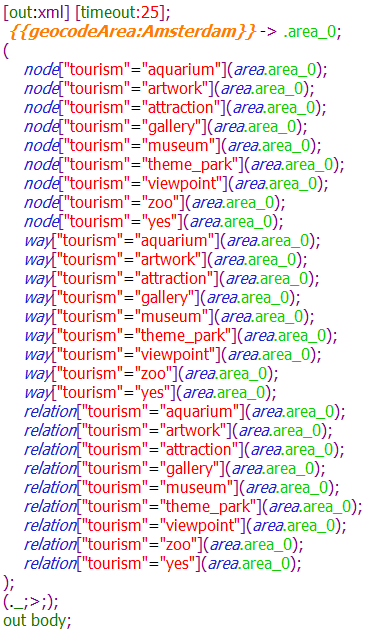

In [2]:
# OSM query for tourism POIs
display(Image(filename="qgis/screenshots/OSM_tourism_query.png"))

In [3]:
# Generate geojson file of Amsterdam clip polygon
district_geojson_text = """
{"type":"FeatureCollection","name":"INDELING_STADSDEEL","features":[{"id":1,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.878166,52.378506],[4.8781,52.3784],[4.878294,52.378352],[4.878101,52.378044],[4.878078,52.378049],[4.877909,52.377786],[4.878014,52.377762],[4.876592,52.375489],[4.875994,52.374538],[4.875887,52.374317],[4.875853,52.374184],[4.875541,52.374214],[4.875514,52.374077],[4.875476,52.37376],[4.875487,52.37341],[4.875432,52.373235],[4.875384,52.37315],[4.875296,52.373035],[4.875235,52.372974],[4.875168,52.372924],[4.874831,52.372727],[4.874783,52.37269],[4.874645,52.372562],[4.874555,52.372449],[4.874483,52.372324],[4.87444,52.372201],[4.874452,52.37206],[4.874503,52.371889],[4.875045,52.370683],[4.875674,52.369639],[4.875806,52.369462],[4.875993,52.369254],[4.876303,52.368967],[4.876679,52.368677],[4.876809,52.368503],[4.877088,52.368108],[4.877199,52.367898],[4.877265,52.367702],[4.877319,52.367301],[4.877349,52.367183],[4.877431,52.366953],[4.877518,52.366772],[4.877726,52.366588],[4.877889,52.366466],[4.878137,52.36631],[4.878397,52.366173],[4.878534,52.366081],[4.878701,52.365947],[4.878817,52.365834],[4.87896,52.365663],[4.87907,52.365501],[4.879136,52.365382],[4.879186,52.365261],[4.879219,52.365126],[4.879232,52.364988],[4.879225,52.364925],[4.879218,52.364778],[4.879231,52.364631],[4.879264,52.364487],[4.879317,52.364344],[4.879359,52.364259],[4.879421,52.364179],[4.879496,52.364109],[4.879604,52.364039],[4.879781,52.363963],[4.880062,52.363888],[4.88026,52.363825],[4.880543,52.36371],[4.880708,52.363627],[4.880851,52.363543],[4.881121,52.363362],[4.881413,52.363127],[4.881517,52.362938],[4.881576,52.362765],[4.88162,52.36251],[4.88166,52.362416],[4.881716,52.362323],[4.881748,52.36228],[4.881853,52.362186],[4.881963,52.362119],[4.882099,52.362056],[4.88226,52.361994],[4.882398,52.361957],[4.882511,52.361938],[4.882635,52.361928],[4.883639,52.36191],[4.883846,52.361888],[4.884046,52.361849],[4.884235,52.361794],[4.884404,52.361727],[4.8863,52.36078],[4.887389,52.360232],[4.887686,52.360074],[4.88795,52.359896],[4.888175,52.359705],[4.888292,52.359585],[4.888412,52.359441],[4.888644,52.35923],[4.888931,52.359019],[4.889253,52.358828],[4.889405,52.358752],[4.889605,52.358667],[4.889807,52.358594],[4.890008,52.358532],[4.890216,52.358479],[4.890437,52.358432],[4.890655,52.358397],[4.89088,52.358369],[4.896177,52.358047],[4.898039,52.357935],[4.898259,52.357948],[4.898511,52.357973],[4.89876,52.358006],[4.899006,52.358049],[4.899246,52.3581],[4.901674,52.358595],[4.904,52.359049],[4.904634,52.359212],[4.905163,52.359348],[4.905975,52.359499],[4.906171,52.35955],[4.906505,52.359664],[4.906642,52.359724],[4.906922,52.359877],[4.907104,52.360005],[4.907379,52.36022],[4.90751,52.3603],[4.907645,52.360371],[4.907784,52.360431],[4.907974,52.360499],[4.908327,52.360591],[4.908567,52.360641],[4.90881,52.36066],[4.909038,52.360651],[4.909355,52.360599],[4.909644,52.360579],[4.90996,52.360587],[4.910257,52.360624],[4.910565,52.360697],[4.910838,52.360796],[4.911089,52.360926],[4.911205,52.361004],[4.91129,52.361075],[4.911371,52.361126],[4.911492,52.361181],[4.911627,52.361222],[4.911781,52.361248],[4.912851,52.361359],[4.914036,52.361496],[4.91508,52.361787],[4.915781,52.36198],[4.916005,52.362028],[4.916241,52.362068],[4.916415,52.362089],[4.91749,52.362131],[4.91781,52.362145],[4.918131,52.362192],[4.918427,52.362267],[4.918707,52.362374],[4.918873,52.362457],[4.919029,52.362554],[4.919719,52.363137],[4.919878,52.363221],[4.920047,52.363289],[4.920213,52.363337],[4.920388,52.363372],[4.921105,52.363432],[4.921485,52.363479],[4.921766,52.363522],[4.921918,52.363561],[4.922067,52.363616],[4.922201,52.363684],[4.922313,52.363759],[4.924778,52.365248],[4.925602,52.365666],[4.926602,52.36627],[4.926727,52.366333],[4.926854,52.366383],[4.926989,52.366425],[4.927138,52.36646],[4.92732,52.366487],[4.927514,52.366501],[4.931586,52.366569],[4.93219,52.367569],[4.932127,52.367601],[4.932109,52.367636],[4.932115,52.367663],[4.932093,52.367668],[4.93259,52.368498],[4.932691,52.368699],[4.932825,52.369071],[4.932897,52.369402],[4.93295,52.369904],[4.932919,52.370049],[4.932903,52.370366],[4.932961,52.370407],[4.932973,52.370407],[4.932915,52.370666],[4.9329,52.370665],[4.932895,52.370683],[4.932849,52.370683],[4.932817,52.370693],[4.932778,52.370731],[4.932768,52.370903],[4.932628,52.371279],[4.932507,52.371504],[4.932325,52.371699],[4.932321,52.371732],[4.932332,52.371749],[4.932396,52.371785],[4.932259,52.371962],[4.93218,52.371958],[4.932106,52.371983],[4.931974,52.372156],[4.931749,52.37235],[4.931432,52.372586],[4.931178,52.372751],[4.93088,52.37292],[4.930551,52.373077],[4.930191,52.373225],[4.929855,52.373345],[4.929403,52.373475],[4.928551,52.373681],[4.927907,52.373853],[4.927698,52.373914],[4.924258,52.37502],[4.924049,52.37508],[4.923516,52.37521],[4.923037,52.375302],[4.921544,52.37553],[4.921565,52.375583],[4.921292,52.375623],[4.92128,52.375608],[4.921262,52.37561],[4.921248,52.375576],[4.920501,52.375687],[4.914512,52.37666],[4.914117,52.376716],[4.91356,52.376772],[4.913303,52.376786],[4.912729,52.376797],[4.912404,52.37679],[4.912121,52.376775],[4.912092,52.376786],[4.912083,52.376806],[4.911981,52.376798],[4.911905,52.377099],[4.912038,52.377112],[4.912086,52.377185],[4.911985,52.37758],[4.911158,52.377637],[4.910594,52.379914],[4.908685,52.379857],[4.907622,52.379885],[4.906531,52.38002],[4.90641,52.380041],[4.906006,52.380107],[4.905475,52.380204],[4.904313,52.380464],[4.903264,52.380775],[4.902264,52.381129],[4.901185,52.381563],[4.900368,52.38198],[4.89948,52.382486],[4.898665,52.383044],[4.897916,52.383676],[4.897312,52.384271],[4.896764,52.384887],[4.896247,52.385649],[4.895878,52.386362],[4.895661,52.386923],[4.895083,52.388692],[4.892367,52.388525],[4.892315,52.388358],[4.892302,52.388223],[4.892309,52.388207],[4.892214,52.388191],[4.892075,52.388507],[4.885977,52.38813],[4.884485,52.38838],[4.884002,52.387343],[4.883239,52.386244],[4.882591,52.385462],[4.882351,52.385186],[4.881832,52.384436],[4.881667,52.38418],[4.880761,52.382709],[4.880651,52.382565],[4.880486,52.382412],[4.880333,52.382306],[4.880102,52.382185],[4.87981,52.382068],[4.879705,52.382],[4.879638,52.381932],[4.879597,52.381865],[4.879578,52.381809],[4.879572,52.381739],[4.879582,52.381683],[4.879632,52.381588],[4.879853,52.381341],[4.879872,52.381284],[4.879861,52.38122],[4.878166,52.378506]]]},"properties":{"Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":8012895}},{"id":2,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.911799,52.33946],[4.911175,52.339311],[4.910716,52.33921],[4.910072,52.339044],[4.909266,52.338706],[4.907963,52.338219],[4.907748,52.338117],[4.907485,52.337963],[4.907411,52.337916],[4.90731,52.337819],[4.907237,52.337717],[4.90719,52.337616],[4.9069,52.336408],[4.906859,52.336163],[4.906797,52.335962],[4.906755,52.335864],[4.90663,52.335649],[4.906488,52.335468],[4.90635,52.335329],[4.906171,52.335121],[4.905783,52.334717],[4.905549,52.334489],[4.905255,52.334234],[4.904778,52.333849],[4.904548,52.333698],[4.904259,52.333572],[4.903942,52.333483],[4.903552,52.333431],[4.90285,52.333382],[4.90248,52.333368],[4.902197,52.333369],[4.901159,52.33344],[4.900601,52.333421],[4.900201,52.333377],[4.899828,52.333308],[4.899637,52.333262],[4.89947,52.333216],[4.899295,52.333151],[4.899122,52.333071],[4.898979,52.332984],[4.89884,52.332881],[4.898755,52.332793],[4.89862,52.332632],[4.898526,52.332474],[4.898483,52.332276],[4.898477,52.332077],[4.898495,52.331959],[4.898876,52.331107],[4.899011,52.330707],[4.899074,52.330437],[4.899075,52.330197],[4.899026,52.329996],[4.898914,52.329775],[4.898771,52.329558],[4.898253,52.328971],[4.897839,52.328572],[4.897324,52.328025],[4.897144,52.32778],[4.897002,52.32756],[4.89686,52.327272],[4.896678,52.32685],[4.896558,52.326523],[4.896444,52.326301],[4.895841,52.325203],[4.89531,52.32434],[4.895254,52.324203],[4.895228,52.324079],[4.895264,52.323835],[4.895377,52.323498],[4.895469,52.323323],[4.895759,52.322869],[4.895913,52.3227],[4.896086,52.322557],[4.896301,52.322424],[4.896417,52.322325],[4.897155,52.3219],[4.898289,52.321648],[4.899356,52.321554],[4.900206,52.321554],[4.900931,52.321569],[4.90161,52.321532],[4.902102,52.321453],[4.902541,52.321328],[4.90298,52.321149],[4.904101,52.320648],[4.904712,52.320397],[4.905528,52.320148],[4.907849,52.319508],[4.909049,52.318835],[4.909059,52.318826],[4.909144,52.318257],[4.910565,52.318274],[4.910657,52.31828],[4.910759,52.318283],[4.911124,52.31827],[4.911541,52.318267],[4.911877,52.318262],[4.912186,52.318252],[4.912257,52.318253],[4.912384,52.318252],[4.912614,52.318506],[4.913012,52.318939],[4.913341,52.319291],[4.913487,52.319475],[4.913546,52.319557],[4.91429,52.320411],[4.913577,52.320704],[4.912987,52.320951],[4.912704,52.321066],[4.912618,52.321108],[4.912568,52.321138],[4.912547,52.321179],[4.912553,52.321223],[4.912496,52.321258],[4.912332,52.321317],[4.91124,52.321736],[4.91081,52.321887],[4.910782,52.321891],[4.910739,52.321918],[4.91077,52.321987],[4.91084,52.322077],[4.910966,52.322265],[4.911126,52.322507],[4.911332,52.322828],[4.911352,52.322888],[4.911359,52.322903],[4.911234,52.323015],[4.910787,52.323312],[4.910522,52.323469],[4.910343,52.32357],[4.910959,52.324018],[4.911109,52.324101],[4.911297,52.324166],[4.911596,52.32421],[4.91213,52.324261],[4.912808,52.324371],[4.91389,52.324555],[4.913635,52.326102],[4.913613,52.326264],[4.913276,52.328391],[4.913128,52.329348],[4.912941,52.330514],[4.913273,52.330548],[4.913545,52.33058],[4.913821,52.330618],[4.914184,52.330681],[4.914578,52.330766],[4.915171,52.330918],[4.91691,52.331367],[4.918094,52.331718],[4.919244,52.332065],[4.919598,52.33217],[4.920376,52.332362],[4.921683,52.332764],[4.922559,52.333087],[4.922447,52.333219],[4.922621,52.333331],[4.922801,52.333462],[4.922889,52.333532],[4.922989,52.333617],[4.923092,52.333715],[4.923166,52.33379],[4.923299,52.333942],[4.923416,52.334092],[4.923521,52.33426],[4.923602,52.334418],[4.923686,52.334634],[4.923736,52.334814],[4.92376,52.334958],[4.923777,52.335271],[4.923774,52.335446],[4.924574,52.335406],[4.924809,52.335387],[4.925233,52.335382],[4.925501,52.335386],[4.925782,52.335376],[4.926951,52.335779],[4.926779,52.335968],[4.928502,52.336558],[4.932697,52.33578],[4.934229,52.335499],[4.935632,52.335517],[4.93652,52.334595],[4.937346,52.334874],[4.937713,52.335006],[4.937842,52.335059],[4.937919,52.335095],[4.938157,52.335241],[4.938336,52.335292],[4.938508,52.33531],[4.938828,52.3354],[4.939033,52.335474],[4.939404,52.335569],[4.939536,52.335596],[4.939683,52.33561],[4.939967,52.335619],[4.940374,52.335606],[4.941714,52.335535],[4.941723,52.336042],[4.94172,52.336168],[4.94173,52.33641],[4.943129,52.336591],[4.943494,52.336671],[4.943802,52.336714],[4.943752,52.336742],[4.943927,52.336793],[4.943939,52.336795],[4.943993,52.336819],[4.94423,52.336897],[4.945038,52.337147],[4.945254,52.337212],[4.945537,52.337292],[4.945957,52.337416],[4.946054,52.337445],[4.946565,52.337595],[4.94677,52.33766],[4.946884,52.337689],[4.947029,52.337704],[4.947381,52.33779],[4.947916,52.337917],[4.948346,52.338029],[4.948571,52.338108],[4.948648,52.338132],[4.948672,52.338133],[4.949087,52.338247],[4.949351,52.338327],[4.949552,52.33838],[4.949532,52.338409],[4.949583,52.33844],[4.949868,52.338531],[4.94971,52.33873],[4.950577,52.33907],[4.951893,52.339671],[4.952384,52.33993],[4.953057,52.340371],[4.953841,52.341062],[4.955002,52.342313],[4.956561,52.343879],[4.957006,52.344351],[4.958077,52.345336],[4.9597,52.346931],[4.95988,52.347218],[4.959934,52.347449],[4.96137,52.348854],[4.96254,52.350368],[4.96496,52.353277],[4.965827,52.354698],[4.966061,52.354386],[4.966244,52.354165],[4.966256,52.354191],[4.966286,52.354208],[4.966361,52.354238],[4.966527,52.35428],[4.966614,52.354314],[4.966728,52.354354],[4.96685,52.354394],[4.967037,52.354468],[4.967422,52.354622],[4.96773,52.354735],[4.967924,52.354813],[4.968084,52.354863],[4.968314,52.354928],[4.968741,52.355089],[4.968878,52.355155],[4.968945,52.355188],[4.969123,52.355284],[4.969225,52.35533],[4.969402,52.355424],[4.969526,52.355499],[4.969505,52.355578],[4.969318,52.355611],[4.969335,52.355642],[4.969371,52.355635],[4.969599,52.356103],[4.970191,52.355994],[4.97022,52.356051],[4.970333,52.356029],[4.970429,52.356012],[4.970398,52.355958],[4.971106,52.355817],[4.971505,52.355726],[4.972182,52.355547],[4.972484,52.355457],[4.972798,52.355353],[4.973187,52.35522],[4.973463,52.355115],[4.973879,52.354949],[4.974156,52.354826],[4.974494,52.354667],[4.974808,52.354508],[4.975533,52.354122],[4.976029,52.353855],[4.977071,52.353303],[4.982735,52.35028],[4.984521,52.349332],[4.987846,52.347561],[4.989984,52.346426],[4.990789,52.345996],[4.99162,52.345555],[4.993733,52.344423],[4.993822,52.344386],[4.993938,52.344348],[4.994022,52.344315],[4.99413,52.344262],[4.994318,52.344159],[4.994676,52.343968],[4.995327,52.343617],[4.996824,52.342819],[4.998052,52.342161],[4.998269,52.342048],[4.999066,52.341676],[4.999324,52.341537],[4.999553,52.341725],[4.999601,52.341758],[4.999711,52.341828],[4.999811,52.341883],[4.999895,52.341926],[4.999983,52.341966],[5.000044,52.341991],[5.000168,52.34204],[5.000289,52.342084],[5.000387,52.342116],[5.000496,52.342148],[5.000606,52.342177],[5.000719,52.342203],[5.000872,52.342234],[5.000989,52.342254],[5.001175,52.342289],[5.001454,52.342336],[5.001645,52.342365],[5.001787,52.342385],[5.001989,52.34241],[5.002125,52.342426],[5.002397,52.342452],[5.002602,52.342469],[5.003776,52.342547],[5.003942,52.342565],[5.004128,52.342577],[5.004277,52.342581],[5.004412,52.34258],[5.004522,52.342576],[5.004679,52.342566],[5.004916,52.342542],[5.005119,52.342517],[5.005318,52.342488],[5.005511,52.342456],[5.005714,52.342417],[5.005946,52.342359],[5.006178,52.342303],[5.006412,52.342248],[5.006779,52.342167],[5.006964,52.342129],[5.007118,52.342102],[5.00727,52.342073],[5.007498,52.342025],[5.007722,52.341971],[5.007869,52.341933],[5.007985,52.341901],[5.008056,52.341884],[5.008137,52.341869],[5.008253,52.341852],[5.008377,52.34184],[5.008455,52.341836],[5.008529,52.341835],[5.008658,52.341838],[5.008781,52.341848],[5.008895,52.341863],[5.009123,52.341901],[5.009256,52.341929],[5.009405,52.341967],[5.009537,52.342007],[5.009668,52.342053],[5.009739,52.342082],[5.009824,52.342118],[5.01006,52.342213],[5.010191,52.342269],[5.01038,52.342353],[5.010584,52.34245],[5.010751,52.342534],[5.011009,52.342669],[5.011173,52.34276],[5.011294,52.342833],[5.011446,52.34293],[5.01156,52.343008],[5.011699,52.34311],[5.011795,52.343186],[5.011921,52.34329],[5.011999,52.343363],[5.012077,52.343446],[5.012132,52.343511],[5.012195,52.3436],[5.01225,52.34369],[5.012259,52.343714],[5.012221,52.343722],[5.012284,52.343847],[5.012306,52.343843],[5.01235,52.343942],[5.012365,52.343981],[5.012384,52.344312],[5.015902,52.348323],[5.039059,52.354576],[5.038977,52.355844],[5.038518,52.362121],[5.037957,52.371307],[5.037683,52.375401],[5.01444,52.369826],[5.001264,52.368593],[4.998746,52.36836],[4.996454,52.36823],[4.993873,52.368245],[4.991406,52.368379],[4.989042,52.368666],[4.986541,52.369125],[4.984198,52.369728],[4.982121,52.370386],[4.979744,52.371333],[4.977369,52.372516],[4.970327,52.376261],[4.966616,52.378229],[4.963721,52.379768],[4.961578,52.381223],[4.960614,52.381664],[4.959657,52.382096],[4.958412,52.382474],[4.956711,52.382651],[4.954253,52.382615],[4.949586,52.382503],[4.939831,52.382514],[4.931087,52.382141],[4.922456,52.381104],[4.917502,52.380547],[4.911005,52.379927],[4.910594,52.379914],[4.911158,52.377637],[4.911985,52.37758],[4.912086,52.377185],[4.912038,52.377112],[4.911905,52.377099],[4.911981,52.376798],[4.912083,52.376806],[4.912092,52.376786],[4.912121,52.376775],[4.912404,52.37679],[4.912729,52.376797],[4.913303,52.376786],[4.91356,52.376772],[4.914117,52.376716],[4.914512,52.37666],[4.920501,52.375687],[4.921248,52.375576],[4.921262,52.37561],[4.92128,52.375608],[4.921292,52.375623],[4.921565,52.375583],[4.921544,52.37553],[4.923037,52.375302],[4.923516,52.37521],[4.924049,52.37508],[4.924258,52.37502],[4.927698,52.373914],[4.927907,52.373853],[4.928551,52.373681],[4.929403,52.373475],[4.929855,52.373345],[4.930191,52.373225],[4.930551,52.373077],[4.93088,52.37292],[4.931178,52.372751],[4.931432,52.372586],[4.931749,52.37235],[4.931974,52.372156],[4.932106,52.371983],[4.93218,52.371958],[4.932259,52.371962],[4.932396,52.371785],[4.932332,52.371749],[4.932321,52.371732],[4.932325,52.371699],[4.932507,52.371504],[4.932628,52.371279],[4.932768,52.370903],[4.932778,52.370731],[4.932817,52.370693],[4.932849,52.370683],[4.932895,52.370683],[4.9329,52.370665],[4.932915,52.370666],[4.932973,52.370407],[4.932961,52.370407],[4.932903,52.370366],[4.932919,52.370049],[4.93295,52.369904],[4.932897,52.369402],[4.932825,52.369071],[4.932691,52.368699],[4.93259,52.368498],[4.932093,52.367668],[4.932115,52.367663],[4.932109,52.367636],[4.932127,52.367601],[4.93219,52.367569],[4.931586,52.366569],[4.927514,52.366501],[4.92732,52.366487],[4.927138,52.36646],[4.926989,52.366425],[4.926854,52.366383],[4.926727,52.366333],[4.926602,52.36627],[4.925602,52.365666],[4.924778,52.365248],[4.922313,52.363759],[4.922201,52.363684],[4.922067,52.363616],[4.921918,52.363561],[4.921766,52.363522],[4.921485,52.363479],[4.921105,52.363432],[4.920388,52.363372],[4.920213,52.363337],[4.920047,52.363289],[4.919878,52.363221],[4.919719,52.363137],[4.919029,52.362554],[4.918873,52.362457],[4.918707,52.362374],[4.918427,52.362267],[4.918131,52.362192],[4.91781,52.362145],[4.91749,52.362131],[4.916415,52.362089],[4.916241,52.362068],[4.916005,52.362028],[4.915781,52.36198],[4.91508,52.361787],[4.914036,52.361496],[4.912851,52.361359],[4.911781,52.361248],[4.911627,52.361222],[4.911492,52.361181],[4.911371,52.361126],[4.91129,52.361075],[4.911205,52.361004],[4.911089,52.360926],[4.910838,52.360796],[4.910565,52.360697],[4.910257,52.360624],[4.90996,52.360587],[4.909644,52.360579],[4.909355,52.360599],[4.909038,52.360651],[4.90881,52.36066],[4.908567,52.360641],[4.908327,52.360591],[4.907974,52.360499],[4.907784,52.360431],[4.907645,52.360371],[4.90751,52.3603],[4.907379,52.36022],[4.907104,52.360005],[4.906922,52.359877],[4.906642,52.359724],[4.906505,52.359664],[4.906171,52.35955],[4.905975,52.359499],[4.905163,52.359348],[4.904634,52.359212],[4.90489,52.358751],[4.906056,52.356169],[4.906552,52.355385],[4.908364,52.35339],[4.910248,52.351366],[4.912708,52.347337],[4.913162,52.345756],[4.913285,52.345146],[4.913443,52.3447],[4.913857,52.343876],[4.914864,52.342638],[4.914945,52.342428],[4.914989,52.342147],[4.914969,52.341862],[4.914868,52.341601],[4.914681,52.34134],[4.914375,52.340939],[4.914047,52.340578],[4.913602,52.340278],[4.913194,52.340035],[4.912624,52.339734],[4.912015,52.339516],[4.911799,52.33946]]]},"properties":{"Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":30479187}},{"id":3,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.856085,52.416663],[4.85548,52.416766],[4.851456,52.417435],[4.850783,52.417578],[4.849602,52.4178],[4.849209,52.417871],[4.848033,52.418074],[4.84663,52.418277],[4.846395,52.418314],[4.845293,52.41847],[4.836334,52.419587],[4.833824,52.419913],[4.832812,52.420049],[4.831716,52.420208],[4.830548,52.420392],[4.829556,52.420546],[4.828593,52.420682],[4.827199,52.42085],[4.826614,52.420923],[4.826112,52.420979],[4.825302,52.421062],[4.824315,52.421165],[4.823598,52.421257],[4.820281,52.421684],[4.815738,52.422275],[4.810176,52.422996],[4.807012,52.423405],[4.806676,52.423451],[4.804554,52.423718],[4.801888,52.424057],[4.795241,52.424912],[4.79212,52.425306],[4.78565,52.426139],[4.783451,52.42642],[4.772468,52.42787],[4.767547,52.4285],[4.767193,52.42747],[4.766569,52.427551],[4.750231,52.429621],[4.739218,52.431066],[4.738693,52.429557],[4.738499,52.429008],[4.738487,52.428964],[4.738434,52.428802],[4.738257,52.428273],[4.738229,52.428203],[4.738083,52.427789],[4.737923,52.427328],[4.737692,52.426647],[4.737502,52.426108],[4.737321,52.425557],[4.736291,52.422566],[4.736168,52.422188],[4.735998,52.42169],[4.735686,52.420794],[4.735378,52.419886],[4.734968,52.418648],[4.734881,52.418464],[4.734816,52.418298],[4.734739,52.418076],[4.734644,52.41778],[4.734424,52.417127],[4.734072,52.416096],[4.733729,52.415084],[4.733716,52.415049],[4.732969,52.412855],[4.732541,52.411621],[4.732505,52.411528],[4.732428,52.411308],[4.731412,52.408313],[4.731301,52.407996],[4.731197,52.407706],[4.731056,52.407302],[4.730942,52.406914],[4.730157,52.40465],[4.730143,52.404611],[4.730074,52.404486],[4.730014,52.404296],[4.729847,52.403799],[4.729776,52.403603],[4.729448,52.402657],[4.729395,52.402498],[4.729004,52.401384],[4.728843,52.400895],[4.728768,52.400714],[4.728988,52.400682],[4.733062,52.400152],[4.739249,52.399359],[4.746156,52.39847],[4.746341,52.398448],[4.748501,52.398173],[4.752492,52.397653],[4.755436,52.397271],[4.756061,52.397195],[4.75603,52.397105],[4.756595,52.397031],[4.757196,52.396947],[4.757456,52.396896],[4.75749,52.396886],[4.758294,52.399205],[4.759372,52.39891],[4.759821,52.400217],[4.764769,52.399592],[4.765414,52.399533],[4.767413,52.399269],[4.768923,52.399013],[4.76923,52.398942],[4.771253,52.398391],[4.771005,52.398213],[4.770856,52.398045],[4.770736,52.397846],[4.7707,52.397722],[4.770634,52.397374],[4.772992,52.394825],[4.775012,52.399126],[4.792715,52.399143],[4.793031,52.399169],[4.793788,52.399273],[4.794897,52.399351],[4.795299,52.399337],[4.795543,52.399344],[4.795708,52.399372],[4.795958,52.399421],[4.796303,52.39952],[4.79678,52.399705],[4.797389,52.399965],[4.797929,52.400127],[4.798254,52.400199],[4.798411,52.400224],[4.798643,52.400254],[4.798912,52.400275],[4.799144,52.400283],[4.799418,52.40028],[4.799772,52.400257],[4.800179,52.400202],[4.800427,52.400147],[4.800672,52.400082],[4.800962,52.399987],[4.801146,52.399917],[4.801329,52.399825],[4.801386,52.399731],[4.801627,52.399597],[4.801891,52.399414],[4.802087,52.399238],[4.802222,52.399082],[4.802376,52.398845],[4.802446,52.398706],[4.802743,52.398012],[4.803073,52.397376],[4.803405,52.396834],[4.803579,52.396579],[4.803988,52.396033],[4.804188,52.395789],[4.804624,52.395304],[4.804886,52.395037],[4.804955,52.394981],[4.805033,52.394937],[4.805182,52.394821],[4.805296,52.394712],[4.805413,52.394572],[4.805528,52.394515],[4.8058,52.394525],[4.805878,52.394558],[4.805989,52.394445],[4.807159,52.394896],[4.807363,52.395003],[4.807622,52.395102],[4.807877,52.39518],[4.808552,52.395435],[4.808775,52.395241],[4.808978,52.395329],[4.809129,52.395202],[4.809225,52.395108],[4.809317,52.394998],[4.809525,52.394812],[4.809617,52.39485],[4.809662,52.3948],[4.809893,52.394577],[4.810031,52.394468],[4.810598,52.394069],[4.81084,52.393915],[4.811266,52.393665],[4.81176,52.393389],[4.812103,52.393213],[4.812459,52.393045],[4.81305,52.392794],[4.813711,52.39254],[4.814354,52.392315],[4.814647,52.392223],[4.815136,52.392096],[4.815371,52.392044],[4.81565,52.391989],[4.81618,52.391912],[4.817471,52.391897],[4.818785,52.391895],[4.833015,52.391909],[4.833656,52.391923],[4.834303,52.391968],[4.834924,52.392039],[4.835449,52.392125],[4.835529,52.392191],[4.835577,52.392293],[4.835581,52.392323],[4.83558,52.392751],[4.835631,52.393013],[4.835664,52.393784],[4.835747,52.39503],[4.835797,52.395435],[4.837313,52.395442],[4.837894,52.395433],[4.838856,52.396174],[4.839492,52.395982],[4.83953,52.395803],[4.841765,52.395084],[4.841457,52.394828],[4.840666,52.394211],[4.841089,52.394422],[4.841357,52.394542],[4.841907,52.394762],[4.842247,52.394882],[4.84238,52.394915],[4.842514,52.394933],[4.84295,52.395061],[4.843272,52.395141],[4.843688,52.395231],[4.843991,52.395258],[4.844319,52.395304],[4.84485,52.39539],[4.844936,52.395416],[4.845442,52.395455],[4.8455,52.395486],[4.846005,52.395508],[4.846753,52.395522],[4.846755,52.395458],[4.847113,52.39546],[4.847111,52.39547],[4.849062,52.395488],[4.850515,52.395496],[4.850514,52.395484],[4.850832,52.395486],[4.850829,52.395498],[4.85497,52.395524],[4.854968,52.395509],[4.855621,52.395514],[4.855627,52.3954],[4.856906,52.395402],[4.857358,52.395397],[4.857722,52.395381],[4.858111,52.395355],[4.858929,52.395256],[4.859327,52.395188],[4.859747,52.395104],[4.86017,52.395003],[4.860588,52.394891],[4.860953,52.39478],[4.861593,52.394537],[4.861874,52.394418],[4.862378,52.394164],[4.862644,52.394016],[4.863125,52.393709],[4.863409,52.393506],[4.864226,52.392871],[4.865552,52.393148],[4.865611,52.393163],[4.865642,52.393205],[4.86568,52.393198],[4.865864,52.393493],[4.866042,52.393639],[4.866075,52.393625],[4.86609,52.393638],[4.866383,52.393521],[4.866611,52.39345],[4.866882,52.393387],[4.86706,52.393358],[4.867219,52.393341],[4.871287,52.395261],[4.871495,52.395079],[4.871505,52.395007],[4.871691,52.39477],[4.871779,52.394621],[4.872517,52.39475],[4.872682,52.394766],[4.872815,52.394768],[4.872964,52.394759],[4.875853,52.394496],[4.876035,52.394493],[4.876179,52.394504],[4.876303,52.394523],[4.876447,52.39456],[4.876576,52.394606],[4.885479,52.399166],[4.885862,52.399378],[4.882703,52.401703],[4.873438,52.408381],[4.870992,52.410132],[4.867104,52.412386],[4.86388,52.413816],[4.860881,52.414902],[4.85572,52.416324],[4.856085,52.416663]]]},"properties":{"Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":28880754}},{"id":4,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.75749,52.396886],[4.757599,52.396852],[4.757683,52.3968],[4.757754,52.396745],[4.757826,52.396666],[4.757866,52.39659],[4.757875,52.396504],[4.757885,52.396025],[4.757903,52.39572],[4.75793,52.395426],[4.757958,52.394992],[4.757996,52.394555],[4.758018,52.394032],[4.758014,52.39373],[4.758017,52.393209],[4.758026,52.39293],[4.758031,52.392584],[4.75803,52.392342],[4.758036,52.392143],[4.758037,52.391962],[4.758046,52.391555],[4.758055,52.390954],[4.758014,52.389552],[4.75835,52.387709],[4.758391,52.387602],[4.758521,52.387197],[4.758951,52.384423],[4.758954,52.38419],[4.75897,52.384011],[4.758994,52.383671],[4.759049,52.381921],[4.75906,52.381675],[4.759063,52.381525],[4.759092,52.380761],[4.75911,52.380028],[4.759132,52.379332],[4.757264,52.377982],[4.756441,52.377767],[4.756993,52.377049],[4.757538,52.376192],[4.758054,52.375068],[4.758387,52.374018],[4.758524,52.373262],[4.758575,52.372759],[4.758603,52.372221],[4.758582,52.371597],[4.758518,52.371244],[4.758448,52.370961],[4.75799,52.369243],[4.75649,52.363902],[4.75548,52.360395],[4.755103,52.359038],[4.754908,52.358387],[4.754844,52.357911],[4.754947,52.357222],[4.75511,52.356835],[4.755321,52.35654],[4.75569,52.356153],[4.756113,52.355833],[4.756659,52.355523],[4.757337,52.355206],[4.758087,52.354919],[4.762129,52.353343],[4.771746,52.349562],[4.775179,52.348157],[4.778743,52.346693],[4.781464,52.345583],[4.786174,52.343653],[4.788156,52.342844],[4.790163,52.342011],[4.790547,52.341845],[4.791443,52.341299],[4.791787,52.341031],[4.792325,52.340507],[4.796091,52.336801],[4.797332,52.3356],[4.797771,52.335286],[4.798222,52.335045],[4.807724,52.331094],[4.812673,52.329054],[4.815441,52.327896],[4.816409,52.327409],[4.817127,52.326928],[4.817331,52.327077],[4.822131,52.330824],[4.835558,52.331007],[4.838339,52.331485],[4.846224,52.334129],[4.847095,52.336285],[4.847139,52.336904],[4.846971,52.338147],[4.846856,52.338139],[4.846853,52.338147],[4.846664,52.338134],[4.846666,52.338124],[4.84652,52.338113],[4.846516,52.33812],[4.846472,52.338117],[4.846472,52.33811],[4.846009,52.338081],[4.84601,52.33807],[4.846,52.33807],[4.845991,52.338082],[4.845981,52.338076],[4.845706,52.338066],[4.845329,52.33807],[4.844984,52.338092],[4.844642,52.33813],[4.844382,52.338175],[4.84407,52.33825],[4.84374,52.338351],[4.843448,52.338465],[4.843208,52.338578],[4.842998,52.338705],[4.84277,52.338866],[4.842553,52.339056],[4.842375,52.339251],[4.842241,52.339441],[4.842137,52.339623],[4.84206,52.339812],[4.842007,52.339984],[4.841932,52.34035],[4.841807,52.341067],[4.841733,52.341568],[4.841531,52.343183],[4.84152,52.343206],[4.84152,52.343275],[4.841506,52.343275],[4.841495,52.343437],[4.841517,52.343437],[4.841515,52.343504],[4.841505,52.343504],[4.841506,52.343758],[4.841527,52.344099],[4.841653,52.345156],[4.841662,52.34537],[4.841636,52.345412],[4.841638,52.345436],[4.841667,52.34549],[4.841731,52.345531],[4.841792,52.345547],[4.841947,52.345563],[4.841944,52.345983],[4.842345,52.345955],[4.842347,52.345965],[4.842839,52.345934],[4.843466,52.345909],[4.844016,52.345898],[4.844334,52.345913],[4.84469,52.345964],[4.845028,52.346049],[4.845203,52.346107],[4.845372,52.346175],[4.845654,52.346321],[4.845885,52.34648],[4.846083,52.346661],[4.845821,52.346766],[4.84573,52.346778],[4.845648,52.346778],[4.845547,52.3521],[4.844793,52.352095],[4.84474,52.355481],[4.848933,52.355507],[4.848892,52.357914],[4.848885,52.358045],[4.84889,52.360759],[4.849516,52.36095],[4.849461,52.363367],[4.849216,52.363367],[4.849188,52.364225],[4.850498,52.36424],[4.850466,52.365157],[4.850453,52.365216],[4.850386,52.365376],[4.850323,52.365366],[4.848678,52.368932],[4.848708,52.368959],[4.848359,52.369716],[4.847746,52.369612],[4.84763,52.369865],[4.847021,52.369772],[4.846618,52.369718],[4.846188,52.369673],[4.845721,52.36964],[4.845222,52.369621],[4.842569,52.369588],[4.842563,52.369829],[4.842575,52.37003],[4.842713,52.370867],[4.842798,52.371862],[4.842854,52.371879],[4.842855,52.371914],[4.843028,52.371911],[4.843038,52.372215],[4.842602,52.372223],[4.841191,52.372274],[4.840863,52.3723],[4.840604,52.37233],[4.835337,52.373153],[4.835426,52.373363],[4.83544,52.373361],[4.835478,52.373451],[4.835492,52.373452],[4.836701,52.376353],[4.837391,52.377993],[4.837464,52.378168],[4.837464,52.378192],[4.837614,52.378542],[4.837631,52.378539],[4.837659,52.378606],[4.837683,52.378677],[4.837646,52.378672],[4.837811,52.379068],[4.837823,52.379065],[4.837854,52.37914],[4.837874,52.379137],[4.838116,52.379718],[4.838107,52.37972],[4.838208,52.379978],[4.838225,52.379976],[4.838313,52.380183],[4.838296,52.380186],[4.838446,52.380544],[4.838461,52.380542],[4.838546,52.380747],[4.838528,52.38075],[4.838677,52.381102],[4.838694,52.381099],[4.838782,52.381306],[4.838764,52.381309],[4.838896,52.381624],[4.838915,52.381621],[4.838944,52.381691],[4.838923,52.381694],[4.838968,52.381795],[4.838949,52.381798],[4.839086,52.382123],[4.839098,52.382121],[4.839131,52.3822],[4.839141,52.382205],[4.839306,52.382696],[4.839297,52.382697],[4.839405,52.383166],[4.839391,52.383167],[4.83944,52.38356],[4.839454,52.383559],[4.839461,52.38363],[4.839446,52.38363],[4.839456,52.383843],[4.839448,52.384042],[4.83946,52.384044],[4.839419,52.384431],[4.839445,52.384431],[4.839418,52.384588],[4.839362,52.384588],[4.839258,52.385018],[4.839837,52.385036],[4.843294,52.385101],[4.843934,52.385089],[4.844813,52.385108],[4.844811,52.385146],[4.844798,52.385146],[4.844732,52.386384],[4.844761,52.386922],[4.844669,52.388623],[4.844665,52.388757],[4.844689,52.388756],[4.844687,52.38892],[4.844662,52.38892],[4.844663,52.388899],[4.844372,52.3889],[4.844336,52.389522],[4.844134,52.393288],[4.844117,52.393849],[4.844138,52.39428],[4.844174,52.394607],[4.844233,52.394945],[4.844319,52.395304],[4.843991,52.395258],[4.843688,52.395231],[4.843272,52.395141],[4.84295,52.395061],[4.842514,52.394933],[4.84238,52.394915],[4.842247,52.394882],[4.841907,52.394762],[4.841357,52.394542],[4.841089,52.394422],[4.840666,52.394211],[4.841457,52.394828],[4.841765,52.395084],[4.83953,52.395803],[4.839492,52.395982],[4.838856,52.396174],[4.837894,52.395433],[4.837313,52.395442],[4.835797,52.395435],[4.835747,52.39503],[4.835664,52.393784],[4.835631,52.393013],[4.83558,52.392751],[4.835581,52.392323],[4.835577,52.392293],[4.835529,52.392191],[4.835449,52.392125],[4.834924,52.392039],[4.834303,52.391968],[4.833656,52.391923],[4.833015,52.391909],[4.818785,52.391895],[4.817471,52.391897],[4.81618,52.391912],[4.81565,52.391989],[4.815371,52.392044],[4.815136,52.392096],[4.814647,52.392223],[4.814354,52.392315],[4.813711,52.39254],[4.81305,52.392794],[4.812459,52.393045],[4.812103,52.393213],[4.81176,52.393389],[4.811266,52.393665],[4.81084,52.393915],[4.810598,52.394069],[4.810031,52.394468],[4.809893,52.394577],[4.809662,52.3948],[4.809617,52.39485],[4.809525,52.394812],[4.809317,52.394998],[4.809225,52.395108],[4.809129,52.395202],[4.808978,52.395329],[4.808775,52.395241],[4.808552,52.395435],[4.807877,52.39518],[4.807622,52.395102],[4.807363,52.395003],[4.807159,52.394896],[4.805989,52.394445],[4.805878,52.394558],[4.8058,52.394525],[4.805528,52.394515],[4.805413,52.394572],[4.805296,52.394712],[4.805182,52.394821],[4.805033,52.394937],[4.804955,52.394981],[4.804886,52.395037],[4.804624,52.395304],[4.804188,52.395789],[4.803988,52.396033],[4.803579,52.396579],[4.803405,52.396834],[4.803073,52.397376],[4.802743,52.398012],[4.802446,52.398706],[4.802376,52.398845],[4.802222,52.399082],[4.802087,52.399238],[4.801891,52.399414],[4.801627,52.399597],[4.801386,52.399731],[4.801329,52.399825],[4.801146,52.399917],[4.800962,52.399987],[4.800672,52.400082],[4.800427,52.400147],[4.800179,52.400202],[4.799772,52.400257],[4.799418,52.40028],[4.799144,52.400283],[4.798912,52.400275],[4.798643,52.400254],[4.798411,52.400224],[4.798254,52.400199],[4.797929,52.400127],[4.797389,52.399965],[4.79678,52.399705],[4.796303,52.39952],[4.795958,52.399421],[4.795708,52.399372],[4.795543,52.399344],[4.795299,52.399337],[4.794897,52.399351],[4.793788,52.399273],[4.793031,52.399169],[4.792715,52.399143],[4.775012,52.399126],[4.772992,52.394825],[4.770634,52.397374],[4.7707,52.397722],[4.770736,52.397846],[4.770856,52.398045],[4.771005,52.398213],[4.771253,52.398391],[4.76923,52.398942],[4.768923,52.399013],[4.767413,52.399269],[4.765414,52.399533],[4.764769,52.399592],[4.759821,52.400217],[4.759372,52.39891],[4.758294,52.399205],[4.75749,52.396886]]]},"properties":{"Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":37870831}},{"id":5,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.998082,52.314036],[4.997863,52.31398],[4.997589,52.314154],[4.997495,52.314219],[4.997459,52.314247],[4.997301,52.314197],[4.997285,52.314213],[4.997195,52.314295],[4.997133,52.314386],[4.997094,52.314457],[4.997094,52.31448],[4.997119,52.314645],[4.997122,52.3147],[4.997116,52.314759],[4.997104,52.314809],[4.997093,52.314827],[4.997075,52.314848],[4.997094,52.315072],[4.997107,52.315275],[4.997115,52.315436],[4.99713,52.315626],[4.997139,52.315781],[4.99715,52.315906],[4.997175,52.316037],[4.997231,52.316219],[4.997264,52.31632],[4.997315,52.316441],[4.997345,52.316516],[4.997365,52.316591],[4.997372,52.316673],[4.997364,52.316767],[4.997328,52.316908],[4.997267,52.317065],[4.997183,52.317256],[4.997105,52.317394],[4.997023,52.317518],[4.996783,52.31776],[4.996213,52.318459],[4.996093,52.318619],[4.996034,52.318705],[4.995934,52.318838],[4.995849,52.318937],[4.995719,52.319066],[4.995583,52.319196],[4.995481,52.319311],[4.995372,52.319454],[4.995258,52.319616],[4.995017,52.319977],[4.994919,52.32012],[4.994843,52.320223],[4.994548,52.320583],[4.99443,52.320721],[4.994342,52.320827],[4.994297,52.320888],[4.994267,52.32094],[4.99425,52.320979],[4.994215,52.32103],[4.99346,52.321951],[4.9926,52.323136],[4.992172,52.323707],[4.992112,52.323767],[4.992038,52.323873],[4.991769,52.324274],[4.991617,52.324539],[4.99151,52.324753],[4.991308,52.325248],[4.99117,52.325574],[4.991069,52.325798],[4.990969,52.326004],[4.990894,52.326143],[4.990745,52.326348],[4.990576,52.326541],[4.990354,52.326778],[4.989941,52.327211],[4.989607,52.327549],[4.989477,52.327666],[4.989205,52.327877],[4.989048,52.327986],[4.988631,52.328217],[4.987998,52.328552],[4.987938,52.328579],[4.987651,52.32873],[4.987591,52.328763],[4.987301,52.328931],[4.987029,52.329118],[4.986849,52.329256],[4.986371,52.3296],[4.986042,52.329812],[4.985501,52.330145],[4.985305,52.33026],[4.985101,52.330365],[4.984949,52.330429],[4.984791,52.330482],[4.984479,52.330566],[4.983968,52.330667],[4.983677,52.33071],[4.983358,52.330749],[4.983085,52.330769],[4.982523,52.330805],[4.982074,52.330804],[4.981653,52.330807],[4.981139,52.330771],[4.980863,52.330762],[4.980687,52.330762],[4.980513,52.330783],[4.979803,52.331005],[4.978602,52.331066],[4.97835,52.331078],[4.977949,52.331161],[4.977139,52.330644],[4.976346,52.330651],[4.975965,52.330637],[4.975638,52.330608],[4.97531,52.330563],[4.975006,52.329978],[4.974828,52.329701],[4.97451,52.329329],[4.974029,52.328908],[4.973418,52.328476],[4.972156,52.327717],[4.971811,52.327474],[4.971366,52.32696],[4.971298,52.326865],[4.971223,52.326772],[4.971163,52.326706],[4.971104,52.326652],[4.971054,52.326612],[4.970968,52.326553],[4.970911,52.326516],[4.970839,52.326474],[4.97074,52.32642],[4.970505,52.326304],[4.970407,52.326253],[4.970258,52.326171],[4.969611,52.326519],[4.96957,52.326548],[4.969381,52.326675],[4.969213,52.326785],[4.968872,52.326986],[4.967544,52.327759],[4.964045,52.326556],[4.962512,52.326037],[4.961029,52.32552],[4.957539,52.324321],[4.956608,52.323995],[4.955177,52.323503],[4.955046,52.323461],[4.955029,52.323479],[4.954987,52.323464],[4.955004,52.323446],[4.95375,52.323014],[4.953429,52.3229],[4.952679,52.322646],[4.952374,52.322981],[4.950756,52.324749],[4.949836,52.325751],[4.949447,52.32618],[4.948585,52.327127],[4.94821,52.327536],[4.947662,52.32814],[4.94472,52.327131],[4.943797,52.326812],[4.941841,52.326142],[4.940497,52.325679],[4.940369,52.325572],[4.940328,52.32554],[4.940106,52.325376],[4.939979,52.325288],[4.939888,52.325208],[4.939863,52.32519],[4.939856,52.325194],[4.939576,52.324998],[4.939495,52.324939],[4.939369,52.324837],[4.939322,52.324777],[4.939092,52.324603],[4.938908,52.324451],[4.938693,52.324287],[4.938632,52.324229],[4.938615,52.324217],[4.938587,52.324203],[4.938552,52.324191],[4.93852,52.324184],[4.938267,52.324146],[4.938182,52.324136],[4.937965,52.324124],[4.937862,52.323761],[4.93785,52.323735],[4.93775,52.323543],[4.93766,52.323385],[4.937633,52.32333],[4.937623,52.323301],[4.937805,52.323236],[4.937922,52.323125],[4.938,52.323064],[4.938035,52.32304],[4.938258,52.322902],[4.938371,52.32284],[4.938521,52.322804],[4.93863,52.322741],[4.938732,52.322667],[4.93895,52.322506],[4.939143,52.322391],[4.939449,52.322181],[4.939521,52.32214],[4.939574,52.322113],[4.939765,52.32203],[4.939931,52.321938],[4.939937,52.321834],[4.939993,52.321452],[4.940074,52.321155],[4.940106,52.32107],[4.940209,52.320816],[4.940376,52.320508],[4.940489,52.320347],[4.940599,52.320194],[4.940757,52.31999],[4.941046,52.319621],[4.939588,52.319121],[4.940335,52.318304],[4.940328,52.318247],[4.940312,52.318204],[4.940254,52.318104],[4.940128,52.317811],[4.939995,52.317472],[4.939834,52.317121],[4.938045,52.316507],[4.938121,52.316384],[4.938656,52.315799],[4.938741,52.315637],[4.938727,52.315093],[4.935232,52.31389],[4.936355,52.312665],[4.934141,52.311905],[4.933996,52.311809],[4.933664,52.311586],[4.933332,52.311368],[4.932701,52.310943],[4.932404,52.310747],[4.931999,52.310484],[4.931659,52.310269],[4.93146,52.310146],[4.930729,52.309722],[4.930436,52.309546],[4.930068,52.309342],[4.930306,52.309184],[4.929973,52.308993],[4.929619,52.308815],[4.929332,52.308534],[4.929912,52.308106],[4.929813,52.308049],[4.929642,52.307958],[4.929419,52.307831],[4.929829,52.307517],[4.929476,52.307415],[4.929971,52.306791],[4.930259,52.306432],[4.930496,52.306165],[4.93099,52.305688],[4.931419,52.305282],[4.931685,52.305027],[4.93249,52.304477],[4.932724,52.304265],[4.93322,52.303555],[4.933687,52.303106],[4.934139,52.302742],[4.934939,52.301971],[4.934872,52.301945],[4.936032,52.300728],[4.937047,52.299585],[4.937143,52.299471],[4.937083,52.299448],[4.946379,52.288676],[4.946458,52.288582],[4.94641,52.288564],[4.946611,52.288348],[4.946756,52.2882],[4.94699,52.287968],[4.947678,52.287225],[4.948272,52.286596],[4.948728,52.286109],[4.949428,52.285368],[4.952094,52.282536],[4.951842,52.282445],[4.952892,52.281204],[4.953248,52.280787],[4.953765,52.280173],[4.954253,52.279558],[4.954727,52.278955],[4.955212,52.278345],[4.955246,52.278307],[4.955739,52.27842],[4.955846,52.278448],[4.956389,52.2786],[4.956566,52.278643],[4.956683,52.278664],[4.956737,52.27867],[4.956775,52.278673],[4.956985,52.278675],[4.957146,52.278673],[4.957298,52.278667],[4.95749,52.278655],[4.957639,52.278639],[4.957741,52.278626],[4.957811,52.278614],[4.957875,52.278599],[4.958048,52.278541],[4.95835,52.278427],[4.958417,52.278405],[4.958484,52.278385],[4.958557,52.278367],[4.958666,52.278345],[4.958729,52.278338],[4.958799,52.278333],[4.958858,52.278331],[4.958943,52.278331],[4.959655,52.278356],[4.959792,52.278356],[4.959897,52.278353],[4.95997,52.278348],[4.9603,52.278319],[4.960474,52.278294],[4.960628,52.278268],[4.960763,52.278243],[4.96095,52.278201],[4.961056,52.278176],[4.961155,52.278281],[4.961256,52.278395],[4.961338,52.278527],[4.961462,52.278765],[4.961547,52.278952],[4.961635,52.279186],[4.961733,52.279398],[4.961823,52.279605],[4.96188,52.279714],[4.961941,52.279817],[4.96203,52.279955],[4.962084,52.280045],[4.962134,52.280117],[4.962162,52.280151],[4.962177,52.280167],[4.962198,52.280182],[4.962248,52.28021],[4.962322,52.280245],[4.962383,52.280262],[4.962492,52.28028],[4.96255,52.280287],[4.962634,52.280293],[4.963189,52.280305],[4.963327,52.280315],[4.963452,52.280332],[4.963575,52.280346],[4.96368,52.280359],[4.96383,52.280379],[4.963929,52.280393],[4.963973,52.280398],[4.964086,52.280403],[4.964161,52.280409],[4.964209,52.28041],[4.964261,52.28041],[4.964341,52.280404],[4.96443,52.280399],[4.964492,52.280394],[4.964625,52.280385],[4.964678,52.280383],[4.964867,52.280386],[4.964917,52.280391],[4.964979,52.280399],[4.965057,52.280406],[4.965133,52.280417],[4.965318,52.28045],[4.965374,52.280464],[4.965396,52.280467],[4.965516,52.280495],[4.965616,52.280531],[4.965663,52.280552],[4.965711,52.28058],[4.965756,52.280611],[4.965804,52.280651],[4.965876,52.280724],[4.965983,52.280839],[4.966158,52.280978],[4.966168,52.280982],[4.966191,52.280981],[4.966203,52.280979],[4.966212,52.280978],[4.966222,52.280972],[4.966237,52.280938],[4.966254,52.280888],[4.966267,52.280809],[4.966278,52.280781],[4.966289,52.280625],[4.966294,52.280504],[4.966297,52.280477],[4.966304,52.280438],[4.966329,52.280343],[4.966361,52.280271],[4.966383,52.280232],[4.966413,52.280186],[4.966436,52.280157],[4.966494,52.280098],[4.96655,52.280051],[4.966589,52.280021],[4.966648,52.279981],[4.96673,52.279933],[4.966844,52.27988],[4.966924,52.279846],[4.967167,52.279754],[4.9673,52.279699],[4.967408,52.279658],[4.967519,52.279604],[4.96756,52.279578],[4.967578,52.279563],[4.967676,52.279584],[4.967757,52.27969],[4.967771,52.279705],[4.967797,52.279742],[4.967879,52.279844],[4.967993,52.279971],[4.968068,52.28006],[4.968104,52.280106],[4.968164,52.280207],[4.96821,52.280273],[4.968268,52.280346],[4.968329,52.280414],[4.968466,52.280545],[4.968492,52.280566],[4.968502,52.280577],[4.968544,52.280611],[4.968582,52.280633],[4.968628,52.28065],[4.968704,52.280685],[4.968741,52.28071],[4.968755,52.280728],[4.968766,52.280752],[4.968768,52.280765],[4.968773,52.280849],[4.968782,52.280893],[4.968789,52.280919],[4.968799,52.280943],[4.968817,52.280975],[4.968848,52.281019],[4.968925,52.281117],[4.968965,52.281163],[4.968972,52.281168],[4.968979,52.281184],[4.968993,52.281205],[4.969006,52.28123],[4.969042,52.281286],[4.969079,52.281336],[4.969102,52.281362],[4.969146,52.281425],[4.969182,52.281499],[4.969211,52.281578],[4.969241,52.281624],[4.969293,52.281689],[4.96932,52.28172],[4.969359,52.28176],[4.96938,52.281791],[4.969393,52.281826],[4.96939,52.281865],[4.96938,52.281925],[4.969381,52.281958],[4.969557,52.282556],[4.969643,52.28284],[4.969714,52.283104],[4.969728,52.283123],[4.969749,52.283133],[4.969855,52.283167],[4.969915,52.283195],[4.969959,52.283232],[4.969988,52.283253],[4.970268,52.283431],[4.970698,52.283665],[4.97079,52.283718],[4.9709,52.283789],[4.971127,52.283913],[4.971294,52.284007],[4.97136,52.284043],[4.971524,52.284148],[4.971571,52.284181],[4.971696,52.284264],[4.971787,52.284327],[4.97194,52.284429],[4.971947,52.284432],[4.972255,52.284627],[4.972397,52.284719],[4.972538,52.284804],[4.972613,52.284848],[4.972719,52.284901],[4.972825,52.284947],[4.972956,52.284993],[4.972974,52.284999],[4.972995,52.285001],[4.973042,52.285011],[4.973057,52.285016],[4.973074,52.285023],[4.973086,52.285031],[4.973103,52.285046],[4.973119,52.285085],[4.973137,52.285118],[4.973149,52.285131],[4.973155,52.285144],[4.973172,52.285168],[4.973188,52.285186],[4.973212,52.28521],[4.973251,52.285238],[4.973462,52.285342],[4.973542,52.285374],[4.973715,52.285446],[4.974205,52.285747],[4.974638,52.28601],[4.974751,52.286081],[4.974775,52.286094],[4.974812,52.286129],[4.974877,52.286182],[4.974939,52.286226],[4.975029,52.286279],[4.97515,52.286344],[4.975198,52.286361],[4.975615,52.28652],[4.975939,52.286649],[4.976008,52.286685],[4.976057,52.286718],[4.976075,52.286727],[4.976088,52.286737],[4.976118,52.286754],[4.976245,52.286807],[4.976284,52.286825],[4.976393,52.286864],[4.976783,52.287044],[4.976839,52.287067],[4.97696,52.287121],[4.977351,52.2873],[4.97769,52.287448],[4.97813,52.287646],[4.978497,52.287807],[4.978571,52.287841],[4.9787,52.287888],[4.978773,52.287918],[4.978905,52.287966],[4.979009,52.288009],[4.979189,52.288079],[4.979392,52.288174],[4.979791,52.288352],[4.980035,52.288475],[4.980114,52.288511],[4.98027,52.288575],[4.980347,52.288605],[4.980432,52.288641],[4.980448,52.288646],[4.980605,52.288717],[4.98096,52.288871],[4.981112,52.288926],[4.981262,52.288969],[4.981344,52.288998],[4.98144,52.289045],[4.981457,52.289052],[4.981472,52.289061],[4.981667,52.28915],[4.981943,52.28926],[4.982062,52.289311],[4.982078,52.289316],[4.982139,52.289333],[4.982207,52.289357],[4.98227,52.289386],[4.982295,52.2894],[4.982314,52.289414],[4.982344,52.289429],[4.982468,52.289467],[4.982498,52.289478],[4.982505,52.289482],[4.982571,52.289509],[4.98262,52.289525],[4.982658,52.289543],[4.982704,52.28957],[4.98275,52.289591],[4.982834,52.289623],[4.982886,52.289641],[4.982907,52.289654],[4.982919,52.289668],[4.982944,52.289724],[4.982981,52.289791],[4.98301,52.28982],[4.98303,52.289836],[4.98305,52.289858],[4.9831,52.289907],[4.983143,52.289957],[4.983249,52.290086],[4.983367,52.290225],[4.983384,52.290242],[4.983479,52.290332],[4.983508,52.29037],[4.983887,52.290324],[4.984546,52.290239],[4.985115,52.290172],[4.986032,52.290072],[4.986548,52.290014],[4.986685,52.289997],[4.987064,52.289956],[4.987572,52.289898],[4.988301,52.289827],[4.988769,52.289777],[4.989027,52.289752],[4.989742,52.289675],[4.990447,52.289606],[4.991187,52.289553],[4.992645,52.289413],[4.992913,52.289395],[4.99337,52.289358],[4.993682,52.289328],[4.994119,52.289289],[4.995021,52.289233],[4.995536,52.289224],[4.996721,52.289157],[4.997477,52.28912],[4.997761,52.28935],[4.997951,52.289517],[4.9981,52.289644],[4.998224,52.289746],[4.99829,52.289809],[4.9983,52.289817],[4.998319,52.289831],[4.998328,52.289835],[4.998375,52.289837],[4.99843,52.289838],[4.998454,52.28984],[4.998461,52.289851],[4.998479,52.289975],[4.998503,52.290109],[4.998519,52.290181],[4.998524,52.290198],[4.998531,52.29021],[4.998553,52.290236],[4.998623,52.290235],[4.998664,52.290233],[4.99874,52.290221],[4.998767,52.29022],[4.998782,52.290222],[4.998798,52.290229],[4.998816,52.290241],[4.998825,52.290253],[4.998827,52.29026],[4.999006,52.290413],[4.999238,52.290617],[5.000015,52.291273],[5.000081,52.291331],[5.000179,52.291424],[5.000306,52.291527],[5.000495,52.291687],[5.000541,52.291724],[5.000559,52.291745],[5.000622,52.291797],[5.000676,52.291854],[5.000728,52.291889],[5.000818,52.291958],[5.000875,52.292009],[5.000908,52.292041],[5.001018,52.292132],[5.001124,52.292225],[5.001252,52.292331],[5.001334,52.292409],[5.001348,52.292447],[5.001356,52.292464],[5.001375,52.292484],[5.001495,52.29258],[5.001598,52.292653],[5.001685,52.292722],[5.001791,52.292794],[5.001823,52.292844],[5.001835,52.292924],[5.001803,52.293057],[5.001803,52.293156],[5.001799,52.293177],[5.001817,52.293411],[5.00182,52.293761],[5.00183,52.294066],[5.001832,52.294215],[5.001827,52.294279],[5.001832,52.294328],[5.001837,52.294439],[5.001839,52.2946],[5.001843,52.294699],[5.001849,52.295047],[5.001846,52.295204],[5.001855,52.295367],[5.001851,52.295512],[5.00184,52.295607],[5.001854,52.295725],[5.001853,52.29588],[5.002037,52.295916],[5.0021,52.295933],[5.002298,52.296],[5.002385,52.296023],[5.002486,52.296036],[5.002597,52.296046],[5.002818,52.296047],[5.00288,52.296045],[5.003003,52.296032],[5.003061,52.296024],[5.003111,52.296021],[5.003149,52.296031],[5.003182,52.296043],[5.003209,52.296054],[5.003229,52.296066],[5.003242,52.296088],[5.003249,52.296133],[5.003245,52.296156],[5.003253,52.296299],[5.00325,52.296372],[5.003239,52.296496],[5.003234,52.2966],[5.003234,52.296681],[5.00323,52.29675],[5.003238,52.297135],[5.003235,52.29739],[5.003246,52.297427],[5.003404,52.297667],[5.00358,52.297982],[5.003679,52.298166],[5.003767,52.298342],[5.00378,52.298377],[5.003804,52.298426],[5.003836,52.29851],[5.005267,52.298394],[5.005684,52.298857],[5.006047,52.299257],[5.006206,52.299436],[5.006514,52.299778],[5.007059,52.300379],[5.007362,52.300659],[5.007546,52.300869],[5.007632,52.301012],[5.0077,52.301184],[5.007713,52.301244],[5.007725,52.301283],[5.007754,52.301367],[5.007808,52.301444],[5.007894,52.301523],[5.007954,52.30155],[5.008084,52.30157],[5.008202,52.301583],[5.008335,52.301601],[5.008532,52.301634],[5.008657,52.301657],[5.008732,52.301672],[5.008963,52.301728],[5.009043,52.301751],[5.009211,52.301805],[5.009431,52.301887],[5.009577,52.301946],[5.009917,52.302096],[5.010041,52.302159],[5.010124,52.302211],[5.010211,52.302275],[5.010257,52.302314],[5.0104,52.302425],[5.010552,52.302555],[5.010667,52.302665],[5.010863,52.302874],[5.010906,52.302915],[5.010965,52.302966],[5.011053,52.303031],[5.011111,52.303071],[5.011426,52.303247],[5.011542,52.303303],[5.011717,52.303375],[5.011772,52.303394],[5.011997,52.303458],[5.012176,52.303501],[5.012281,52.303523],[5.01236,52.303538],[5.012457,52.303554],[5.012557,52.303568],[5.012754,52.303588],[5.012879,52.303598],[5.012991,52.303607],[5.013217,52.30362],[5.013377,52.303617],[5.014231,52.303591],[5.014267,52.303678],[5.013365,52.303976],[5.012649,52.30388],[5.011829,52.303777],[5.011312,52.304279],[5.011893,52.304506],[5.011119,52.304892],[5.011045,52.304841],[5.011037,52.304839],[5.011021,52.304839],[5.010712,52.304947],[5.010688,52.304954],[5.010676,52.304955],[5.010664,52.304954],[5.010501,52.304855],[5.010483,52.304845],[5.01047,52.304843],[5.010457,52.304843],[5.010442,52.304847],[5.010426,52.304853],[5.010026,52.305086],[5.009872,52.305159],[5.009584,52.305302],[5.009735,52.305405],[5.009842,52.30548],[5.009886,52.305519],[5.009904,52.305558],[5.009877,52.305598],[5.009678,52.305766],[5.009492,52.306029],[5.008329,52.307051],[5.006811,52.307952],[5.005285,52.308591],[5.005172,52.30865],[5.00423,52.309012],[5.003839,52.309115],[5.003362,52.309209],[5.003035,52.309285],[5.002676,52.309471],[5.002417,52.30962],[5.00048,52.31038],[4.999988,52.310394],[4.999905,52.310412],[4.998975,52.310916],[4.997916,52.311482],[4.997027,52.311967],[4.996306,52.312351],[4.996119,52.312444],[4.996164,52.312483],[4.996195,52.312517],[4.996211,52.312548],[4.996248,52.312667],[4.996264,52.312708],[4.996288,52.312737],[4.996323,52.31277],[4.996543,52.312959],[4.9972,52.313498],[4.997944,52.313941],[4.998082,52.314036]]]},"properties":{"Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":19809557}},{"id":6,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.856085,52.416663],[4.85572,52.416324],[4.860881,52.414902],[4.86388,52.413816],[4.867104,52.412386],[4.870992,52.410132],[4.873438,52.408381],[4.882703,52.401703],[4.885862,52.399378],[4.889776,52.396412],[4.892008,52.394787],[4.892659,52.394207],[4.893215,52.393564],[4.893661,52.392824],[4.893986,52.392053],[4.895083,52.388692],[4.895661,52.386923],[4.895878,52.386362],[4.896247,52.385649],[4.896764,52.384887],[4.897312,52.384271],[4.897916,52.383676],[4.898665,52.383044],[4.89948,52.382486],[4.900368,52.38198],[4.901185,52.381563],[4.902264,52.381129],[4.903264,52.380775],[4.904313,52.380464],[4.905475,52.380204],[4.906006,52.380107],[4.90641,52.380041],[4.906531,52.38002],[4.907622,52.379885],[4.908685,52.379857],[4.910594,52.379914],[4.911005,52.379927],[4.917502,52.380547],[4.922456,52.381104],[4.931087,52.382141],[4.939831,52.382514],[4.949586,52.382503],[4.954253,52.382615],[4.956711,52.382651],[4.958412,52.382474],[4.959657,52.382096],[4.960614,52.381664],[4.961578,52.381223],[4.963721,52.379768],[4.966616,52.378229],[4.970327,52.376261],[4.977369,52.372516],[4.979744,52.371333],[4.982121,52.370386],[4.984198,52.369728],[4.986541,52.369125],[4.989042,52.368666],[4.991406,52.368379],[4.993873,52.368245],[4.996454,52.36823],[4.998746,52.36836],[5.001264,52.368593],[5.01444,52.369826],[5.037683,52.375401],[5.040275,52.37623],[5.052332,52.38002],[5.067102,52.384673],[5.079165,52.388654],[5.074265,52.413838],[5.069921,52.415822],[5.068273,52.416557],[5.067938,52.41657],[5.067303,52.416736],[5.065814,52.417129],[5.065416,52.417239],[5.06483,52.416946],[5.064384,52.416754],[5.063686,52.416431],[5.063192,52.416258],[5.06256,52.416173],[5.062093,52.416183],[5.05776,52.416537],[5.055093,52.415972],[5.052524,52.41554],[5.050929,52.415278],[5.049181,52.415129],[5.044,52.416611],[5.042594,52.416984],[5.040715,52.417244],[5.039393,52.417381],[5.038642,52.417587],[5.037374,52.417941],[5.036878,52.418088],[5.036313,52.418203],[5.035873,52.418268],[5.035474,52.418273],[5.035242,52.41825],[5.035051,52.418203],[5.034773,52.418059],[5.034409,52.417814],[5.034068,52.417174],[5.033472,52.416685],[5.032493,52.416277],[5.030049,52.415643],[5.030113,52.416205],[5.030088,52.416609],[5.030054,52.416829],[5.029949,52.417203],[5.029732,52.417706],[5.029515,52.418063],[5.028984,52.418858],[5.028697,52.419177],[5.028362,52.419416],[5.027265,52.419865],[5.026921,52.419972],[5.026505,52.420064],[5.026071,52.420116],[5.025629,52.420152],[5.024946,52.420082],[5.024821,52.420088],[5.024292,52.420121],[5.023563,52.420266],[5.023208,52.420365],[5.022378,52.420767],[5.021938,52.421063],[5.021615,52.421222],[5.021521,52.421201],[5.021411,52.421171],[5.021286,52.421128],[5.021159,52.421068],[5.020962,52.420781],[5.020663,52.42034],[5.020475,52.420058],[5.020397,52.419959],[5.020318,52.419898],[5.02019,52.419842],[5.01993,52.419765],[5.019728,52.419686],[5.019317,52.41951],[5.019034,52.419378],[5.018621,52.419207],[5.018517,52.419124],[5.018466,52.419135],[5.018453,52.419135],[5.018418,52.419128],[5.018358,52.41911],[5.01821,52.419059],[5.01782,52.4192],[5.017814,52.419194],[5.017567,52.419287],[5.016711,52.41958],[5.016594,52.419621],[5.016568,52.419633],[5.016481,52.419663],[5.016295,52.419723],[5.016115,52.419788],[5.015998,52.419832],[5.015884,52.419873],[5.015753,52.419916],[5.015584,52.419975],[5.015328,52.420073],[5.015231,52.420108],[5.015008,52.420175],[5.014975,52.420194],[5.014928,52.420205],[5.014888,52.420211],[5.014784,52.420245],[5.014374,52.420388],[5.013999,52.420521],[5.01397,52.420532],[5.013745,52.420628],[5.013723,52.420641],[5.013685,52.420656],[5.013299,52.420791],[5.013168,52.420839],[5.013016,52.42089],[5.012854,52.420946],[5.012525,52.421066],[5.012425,52.421097],[5.012138,52.421208],[5.01186,52.421305],[5.011314,52.4215],[5.011185,52.421544],[5.011062,52.42159],[5.010636,52.421746],[5.010476,52.4218],[5.01031,52.421861],[5.010243,52.421883],[5.010209,52.421885],[5.010173,52.4219],[5.009991,52.421966],[5.009717,52.422074],[5.009554,52.422135],[5.009423,52.422175],[5.009384,52.422188],[5.008941,52.422346],[5.008751,52.422418],[5.008718,52.422432],[5.008543,52.422492],[5.008362,52.422558],[5.008147,52.422632],[5.007964,52.422692],[5.007945,52.422701],[5.007377,52.422907],[5.007311,52.42293],[5.00711,52.42299],[5.006867,52.423073],[5.006432,52.423231],[5.00627,52.423286],[5.006244,52.4233],[5.006193,52.42332],[5.006089,52.423362],[5.005975,52.423405],[5.005867,52.423443],[5.00576,52.423478],[5.005716,52.423491],[5.005304,52.42364],[5.00494,52.423768],[5.004515,52.42392],[5.004348,52.423978],[5.004056,52.424088],[5.003792,52.424179],[5.003483,52.424299],[5.003352,52.424342],[5.003176,52.424405],[5.002671,52.424591],[5.002313,52.424721],[5.001954,52.424849],[5.001657,52.424957],[5.001494,52.425014],[5.001187,52.42513],[5.000899,52.425229],[5.000722,52.425293],[5.000298,52.425404],[5.000162,52.425443],[5.000133,52.425424],[4.999999,52.425414],[4.999971,52.425414],[4.999666,52.42543],[4.999632,52.425429],[4.999567,52.425432],[4.999451,52.425433],[4.999206,52.425415],[4.999068,52.425415],[4.99879,52.42542],[4.998555,52.42542],[4.996971,52.425433],[4.995583,52.425471],[4.995571,52.425487],[4.995443,52.425492],[4.995378,52.42546],[4.995256,52.425466],[4.995254,52.425443],[4.995208,52.425445],[4.995172,52.425438],[4.994966,52.425435],[4.994744,52.425438],[4.99453,52.425439],[4.994469,52.425443],[4.994447,52.425452],[4.994266,52.425455],[4.994234,52.425454],[4.99419,52.425449],[4.994072,52.42544],[4.993808,52.425431],[4.993569,52.425404],[4.993464,52.425399],[4.993352,52.425404],[4.993208,52.425415],[4.992952,52.425429],[4.992835,52.425429],[4.992723,52.425437],[4.992561,52.425442],[4.992425,52.425441],[4.992171,52.425429],[4.992016,52.425432],[4.991869,52.425444],[4.99173,52.425453],[4.991647,52.425456],[4.991533,52.425456],[4.991434,52.425448],[4.991414,52.425444],[4.991398,52.425436],[4.991387,52.425426],[4.991377,52.425401],[4.991144,52.425407],[4.990938,52.425415],[4.990684,52.425421],[4.990494,52.42543],[4.990508,52.425481],[4.990487,52.425484],[4.990458,52.425498],[4.990467,52.42552],[4.99045,52.42552],[4.9904,52.425393],[4.990363,52.425277],[4.990357,52.42517],[4.990368,52.425057],[4.990405,52.424787],[4.99042,52.424577],[4.990411,52.424518],[4.990367,52.424463],[4.990204,52.424304],[4.989925,52.424063],[4.989573,52.423716],[4.989189,52.423372],[4.989105,52.423306],[4.989012,52.423272],[4.988839,52.423254],[4.988265,52.423261],[4.987923,52.423268],[4.987774,52.423268],[4.98769,52.42323],[4.9875,52.423112],[4.987107,52.422842],[4.986572,52.423295],[4.985786,52.423986],[4.984721,52.424937],[4.984514,52.425113],[4.983826,52.425717],[4.982642,52.426762],[4.982577,52.42674],[4.982454,52.426691],[4.982131,52.426557],[4.981866,52.426438],[4.981799,52.42641],[4.981626,52.42634],[4.981565,52.426299],[4.981527,52.42628],[4.981412,52.42624],[4.981305,52.426199],[4.981011,52.426081],[4.980945,52.426057],[4.980833,52.426],[4.980524,52.425863],[4.980388,52.425793],[4.980122,52.42569],[4.9799,52.4256],[4.979428,52.425394],[4.979305,52.425328],[4.979285,52.42532],[4.979236,52.425295],[4.97887,52.425156],[4.97865,52.425065],[4.978604,52.425046],[4.978502,52.424987],[4.978421,52.424955],[4.97833,52.424917],[4.978303,52.424902],[4.978223,52.42487],[4.978177,52.424862],[4.978107,52.42483],[4.97772,52.424667],[4.977608,52.424627],[4.977358,52.424531],[4.977242,52.424462],[4.977109,52.42441],[4.976774,52.42427],[4.976737,52.424257],[4.976684,52.424228],[4.976654,52.424207],[4.976592,52.424173],[4.976508,52.424142],[4.976379,52.42409],[4.976101,52.423959],[4.975998,52.423927],[4.975934,52.423892],[4.975822,52.423855],[4.97571,52.423807],[4.975573,52.423754],[4.975478,52.423714],[4.975152,52.423573],[4.974959,52.423483],[4.974697,52.423369],[4.974534,52.423299],[4.974478,52.423278],[4.974336,52.423209],[4.974268,52.423182],[4.973941,52.42304],[4.973826,52.422991],[4.973489,52.422858],[4.9734,52.422812],[4.973325,52.422797],[4.97324,52.422797],[4.972837,52.422771],[4.972642,52.422764],[4.972301,52.422731],[4.97213,52.422728],[4.971986,52.422724],[4.971558,52.422717],[4.971483,52.422714],[4.971435,52.422708],[4.97123,52.422695],[4.971036,52.422669],[4.970383,52.422667],[4.970274,52.422658],[4.970226,52.422656],[4.970202,52.422645],[4.97011,52.422632],[4.969994,52.42263],[4.969851,52.422629],[4.969473,52.422623],[4.969286,52.422616],[4.969091,52.422605],[4.968903,52.422598],[4.968838,52.422597],[4.968463,52.422577],[4.968172,52.422559],[4.968053,52.422557],[4.967957,52.422544],[4.967855,52.42254],[4.967769,52.422543],[4.967334,52.422532],[4.966941,52.422525],[4.966883,52.422516],[4.966794,52.422512],[4.966651,52.422501],[4.966129,52.422476],[4.965927,52.422463],[4.965767,52.42246],[4.965719,52.422443],[4.965179,52.422429],[4.965011,52.42241],[4.964861,52.422401],[4.964188,52.422382],[4.963914,52.422377],[4.96361,52.422357],[4.963463,52.422354],[4.962949,52.422336],[4.962827,52.422336],[4.962538,52.422321],[4.962499,52.422321],[4.962069,52.422308],[4.961579,52.422279],[4.961484,52.422277],[4.961425,52.422272],[4.961042,52.422254],[4.960489,52.422226],[4.960461,52.422222],[4.960292,52.422211],[4.959818,52.422199],[4.959652,52.422192],[4.959298,52.422181],[4.959185,52.422179],[4.958955,52.42217],[4.958724,52.42215],[4.957644,52.422109],[4.957496,52.422106],[4.957206,52.422095],[4.956703,52.42207],[4.956351,52.422054],[4.956297,52.422052],[4.95625,52.422046],[4.955955,52.421955],[4.955884,52.42244],[4.955647,52.422423],[4.955486,52.422406],[4.955449,52.422401],[4.955412,52.422402],[4.955375,52.422406],[4.955316,52.422416],[4.955304,52.422413],[4.955277,52.422413],[4.955205,52.422417],[4.955135,52.422413],[4.954956,52.422396],[4.954818,52.422382],[4.954724,52.42237],[4.954604,52.422345],[4.954552,52.422336],[4.954482,52.422316],[4.95445,52.422305],[4.954306,52.422263],[4.95428,52.422255],[4.954107,52.422218],[4.954022,52.422209],[4.953814,52.422195],[4.953696,52.422196],[4.953665,52.422198],[4.953653,52.4222],[4.953636,52.422204],[4.953608,52.422215],[4.953584,52.422234],[4.953565,52.422257],[4.953511,52.422307],[4.953466,52.422343],[4.953375,52.422432],[4.953329,52.422471],[4.95324,52.422551],[4.953201,52.422593],[4.953146,52.422643],[4.953069,52.422733],[4.952958,52.422841],[4.952931,52.422864],[4.952853,52.422935],[4.952851,52.422947],[4.952843,52.422957],[4.952826,52.422972],[4.952782,52.423028],[4.952745,52.423081],[4.952713,52.423136],[4.952645,52.423216],[4.952616,52.423256],[4.952597,52.423299],[4.9525,52.423486],[4.952595,52.423531],[4.952688,52.423568],[4.952831,52.423621],[4.952776,52.42368],[4.952527,52.423589],[4.952114,52.423448],[4.952072,52.423433],[4.951919,52.423382],[4.951598,52.423293],[4.951549,52.423293],[4.951446,52.423265],[4.951419,52.42325],[4.951338,52.423226],[4.951525,52.423016],[4.951502,52.423007],[4.951547,52.422932],[4.951595,52.422825],[4.951638,52.422649],[4.951649,52.422535],[4.951646,52.422423],[4.951525,52.421994],[4.951522,52.421946],[4.951487,52.42193],[4.950733,52.421898],[4.949813,52.421861],[4.949798,52.421885],[4.949777,52.4219],[4.949737,52.421922],[4.949726,52.421925],[4.949715,52.421925],[4.949688,52.421918],[4.949658,52.421907],[4.949216,52.421736],[4.948927,52.42162],[4.948642,52.4215],[4.948626,52.421487],[4.948582,52.421465],[4.948531,52.421425],[4.947794,52.421562],[4.947704,52.421434],[4.947464,52.420934],[4.947388,52.420749],[4.947315,52.420589],[4.947294,52.420535],[4.947233,52.420404],[4.947222,52.420374],[4.947175,52.420279],[4.947003,52.419905],[4.94684,52.419545],[4.94678,52.419418],[4.94677,52.419392],[4.946611,52.419049],[4.946599,52.419018],[4.946524,52.418858],[4.946489,52.418775],[4.946427,52.418647],[4.946415,52.418613],[4.94625,52.418257],[4.946152,52.418037],[4.946075,52.417879],[4.946058,52.417837],[4.946005,52.417732],[4.945967,52.417645],[4.945811,52.417315],[4.945779,52.417239],[4.945709,52.417092],[4.945574,52.416789],[4.945103,52.415573],[4.94498,52.415316],[4.944786,52.415019],[4.944561,52.414751],[4.944442,52.414633],[4.944125,52.414375],[4.944075,52.414343],[4.94398,52.414297],[4.943576,52.414149],[4.943275,52.414051],[4.943143,52.414005],[4.942935,52.413945],[4.942662,52.413863],[4.942575,52.413839],[4.942362,52.413792],[4.94128,52.413561],[4.939741,52.413237],[4.939599,52.413208],[4.939495,52.413184],[4.938002,52.412782],[4.936458,52.412357],[4.936105,52.412264],[4.935798,52.412187],[4.93529,52.412069],[4.935148,52.41204],[4.935048,52.412024],[4.935017,52.412022],[4.934748,52.411991],[4.934522,52.411963],[4.933413,52.411867],[4.932925,52.411827],[4.932331,52.411789],[4.931608,52.411737],[4.931457,52.411724],[4.931218,52.4117],[4.931126,52.411693],[4.930868,52.411647],[4.930803,52.411633],[4.930722,52.411608],[4.930412,52.411943],[4.93039,52.412082],[4.930343,52.41209],[4.930263,52.412118],[4.930179,52.412153],[4.930097,52.412196],[4.930064,52.412206],[4.929993,52.412241],[4.92997,52.41225],[4.929936,52.412259],[4.929911,52.412272],[4.92989,52.412286],[4.929868,52.412298],[4.929812,52.412315],[4.92972,52.412355],[4.929657,52.412376],[4.929632,52.412388],[4.92959,52.412414],[4.929476,52.412451],[4.929403,52.412483],[4.929338,52.412518],[4.929246,52.412559],[4.929205,52.412581],[4.929118,52.412612],[4.929034,52.412651],[4.928921,52.4127],[4.92886,52.412729],[4.928779,52.412778],[4.928725,52.4128],[4.928662,52.412834],[4.928627,52.412847],[4.928569,52.412877],[4.928537,52.41289],[4.928446,52.412932],[4.928388,52.412965],[4.928273,52.413007],[4.928216,52.413037],[4.928174,52.413055],[4.928144,52.413063],[4.92811,52.413075],[4.928046,52.413109],[4.927943,52.413154],[4.927904,52.413177],[4.927876,52.413189],[4.927606,52.413292],[4.927483,52.413358],[4.927386,52.413404],[4.927338,52.413424],[4.927312,52.413438],[4.927229,52.41347],[4.927132,52.413514],[4.927046,52.413548],[4.926956,52.413589],[4.926881,52.413618],[4.926789,52.413663],[4.926684,52.413708],[4.92664,52.413731],[4.926564,52.413763],[4.926493,52.4138],[4.926355,52.413859],[4.926189,52.413935],[4.926132,52.413966],[4.926063,52.413995],[4.925964,52.414042],[4.925839,52.414095],[4.925782,52.414125],[4.92574,52.414141],[4.925696,52.414153],[4.925546,52.414213],[4.925502,52.414236],[4.925477,52.414268],[4.925186,52.414404],[4.925083,52.41447],[4.92441,52.414794],[4.923463,52.415244],[4.922061,52.415808],[4.922034,52.415821],[4.921938,52.415872],[4.921718,52.41597],[4.921607,52.416024],[4.921544,52.416052],[4.921495,52.416078],[4.921458,52.416095],[4.921371,52.41613],[4.921268,52.416166],[4.921234,52.41618],[4.921155,52.416222],[4.921107,52.416244],[4.921016,52.416278],[4.920897,52.416328],[4.920852,52.416353],[4.920804,52.416388],[4.920781,52.416412],[4.920767,52.416422],[4.920728,52.416455],[4.920711,52.416476],[4.920686,52.416498],[4.920679,52.416503],[4.920663,52.416506],[4.920614,52.416508],[4.920554,52.416518],[4.920543,52.416524],[4.920533,52.416552],[4.920522,52.416566],[4.920447,52.416613],[4.920432,52.416616],[4.920271,52.416615],[4.920267,52.41662],[4.920226,52.416633],[4.920127,52.416681],[4.919966,52.416741],[4.919887,52.416776],[4.919861,52.416784],[4.919817,52.416794],[4.919789,52.416802],[4.91973,52.416826],[4.919674,52.416844],[4.919585,52.416888],[4.919458,52.416942],[4.919381,52.416978],[4.919194,52.417058],[4.919123,52.417087],[4.918975,52.417155],[4.918906,52.417181],[4.918795,52.417232],[4.918713,52.41726],[4.918483,52.417361],[4.918403,52.417402],[4.918341,52.41743],[4.918202,52.417495],[4.918104,52.41753],[4.918002,52.417577],[4.917933,52.417604],[4.917866,52.417635],[4.917769,52.417673],[4.917631,52.417739],[4.917545,52.417774],[4.917475,52.417808],[4.917399,52.417841],[4.917299,52.417881],[4.917236,52.417909],[4.917161,52.417937],[4.917053,52.417986],[4.916995,52.418008],[4.916823,52.418085],[4.916751,52.418111],[4.916652,52.418158],[4.916567,52.418193],[4.916466,52.418243],[4.91631,52.418312],[4.916272,52.418326],[4.916184,52.418356],[4.916134,52.418375],[4.916056,52.418409],[4.916001,52.418431],[4.915918,52.418468],[4.915878,52.418488],[4.915795,52.418523],[4.915738,52.41855],[4.915697,52.418564],[4.915669,52.418571],[4.915573,52.41859],[4.915504,52.418601],[4.915462,52.418604],[4.915394,52.418606],[4.915204,52.418624],[4.915017,52.41864],[4.914934,52.418652],[4.914755,52.418666],[4.91471,52.418676],[4.914653,52.418501],[4.91464,52.418503],[4.914622,52.418502],[4.914588,52.418491],[4.914558,52.418497],[4.914533,52.418499],[4.914052,52.418496],[4.91394,52.418532],[4.913812,52.41858],[4.9136,52.418654],[4.91327,52.418786],[4.913128,52.418834],[4.91287,52.418932],[4.911804,52.419345],[4.911434,52.41949],[4.910964,52.41968],[4.910608,52.419834],[4.910155,52.420037],[4.909616,52.420272],[4.909241,52.420452],[4.908683,52.420716],[4.908573,52.420746],[4.907969,52.420874],[4.908038,52.421016],[4.908071,52.421077],[4.908089,52.421125],[4.907619,52.421227],[4.907538,52.421248],[4.907308,52.421353],[4.906934,52.421531],[4.906485,52.421738],[4.906332,52.421811],[4.905995,52.421983],[4.905935,52.422017],[4.905906,52.422029],[4.905711,52.422123],[4.905677,52.422143],[4.905646,52.422154],[4.905621,52.422166],[4.905579,52.422182],[4.905389,52.422259],[4.90535,52.422277],[4.905288,52.422309],[4.905179,52.422353],[4.905063,52.422407],[4.904993,52.422434],[4.904944,52.42246],[4.904738,52.422543],[4.904647,52.422585],[4.904372,52.422698],[4.904335,52.422717],[4.904134,52.422803],[4.903957,52.422876],[4.903752,52.422957],[4.903659,52.422998],[4.903342,52.423111],[4.90326,52.423145],[4.903006,52.423239],[4.902951,52.423262],[4.90292,52.42327],[4.902778,52.423324],[4.902587,52.423389],[4.902495,52.423418],[4.902424,52.423443],[4.902367,52.423461],[4.902289,52.423489],[4.902228,52.423506],[4.902186,52.423522],[4.902055,52.423569],[4.901892,52.423624],[4.901469,52.423756],[4.901327,52.423795],[4.901263,52.423816],[4.901127,52.423855],[4.901095,52.423868],[4.901032,52.423885],[4.900967,52.423909],[4.90089,52.423928],[4.900838,52.423947],[4.900763,52.423965],[4.900529,52.424042],[4.900477,52.424054],[4.900327,52.424102],[4.900277,52.424112],[4.90023,52.424129],[4.900063,52.424176],[4.899945,52.424205],[4.899904,52.424219],[4.89985,52.42423],[4.899765,52.424257],[4.899669,52.424281],[4.899622,52.424295],[4.899578,52.424303],[4.899496,52.424322],[4.899361,52.42436],[4.899086,52.424419],[4.899016,52.424432],[4.898748,52.42449],[4.898746,52.424462],[4.898457,52.424515],[4.898389,52.424521],[4.898413,52.424584],[4.898374,52.424578],[4.898352,52.424577],[4.898318,52.424585],[4.898091,52.424629],[4.897965,52.424656],[4.897737,52.4247],[4.897556,52.424739],[4.89744,52.424762],[4.89738,52.424776],[4.897146,52.424814],[4.896867,52.424881],[4.896729,52.424898],[4.896536,52.424933],[4.896421,52.424944],[4.896331,52.424958],[4.89624,52.42497],[4.896158,52.424984],[4.896083,52.424999],[4.895999,52.425013],[4.895905,52.425035],[4.895747,52.425052],[4.895516,52.42509],[4.895367,52.425104],[4.895178,52.425134],[4.895075,52.425146],[4.894989,52.425159],[4.894903,52.425171],[4.894788,52.425183],[4.894695,52.425198],[4.894644,52.425202],[4.894397,52.425237],[4.894197,52.425256],[4.893909,52.425289],[4.893747,52.42531],[4.893654,52.425318],[4.893608,52.425327],[4.893541,52.425336],[4.893447,52.425344],[4.893336,52.425352],[4.89317,52.425374],[4.892987,52.425389],[4.89269,52.425424],[4.892465,52.42545],[4.892302,52.425458],[4.892219,52.425466],[4.892108,52.425468],[4.891977,52.42548],[4.891699,52.42551],[4.891623,52.425518],[4.891562,52.42552],[4.891483,52.425529],[4.891359,52.425539],[4.890877,52.425572],[4.890699,52.425582],[4.890598,52.425589],[4.890437,52.425597],[4.890104,52.425617],[4.889947,52.425624],[4.889697,52.425634],[4.889485,52.425637],[4.889122,52.425637],[4.888928,52.425636],[4.88875,52.42563],[4.888601,52.425628],[4.888306,52.425619],[4.888161,52.425619],[4.887575,52.425578],[4.887584,52.42557],[4.887452,52.425567],[4.887054,52.425564],[4.886878,52.425565],[4.886802,52.425567],[4.886613,52.425587],[4.886455,52.425594],[4.886223,52.4256],[4.885913,52.425612],[4.885844,52.425614],[4.885643,52.425615],[4.885297,52.425613],[4.885148,52.42561],[4.88482,52.425603],[4.884659,52.425597],[4.884429,52.425594],[4.884278,52.425585],[4.884006,52.425571],[4.883688,52.42555],[4.883539,52.425541],[4.883391,52.425527],[4.883279,52.425519],[4.883051,52.425514],[4.882989,52.42551],[4.882979,52.425512],[4.882973,52.425515],[4.88283,52.425646],[4.882727,52.425731],[4.882636,52.42579],[4.88258,52.425825],[4.882507,52.425867],[4.882463,52.425889],[4.882427,52.425904],[4.882367,52.425927],[4.882268,52.425955],[4.882219,52.425966],[4.882103,52.425988],[4.881936,52.426014],[4.881879,52.42602],[4.881815,52.426023],[4.881736,52.426022],[4.881643,52.426012],[4.88152,52.425988],[4.881261,52.425928],[4.881216,52.425919],[4.880884,52.425844],[4.880737,52.425816],[4.880662,52.4258],[4.88062,52.425793],[4.880474,52.425772],[4.880408,52.425764],[4.880328,52.425754],[4.880164,52.425737],[4.880009,52.425723],[4.87964,52.425695],[4.879415,52.425687],[4.879263,52.425689],[4.879129,52.425692],[4.879001,52.425697],[4.878806,52.425709],[4.878665,52.425722],[4.878377,52.42576],[4.878043,52.425812],[4.877871,52.425844],[4.877673,52.425884],[4.877471,52.425934],[4.877346,52.42597],[4.877157,52.426027],[4.877019,52.426071],[4.876822,52.426139],[4.876746,52.426168],[4.876683,52.426189],[4.876581,52.426229],[4.876619,52.426236],[4.876543,52.426266],[4.87624,52.426399],[4.875974,52.426547],[4.875722,52.426707],[4.875485,52.426877],[4.875251,52.42706],[4.874735,52.427525],[4.874483,52.427739],[4.874228,52.427972],[4.87412,52.427965],[4.87384,52.428511],[4.873666,52.428836],[4.873551,52.429058],[4.873441,52.429295],[4.873404,52.429387],[4.873373,52.429447],[4.873344,52.429487],[4.873255,52.429544],[4.87313,52.429554],[4.873054,52.429557],[4.872951,52.429556],[4.872823,52.429549],[4.872744,52.429544],[4.87268,52.429608],[4.872651,52.42961],[4.872558,52.42968],[4.872453,52.429746],[4.872344,52.429807],[4.872232,52.429864],[4.872109,52.429919],[4.871855,52.430007],[4.871729,52.430045],[4.871568,52.430082],[4.871429,52.43011],[4.871295,52.43013],[4.870965,52.430189],[4.870748,52.430396],[4.87063,52.430369],[4.870605,52.43036],[4.870555,52.430333],[4.870279,52.430138],[4.870248,52.430116],[4.870205,52.43007],[4.870166,52.430047],[4.870103,52.43002],[4.87005,52.430006],[4.869981,52.429992],[4.869941,52.429969],[4.869902,52.429932],[4.869866,52.429859],[4.869836,52.429826],[4.86981,52.429808],[4.869746,52.42977],[4.869705,52.429747],[4.869487,52.42989],[4.869015,52.430207],[4.868969,52.430236],[4.868921,52.43026],[4.868751,52.430317],[4.868372,52.430422],[4.868197,52.430466],[4.867936,52.430525],[4.86779,52.430545],[4.867535,52.430577],[4.867346,52.430603],[4.867134,52.430628],[4.866998,52.430645],[4.866864,52.43066],[4.866734,52.430671],[4.866699,52.430673],[4.866593,52.430672],[4.866412,52.430666],[4.86624,52.430658],[4.866191,52.430658],[4.865972,52.430679],[4.865865,52.430666],[4.865723,52.430644],[4.86558,52.430619],[4.865557,52.430614],[4.865394,52.430565],[4.865265,52.430544],[4.865238,52.430543],[4.86518,52.430546],[4.865145,52.430542],[4.865021,52.43055],[4.864999,52.430546],[4.864937,52.430526],[4.864886,52.430514],[4.864214,52.430376],[4.864195,52.430265],[4.864006,52.430224],[4.863966,52.430217],[4.863861,52.430191],[4.86286,52.429971],[4.862685,52.429942],[4.862813,52.429624],[4.86271,52.4296],[4.86274,52.429509],[4.862752,52.429443],[4.862752,52.429379],[4.862744,52.429315],[4.862714,52.429199],[4.862676,52.429106],[4.862627,52.429017],[4.862569,52.428921],[4.862519,52.428846],[4.862461,52.428777],[4.862402,52.428719],[4.861279,52.427765],[4.860892,52.427433],[4.860569,52.427145],[4.858396,52.425255],[4.858251,52.425124],[4.858153,52.42502],[4.858118,52.424979],[4.858088,52.424938],[4.858027,52.424846],[4.857994,52.424789],[4.857955,52.424718],[4.857931,52.424665],[4.857886,52.424534],[4.857863,52.424458],[4.857841,52.424364],[4.857825,52.424276],[4.857819,52.424181],[4.857824,52.424079],[4.857837,52.423985],[4.857854,52.423899],[4.857873,52.423831],[4.857914,52.42373],[4.857946,52.423667],[4.857991,52.423591],[4.85804,52.423515],[4.858209,52.42328],[4.858487,52.422915],[4.85949,52.421612],[4.859672,52.421372],[4.859731,52.421281],[4.859814,52.421129],[4.859862,52.420992],[4.859889,52.420786],[4.859892,52.420651],[4.859874,52.420516],[4.859838,52.420383],[4.859759,52.420177],[4.859638,52.419957],[4.859563,52.419861],[4.859477,52.419768],[4.858777,52.419125],[4.856085,52.416663]]]},"properties":{"Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":63585412}},{"id":7,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.836701,52.376353],[4.835492,52.373452],[4.835478,52.373451],[4.83544,52.373361],[4.835426,52.373363],[4.835337,52.373153],[4.840604,52.37233],[4.840863,52.3723],[4.841191,52.372274],[4.842602,52.372223],[4.843038,52.372215],[4.843028,52.371911],[4.842855,52.371914],[4.842854,52.371879],[4.842798,52.371862],[4.842713,52.370867],[4.842575,52.37003],[4.842563,52.369829],[4.842569,52.369588],[4.845222,52.369621],[4.845721,52.36964],[4.846188,52.369673],[4.846618,52.369718],[4.847021,52.369772],[4.84763,52.369865],[4.847746,52.369612],[4.848359,52.369716],[4.848708,52.368959],[4.848678,52.368932],[4.850323,52.365366],[4.850386,52.365376],[4.850453,52.365216],[4.850466,52.365157],[4.850498,52.36424],[4.849188,52.364225],[4.849216,52.363367],[4.849461,52.363367],[4.849516,52.36095],[4.84889,52.360759],[4.848885,52.358045],[4.848892,52.357914],[4.850042,52.357922],[4.850575,52.357912],[4.852176,52.357924],[4.852456,52.357908],[4.85265,52.357915],[4.852843,52.35794],[4.853007,52.357989],[4.853405,52.358074],[4.85355,52.358097],[4.853623,52.358093],[4.853897,52.358024],[4.854781,52.357756],[4.85433,52.357183],[4.854123,52.356523],[4.855085,52.35641],[4.858944,52.357406],[4.859807,52.357617],[4.861823,52.358137],[4.861812,52.358154],[4.862248,52.358263],[4.862257,52.35825],[4.863179,52.358481],[4.863185,52.358472],[4.863671,52.358581],[4.865452,52.359009],[4.865486,52.359014],[4.865524,52.358862],[4.86554,52.358854],[4.865801,52.358822],[4.865909,52.358936],[4.86591,52.35912],[4.866881,52.359352],[4.868152,52.359643],[4.868646,52.359769],[4.869959,52.360124],[4.870061,52.359983],[4.871247,52.360284],[4.871303,52.360202],[4.871476,52.360248],[4.871277,52.360541],[4.871391,52.360569],[4.871541,52.360356],[4.871846,52.360351],[4.871916,52.360361],[4.872181,52.360409],[4.872455,52.360476],[4.873017,52.360646],[4.873291,52.360751],[4.873521,52.360738],[4.873608,52.360752],[4.873728,52.360785],[4.873789,52.360808],[4.873829,52.360855],[4.873857,52.360977],[4.874019,52.361019],[4.874077,52.360982],[4.874158,52.360965],[4.874254,52.360931],[4.874396,52.360928],[4.874606,52.360911],[4.87503,52.360785],[4.875245,52.360683],[4.875316,52.360674],[4.875393,52.36068],[4.875469,52.360706],[4.875532,52.36075],[4.875601,52.360819],[4.875826,52.36077],[4.87587,52.360716],[4.876184,52.360807],[4.87626,52.360738],[4.876497,52.3608],[4.876567,52.360698],[4.876556,52.360681],[4.876594,52.360626],[4.876621,52.360618],[4.876633,52.360581],[4.876953,52.36066],[4.876933,52.360689],[4.877036,52.360715],[4.877021,52.360738],[4.876985,52.360736],[4.876968,52.36076],[4.876916,52.360774],[4.876888,52.360767],[4.876749,52.360968],[4.877197,52.361095],[4.877359,52.360863],[4.877388,52.360871],[4.877454,52.360781],[4.878587,52.361093],[4.880603,52.361632],[4.882099,52.362056],[4.881963,52.362119],[4.881853,52.362186],[4.881748,52.36228],[4.881716,52.362323],[4.88166,52.362416],[4.88162,52.36251],[4.881576,52.362765],[4.881517,52.362938],[4.881413,52.363127],[4.881121,52.363362],[4.880851,52.363543],[4.880708,52.363627],[4.880543,52.36371],[4.88026,52.363825],[4.880062,52.363888],[4.879781,52.363963],[4.879604,52.364039],[4.879496,52.364109],[4.879421,52.364179],[4.879359,52.364259],[4.879317,52.364344],[4.879264,52.364487],[4.879231,52.364631],[4.879218,52.364778],[4.879225,52.364925],[4.879232,52.364988],[4.879219,52.365126],[4.879186,52.365261],[4.879136,52.365382],[4.87907,52.365501],[4.87896,52.365663],[4.878817,52.365834],[4.878701,52.365947],[4.878534,52.366081],[4.878397,52.366173],[4.878137,52.36631],[4.877889,52.366466],[4.877726,52.366588],[4.877518,52.366772],[4.877431,52.366953],[4.877349,52.367183],[4.877319,52.367301],[4.877265,52.367702],[4.877199,52.367898],[4.877088,52.368108],[4.876809,52.368503],[4.876679,52.368677],[4.876303,52.368967],[4.875993,52.369254],[4.875806,52.369462],[4.875674,52.369639],[4.875045,52.370683],[4.874503,52.371889],[4.874452,52.37206],[4.87444,52.372201],[4.874483,52.372324],[4.874555,52.372449],[4.874645,52.372562],[4.874783,52.37269],[4.874831,52.372727],[4.875168,52.372924],[4.875235,52.372974],[4.875296,52.373035],[4.875384,52.37315],[4.875432,52.373235],[4.875487,52.37341],[4.875476,52.37376],[4.875514,52.374077],[4.875541,52.374214],[4.875853,52.374184],[4.875887,52.374317],[4.875994,52.374538],[4.876592,52.375489],[4.878014,52.377762],[4.877909,52.377786],[4.878078,52.378049],[4.878101,52.378044],[4.878294,52.378352],[4.8781,52.3784],[4.878166,52.378506],[4.879861,52.38122],[4.879872,52.381284],[4.879853,52.381341],[4.879632,52.381588],[4.879582,52.381683],[4.879572,52.381739],[4.879578,52.381809],[4.879597,52.381865],[4.879638,52.381932],[4.879705,52.382],[4.87981,52.382068],[4.880102,52.382185],[4.880333,52.382306],[4.880486,52.382412],[4.880651,52.382565],[4.880761,52.382709],[4.881667,52.38418],[4.881832,52.384436],[4.882351,52.385186],[4.882591,52.385462],[4.883239,52.386244],[4.884002,52.387343],[4.884485,52.38838],[4.885977,52.38813],[4.892075,52.388507],[4.892214,52.388191],[4.892309,52.388207],[4.892302,52.388223],[4.892315,52.388358],[4.892367,52.388525],[4.895083,52.388692],[4.893986,52.392053],[4.893661,52.392824],[4.893215,52.393564],[4.892659,52.394207],[4.892008,52.394787],[4.889776,52.396412],[4.885862,52.399378],[4.885479,52.399166],[4.876576,52.394606],[4.876447,52.39456],[4.876303,52.394523],[4.876179,52.394504],[4.876035,52.394493],[4.875853,52.394496],[4.872964,52.394759],[4.872815,52.394768],[4.872682,52.394766],[4.872517,52.39475],[4.871779,52.394621],[4.871691,52.39477],[4.871505,52.395007],[4.871495,52.395079],[4.871287,52.395261],[4.867219,52.393341],[4.86706,52.393358],[4.866882,52.393387],[4.866611,52.39345],[4.866383,52.393521],[4.86609,52.393638],[4.866075,52.393625],[4.866042,52.393639],[4.865864,52.393493],[4.86568,52.393198],[4.865642,52.393205],[4.865611,52.393163],[4.865552,52.393148],[4.864226,52.392871],[4.863409,52.393506],[4.863125,52.393709],[4.862644,52.394016],[4.862378,52.394164],[4.861874,52.394418],[4.861593,52.394537],[4.860953,52.39478],[4.860588,52.394891],[4.86017,52.395003],[4.859747,52.395104],[4.859327,52.395188],[4.858929,52.395256],[4.858111,52.395355],[4.857722,52.395381],[4.857358,52.395397],[4.856906,52.395402],[4.855627,52.3954],[4.855621,52.395514],[4.854968,52.395509],[4.85497,52.395524],[4.850829,52.395498],[4.850832,52.395486],[4.850514,52.395484],[4.850515,52.395496],[4.849062,52.395488],[4.847111,52.39547],[4.847113,52.39546],[4.846755,52.395458],[4.846753,52.395522],[4.846005,52.395508],[4.8455,52.395486],[4.845442,52.395455],[4.844936,52.395416],[4.84485,52.39539],[4.844319,52.395304],[4.844233,52.394945],[4.844174,52.394607],[4.844138,52.39428],[4.844117,52.393849],[4.844134,52.393288],[4.844336,52.389522],[4.844372,52.3889],[4.844663,52.388899],[4.844662,52.38892],[4.844687,52.38892],[4.844689,52.388756],[4.844665,52.388757],[4.844669,52.388623],[4.844761,52.386922],[4.844732,52.386384],[4.844798,52.385146],[4.844811,52.385146],[4.844813,52.385108],[4.843934,52.385089],[4.843294,52.385101],[4.839837,52.385036],[4.839258,52.385018],[4.839362,52.384588],[4.839418,52.384588],[4.839445,52.384431],[4.839419,52.384431],[4.83946,52.384044],[4.839448,52.384042],[4.839456,52.383843],[4.839446,52.38363],[4.839461,52.38363],[4.839454,52.383559],[4.83944,52.38356],[4.839391,52.383167],[4.839405,52.383166],[4.839297,52.382697],[4.839306,52.382696],[4.839141,52.382205],[4.839131,52.3822],[4.839098,52.382121],[4.839086,52.382123],[4.838949,52.381798],[4.838968,52.381795],[4.838923,52.381694],[4.838944,52.381691],[4.838915,52.381621],[4.838896,52.381624],[4.838764,52.381309],[4.838782,52.381306],[4.838694,52.381099],[4.838677,52.381102],[4.838528,52.38075],[4.838546,52.380747],[4.838461,52.380542],[4.838446,52.380544],[4.838296,52.380186],[4.838313,52.380183],[4.838225,52.379976],[4.838208,52.379978],[4.838107,52.37972],[4.838116,52.379718],[4.837874,52.379137],[4.837854,52.37914],[4.837823,52.379065],[4.837811,52.379068],[4.837646,52.378672],[4.837683,52.378677],[4.837659,52.378606],[4.837631,52.378539],[4.837614,52.378542],[4.837464,52.378192],[4.837464,52.378168],[4.837391,52.377993],[4.836701,52.376353]]]},"properties":{"Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":10589520}},{"id":8,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.998082,52.314036],[4.997944,52.313941],[4.9972,52.313498],[4.996543,52.312959],[4.996323,52.31277],[4.996288,52.312737],[4.996264,52.312708],[4.996248,52.312667],[4.996211,52.312548],[4.996195,52.312517],[4.996164,52.312483],[4.996119,52.312444],[4.996306,52.312351],[4.997027,52.311967],[4.997916,52.311482],[4.998975,52.310916],[4.999905,52.310412],[4.999988,52.310394],[5.00048,52.31038],[5.002417,52.30962],[5.002676,52.309471],[5.003035,52.309285],[5.003362,52.309209],[5.003839,52.309115],[5.00423,52.309012],[5.005172,52.30865],[5.005285,52.308591],[5.006811,52.307952],[5.008329,52.307051],[5.009492,52.306029],[5.009678,52.305766],[5.009877,52.305598],[5.009904,52.305558],[5.009886,52.305519],[5.009842,52.30548],[5.009735,52.305405],[5.009584,52.305302],[5.009872,52.305159],[5.010026,52.305086],[5.010426,52.304853],[5.010442,52.304847],[5.010457,52.304843],[5.01047,52.304843],[5.010483,52.304845],[5.010501,52.304855],[5.010664,52.304954],[5.010676,52.304955],[5.010688,52.304954],[5.010712,52.304947],[5.011021,52.304839],[5.011037,52.304839],[5.011045,52.304841],[5.011119,52.304892],[5.011893,52.304506],[5.011312,52.304279],[5.011829,52.303777],[5.012649,52.30388],[5.013365,52.303976],[5.014267,52.303678],[5.014445,52.303629],[5.014485,52.303615],[5.014733,52.303549],[5.01496,52.303474],[5.015179,52.303388],[5.015237,52.303363],[5.015732,52.303198],[5.016099,52.303082],[5.016395,52.302999],[5.01665,52.302938],[5.016708,52.302921],[5.016687,52.302882],[5.016827,52.302847],[5.016902,52.302831],[5.017099,52.302792],[5.017503,52.302721],[5.017842,52.302664],[5.018106,52.302626],[5.018307,52.302599],[5.018502,52.30258],[5.018656,52.302562],[5.018948,52.302535],[5.019141,52.302519],[5.019412,52.302503],[5.019746,52.302488],[5.020115,52.302479],[5.020645,52.302473],[5.021545,52.302458],[5.021623,52.301856],[5.021665,52.301223],[5.021718,52.298414],[5.021791,52.29392],[5.021853,52.289905],[5.021865,52.289427],[5.021928,52.284933],[5.021869,52.282655],[5.022788,52.282201],[5.022809,52.282186],[5.022826,52.282154],[5.022883,52.282098],[5.022988,52.282028],[5.023073,52.281981],[5.023195,52.281921],[5.023215,52.281914],[5.023237,52.281908],[5.023259,52.281905],[5.023294,52.281903],[5.023359,52.281897],[5.023386,52.28189],[5.023418,52.281877],[5.023519,52.281816],[5.023552,52.281794],[5.023585,52.281775],[5.023686,52.281713],[5.023904,52.281604],[5.024278,52.281411],[5.024383,52.281359],[5.024465,52.281425],[5.024493,52.281452],[5.024556,52.281525],[5.024744,52.281762],[5.025246,52.282373],[5.025694,52.282938],[5.026018,52.283362],[5.026278,52.283672],[5.02635,52.283778],[5.02651,52.283979],[5.026594,52.284072],[5.026694,52.284176],[5.026876,52.284391],[5.026938,52.284469],[5.026978,52.284516],[5.027008,52.284543],[5.027064,52.2846],[5.027229,52.284796],[5.02749,52.285096],[5.027545,52.285165],[5.027668,52.285306],[5.02782,52.285489],[5.028013,52.285698],[5.028319,52.286038],[5.02842,52.286146],[5.028632,52.286382],[5.028918,52.286695],[5.029164,52.28697],[5.029524,52.287349],[5.030062,52.287954],[5.03053,52.288488],[5.03093,52.288143],[5.031442,52.287714],[5.031861,52.287356],[5.032255,52.287049],[5.03258,52.286786],[5.032747,52.286654],[5.032919,52.286511],[5.033214,52.286259],[5.033347,52.286253],[5.033422,52.286316],[5.033768,52.286164],[5.034271,52.28594],[5.034868,52.285655],[5.03515,52.285528],[5.035565,52.285323],[5.03631,52.28495],[5.036709,52.284748],[5.03681,52.284692],[5.037017,52.284567],[5.037177,52.284473],[5.037631,52.284226],[5.037987,52.284021],[5.038261,52.283858],[5.03842,52.283769],[5.03866,52.283642],[5.039431,52.283245],[5.039501,52.283255],[5.039582,52.283292],[5.039754,52.283381],[5.040151,52.283577],[5.040331,52.283659],[5.040467,52.283718],[5.040744,52.283876],[5.040758,52.283881],[5.040773,52.283883],[5.040796,52.283882],[5.04094,52.283796],[5.041627,52.283371],[5.041757,52.283266],[5.04278,52.282489],[5.043103,52.28262],[5.043399,52.282747],[5.04345,52.282772],[5.043959,52.283036],[5.044455,52.283326],[5.044531,52.283368],[5.045183,52.283704],[5.045509,52.283894],[5.046351,52.284367],[5.046553,52.284478],[5.046894,52.284658],[5.047069,52.284739],[5.047486,52.285021],[5.047516,52.28506],[5.047828,52.285389],[5.048059,52.285641],[5.048068,52.285647],[5.048079,52.285651],[5.048112,52.285656],[5.048148,52.285668],[5.04818,52.285684],[5.048197,52.285697],[5.048222,52.285728],[5.048446,52.285957],[5.048976,52.28648],[5.049249,52.286775],[5.04942,52.286944],[5.049743,52.287241],[5.050128,52.287574],[5.050383,52.2878],[5.050354,52.287812],[5.050406,52.287873],[5.050489,52.287847],[5.050588,52.287818],[5.05067,52.287788],[5.050748,52.287754],[5.050852,52.287701],[5.050905,52.287671],[5.050955,52.28764],[5.051276,52.28741],[5.051301,52.287398],[5.051327,52.287387],[5.051371,52.287374],[5.051505,52.287346],[5.051537,52.287337],[5.05158,52.287319],[5.051809,52.287171],[5.051978,52.287058],[5.052494,52.286691],[5.052771,52.286486],[5.053443,52.286852],[5.053491,52.286872],[5.054113,52.287192],[5.054419,52.287343],[5.054778,52.287524],[5.054836,52.28755],[5.055033,52.287627],[5.055313,52.287728],[5.055434,52.287765],[5.055471,52.287783],[5.055588,52.28783],[5.0564,52.288144],[5.05679,52.288283],[5.057288,52.288465],[5.057341,52.28848],[5.057565,52.288582],[5.057729,52.288652],[5.05819,52.288828],[5.058259,52.288855],[5.0583,52.288873],[5.058666,52.289015],[5.05913,52.289189],[5.059409,52.289298],[5.059465,52.28931],[5.059542,52.289321],[5.059809,52.289155],[5.060094,52.288991],[5.060935,52.288521],[5.06139,52.288276],[5.062407,52.287696],[5.063122,52.287297],[5.063239,52.287229],[5.063285,52.287196],[5.063313,52.287172],[5.063427,52.287056],[5.063753,52.286742],[5.06402,52.286477],[5.064196,52.286294],[5.064217,52.286258],[5.064276,52.28614],[5.064793,52.285082],[5.065344,52.285193],[5.065376,52.285198],[5.065409,52.2852],[5.065442,52.285201],[5.065473,52.285199],[5.06566,52.282693],[5.065596,52.282182],[5.065561,52.281873],[5.065498,52.281358],[5.065493,52.281273],[5.06554,52.281261],[5.065582,52.281254],[5.065647,52.281247],[5.065691,52.281246],[5.065734,52.281248],[5.065777,52.281252],[5.06582,52.281258],[5.065881,52.281272],[5.065862,52.281114],[5.065903,52.280551],[5.065838,52.280533],[5.065771,52.28052],[5.065701,52.280512],[5.065613,52.280507],[5.065525,52.280508],[5.065466,52.280512],[5.06534,52.280523],[5.065196,52.280539],[5.065053,52.28056],[5.064936,52.28058],[5.064829,52.280601],[5.064653,52.280652],[5.064583,52.280674],[5.064514,52.280699],[5.064414,52.280739],[5.063986,52.280262],[5.063931,52.280085],[5.063922,52.280086],[5.063887,52.279977],[5.06494,52.279874],[5.065042,52.279813],[5.064972,52.279776],[5.064985,52.279777],[5.065301,52.279688],[5.065306,52.27968],[5.065327,52.27966],[5.065328,52.279645],[5.065296,52.279594],[5.065169,52.279537],[5.064838,52.279436],[5.064615,52.27936],[5.064363,52.279278],[5.064338,52.279261],[5.06432,52.279242],[5.064319,52.279232],[5.06433,52.279204],[5.064514,52.279038],[5.064533,52.279023],[5.064461,52.27899],[5.064328,52.278915],[5.064213,52.278862],[5.064176,52.278842],[5.064149,52.278822],[5.064113,52.278786],[5.064061,52.278743],[5.064008,52.27871],[5.063958,52.278682],[5.063834,52.278599],[5.063814,52.278578],[5.063814,52.278561],[5.063857,52.278525],[5.063914,52.278494],[5.063987,52.278465],[5.0641,52.27843],[5.06436,52.278358],[5.064488,52.278314],[5.064548,52.278296],[5.064629,52.278265],[5.064772,52.278269],[5.066453,52.278228],[5.066534,52.278225],[5.066667,52.278218],[5.067441,52.278203],[5.068271,52.278179],[5.068818,52.278168],[5.069226,52.278162],[5.070331,52.278137],[5.070499,52.278129],[5.070927,52.278124],[5.071447,52.278112],[5.072158,52.278095],[5.072933,52.278074],[5.073324,52.278068],[5.073733,52.278055],[5.074558,52.278031],[5.075061,52.278025],[5.075851,52.278003],[5.076289,52.277994],[5.076407,52.277989],[5.077083,52.277978],[5.077219,52.278],[5.077486,52.278048],[5.078039,52.278156],[5.078564,52.278255],[5.078835,52.278308],[5.079678,52.278465],[5.079913,52.278512],[5.080215,52.278571],[5.080624,52.278648],[5.081034,52.278722],[5.081471,52.278805],[5.081737,52.278858],[5.082947,52.279085],[5.083584,52.27921],[5.084287,52.279341],[5.084598,52.279402],[5.084617,52.279409],[5.084637,52.279418],[5.084825,52.279564],[5.085268,52.279884],[5.085553,52.280098],[5.085805,52.280284],[5.086011,52.280433],[5.086136,52.280526],[5.086215,52.280589],[5.086239,52.280612],[5.086378,52.280705],[5.086593,52.280862],[5.086791,52.281015],[5.086846,52.281047],[5.087706,52.281686],[5.087737,52.281671],[5.087805,52.281657],[5.088731,52.28154],[5.089384,52.281455],[5.090431,52.281329],[5.091051,52.281253],[5.091199,52.281237],[5.091843,52.281151],[5.092005,52.281132],[5.092389,52.281083],[5.093193,52.280986],[5.093731,52.280918],[5.093985,52.28089],[5.094231,52.280857],[5.094672,52.280802],[5.095274,52.280723],[5.095519,52.280694],[5.095891,52.280646],[5.096055,52.280629],[5.096243,52.280601],[5.096413,52.280581],[5.096635,52.28055],[5.096978,52.280512],[5.097253,52.280479],[5.097579,52.280432],[5.097763,52.280411],[5.098129,52.280367],[5.098897,52.280265],[5.098953,52.280259],[5.099055,52.280254],[5.099358,52.280219],[5.099655,52.280182],[5.099966,52.280141],[5.100329,52.280096],[5.100745,52.28005],[5.101213,52.279987],[5.101344,52.279973],[5.101327,52.279981],[5.101321,52.279983],[5.102067,52.279892],[5.102154,52.280502],[5.102176,52.280673],[5.10218,52.280713],[5.102183,52.280838],[5.102178,52.280992],[5.102178,52.281093],[5.102185,52.281228],[5.102182,52.281288],[5.102173,52.281359],[5.102159,52.281426],[5.102116,52.281526],[5.102084,52.281581],[5.102056,52.281622],[5.102015,52.281655],[5.102324,52.281861],[5.102409,52.281932],[5.102569,52.282037],[5.102593,52.282049],[5.102675,52.282079],[5.102735,52.282087],[5.102759,52.282087],[5.102779,52.282095],[5.102791,52.282106],[5.102798,52.282125],[5.102762,52.282302],[5.102763,52.282325],[5.102774,52.282345],[5.102797,52.282369],[5.102818,52.282384],[5.102903,52.282424],[5.103084,52.282496],[5.103231,52.282549],[5.103417,52.282675],[5.103489,52.28273],[5.103859,52.282911],[5.103966,52.282981],[5.104082,52.283064],[5.104177,52.283116],[5.104226,52.283152],[5.104259,52.283184],[5.104277,52.283209],[5.1043,52.283256],[5.104309,52.283325],[5.104306,52.283429],[5.104258,52.28374],[5.104257,52.283786],[5.104265,52.283811],[5.104283,52.283838],[5.104319,52.283872],[5.104383,52.283915],[5.104475,52.283961],[5.104559,52.284009],[5.104657,52.284075],[5.104695,52.284104],[5.104756,52.284166],[5.104781,52.284206],[5.104788,52.284226],[5.104795,52.28429],[5.104807,52.28432],[5.104799,52.284399],[5.104836,52.284545],[5.104842,52.284636],[5.104839,52.284672],[5.104824,52.284716],[5.104727,52.284882],[5.104687,52.28493],[5.104674,52.284955],[5.104658,52.285],[5.104641,52.285094],[5.104636,52.285159],[5.104638,52.285279],[5.104653,52.285445],[5.104647,52.285516],[5.104702,52.285562],[5.104683,52.285584],[5.104609,52.285636],[5.104548,52.285671],[5.104379,52.285789],[5.104098,52.285992],[5.103531,52.286411],[5.103339,52.286557],[5.103216,52.286655],[5.102973,52.28686],[5.102689,52.287106],[5.102056,52.287659],[5.101792,52.287893],[5.101649,52.288035],[5.101764,52.288084],[5.101707,52.288122],[5.101651,52.288152],[5.101626,52.288164],[5.101614,52.288168],[5.101597,52.288179],[5.101583,52.288191],[5.101527,52.288256],[5.101469,52.288336],[5.101418,52.288382],[5.101382,52.288427],[5.101349,52.288463],[5.101254,52.288543],[5.101168,52.28861],[5.101008,52.288723],[5.100649,52.288993],[5.100578,52.289054],[5.100514,52.289117],[5.100458,52.289169],[5.100244,52.289392],[5.099908,52.289771],[5.099754,52.289931],[5.099695,52.289998],[5.099678,52.290012],[5.09958,52.290088],[5.098843,52.290628],[5.098717,52.290574],[5.098667,52.290639],[5.098647,52.290671],[5.098568,52.290827],[5.098459,52.291135],[5.098441,52.291229],[5.098434,52.291342],[5.098435,52.291409],[5.098442,52.291472],[5.098475,52.291637],[5.098546,52.291817],[5.098594,52.291921],[5.098651,52.292033],[5.098706,52.292111],[5.098739,52.292171],[5.09874,52.292191],[5.098956,52.292362],[5.099074,52.29245],[5.099203,52.292544],[5.099264,52.292578],[5.099469,52.292699],[5.099484,52.292713],[5.099485,52.292718],[5.099482,52.292724],[5.099443,52.292754],[5.099382,52.292791],[5.099356,52.292804],[5.099475,52.292858],[5.100608,52.293397],[5.10072,52.293449],[5.101433,52.293764],[5.101796,52.293928],[5.10221,52.294118],[5.102257,52.294138],[5.102612,52.294315],[5.102723,52.294368],[5.102785,52.294403],[5.10292,52.294468],[5.102978,52.294488],[5.103066,52.294505],[5.103219,52.294525],[5.103497,52.294533],[5.103731,52.294549],[5.10401,52.294562],[5.10466,52.294586],[5.105015,52.294607],[5.105664,52.29464],[5.105916,52.294654],[5.106035,52.294662],[5.106067,52.294669],[5.106095,52.29469],[5.106123,52.294718],[5.106394,52.295022],[5.106451,52.295091],[5.10646,52.295112],[5.106453,52.295133],[5.106435,52.295152],[5.106418,52.295157],[5.106682,52.295436],[5.106964,52.295739],[5.107073,52.29586],[5.107117,52.295906],[5.107187,52.295971],[5.107212,52.296003],[5.107222,52.296018],[5.107281,52.296168],[5.107321,52.296281],[5.107379,52.296291],[5.107402,52.296305],[5.107419,52.296326],[5.10744,52.296371],[5.107566,52.296678],[5.107667,52.296984],[5.107692,52.297108],[5.107695,52.297226],[5.10769,52.297251],[5.107676,52.297292],[5.107456,52.29764],[5.107416,52.297698],[5.107353,52.297774],[5.107309,52.297814],[5.10725,52.297863],[5.107106,52.297964],[5.107051,52.298],[5.106991,52.298036],[5.106822,52.298126],[5.106664,52.298197],[5.106498,52.298266],[5.106316,52.298327],[5.106268,52.298337],[5.106225,52.298343],[5.10617,52.298345],[5.106102,52.298343],[5.106067,52.298335],[5.106041,52.298324],[5.105681,52.298366],[5.105517,52.298388],[5.105337,52.298421],[5.105298,52.298425],[5.105258,52.298425],[5.105157,52.298412],[5.104905,52.298363],[5.104393,52.298286],[5.104295,52.298268],[5.104097,52.298236],[5.103751,52.298176],[5.103368,52.298118],[5.103194,52.298089],[5.103039,52.298055],[5.102906,52.29802],[5.102761,52.297979],[5.102261,52.29787],[5.101974,52.297805],[5.101907,52.29781],[5.101727,52.297836],[5.101483,52.297882],[5.101303,52.297923],[5.100882,52.298042],[5.100379,52.298192],[5.100251,52.298232],[5.10013,52.298274],[5.100049,52.298306],[5.1,52.298322],[5.099993,52.298332],[5.099988,52.298348],[5.099969,52.298363],[5.099675,52.298463],[5.099306,52.29858],[5.099213,52.298613],[5.099169,52.298631],[5.099111,52.298651],[5.099088,52.298657],[5.099055,52.29866],[5.098945,52.298697],[5.098916,52.298716],[5.098725,52.298824],[5.098099,52.299212],[5.097996,52.299274],[5.097862,52.299345],[5.097809,52.299384],[5.097566,52.299627],[5.097505,52.299681],[5.09736,52.299817],[5.097302,52.299866],[5.097189,52.299953],[5.097118,52.300038],[5.09703,52.300151],[5.096959,52.300234],[5.096895,52.300313],[5.096844,52.300391],[5.096774,52.300458],[5.096753,52.300529],[5.096722,52.30065],[5.096687,52.300729],[5.096645,52.300867],[5.09659,52.301104],[5.09653,52.301283],[5.096487,52.301373],[5.096466,52.301436],[5.096442,52.301523],[5.09639,52.301666],[5.096366,52.301777],[5.096342,52.301828],[5.096321,52.301988],[5.096282,52.302066],[5.096251,52.30216],[5.096227,52.30226],[5.096204,52.302368],[5.096172,52.302459],[5.096119,52.302636],[5.096056,52.302889],[5.096034,52.302923],[5.096022,52.302958],[5.095966,52.30313],[5.0959,52.303357],[5.095851,52.303475],[5.095815,52.303579],[5.095831,52.303638],[5.095833,52.30368],[5.095829,52.303714],[5.095819,52.303736],[5.095794,52.303753],[5.095773,52.303762],[5.095822,52.304187],[5.095849,52.304274],[5.09586,52.304402],[5.09587,52.304486],[5.095896,52.304612],[5.095902,52.304835],[5.095957,52.305127],[5.096043,52.305614],[5.096085,52.305726],[5.09609,52.30576],[5.096084,52.305794],[5.096084,52.305802],[5.096102,52.305917],[5.096162,52.30618],[5.096184,52.306432],[5.096215,52.306529],[5.096221,52.306555],[5.096245,52.30677],[5.096259,52.306864],[5.096278,52.306914],[5.096284,52.306923],[5.09635,52.307055],[5.096408,52.307164],[5.096485,52.307293],[5.096489,52.30729],[5.096538,52.307314],[5.096622,52.307394],[5.096706,52.30749],[5.096745,52.307524],[5.096818,52.307596],[5.09687,52.307635],[5.096924,52.307671],[5.097037,52.307739],[5.097196,52.30783],[5.097368,52.307914],[5.09762,52.308071],[5.097771,52.308174],[5.098078,52.308356],[5.098239,52.308455],[5.098558,52.308661],[5.098708,52.30877],[5.098984,52.309011],[5.099172,52.309156],[5.099269,52.309224],[5.099505,52.309423],[5.099596,52.309528],[5.099725,52.309712],[5.099739,52.309749],[5.099799,52.310034],[5.099862,52.310059],[5.099919,52.310077],[5.099997,52.310091],[5.100111,52.310126],[5.100159,52.310151],[5.100217,52.310185],[5.100278,52.310226],[5.100352,52.310267],[5.100569,52.310297],[5.100566,52.310325],[5.100552,52.310388],[5.100556,52.310437],[5.100533,52.310458],[5.100535,52.310459],[5.100444,52.310504],[5.100284,52.310463],[5.099725,52.310727],[5.099313,52.310916],[5.098851,52.311131],[5.098798,52.311139],[5.098744,52.311155],[5.098462,52.311264],[5.098185,52.311375],[5.098147,52.311382],[5.097995,52.311414],[5.09787,52.311451],[5.097741,52.31151],[5.097669,52.311539],[5.097447,52.311604],[5.096353,52.311911],[5.096008,52.312013],[5.095729,52.312101],[5.095535,52.312159],[5.094621,52.312427],[5.093919,52.312605],[5.093216,52.312769],[5.092643,52.312895],[5.092128,52.313014],[5.092109,52.313024],[5.092313,52.31332],[5.092594,52.313711],[5.092646,52.313774],[5.092713,52.313848],[5.092796,52.313928],[5.09299,52.314085],[5.093079,52.314151],[5.092968,52.314202],[5.092901,52.314229],[5.092863,52.314242],[5.09281,52.314266],[5.092735,52.314199],[5.092642,52.314239],[5.092617,52.314217],[5.091905,52.314531],[5.091701,52.314626],[5.091655,52.314644],[5.090688,52.314948],[5.090533,52.31499],[5.089624,52.315187],[5.08945,52.31522],[5.088864,52.31534],[5.088125,52.315504],[5.087845,52.315573],[5.087346,52.315691],[5.087112,52.315732],[5.086836,52.315795],[5.086751,52.315806],[5.086759,52.315873],[5.086756,52.315883],[5.08675,52.315892],[5.086734,52.315904],[5.086642,52.315929],[5.086282,52.316],[5.086045,52.31605],[5.085269,52.316231],[5.084961,52.316304],[5.084808,52.316329],[5.084843,52.316423],[5.084843,52.316443],[5.084837,52.316456],[5.084828,52.316467],[5.084814,52.316478],[5.084781,52.316498],[5.084766,52.316511],[5.084762,52.316518],[5.084762,52.316526],[5.084766,52.316534],[5.08478,52.31655],[5.084842,52.316597],[5.084914,52.31664],[5.084927,52.316651],[5.084937,52.316663],[5.084944,52.316682],[5.084944,52.316696],[5.084942,52.316702],[5.084928,52.316721],[5.084907,52.316736],[5.084889,52.316744],[5.084827,52.316765],[5.083803,52.317075],[5.083426,52.317196],[5.083216,52.317268],[5.083211,52.317268],[5.083143,52.317189],[5.083074,52.317058],[5.083064,52.317046],[5.083049,52.317035],[5.083031,52.317027],[5.083011,52.317023],[5.082997,52.317022],[5.082966,52.317024],[5.08224,52.317161],[5.081398,52.317316],[5.080971,52.317403],[5.079219,52.317778],[5.078809,52.317876],[5.07841,52.317967],[5.078135,52.318034],[5.077517,52.318178],[5.077458,52.318199],[5.077187,52.318325],[5.076888,52.318467],[5.075396,52.319146],[5.075175,52.319244],[5.074563,52.3195],[5.074301,52.319612],[5.07389,52.319795],[5.073577,52.319947],[5.073113,52.32018],[5.072949,52.320007],[5.072914,52.319968],[5.072864,52.319901],[5.072806,52.319916],[5.072761,52.319936],[5.072362,52.320168],[5.072012,52.320378],[5.071904,52.320452],[5.07173,52.32056],[5.071629,52.320618],[5.071347,52.320793],[5.071057,52.320981],[5.070821,52.321139],[5.07074,52.321188],[5.070642,52.321244],[5.070507,52.321328],[5.070378,52.321402],[5.070163,52.321496],[5.069945,52.321604],[5.069707,52.32171],[5.069511,52.321794],[5.06946,52.321768],[5.069424,52.321747],[5.069359,52.321701],[5.069313,52.321664],[5.069285,52.321639],[5.069262,52.321615],[5.069238,52.321583],[5.069085,52.321534],[5.069043,52.321542],[5.068974,52.321626],[5.068784,52.321722],[5.06616,52.322203],[5.066074,52.322216],[5.065969,52.322229],[5.065861,52.322238],[5.065789,52.322242],[5.065645,52.322244],[5.065558,52.322242],[5.065508,52.322239],[5.065407,52.322231],[5.065332,52.322224],[5.065267,52.322215],[5.065193,52.322201],[5.065105,52.322177],[5.065027,52.32215],[5.064976,52.322129],[5.064929,52.322105],[5.064689,52.322007],[5.064714,52.321981],[5.064847,52.321859],[5.06517,52.321575],[5.065237,52.321508],[5.065284,52.321445],[5.065326,52.321382],[5.065531,52.320982],[5.065558,52.32092],[5.065632,52.320733],[5.065723,52.320482],[5.065596,52.32012],[5.065472,52.31978],[5.065262,52.319182],[5.063859,52.318468],[5.063617,52.318349],[5.06346,52.318289],[5.063393,52.318261],[5.0633,52.318211],[5.063211,52.318157],[5.063079,52.318068],[5.063036,52.318032],[5.062803,52.317827],[5.062739,52.317773],[5.062689,52.317735],[5.062634,52.317696],[5.062595,52.317672],[5.062484,52.317612],[5.062406,52.317579],[5.062308,52.317544],[5.062168,52.317502],[5.06165,52.317353],[5.061502,52.317305],[5.061436,52.317279],[5.061371,52.317247],[5.061303,52.317209],[5.061111,52.317092],[5.061041,52.317055],[5.060975,52.317024],[5.060841,52.316977],[5.060757,52.316953],[5.060691,52.316938],[5.060612,52.316926],[5.060499,52.316912],[5.0604,52.316907],[5.060217,52.316887],[5.060031,52.316856],[5.059823,52.316813],[5.059724,52.316787],[5.059593,52.316752],[5.059558,52.316734],[5.059516,52.316721],[5.059376,52.316671],[5.059209,52.316617],[5.058958,52.316514],[5.058654,52.316399],[5.058594,52.316379],[5.058475,52.316348],[5.058342,52.316318],[5.058037,52.316684],[5.059095,52.317053],[5.058771,52.317419],[5.058482,52.317733],[5.058167,52.318074],[5.056744,52.3196],[5.057069,52.31981],[5.057317,52.319972],[5.057788,52.320251],[5.057971,52.320338],[5.058144,52.320417],[5.058347,52.320496],[5.058505,52.320555],[5.05906,52.320731],[5.059587,52.320895],[5.059763,52.320947],[5.05993,52.321002],[5.060392,52.321164],[5.060538,52.32123],[5.060671,52.321301],[5.060833,52.321396],[5.060933,52.321459],[5.060966,52.321483],[5.061078,52.32157],[5.061155,52.321642],[5.061419,52.321721],[5.061471,52.321748],[5.061502,52.321776],[5.061521,52.321801],[5.061527,52.321824],[5.061521,52.321853],[5.061445,52.322043],[5.061098,52.322083],[5.061143,52.322172],[5.061182,52.322277],[5.061196,52.322326],[5.061214,52.322365],[5.06126,52.322531],[5.061322,52.322827],[5.061345,52.32291],[5.061375,52.323044],[5.061388,52.323092],[5.061403,52.323168],[5.061414,52.323235],[5.061426,52.323282],[5.061439,52.323322],[5.061516,52.323675],[5.060383,52.323966],[5.060253,52.324003],[5.060126,52.324044],[5.060068,52.324064],[5.059977,52.324109],[5.059812,52.324186],[5.059677,52.324246],[5.059516,52.324316],[5.05927,52.324416],[5.059015,52.324514],[5.05897,52.324535],[5.058873,52.324599],[5.058524,52.324718],[5.058161,52.324834],[5.057846,52.324928],[5.057474,52.325032],[5.05726,52.325089],[5.057044,52.325143],[5.056373,52.325305],[5.055813,52.325442],[5.055689,52.325411],[5.055648,52.325421],[5.055574,52.325533],[5.055188,52.32563],[5.055049,52.325658],[5.054981,52.325669],[5.05476,52.325701],[5.054618,52.325725],[5.054478,52.325752],[5.054313,52.32579],[5.054305,52.325778],[5.054248,52.325779],[5.054215,52.325788],[5.054075,52.325815],[5.053776,52.325892],[5.053368,52.325993],[5.052957,52.32609],[5.052408,52.326217],[5.052135,52.326283],[5.051864,52.32635],[5.051185,52.326521],[5.05064,52.326654],[5.050366,52.326719],[5.049953,52.326814],[5.049539,52.326906],[5.049346,52.326947],[5.049236,52.326967],[5.049069,52.326992],[5.048899,52.327011],[5.048728,52.327024],[5.048614,52.327028],[5.048442,52.327031],[5.048327,52.327028],[5.048155,52.32702],[5.048041,52.327011],[5.047928,52.326999],[5.047783,52.32698],[5.047649,52.326958],[5.047485,52.326925],[5.047051,52.326823],[5.046947,52.326802],[5.046811,52.326778],[5.046683,52.326761],[5.046575,52.326749],[5.046412,52.326737],[5.046303,52.326732],[5.046194,52.32673],[5.04603,52.326732],[5.045921,52.326737],[5.045758,52.32675],[5.045597,52.326768],[5.045491,52.326784],[5.045334,52.326813],[5.045231,52.326836],[5.045119,52.326864],[5.044988,52.326901],[5.044885,52.326935],[5.04479,52.326969],[5.044698,52.327005],[5.044609,52.327044],[5.044505,52.327093],[5.044398,52.32715],[5.044777,52.3274],[5.044864,52.327449],[5.044843,52.32746],[5.044674,52.327519],[5.044094,52.327877],[5.043906,52.32799],[5.043548,52.327776],[5.043455,52.327835],[5.043348,52.327898],[5.043239,52.32796],[5.043141,52.328011],[5.043054,52.328054],[5.04292,52.328116],[5.042782,52.328175],[5.042689,52.328212],[5.042546,52.328266],[5.042399,52.328316],[5.041379,52.328645],[5.041195,52.328701],[5.041023,52.328747],[5.040662,52.328836],[5.040265,52.328928],[5.039864,52.329014],[5.039528,52.329081],[5.039258,52.329132],[5.038986,52.32918],[5.037018,52.329514],[5.036737,52.329564],[5.036478,52.329613],[5.036318,52.329645],[5.036042,52.329703],[5.035735,52.32977],[5.035556,52.329805],[5.03506,52.329893],[5.034537,52.329984],[5.034071,52.330063],[5.033568,52.330146],[5.033082,52.330225],[5.032526,52.330312],[5.032038,52.330386],[5.031511,52.330464],[5.031082,52.330526],[5.030796,52.330565],[5.030508,52.330602],[5.03022,52.330638],[5.029787,52.330688],[5.029498,52.33072],[5.029207,52.330749],[5.028955,52.33077],[5.028758,52.330784],[5.028559,52.330795],[5.028361,52.330803],[5.02818,52.330807],[5.027963,52.33081],[5.027764,52.330809],[5.02759,52.330807],[5.027442,52.330802],[5.027267,52.330795],[5.027069,52.330785],[5.026772,52.330764],[5.026477,52.330736],[5.026106,52.330694],[5.025938,52.330676],[5.025769,52.330662],[5.0256,52.330649],[5.025407,52.330639],[5.025175,52.330632],[5.025005,52.330629],[5.024825,52.33063],[5.024579,52.330636],[5.024388,52.330644],[5.024155,52.33066],[5.023955,52.330677],[5.023734,52.330701],[5.023567,52.330722],[5.023401,52.330746],[5.023121,52.33079],[5.022955,52.330813],[5.022761,52.330834],[5.022543,52.330853],[5.022324,52.330865],[5.022104,52.330872],[5.021883,52.330872],[5.021663,52.330866],[5.021481,52.330857],[5.021237,52.330839],[5.021019,52.330821],[5.020803,52.330799],[5.020586,52.330775],[5.020371,52.330749],[5.020157,52.33072],[5.019943,52.330688],[5.019604,52.330633],[5.019283,52.330579],[5.018959,52.330523],[5.018615,52.33046],[5.018316,52.330403],[5.017996,52.330339],[5.017677,52.330273],[5.017276,52.330188],[5.017429,52.329858],[5.017591,52.329501],[5.017869,52.328708],[5.017982,52.328353],[5.018108,52.327823],[5.01822,52.32703],[5.018299,52.326094],[5.018402,52.324713],[5.018427,52.32434],[5.018443,52.324165],[5.018492,52.323296],[5.017935,52.323193],[5.016835,52.323021],[5.016656,52.322988],[5.016583,52.323228],[5.016586,52.323286],[5.016549,52.32344],[5.016502,52.323548],[5.016419,52.323646],[5.016438,52.323686],[5.016411,52.323805],[5.016368,52.32397],[5.016325,52.324237],[5.016299,52.324299],[5.016242,52.3244],[5.016209,52.324442],[5.016178,52.324476],[5.016136,52.324513],[5.015787,52.324337],[5.015181,52.324001],[5.015066,52.323935],[5.014737,52.323744],[5.014143,52.323392],[5.013691,52.323113],[5.01288,52.322659],[5.01246,52.322417],[5.012245,52.322279],[5.011289,52.321729],[5.010883,52.321489],[5.010626,52.321347],[5.010343,52.32118],[5.009749,52.320841],[5.009462,52.320687],[5.009363,52.32063],[5.009163,52.32053],[5.008766,52.320326],[5.008462,52.320159],[5.008231,52.320024],[5.007984,52.319885],[5.007743,52.319744],[5.007063,52.319353],[5.006969,52.31931],[5.00678,52.319217],[5.006525,52.319078],[5.005995,52.318756],[5.00574,52.318605],[5.005201,52.318279],[5.00501,52.318143],[5.004372,52.317714],[5.003445,52.317098],[5.003058,52.31687],[5.002756,52.316685],[5.002202,52.316328],[5.001534,52.315912],[5.001386,52.315835],[5.001098,52.315699],[5.000969,52.315636],[5.000724,52.315494],[5.000541,52.315385],[5.00039,52.315308],[5.000174,52.315214],[4.999903,52.315087],[4.999657,52.314959],[4.999466,52.314848],[4.999215,52.314708],[4.998906,52.314531],[4.998734,52.314429],[4.998661,52.314379],[4.998584,52.314339],[4.998358,52.3142],[4.998082,52.314036]]]},"properties":{"Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":26290251}},{"id":9,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.817127,52.326928],[4.817716,52.326441],[4.818141,52.325972],[4.818431,52.32556],[4.819289,52.325568],[4.819438,52.325571],[4.819474,52.325572],[4.819492,52.325577],[4.819503,52.325582],[4.819556,52.325624],[4.81962,52.325681],[4.819653,52.325706],[4.819702,52.325731],[4.819753,52.325748],[4.819833,52.325757],[4.819892,52.325761],[4.820286,52.325764],[4.820972,52.325754],[4.82191,52.325745],[4.822402,52.325736],[4.824488,52.325714],[4.825184,52.325734],[4.825521,52.325807],[4.825591,52.325826],[4.825802,52.325877],[4.826014,52.325923],[4.826066,52.325931],[4.826452,52.32597],[4.826856,52.326013],[4.827416,52.326071],[4.829406,52.326271],[4.830565,52.326392],[4.831795,52.326511],[4.833017,52.326638],[4.833904,52.326731],[4.834673,52.326818],[4.835749,52.326944],[4.836405,52.327018],[4.839258,52.327346],[4.83941,52.327362],[4.839419,52.327548],[4.839636,52.327561],[4.839627,52.328108],[4.839482,52.329148],[4.840417,52.329554],[4.840481,52.329579],[4.840523,52.329592],[4.840627,52.329613],[4.840921,52.329664],[4.841051,52.329685],[4.841482,52.32977],[4.84199,52.329864],[4.843158,52.330071],[4.84352,52.330134],[4.843966,52.330221],[4.844629,52.329944],[4.845242,52.329684],[4.846365,52.329865],[4.847356,52.330019],[4.84757,52.330049],[4.847629,52.330074],[4.847643,52.330078],[4.847651,52.330088],[4.847683,52.330172],[4.847964,52.330552],[4.847992,52.330569],[4.848012,52.330572],[4.848434,52.330561],[4.849449,52.33052],[4.851573,52.330442],[4.854948,52.33034],[4.855929,52.33032],[4.855999,52.330079],[4.856132,52.329683],[4.856201,52.329683],[4.856264,52.329502],[4.856333,52.329318],[4.856376,52.329173],[4.856413,52.328963],[4.856427,52.328848],[4.856455,52.328034],[4.856447,52.327808],[4.856339,52.321765],[4.856574,52.321769],[4.856571,52.321565],[4.856752,52.321557],[4.85676,52.321416],[4.857618,52.321431],[4.857635,52.321637],[4.857646,52.321673],[4.857655,52.321692],[4.857669,52.321704],[4.857688,52.321717],[4.857786,52.321732],[4.857868,52.321737],[4.862619,52.321826],[4.869148,52.321935],[4.882364,52.322169],[4.889946,52.322316],[4.893012,52.322373],[4.893449,52.32238],[4.893645,52.322386],[4.894565,52.322423],[4.894817,52.322425],[4.894919,52.322423],[4.895135,52.322408],[4.895422,52.32241],[4.896301,52.322424],[4.896086,52.322557],[4.895913,52.3227],[4.895759,52.322869],[4.895469,52.323323],[4.895377,52.323498],[4.895264,52.323835],[4.895228,52.324079],[4.895254,52.324203],[4.89531,52.32434],[4.895841,52.325203],[4.896444,52.326301],[4.896558,52.326523],[4.896678,52.32685],[4.89686,52.327272],[4.897002,52.32756],[4.897144,52.32778],[4.897324,52.328025],[4.897839,52.328572],[4.898253,52.328971],[4.898771,52.329558],[4.898914,52.329775],[4.899026,52.329996],[4.899075,52.330197],[4.899074,52.330437],[4.899011,52.330707],[4.898876,52.331107],[4.898495,52.331959],[4.898477,52.332077],[4.898483,52.332276],[4.898526,52.332474],[4.89862,52.332632],[4.898755,52.332793],[4.89884,52.332881],[4.898979,52.332984],[4.899122,52.333071],[4.899295,52.333151],[4.89947,52.333216],[4.899637,52.333262],[4.899828,52.333308],[4.900201,52.333377],[4.900601,52.333421],[4.901159,52.33344],[4.902197,52.333369],[4.90248,52.333368],[4.90285,52.333382],[4.903552,52.333431],[4.903942,52.333483],[4.904259,52.333572],[4.904548,52.333698],[4.904778,52.333849],[4.905255,52.334234],[4.905549,52.334489],[4.905783,52.334717],[4.906171,52.335121],[4.90635,52.335329],[4.906488,52.335468],[4.90663,52.335649],[4.906755,52.335864],[4.906797,52.335962],[4.906859,52.336163],[4.9069,52.336408],[4.90719,52.337616],[4.907237,52.337717],[4.90731,52.337819],[4.907411,52.337916],[4.907485,52.337963],[4.907748,52.338117],[4.907963,52.338219],[4.909266,52.338706],[4.910072,52.339044],[4.910716,52.33921],[4.911175,52.339311],[4.911799,52.33946],[4.912015,52.339516],[4.912624,52.339734],[4.913194,52.340035],[4.913602,52.340278],[4.914047,52.340578],[4.914375,52.340939],[4.914681,52.34134],[4.914868,52.341601],[4.914969,52.341862],[4.914989,52.342147],[4.914945,52.342428],[4.914864,52.342638],[4.913857,52.343876],[4.913443,52.3447],[4.913285,52.345146],[4.913162,52.345756],[4.912708,52.347337],[4.910248,52.351366],[4.908364,52.35339],[4.906552,52.355385],[4.906056,52.356169],[4.90489,52.358751],[4.904634,52.359212],[4.904,52.359049],[4.901674,52.358595],[4.899246,52.3581],[4.899006,52.358049],[4.89876,52.358006],[4.898511,52.357973],[4.898259,52.357948],[4.898039,52.357935],[4.896177,52.358047],[4.89088,52.358369],[4.890655,52.358397],[4.890437,52.358432],[4.890216,52.358479],[4.890008,52.358532],[4.889807,52.358594],[4.889605,52.358667],[4.889405,52.358752],[4.889253,52.358828],[4.888931,52.359019],[4.888644,52.35923],[4.888412,52.359441],[4.888292,52.359585],[4.888175,52.359705],[4.88795,52.359896],[4.887686,52.360074],[4.887389,52.360232],[4.8863,52.36078],[4.884404,52.361727],[4.884235,52.361794],[4.884046,52.361849],[4.883846,52.361888],[4.883639,52.36191],[4.882635,52.361928],[4.882511,52.361938],[4.882398,52.361957],[4.88226,52.361994],[4.882099,52.362056],[4.880603,52.361632],[4.878587,52.361093],[4.877454,52.360781],[4.877388,52.360871],[4.877359,52.360863],[4.877197,52.361095],[4.876749,52.360968],[4.876888,52.360767],[4.876916,52.360774],[4.876968,52.36076],[4.876985,52.360736],[4.877021,52.360738],[4.877036,52.360715],[4.876933,52.360689],[4.876953,52.36066],[4.876633,52.360581],[4.876621,52.360618],[4.876594,52.360626],[4.876556,52.360681],[4.876567,52.360698],[4.876497,52.3608],[4.87626,52.360738],[4.876184,52.360807],[4.87587,52.360716],[4.875826,52.36077],[4.875601,52.360819],[4.875532,52.36075],[4.875469,52.360706],[4.875393,52.36068],[4.875316,52.360674],[4.875245,52.360683],[4.87503,52.360785],[4.874606,52.360911],[4.874396,52.360928],[4.874254,52.360931],[4.874158,52.360965],[4.874077,52.360982],[4.874019,52.361019],[4.873857,52.360977],[4.873829,52.360855],[4.873789,52.360808],[4.873728,52.360785],[4.873608,52.360752],[4.873521,52.360738],[4.873291,52.360751],[4.873017,52.360646],[4.872455,52.360476],[4.872181,52.360409],[4.871916,52.360361],[4.871846,52.360351],[4.871541,52.360356],[4.871391,52.360569],[4.871277,52.360541],[4.871476,52.360248],[4.871303,52.360202],[4.871247,52.360284],[4.870061,52.359983],[4.869959,52.360124],[4.868646,52.359769],[4.868152,52.359643],[4.866881,52.359352],[4.86591,52.35912],[4.865909,52.358936],[4.865801,52.358822],[4.86554,52.358854],[4.865524,52.358862],[4.865486,52.359014],[4.865452,52.359009],[4.863671,52.358581],[4.863185,52.358472],[4.863179,52.358481],[4.862257,52.35825],[4.862248,52.358263],[4.861812,52.358154],[4.861823,52.358137],[4.859807,52.357617],[4.858944,52.357406],[4.855085,52.35641],[4.854123,52.356523],[4.85433,52.357183],[4.854781,52.357756],[4.853897,52.358024],[4.853623,52.358093],[4.85355,52.358097],[4.853405,52.358074],[4.853007,52.357989],[4.852843,52.35794],[4.85265,52.357915],[4.852456,52.357908],[4.852176,52.357924],[4.850575,52.357912],[4.850042,52.357922],[4.848892,52.357914],[4.848933,52.355507],[4.84474,52.355481],[4.844793,52.352095],[4.845547,52.3521],[4.845648,52.346778],[4.84573,52.346778],[4.845821,52.346766],[4.846083,52.346661],[4.845885,52.34648],[4.845654,52.346321],[4.845372,52.346175],[4.845203,52.346107],[4.845028,52.346049],[4.84469,52.345964],[4.844334,52.345913],[4.844016,52.345898],[4.843466,52.345909],[4.842839,52.345934],[4.842347,52.345965],[4.842345,52.345955],[4.841944,52.345983],[4.841947,52.345563],[4.841792,52.345547],[4.841731,52.345531],[4.841667,52.34549],[4.841638,52.345436],[4.841636,52.345412],[4.841662,52.34537],[4.841653,52.345156],[4.841527,52.344099],[4.841506,52.343758],[4.841505,52.343504],[4.841515,52.343504],[4.841517,52.343437],[4.841495,52.343437],[4.841506,52.343275],[4.84152,52.343275],[4.84152,52.343206],[4.841531,52.343183],[4.841733,52.341568],[4.841807,52.341067],[4.841932,52.34035],[4.842007,52.339984],[4.84206,52.339812],[4.842137,52.339623],[4.842241,52.339441],[4.842375,52.339251],[4.842553,52.339056],[4.84277,52.338866],[4.842998,52.338705],[4.843208,52.338578],[4.843448,52.338465],[4.84374,52.338351],[4.84407,52.33825],[4.844382,52.338175],[4.844642,52.33813],[4.844984,52.338092],[4.845329,52.33807],[4.845706,52.338066],[4.845981,52.338076],[4.845991,52.338082],[4.846,52.33807],[4.84601,52.33807],[4.846009,52.338081],[4.846472,52.33811],[4.846472,52.338117],[4.846516,52.33812],[4.84652,52.338113],[4.846666,52.338124],[4.846664,52.338134],[4.846853,52.338147],[4.846856,52.338139],[4.846971,52.338147],[4.847139,52.336904],[4.847095,52.336285],[4.846224,52.334129],[4.838339,52.331485],[4.835558,52.331007],[4.822131,52.330824],[4.817331,52.327077],[4.817127,52.326928]]]},"properties":{"Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":17208815}}]}
"""
district_geojson_data = json.loads(district_geojson_text)
districts = gpd.GeoDataFrame.from_features(district_geojson_data["features"])
districts.set_crs(epsg=4326, inplace=True)
filtered = districts[~districts["Stadsdeelcode"].isin(["S", "T"])]
merged = filtered.dissolve()
merged = merged.reset_index(drop=True)
merged.to_file("amsterdam_clip_boundary.geojson", driver="GeoJSON")

In [4]:
# Generate geojson file of Amsterdam neighborhood polygons
buurten_geojson_text = """
{"type":"FeatureCollection","name":"INDELING_BUURT","features":[{"id":1,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.883069,52.373992],[4.883385,52.374065],[4.885158,52.373998],[4.88539,52.373977],[4.885558,52.373934],[4.885708,52.373881],[4.885833,52.373823],[4.886299,52.373571],[4.886468,52.373506],[4.88666,52.373456],[4.886906,52.37342],[4.888855,52.37326],[4.888909,52.37344],[4.88926,52.374309],[4.889303,52.374462],[4.889673,52.37482],[4.891181,52.376192],[4.891315,52.376324],[4.8899,52.376899],[4.889543,52.376955],[4.886206,52.378089],[4.884779,52.37653],[4.883155,52.374752],[4.883134,52.374679],[4.883069,52.373992]]]},"properties":{"CBS_Buurtcode":"BU0363AC02","Buurtcode":"AC02","Buurt":"Leliegracht e.o.","Wijkcode":"AC","Wijk":"Grachtengordel-West","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":172784}},{"id":2,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.882614,52.368932],[4.884411,52.368862],[4.886623,52.368792],[4.887279,52.368762],[4.887679,52.368756],[4.88784,52.368764],[4.887828,52.368803],[4.888126,52.370301],[4.888509,52.372324],[4.888766,52.373038],[4.888822,52.373147],[4.888855,52.37326],[4.886906,52.37342],[4.88666,52.373456],[4.886468,52.373506],[4.886299,52.373571],[4.885833,52.373823],[4.885708,52.373881],[4.885558,52.373934],[4.88539,52.373977],[4.885158,52.373998],[4.883385,52.374065],[4.883069,52.373992],[4.882614,52.368932]]]},"properties":{"CBS_Buurtcode":"BU0363AC03","Buurtcode":"AC03","Buurt":"Felix Meritisbuurt","Wijkcode":"AC","Wijk":"Grachtengordel-West","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":202396}},{"id":3,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.882603,52.368756],[4.882424,52.366744],[4.882433,52.366665],[4.882548,52.366579],[4.882742,52.366245],[4.882798,52.366177],[4.884537,52.366784],[4.885166,52.367012],[4.885875,52.367246],[4.886666,52.367546],[4.886703,52.36804],[4.887719,52.368392],[4.88806,52.368499],[4.887851,52.368726],[4.88784,52.368764],[4.887679,52.368756],[4.887279,52.368762],[4.886623,52.368792],[4.884411,52.368862],[4.882614,52.368932],[4.882603,52.368756]]]},"properties":{"CBS_Buurtcode":"BU0363AC04","Buurtcode":"AC04","Buurt":"Leidsegracht-Noord","Wijkcode":"AC","Wijk":"Grachtengordel-West","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":68876}},{"id":4,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.895468,52.379856],[4.897528,52.378761],[4.897713,52.378678],[4.897931,52.378579],[4.898062,52.378505],[4.898442,52.378227],[4.898562,52.378122],[4.898667,52.378012],[4.898867,52.377741],[4.899692,52.377303],[4.900968,52.377242],[4.90196,52.377244],[4.902452,52.377141],[4.902978,52.37669],[4.903254,52.37659],[4.903546,52.377173],[4.904287,52.377933],[4.90641,52.380041],[4.906006,52.380107],[4.905475,52.380204],[4.904313,52.380464],[4.903264,52.380775],[4.902264,52.381129],[4.902097,52.381196],[4.901185,52.381563],[4.900368,52.38198],[4.90006,52.382155],[4.89948,52.382486],[4.898773,52.38297],[4.896657,52.38106],[4.895807,52.380144],[4.895468,52.379856]]]},"properties":{"CBS_Buurtcode":"BU0363AD01","Buurtcode":"AD01","Buurt":"Stationsplein e.o.","Wijkcode":"AD","Wijk":"Burgwallen-Nieuwe Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":259429}},{"id":5,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.892082,52.377032],[4.8942,52.376609],[4.894422,52.376738],[4.894775,52.376916],[4.894966,52.37704],[4.895104,52.377147],[4.895584,52.3776],[4.895663,52.377661],[4.895748,52.377712],[4.89585,52.377757],[4.895954,52.377792],[4.896895,52.378001],[4.897713,52.378678],[4.897528,52.378761],[4.895468,52.379856],[4.895194,52.379624],[4.894341,52.37903],[4.894004,52.378766],[4.893914,52.378696],[4.892082,52.377032]]]},"properties":{"CBS_Buurtcode":"BU0363AD02","Buurtcode":"AD02","Buurt":"Hemelrijk","Wijkcode":"AD","Wijk":"Burgwallen-Nieuwe Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":62725}},{"id":6,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.893582,52.376221],[4.8951,52.376206],[4.895342,52.376181],[4.895472,52.376156],[4.895622,52.376115],[4.895702,52.376036],[4.896266,52.375819],[4.896473,52.375764],[4.89708,52.375505],[4.899141,52.376971],[4.899692,52.377303],[4.898867,52.377741],[4.898667,52.378012],[4.898562,52.378122],[4.898442,52.378227],[4.898062,52.378505],[4.897931,52.378579],[4.897713,52.378678],[4.896895,52.378001],[4.895954,52.377792],[4.89585,52.377757],[4.895748,52.377712],[4.895663,52.377661],[4.895584,52.3776],[4.895104,52.377147],[4.894966,52.37704],[4.894775,52.376916],[4.894422,52.376738],[4.8942,52.376609],[4.893582,52.376221]]]},"properties":{"CBS_Buurtcode":"BU0363AD03","Buurtcode":"AD03","Buurt":"Nieuwendijk-Noord","Wijkcode":"AD","Wijk":"Burgwallen-Nieuwe Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":65747}},{"id":7,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.888855,52.37326],[4.890589,52.373174],[4.89065,52.373392],[4.89088,52.373892],[4.890938,52.373991],[4.891352,52.374452],[4.891756,52.374874],[4.891934,52.375074],[4.892069,52.375192],[4.89245,52.375459],[4.893582,52.376221],[4.8942,52.376609],[4.892082,52.377032],[4.891315,52.376324],[4.891181,52.376192],[4.889673,52.37482],[4.889303,52.374462],[4.88926,52.374309],[4.888909,52.37344],[4.888855,52.37326]]]},"properties":{"CBS_Buurtcode":"BU0363AD04","Buurtcode":"AD04","Buurt":"Spuistraat-Noord","Wijkcode":"AD","Wijk":"Burgwallen-Nieuwe Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":56590}},{"id":8,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.890589,52.373174],[4.890573,52.372947],[4.890605,52.372643],[4.89137,52.372719],[4.891752,52.372725],[4.892126,52.372742],[4.892975,52.372708],[4.893011,52.372707],[4.893299,52.3732],[4.893565,52.373489],[4.894364,52.374067],[4.896473,52.375764],[4.896266,52.375819],[4.895702,52.376036],[4.895622,52.376115],[4.895472,52.376156],[4.895342,52.376181],[4.8951,52.376206],[4.893582,52.376221],[4.89245,52.375459],[4.892069,52.375192],[4.891934,52.375074],[4.891756,52.374874],[4.891352,52.374452],[4.890938,52.373991],[4.89088,52.373892],[4.89065,52.373392],[4.890589,52.373174]]]},"properties":{"CBS_Buurtcode":"BU0363AD05","Buurtcode":"AD05","Buurt":"Nieuwe Kerk e.o.","Wijkcode":"AD","Wijk":"Burgwallen-Nieuwe Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":83841}},{"id":9,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.880719,52.365427],[4.880873,52.365286],[4.881681,52.364682],[4.881799,52.36474],[4.882294,52.364385],[4.88258,52.36452],[4.882979,52.364242],[4.883165,52.364403],[4.884469,52.365026],[4.884365,52.365108],[4.883506,52.365687],[4.882882,52.366075],[4.882798,52.366177],[4.880913,52.365493],[4.880719,52.365427]]]},"properties":{"CBS_Buurtcode":"BU0363AH01","Buurtcode":"AH01","Buurt":"Leidsebuurt-Noordwest","Wijkcode":"AH","Wijk":"De Weteringschans","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":28437}},{"id":10,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.888855,52.37326],[4.888822,52.373147],[4.888766,52.373038],[4.888509,52.372324],[4.888126,52.370301],[4.887828,52.368803],[4.88784,52.368764],[4.887851,52.368726],[4.88806,52.368499],[4.88854,52.36813],[4.889018,52.368517],[4.889104,52.368601],[4.889189,52.368703],[4.889254,52.368804],[4.889303,52.368908],[4.889353,52.36935],[4.88951,52.36971],[4.889708,52.370094],[4.890062,52.370551],[4.8902,52.370688],[4.890319,52.370838],[4.890595,52.371316],[4.890643,52.371422],[4.890671,52.37153],[4.890679,52.371644],[4.890646,52.372251],[4.890605,52.372643],[4.890573,52.372947],[4.890589,52.373174],[4.888855,52.37326]]]},"properties":{"CBS_Buurtcode":"BU0363AD06","Buurtcode":"AD06","Buurt":"Spuistraat-Zuid","Wijkcode":"AD","Wijk":"Burgwallen-Nieuwe Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":66840}},{"id":11,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.889189,52.368703],[4.889755,52.368785],[4.890219,52.368863],[4.890469,52.368833],[4.890967,52.368916],[4.891142,52.368983],[4.891215,52.368992],[4.8914,52.369011],[4.892014,52.369051],[4.892049,52.36921],[4.89247,52.370246],[4.892538,52.370449],[4.892803,52.371494],[4.892842,52.371759],[4.892882,52.372372],[4.892921,52.372564],[4.892975,52.372708],[4.892126,52.372742],[4.891752,52.372725],[4.89137,52.372719],[4.890605,52.372643],[4.890646,52.372251],[4.890679,52.371644],[4.890671,52.37153],[4.890643,52.371422],[4.890595,52.371316],[4.890319,52.370838],[4.8902,52.370688],[4.890062,52.370551],[4.889708,52.370094],[4.88951,52.36971],[4.889353,52.36935],[4.889303,52.368908],[4.889254,52.368804],[4.889189,52.368703]]]},"properties":{"CBS_Buurtcode":"BU0363AD07","Buurtcode":"AD07","Buurt":"Begijnhofbuurt","Wijkcode":"AD","Wijk":"Burgwallen-Nieuwe Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":70337}},{"id":12,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.88854,52.36813],[4.889641,52.367285],[4.8901,52.36714],[4.89116,52.36697],[4.891744,52.366916],[4.892749,52.366901],[4.893152,52.366908],[4.89329,52.366943],[4.893357,52.36697],[4.893466,52.367042],[4.893807,52.367265],[4.893881,52.36729],[4.894147,52.367289],[4.892892,52.368332],[4.892436,52.368964],[4.892392,52.369081],[4.892014,52.369051],[4.8914,52.369011],[4.891215,52.368992],[4.891142,52.368983],[4.890967,52.368916],[4.890469,52.368833],[4.890219,52.368863],[4.889755,52.368785],[4.889189,52.368703],[4.889104,52.368601],[4.889018,52.368517],[4.88854,52.36813]]]},"properties":{"CBS_Buurtcode":"BU0363AD08","Buurtcode":"AD08","Buurt":"Kalverdriehoek","Wijkcode":"AD","Wijk":"Burgwallen-Nieuwe Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":60168}},{"id":13,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.844319,52.395304],[4.844233,52.394945],[4.844174,52.394607],[4.844138,52.39428],[4.844117,52.393849],[4.844134,52.393288],[4.844213,52.391808],[4.855493,52.392004],[4.857495,52.392178],[4.857313,52.392386],[4.857241,52.393826],[4.856947,52.393822],[4.856905,52.394829],[4.856906,52.395402],[4.855627,52.3954],[4.855621,52.395514],[4.855209,52.395511],[4.854968,52.395509],[4.85497,52.395524],[4.850829,52.395498],[4.850832,52.395486],[4.850514,52.395484],[4.850515,52.395496],[4.849062,52.395488],[4.847111,52.39547],[4.847113,52.39546],[4.846755,52.395458],[4.846753,52.395522],[4.846005,52.395508],[4.8455,52.395486],[4.845442,52.395455],[4.844936,52.395416],[4.84485,52.39539],[4.844319,52.395304]]]},"properties":{"CBS_Buurtcode":"BU0363EA01","Buurtcode":"EA01","Buurt":"Isolatorbuurt","Wijkcode":"EA","Wijk":"Sloterdijk-West","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":346526}},{"id":14,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.844213,52.391808],[4.844336,52.389522],[4.844372,52.3889],[4.844663,52.388899],[4.844662,52.38892],[4.844687,52.38892],[4.845858,52.388921],[4.847239,52.388881],[4.847238,52.388924],[4.84745,52.388928],[4.847451,52.3889],[4.849924,52.388879],[4.849925,52.388919],[4.850896,52.388918],[4.850898,52.388881],[4.853664,52.388893],[4.859171,52.388933],[4.859085,52.390392],[4.859047,52.390533],[4.858803,52.391182],[4.858656,52.391179],[4.858483,52.391209],[4.85832,52.39127],[4.858198,52.391348],[4.858134,52.391408],[4.857712,52.391931],[4.857495,52.392178],[4.855493,52.392004],[4.844213,52.391808]]]},"properties":{"CBS_Buurtcode":"BU0363EA02","Buurtcode":"EA02","Buurt":"Contactbuurt","Wijkcode":"EA","Wijk":"Sloterdijk-West","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":332247}},{"id":15,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.844687,52.38892],[4.844689,52.388756],[4.844665,52.388757],[4.844669,52.388623],[4.844761,52.386922],[4.844732,52.386384],[4.844798,52.385146],[4.844811,52.385146],[4.844813,52.385108],[4.845033,52.385119],[4.845324,52.385156],[4.845564,52.385168],[4.846198,52.385159],[4.84751,52.385165],[4.852974,52.385256],[4.855107,52.385308],[4.855246,52.385302],[4.855658,52.385305],[4.856675,52.385324],[4.860674,52.385394],[4.864208,52.385453],[4.863971,52.386114],[4.86388,52.386368],[4.863697,52.386743],[4.863505,52.387177],[4.86319,52.388028],[4.864917,52.388058],[4.864849,52.388645],[4.86493,52.388661],[4.864963,52.388967],[4.864756,52.388972],[4.862088,52.388954],[4.862089,52.388979],[4.861826,52.388979],[4.861822,52.388953],[4.859171,52.388933],[4.853664,52.388893],[4.850898,52.388881],[4.850896,52.388918],[4.849925,52.388919],[4.849924,52.388879],[4.847451,52.3889],[4.84745,52.388928],[4.847238,52.388924],[4.847239,52.388881],[4.845858,52.388921],[4.844687,52.38892]]]},"properties":{"CBS_Buurtcode":"BU0363EA03","Buurtcode":"EA03","Buurt":"Woon- en Groengebied Sloterdijk","Wijkcode":"EA","Wijk":"Sloterdijk-West","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":528230}},{"id":16,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.856906,52.395402],[4.856905,52.394829],[4.856947,52.393822],[4.857241,52.393826],[4.857313,52.392386],[4.857495,52.392178],[4.861085,52.392491],[4.864132,52.392853],[4.864226,52.392871],[4.863409,52.393506],[4.863125,52.393709],[4.862644,52.394016],[4.862378,52.394164],[4.861874,52.394418],[4.861593,52.394537],[4.860953,52.39478],[4.860588,52.394891],[4.86017,52.395003],[4.859747,52.395104],[4.859327,52.395188],[4.858929,52.395256],[4.858111,52.395355],[4.857722,52.395381],[4.857358,52.395397],[4.856906,52.395402]]]},"properties":{"CBS_Buurtcode":"BU0363EB01","Buurtcode":"EB01","Buurt":"Hemknoop-Zuid","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":115339}},{"id":17,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.857495,52.392178],[4.857712,52.391931],[4.858134,52.391408],[4.858198,52.391348],[4.85832,52.39127],[4.858483,52.391209],[4.858656,52.391179],[4.858803,52.391182],[4.859047,52.390533],[4.859085,52.390392],[4.859171,52.388933],[4.861822,52.388953],[4.861826,52.388979],[4.862089,52.388979],[4.862088,52.388954],[4.864756,52.388972],[4.864963,52.388967],[4.86493,52.388661],[4.864849,52.388645],[4.864917,52.388058],[4.86319,52.388028],[4.863505,52.387177],[4.863697,52.386743],[4.86388,52.386368],[4.863971,52.386114],[4.864751,52.386267],[4.865249,52.386386],[4.867334,52.387022],[4.869505,52.387672],[4.870287,52.38789],[4.870842,52.388036],[4.872139,52.388349],[4.871034,52.388629],[4.869946,52.388971],[4.868223,52.38987],[4.867806,52.39012],[4.867378,52.390402],[4.866784,52.390823],[4.866411,52.391094],[4.86599,52.391407],[4.865753,52.391596],[4.865366,52.391971],[4.865266,52.392026],[4.864132,52.392853],[4.861085,52.392491],[4.857495,52.392178]]]},"properties":{"CBS_Buurtcode":"BU0363EB02","Buurtcode":"EB02","Buurt":"Overbraker Binnenpolder","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":326975}},{"id":18,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.836701,52.376353],[4.843012,52.375364],[4.844068,52.377904],[4.842127,52.378177],[4.837724,52.37886],[4.837646,52.378672],[4.837683,52.378677],[4.837659,52.378606],[4.837631,52.378539],[4.837614,52.378542],[4.837464,52.378192],[4.837464,52.378168],[4.837391,52.377993],[4.836701,52.376353]]]},"properties":{"CBS_Buurtcode":"BU0363ED02","Buurtcode":"ED02","Buurt":"Kolenkitbuurt-Zuid","Wijkcode":"ED","Wijk":"De Kolenkit","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":127444}},{"id":19,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.864132,52.392853],[4.865266,52.392026],[4.865366,52.391971],[4.865753,52.391596],[4.86599,52.391407],[4.866411,52.391094],[4.866784,52.390823],[4.867378,52.390402],[4.867806,52.39012],[4.868223,52.38987],[4.869946,52.388971],[4.871034,52.388629],[4.872139,52.388349],[4.873096,52.388189],[4.874204,52.388047],[4.875202,52.387945],[4.875249,52.387919],[4.875909,52.38779],[4.875948,52.387793],[4.876021,52.38778],[4.876051,52.387766],[4.876722,52.387633],[4.877175,52.387532],[4.877413,52.387463],[4.877827,52.387306],[4.878102,52.387245],[4.878325,52.387235],[4.87877,52.387706],[4.877787,52.388125],[4.874549,52.389566],[4.872607,52.390435],[4.871413,52.390962],[4.871234,52.390918],[4.870856,52.391071],[4.87033,52.391303],[4.867889,52.392431],[4.866317,52.39312],[4.865995,52.393067],[4.865625,52.392989],[4.865552,52.393148],[4.864226,52.392871],[4.864132,52.392853]]]},"properties":{"CBS_Buurtcode":"BU0363EB03","Buurtcode":"EB03","Buurt":"Zaanstraat emplacement","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":186514}},{"id":20,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.866317,52.39312],[4.867889,52.392431],[4.87033,52.391303],[4.870856,52.391071],[4.871234,52.390918],[4.871413,52.390962],[4.872607,52.390435],[4.872887,52.390665],[4.873038,52.39074],[4.87348,52.390882],[4.87381,52.390973],[4.876652,52.391826],[4.877469,52.39222],[4.876784,52.392692],[4.876668,52.392743],[4.876557,52.392777],[4.87643,52.392804],[4.876321,52.392816],[4.874061,52.392853],[4.873589,52.392871],[4.873119,52.392905],[4.871581,52.393058],[4.871159,52.393087],[4.87051,52.393118],[4.867337,52.393189],[4.866848,52.393176],[4.866563,52.393152],[4.866317,52.39312]]]},"properties":{"CBS_Buurtcode":"BU0363EB04","Buurtcode":"EB04","Buurt":"Spaarndammerbuurt-Noordwest","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":118705}},{"id":21,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.872607,52.390435],[4.874549,52.389566],[4.878362,52.390713],[4.87827,52.390942],[4.87813,52.391426],[4.878209,52.391656],[4.878131,52.3917],[4.877469,52.39222],[4.876652,52.391826],[4.87381,52.390973],[4.87348,52.390882],[4.873038,52.39074],[4.872887,52.390665],[4.872607,52.390435]]]},"properties":{"CBS_Buurtcode":"BU0363EB05","Buurtcode":"EB05","Buurt":"Spaarndammerbuurt-Midden","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":57123}},{"id":22,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.93855,52.368553],[4.936488,52.368548],[4.935309,52.368529],[4.934535,52.368532],[4.934351,52.368521],[4.934166,52.368491],[4.934198,52.367244],[4.939478,52.367286],[4.939453,52.368555],[4.93855,52.368553]]]},"properties":{"CBS_Buurtcode":"BU0363MA08","Buurtcode":"MA08","Buurt":"Bedrijvengebied Veelaan","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":50992}},{"id":23,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.874549,52.389566],[4.877787,52.388125],[4.87877,52.387706],[4.87904,52.387602],[4.881035,52.386903],[4.881513,52.386788],[4.87971,52.389034],[4.878362,52.390713],[4.874549,52.389566]]]},"properties":{"CBS_Buurtcode":"BU0363EB06","Buurtcode":"EB06","Buurt":"Spaarndammerbuurt-Zuidwest","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":75496}},{"id":24,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.878209,52.391656],[4.87813,52.391426],[4.87827,52.390942],[4.878362,52.390713],[4.87971,52.389034],[4.880432,52.389249],[4.881259,52.389146],[4.881242,52.389095],[4.881572,52.388773],[4.883986,52.388463],[4.884485,52.38838],[4.885524,52.390472],[4.884757,52.390783],[4.878399,52.391599],[4.878299,52.391622],[4.878209,52.391656]]]},"properties":{"CBS_Buurtcode":"BU0363EB07","Buurtcode":"EB07","Buurt":"Spaarndammerbuurt-Noordoost","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":111324}},{"id":25,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.884485,52.38838],[4.885751,52.388168],[4.885977,52.38813],[4.891015,52.388441],[4.890896,52.388924],[4.89194,52.389087],[4.8915,52.389946],[4.891415,52.389932],[4.891371,52.390031],[4.885665,52.390757],[4.885524,52.390472],[4.884485,52.38838]]]},"properties":{"CBS_Buurtcode":"BU0363EB08","Buurtcode":"EB08","Buurt":"Zeeheldenbuurt","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":102943}},{"id":26,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.863971,52.386114],[4.864208,52.385453],[4.866872,52.385498],[4.869414,52.385544],[4.871498,52.385582],[4.874999,52.385645],[4.879945,52.385716],[4.880316,52.385739],[4.880542,52.385745],[4.880897,52.385737],[4.881243,52.385708],[4.881751,52.385641],[4.882591,52.385462],[4.88304,52.386003],[4.883239,52.386244],[4.881897,52.386696],[4.881513,52.386788],[4.881035,52.386903],[4.87904,52.387602],[4.87877,52.387706],[4.878325,52.387235],[4.878102,52.387245],[4.877827,52.387306],[4.877413,52.387463],[4.877175,52.387532],[4.876722,52.387633],[4.876051,52.387766],[4.876021,52.38778],[4.875948,52.387793],[4.875909,52.38779],[4.875249,52.387919],[4.875202,52.387945],[4.874204,52.388047],[4.873096,52.388189],[4.872139,52.388349],[4.870842,52.388036],[4.870287,52.38789],[4.869505,52.387672],[4.867334,52.387022],[4.865249,52.386386],[4.864751,52.386267],[4.863971,52.386114]]]},"properties":{"CBS_Buurtcode":"BU0363EB09","Buurtcode":"EB09","Buurt":"Westergasfabriek","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":256095}},{"id":27,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.87971,52.389034],[4.881513,52.386788],[4.881897,52.386696],[4.883239,52.386244],[4.884002,52.387343],[4.884485,52.38838],[4.883986,52.388463],[4.881572,52.388773],[4.881242,52.389095],[4.881259,52.389146],[4.880432,52.389249],[4.87971,52.389034]]]},"properties":{"CBS_Buurtcode":"BU0363EB10","Buurtcode":"EB10","Buurt":"Spaarndammerbuurt-Zuidoost","Wijkcode":"EB","Wijk":"Spaarndammerbuurt\/Zeeheldenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":56521}},{"id":28,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.865552,52.393148],[4.865625,52.392989],[4.865995,52.393067],[4.866317,52.39312],[4.866563,52.393152],[4.866848,52.393176],[4.867337,52.393189],[4.87051,52.393118],[4.871159,52.393087],[4.871581,52.393058],[4.873119,52.392905],[4.873589,52.392871],[4.874061,52.392853],[4.876321,52.392816],[4.87643,52.392804],[4.876557,52.392777],[4.876668,52.392743],[4.876784,52.392692],[4.877469,52.39222],[4.878131,52.3917],[4.878209,52.391656],[4.878299,52.391622],[4.878399,52.391599],[4.884757,52.390783],[4.885524,52.390472],[4.885665,52.390757],[4.887842,52.393642],[4.891099,52.394853],[4.89156,52.395113],[4.889776,52.396412],[4.885862,52.399378],[4.885479,52.399166],[4.876576,52.394606],[4.876447,52.39456],[4.876303,52.394523],[4.876179,52.394504],[4.876035,52.394493],[4.875853,52.394496],[4.875178,52.394557],[4.872964,52.394759],[4.872815,52.394768],[4.872682,52.394766],[4.872517,52.39475],[4.871779,52.394621],[4.871691,52.39477],[4.871505,52.395007],[4.871495,52.395079],[4.871287,52.395261],[4.867219,52.393341],[4.86706,52.393358],[4.866882,52.393387],[4.866611,52.39345],[4.866383,52.393521],[4.86609,52.393638],[4.866075,52.393625],[4.866042,52.393639],[4.866014,52.393616],[4.865864,52.393493],[4.86568,52.393198],[4.865642,52.393205],[4.865611,52.393163],[4.865552,52.393148]]]},"properties":{"CBS_Buurtcode":"BU0363EC01","Buurtcode":"EC01","Buurt":"Houthavens-West","Wijkcode":"EC","Wijk":"Houthavens","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":660913}},{"id":29,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.885665,52.390757],[4.891371,52.390031],[4.891415,52.389932],[4.8915,52.389946],[4.89194,52.389087],[4.890896,52.388924],[4.891015,52.388441],[4.892075,52.388507],[4.892214,52.388191],[4.892309,52.388207],[4.892302,52.388223],[4.892315,52.388358],[4.892367,52.388525],[4.895083,52.388692],[4.894676,52.389941],[4.893986,52.392053],[4.893661,52.392824],[4.893215,52.393564],[4.892659,52.394207],[4.892008,52.394787],[4.89156,52.395113],[4.891099,52.394853],[4.887842,52.393642],[4.885665,52.390757]]]},"properties":{"CBS_Buurtcode":"BU0363EC02","Buurtcode":"EC02","Buurt":"Houthavens-Oost","Wijkcode":"EC","Wijk":"Houthavens","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":255256}},{"id":30,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.837724,52.37886],[4.842127,52.378177],[4.844068,52.377904],[4.84445,52.378842],[4.844626,52.379417],[4.844673,52.379605],[4.844729,52.379914],[4.844787,52.380415],[4.8448,52.380605],[4.844798,52.381036],[4.84458,52.385103],[4.843934,52.385089],[4.843294,52.385101],[4.839837,52.385036],[4.839258,52.385018],[4.839362,52.384588],[4.839418,52.384588],[4.839445,52.384431],[4.839419,52.384431],[4.83946,52.384044],[4.839448,52.384042],[4.839456,52.383843],[4.839446,52.38363],[4.839461,52.38363],[4.839454,52.383559],[4.83944,52.38356],[4.839391,52.383167],[4.839405,52.383166],[4.839297,52.382697],[4.839306,52.382696],[4.839141,52.382205],[4.839131,52.3822],[4.839098,52.382121],[4.839086,52.382123],[4.839038,52.38201],[4.838949,52.381798],[4.838968,52.381795],[4.838923,52.381694],[4.838944,52.381691],[4.838915,52.381621],[4.838896,52.381624],[4.838764,52.381309],[4.838782,52.381306],[4.838694,52.381099],[4.838677,52.381102],[4.838528,52.38075],[4.838546,52.380747],[4.838461,52.380542],[4.838446,52.380544],[4.838296,52.380186],[4.838313,52.380183],[4.838225,52.379976],[4.838208,52.379978],[4.838107,52.37972],[4.838116,52.379718],[4.837874,52.379137],[4.837854,52.37914],[4.837823,52.379065],[4.837811,52.379068],[4.837724,52.37886]]]},"properties":{"CBS_Buurtcode":"BU0363ED01","Buurtcode":"ED01","Buurt":"Kolenkitbuurt-Noord","Wijkcode":"ED","Wijk":"De Kolenkit","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":297739}},{"id":31,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.835337,52.373153],[4.840604,52.37233],[4.840863,52.3723],[4.841191,52.372274],[4.842137,52.37224],[4.84224,52.372988],[4.842336,52.373451],[4.842407,52.373734],[4.842642,52.374456],[4.843012,52.375364],[4.836701,52.376353],[4.835492,52.373452],[4.835478,52.373451],[4.83544,52.373361],[4.835426,52.373363],[4.835337,52.373153]]]},"properties":{"CBS_Buurtcode":"BU0363ED03","Buurtcode":"ED03","Buurt":"Laan van Spartaan","Wijkcode":"ED","Wijk":"De Kolenkit","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":165147}},{"id":32,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.001559,52.362384],[5.007452,52.355632],[5.013776,52.356751],[5.015713,52.354568],[5.01988,52.355896],[5.019023,52.362617],[5.001559,52.362384]]]},"properties":{"CBS_Buurtcode":"BU0363MK02","Buurtcode":"MK02","Buurt":"Pampusbuurt-West","Wijkcode":"MK","Wijk":"IJburg-Oost","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":764465}},{"id":33,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.842137,52.37224],[4.842602,52.372223],[4.843038,52.372215],[4.844394,52.372192],[4.845278,52.372215],[4.845555,52.372233],[4.84592,52.372268],[4.846086,52.372296],[4.846368,52.372361],[4.846784,52.372412],[4.846665,52.372678],[4.846355,52.373238],[4.846088,52.374035],[4.846038,52.374092],[4.845965,52.374139],[4.845873,52.374171],[4.845792,52.374185],[4.845558,52.375199],[4.846017,52.375235],[4.846474,52.375292],[4.846865,52.375357],[4.847418,52.375471],[4.846083,52.37795],[4.845214,52.377772],[4.845079,52.377758],[4.844941,52.377766],[4.844068,52.377904],[4.843012,52.375364],[4.842642,52.374456],[4.842407,52.373734],[4.842336,52.373451],[4.84224,52.372988],[4.842137,52.37224]]]},"properties":{"CBS_Buurtcode":"BU0363ED04","Buurtcode":"ED04","Buurt":"Robert Scottbuurt-West","Wijkcode":"ED","Wijk":"De Kolenkit","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":147929}},{"id":34,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.844068,52.377904],[4.844941,52.377766],[4.845079,52.377758],[4.845214,52.377772],[4.846083,52.37795],[4.851623,52.379067],[4.85195,52.379141],[4.852212,52.379226],[4.852376,52.379295],[4.852528,52.379373],[4.853618,52.380074],[4.854604,52.380715],[4.854361,52.380836],[4.851791,52.382321],[4.851323,52.382567],[4.850909,52.38276],[4.847667,52.384163],[4.847597,52.384214],[4.847544,52.384272],[4.847504,52.384368],[4.847483,52.384813],[4.84751,52.385165],[4.846198,52.385159],[4.845564,52.385168],[4.845324,52.385156],[4.845033,52.385119],[4.844813,52.385108],[4.84458,52.385103],[4.844798,52.381036],[4.8448,52.380605],[4.844787,52.380415],[4.844729,52.379914],[4.844673,52.379605],[4.844626,52.379417],[4.84445,52.378842],[4.844068,52.377904]]]},"properties":{"CBS_Buurtcode":"BU0363EE01","Buurtcode":"EE01","Buurt":"Bosleeuw","Wijkcode":"EE","Wijk":"Landlust","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":341583}},{"id":35,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.84751,52.385165],[4.847483,52.384813],[4.847504,52.384368],[4.847544,52.384272],[4.847597,52.384214],[4.847667,52.384163],[4.850909,52.38276],[4.851323,52.382567],[4.851791,52.382321],[4.854361,52.380836],[4.854604,52.380715],[4.855329,52.381166],[4.855422,52.381245],[4.855482,52.381329],[4.855523,52.38143],[4.855539,52.38153],[4.855519,52.382508],[4.857054,52.382535],[4.857018,52.383363],[4.856945,52.383477],[4.856923,52.384068],[4.856727,52.384065],[4.856675,52.385324],[4.855658,52.385305],[4.855246,52.385302],[4.855107,52.385308],[4.852974,52.385256],[4.84751,52.385165]]]},"properties":{"CBS_Buurtcode":"BU0363EE02","Buurtcode":"EE02","Buurt":"Gibraltarbuurt","Wijkcode":"EE","Wijk":"Landlust","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":199206}},{"id":36,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.856675,52.385324],[4.856727,52.384065],[4.856923,52.384068],[4.856945,52.383477],[4.857018,52.383363],[4.857054,52.382535],[4.857196,52.382511],[4.857366,52.382467],[4.857494,52.382422],[4.85764,52.382353],[4.861507,52.38012],[4.861758,52.380271],[4.862627,52.380394],[4.862118,52.381714],[4.861923,52.382218],[4.861806,52.382471],[4.861621,52.382824],[4.861331,52.383299],[4.860972,52.383806],[4.86088,52.383965],[4.860812,52.384117],[4.860745,52.384326],[4.860711,52.384515],[4.860674,52.385394],[4.856675,52.385324]]]},"properties":{"CBS_Buurtcode":"BU0363EE03","Buurtcode":"EE03","Buurt":"Bedrijventerrein Landlust","Wijkcode":"EE","Wijk":"Landlust","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":139497}},{"id":37,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.863784,52.363067],[4.864881,52.361357],[4.865184,52.360899],[4.86554,52.360295],[4.867916,52.360833],[4.867465,52.36149],[4.868169,52.36168],[4.866713,52.363783],[4.863784,52.363067]]]},"properties":{"CBS_Buurtcode":"BU0363EU01","Buurtcode":"EU01","Buurt":"Cremerbuurt-Oost","Wijkcode":"EU","Wijk":"Helmersbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":68679}},{"id":38,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.854604,52.380715],[4.855201,52.380375],[4.855456,52.380214],[4.855838,52.37995],[4.856157,52.379697],[4.856354,52.379521],[4.856539,52.379341],[4.856773,52.379083],[4.85771,52.3794],[4.860976,52.379855],[4.861096,52.379893],[4.861199,52.379938],[4.861507,52.38012],[4.85764,52.382353],[4.857494,52.382422],[4.857366,52.382467],[4.857196,52.382511],[4.857054,52.382535],[4.855519,52.382508],[4.855539,52.38153],[4.855523,52.38143],[4.855482,52.381329],[4.855422,52.381245],[4.855329,52.381166],[4.854604,52.380715]]]},"properties":{"CBS_Buurtcode":"BU0363EE04","Buurtcode":"EE04","Buurt":"Landlust-Noord","Wijkcode":"EE","Wijk":"Landlust","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":97658}},{"id":39,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.853618,52.380074],[4.854093,52.379794],[4.854546,52.379883],[4.854892,52.379661],[4.855087,52.379521],[4.85533,52.379326],[4.855555,52.379123],[4.85576,52.378912],[4.855932,52.378779],[4.856046,52.378672],[4.856146,52.37856],[4.856256,52.378405],[4.856321,52.378284],[4.85637,52.37816],[4.856803,52.376851],[4.854668,52.3766],[4.855312,52.374526],[4.855509,52.374545],[4.855569,52.374358],[4.857692,52.374599],[4.858569,52.374656],[4.858541,52.374819],[4.857681,52.377576],[4.857605,52.377783],[4.857463,52.378089],[4.857291,52.378388],[4.857087,52.378681],[4.856773,52.379083],[4.856539,52.379341],[4.856354,52.379521],[4.856157,52.379697],[4.855838,52.37995],[4.855456,52.380214],[4.855201,52.380375],[4.854604,52.380715],[4.853618,52.380074]]]},"properties":{"CBS_Buurtcode":"BU0363EE05","Buurtcode":"EE05","Buurt":"Erasmusparkbuurt-Oost","Wijkcode":"EE","Wijk":"Landlust","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":90354}},{"id":40,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.856773,52.379083],[4.857087,52.378681],[4.857291,52.378388],[4.857463,52.378089],[4.857605,52.377783],[4.857681,52.377576],[4.858541,52.374819],[4.858569,52.374656],[4.858704,52.374665],[4.859751,52.374791],[4.860457,52.374914],[4.862071,52.375092],[4.862867,52.375199],[4.864439,52.375413],[4.862627,52.380394],[4.861758,52.380271],[4.861507,52.38012],[4.861199,52.379938],[4.861096,52.379893],[4.860976,52.379855],[4.85771,52.3794],[4.856773,52.379083]]]},"properties":{"CBS_Buurtcode":"BU0363EE06","Buurtcode":"EE06","Buurt":"Landlust-Zuid","Wijkcode":"EE","Wijk":"Landlust","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":216021}},{"id":41,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.847418,52.375471],[4.846865,52.375357],[4.846474,52.375292],[4.846017,52.375235],[4.845558,52.375199],[4.845792,52.374185],[4.845873,52.374171],[4.845965,52.374139],[4.846038,52.374092],[4.846088,52.374035],[4.846355,52.373238],[4.846665,52.372678],[4.846784,52.372412],[4.847124,52.372443],[4.84888,52.372744],[4.849314,52.372816],[4.849994,52.372945],[4.848345,52.375672],[4.847418,52.375471]]]},"properties":{"CBS_Buurtcode":"BU0363EF01","Buurtcode":"EF01","Buurt":"Robert Scottbuurt-Oost","Wijkcode":"EF","Wijk":"Erasmuspark","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":68597}},{"id":42,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.846083,52.37795],[4.847418,52.375471],[4.848345,52.375672],[4.849994,52.372945],[4.851123,52.373173],[4.852417,52.373402],[4.852898,52.373485],[4.853147,52.373556],[4.854656,52.374175],[4.854812,52.374229],[4.854954,52.374267],[4.855102,52.374295],[4.855569,52.374358],[4.855509,52.374545],[4.855312,52.374526],[4.854668,52.3766],[4.856803,52.376851],[4.85637,52.37816],[4.856321,52.378284],[4.856256,52.378405],[4.856146,52.37856],[4.856046,52.378672],[4.855932,52.378779],[4.85576,52.378912],[4.855555,52.379123],[4.85533,52.379326],[4.855087,52.379521],[4.854892,52.379661],[4.854546,52.379883],[4.854093,52.379794],[4.853618,52.380074],[4.852528,52.379373],[4.852376,52.379295],[4.852212,52.379226],[4.85195,52.379141],[4.851623,52.379067],[4.846083,52.37795]]]},"properties":{"CBS_Buurtcode":"BU0363EF02","Buurtcode":"EF02","Buurt":"Erasmusparkbuurt-West","Wijkcode":"EF","Wijk":"Erasmuspark","Gebiedcode":"GE04","Gebied":"Bos en Lommer","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":334928}},{"id":43,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.894431,52.340751],[4.894155,52.338402],[4.899142,52.338168],[4.901467,52.338057],[4.901764,52.34038],[4.897433,52.340612],[4.896711,52.34065],[4.894431,52.340751]]]},"properties":{"CBS_Buurtcode":"BU0363KK05","Buurtcode":"KK05","Buurt":"Veluwebuurt","Wijkcode":"KK","Wijk":"Scheldebuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":130368}},{"id":44,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.860674,52.385394],[4.860711,52.384515],[4.860745,52.384326],[4.860812,52.384117],[4.86088,52.383965],[4.860972,52.383806],[4.861331,52.383299],[4.861621,52.382824],[4.861806,52.382471],[4.861923,52.382218],[4.862118,52.381714],[4.862736,52.381797],[4.86281,52.381793],[4.86291,52.381799],[4.863013,52.381816],[4.86309,52.381837],[4.863172,52.381876],[4.863706,52.382273],[4.86376,52.382321],[4.863794,52.38237],[4.863808,52.382424],[4.863796,52.382531],[4.863626,52.382817],[4.863485,52.383183],[4.864916,52.383381],[4.86502,52.383106],[4.865119,52.383119],[4.8653,52.382684],[4.865354,52.38269],[4.865466,52.382532],[4.865772,52.381703],[4.865807,52.381708],[4.865832,52.381644],[4.86608,52.381679],[4.866163,52.381779],[4.867821,52.382009],[4.867952,52.382069],[4.868036,52.382081],[4.867559,52.383353],[4.86726,52.384242],[4.867255,52.384382],[4.866872,52.385498],[4.864208,52.385453],[4.860674,52.385394]]]},"properties":{"CBS_Buurtcode":"BU0363EG01","Buurtcode":"EG01","Buurt":"Bedrijvencentrum Westerkwartier","Wijkcode":"EG","Wijk":"Centrale Markt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":151188}},{"id":45,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.866872,52.385498],[4.867255,52.384382],[4.86726,52.384242],[4.867559,52.383353],[4.868036,52.382081],[4.870674,52.382535],[4.869414,52.385544],[4.866872,52.385498]]]},"properties":{"CBS_Buurtcode":"BU0363EG02","Buurtcode":"EG02","Buurt":"GWL-terrein","Wijkcode":"EG","Wijk":"Centrale Markt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":65586}},{"id":46,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.862118,52.381714],[4.862627,52.380394],[4.864439,52.375413],[4.865611,52.375567],[4.866191,52.375625],[4.86708,52.375703],[4.867771,52.375731],[4.868157,52.375732],[4.868506,52.375718],[4.868887,52.375677],[4.869328,52.375575],[4.869535,52.375513],[4.869812,52.375416],[4.87017,52.375876],[4.869759,52.375993],[4.868511,52.379336],[4.86844,52.379464],[4.868167,52.380194],[4.868319,52.38046],[4.868298,52.380514],[4.868276,52.380772],[4.867821,52.382009],[4.866163,52.381779],[4.86608,52.381679],[4.865832,52.381644],[4.865807,52.381708],[4.865772,52.381703],[4.865466,52.382532],[4.865354,52.38269],[4.8653,52.382684],[4.865119,52.383119],[4.86502,52.383106],[4.864916,52.383381],[4.863485,52.383183],[4.863626,52.382817],[4.863796,52.382531],[4.863808,52.382424],[4.863794,52.38237],[4.86376,52.382321],[4.863706,52.382273],[4.863172,52.381876],[4.86309,52.381837],[4.863013,52.381816],[4.86291,52.381799],[4.86281,52.381793],[4.862736,52.381797],[4.862118,52.381714]]]},"properties":{"CBS_Buurtcode":"BU0363EG03","Buurtcode":"EG03","Buurt":"Markthallen","Wijkcode":"EG","Wijk":"Centrale Markt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":281967}},{"id":47,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.026117,52.357604],[5.030878,52.352368],[5.039059,52.354576],[5.038977,52.355844],[5.038766,52.358733],[5.026117,52.357604]]]},"properties":{"CBS_Buurtcode":"BU0363MK06","Buurtcode":"MK06","Buurt":"Muidenbuurt-Oost","Wijkcode":"MK","Wijk":"IJburg-Oost","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":401335}},{"id":48,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.864439,52.375413],[4.864637,52.374868],[4.86469,52.374757],[4.864765,52.374643],[4.864858,52.374536],[4.864943,52.374456],[4.867237,52.372541],[4.869812,52.375416],[4.869535,52.375513],[4.869328,52.375575],[4.868887,52.375677],[4.868506,52.375718],[4.868157,52.375732],[4.867771,52.375731],[4.86708,52.375703],[4.866191,52.375625],[4.865611,52.375567],[4.864439,52.375413]]]},"properties":{"CBS_Buurtcode":"BU0363EG04","Buurtcode":"EG04","Buurt":"Marcanti","Wijkcode":"EG","Wijk":"Centrale Markt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":71592}},{"id":49,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.867821,52.382009],[4.868276,52.380772],[4.868298,52.380514],[4.868319,52.38046],[4.872512,52.381203],[4.873058,52.381224],[4.873131,52.381346],[4.871541,52.384785],[4.871498,52.385582],[4.869414,52.385544],[4.870674,52.382535],[4.868036,52.382081],[4.867952,52.382069],[4.867821,52.382009]]]},"properties":{"CBS_Buurtcode":"BU0363EH01","Buurtcode":"EH01","Buurt":"Westerstaatsman","Wijkcode":"EH","Wijk":"Staatsliedenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":99851}},{"id":50,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.871498,52.385582],[4.871541,52.384785],[4.873131,52.381346],[4.873058,52.381224],[4.873385,52.3811],[4.873751,52.380982],[4.87381,52.38109],[4.873882,52.381176],[4.877053,52.383179],[4.875058,52.384355],[4.874999,52.385645],[4.871498,52.385582]]]},"properties":{"CBS_Buurtcode":"BU0363EH02","Buurtcode":"EH02","Buurt":"Fannius Scholtenbuurt","Wijkcode":"EH","Wijk":"Staatsliedenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":110570}},{"id":51,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.000747,52.352303],[5.003491,52.350843],[5.009977,52.352739],[5.009435,52.353352],[5.007452,52.355632],[5.005355,52.353757],[5.003886,52.35451],[5.000747,52.352303]]]},"properties":{"CBS_Buurtcode":"BU0363ML01","Buurtcode":"ML01","Buurt":"Havenkwartier IJburg","Wijkcode":"ML","Wijk":"IJburg-Zuid","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":160367}},{"id":52,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.874999,52.385645],[4.875058,52.384355],[4.877053,52.383179],[4.879317,52.384598],[4.881243,52.385708],[4.880897,52.385737],[4.880542,52.385745],[4.880316,52.385739],[4.879945,52.385716],[4.874999,52.385645]]]},"properties":{"CBS_Buurtcode":"BU0363EH03","Buurtcode":"EH03","Buurt":"Staatsliedenbuurt-Noordoost","Wijkcode":"EH","Wijk":"Staatsliedenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":67905}},{"id":53,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.877053,52.383179],[4.877753,52.382756],[4.877933,52.382668],[4.878885,52.382105],[4.878966,52.382042],[4.879027,52.381971],[4.879067,52.381894],[4.879097,52.381796],[4.879603,52.381918],[4.879638,52.381932],[4.879705,52.382],[4.87981,52.382068],[4.880102,52.382185],[4.880333,52.382306],[4.880486,52.382412],[4.880651,52.382565],[4.880761,52.382709],[4.881667,52.38418],[4.881832,52.384436],[4.882351,52.385186],[4.882591,52.385462],[4.881751,52.385641],[4.881243,52.385708],[4.879317,52.384598],[4.877053,52.383179]]]},"properties":{"CBS_Buurtcode":"BU0363EH04","Buurtcode":"EH04","Buurt":"De Wittenbuurt-Noord","Wijkcode":"EH","Wijk":"Staatsliedenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":74367}},{"id":54,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.873751,52.380982],[4.873737,52.380809],[4.873805,52.380693],[4.873994,52.38057],[4.879097,52.381796],[4.879067,52.381894],[4.879027,52.381971],[4.878966,52.382042],[4.878885,52.382105],[4.877933,52.382668],[4.877753,52.382756],[4.877053,52.383179],[4.873882,52.381176],[4.87381,52.38109],[4.873751,52.380982]]]},"properties":{"CBS_Buurtcode":"BU0363EH05","Buurtcode":"EH05","Buurt":"De Wittenbuurt-Zuid","Wijkcode":"EH","Wijk":"Staatsliedenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":46137}},{"id":55,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.868319,52.38046],[4.868167,52.380194],[4.86844,52.379464],[4.868511,52.379336],[4.869759,52.375993],[4.87017,52.375876],[4.870461,52.37625],[4.871499,52.377338],[4.872374,52.378357],[4.873002,52.379089],[4.873266,52.379358],[4.873475,52.379589],[4.873994,52.38057],[4.873805,52.380693],[4.873737,52.380809],[4.873751,52.380982],[4.873385,52.3811],[4.873058,52.381224],[4.872512,52.381203],[4.868319,52.38046]]]},"properties":{"CBS_Buurtcode":"BU0363EH06","Buurtcode":"EH06","Buurt":"Buyskade e.o.","Wijkcode":"EH","Wijk":"Staatsliedenbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":130009}},{"id":56,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.872109,52.376555],[4.876592,52.375489],[4.878014,52.377762],[4.877909,52.377786],[4.878078,52.378049],[4.878101,52.378044],[4.878294,52.378352],[4.8781,52.3784],[4.878166,52.378506],[4.879861,52.38122],[4.879872,52.381284],[4.879853,52.381341],[4.879632,52.381588],[4.879582,52.381683],[4.879572,52.381739],[4.879578,52.381809],[4.879597,52.381865],[4.879638,52.381932],[4.879603,52.381918],[4.879097,52.381796],[4.873994,52.38057],[4.873475,52.379589],[4.873266,52.379358],[4.873002,52.379089],[4.872374,52.378357],[4.873165,52.378167],[4.872109,52.376555]]]},"properties":{"CBS_Buurtcode":"BU0363EJ01","Buurtcode":"EJ01","Buurt":"Frederik Hendrikbuurt-Noord","Wijkcode":"EJ","Wijk":"Frederik Hendrikbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":211550}},{"id":57,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.866358,52.371587],[4.867406,52.371797],[4.869645,52.372244],[4.869507,52.372505],[4.8703,52.373527],[4.871353,52.374992],[4.871122,52.375055],[4.872109,52.376555],[4.873165,52.378167],[4.872374,52.378357],[4.871499,52.377338],[4.870461,52.37625],[4.87017,52.375876],[4.869812,52.375416],[4.867237,52.372541],[4.866358,52.371587]]]},"properties":{"CBS_Buurtcode":"BU0363EJ02","Buurtcode":"EJ02","Buurt":"Frederik Hendrikbuurt-Zuidwest","Wijkcode":"EJ","Wijk":"Frederik Hendrikbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":83861}},{"id":58,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.872109,52.376555],[4.871122,52.375055],[4.871353,52.374992],[4.8703,52.373527],[4.869507,52.372505],[4.869645,52.372244],[4.875487,52.37341],[4.875476,52.37376],[4.875514,52.374077],[4.875541,52.374214],[4.875853,52.374184],[4.875887,52.374317],[4.875994,52.374538],[4.876592,52.375489],[4.872109,52.376555]]]},"properties":{"CBS_Buurtcode":"BU0363EJ03","Buurtcode":"EJ03","Buurt":"Frederik Hendrikbuurt-Zuidoost","Wijkcode":"EJ","Wijk":"Frederik Hendrikbuurt","Gebiedcode":"GE03","Gebied":"Westerpark","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":124184}},{"id":59,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.843038,52.372215],[4.843028,52.371911],[4.842855,52.371914],[4.842854,52.371879],[4.842798,52.371862],[4.842713,52.370867],[4.842575,52.37003],[4.842563,52.369829],[4.842569,52.369588],[4.845222,52.369621],[4.845721,52.36964],[4.846188,52.369673],[4.846618,52.369718],[4.847021,52.369772],[4.84763,52.369865],[4.847746,52.369612],[4.848359,52.369716],[4.847315,52.371859],[4.84717,52.37205],[4.846949,52.372137],[4.8469,52.37217],[4.846784,52.372412],[4.846368,52.372361],[4.846086,52.372296],[4.84592,52.372268],[4.845555,52.372233],[4.845278,52.372215],[4.844394,52.372192],[4.843038,52.372215]]]},"properties":{"CBS_Buurtcode":"BU0363EK01","Buurtcode":"EK01","Buurt":"Mercatorpark","Wijkcode":"EK","Wijk":"Van Galenbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":97779}},{"id":60,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.846784,52.372412],[4.8469,52.37217],[4.846949,52.372137],[4.84717,52.37205],[4.847315,52.371859],[4.848359,52.369716],[4.850266,52.370039],[4.850169,52.370261],[4.84888,52.372744],[4.847124,52.372443],[4.846784,52.372412]]]},"properties":{"CBS_Buurtcode":"BU0363EK02","Buurtcode":"EK02","Buurt":"Orteliusbuurt-Noord","Wijkcode":"EK","Wijk":"Van Galenbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":42462}},{"id":61,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.84888,52.372744],[4.850169,52.370261],[4.850266,52.370039],[4.853694,52.370636],[4.852417,52.373402],[4.851123,52.373173],[4.849994,52.372945],[4.849314,52.372816],[4.84888,52.372744]]]},"properties":{"CBS_Buurtcode":"BU0363EK03","Buurtcode":"EK03","Buurt":"Jan Maijenbuurt","Wijkcode":"EK","Wijk":"Van Galenbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":78077}},{"id":62,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.019023,52.362617],[5.01988,52.355896],[5.024946,52.35751],[5.026117,52.357604],[5.038766,52.358733],[5.038518,52.362121],[5.038426,52.363625],[5.019023,52.362617]]]},"properties":{"CBS_Buurtcode":"BU0363MK03","Buurtcode":"MK03","Buurt":"Pampusbuurt-Oost","Wijkcode":"MK","Wijk":"IJburg-Oost","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":787529}},{"id":63,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.852417,52.373402],[4.853694,52.370636],[4.856556,52.371126],[4.855569,52.374358],[4.855102,52.374295],[4.854954,52.374267],[4.854812,52.374229],[4.854656,52.374175],[4.853147,52.373556],[4.852898,52.373485],[4.852417,52.373402]]]},"properties":{"CBS_Buurtcode":"BU0363EK04","Buurtcode":"EK04","Buurt":"John Franklinbuurt","Wijkcode":"EK","Wijk":"Van Galenbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":74622}},{"id":64,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.855569,52.374358],[4.856556,52.371126],[4.856982,52.371198],[4.857888,52.371326],[4.858893,52.371446],[4.859076,52.371459],[4.859609,52.371514],[4.859493,52.371744],[4.859327,52.372265],[4.859205,52.372594],[4.858569,52.374656],[4.857692,52.374599],[4.855569,52.374358]]]},"properties":{"CBS_Buurtcode":"BU0363EL01","Buurtcode":"EL01","Buurt":"Pieter van der Doesbuurt","Wijkcode":"EL","Wijk":"Geuzenbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":74686}},{"id":65,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.858569,52.374656],[4.859205,52.372594],[4.859327,52.372265],[4.859493,52.371744],[4.859609,52.371514],[4.859773,52.371517],[4.859969,52.371499],[4.862997,52.370927],[4.863266,52.370849],[4.863656,52.370668],[4.863575,52.372254],[4.863549,52.372521],[4.863472,52.373053],[4.863361,52.373584],[4.863294,52.373848],[4.862867,52.375199],[4.862071,52.375092],[4.860457,52.374914],[4.859751,52.374791],[4.858704,52.374665],[4.858569,52.374656]]]},"properties":{"CBS_Buurtcode":"BU0363EL02","Buurtcode":"EL02","Buurt":"Trompbuurt","Wijkcode":"EL","Wijk":"Geuzenbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":122623}},{"id":66,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.862867,52.375199],[4.863294,52.373848],[4.863361,52.373584],[4.863472,52.373053],[4.863549,52.372521],[4.863575,52.372254],[4.863656,52.370668],[4.864039,52.370487],[4.865028,52.370138],[4.866358,52.371587],[4.867237,52.372541],[4.864943,52.374456],[4.864858,52.374536],[4.864765,52.374643],[4.86469,52.374757],[4.864637,52.374868],[4.864439,52.375413],[4.862867,52.375199]]]},"properties":{"CBS_Buurtcode":"BU0363EL03","Buurtcode":"EL03","Buurt":"Geuzenhofbuurt","Wijkcode":"EL","Wijk":"Geuzenbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":93343}},{"id":67,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.848359,52.369716],[4.848708,52.368959],[4.848678,52.368932],[4.849705,52.366706],[4.852488,52.367188],[4.851587,52.369145],[4.850739,52.369],[4.850266,52.370039],[4.848359,52.369716]]]},"properties":{"CBS_Buurtcode":"BU0363EM01","Buurtcode":"EM01","Buurt":"Orteliusbuurt-Midden","Wijkcode":"EM","Wijk":"Hoofdweg e.o.","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":60671}},{"id":68,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.850266,52.370039],[4.850739,52.369],[4.851587,52.369145],[4.852488,52.367188],[4.853402,52.367346],[4.853192,52.36781],[4.8563,52.368344],[4.857367,52.368465],[4.856556,52.371126],[4.853694,52.370636],[4.850266,52.370039]]]},"properties":{"CBS_Buurtcode":"BU0363EM02","Buurtcode":"EM02","Buurt":"Balboaplein e.o.","Wijkcode":"EM","Wijk":"Hoofdweg e.o.","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":119631}},{"id":69,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.849188,52.364225],[4.849216,52.363367],[4.849461,52.363367],[4.851657,52.36337],[4.85319,52.363553],[4.853114,52.365794],[4.853078,52.365905],[4.852488,52.367188],[4.849705,52.366706],[4.850323,52.365366],[4.850386,52.365376],[4.850453,52.365216],[4.850466,52.365157],[4.850498,52.36424],[4.849188,52.364225]]]},"properties":{"CBS_Buurtcode":"BU0363EM03","Buurtcode":"EM03","Buurt":"Orteliusbuurt-Zuid","Wijkcode":"EM","Wijk":"Hoofdweg e.o.","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":83277}},{"id":70,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.852488,52.367188],[4.853078,52.365905],[4.853114,52.365794],[4.85319,52.363553],[4.855675,52.363857],[4.856606,52.364166],[4.857637,52.364258],[4.858254,52.364208],[4.858204,52.364272],[4.858183,52.364327],[4.857571,52.367798],[4.857367,52.368465],[4.8563,52.368344],[4.853192,52.36781],[4.853402,52.367346],[4.852488,52.367188]]]},"properties":{"CBS_Buurtcode":"BU0363EM04","Buurtcode":"EM04","Buurt":"Columbusplein e.o.","Wijkcode":"EM","Wijk":"Hoofdweg e.o.","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":154536}},{"id":71,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.911005,52.379927],[4.917549,52.378613],[4.919865,52.378515],[4.929052,52.376921],[4.938707,52.375245],[4.937476,52.376362],[4.937423,52.376426],[4.93737,52.376543],[4.937296,52.376961],[4.936989,52.377771],[4.937355,52.382408],[4.931087,52.382141],[4.922456,52.381104],[4.919858,52.380812],[4.917502,52.380547],[4.911005,52.379927]]]},"properties":{"CBS_Buurtcode":"BU0363MA01","Buurtcode":"MA01","Buurt":"Java-eiland","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":710605}},{"id":72,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.937355,52.382408],[4.936989,52.377771],[4.937296,52.376961],[4.93737,52.376543],[4.937423,52.376426],[4.937476,52.376362],[4.938707,52.375245],[4.939941,52.375031],[4.954989,52.37648],[4.952428,52.382571],[4.949586,52.382503],[4.943188,52.38251],[4.939831,52.382514],[4.937355,52.382408]]]},"properties":{"CBS_Buurtcode":"BU0363MA02","Buurtcode":"MA02","Buurt":"KNSM-eiland","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":853271}},{"id":73,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.910594,52.379914],[4.911158,52.377637],[4.911985,52.37758],[4.912086,52.377185],[4.912038,52.377112],[4.911905,52.377099],[4.911981,52.376798],[4.912083,52.376806],[4.912092,52.376786],[4.912121,52.376775],[4.912404,52.37679],[4.912729,52.376797],[4.913303,52.376786],[4.91356,52.376772],[4.914117,52.376716],[4.914512,52.37666],[4.920501,52.375687],[4.921248,52.375576],[4.921262,52.37561],[4.92128,52.375608],[4.921292,52.375623],[4.921411,52.375605],[4.921565,52.375583],[4.921544,52.37553],[4.923037,52.375302],[4.923516,52.37521],[4.924049,52.37508],[4.924258,52.37502],[4.924932,52.374804],[4.927698,52.373914],[4.929052,52.376921],[4.919865,52.378515],[4.917549,52.378613],[4.911005,52.379927],[4.910594,52.379914]]]},"properties":{"CBS_Buurtcode":"BU0363MA03","Buurtcode":"MA03","Buurt":"Oostelijke Handelskade","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":356200}},{"id":74,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.927698,52.373914],[4.927907,52.373853],[4.928551,52.373681],[4.929403,52.373475],[4.929855,52.373345],[4.930191,52.373225],[4.930551,52.373077],[4.93088,52.37292],[4.931178,52.372751],[4.931432,52.372586],[4.931749,52.37235],[4.931974,52.372156],[4.932106,52.371983],[4.93218,52.371958],[4.932259,52.371962],[4.932396,52.371785],[4.932332,52.371749],[4.932321,52.371732],[4.932325,52.371699],[4.932507,52.371504],[4.932628,52.371279],[4.932768,52.370903],[4.932778,52.370731],[4.932817,52.370693],[4.932849,52.370683],[4.932895,52.370683],[4.9329,52.370665],[4.932915,52.370666],[4.932942,52.370547],[4.933578,52.371037],[4.933663,52.371084],[4.933701,52.371094],[4.938493,52.371142],[4.938477,52.371852],[4.938441,52.373507],[4.939974,52.373678],[4.940077,52.373715],[4.940158,52.37377],[4.940196,52.373813],[4.940225,52.373885],[4.940218,52.373959],[4.940193,52.374006],[4.940154,52.374049],[4.939821,52.374278],[4.939522,52.37451],[4.938707,52.375245],[4.929052,52.376921],[4.927698,52.373914]]]},"properties":{"CBS_Buurtcode":"BU0363MA04","Buurtcode":"MA04","Buurt":"Rietlanden","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":342752}},{"id":75,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.938707,52.375245],[4.939522,52.37451],[4.939821,52.374278],[4.940154,52.374049],[4.940193,52.374006],[4.940218,52.373959],[4.940225,52.373885],[4.940196,52.373813],[4.940158,52.37377],[4.940077,52.373715],[4.939974,52.373678],[4.938441,52.373507],[4.938477,52.371852],[4.948397,52.372958],[4.952015,52.37335],[4.952638,52.373401],[4.953264,52.373431],[4.953892,52.37344],[4.95452,52.373427],[4.95514,52.373393],[4.955756,52.373337],[4.954989,52.37648],[4.939941,52.375031],[4.938707,52.375245]]]},"properties":{"CBS_Buurtcode":"BU0363MA05","Buurtcode":"MA05","Buurt":"Sporenburg","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":363047}},{"id":76,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.938477,52.371852],[4.938493,52.371142],[4.93852,52.369918],[4.940095,52.369931],[4.940884,52.369953],[4.945582,52.370213],[4.951448,52.370536],[4.95452,52.373427],[4.953892,52.37344],[4.953264,52.373431],[4.952638,52.373401],[4.952015,52.37335],[4.948397,52.372958],[4.938477,52.371852]]]},"properties":{"CBS_Buurtcode":"BU0363MA06","Buurtcode":"MA06","Buurt":"Borneo","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":266300}},{"id":77,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.932942,52.370547],[4.932973,52.370407],[4.932961,52.370407],[4.932903,52.370366],[4.932919,52.370049],[4.93295,52.369904],[4.932897,52.369402],[4.932825,52.369071],[4.932691,52.368699],[4.93259,52.368498],[4.932093,52.367668],[4.932115,52.367663],[4.932109,52.367636],[4.932127,52.367601],[4.93219,52.367569],[4.931989,52.367236],[4.934198,52.367244],[4.934166,52.368491],[4.934351,52.368521],[4.934535,52.368532],[4.935309,52.368529],[4.936488,52.368548],[4.93855,52.368553],[4.93852,52.369918],[4.938493,52.371142],[4.933701,52.371094],[4.933663,52.371084],[4.933578,52.371037],[4.932942,52.370547]]]},"properties":{"CBS_Buurtcode":"BU0363MA07","Buurtcode":"MA07","Buurt":"Entrepot-Noordwest","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":126922}},{"id":78,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.93852,52.369918],[4.93855,52.368553],[4.939453,52.368555],[4.939478,52.367286],[4.942486,52.367309],[4.94613,52.367362],[4.946098,52.368618],[4.945925,52.368644],[4.945805,52.368687],[4.945709,52.368755],[4.945657,52.368838],[4.945582,52.370213],[4.940884,52.369953],[4.940095,52.369931],[4.93852,52.369918]]]},"properties":{"CBS_Buurtcode":"BU0363MA09","Buurtcode":"MA09","Buurt":"Architectenbuurt","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":141643}},{"id":79,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.945582,52.370213],[4.945657,52.368838],[4.945709,52.368755],[4.945805,52.368687],[4.945925,52.368644],[4.946098,52.368618],[4.94613,52.367362],[4.951878,52.367412],[4.954381,52.367439],[4.954643,52.367471],[4.954902,52.36752],[4.955137,52.36758],[4.955426,52.367673],[4.955605,52.367746],[4.955769,52.36783],[4.955945,52.367946],[4.956573,52.368462],[4.956653,52.368726],[4.956698,52.368993],[4.956709,52.369262],[4.956685,52.36953],[4.955756,52.373337],[4.95514,52.373393],[4.95452,52.373427],[4.951448,52.370536],[4.945582,52.370213]]]},"properties":{"CBS_Buurtcode":"BU0363MA10","Buurtcode":"MA10","Buurt":"Cruquiusbuurt","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":309194}},{"id":80,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.931586,52.366569],[4.932096,52.366572],[4.932371,52.36655],[4.939465,52.366648],[4.946146,52.366676],[4.949988,52.366706],[4.951887,52.367003],[4.951878,52.367412],[4.94613,52.367362],[4.942486,52.367309],[4.939478,52.367286],[4.934198,52.367244],[4.931989,52.367236],[4.931586,52.366569]]]},"properties":{"CBS_Buurtcode":"BU0363MA11","Buurtcode":"MA11","Buurt":"Bedrijvengebied Zeeburgerkade","Wijkcode":"MA","Wijk":"Oostelijk Havengebied","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":99201}},{"id":81,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.904634,52.359212],[4.90489,52.358751],[4.906056,52.356169],[4.906552,52.355385],[4.907559,52.355587],[4.909642,52.356088],[4.910879,52.3564],[4.908327,52.360591],[4.907974,52.360499],[4.907784,52.360431],[4.907645,52.360371],[4.90751,52.3603],[4.907379,52.36022],[4.907104,52.360005],[4.906922,52.359877],[4.906642,52.359724],[4.906505,52.359664],[4.906171,52.35955],[4.905975,52.359499],[4.905163,52.359348],[4.904634,52.359212]]]},"properties":{"CBS_Buurtcode":"BU0363MB01","Buurtcode":"MB01","Buurt":"Weesperzijde-Noord","Wijkcode":"MB","Wijk":"Weesperzijde","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":140488}},{"id":82,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.906552,52.355385],[4.908364,52.35339],[4.910248,52.351366],[4.911065,52.35003],[4.912233,52.348115],[4.915413,52.349538],[4.916499,52.350026],[4.91472,52.351092],[4.913849,52.351582],[4.913707,52.351686],[4.913598,52.351803],[4.91133,52.355636],[4.910879,52.3564],[4.909642,52.356088],[4.907559,52.355587],[4.906552,52.355385]]]},"properties":{"CBS_Buurtcode":"BU0363MB02","Buurtcode":"MB02","Buurt":"Weesperzijde-Midden\/Zuid","Wijkcode":"MB","Wijk":"Weesperzijde","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":235552}},{"id":83,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.91133,52.355636],[4.913598,52.351803],[4.913707,52.351686],[4.913849,52.351582],[4.91472,52.351092],[4.91463,52.351326],[4.914644,52.351329],[4.914654,52.351354],[4.914597,52.351565],[4.914562,52.351831],[4.914564,52.352153],[4.914593,52.352374],[4.914651,52.352616],[4.914728,52.352833],[4.914943,52.353275],[4.915113,52.353515],[4.915204,52.353626],[4.915462,52.353904],[4.915614,52.354035],[4.915899,52.354252],[4.915754,52.354322],[4.914594,52.35488],[4.914309,52.355155],[4.913871,52.355206],[4.913681,52.355237],[4.913494,52.355273],[4.913128,52.355361],[4.912951,52.355413],[4.91261,52.355534],[4.912291,52.355673],[4.912022,52.355806],[4.91133,52.355636]]]},"properties":{"CBS_Buurtcode":"BU0363MB03","Buurtcode":"MB03","Buurt":"Parooldriehoek","Wijkcode":"MB","Wijk":"Weesperzijde","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":69079}},{"id":84,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.908327,52.360591],[4.910879,52.3564],[4.917445,52.358044],[4.916146,52.35994],[4.915811,52.360495],[4.91508,52.361787],[4.914036,52.361496],[4.912851,52.361359],[4.911781,52.361248],[4.911627,52.361222],[4.911492,52.361181],[4.911371,52.361126],[4.91129,52.361075],[4.911205,52.361004],[4.911089,52.360926],[4.910838,52.360796],[4.910565,52.360697],[4.910257,52.360624],[4.90996,52.360587],[4.909644,52.360579],[4.909355,52.360599],[4.909038,52.360651],[4.90881,52.36066],[4.908567,52.360641],[4.908327,52.360591]]]},"properties":{"CBS_Buurtcode":"BU0363MC01","Buurtcode":"MC01","Buurt":"Oosterparkbuurt-Noordwest","Wijkcode":"MC","Wijk":"Oosterparkbuurt","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":219504}},{"id":85,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.91508,52.361787],[4.915811,52.360495],[4.916146,52.35994],[4.917445,52.358044],[4.917772,52.358142],[4.925295,52.360027],[4.924624,52.360936],[4.924128,52.361643],[4.923984,52.361931],[4.923577,52.362782],[4.923497,52.362896],[4.923405,52.362977],[4.922313,52.363759],[4.922201,52.363684],[4.922067,52.363616],[4.921918,52.363561],[4.921766,52.363522],[4.921485,52.363479],[4.921105,52.363432],[4.920388,52.363372],[4.920213,52.363337],[4.920047,52.363289],[4.919878,52.363221],[4.919719,52.363137],[4.919029,52.362554],[4.918873,52.362457],[4.918707,52.362374],[4.918427,52.362267],[4.918131,52.362192],[4.91781,52.362145],[4.91749,52.362131],[4.916415,52.362089],[4.916241,52.362068],[4.916005,52.362028],[4.915781,52.36198],[4.91508,52.361787]]]},"properties":{"CBS_Buurtcode":"BU0363MC02","Buurtcode":"MC02","Buurt":"Oosterpark","Wijkcode":"MC","Wijk":"Oosterparkbuurt","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":252965}},{"id":86,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.910879,52.3564],[4.91133,52.355636],[4.912022,52.355806],[4.912291,52.355673],[4.91261,52.355534],[4.912951,52.355413],[4.913128,52.355361],[4.913494,52.355273],[4.913681,52.355237],[4.913871,52.355206],[4.914309,52.355155],[4.914594,52.35488],[4.915754,52.354322],[4.91609,52.354539],[4.916455,52.354738],[4.916845,52.354918],[4.917049,52.355],[4.917473,52.35515],[4.919185,52.355656],[4.917445,52.358044],[4.910879,52.3564]]]},"properties":{"CBS_Buurtcode":"BU0363MC03","Buurtcode":"MC03","Buurt":"Oosterparkbuurt-Zuidwest","Wijkcode":"MC","Wijk":"Oosterparkbuurt","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":121424}},{"id":87,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.917445,52.358044],[4.919185,52.355656],[4.926691,52.357866],[4.926393,52.358288],[4.925426,52.359847],[4.925295,52.360027],[4.917772,52.358142],[4.917445,52.358044]]]},"properties":{"CBS_Buurtcode":"BU0363MC04","Buurtcode":"MC04","Buurt":"Oosterparkbuurt-Zuidoost","Wijkcode":"MC","Wijk":"Oosterparkbuurt","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":157057}},{"id":88,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.915754,52.354322],[4.915899,52.354252],[4.915614,52.354035],[4.915462,52.353904],[4.915204,52.353626],[4.915113,52.353515],[4.914943,52.353275],[4.914728,52.352833],[4.914651,52.352616],[4.914593,52.352374],[4.914564,52.352153],[4.914562,52.351831],[4.914597,52.351565],[4.914654,52.351354],[4.914644,52.351329],[4.91463,52.351326],[4.91472,52.351092],[4.916499,52.350026],[4.921619,52.352331],[4.920174,52.353525],[4.920152,52.353571],[4.920156,52.35362],[4.920278,52.353805],[4.920304,52.353914],[4.920301,52.353969],[4.92025,52.354177],[4.920179,52.354375],[4.920101,52.354519],[4.920021,52.354636],[4.919185,52.355656],[4.917473,52.35515],[4.917049,52.355],[4.916845,52.354918],[4.916455,52.354738],[4.91609,52.354539],[4.915754,52.354322]]]},"properties":{"CBS_Buurtcode":"BU0363MD01","Buurtcode":"MD01","Buurt":"Transvaalbuurt-West","Wijkcode":"MD","Wijk":"Transvaalbuurt","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":178429}},{"id":89,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.919185,52.355656],[4.920021,52.354636],[4.920101,52.354519],[4.920179,52.354375],[4.92025,52.354177],[4.920301,52.353969],[4.920304,52.353914],[4.920278,52.353805],[4.920156,52.35362],[4.920152,52.353571],[4.920174,52.353525],[4.921619,52.352331],[4.926929,52.354726],[4.928232,52.355337],[4.928203,52.355368],[4.927825,52.355965],[4.927375,52.356696],[4.926948,52.35747],[4.926691,52.357866],[4.919185,52.355656]]]},"properties":{"CBS_Buurtcode":"BU0363MD02","Buurtcode":"MD02","Buurt":"Transvaalbuurt-Oost","Wijkcode":"MD","Wijk":"Transvaalbuurt","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":198739}},{"id":90,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.922313,52.363759],[4.923405,52.362977],[4.923497,52.362896],[4.923577,52.362782],[4.923984,52.361931],[4.930343,52.363286],[4.931228,52.363382],[4.931216,52.363487],[4.93125,52.363491],[4.931249,52.363521],[4.931271,52.363544],[4.931335,52.363561],[4.931291,52.36385],[4.931268,52.364226],[4.931278,52.36454],[4.931305,52.364614],[4.931263,52.364617],[4.931325,52.364961],[4.931356,52.364958],[4.931454,52.365233],[4.93175,52.365775],[4.931774,52.365808],[4.931783,52.365807],[4.93181,52.365898],[4.931794,52.365919],[4.931725,52.365947],[4.932096,52.366572],[4.931586,52.366569],[4.927514,52.366501],[4.92732,52.366487],[4.927138,52.36646],[4.926989,52.366425],[4.926854,52.366383],[4.926727,52.366333],[4.926602,52.36627],[4.925602,52.365666],[4.924778,52.365248],[4.922313,52.363759]]]},"properties":{"CBS_Buurtcode":"BU0363ME01","Buurtcode":"ME01","Buurt":"Dapperbuurt-Noord","Wijkcode":"ME","Wijk":"Dapperbuurt","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":210413}},{"id":91,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.923984,52.361931],[4.924128,52.361643],[4.924624,52.360936],[4.925295,52.360027],[4.925426,52.359847],[4.926393,52.358288],[4.926691,52.357866],[4.927168,52.358022],[4.927592,52.358188],[4.927995,52.358375],[4.928463,52.358633],[4.928868,52.358902],[4.929276,52.35921],[4.929602,52.359489],[4.929892,52.359785],[4.930101,52.360042],[4.93028,52.360308],[4.930517,52.360739],[4.930866,52.361447],[4.930975,52.361732],[4.931058,52.36202],[4.931102,52.362238],[4.931138,52.36253],[4.931408,52.363218],[4.931353,52.363216],[4.93132,52.363222],[4.931283,52.363246],[4.931274,52.363277],[4.931241,52.363273],[4.931228,52.363382],[4.930343,52.363286],[4.923984,52.361931]]]},"properties":{"CBS_Buurtcode":"BU0363ME02","Buurtcode":"ME02","Buurt":"Dapperbuurt-Zuid","Wijkcode":"ME","Wijk":"Dapperbuurt","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":173365}},{"id":92,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.926691,52.357866],[4.926948,52.35747],[4.927375,52.356696],[4.927825,52.355965],[4.928203,52.355368],[4.928232,52.355337],[4.929878,52.356067],[4.933244,52.356815],[4.936627,52.357529],[4.937021,52.35758],[4.937147,52.357691],[4.937432,52.35774],[4.937307,52.357792],[4.937322,52.357806],[4.937263,52.357845],[4.936754,52.358059],[4.935998,52.358401],[4.935342,52.358704],[4.935168,52.358799],[4.935052,52.358788],[4.935018,52.358767],[4.93486,52.358839],[4.934889,52.358869],[4.934878,52.358894],[4.934286,52.359241],[4.934171,52.359316],[4.933912,52.359497],[4.933765,52.359621],[4.933562,52.359767],[4.933343,52.359945],[4.93297,52.360303],[4.932823,52.360481],[4.932733,52.360566],[4.932501,52.36083],[4.932389,52.360852],[4.93234,52.360921],[4.932314,52.360914],[4.93212,52.361198],[4.932029,52.361346],[4.932046,52.361346],[4.932031,52.361372],[4.932039,52.3614],[4.932084,52.361428],[4.932073,52.361461],[4.931874,52.361764],[4.931727,52.362119],[4.931704,52.362144],[4.93166,52.362249],[4.931477,52.362798],[4.931472,52.362887],[4.931408,52.363218],[4.931138,52.36253],[4.931102,52.362238],[4.931058,52.36202],[4.930975,52.361732],[4.930866,52.361447],[4.930517,52.360739],[4.93028,52.360308],[4.930101,52.360042],[4.929892,52.359785],[4.929602,52.359489],[4.929276,52.35921],[4.928868,52.358902],[4.928463,52.358633],[4.927995,52.358375],[4.927592,52.358188],[4.927168,52.358022],[4.926691,52.357866]]]},"properties":{"CBS_Buurtcode":"BU0363ME03","Buurtcode":"ME03","Buurt":"Oostpoort","Wijkcode":"ME","Wijk":"Dapperbuurt","Gebiedcode":"GM14","Gebied":"Oud-Oost","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":227785}},{"id":93,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.932096,52.366572],[4.931725,52.365947],[4.931794,52.365919],[4.93181,52.365898],[4.931783,52.365807],[4.931774,52.365808],[4.93175,52.365775],[4.931454,52.365233],[4.931356,52.364958],[4.931325,52.364961],[4.931263,52.364617],[4.931305,52.364614],[4.931278,52.36454],[4.931268,52.364226],[4.931291,52.36385],[4.931335,52.363561],[4.931271,52.363544],[4.931249,52.363521],[4.93125,52.363491],[4.931216,52.363487],[4.931228,52.363382],[4.931622,52.363425],[4.932291,52.363524],[4.932966,52.363604],[4.933656,52.363667],[4.93435,52.36371],[4.935204,52.363737],[4.939542,52.363782],[4.939465,52.366648],[4.932371,52.36655],[4.932096,52.366572]]]},"properties":{"CBS_Buurtcode":"BU0363MF01","Buurtcode":"MF01","Buurt":"Timorpleinbuurt-Noord","Wijkcode":"MF","Wijk":"Indische Buurt-West","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":175422}},{"id":94,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.931228,52.363382],[4.931241,52.363273],[4.931274,52.363277],[4.931283,52.363246],[4.93132,52.363222],[4.931353,52.363216],[4.931408,52.363218],[4.931472,52.362887],[4.931477,52.362798],[4.93166,52.362249],[4.931704,52.362144],[4.931727,52.362119],[4.931874,52.361764],[4.932073,52.361461],[4.932084,52.361428],[4.932039,52.3614],[4.932031,52.361372],[4.932046,52.361346],[4.932029,52.361346],[4.93212,52.361198],[4.936375,52.361171],[4.939744,52.361645],[4.939607,52.362012],[4.939587,52.362131],[4.939542,52.363782],[4.935204,52.363737],[4.93435,52.36371],[4.933656,52.363667],[4.932966,52.363604],[4.932291,52.363524],[4.931622,52.363425],[4.931228,52.363382]]]},"properties":{"CBS_Buurtcode":"BU0363MF02","Buurtcode":"MF02","Buurt":"Timorpleinbuurt-Zuid","Wijkcode":"MF","Wijk":"Indische Buurt-West","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":145029}},{"id":95,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.93212,52.361198],[4.932314,52.360914],[4.93234,52.360921],[4.932389,52.360852],[4.932501,52.36083],[4.932733,52.360566],[4.932823,52.360481],[4.93297,52.360303],[4.933343,52.359945],[4.933562,52.359767],[4.933765,52.359621],[4.933912,52.359497],[4.934171,52.359316],[4.934286,52.359241],[4.934878,52.358894],[4.934889,52.358869],[4.93486,52.358839],[4.935018,52.358767],[4.935052,52.358788],[4.935168,52.358799],[4.935342,52.358704],[4.935998,52.358401],[4.936754,52.358059],[4.937263,52.357845],[4.937322,52.357806],[4.937307,52.357792],[4.937432,52.35774],[4.937798,52.357788],[4.940465,52.358381],[4.940705,52.358405],[4.940948,52.358414],[4.939744,52.361645],[4.936375,52.361171],[4.93212,52.361198]]]},"properties":{"CBS_Buurtcode":"BU0363MF03","Buurtcode":"MF03","Buurt":"Ambonpleinbuurt","Wijkcode":"MF","Wijk":"Indische Buurt-West","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":159006}},{"id":96,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.939465,52.366648],[4.939542,52.363782],[4.939587,52.362131],[4.939607,52.362012],[4.939744,52.361645],[4.945924,52.362514],[4.946398,52.362581],[4.946518,52.362608],[4.946697,52.36268],[4.946786,52.362736],[4.946858,52.362802],[4.946936,52.362923],[4.947564,52.36458],[4.947622,52.364692],[4.947708,52.364809],[4.947777,52.364884],[4.947879,52.364974],[4.94799,52.365054],[4.948097,52.365117],[4.948211,52.365167],[4.948353,52.365218],[4.948501,52.365259],[4.947922,52.365898],[4.947804,52.365986],[4.947625,52.366076],[4.947418,52.36614],[4.947194,52.366175],[4.946158,52.366179],[4.946146,52.366676],[4.939465,52.366648]]]},"properties":{"CBS_Buurtcode":"BU0363MG01","Buurtcode":"MG01","Buurt":"Makassarpleinbuurt","Wijkcode":"MG","Wijk":"Indische Buurt-Oost","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":266035}},{"id":97,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.946146,52.366676],[4.946158,52.366179],[4.947194,52.366175],[4.947418,52.36614],[4.947625,52.366076],[4.947804,52.365986],[4.947922,52.365898],[4.948501,52.365259],[4.948739,52.365307],[4.948942,52.365327],[4.950702,52.365354],[4.951238,52.365375],[4.951773,52.365407],[4.957306,52.3659],[4.95698,52.367271],[4.956573,52.368462],[4.955945,52.367946],[4.955769,52.36783],[4.955605,52.367746],[4.955426,52.367673],[4.955137,52.36758],[4.954902,52.36752],[4.954643,52.367471],[4.954381,52.367439],[4.951878,52.367412],[4.951887,52.367003],[4.949988,52.366706],[4.946146,52.366676]]]},"properties":{"CBS_Buurtcode":"BU0363MG02","Buurtcode":"MG02","Buurt":"Zeeburgerdijk-Oost","Wijkcode":"MG","Wijk":"Indische Buurt-Oost","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":126507}},{"id":98,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.939744,52.361645],[4.940948,52.358414],[4.941153,52.358411],[4.944681,52.358264],[4.945924,52.362514],[4.939744,52.361645]]]},"properties":{"CBS_Buurtcode":"BU0363MG03","Buurtcode":"MG03","Buurt":"Sumatraplantsoenbuurt","Wijkcode":"MG","Wijk":"Indische Buurt-Oost","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":139863}},{"id":99,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.944681,52.358264],[4.952941,52.357908],[4.956497,52.357788],[4.957088,52.357768],[4.958539,52.357794],[4.958741,52.357826],[4.958935,52.357874],[4.959087,52.357943],[4.959187,52.358013],[4.959448,52.358233],[4.96131,52.359132],[4.957523,52.36499],[4.957306,52.3659],[4.951773,52.365407],[4.951238,52.365375],[4.950702,52.365354],[4.948942,52.365327],[4.948739,52.365307],[4.948501,52.365259],[4.948353,52.365218],[4.948211,52.365167],[4.948097,52.365117],[4.94799,52.365054],[4.947879,52.364974],[4.947777,52.364884],[4.947708,52.364809],[4.947622,52.364692],[4.947564,52.36458],[4.946936,52.362923],[4.946858,52.362802],[4.946786,52.362736],[4.946697,52.36268],[4.946518,52.362608],[4.946398,52.362581],[4.945924,52.362514],[4.944681,52.358264]]]},"properties":{"CBS_Buurtcode":"BU0363MG04","Buurtcode":"MG04","Buurt":"Flevopark","Wijkcode":"MG","Wijk":"Indische Buurt-Oost","Gebiedcode":"GM15","Gebied":"Indische Buurt, Oostelijk Havengebied","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":757254}},{"id":100,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.007452,52.355632],[5.009435,52.353352],[5.009977,52.352739],[5.014894,52.347174],[5.015902,52.348323],[5.02022,52.34949],[5.015713,52.354568],[5.013776,52.356751],[5.007452,52.355632]]]},"properties":{"CBS_Buurtcode":"BU0363MK04","Buurtcode":"MK04","Buurt":"Centrumeiland","Wijkcode":"MK","Wijk":"IJburg-Oost","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":422234}},{"id":101,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.952428,52.382571],[4.954989,52.37648],[4.955756,52.373337],[4.956479,52.373245],[4.95719,52.373123],[4.962353,52.372052],[4.962332,52.372529],[4.962356,52.373344],[4.962382,52.373645],[4.962415,52.373845],[4.962489,52.374143],[4.962633,52.374536],[4.962826,52.374919],[4.963026,52.375233],[4.96323,52.375506],[4.963453,52.375763],[4.9637,52.376013],[4.963971,52.376253],[4.964175,52.376415],[4.966616,52.378229],[4.963721,52.379768],[4.961578,52.381223],[4.960614,52.381664],[4.959657,52.382096],[4.958412,52.382474],[4.956711,52.382651],[4.954253,52.382615],[4.952428,52.382571]]]},"properties":{"CBS_Buurtcode":"BU0363MH01","Buurtcode":"MH01","Buurt":"Sluisbuurt","Wijkcode":"MH","Wijk":"Zeeburgereiland\/Bovendiep","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":662397}},{"id":102,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.966616,52.378229],[4.964175,52.376415],[4.963971,52.376253],[4.9637,52.376013],[4.963453,52.375763],[4.96323,52.375506],[4.963026,52.375233],[4.962826,52.374919],[4.962633,52.374536],[4.962489,52.374143],[4.962415,52.373845],[4.962382,52.373645],[4.962356,52.373344],[4.962332,52.372529],[4.962353,52.372052],[4.963228,52.371871],[4.963828,52.371719],[4.964406,52.371541],[4.964962,52.371336],[4.96523,52.371224],[4.965618,52.371045],[4.967977,52.369798],[4.974089,52.37426],[4.970327,52.376261],[4.966616,52.378229]]]},"properties":{"CBS_Buurtcode":"BU0363MH02","Buurtcode":"MH02","Buurt":"Sportheldenbuurt","Wijkcode":"MH","Wijk":"Zeeburgereiland\/Bovendiep","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":420299}},{"id":103,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.967977,52.369798],[4.96955,52.368966],[4.975776,52.365598],[4.976645,52.365136],[4.984198,52.369728],[4.982121,52.370386],[4.979744,52.371333],[4.977369,52.372516],[4.974089,52.37426],[4.967977,52.369798]]]},"properties":{"CBS_Buurtcode":"BU0363MH03","Buurtcode":"MH03","Buurt":"Oostpunt Zeeburgereiland","Wijkcode":"MH","Wijk":"Zeeburgereiland\/Bovendiep","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":540236}},{"id":104,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.955756,52.373337],[4.956685,52.36953],[4.956709,52.369262],[4.956698,52.368993],[4.956653,52.368726],[4.956573,52.368462],[4.95698,52.367271],[4.957306,52.3659],[4.958488,52.366001],[4.958979,52.366053],[4.959411,52.366119],[4.959738,52.366185],[4.960147,52.366308],[4.96059,52.366482],[4.961196,52.366799],[4.961353,52.366917],[4.961526,52.367052],[4.961757,52.367266],[4.961891,52.367416],[4.962008,52.367572],[4.962108,52.367732],[4.962191,52.367895],[4.962255,52.368062],[4.962301,52.368231],[4.962336,52.368487],[4.962377,52.36949],[4.962383,52.37004],[4.962358,52.370432],[4.962376,52.370713],[4.962353,52.372052],[4.95719,52.373123],[4.956479,52.373245],[4.955756,52.373337]]]},"properties":{"CBS_Buurtcode":"BU0363MH04","Buurtcode":"MH04","Buurt":"Baaibuurt-West","Wijkcode":"MH","Wijk":"Zeeburgereiland\/Bovendiep","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":274996}},{"id":105,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.961353,52.366917],[4.972026,52.362606],[4.976645,52.365136],[4.975776,52.365598],[4.96955,52.368966],[4.967977,52.369798],[4.965618,52.371045],[4.96523,52.371224],[4.964962,52.371336],[4.964406,52.371541],[4.963828,52.371719],[4.963228,52.371871],[4.962353,52.372052],[4.962376,52.370713],[4.962358,52.370432],[4.962383,52.37004],[4.962377,52.36949],[4.962336,52.368487],[4.962301,52.368231],[4.962255,52.368062],[4.962191,52.367895],[4.962108,52.367732],[4.962008,52.367572],[4.961891,52.367416],[4.961757,52.367266],[4.961526,52.367052],[4.961353,52.366917]]]},"properties":{"CBS_Buurtcode":"BU0363MH05","Buurtcode":"MH05","Buurt":"Baaibuurt-Oost","Wijkcode":"MH","Wijk":"Zeeburgereiland\/Bovendiep","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":498469}},{"id":106,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.957306,52.3659],[4.957523,52.36499],[4.96131,52.359132],[4.962302,52.358389],[4.964544,52.35747],[4.966807,52.356917],[4.969716,52.356364],[4.969599,52.356103],[4.970191,52.355994],[4.97022,52.356051],[4.970333,52.356029],[4.970429,52.356012],[4.970398,52.355958],[4.971106,52.355817],[4.971505,52.355726],[4.972182,52.355547],[4.972484,52.355457],[4.972798,52.355353],[4.973187,52.35522],[4.973463,52.355115],[4.973879,52.354949],[4.974156,52.354826],[4.974494,52.354667],[4.974808,52.354508],[4.975533,52.354122],[4.976029,52.353855],[4.977071,52.353303],[4.982735,52.35028],[4.984521,52.349332],[4.987846,52.347561],[4.989984,52.346426],[4.990789,52.345996],[4.99162,52.345555],[4.993733,52.344423],[4.993822,52.344386],[4.993938,52.344348],[4.994022,52.344315],[4.99413,52.344262],[4.994318,52.344159],[4.994676,52.343968],[4.995327,52.343617],[4.996824,52.342819],[4.998052,52.342161],[4.998269,52.342048],[4.999066,52.341676],[4.999324,52.341537],[4.999553,52.341725],[4.999601,52.341758],[4.999711,52.341828],[4.999811,52.341883],[4.999895,52.341926],[4.999992,52.34197],[5.000121,52.342022],[5.000216,52.342058],[5.000315,52.342093],[5.000423,52.342127],[5.000532,52.342158],[5.000644,52.342186],[5.000747,52.34221],[5.000872,52.342234],[5.000989,52.342254],[5.001186,52.342291],[5.001454,52.342336],[5.001645,52.342365],[5.001787,52.342385],[5.001989,52.34241],[5.002125,52.342426],[5.002397,52.342452],[5.002602,52.342469],[5.003776,52.342547],[5.003854,52.342556],[5.003971,52.342567],[5.004089,52.342575],[5.004167,52.342578],[5.004325,52.342581],[5.00445,52.342579],[5.004624,52.34257],[5.004722,52.342562],[5.004949,52.342538],[5.005119,52.342517],[5.005318,52.342488],[5.005511,52.342456],[5.005714,52.342417],[5.005946,52.342359],[5.006178,52.342303],[5.006412,52.342248],[5.006779,52.342167],[5.006964,52.342129],[5.007118,52.342102],[5.00727,52.342073],[5.007498,52.342025],[5.007722,52.341971],[5.007869,52.341933],[5.007985,52.341901],[5.008056,52.341884],[5.008137,52.341869],[5.008253,52.341852],[5.008377,52.34184],[5.008491,52.341835],[5.008603,52.341836],[5.008695,52.341841],[5.008742,52.341844],[5.008852,52.341857],[5.009075,52.341893],[5.009206,52.341918],[5.009311,52.341942],[5.009446,52.341979],[5.009525,52.342003],[5.009615,52.342034],[5.009703,52.342067],[5.009824,52.342118],[5.009989,52.342184],[5.010191,52.342269],[5.01036,52.342344],[5.010545,52.342431],[5.010737,52.342526],[5.010954,52.34264],[5.011069,52.342701],[5.011234,52.342796],[5.011351,52.342868],[5.011499,52.342966],[5.01161,52.343044],[5.011751,52.343151],[5.011885,52.34326],[5.011956,52.343322],[5.011999,52.343363],[5.012056,52.343422],[5.012105,52.343479],[5.012153,52.343539],[5.01219,52.343593],[5.01225,52.34369],[5.012259,52.343714],[5.012221,52.343722],[5.012284,52.343847],[5.012306,52.343843],[5.01235,52.343942],[5.012365,52.343981],[5.012384,52.344312],[5.012848,52.344841],[5.009041,52.34428],[5.008717,52.344217],[5.008408,52.344133],[5.007902,52.343995],[5.007735,52.343964],[5.007563,52.343944],[5.005594,52.343813],[5.00538,52.343823],[5.005171,52.343851],[5.004971,52.343896],[5.004783,52.343959],[5.004012,52.344295],[5.003874,52.344343],[5.003741,52.344373],[5.00279,52.344527],[5.002653,52.344557],[5.00254,52.344592],[4.999639,52.345732],[4.999558,52.345775],[4.999324,52.345908],[4.999037,52.346101],[4.99884,52.346255],[4.998605,52.346473],[4.998357,52.346761],[4.998202,52.347037],[4.998077,52.347318],[4.997982,52.347604],[4.997936,52.347796],[4.997904,52.347989],[4.997883,52.34828],[4.997903,52.348669],[4.998028,52.349642],[4.99649,52.350206],[4.99596,52.350353],[4.995451,52.350527],[4.994968,52.350726],[4.994513,52.350949],[4.991575,52.352682],[4.987818,52.354993],[4.986889,52.35549],[4.986709,52.3556],[4.986556,52.355725],[4.986434,52.355863],[4.986346,52.356009],[4.986307,52.356111],[4.98628,52.356266],[4.986219,52.357602],[4.986178,52.357765],[4.986132,52.357871],[4.98607,52.357975],[4.985994,52.358074],[4.985904,52.35817],[4.985745,52.358303],[4.985623,52.358384],[4.98549,52.358458],[4.984528,52.358933],[4.980933,52.358153],[4.980773,52.358127],[4.980555,52.358109],[4.980334,52.358112],[4.980117,52.358134],[4.979959,52.358164],[4.977101,52.358586],[4.976931,52.358617],[4.976726,52.358668],[4.976457,52.35876],[4.976095,52.358924],[4.975928,52.359016],[4.975783,52.35912],[4.975685,52.359212],[4.975603,52.35931],[4.974786,52.360516],[4.974681,52.360654],[4.974406,52.360815],[4.972026,52.362606],[4.961353,52.366917],[4.961196,52.366799],[4.96059,52.366482],[4.960147,52.366308],[4.959738,52.366185],[4.959411,52.366119],[4.958979,52.366053],[4.958488,52.366001],[4.957306,52.3659]]]},"properties":{"CBS_Buurtcode":"BU0363MH06","Buurtcode":"MH06","Buurt":"Bovendiep\/Diemerpark","Wijkcode":"MH","Wijk":"Zeeburgereiland\/Bovendiep","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":2390798}},{"id":107,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.015713,52.354568],[5.02022,52.34949],[5.030878,52.352368],[5.026117,52.357604],[5.024946,52.35751],[5.01988,52.355896],[5.015713,52.354568]]]},"properties":{"CBS_Buurtcode":"BU0363MK05","Buurtcode":"MK05","Buurt":"Muidenbuurt-West","Wijkcode":"MK","Wijk":"IJburg-Oost","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":523349}},{"id":108,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.972026,52.362606],[4.974406,52.360815],[4.974681,52.360654],[4.974786,52.360516],[4.975603,52.35931],[4.975685,52.359212],[4.975783,52.35912],[4.975928,52.359016],[4.976095,52.358924],[4.976457,52.35876],[4.976726,52.358668],[4.976931,52.358617],[4.977101,52.358586],[4.979959,52.358164],[4.980117,52.358134],[4.980334,52.358112],[4.980555,52.358109],[4.980773,52.358127],[4.980933,52.358153],[4.984528,52.358933],[4.986417,52.359966],[4.985662,52.360388],[4.979619,52.363599],[4.979064,52.363892],[4.977721,52.364564],[4.976645,52.365136],[4.972026,52.362606]]]},"properties":{"CBS_Buurtcode":"BU0363MJ01","Buurtcode":"MJ01","Buurt":"Steigereiland-Zuid","Wijkcode":"MJ","Wijk":"IJburg-West","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":402081}},{"id":109,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.976645,52.365136],[4.977721,52.364564],[4.979064,52.363892],[4.979619,52.363599],[4.985662,52.360388],[4.986417,52.359966],[4.986613,52.360073],[4.997863,52.366616],[4.996454,52.36823],[4.993873,52.368245],[4.991406,52.368379],[4.989042,52.368666],[4.986541,52.369125],[4.984198,52.369728],[4.976645,52.365136]]]},"properties":{"CBS_Buurtcode":"BU0363MJ02","Buurtcode":"MJ02","Buurt":"Steigereiland-Noord","Wijkcode":"MJ","Wijk":"IJburg-West","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":830894}},{"id":110,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.984528,52.358933],[4.98549,52.358458],[4.985623,52.358384],[4.985745,52.358303],[4.985904,52.35817],[4.985994,52.358074],[4.98607,52.357975],[4.986132,52.357871],[4.986178,52.357765],[4.986219,52.357602],[4.98628,52.356266],[4.986307,52.356111],[4.986346,52.356009],[4.986434,52.355863],[4.986556,52.355725],[4.986709,52.3556],[4.986889,52.35549],[4.987818,52.354993],[4.991575,52.352682],[4.994513,52.350949],[4.994968,52.350726],[4.995451,52.350527],[4.99596,52.350353],[4.99649,52.350206],[4.998028,52.349642],[4.998511,52.35073],[5.000747,52.352303],[4.991883,52.357016],[4.988267,52.358939],[4.986417,52.359966],[4.984528,52.358933]]]},"properties":{"CBS_Buurtcode":"BU0363MJ03","Buurtcode":"MJ03","Buurt":"Rieteilanden-West","Wijkcode":"MJ","Wijk":"IJburg-West","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":439567}},{"id":111,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.986417,52.359966],[4.988267,52.358939],[4.991883,52.357016],[4.995003,52.359156],[4.996061,52.358619],[5.001559,52.362384],[4.997863,52.366616],[4.986613,52.360073],[4.986417,52.359966]]]},"properties":{"CBS_Buurtcode":"BU0363MJ04","Buurtcode":"MJ04","Buurt":"Joris Ivenspleinbuurt","Wijkcode":"MJ","Wijk":"IJburg-West","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":505751}},{"id":112,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.991883,52.357016],[5.000747,52.352303],[5.003886,52.35451],[5.005355,52.353757],[5.007452,52.355632],[5.001559,52.362384],[4.996061,52.358619],[4.995003,52.359156],[4.991883,52.357016]]]},"properties":{"CBS_Buurtcode":"BU0363MJ05","Buurtcode":"MJ05","Buurt":"Ed Pelsterparkbuurt","Wijkcode":"MJ","Wijk":"IJburg-West","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":585546}},{"id":113,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.996454,52.36823],[4.997863,52.366616],[5.001559,52.362384],[5.019023,52.362617],[5.038426,52.363625],[5.037957,52.371307],[5.037683,52.375401],[5.01444,52.369826],[5.001264,52.368593],[4.998746,52.36836],[4.996454,52.36823]]]},"properties":{"CBS_Buurtcode":"BU0363MK01","Buurtcode":"MK01","Buurt":"Buiteneiland","Wijkcode":"MK","Wijk":"IJburg-Oost","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":2496836}},{"id":114,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.998028,52.349642],[4.999566,52.349078],[5.004906,52.346676],[5.005339,52.346462],[5.005695,52.346259],[5.007566,52.345109],[5.007704,52.345014],[5.007801,52.344931],[5.007904,52.344821],[5.008408,52.344133],[5.008717,52.344217],[5.009041,52.34428],[5.012848,52.344841],[5.014894,52.347174],[5.009977,52.352739],[5.003491,52.350843],[5.000747,52.352303],[4.998511,52.35073],[4.998028,52.349642]]]},"properties":{"CBS_Buurtcode":"BU0363ML02","Buurtcode":"ML02","Buurt":"Theo van Goghparkbuurt","Wijkcode":"ML","Wijk":"IJburg-Zuid","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":599682}},{"id":115,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.998028,52.349642],[4.997903,52.348669],[4.997883,52.34828],[4.997904,52.347989],[4.997936,52.347796],[4.997982,52.347604],[4.998077,52.347318],[4.998202,52.347037],[4.998357,52.346761],[4.998605,52.346473],[4.99884,52.346255],[4.999037,52.346101],[4.999324,52.345908],[4.999558,52.345775],[4.999639,52.345732],[5.00254,52.344592],[5.002653,52.344557],[5.00279,52.344527],[5.003741,52.344373],[5.003874,52.344343],[5.004012,52.344295],[5.004783,52.343959],[5.004971,52.343896],[5.005171,52.343851],[5.00538,52.343823],[5.005594,52.343813],[5.007563,52.343944],[5.007735,52.343964],[5.007902,52.343995],[5.008408,52.344133],[5.007904,52.344821],[5.007801,52.344931],[5.007704,52.345014],[5.007566,52.345109],[5.005695,52.346259],[5.005339,52.346462],[5.004906,52.346676],[4.999566,52.349078],[4.998028,52.349642]]]},"properties":{"CBS_Buurtcode":"BU0363ML03","Buurtcode":"ML03","Buurt":"Rieteiland-Oost","Wijkcode":"ML","Wijk":"IJburg-Zuid","Gebiedcode":"GM17","Gebied":"IJburg, Zeeburgereiland","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":205595}},{"id":116,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.912233,52.348115],[4.912708,52.347337],[4.913162,52.345756],[4.913192,52.345605],[4.917414,52.346506],[4.916606,52.347884],[4.916266,52.34841],[4.916041,52.348736],[4.915798,52.349056],[4.915413,52.349538],[4.912233,52.348115]]]},"properties":{"CBS_Buurtcode":"BU0363MM01","Buurtcode":"MM01","Buurt":"Van der Kunbuurt","Wijkcode":"MM","Wijk":"Frankendael","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":90206}},{"id":117,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.915413,52.349538],[4.915798,52.349056],[4.916041,52.348736],[4.916266,52.34841],[4.916606,52.347884],[4.922385,52.348688],[4.922685,52.348712],[4.922988,52.34872],[4.923291,52.348712],[4.92374,52.348668],[4.925053,52.350092],[4.922277,52.351814],[4.921867,52.352124],[4.921619,52.352331],[4.916499,52.350026],[4.915413,52.349538]]]},"properties":{"CBS_Buurtcode":"BU0363MM02","Buurtcode":"MM02","Buurt":"De Eenhoorn","Wijkcode":"MM","Wijk":"Frankendael","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":179510}},{"id":118,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.921619,52.352331],[4.921867,52.352124],[4.922277,52.351814],[4.925053,52.350092],[4.92517,52.350208],[4.928144,52.352004],[4.92837,52.352148],[4.928736,52.352417],[4.929061,52.352704],[4.92964,52.353175],[4.93056,52.353745],[4.929679,52.35431],[4.928549,52.355058],[4.928232,52.355337],[4.926929,52.354726],[4.921619,52.352331]]]},"properties":{"CBS_Buurtcode":"BU0363MM03","Buurtcode":"MM03","Buurt":"Don Bosco","Wijkcode":"MM","Wijk":"Frankendael","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":161972}},{"id":119,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.916606,52.347884],[4.917414,52.346506],[4.918483,52.344676],[4.918886,52.343781],[4.919231,52.343627],[4.919295,52.34361],[4.919375,52.343603],[4.919443,52.34361],[4.919504,52.343626],[4.919579,52.343664],[4.919403,52.343981],[4.919156,52.3447],[4.91914,52.344864],[4.919168,52.345027],[4.919228,52.345166],[4.919271,52.345237],[4.919545,52.345594],[4.920118,52.345733],[4.920446,52.345796],[4.92077,52.345838],[4.921316,52.345885],[4.925292,52.345929],[4.925571,52.345938],[4.925807,52.345943],[4.925987,52.345967],[4.926251,52.346018],[4.926506,52.346087],[4.92682,52.346206],[4.927495,52.346575],[4.925161,52.348157],[4.924804,52.348347],[4.924485,52.348472],[4.924186,52.348565],[4.92374,52.348668],[4.923291,52.348712],[4.922988,52.34872],[4.922685,52.348712],[4.922385,52.348688],[4.916606,52.347884]]]},"properties":{"CBS_Buurtcode":"BU0363MM04","Buurtcode":"MM04","Buurt":"Julianapark","Wijkcode":"MM","Wijk":"Frankendael","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":191257}},{"id":120,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.92374,52.348668],[4.924186,52.348565],[4.924485,52.348472],[4.924804,52.348347],[4.925161,52.348157],[4.927495,52.346575],[4.934858,52.350691],[4.935175,52.350883],[4.934775,52.351143],[4.933237,52.352062],[4.93056,52.353745],[4.92964,52.353175],[4.929061,52.352704],[4.928736,52.352417],[4.92837,52.352148],[4.928144,52.352004],[4.92517,52.350208],[4.925053,52.350092],[4.92374,52.348668]]]},"properties":{"CBS_Buurtcode":"BU0363MM05","Buurtcode":"MM05","Buurt":"Frankendael","Wijkcode":"MM","Wijk":"Frankendael","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":289348}},{"id":121,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.925571,52.345938],[4.925292,52.345929],[4.921316,52.345885],[4.92077,52.345838],[4.920446,52.345796],[4.920118,52.345733],[4.919545,52.345594],[4.919271,52.345237],[4.919228,52.345166],[4.919168,52.345027],[4.91914,52.344864],[4.919156,52.3447],[4.919403,52.343981],[4.919579,52.343664],[4.919784,52.343565],[4.919908,52.343434],[4.920078,52.3433],[4.920195,52.343224],[4.920449,52.343092],[4.920469,52.343051],[4.920473,52.342766],[4.920613,52.342754],[4.920745,52.342722],[4.921296,52.342497],[4.926073,52.345359],[4.925582,52.345665],[4.925571,52.345938]]]},"properties":{"CBS_Buurtcode":"BU0363MM06","Buurtcode":"MM06","Buurt":"Tuindorp Amstelstation","Wijkcode":"MM","Wijk":"Frankendael","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":109596}},{"id":122,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.921296,52.342497],[4.927144,52.339812],[4.932628,52.34309],[4.927495,52.346575],[4.92682,52.346206],[4.926506,52.346087],[4.926251,52.346018],[4.925987,52.345967],[4.925807,52.345943],[4.925571,52.345938],[4.925582,52.345665],[4.926073,52.345359],[4.921296,52.342497]]]},"properties":{"CBS_Buurtcode":"BU0363MM07","Buurtcode":"MM07","Buurt":"De Wetbuurt","Wijkcode":"MM","Wijk":"Frankendael","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":286537}},{"id":123,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.927495,52.346575],[4.932628,52.34309],[4.932975,52.343282],[4.933316,52.343347],[4.933311,52.343444],[4.93334,52.343541],[4.933402,52.343631],[4.933495,52.34371],[4.940186,52.347784],[4.939875,52.347984],[4.93911,52.348441],[4.937497,52.349428],[4.935501,52.350672],[4.935175,52.350883],[4.934858,52.350691],[4.927495,52.346575]]]},"properties":{"CBS_Buurtcode":"BU0363MM08","Buurtcode":"MM08","Buurt":"Tuindorp Frankendael","Wijkcode":"MM","Wijk":"Frankendael","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":359231}},{"id":124,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.928232,52.355337],[4.928549,52.355058],[4.929679,52.35431],[4.93056,52.353745],[4.933237,52.352062],[4.934775,52.351143],[4.935175,52.350883],[4.937213,52.352078],[4.936801,52.352339],[4.932689,52.35495],[4.936345,52.357085],[4.936422,52.357115],[4.936487,52.357128],[4.936577,52.357132],[4.936645,52.357126],[4.936748,52.357098],[4.937053,52.35697],[4.937644,52.357495],[4.937147,52.357691],[4.937021,52.35758],[4.936627,52.357529],[4.933244,52.356815],[4.929878,52.356067],[4.928232,52.355337]]]},"properties":{"CBS_Buurtcode":"BU0363MN01","Buurtcode":"MN01","Buurt":"Linnaeusparkbuurt","Wijkcode":"MN","Wijk":"Middenmeer","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":177470}},{"id":125,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.937644,52.357495],[4.937053,52.35697],[4.936748,52.357098],[4.936645,52.357126],[4.936577,52.357132],[4.936487,52.357128],[4.936422,52.357115],[4.936345,52.357085],[4.932689,52.35495],[4.936801,52.352339],[4.941041,52.354842],[4.940722,52.355045],[4.941895,52.355743],[4.939708,52.356658],[4.938581,52.357104],[4.937644,52.357495]]]},"properties":{"CBS_Buurtcode":"BU0363MN02","Buurtcode":"MN02","Buurt":"Middenmeer-Noord","Wijkcode":"MN","Wijk":"Middenmeer","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":184889}},{"id":126,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.935175,52.350883],[4.935501,52.350672],[4.937497,52.349428],[4.93911,52.348441],[4.939875,52.347984],[4.940186,52.347784],[4.944314,52.350241],[4.946347,52.351449],[4.946921,52.351805],[4.94772,52.352256],[4.94861,52.352717],[4.948802,52.352832],[4.947698,52.353307],[4.947582,52.353375],[4.941895,52.355743],[4.940722,52.355045],[4.941041,52.354842],[4.936801,52.352339],[4.937213,52.352078],[4.935175,52.350883]]]},"properties":{"CBS_Buurtcode":"BU0363MN03","Buurtcode":"MN03","Buurt":"Middenmeer-Zuid","Wijkcode":"MN","Wijk":"Middenmeer","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":394471}},{"id":127,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.937147,52.357691],[4.937644,52.357495],[4.938581,52.357104],[4.939708,52.356658],[4.941895,52.355743],[4.947582,52.353375],[4.947698,52.353307],[4.948802,52.352832],[4.950476,52.353839],[4.951422,52.354438],[4.956467,52.357461],[4.956497,52.357788],[4.952941,52.357908],[4.944681,52.358264],[4.941153,52.358411],[4.940948,52.358414],[4.940705,52.358405],[4.940465,52.358381],[4.937798,52.357788],[4.937432,52.35774],[4.937147,52.357691]]]},"properties":{"CBS_Buurtcode":"BU0363MN04","Buurtcode":"MN04","Buurt":"Science Park-Noord","Wijkcode":"MN","Wijk":"Middenmeer","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":416254}},{"id":128,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.948802,52.352832],[4.949617,52.352481],[4.955351,52.350073],[4.960432,52.347937],[4.96137,52.348854],[4.96254,52.350368],[4.96496,52.353277],[4.965827,52.354698],[4.966061,52.354386],[4.966244,52.354165],[4.966256,52.354191],[4.966286,52.354208],[4.966361,52.354238],[4.966527,52.35428],[4.966614,52.354314],[4.966728,52.354354],[4.96685,52.354394],[4.967037,52.354468],[4.967422,52.354622],[4.96773,52.354735],[4.967924,52.354813],[4.968084,52.354863],[4.968314,52.354928],[4.968741,52.355089],[4.968878,52.355155],[4.968945,52.355188],[4.969123,52.355284],[4.969225,52.35533],[4.969402,52.355424],[4.969526,52.355499],[4.969505,52.355578],[4.969318,52.355611],[4.969335,52.355642],[4.969371,52.355635],[4.969599,52.356103],[4.969716,52.356364],[4.966807,52.356917],[4.964544,52.35747],[4.962302,52.358389],[4.96131,52.359132],[4.959448,52.358233],[4.959187,52.358013],[4.959087,52.357943],[4.958935,52.357874],[4.958741,52.357826],[4.958539,52.357794],[4.957088,52.357768],[4.956497,52.357788],[4.956467,52.357461],[4.951422,52.354438],[4.950476,52.353839],[4.948802,52.352832]]]},"properties":{"CBS_Buurtcode":"BU0363MN05","Buurtcode":"MN05","Buurt":"Science Park-Zuid","Wijkcode":"MN","Wijk":"Middenmeer","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":845489}},{"id":129,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.940186,52.347784],[4.941522,52.346927],[4.942966,52.34602],[4.944482,52.345086],[4.945308,52.344552],[4.945638,52.344338],[4.949889,52.346882],[4.950031,52.346985],[4.949851,52.347105],[4.949683,52.347183],[4.94954,52.347227],[4.949042,52.347336],[4.948919,52.347376],[4.948806,52.347427],[4.948535,52.347587],[4.947349,52.34834],[4.944314,52.350241],[4.940186,52.347784]]]},"properties":{"CBS_Buurtcode":"BU0363MN06","Buurtcode":"MN06","Buurt":"Sportpark Middenmeer-Zuid","Wijkcode":"MN","Wijk":"Middenmeer","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":210520}},{"id":130,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.944314,52.350241],[4.947349,52.34834],[4.948535,52.347587],[4.948806,52.347427],[4.948919,52.347376],[4.949042,52.347336],[4.94954,52.347227],[4.949683,52.347183],[4.949851,52.347105],[4.950031,52.346985],[4.95228,52.348311],[4.952524,52.34837],[4.95325,52.348796],[4.95399,52.349211],[4.95465,52.349615],[4.955174,52.349915],[4.955351,52.350073],[4.949617,52.352481],[4.948802,52.352832],[4.94861,52.352717],[4.94772,52.352256],[4.946921,52.351805],[4.946347,52.351449],[4.944314,52.350241]]]},"properties":{"CBS_Buurtcode":"BU0363MN07","Buurtcode":"MN07","Buurt":"Sportpark Middenmeer-Noord","Wijkcode":"MN","Wijk":"Middenmeer","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":250051}},{"id":131,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.856556,52.371126],[4.857367,52.368465],[4.859,52.368661],[4.859021,52.368808],[4.859242,52.369306],[4.859257,52.369425],[4.858893,52.371446],[4.857888,52.371326],[4.856982,52.371198],[4.856556,52.371126]]]},"properties":{"CBS_Buurtcode":"BU0363EN01","Buurtcode":"EN01","Buurt":"Filips van Almondekwartier","Wijkcode":"EN","Wijk":"Chass\u00e9buurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":44893}},{"id":132,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.945638,52.344338],[4.946035,52.344092],[4.946766,52.343693],[4.948713,52.342475],[4.950301,52.341466],[4.951925,52.340567],[4.952524,52.340259],[4.952735,52.34016],[4.953057,52.340371],[4.953841,52.341062],[4.955002,52.342313],[4.956272,52.343588],[4.954858,52.344007],[4.954757,52.344044],[4.954664,52.344088],[4.954039,52.344525],[4.953597,52.344822],[4.952976,52.345151],[4.950326,52.346811],[4.950031,52.346985],[4.949889,52.346882],[4.945638,52.344338]]]},"properties":{"CBS_Buurtcode":"BU0363MN08","Buurtcode":"MN08","Buurt":"Park de Meer","Wijkcode":"MN","Wijk":"Middenmeer","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":262695}},{"id":133,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.950031,52.346985],[4.950326,52.346811],[4.952976,52.345151],[4.953597,52.344822],[4.954039,52.344525],[4.954664,52.344088],[4.954757,52.344044],[4.954858,52.344007],[4.956272,52.343588],[4.956561,52.343879],[4.957006,52.344351],[4.958077,52.345336],[4.9597,52.346931],[4.95988,52.347218],[4.959934,52.347449],[4.960432,52.347937],[4.955351,52.350073],[4.955174,52.349915],[4.95465,52.349615],[4.95399,52.349211],[4.95325,52.348796],[4.952524,52.34837],[4.95228,52.348311],[4.950031,52.346985]]]},"properties":{"CBS_Buurtcode":"BU0363MN09","Buurtcode":"MN09","Buurt":"Sportpark Voorland","Wijkcode":"MN","Wijk":"Middenmeer","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":268411}},{"id":134,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.927144,52.339812],[4.928635,52.339129],[4.928845,52.339053],[4.929144,52.338974],[4.9426,52.336523],[4.94301,52.336576],[4.940661,52.337761],[4.939801,52.33821],[4.9396,52.338365],[4.937804,52.339547],[4.932628,52.34309],[4.927144,52.339812]]]},"properties":{"CBS_Buurtcode":"BU0363MP01","Buurtcode":"MP01","Buurt":"Drieburg","Wijkcode":"MP","Wijk":"Betondorp","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":280748}},{"id":135,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.932628,52.34309],[4.937804,52.339547],[4.939832,52.340742],[4.940436,52.341029],[4.940577,52.341221],[4.94294,52.342642],[4.94364,52.342784],[4.943894,52.343709],[4.945308,52.344552],[4.944482,52.345086],[4.942966,52.34602],[4.941522,52.346927],[4.940186,52.347784],[4.933495,52.34371],[4.933402,52.343631],[4.93334,52.343541],[4.933311,52.343444],[4.933316,52.343347],[4.932975,52.343282],[4.932628,52.34309]]]},"properties":{"CBS_Buurtcode":"BU0363MP02","Buurtcode":"MP02","Buurt":"Nieuwe Oosterbegraafplaats","Wijkcode":"MP","Wijk":"Betondorp","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":392573}},{"id":136,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.937804,52.339547],[4.9396,52.338365],[4.939801,52.33821],[4.940661,52.337761],[4.94301,52.336576],[4.943129,52.336591],[4.943494,52.336671],[4.943802,52.336714],[4.943752,52.336742],[4.943927,52.336793],[4.943939,52.336795],[4.943993,52.336819],[4.94423,52.336897],[4.945038,52.337147],[4.945254,52.337212],[4.945537,52.337292],[4.945957,52.337416],[4.946054,52.337445],[4.946565,52.337595],[4.94677,52.33766],[4.946884,52.337689],[4.947029,52.337704],[4.947381,52.33779],[4.947916,52.337917],[4.948346,52.338029],[4.948571,52.338108],[4.948648,52.338132],[4.948672,52.338133],[4.949087,52.338247],[4.949351,52.338327],[4.949552,52.33838],[4.949532,52.338409],[4.949583,52.33844],[4.949868,52.338531],[4.94971,52.33873],[4.950577,52.33907],[4.951893,52.339671],[4.952384,52.33993],[4.952735,52.34016],[4.952524,52.340259],[4.951925,52.340567],[4.950301,52.341466],[4.948713,52.342475],[4.946766,52.343693],[4.946035,52.344092],[4.945638,52.344338],[4.945308,52.344552],[4.943894,52.343709],[4.94364,52.342784],[4.94294,52.342642],[4.940577,52.341221],[4.940436,52.341029],[4.939832,52.340742],[4.937804,52.339547]]]},"properties":{"CBS_Buurtcode":"BU0363MP03","Buurtcode":"MP03","Buurt":"Betondorp","Wijkcode":"MP","Wijk":"Betondorp","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":456260}},{"id":137,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.913192,52.345605],[4.913285,52.345146],[4.913443,52.3447],[4.913857,52.343876],[4.914138,52.343531],[4.914864,52.342638],[4.914945,52.342428],[4.914989,52.342147],[4.914969,52.341862],[4.919458,52.342578],[4.919696,52.342617],[4.920277,52.342748],[4.92036,52.34276],[4.920473,52.342766],[4.920469,52.343051],[4.920449,52.343092],[4.920195,52.343224],[4.920078,52.3433],[4.919908,52.343434],[4.919784,52.343565],[4.919579,52.343664],[4.919504,52.343626],[4.919443,52.34361],[4.919375,52.343603],[4.919295,52.34361],[4.919231,52.343627],[4.918886,52.343781],[4.918483,52.344676],[4.917414,52.346506],[4.913192,52.345605]]]},"properties":{"CBS_Buurtcode":"BU0363MQ01","Buurtcode":"MQ01","Buurt":"De Omval","Wijkcode":"MQ","Wijk":"Omval\/Overamstel","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":147346}},{"id":138,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.898755,52.332793],[4.89862,52.332632],[4.898526,52.332474],[4.898483,52.332276],[4.898477,52.332077],[4.898495,52.331959],[4.898876,52.331107],[4.899011,52.330707],[4.899074,52.330437],[4.899075,52.330197],[4.899026,52.329996],[4.898914,52.329775],[4.898771,52.329558],[4.898253,52.328971],[4.897839,52.328572],[4.897324,52.328025],[4.897144,52.32778],[4.897002,52.32756],[4.89686,52.327272],[4.896678,52.32685],[4.896558,52.326523],[4.896444,52.326301],[4.895841,52.325203],[4.89531,52.32434],[4.895254,52.324203],[4.895228,52.324079],[4.895264,52.323835],[4.895377,52.323498],[4.895469,52.323323],[4.895759,52.322869],[4.895913,52.3227],[4.896086,52.322557],[4.896301,52.322424],[4.896417,52.322325],[4.897155,52.3219],[4.898289,52.321648],[4.899356,52.321554],[4.900206,52.321554],[4.900931,52.321569],[4.90161,52.321532],[4.902102,52.321453],[4.902541,52.321328],[4.90298,52.321149],[4.904101,52.320648],[4.904712,52.320397],[4.905528,52.320148],[4.907849,52.319508],[4.909049,52.318835],[4.909059,52.318826],[4.909144,52.318257],[4.910565,52.318274],[4.910657,52.31828],[4.910759,52.318283],[4.911124,52.31827],[4.911541,52.318267],[4.911877,52.318262],[4.912186,52.318252],[4.912257,52.318253],[4.912384,52.318252],[4.912614,52.318506],[4.913012,52.318939],[4.913341,52.319291],[4.913487,52.319475],[4.913546,52.319557],[4.91429,52.320411],[4.913577,52.320704],[4.912987,52.320951],[4.912704,52.321066],[4.912618,52.321108],[4.912568,52.321138],[4.912547,52.321179],[4.912553,52.321223],[4.912496,52.321258],[4.912332,52.321317],[4.91124,52.321736],[4.91081,52.321887],[4.910782,52.321891],[4.910739,52.321918],[4.91077,52.321987],[4.91084,52.322077],[4.910966,52.322265],[4.911126,52.322507],[4.911332,52.322828],[4.911352,52.322888],[4.911359,52.322903],[4.911234,52.323015],[4.910787,52.323312],[4.910522,52.323469],[4.910343,52.32357],[4.910959,52.324018],[4.911109,52.324101],[4.911297,52.324166],[4.911596,52.32421],[4.91213,52.324261],[4.912808,52.324371],[4.91389,52.324555],[4.913635,52.326102],[4.913613,52.326264],[4.913275,52.328403],[4.912471,52.328429],[4.91194,52.32846],[4.911411,52.328501],[4.910491,52.328598],[4.90976,52.328698],[4.909037,52.328818],[4.908394,52.328943],[4.907969,52.329034],[4.907271,52.329201],[4.906926,52.329291],[4.906247,52.329486],[4.905583,52.329699],[4.904934,52.329928],[4.904302,52.330175],[4.903688,52.330439],[4.902324,52.331066],[4.900049,52.332158],[4.899372,52.332497],[4.898755,52.332793]]]},"properties":{"CBS_Buurtcode":"BU0363MQ02","Buurtcode":"MQ02","Buurt":"Overamstel","Wijkcode":"MQ","Wijk":"Omval\/Overamstel","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":1188704}},{"id":139,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.898755,52.332793],[4.899372,52.332497],[4.900049,52.332158],[4.902324,52.331066],[4.903688,52.330439],[4.904302,52.330175],[4.904934,52.329928],[4.905583,52.329699],[4.906247,52.329486],[4.906926,52.329291],[4.907271,52.329201],[4.907969,52.329034],[4.908394,52.328943],[4.909037,52.328818],[4.90976,52.328698],[4.910491,52.328598],[4.911411,52.328501],[4.91194,52.32846],[4.912471,52.328429],[4.913275,52.328403],[4.913128,52.329348],[4.912941,52.330514],[4.912473,52.330469],[4.91229,52.331798],[4.912255,52.331854],[4.912202,52.331904],[4.912114,52.331947],[4.911991,52.331989],[4.911869,52.332013],[4.911857,52.332056],[4.91181,52.33263],[4.911949,52.33268],[4.912024,52.332716],[4.912088,52.33277],[4.912116,52.332816],[4.912128,52.332866],[4.911793,52.334776],[4.91111,52.336081],[4.910763,52.336375],[4.909781,52.336814],[4.907485,52.337963],[4.907411,52.337916],[4.90731,52.337819],[4.907237,52.337717],[4.90719,52.337616],[4.9069,52.336408],[4.906859,52.336163],[4.906797,52.335962],[4.906755,52.335864],[4.90663,52.335649],[4.906488,52.335468],[4.90635,52.335329],[4.906171,52.335121],[4.905783,52.334717],[4.905549,52.334489],[4.905255,52.334234],[4.904778,52.333849],[4.904548,52.333698],[4.904259,52.333572],[4.903942,52.333483],[4.903552,52.333431],[4.90285,52.333382],[4.90248,52.333368],[4.902197,52.333369],[4.901159,52.33344],[4.900601,52.333421],[4.900201,52.333377],[4.899828,52.333308],[4.899637,52.333262],[4.89947,52.333216],[4.899295,52.333151],[4.899122,52.333071],[4.898979,52.332984],[4.89884,52.332881],[4.898755,52.332793]]]},"properties":{"CBS_Buurtcode":"BU0363MQ03","Buurtcode":"MQ03","Buurt":"Amstelglorie","Wijkcode":"MQ","Wijk":"Omval\/Overamstel","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":504443}},{"id":140,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.907485,52.337963],[4.909781,52.336814],[4.910763,52.336375],[4.91111,52.336081],[4.911793,52.334776],[4.912128,52.332866],[4.912116,52.332816],[4.912088,52.33277],[4.912024,52.332716],[4.911949,52.33268],[4.91181,52.33263],[4.911857,52.332056],[4.911869,52.332013],[4.911991,52.331989],[4.912114,52.331947],[4.912202,52.331904],[4.912255,52.331854],[4.91229,52.331798],[4.912473,52.330469],[4.912941,52.330514],[4.913143,52.330534],[4.913407,52.330563],[4.913545,52.33058],[4.913821,52.330618],[4.914184,52.330681],[4.914578,52.330766],[4.915171,52.330918],[4.91691,52.331367],[4.917487,52.331538],[4.917053,52.332084],[4.915213,52.334666],[4.911799,52.33946],[4.911175,52.339311],[4.910716,52.33921],[4.910072,52.339044],[4.909422,52.338773],[4.909266,52.338706],[4.907963,52.338219],[4.907748,52.338117],[4.907485,52.337963]]]},"properties":{"CBS_Buurtcode":"BU0363MQ04","Buurtcode":"MQ04","Buurt":"Amstelkwartier-West","Wijkcode":"MQ","Wijk":"Omval\/Overamstel","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":254496}},{"id":141,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.911799,52.33946],[4.915213,52.334666],[4.919551,52.335801],[4.919362,52.336043],[4.920197,52.336274],[4.920289,52.336431],[4.919495,52.336699],[4.920262,52.337616],[4.922171,52.338297],[4.922012,52.338464],[4.920873,52.340176],[4.919978,52.341634],[4.919584,52.342322],[4.919458,52.342578],[4.914969,52.341862],[4.914868,52.341601],[4.914681,52.34134],[4.914375,52.340939],[4.914047,52.340578],[4.913602,52.340278],[4.913194,52.340035],[4.912624,52.339734],[4.912015,52.339516],[4.911799,52.33946]]]},"properties":{"CBS_Buurtcode":"BU0363MQ05","Buurtcode":"MQ05","Buurt":"Amstelkwartier-Noord","Wijkcode":"MQ","Wijk":"Omval\/Overamstel","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":366834}},{"id":142,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.915213,52.334666],[4.917053,52.332084],[4.917487,52.331538],[4.918094,52.331718],[4.919244,52.332065],[4.919598,52.33217],[4.920376,52.332362],[4.921683,52.332764],[4.922559,52.333087],[4.922447,52.333219],[4.922621,52.333331],[4.922801,52.333462],[4.922889,52.333532],[4.922989,52.333617],[4.923092,52.333715],[4.923166,52.33379],[4.923299,52.333942],[4.923416,52.334092],[4.923521,52.33426],[4.923602,52.334418],[4.923686,52.334634],[4.923736,52.334814],[4.92376,52.334958],[4.923777,52.335271],[4.923774,52.335446],[4.924574,52.335406],[4.924809,52.335387],[4.924949,52.335386],[4.922171,52.338297],[4.920262,52.337616],[4.919495,52.336699],[4.920289,52.336431],[4.920197,52.336274],[4.919362,52.336043],[4.919551,52.335801],[4.915213,52.334666]]]},"properties":{"CBS_Buurtcode":"BU0363MQ06","Buurtcode":"MQ06","Buurt":"Amstelkwartier-Zuid","Wijkcode":"MQ","Wijk":"Omval\/Overamstel","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":242579}},{"id":143,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.919458,52.342578],[4.919584,52.342322],[4.919978,52.341634],[4.920873,52.340176],[4.922012,52.338464],[4.922171,52.338297],[4.924949,52.335386],[4.925233,52.335382],[4.925501,52.335386],[4.925782,52.335376],[4.926951,52.335779],[4.926779,52.335968],[4.928502,52.336558],[4.932697,52.33578],[4.934229,52.335499],[4.935632,52.335517],[4.93652,52.334595],[4.937346,52.334874],[4.937713,52.335006],[4.937842,52.335059],[4.937919,52.335095],[4.938157,52.335241],[4.938336,52.335292],[4.938508,52.33531],[4.938828,52.3354],[4.939033,52.335474],[4.939404,52.335569],[4.939536,52.335596],[4.939683,52.33561],[4.939967,52.335619],[4.940374,52.335606],[4.941714,52.335535],[4.941723,52.336042],[4.94172,52.336168],[4.94173,52.33641],[4.9426,52.336523],[4.929144,52.338974],[4.928845,52.339053],[4.928635,52.339129],[4.927144,52.339812],[4.921296,52.342497],[4.920745,52.342722],[4.920613,52.342754],[4.920473,52.342766],[4.92036,52.34276],[4.920277,52.342748],[4.919696,52.342617],[4.919458,52.342578]]]},"properties":{"CBS_Buurtcode":"BU0363MQ07","Buurtcode":"MQ07","Buurt":"Weespertrekvaart","Wijkcode":"MQ","Wijk":"Omval\/Overamstel","Gebiedcode":"GM16","Gebied":"Watergraafsmeer","Stadsdeelcode":"M","Stadsdeel":"Oost","Oppervlakte_m2":480710}},{"id":144,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.858893,52.371446],[4.859257,52.369425],[4.859242,52.369306],[4.859021,52.368808],[4.859,52.368661],[4.859205,52.368686],[4.861498,52.36881],[4.863284,52.368239],[4.865028,52.370138],[4.864039,52.370487],[4.863656,52.370668],[4.863266,52.370849],[4.862997,52.370927],[4.859969,52.371499],[4.859773,52.371517],[4.859609,52.371514],[4.859076,52.371459],[4.858893,52.371446]]]},"properties":{"CBS_Buurtcode":"BU0363EN02","Buurtcode":"EN02","Buurt":"Kortenaerkwartier","Wijkcode":"EN","Wijk":"Chass\u00e9buurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":99123}},{"id":145,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.857367,52.368465],[4.857571,52.367798],[4.858183,52.364327],[4.858204,52.364272],[4.858254,52.364208],[4.858343,52.364145],[4.859239,52.363671],[4.860071,52.364599],[4.859745,52.364706],[4.859684,52.364733],[4.859632,52.364768],[4.859592,52.364807],[4.859558,52.364874],[4.859343,52.365957],[4.859221,52.366685],[4.859105,52.368016],[4.859,52.368661],[4.857367,52.368465]]]},"properties":{"CBS_Buurtcode":"BU0363EN03","Buurtcode":"EN03","Buurt":"Van Brakelkwartier","Wijkcode":"EN","Wijk":"Chass\u00e9buurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":53375}},{"id":146,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.859,52.368661],[4.859105,52.368016],[4.859221,52.366685],[4.859343,52.365957],[4.859558,52.364874],[4.859592,52.364807],[4.859632,52.364768],[4.859684,52.364733],[4.859745,52.364706],[4.860071,52.364599],[4.861302,52.36608],[4.862259,52.367122],[4.863284,52.368239],[4.861498,52.36881],[4.859205,52.368686],[4.859,52.368661]]]},"properties":{"CBS_Buurtcode":"BU0363EN04","Buurtcode":"EN04","Buurt":"De Wester Quartier","Wijkcode":"EN","Wijk":"Chass\u00e9buurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":77217}},{"id":147,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.862259,52.367122],[4.865956,52.368074],[4.867027,52.368311],[4.867166,52.368329],[4.867309,52.368336],[4.868213,52.368306],[4.868324,52.368306],[4.868417,52.368314],[4.868519,52.368333],[4.869586,52.368605],[4.867406,52.371797],[4.866358,52.371587],[4.865028,52.370138],[4.863284,52.368239],[4.862259,52.367122]]]},"properties":{"CBS_Buurtcode":"BU0363EP01","Buurtcode":"EP01","Buurt":"Bellamybuurt-Noord","Wijkcode":"EP","Wijk":"Bellamybuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":109626}},{"id":148,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.860071,52.364599],[4.860608,52.364426],[4.860765,52.364402],[4.860942,52.364401],[4.861131,52.36443],[4.862683,52.364808],[4.867192,52.365892],[4.868665,52.366271],[4.870809,52.36685],[4.869586,52.368605],[4.868519,52.368333],[4.868417,52.368314],[4.868324,52.368306],[4.868213,52.368306],[4.867309,52.368336],[4.867166,52.368329],[4.867027,52.368311],[4.865956,52.368074],[4.862259,52.367122],[4.861302,52.36608],[4.860071,52.364599]]]},"properties":{"CBS_Buurtcode":"BU0363EP02","Buurtcode":"EP02","Buurt":"Bellamybuurt-Zuid","Wijkcode":"EP","Wijk":"Bellamybuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":163148}},{"id":149,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.867406,52.371797],[4.869586,52.368605],[4.870809,52.36685],[4.873799,52.367714],[4.876809,52.368503],[4.876679,52.368677],[4.876303,52.368967],[4.875993,52.369254],[4.875806,52.369462],[4.875674,52.369639],[4.875045,52.370683],[4.874503,52.371889],[4.874452,52.37206],[4.87444,52.372201],[4.874483,52.372324],[4.874555,52.372449],[4.874645,52.372562],[4.874783,52.37269],[4.874831,52.372727],[4.875168,52.372924],[4.875235,52.372974],[4.875296,52.373035],[4.875384,52.37315],[4.875432,52.373235],[4.875487,52.37341],[4.869645,52.372244],[4.867406,52.371797]]]},"properties":{"CBS_Buurtcode":"BU0363EQ01","Buurtcode":"EQ01","Buurt":"Da Costabuurt-Noord","Wijkcode":"EQ","Wijk":"Da Costabuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":257543}},{"id":150,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.848885,52.358045],[4.848892,52.357914],[4.850042,52.357922],[4.850287,52.357917],[4.850575,52.357912],[4.852176,52.357924],[4.852456,52.357908],[4.85265,52.357915],[4.852843,52.35794],[4.853007,52.357989],[4.853405,52.358074],[4.85355,52.358097],[4.853623,52.358093],[4.853897,52.358024],[4.853455,52.35899],[4.853241,52.363103],[4.85319,52.363553],[4.851657,52.36337],[4.849461,52.363367],[4.849516,52.36095],[4.84889,52.360759],[4.848885,52.358045]]]},"properties":{"CBS_Buurtcode":"BU0363ER01","Buurtcode":"ER01","Buurt":"Postjeskade e.o.","Wijkcode":"ER","Wijk":"Westindische Buurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":174856}},{"id":151,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.85319,52.363553],[4.853241,52.363103],[4.853455,52.35899],[4.853897,52.358024],[4.854781,52.357756],[4.854865,52.357862],[4.856442,52.359819],[4.856704,52.36012],[4.856832,52.36029],[4.85697,52.360501],[4.857086,52.360711],[4.857186,52.360931],[4.85733,52.361297],[4.857456,52.36155],[4.857638,52.361841],[4.857854,52.362123],[4.859239,52.363671],[4.858343,52.364145],[4.858254,52.364208],[4.857637,52.364258],[4.856606,52.364166],[4.855675,52.363857],[4.85319,52.363553]]]},"properties":{"CBS_Buurtcode":"BU0363ER02","Buurtcode":"ER02","Buurt":"Paramariboplein e.o.","Wijkcode":"ER","Wijk":"Westindische Buurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":170637}},{"id":152,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.859239,52.363671],[4.857854,52.362123],[4.857638,52.361841],[4.857456,52.36155],[4.863784,52.363067],[4.862683,52.364808],[4.861131,52.36443],[4.860942,52.364401],[4.860765,52.364402],[4.860608,52.364426],[4.860071,52.364599],[4.859239,52.363671]]]},"properties":{"CBS_Buurtcode":"BU0363ES01","Buurtcode":"ES01","Buurt":"Lootsbuurt","Wijkcode":"ES","Wijk":"Van Lennepbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":74104}},{"id":153,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.862683,52.364808],[4.863784,52.363067],[4.866713,52.363783],[4.869473,52.364437],[4.871477,52.364988],[4.871984,52.365147],[4.870809,52.36685],[4.868665,52.366271],[4.867192,52.365892],[4.862683,52.364808]]]},"properties":{"CBS_Buurtcode":"BU0363ES02","Buurtcode":"ES02","Buurt":"Borgerbuurt","Wijkcode":"ES","Wijk":"Van Lennepbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":124360}},{"id":154,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.870809,52.36685],[4.871984,52.365147],[4.873352,52.36555],[4.877518,52.366772],[4.877431,52.366953],[4.877349,52.367183],[4.877319,52.367301],[4.877265,52.367702],[4.877199,52.367898],[4.877088,52.368108],[4.876809,52.368503],[4.873799,52.367714],[4.870809,52.36685]]]},"properties":{"CBS_Buurtcode":"BU0363ES03","Buurtcode":"ES03","Buurt":"Da Costabuurt-Zuid","Wijkcode":"ES","Wijk":"Van Lennepbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":88085}},{"id":155,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.854865,52.357862],[4.855068,52.3578],[4.855289,52.357767],[4.855516,52.357764],[4.855738,52.357791],[4.857008,52.358153],[4.861995,52.359465],[4.863769,52.35989],[4.864693,52.360101],[4.86554,52.360295],[4.865184,52.360899],[4.864881,52.361357],[4.863784,52.363067],[4.857456,52.36155],[4.85733,52.361297],[4.857186,52.360931],[4.857086,52.360711],[4.85697,52.360501],[4.856832,52.36029],[4.856704,52.36012],[4.856442,52.359819],[4.854865,52.357862]]]},"properties":{"CBS_Buurtcode":"BU0363ET01","Buurtcode":"ET01","Buurt":"Cremerbuurt-West","Wijkcode":"ET","Wijk":"Overtoomse Sluis","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":205231}},{"id":156,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.854123,52.356523],[4.855085,52.35641],[4.858944,52.357406],[4.859807,52.357617],[4.861823,52.358137],[4.861812,52.358154],[4.862248,52.358263],[4.862257,52.35825],[4.863179,52.358481],[4.863185,52.358472],[4.863671,52.358581],[4.865452,52.359009],[4.865263,52.359201],[4.864935,52.359682],[4.864693,52.360101],[4.863769,52.35989],[4.861995,52.359465],[4.857008,52.358153],[4.855738,52.357791],[4.855516,52.357764],[4.855289,52.357767],[4.855068,52.3578],[4.854865,52.357862],[4.854781,52.357756],[4.85433,52.357183],[4.854123,52.356523]]]},"properties":{"CBS_Buurtcode":"BU0363ET02","Buurtcode":"ET02","Buurt":"Vondelparkbuurt-West","Wijkcode":"ET","Wijk":"Overtoomse Sluis","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":102214}},{"id":157,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.866713,52.363783],[4.868169,52.36168],[4.867465,52.36149],[4.867916,52.360833],[4.86833,52.36093],[4.86899,52.361102],[4.873627,52.362323],[4.875293,52.362751],[4.873352,52.36555],[4.871984,52.365147],[4.871477,52.364988],[4.869473,52.364437],[4.866713,52.363783]]]},"properties":{"CBS_Buurtcode":"BU0363EU02","Buurtcode":"EU02","Buurt":"WG-terrein","Wijkcode":"EU","Wijk":"Helmersbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":167175}},{"id":158,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.873352,52.36555],[4.875293,52.362751],[4.876435,52.363055],[4.878869,52.363804],[4.878712,52.363996],[4.878642,52.364129],[4.879317,52.364344],[4.879264,52.364487],[4.879231,52.364631],[4.879218,52.364778],[4.879225,52.364925],[4.879232,52.364988],[4.879219,52.365126],[4.879186,52.365261],[4.879136,52.365382],[4.87907,52.365501],[4.87896,52.365663],[4.878817,52.365834],[4.878701,52.365947],[4.878534,52.366081],[4.878397,52.366173],[4.878137,52.36631],[4.877889,52.366466],[4.877726,52.366588],[4.877518,52.366772],[4.873352,52.36555]]]},"properties":{"CBS_Buurtcode":"BU0363EU03","Buurtcode":"EU03","Buurt":"Helmersbuurt-Oost","Wijkcode":"EU","Wijk":"Helmersbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":112101}},{"id":159,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.864693,52.360101],[4.864935,52.359682],[4.865263,52.359201],[4.865452,52.359009],[4.865486,52.359014],[4.865524,52.358862],[4.86554,52.358854],[4.865801,52.358822],[4.865909,52.358936],[4.86591,52.35912],[4.866881,52.359352],[4.868152,52.359643],[4.868646,52.359769],[4.869959,52.360124],[4.870061,52.359983],[4.871247,52.360284],[4.871303,52.360202],[4.871476,52.360248],[4.871277,52.360541],[4.871391,52.360569],[4.871541,52.360356],[4.871846,52.360351],[4.871916,52.360361],[4.872181,52.360409],[4.872455,52.360476],[4.873017,52.360646],[4.873291,52.360751],[4.873521,52.360738],[4.873608,52.360752],[4.873728,52.360785],[4.873789,52.360808],[4.873829,52.360855],[4.873857,52.360977],[4.873936,52.360997],[4.873853,52.361113],[4.873972,52.361169],[4.874067,52.361247],[4.874096,52.361295],[4.874092,52.361405],[4.874062,52.361489],[4.87392,52.361759],[4.873844,52.361993],[4.873627,52.362323],[4.86899,52.361102],[4.86833,52.36093],[4.867916,52.360833],[4.86554,52.360295],[4.864693,52.360101]]]},"properties":{"CBS_Buurtcode":"BU0363EV01","Buurtcode":"EV01","Buurt":"Vondelparkbuurt-Midden","Wijkcode":"EV","Wijk":"Vondelparkbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":90760}},{"id":160,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.873627,52.362323],[4.873844,52.361993],[4.87392,52.361759],[4.874062,52.361489],[4.874092,52.361405],[4.874096,52.361295],[4.874067,52.361247],[4.873972,52.361169],[4.873853,52.361113],[4.873936,52.360997],[4.874019,52.361019],[4.874077,52.360982],[4.874158,52.360965],[4.874254,52.360931],[4.874396,52.360928],[4.874606,52.360911],[4.87503,52.360785],[4.875245,52.360683],[4.875316,52.360674],[4.875393,52.36068],[4.875469,52.360706],[4.875532,52.36075],[4.875601,52.360819],[4.875826,52.36077],[4.87587,52.360716],[4.876184,52.360807],[4.87626,52.360738],[4.876497,52.3608],[4.876567,52.360698],[4.876556,52.360681],[4.876594,52.360626],[4.876621,52.360618],[4.876633,52.360581],[4.876953,52.36066],[4.876933,52.360689],[4.877036,52.360715],[4.877021,52.360738],[4.876985,52.360736],[4.876968,52.36076],[4.876916,52.360774],[4.876888,52.360767],[4.876749,52.360968],[4.877197,52.361095],[4.877359,52.360863],[4.877388,52.360871],[4.877454,52.360781],[4.878587,52.361093],[4.880603,52.361632],[4.882099,52.362056],[4.881963,52.362119],[4.881853,52.362186],[4.881748,52.36228],[4.881716,52.362323],[4.88166,52.362416],[4.88162,52.36251],[4.881576,52.362765],[4.881517,52.362938],[4.881413,52.363127],[4.881236,52.36327],[4.881121,52.363362],[4.880851,52.363543],[4.880708,52.363627],[4.880543,52.36371],[4.88026,52.363825],[4.880062,52.363888],[4.879781,52.363963],[4.879604,52.364039],[4.879496,52.364109],[4.879421,52.364179],[4.879359,52.364259],[4.879317,52.364344],[4.878642,52.364129],[4.878712,52.363996],[4.878869,52.363804],[4.876435,52.363055],[4.875293,52.362751],[4.873627,52.362323]]]},"properties":{"CBS_Buurtcode":"BU0363EV02","Buurtcode":"EV02","Buurt":"Vondelparkbuurt-Oost","Wijkcode":"EV","Wijk":"Vondelparkbuurt","Gebiedcode":"GE05","Gebied":"Oud-West, De Baarsjes","Stadsdeelcode":"E","Stadsdeel":"West","Oppervlakte_m2":129629}},{"id":161,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.89708,52.375505],[4.897889,52.37516],[4.898001,52.375238],[4.899233,52.374789],[4.899406,52.374749],[4.899667,52.374678],[4.900201,52.37449],[4.900275,52.374486],[4.90048,52.374418],[4.900587,52.374402],[4.901266,52.374174],[4.902273,52.376142],[4.903254,52.37659],[4.902978,52.37669],[4.902452,52.377141],[4.90196,52.377244],[4.900968,52.377242],[4.899692,52.377303],[4.899141,52.376971],[4.89708,52.375505]]]},"properties":{"CBS_Buurtcode":"BU0363AE01","Buurtcode":"AE01","Buurt":"Kop Zeedijk","Wijkcode":"AE","Wijk":"Burgwallen-Oude Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":80156}},{"id":162,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.893011,52.372707],[4.893836,52.372536],[4.894821,52.372199],[4.895876,52.37186],[4.896856,52.372674],[4.898724,52.374116],[4.899014,52.374374],[4.899406,52.374749],[4.899233,52.374789],[4.898001,52.375238],[4.897889,52.37516],[4.89708,52.375505],[4.896473,52.375764],[4.894364,52.374067],[4.893565,52.373489],[4.893299,52.3732],[4.893011,52.372707]]]},"properties":{"CBS_Buurtcode":"BU0363AE02","Buurtcode":"AE02","Buurt":"Oude Kerk e.o.","Wijkcode":"AE","Wijk":"Burgwallen-Oude Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":92282}},{"id":163,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.882589,52.363906],[4.883568,52.36324],[4.886829,52.361615],[4.887699,52.362558],[4.887875,52.362774],[4.884754,52.364839],[4.884571,52.364944],[4.884469,52.365026],[4.883165,52.364403],[4.882979,52.364242],[4.882589,52.363906]]]},"properties":{"CBS_Buurtcode":"BU0363AH02","Buurtcode":"AH02","Buurt":"Leidsebuurt-Noordoost","Wijkcode":"AH","Wijk":"De Weteringschans","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":61352}},{"id":164,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.895876,52.37186],[4.897063,52.371438],[4.898755,52.370995],[4.899295,52.371577],[4.899857,52.372224],[4.899667,52.372276],[4.899686,52.372341],[4.900099,52.37291],[4.900166,52.372968],[4.900247,52.373008],[4.900369,52.373035],[4.900551,52.373044],[4.900708,52.373018],[4.900936,52.373494],[4.901266,52.374174],[4.900587,52.374402],[4.90048,52.374418],[4.900275,52.374486],[4.900201,52.37449],[4.899667,52.374678],[4.899406,52.374749],[4.899014,52.374374],[4.898724,52.374116],[4.896856,52.372674],[4.895876,52.37186]]]},"properties":{"CBS_Buurtcode":"BU0363AE03","Buurtcode":"AE03","Buurt":"Burgwallen-Oost","Wijkcode":"AE","Wijk":"Burgwallen-Oude Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":72209}},{"id":165,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.892975,52.372708],[4.892921,52.372564],[4.892882,52.372372],[4.892842,52.371759],[4.892803,52.371494],[4.892538,52.370449],[4.89247,52.370246],[4.892049,52.36921],[4.892014,52.369051],[4.892392,52.369081],[4.893512,52.369177],[4.893666,52.369217],[4.894263,52.369231],[4.894755,52.370762],[4.894826,52.370898],[4.894959,52.371051],[4.895204,52.371299],[4.895876,52.37186],[4.894821,52.372199],[4.893836,52.372536],[4.893011,52.372707],[4.892975,52.372708]]]},"properties":{"CBS_Buurtcode":"BU0363AE04","Buurtcode":"AE04","Buurt":"Nes e.o.","Wijkcode":"AE","Wijk":"Burgwallen-Oude Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":57625}},{"id":166,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.892392,52.369081],[4.892436,52.368964],[4.892892,52.368332],[4.894147,52.367289],[4.894323,52.367287],[4.894831,52.367308],[4.895052,52.367331],[4.895268,52.367368],[4.895372,52.367424],[4.895474,52.367498],[4.895786,52.367811],[4.896231,52.368291],[4.896366,52.368497],[4.898755,52.370995],[4.897063,52.371438],[4.895876,52.37186],[4.895204,52.371299],[4.894959,52.371051],[4.894826,52.370898],[4.894755,52.370762],[4.894263,52.369231],[4.893666,52.369217],[4.893512,52.369177],[4.892392,52.369081]]]},"properties":{"CBS_Buurtcode":"BU0363AE05","Buurtcode":"AE05","Buurt":"BG-terrein e.o.","Wijkcode":"AE","Wijk":"Burgwallen-Oude Zijde","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":100889}},{"id":167,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.903254,52.37659],[4.904283,52.376217],[4.905176,52.375886],[4.909261,52.374089],[4.909575,52.373968],[4.910917,52.374899],[4.91138,52.374941],[4.910753,52.377683],[4.911158,52.377637],[4.910594,52.379914],[4.908685,52.379857],[4.907622,52.379885],[4.906531,52.38002],[4.90641,52.380041],[4.904287,52.377933],[4.903546,52.377173],[4.903254,52.37659]]]},"properties":{"CBS_Buurtcode":"BU0363AF01","Buurtcode":"AF01","Buurt":"Oosterdokseiland","Wijkcode":"AF","Wijk":"Nieuwmarkt\/Lastage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":242036}},{"id":168,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.900936,52.373494],[4.901354,52.37337],[4.904238,52.371761],[4.904813,52.371415],[4.905795,52.371822],[4.90637,52.372076],[4.905856,52.372334],[4.903651,52.373567],[4.903546,52.373648],[4.903448,52.373753],[4.903181,52.374175],[4.903129,52.374341],[4.903132,52.374486],[4.903323,52.375054],[4.903806,52.375415],[4.904283,52.376217],[4.903254,52.37659],[4.902273,52.376142],[4.901266,52.374174],[4.900936,52.373494]]]},"properties":{"CBS_Buurtcode":"BU0363AF02","Buurtcode":"AF02","Buurt":"Lastage","Wijkcode":"AF","Wijk":"Nieuwmarkt\/Lastage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":77527}},{"id":169,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.904283,52.376217],[4.903806,52.375415],[4.903323,52.375054],[4.903132,52.374486],[4.903129,52.374341],[4.903181,52.374175],[4.903448,52.373753],[4.903546,52.373648],[4.903651,52.373567],[4.905856,52.372334],[4.90637,52.372076],[4.907201,52.372447],[4.907869,52.372784],[4.909575,52.373968],[4.909261,52.374089],[4.905176,52.375886],[4.904283,52.376217]]]},"properties":{"CBS_Buurtcode":"BU0363AF03","Buurtcode":"AF03","Buurt":"Scheepvaarthuisbuurt","Wijkcode":"AF","Wijk":"Nieuwmarkt\/Lastage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":107364}},{"id":170,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.90637,52.372076],[4.906674,52.371924],[4.907323,52.371538],[4.90831,52.370851],[4.909154,52.370386],[4.909647,52.370713],[4.910507,52.370216],[4.910789,52.370159],[4.911127,52.369968],[4.913413,52.371467],[4.91352,52.371845],[4.913587,52.372237],[4.913608,52.372621],[4.913585,52.373014],[4.91352,52.373396],[4.913413,52.373775],[4.913263,52.374148],[4.913067,52.374523],[4.912723,52.375064],[4.91138,52.374941],[4.910917,52.374899],[4.909575,52.373968],[4.907869,52.372784],[4.907201,52.372447],[4.90637,52.372076]]]},"properties":{"CBS_Buurtcode":"BU0363AF04","Buurtcode":"AF04","Buurt":"Rapenburg","Wijkcode":"AF","Wijk":"Nieuwmarkt\/Lastage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":165313}},{"id":171,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.900936,52.373494],[4.900708,52.373018],[4.900551,52.373044],[4.900369,52.373035],[4.900247,52.373008],[4.900166,52.372968],[4.900099,52.37291],[4.899686,52.372341],[4.899667,52.372276],[4.899857,52.372224],[4.900467,52.372089],[4.900439,52.371992],[4.900435,52.371851],[4.90069,52.370119],[4.900785,52.369877],[4.900908,52.369712],[4.901121,52.369622],[4.901635,52.369967],[4.902152,52.370282],[4.904813,52.371415],[4.904238,52.371761],[4.901354,52.37337],[4.900936,52.373494]]]},"properties":{"CBS_Buurtcode":"BU0363AF05","Buurtcode":"AF05","Buurt":"Nieuwmarkt","Wijkcode":"AF","Wijk":"Nieuwmarkt\/Lastage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":70991}},{"id":172,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.901121,52.369622],[4.902625,52.368986],[4.903716,52.368539],[4.903968,52.368447],[4.908219,52.370071],[4.908707,52.370163],[4.909154,52.370386],[4.90831,52.370851],[4.907323,52.371538],[4.906674,52.371924],[4.90637,52.372076],[4.905795,52.371822],[4.904813,52.371415],[4.902152,52.370282],[4.901635,52.369967],[4.901121,52.369622]]]},"properties":{"CBS_Buurtcode":"BU0363AF06","Buurtcode":"AF06","Buurt":"Uilenburg","Wijkcode":"AF","Wijk":"Nieuwmarkt\/Lastage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":106486}},{"id":173,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.903968,52.368447],[4.905385,52.367932],[4.907105,52.367342],[4.909685,52.369068],[4.910038,52.369315],[4.910685,52.3697],[4.911127,52.369968],[4.910789,52.370159],[4.910507,52.370216],[4.909647,52.370713],[4.909154,52.370386],[4.908707,52.370163],[4.908219,52.370071],[4.903968,52.368447]]]},"properties":{"CBS_Buurtcode":"BU0363AF07","Buurtcode":"AF07","Buurt":"Valkenburg","Wijkcode":"AF","Wijk":"Nieuwmarkt\/Lastage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":73326}},{"id":174,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.895268,52.367368],[4.896077,52.367379],[4.897128,52.367428],[4.89725,52.367428],[4.898242,52.36732],[4.898704,52.367838],[4.898985,52.368033],[4.900086,52.369039],[4.900176,52.369076],[4.900306,52.369179],[4.900642,52.369295],[4.900947,52.369524],[4.901011,52.369548],[4.901121,52.369622],[4.900908,52.369712],[4.900785,52.369877],[4.90069,52.370119],[4.900435,52.371851],[4.900439,52.371992],[4.900467,52.372089],[4.899857,52.372224],[4.899295,52.371577],[4.898755,52.370995],[4.896366,52.368497],[4.896231,52.368291],[4.895786,52.367811],[4.895474,52.367498],[4.895372,52.367424],[4.895268,52.367368]]]},"properties":{"CBS_Buurtcode":"BU0363AF08","Buurtcode":"AF08","Buurt":"Zuiderkerkbuurt","Wijkcode":"AF","Wijk":"Nieuwmarkt\/Lastage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":90656}},{"id":175,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.898242,52.36732],[4.898795,52.367263],[4.899284,52.367172],[4.900752,52.366625],[4.901217,52.365779],[4.901835,52.36589],[4.905631,52.366613],[4.906035,52.366726],[4.906116,52.366765],[4.90637,52.366888],[4.906546,52.366984],[4.907105,52.367342],[4.905385,52.367932],[4.903968,52.368447],[4.903716,52.368539],[4.902625,52.368986],[4.901121,52.369622],[4.901011,52.369548],[4.900947,52.369524],[4.900642,52.369295],[4.900306,52.369179],[4.900176,52.369076],[4.900086,52.369039],[4.898985,52.368033],[4.898704,52.367838],[4.898242,52.36732]]]},"properties":{"CBS_Buurtcode":"BU0363AF09","Buurtcode":"AF09","Buurt":"Waterloopleinbuurt","Wijkcode":"AF","Wijk":"Nieuwmarkt\/Lastage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":129055}},{"id":176,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.882798,52.366177],[4.882882,52.366075],[4.883506,52.365687],[4.884365,52.365108],[4.884469,52.365026],[4.887919,52.366659],[4.888269,52.366779],[4.8884,52.366822],[4.888627,52.366872],[4.889418,52.367136],[4.889641,52.367285],[4.88854,52.36813],[4.88806,52.368499],[4.887719,52.368392],[4.886703,52.36804],[4.886666,52.367546],[4.885875,52.367246],[4.885166,52.367012],[4.884537,52.366784],[4.882798,52.366177]]]},"properties":{"CBS_Buurtcode":"BU0363AG01","Buurtcode":"AG01","Buurt":"Leidsegracht-Zuid","Wijkcode":"AG","Wijk":"Grachtengordel-Zuid","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":68373}},{"id":177,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.888269,52.366779],[4.888399,52.366692],[4.890343,52.365591],[4.89053,52.365499],[4.892818,52.36518],[4.892898,52.365425],[4.893008,52.365641],[4.893155,52.36609],[4.893296,52.366678],[4.893466,52.367042],[4.893357,52.36697],[4.89329,52.366943],[4.893152,52.366908],[4.892749,52.366901],[4.891744,52.366916],[4.89116,52.36697],[4.8901,52.36714],[4.889641,52.367285],[4.889418,52.367136],[4.888627,52.366872],[4.8884,52.366822],[4.888269,52.366779]]]},"properties":{"CBS_Buurtcode":"BU0363AG02","Buurtcode":"AG02","Buurt":"Geelvinckbuurt","Wijkcode":"AG","Wijk":"Grachtengordel-Zuid","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":47700}},{"id":178,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.892818,52.36518],[4.895874,52.364754],[4.896908,52.364966],[4.897537,52.365087],[4.901217,52.365779],[4.900752,52.366625],[4.899284,52.367172],[4.898795,52.367263],[4.898242,52.36732],[4.89725,52.367428],[4.897128,52.367428],[4.896077,52.367379],[4.895268,52.367368],[4.895052,52.367331],[4.894831,52.367308],[4.894323,52.367287],[4.894147,52.367289],[4.893881,52.36729],[4.893807,52.367265],[4.893466,52.367042],[4.893296,52.366678],[4.893155,52.36609],[4.893008,52.365641],[4.892898,52.365425],[4.892818,52.36518]]]},"properties":{"CBS_Buurtcode":"BU0363AG03","Buurtcode":"AG03","Buurt":"Rembrandtplein e.o.","Wijkcode":"AG","Wijk":"Grachtengordel-Zuid","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":122711}},{"id":179,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.884469,52.365026],[4.884571,52.364944],[4.884754,52.364839],[4.887875,52.362774],[4.887968,52.362714],[4.888035,52.362693],[4.890058,52.364952],[4.89053,52.365499],[4.890343,52.365591],[4.888399,52.366692],[4.888269,52.366779],[4.887919,52.366659],[4.884469,52.365026]]]},"properties":{"CBS_Buurtcode":"BU0363AG04","Buurtcode":"AG04","Buurt":"Spiegelbuurt","Wijkcode":"AG","Wijk":"Grachtengordel-Zuid","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":93926}},{"id":180,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.888035,52.362693],[4.888099,52.362673],[4.895908,52.361605],[4.896088,52.36162],[4.895874,52.364754],[4.892818,52.36518],[4.89053,52.365499],[4.890058,52.364952],[4.888035,52.362693]]]},"properties":{"CBS_Buurtcode":"BU0363AG05","Buurtcode":"AG05","Buurt":"Vijzelstraatbuurt","Wijkcode":"AG","Wijk":"Grachtengordel-Zuid","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":159398}},{"id":181,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.895874,52.364754],[4.896088,52.36162],[4.896345,52.361641],[4.896517,52.361667],[4.90277,52.362805],[4.901557,52.365162],[4.901217,52.365779],[4.897537,52.365087],[4.896908,52.364966],[4.895874,52.364754]]]},"properties":{"CBS_Buurtcode":"BU0363AG06","Buurtcode":"AG06","Buurt":"Amstelveldbuurt","Wijkcode":"AG","Wijk":"Grachtengordel-Zuid","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":147266}},{"id":182,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.834198,52.357892],[4.834201,52.357327],[4.834177,52.356316],[4.834157,52.356048],[4.84255,52.356139],[4.842496,52.357983],[4.834198,52.357892]]]},"properties":{"CBS_Buurtcode":"BU0363FP01","Buurtcode":"FP01","Buurt":"Schipluidenbuurt","Wijkcode":"FP","Wijk":"Westlandgracht","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":116053}},{"id":183,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.886829,52.361615],[4.886983,52.361539],[4.890016,52.36009],[4.89012,52.360071],[4.890777,52.360025],[4.896185,52.359696],[4.896211,52.359874],[4.896181,52.360253],[4.896088,52.36162],[4.895908,52.361605],[4.888099,52.362673],[4.888035,52.362693],[4.887968,52.362714],[4.887875,52.362774],[4.887699,52.362558],[4.886829,52.361615]]]},"properties":{"CBS_Buurtcode":"BU0363AH03","Buurtcode":"AH03","Buurt":"Weteringbuurt","Wijkcode":"AH","Wijk":"De Weteringschans","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":135778}},{"id":184,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.896088,52.36162],[4.896181,52.360253],[4.901194,52.361227],[4.903351,52.361656],[4.90277,52.362805],[4.896517,52.361667],[4.896345,52.361641],[4.896088,52.36162]]]},"properties":{"CBS_Buurtcode":"BU0363AH04","Buurtcode":"AH04","Buurt":"Utrechtsebuurt-Zuid","Wijkcode":"AH","Wijk":"De Weteringschans","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":68523}},{"id":185,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879225,52.364925],[4.879218,52.364778],[4.879231,52.364631],[4.879264,52.364487],[4.879317,52.364344],[4.879359,52.364259],[4.879421,52.364179],[4.879496,52.364109],[4.879604,52.364039],[4.879781,52.363963],[4.880062,52.363888],[4.88026,52.363825],[4.880543,52.36371],[4.880708,52.363627],[4.880851,52.363543],[4.881121,52.363362],[4.881236,52.36327],[4.882589,52.363906],[4.882979,52.364242],[4.88258,52.36452],[4.882294,52.364385],[4.881799,52.36474],[4.881681,52.364682],[4.880873,52.365286],[4.880719,52.365427],[4.8801,52.365211],[4.879225,52.364925]]]},"properties":{"CBS_Buurtcode":"BU0363AH05","Buurtcode":"AH05","Buurt":"Leidsebuurt-Zuidwest","Wijkcode":"AH","Wijk":"De Weteringschans","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":32421}},{"id":186,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.881236,52.36327],[4.881413,52.363127],[4.881517,52.362938],[4.881576,52.362765],[4.88162,52.36251],[4.88166,52.362416],[4.881716,52.362323],[4.881748,52.36228],[4.881853,52.362186],[4.881963,52.362119],[4.882099,52.362056],[4.88226,52.361994],[4.882398,52.361957],[4.882511,52.361938],[4.882635,52.361928],[4.883639,52.36191],[4.883846,52.361888],[4.884046,52.361849],[4.884235,52.361794],[4.884404,52.361727],[4.885386,52.361236],[4.8863,52.36078],[4.886442,52.360887],[4.886551,52.360986],[4.886786,52.361331],[4.886983,52.361539],[4.886829,52.361615],[4.883568,52.36324],[4.882589,52.363906],[4.881236,52.36327]]]},"properties":{"CBS_Buurtcode":"BU0363AH06","Buurtcode":"AH06","Buurt":"Leidsebuurt-Zuidoost","Wijkcode":"AH","Wijk":"De Weteringschans","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":50894}},{"id":187,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.8863,52.36078],[4.887389,52.360232],[4.887686,52.360074],[4.88795,52.359896],[4.888175,52.359705],[4.888292,52.359585],[4.888412,52.359441],[4.888644,52.35923],[4.888931,52.359019],[4.889253,52.358828],[4.889405,52.358752],[4.889605,52.358667],[4.889807,52.358594],[4.890008,52.358532],[4.890216,52.358479],[4.890437,52.358432],[4.890655,52.358397],[4.89088,52.358369],[4.896177,52.358047],[4.89639,52.359529],[4.896388,52.359683],[4.896185,52.359696],[4.890777,52.360025],[4.89012,52.360071],[4.890016,52.36009],[4.886983,52.361539],[4.886786,52.361331],[4.886551,52.360986],[4.886442,52.360887],[4.8863,52.36078]]]},"properties":{"CBS_Buurtcode":"BU0363AH07","Buurtcode":"AH07","Buurt":"Den Texbuurt","Wijkcode":"AH","Wijk":"De Weteringschans","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":112445}},{"id":188,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.896177,52.358047],[4.898039,52.357935],[4.898259,52.357948],[4.898511,52.357973],[4.89876,52.358006],[4.899006,52.358049],[4.899246,52.3581],[4.901674,52.358595],[4.904,52.359049],[4.904634,52.359212],[4.904205,52.359948],[4.903415,52.36153],[4.903351,52.361656],[4.901194,52.361227],[4.896181,52.360253],[4.896211,52.359874],[4.896185,52.359696],[4.896388,52.359683],[4.89639,52.359529],[4.896177,52.358047]]]},"properties":{"CBS_Buurtcode":"BU0363AH08","Buurtcode":"AH08","Buurt":"Frederikspleinbuurt","Wijkcode":"AH","Wijk":"De Weteringschans","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":155412}},{"id":189,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.901217,52.365779],[4.901557,52.365162],[4.90277,52.362805],[4.903351,52.361656],[4.903415,52.36153],[4.905117,52.361852],[4.905049,52.361987],[4.91078,52.363092],[4.914224,52.363769],[4.914387,52.363945],[4.913342,52.364287],[4.91126,52.365003],[4.91055,52.365256],[4.908877,52.365816],[4.908245,52.365698],[4.908099,52.365987],[4.907931,52.366112],[4.907733,52.366227],[4.907553,52.366307],[4.90736,52.366375],[4.90722,52.366413],[4.906323,52.366618],[4.906116,52.366765],[4.906035,52.366726],[4.905631,52.366613],[4.901835,52.36589],[4.901217,52.365779]]]},"properties":{"CBS_Buurtcode":"BU0363AJ01","Buurtcode":"AJ01","Buurt":"Weesperbuurt","Wijkcode":"AJ","Wijk":"Weesperbuurt\/Plantage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":278027}},{"id":190,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.906116,52.366765],[4.906323,52.366618],[4.90722,52.366413],[4.90736,52.366375],[4.907553,52.366307],[4.907733,52.366227],[4.907931,52.366112],[4.908099,52.365987],[4.908245,52.365698],[4.908877,52.365816],[4.91055,52.365256],[4.91126,52.365003],[4.913342,52.364287],[4.914387,52.363945],[4.915112,52.363708],[4.915144,52.363661],[4.915891,52.363404],[4.915976,52.363383],[4.916155,52.363356],[4.916385,52.363351],[4.916566,52.36337],[4.916779,52.363423],[4.918457,52.363884],[4.919635,52.364364],[4.920365,52.364701],[4.920552,52.36482],[4.921268,52.365276],[4.921623,52.365575],[4.921243,52.366102],[4.910685,52.3697],[4.910038,52.369315],[4.909685,52.369068],[4.907105,52.367342],[4.906546,52.366984],[4.90637,52.366888],[4.906116,52.366765]]]},"properties":{"CBS_Buurtcode":"BU0363AJ02","Buurtcode":"AJ02","Buurt":"Plantage","Wijkcode":"AJ","Wijk":"Weesperbuurt\/Plantage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":376184}},{"id":191,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.903415,52.36153],[4.904205,52.359948],[4.904634,52.359212],[4.905163,52.359348],[4.905975,52.359499],[4.906171,52.35955],[4.906505,52.359664],[4.906642,52.359724],[4.906922,52.359877],[4.907104,52.360005],[4.907379,52.36022],[4.90751,52.3603],[4.907645,52.360371],[4.907784,52.360431],[4.907974,52.360499],[4.908327,52.360591],[4.908567,52.360641],[4.90881,52.36066],[4.909038,52.360651],[4.909355,52.360599],[4.909644,52.360579],[4.90996,52.360587],[4.910257,52.360624],[4.910565,52.360697],[4.910838,52.360796],[4.911089,52.360926],[4.911205,52.361004],[4.91129,52.361075],[4.911371,52.361126],[4.911492,52.361181],[4.911627,52.361222],[4.911781,52.361248],[4.912851,52.361359],[4.914036,52.361496],[4.91508,52.361787],[4.915781,52.36198],[4.916005,52.362028],[4.916241,52.362068],[4.916415,52.362089],[4.91749,52.362131],[4.916779,52.363423],[4.916566,52.36337],[4.916385,52.363351],[4.916155,52.363356],[4.915976,52.363383],[4.915891,52.363404],[4.915144,52.363661],[4.915112,52.363708],[4.914387,52.363945],[4.914224,52.363769],[4.91078,52.363092],[4.905049,52.361987],[4.905117,52.361852],[4.903415,52.36153]]]},"properties":{"CBS_Buurtcode":"BU0363AJ03","Buurtcode":"AJ03","Buurt":"Sarphatistrook","Wijkcode":"AJ","Wijk":"Weesperbuurt\/Plantage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":213691}},{"id":192,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.916779,52.363423],[4.91749,52.362131],[4.91781,52.362145],[4.918131,52.362192],[4.918427,52.362267],[4.918707,52.362374],[4.918873,52.362457],[4.919029,52.362554],[4.919719,52.363137],[4.919878,52.363221],[4.920047,52.363289],[4.920213,52.363337],[4.920388,52.363372],[4.921105,52.363432],[4.921485,52.363479],[4.921766,52.363522],[4.921918,52.363561],[4.922067,52.363616],[4.922201,52.363684],[4.922313,52.363759],[4.920552,52.36482],[4.920365,52.364701],[4.919635,52.364364],[4.918457,52.363884],[4.916779,52.363423]]]},"properties":{"CBS_Buurtcode":"BU0363AJ04","Buurtcode":"AJ04","Buurt":"Alexanderplein e.o.","Wijkcode":"AJ","Wijk":"Weesperbuurt\/Plantage","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":48430}},{"id":193,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.911158,52.377637],[4.910753,52.377683],[4.91138,52.374941],[4.912723,52.375064],[4.913067,52.374523],[4.913263,52.374148],[4.913413,52.373775],[4.91352,52.373396],[4.913585,52.373014],[4.913608,52.372621],[4.913587,52.372237],[4.91352,52.371845],[4.913413,52.371467],[4.914453,52.370907],[4.914677,52.371003],[4.917663,52.372109],[4.920876,52.374103],[4.921132,52.3749],[4.921411,52.375605],[4.921292,52.375623],[4.92128,52.375608],[4.921262,52.37561],[4.921248,52.375576],[4.920501,52.375687],[4.914512,52.37666],[4.914117,52.376716],[4.91356,52.376772],[4.913303,52.376786],[4.912729,52.376797],[4.912404,52.37679],[4.912121,52.376775],[4.912092,52.376786],[4.912083,52.376806],[4.911981,52.376798],[4.911905,52.377099],[4.912038,52.377112],[4.912086,52.377185],[4.911985,52.37758],[4.911158,52.377637]]]},"properties":{"CBS_Buurtcode":"BU0363AK01","Buurtcode":"AK01","Buurt":"Marine-Etablissement","Wijkcode":"AK","Wijk":"Oostelijke Eilanden\/Kadijken","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":270531}},{"id":194,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.914453,52.370907],[4.914822,52.370717],[4.915135,52.370583],[4.917016,52.369917],[4.917491,52.370421],[4.917689,52.370601],[4.918729,52.371071],[4.919289,52.371409],[4.919312,52.371492],[4.919358,52.371577],[4.919432,52.371661],[4.919509,52.371718],[4.919611,52.371755],[4.919724,52.371776],[4.919851,52.371779],[4.920022,52.371761],[4.920097,52.371769],[4.92016,52.371786],[4.921579,52.3727],[4.924932,52.374804],[4.924258,52.37502],[4.924049,52.37508],[4.923516,52.37521],[4.923037,52.375302],[4.921544,52.37553],[4.921565,52.375583],[4.921411,52.375605],[4.921132,52.3749],[4.920876,52.374103],[4.917663,52.372109],[4.914677,52.371003],[4.914453,52.370907]]]},"properties":{"CBS_Buurtcode":"BU0363AK02","Buurtcode":"AK02","Buurt":"Kattenburg","Wijkcode":"AK","Wijk":"Oostelijke Eilanden\/Kadijken","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":120245}},{"id":195,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.917016,52.369917],[4.919538,52.368972],[4.9202,52.368751],[4.920706,52.369309],[4.921064,52.369546],[4.92128,52.369463],[4.922496,52.370224],[4.923741,52.371176],[4.927864,52.373761],[4.927907,52.373853],[4.927698,52.373914],[4.924932,52.374804],[4.921579,52.3727],[4.92016,52.371786],[4.920097,52.371769],[4.920022,52.371761],[4.919851,52.371779],[4.919724,52.371776],[4.919611,52.371755],[4.919509,52.371718],[4.919432,52.371661],[4.919358,52.371577],[4.919312,52.371492],[4.919289,52.371409],[4.918729,52.371071],[4.917689,52.370601],[4.917491,52.370421],[4.917016,52.369917]]]},"properties":{"CBS_Buurtcode":"BU0363AK03","Buurtcode":"AK03","Buurt":"Wittenburg","Wijkcode":"AK","Wijk":"Oostelijke Eilanden\/Kadijken","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":179778}},{"id":196,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.9202,52.368751],[4.922299,52.368051],[4.923761,52.367555],[4.92402,52.367491],[4.924297,52.367443],[4.925362,52.368096],[4.925797,52.368374],[4.925872,52.368331],[4.926129,52.368489],[4.926052,52.368538],[4.926542,52.36885],[4.928833,52.370259],[4.92981,52.37082],[4.931974,52.372156],[4.931749,52.37235],[4.931432,52.372586],[4.931178,52.372751],[4.93088,52.37292],[4.930551,52.373077],[4.930191,52.373225],[4.929855,52.373345],[4.929403,52.373475],[4.928551,52.373681],[4.927907,52.373853],[4.927864,52.373761],[4.923741,52.371176],[4.922496,52.370224],[4.92128,52.369463],[4.921064,52.369546],[4.920706,52.369309],[4.9202,52.368751]]]},"properties":{"CBS_Buurtcode":"BU0363AK04","Buurtcode":"AK04","Buurt":"Oostenburg","Wijkcode":"AK","Wijk":"Oostelijke Eilanden\/Kadijken","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":246538}},{"id":197,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.924297,52.367443],[4.924495,52.36742],[4.9253,52.367219],[4.925596,52.367138],[4.926708,52.367106],[4.927144,52.367146],[4.927601,52.367173],[4.9276,52.367314],[4.928216,52.367654],[4.929066,52.368165],[4.929063,52.368401],[4.929131,52.368454],[4.929606,52.368681],[4.930103,52.368906],[4.930162,52.368971],[4.930777,52.369386],[4.930842,52.369435],[4.930949,52.369543],[4.931038,52.369591],[4.931051,52.36961],[4.93105,52.369676],[4.931068,52.369702],[4.931258,52.369889],[4.931352,52.369928],[4.931574,52.369995],[4.931645,52.370024],[4.931874,52.370198],[4.931889,52.370259],[4.932011,52.370277],[4.932753,52.370558],[4.932801,52.37054],[4.932846,52.370533],[4.932891,52.370535],[4.932942,52.370547],[4.932915,52.370666],[4.9329,52.370665],[4.932895,52.370683],[4.932849,52.370683],[4.932817,52.370693],[4.932778,52.370731],[4.932768,52.370903],[4.932628,52.371279],[4.932507,52.371504],[4.932325,52.371699],[4.932321,52.371732],[4.932332,52.371749],[4.932396,52.371785],[4.932259,52.371962],[4.93218,52.371958],[4.932106,52.371983],[4.931974,52.372156],[4.92981,52.37082],[4.928833,52.370259],[4.926542,52.36885],[4.926052,52.368538],[4.926129,52.368489],[4.925872,52.368331],[4.925797,52.368374],[4.925362,52.368096],[4.924297,52.367443]]]},"properties":{"CBS_Buurtcode":"BU0363AK05","Buurtcode":"AK05","Buurt":"Czaar Peterbuurt","Wijkcode":"AK","Wijk":"Oostelijke Eilanden\/Kadijken","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":107298}},{"id":198,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.951935,52.390709],[4.952429,52.389831],[4.952429,52.386721],[4.952429,52.386309],[4.95391,52.386748],[4.959986,52.388209],[4.960056,52.388236],[4.960123,52.38828],[4.960234,52.388433],[4.960304,52.388491],[4.960132,52.388579],[4.959989,52.388685],[4.959814,52.388853],[4.95942,52.38931],[4.959002,52.389846],[4.958634,52.390383],[4.957678,52.391658],[4.95731,52.392185],[4.951935,52.390709]]]},"properties":{"CBS_Buurtcode":"BU0363NJ06","Buurtcode":"NJ06","Buurt":"Werengouw-Zuid","Wijkcode":"NJ","Wijk":"Waterlandpleinbuurt","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":220044}},{"id":199,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.856085,52.416663],[4.85572,52.416324],[4.860881,52.414902],[4.863633,52.413905],[4.867769,52.41827],[4.868423,52.418962],[4.868903,52.419425],[4.869387,52.419835],[4.869683,52.420061],[4.869992,52.42028],[4.870686,52.420697],[4.871554,52.421174],[4.872154,52.421477],[4.873131,52.421933],[4.873424,52.422084],[4.873786,52.422305],[4.874034,52.422484],[4.874331,52.422739],[4.874587,52.42301],[4.875028,52.423571],[4.875436,52.424141],[4.875833,52.424755],[4.876192,52.425377],[4.876562,52.426112],[4.876581,52.426229],[4.876619,52.426236],[4.876543,52.426266],[4.87624,52.426399],[4.875974,52.426547],[4.875722,52.426707],[4.875485,52.426877],[4.875251,52.42706],[4.874735,52.427525],[4.874483,52.427739],[4.874228,52.427972],[4.87412,52.427965],[4.87384,52.428511],[4.873666,52.428836],[4.873551,52.429058],[4.873441,52.429295],[4.873404,52.429387],[4.873373,52.429447],[4.873344,52.429487],[4.873255,52.429544],[4.87313,52.429554],[4.873054,52.429557],[4.872951,52.429556],[4.872823,52.429549],[4.872744,52.429544],[4.87268,52.429608],[4.872651,52.42961],[4.872558,52.42968],[4.872453,52.429746],[4.872344,52.429807],[4.872232,52.429864],[4.872109,52.429919],[4.871855,52.430007],[4.871729,52.430045],[4.871568,52.430082],[4.871429,52.43011],[4.871295,52.43013],[4.870965,52.430189],[4.870748,52.430396],[4.87063,52.430369],[4.870605,52.43036],[4.870555,52.430333],[4.870279,52.430138],[4.870248,52.430116],[4.870205,52.43007],[4.870166,52.430047],[4.870103,52.43002],[4.87005,52.430006],[4.869981,52.429992],[4.869941,52.429969],[4.869902,52.429932],[4.869866,52.429859],[4.869836,52.429826],[4.86981,52.429808],[4.869746,52.42977],[4.869705,52.429747],[4.869487,52.42989],[4.869015,52.430207],[4.868969,52.430236],[4.868921,52.43026],[4.868751,52.430317],[4.868372,52.430422],[4.868197,52.430466],[4.867936,52.430525],[4.86779,52.430545],[4.867535,52.430577],[4.867346,52.430603],[4.867134,52.430628],[4.866998,52.430645],[4.866864,52.43066],[4.866734,52.430671],[4.866699,52.430673],[4.866593,52.430672],[4.866412,52.430666],[4.86624,52.430658],[4.866191,52.430658],[4.865972,52.430679],[4.865865,52.430666],[4.865723,52.430644],[4.86558,52.430619],[4.865557,52.430614],[4.865394,52.430565],[4.865265,52.430544],[4.865238,52.430543],[4.86518,52.430546],[4.865145,52.430542],[4.865021,52.43055],[4.864999,52.430546],[4.864937,52.430526],[4.864886,52.430514],[4.864214,52.430376],[4.864195,52.430265],[4.864006,52.430224],[4.863966,52.430217],[4.863861,52.430191],[4.86286,52.429971],[4.862685,52.429942],[4.862813,52.429624],[4.86271,52.4296],[4.86274,52.429509],[4.862752,52.429443],[4.862752,52.429379],[4.862744,52.429315],[4.862714,52.429199],[4.862676,52.429106],[4.862627,52.429017],[4.862569,52.428921],[4.862519,52.428846],[4.862461,52.428777],[4.862402,52.428719],[4.861279,52.427765],[4.860892,52.427433],[4.860569,52.427145],[4.858396,52.425255],[4.858251,52.425124],[4.858153,52.42502],[4.858118,52.424979],[4.858088,52.424938],[4.858027,52.424846],[4.857955,52.424718],[4.857931,52.424665],[4.857906,52.424595],[4.857863,52.424458],[4.857841,52.424364],[4.857825,52.424276],[4.857819,52.424181],[4.857824,52.424079],[4.857837,52.423985],[4.857854,52.423899],[4.857873,52.423831],[4.857914,52.42373],[4.857946,52.423667],[4.857991,52.423591],[4.85804,52.423515],[4.858209,52.42328],[4.858487,52.422915],[4.85949,52.421612],[4.859672,52.421372],[4.859731,52.421281],[4.859814,52.421129],[4.859862,52.420992],[4.859889,52.420786],[4.859892,52.420651],[4.859874,52.420516],[4.859838,52.420383],[4.859759,52.420177],[4.859638,52.419957],[4.859563,52.419861],[4.859477,52.419768],[4.858777,52.419125],[4.856085,52.416663]]]},"properties":{"CBS_Buurtcode":"BU0363NA01","Buurtcode":"NA01","Buurt":"Noorder IJplas","Wijkcode":"NA","Wijk":"Oostzanerwerf","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":1462248}},{"id":200,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.867769,52.41827],[4.869496,52.417665],[4.870153,52.41741],[4.870695,52.417173],[4.872692,52.416231],[4.87279,52.416189],[4.873,52.416119],[4.873225,52.416069],[4.873341,52.416051],[4.873459,52.416039],[4.873698,52.416032],[4.873817,52.416036],[4.875014,52.416129],[4.874996,52.416233],[4.874993,52.416364],[4.87503,52.416543],[4.877939,52.41886],[4.878013,52.418909],[4.878145,52.418968],[4.878244,52.418997],[4.878403,52.419021],[4.879269,52.419086],[4.880155,52.419794],[4.879977,52.419957],[4.881557,52.420399],[4.883463,52.420948],[4.883612,52.420976],[4.88234,52.425459],[4.882283,52.425568],[4.882148,52.425681],[4.881971,52.425773],[4.881723,52.425869],[4.881593,52.425932],[4.88152,52.425988],[4.881261,52.425928],[4.881216,52.425919],[4.88094,52.425857],[4.880662,52.4258],[4.880474,52.425772],[4.880328,52.425754],[4.880009,52.425723],[4.87964,52.425695],[4.879415,52.425687],[4.879129,52.425692],[4.879001,52.425697],[4.878806,52.425709],[4.878738,52.425715],[4.878565,52.425734],[4.878377,52.42576],[4.878011,52.425817],[4.877871,52.425844],[4.877673,52.425884],[4.877471,52.425934],[4.877346,52.42597],[4.877157,52.426027],[4.877019,52.426071],[4.876822,52.426139],[4.876746,52.426168],[4.876683,52.426189],[4.876581,52.426229],[4.876562,52.426112],[4.876192,52.425377],[4.875833,52.424755],[4.875436,52.424141],[4.875028,52.423571],[4.874587,52.42301],[4.874331,52.422739],[4.874034,52.422484],[4.873786,52.422305],[4.873424,52.422084],[4.873131,52.421933],[4.872154,52.421477],[4.871554,52.421174],[4.870686,52.420697],[4.869992,52.42028],[4.869683,52.420061],[4.869387,52.419835],[4.868903,52.419425],[4.868423,52.418962],[4.867769,52.41827]]]},"properties":{"CBS_Buurtcode":"BU0363NA02","Buurtcode":"NA02","Buurt":"Melkweg\/Oostzanerwerf","Wijkcode":"NA","Wijk":"Oostzanerwerf","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":612616}},{"id":201,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.88152,52.425988],[4.881593,52.425932],[4.881723,52.425869],[4.881971,52.425773],[4.882148,52.425681],[4.882283,52.425568],[4.88234,52.425459],[4.883612,52.420976],[4.884358,52.421115],[4.885267,52.421253],[4.887899,52.421605],[4.888093,52.42162],[4.888482,52.421639],[4.888774,52.421641],[4.890115,52.421619],[4.890317,52.421597],[4.890486,52.421548],[4.890598,52.421488],[4.890685,52.421409],[4.891447,52.420479],[4.891501,52.420334],[4.891619,52.420211],[4.891948,52.420281],[4.89203,52.420173],[4.891943,52.420147],[4.89193,52.420106],[4.891938,52.420065],[4.892078,52.42008],[4.892444,52.419729],[4.892719,52.419491],[4.892644,52.419431],[4.892587,52.419364],[4.892539,52.419255],[4.892534,52.41918],[4.89255,52.419106],[4.892586,52.419034],[4.892641,52.418968],[4.89291,52.418716],[4.893232,52.418437],[4.894218,52.417803],[4.894311,52.417733],[4.894413,52.41763],[4.894501,52.417489],[4.894544,52.417341],[4.894544,52.416526],[4.894757,52.416412],[4.895144,52.416469],[4.895491,52.416487],[4.895832,52.416538],[4.896235,52.416568],[4.89639,52.416488],[4.896475,52.416471],[4.896556,52.41647],[4.896465,52.416593],[4.896332,52.416732],[4.896203,52.416841],[4.895991,52.417],[4.895861,52.41712],[4.895438,52.417614],[4.894188,52.41891],[4.893221,52.419833],[4.892192,52.420851],[4.891478,52.421633],[4.889098,52.424097],[4.888122,52.425177],[4.887691,52.425586],[4.887575,52.425578],[4.887584,52.42557],[4.887452,52.425567],[4.887054,52.425564],[4.886878,52.425565],[4.886802,52.425567],[4.886613,52.425587],[4.886455,52.425594],[4.886223,52.4256],[4.885913,52.425612],[4.885844,52.425614],[4.885643,52.425615],[4.885297,52.425613],[4.88482,52.425603],[4.884659,52.425597],[4.884429,52.425594],[4.884278,52.425585],[4.884006,52.425571],[4.883688,52.42555],[4.883539,52.425541],[4.883391,52.425527],[4.883279,52.425519],[4.883051,52.425514],[4.882989,52.42551],[4.882979,52.425512],[4.882973,52.425515],[4.88283,52.425646],[4.882727,52.425731],[4.882636,52.42579],[4.88258,52.425825],[4.882507,52.425867],[4.882477,52.425882],[4.882427,52.425904],[4.882367,52.425927],[4.882268,52.425955],[4.882201,52.42597],[4.882054,52.425996],[4.881936,52.426014],[4.881879,52.42602],[4.881815,52.426023],[4.881774,52.426023],[4.881709,52.426019],[4.881643,52.426012],[4.88152,52.425988]]]},"properties":{"CBS_Buurtcode":"BU0363NA03","Buurtcode":"NA03","Buurt":"Walvisbuurt","Wijkcode":"NA","Wijk":"Oostzanerwerf","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":259829}},{"id":202,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.887691,52.425586],[4.888122,52.425177],[4.889098,52.424097],[4.891478,52.421633],[4.892192,52.420851],[4.893221,52.419833],[4.894188,52.41891],[4.895438,52.417614],[4.895861,52.41712],[4.895991,52.417],[4.896203,52.416841],[4.896332,52.416732],[4.896465,52.416593],[4.896556,52.41647],[4.896809,52.416473],[4.897543,52.416622],[4.898154,52.416785],[4.898198,52.416805],[4.898233,52.416836],[4.898248,52.416867],[4.898402,52.417671],[4.898446,52.418295],[4.898497,52.41863],[4.898492,52.419149],[4.898581,52.420569],[4.898571,52.420569],[4.898667,52.421109],[4.898596,52.421556],[4.898607,52.422023],[4.898766,52.424199],[4.898746,52.424462],[4.898457,52.424515],[4.898389,52.424521],[4.898413,52.424584],[4.898374,52.424578],[4.898352,52.424577],[4.898318,52.424585],[4.898091,52.424629],[4.897965,52.424656],[4.897737,52.4247],[4.897556,52.424739],[4.89744,52.424762],[4.89738,52.424776],[4.897146,52.424814],[4.896867,52.424881],[4.896729,52.424898],[4.896536,52.424933],[4.896421,52.424944],[4.896331,52.424958],[4.89624,52.42497],[4.896158,52.424984],[4.896083,52.424999],[4.895999,52.425013],[4.895905,52.425035],[4.895747,52.425052],[4.895516,52.42509],[4.895367,52.425104],[4.895178,52.425134],[4.895075,52.425146],[4.894989,52.425159],[4.894903,52.425171],[4.894788,52.425183],[4.894695,52.425198],[4.894644,52.425202],[4.894397,52.425237],[4.894197,52.425256],[4.893909,52.425289],[4.893747,52.42531],[4.893654,52.425318],[4.893608,52.425327],[4.893541,52.425336],[4.893447,52.425344],[4.893336,52.425352],[4.89317,52.425374],[4.892987,52.425389],[4.89269,52.425424],[4.892465,52.42545],[4.892302,52.425458],[4.892219,52.425466],[4.892108,52.425468],[4.891977,52.42548],[4.891623,52.425518],[4.891562,52.42552],[4.891483,52.425529],[4.891359,52.425539],[4.890877,52.425572],[4.890699,52.425582],[4.890598,52.425589],[4.890437,52.425597],[4.890104,52.425617],[4.889947,52.425624],[4.889697,52.425634],[4.889485,52.425637],[4.888928,52.425636],[4.88875,52.42563],[4.888601,52.425628],[4.888306,52.425619],[4.888161,52.425619],[4.887691,52.425586]]]},"properties":{"CBS_Buurtcode":"BU0363NA04","Buurtcode":"NA04","Buurt":"Twiske-West","Wijkcode":"NA","Wijk":"Oostzanerwerf","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":417719}},{"id":203,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879269,52.419086],[4.880621,52.418332],[4.880821,52.418209],[4.881049,52.418082],[4.882097,52.417579],[4.882677,52.416977],[4.883022,52.416801],[4.88327,52.416674],[4.884561,52.415763],[4.884741,52.41562],[4.885642,52.414837],[4.885712,52.414797],[4.88582,52.414756],[4.88591,52.414736],[4.886005,52.414725],[4.886164,52.41473],[4.887619,52.414875],[4.888194,52.414831],[4.889076,52.414908],[4.892451,52.415515],[4.892579,52.41551],[4.892681,52.415485],[4.893317,52.415195],[4.893426,52.415174],[4.893524,52.415176],[4.894181,52.415258],[4.894277,52.415278],[4.894414,52.415338],[4.894808,52.415599],[4.895192,52.415787],[4.895915,52.415895],[4.897849,52.415291],[4.897975,52.415881],[4.89806,52.416098],[4.898138,52.416185],[4.898055,52.416217],[4.898079,52.416254],[4.898318,52.41649],[4.898372,52.416561],[4.89838,52.416597],[4.898364,52.416643],[4.898277,52.416736],[4.898233,52.416836],[4.898198,52.416805],[4.898154,52.416785],[4.897543,52.416622],[4.896809,52.416473],[4.896556,52.41647],[4.896475,52.416471],[4.89639,52.416488],[4.896235,52.416568],[4.895832,52.416538],[4.895491,52.416487],[4.895144,52.416469],[4.894757,52.416412],[4.894544,52.416526],[4.893599,52.41639],[4.892753,52.416245],[4.889413,52.415808],[4.889534,52.415431],[4.889238,52.415409],[4.888946,52.415373],[4.886598,52.415018],[4.886397,52.415005],[4.886278,52.415008],[4.886128,52.415032],[4.885991,52.415076],[4.885876,52.415135],[4.885749,52.415228],[4.884841,52.415941],[4.883117,52.417186],[4.882868,52.417374],[4.882605,52.417588],[4.882265,52.417886],[4.88171,52.418394],[4.881626,52.418444],[4.880155,52.419794],[4.879269,52.419086]]]},"properties":{"CBS_Buurtcode":"BU0363NA05","Buurtcode":"NA05","Buurt":"Oostzanerdijk","Wijkcode":"NA","Wijk":"Oostzanerwerf","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":96515}},{"id":204,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.883612,52.420976],[4.883463,52.420948],[4.881557,52.420399],[4.879977,52.419957],[4.880155,52.419794],[4.881626,52.418444],[4.88171,52.418394],[4.882265,52.417886],[4.882605,52.417588],[4.882868,52.417374],[4.883117,52.417186],[4.884841,52.415941],[4.885749,52.415228],[4.885876,52.415135],[4.885991,52.415076],[4.886128,52.415032],[4.886278,52.415008],[4.886397,52.415005],[4.886598,52.415018],[4.888946,52.415373],[4.889238,52.415409],[4.889534,52.415431],[4.889413,52.415808],[4.888845,52.415723],[4.888505,52.415712],[4.888221,52.415716],[4.887945,52.415749],[4.887424,52.415871],[4.885501,52.418834],[4.885046,52.419576],[4.884358,52.421115],[4.883612,52.420976]]]},"properties":{"CBS_Buurtcode":"BU0363NA06","Buurtcode":"NA06","Buurt":"Circus\/Kermisbuurt","Wijkcode":"NA","Wijk":"Oostzanerwerf","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":158426}},{"id":205,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.884358,52.421115],[4.885046,52.419576],[4.885501,52.418834],[4.887424,52.415871],[4.887945,52.415749],[4.888221,52.415716],[4.888505,52.415712],[4.888845,52.415723],[4.889413,52.415808],[4.892753,52.416245],[4.893599,52.41639],[4.894544,52.416526],[4.894544,52.417341],[4.894501,52.417489],[4.894413,52.41763],[4.894311,52.417733],[4.894218,52.417803],[4.893232,52.418437],[4.89291,52.418716],[4.892641,52.418968],[4.892586,52.419034],[4.89255,52.419106],[4.892534,52.41918],[4.892539,52.419255],[4.892587,52.419364],[4.892644,52.419431],[4.892719,52.419491],[4.892444,52.419729],[4.892078,52.42008],[4.891938,52.420065],[4.89193,52.420106],[4.891943,52.420147],[4.89203,52.420173],[4.891948,52.420281],[4.891619,52.420211],[4.891501,52.420334],[4.891447,52.420479],[4.890685,52.421409],[4.890598,52.421488],[4.890486,52.421548],[4.890317,52.421597],[4.890115,52.421619],[4.888774,52.421641],[4.888482,52.421639],[4.888093,52.42162],[4.887899,52.421605],[4.885267,52.421253],[4.884358,52.421115]]]},"properties":{"CBS_Buurtcode":"BU0363NA07","Buurtcode":"NA07","Buurt":"Molenwijk","Wijkcode":"NA","Wijk":"Oostzanerwerf","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":302131}},{"id":206,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.863633,52.413905],[4.86388,52.413816],[4.867104,52.412386],[4.870992,52.410132],[4.873438,52.408381],[4.879848,52.413361],[4.879444,52.413603],[4.879412,52.413648],[4.879416,52.413701],[4.87945,52.41375],[4.879551,52.413835],[4.879352,52.41393],[4.879222,52.413992],[4.879191,52.413992],[4.878198,52.414456],[4.878168,52.414459],[4.877977,52.414399],[4.877947,52.4144],[4.875609,52.415502],[4.875399,52.415626],[4.875227,52.415771],[4.8751,52.415932],[4.875047,52.416035],[4.875014,52.416129],[4.873817,52.416036],[4.873698,52.416032],[4.873459,52.416039],[4.873341,52.416051],[4.873225,52.416069],[4.873,52.416119],[4.87279,52.416189],[4.872692,52.416231],[4.870695,52.417173],[4.870153,52.41741],[4.869496,52.417665],[4.867769,52.41827],[4.863633,52.413905]]]},"properties":{"CBS_Buurtcode":"BU0363NB01","Buurtcode":"NB01","Buurt":"Cornelis Douwesterrein-West","Wijkcode":"NB","Wijk":"Noordelijke IJ-oevers-West","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":591608}},{"id":207,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.873438,52.408381],[4.877777,52.405254],[4.882703,52.401703],[4.884036,52.402854],[4.885448,52.404011],[4.888144,52.406145],[4.888595,52.406512],[4.891152,52.40529],[4.89155,52.405657],[4.892548,52.407066],[4.892369,52.40719],[4.891632,52.407615],[4.890513,52.408196],[4.890365,52.408271],[4.890308,52.408279],[4.890261,52.40827],[4.890114,52.408332],[4.890116,52.408383],[4.890097,52.408409],[4.890066,52.408431],[4.886099,52.41031],[4.886085,52.410318],[4.886049,52.410403],[4.885955,52.410409],[4.88589,52.410426],[4.884978,52.41085],[4.884147,52.411212],[4.882885,52.411813],[4.882309,52.412072],[4.881862,52.412303],[4.881891,52.412317],[4.880511,52.412979],[4.880132,52.413191],[4.879848,52.413361],[4.873438,52.408381]]]},"properties":{"CBS_Buurtcode":"BU0363NB02","Buurtcode":"NB02","Buurt":"Cornelis Douwesterrein-Oost","Wijkcode":"NB","Wijk":"Noordelijke IJ-oevers-West","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":792738}},{"id":208,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.882703,52.401703],[4.883391,52.401197],[4.885862,52.399378],[4.889776,52.396412],[4.89156,52.395113],[4.892665,52.395766],[4.893171,52.39608],[4.893914,52.396561],[4.894876,52.397218],[4.895574,52.397723],[4.896029,52.398066],[4.896923,52.398774],[4.900195,52.401475],[4.894615,52.404145],[4.89393,52.404435],[4.893513,52.404625],[4.893276,52.404929],[4.893223,52.405023],[4.893172,52.405161],[4.89302,52.406368],[4.892972,52.40653],[4.892884,52.406703],[4.892773,52.406853],[4.892644,52.406986],[4.892548,52.407066],[4.89155,52.405657],[4.891152,52.40529],[4.888595,52.406512],[4.888144,52.406145],[4.885448,52.404011],[4.884036,52.402854],[4.882703,52.401703]]]},"properties":{"CBS_Buurtcode":"BU0363NB03","Buurtcode":"NB03","Buurt":"NDSM terrein","Wijkcode":"NB","Wijk":"Noordelijke IJ-oevers-West","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":791670}},{"id":209,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.89156,52.395113],[4.892008,52.394787],[4.892659,52.394207],[4.893215,52.393564],[4.893661,52.392824],[4.893986,52.392053],[4.894676,52.389941],[4.898623,52.390371],[4.898627,52.390359],[4.901275,52.390665],[4.901446,52.390683],[4.901463,52.390641],[4.902004,52.390694],[4.903145,52.388384],[4.90606,52.388904],[4.905959,52.389235],[4.905901,52.389528],[4.905886,52.389823],[4.905914,52.390117],[4.905984,52.390409],[4.906097,52.390696],[4.906251,52.390976],[4.906445,52.391246],[4.906678,52.391504],[4.907433,52.39219],[4.908563,52.393328],[4.896029,52.398066],[4.895574,52.397723],[4.894876,52.397218],[4.893914,52.396561],[4.893171,52.39608],[4.892665,52.395766],[4.89156,52.395113]]]},"properties":{"CBS_Buurtcode":"BU0363NB04","Buurtcode":"NB04","Buurt":"Buiksloterham-Zuid","Wijkcode":"NB","Wijk":"Noordelijke IJ-oevers-West","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":656148}},{"id":210,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.896029,52.398066],[4.908563,52.393328],[4.909564,52.39295],[4.910887,52.392858],[4.912738,52.392146],[4.912824,52.392244],[4.912886,52.392348],[4.912923,52.392457],[4.912935,52.392568],[4.91285,52.393215],[4.912807,52.393385],[4.912746,52.393553],[4.912677,52.393696],[4.912592,52.39384],[4.911999,52.394708],[4.910672,52.396987],[4.910606,52.397074],[4.910523,52.397154],[4.91043,52.397224],[4.910317,52.397289],[4.910204,52.39734],[4.909179,52.397742],[4.903092,52.400042],[4.900195,52.401475],[4.896923,52.398774],[4.896029,52.398066]]]},"properties":{"CBS_Buurtcode":"BU0363NB05","Buurtcode":"NB05","Buurt":"Buiksloterham-Noord","Wijkcode":"NB","Wijk":"Noordelijke IJ-oevers-West","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":490675}},{"id":211,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.900195,52.401475],[4.903092,52.400042],[4.909179,52.397742],[4.90986,52.3984],[4.909882,52.398432],[4.909891,52.398473],[4.909881,52.398514],[4.909141,52.399805],[4.908921,52.400948],[4.908872,52.401023],[4.908776,52.401079],[4.908339,52.401233],[4.904079,52.402855],[4.903982,52.402907],[4.903896,52.402966],[4.903219,52.40352],[4.902411,52.404053],[4.902116,52.403784],[4.900816,52.402304],[4.900273,52.401539],[4.900195,52.401475]]]},"properties":{"CBS_Buurtcode":"BU0363NB06","Buurtcode":"NB06","Buurt":"Klaprozenbuurt","Wijkcode":"NB","Wijk":"Noordelijke IJ-oevers-West","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":202009}},{"id":212,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.90606,52.388904],[4.903145,52.388384],[4.902004,52.390694],[4.901463,52.390641],[4.901446,52.390683],[4.901275,52.390665],[4.898627,52.390359],[4.898623,52.390371],[4.894676,52.389941],[4.895083,52.388692],[4.895661,52.386923],[4.895878,52.386362],[4.896247,52.385649],[4.896764,52.384887],[4.897312,52.384271],[4.897916,52.383676],[4.898665,52.383044],[4.898773,52.38297],[4.89948,52.382486],[4.90006,52.382155],[4.906006,52.38484],[4.906175,52.384928],[4.906328,52.385025],[4.906507,52.385167],[4.906621,52.385283],[4.906716,52.385405],[4.907141,52.38607],[4.907192,52.38619],[4.907213,52.386272],[4.907224,52.386355],[4.90722,52.386479],[4.907193,52.386602],[4.907161,52.386683],[4.906072,52.388863],[4.90606,52.388904]]]},"properties":{"CBS_Buurtcode":"BU0363NB07","Buurtcode":"NB07","Buurt":"Overhoeks","Wijkcode":"NB","Wijk":"Noordelijke IJ-oevers-West","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":511240}},{"id":213,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879269,52.419086],[4.878403,52.419021],[4.878244,52.418997],[4.878145,52.418968],[4.878013,52.418909],[4.877939,52.41886],[4.87503,52.416543],[4.874993,52.416364],[4.874996,52.416233],[4.875014,52.416129],[4.875047,52.416035],[4.8751,52.415932],[4.875227,52.415771],[4.875399,52.415626],[4.875609,52.415502],[4.877947,52.4144],[4.877977,52.414399],[4.878168,52.414459],[4.878198,52.414456],[4.879191,52.413992],[4.879222,52.413992],[4.879352,52.41393],[4.883022,52.416801],[4.882677,52.416977],[4.882097,52.417579],[4.881049,52.418082],[4.880821,52.418209],[4.880621,52.418332],[4.879269,52.419086]]]},"properties":{"CBS_Buurtcode":"BU0363NC01","Buurtcode":"NC01","Buurt":"Tuindorp Oostzaan-West","Wijkcode":"NC","Wijk":"Tuindorp Oostzaan","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":180842}},{"id":214,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879352,52.41393],[4.879551,52.413835],[4.87945,52.41375],[4.879416,52.413701],[4.879412,52.413648],[4.879444,52.413603],[4.879848,52.413361],[4.880132,52.413191],[4.880511,52.412979],[4.881891,52.412317],[4.881862,52.412303],[4.882309,52.412072],[4.882885,52.411813],[4.884147,52.411212],[4.884978,52.41085],[4.88589,52.410426],[4.885955,52.410409],[4.886049,52.410403],[4.886085,52.410318],[4.886099,52.41031],[4.890066,52.408431],[4.890097,52.408409],[4.890116,52.408383],[4.890114,52.408332],[4.890261,52.40827],[4.890308,52.408279],[4.890365,52.408271],[4.890513,52.408196],[4.89192,52.40931],[4.891985,52.409393],[4.892031,52.409552],[4.89209,52.409616],[4.892741,52.410177],[4.893469,52.410754],[4.893718,52.411358],[4.89383,52.411469],[4.894176,52.411757],[4.894193,52.411817],[4.894039,52.414115],[4.894061,52.414342],[4.894198,52.414555],[4.894231,52.414586],[4.895915,52.415895],[4.895192,52.415787],[4.894808,52.415599],[4.894414,52.415338],[4.894277,52.415278],[4.894181,52.415258],[4.893524,52.415176],[4.893426,52.415174],[4.893317,52.415195],[4.892681,52.415485],[4.892579,52.41551],[4.892451,52.415515],[4.889076,52.414908],[4.888194,52.414831],[4.887619,52.414875],[4.886164,52.41473],[4.886005,52.414725],[4.88591,52.414736],[4.88582,52.414756],[4.885712,52.414797],[4.885642,52.414837],[4.884741,52.41562],[4.884561,52.415763],[4.88327,52.416674],[4.883022,52.416801],[4.879352,52.41393]]]},"properties":{"CBS_Buurtcode":"BU0363NC02","Buurtcode":"NC02","Buurt":"Tuindorp Oostzaan-Oost","Wijkcode":"NC","Wijk":"Tuindorp Oostzaan","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":526798}},{"id":215,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.890513,52.408196],[4.891632,52.407615],[4.892369,52.40719],[4.892548,52.407066],[4.892644,52.406986],[4.892773,52.406853],[4.892884,52.406703],[4.892972,52.40653],[4.89302,52.406368],[4.893172,52.405161],[4.893223,52.405023],[4.893276,52.404929],[4.893513,52.404625],[4.89393,52.404435],[4.894615,52.404145],[4.900195,52.401475],[4.900273,52.401539],[4.900816,52.402304],[4.902116,52.403784],[4.899033,52.405167],[4.899386,52.405971],[4.899297,52.406127],[4.902045,52.412294],[4.900097,52.4137],[4.898843,52.414747],[4.897849,52.415291],[4.895915,52.415895],[4.894231,52.414586],[4.894198,52.414555],[4.894061,52.414342],[4.894039,52.414115],[4.894193,52.411817],[4.894176,52.411757],[4.89383,52.411469],[4.893718,52.411358],[4.893469,52.410754],[4.892741,52.410177],[4.89209,52.409616],[4.892031,52.409552],[4.891985,52.409393],[4.89192,52.40931],[4.890513,52.408196]]]},"properties":{"CBS_Buurtcode":"BU0363NC03","Buurtcode":"NC03","Buurt":"Terrasdorp","Wijkcode":"NC","Wijk":"Tuindorp Oostzaan","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":686597}},{"id":216,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.902045,52.412294],[4.899297,52.406127],[4.899386,52.405971],[4.899033,52.405167],[4.902116,52.403784],[4.902411,52.404053],[4.902684,52.404256],[4.90523,52.405601],[4.906054,52.406041],[4.906301,52.406216],[4.906475,52.406378],[4.906615,52.406552],[4.907315,52.407615],[4.907376,52.407754],[4.907391,52.407898],[4.907374,52.407999],[4.907331,52.408101],[4.906951,52.408617],[4.90675,52.408857],[4.906571,52.409049],[4.906281,52.409324],[4.905994,52.409563],[4.905551,52.409878],[4.904644,52.410406],[4.902045,52.412294]]]},"properties":{"CBS_Buurtcode":"BU0363NC04","Buurtcode":"NC04","Buurt":"De Bongerd","Wijkcode":"NC","Wijk":"Tuindorp Oostzaan","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":299001}},{"id":217,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.898746,52.424462],[4.898766,52.424199],[4.898607,52.422023],[4.898596,52.421556],[4.898667,52.421109],[4.898571,52.420569],[4.898581,52.420569],[4.900007,52.42055],[4.901893,52.420506],[4.90294,52.420078],[4.903295,52.41998],[4.903403,52.41994],[4.9037,52.41985],[4.903858,52.419855],[4.904147,52.41995],[4.90445,52.42012],[4.906315,52.420191],[4.906618,52.420364],[4.907053,52.420143],[4.907134,52.420055],[4.907159,52.419956],[4.907379,52.420066],[4.907482,52.42015],[4.907867,52.42079],[4.907914,52.420887],[4.907969,52.420874],[4.908038,52.421016],[4.908071,52.421077],[4.908089,52.421125],[4.907619,52.421227],[4.907538,52.421248],[4.907308,52.421353],[4.906934,52.421531],[4.906485,52.421738],[4.906332,52.421811],[4.905995,52.421983],[4.905935,52.422017],[4.905906,52.422029],[4.905711,52.422123],[4.905677,52.422143],[4.905646,52.422154],[4.905621,52.422166],[4.905579,52.422182],[4.905389,52.422259],[4.90535,52.422277],[4.905288,52.422309],[4.905179,52.422353],[4.905063,52.422407],[4.904993,52.422434],[4.904944,52.42246],[4.904738,52.422543],[4.904647,52.422585],[4.904372,52.422698],[4.904335,52.422717],[4.904134,52.422803],[4.903957,52.422876],[4.903752,52.422957],[4.903659,52.422998],[4.903342,52.423111],[4.90326,52.423145],[4.903006,52.423239],[4.902951,52.423262],[4.90292,52.42327],[4.902778,52.423324],[4.902587,52.423389],[4.902495,52.423418],[4.902424,52.423443],[4.902367,52.423461],[4.902289,52.423489],[4.902228,52.423506],[4.902186,52.423522],[4.902055,52.423569],[4.901892,52.423624],[4.901469,52.423756],[4.901327,52.423795],[4.901263,52.423816],[4.901127,52.423855],[4.901095,52.423868],[4.901032,52.423885],[4.900967,52.423909],[4.90089,52.423928],[4.900838,52.423947],[4.900763,52.423965],[4.900529,52.424042],[4.900477,52.424054],[4.900327,52.424102],[4.900277,52.424112],[4.90023,52.424129],[4.900063,52.424176],[4.899945,52.424205],[4.899904,52.424219],[4.89985,52.42423],[4.899765,52.424257],[4.899669,52.424281],[4.899622,52.424295],[4.899578,52.424303],[4.899496,52.424322],[4.899361,52.42436],[4.899086,52.424419],[4.899016,52.424432],[4.898748,52.42449],[4.898746,52.424462]]]},"properties":{"CBS_Buurtcode":"BU0363ND01","Buurtcode":"ND01","Buurt":"Twiske-Oost","Wijkcode":"ND","Wijk":"Kadoelen","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":189865}},{"id":218,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.897849,52.415291],[4.898843,52.414747],[4.900097,52.4137],[4.902045,52.412294],[4.904644,52.410406],[4.905551,52.409878],[4.905994,52.409563],[4.906281,52.409324],[4.906571,52.409049],[4.90675,52.408857],[4.906951,52.408617],[4.907331,52.408101],[4.907374,52.407999],[4.907391,52.407898],[4.909041,52.408016],[4.9106,52.409337],[4.91146,52.409594],[4.912625,52.410077],[4.912757,52.41023],[4.915334,52.412363],[4.917453,52.414139],[4.919259,52.415618],[4.919826,52.4161],[4.920456,52.416608],[4.920447,52.416613],[4.920432,52.416616],[4.920271,52.416615],[4.920267,52.41662],[4.920226,52.416633],[4.920127,52.416681],[4.919966,52.416741],[4.919887,52.416776],[4.919861,52.416784],[4.919817,52.416794],[4.919789,52.416802],[4.91973,52.416826],[4.919674,52.416844],[4.919585,52.416888],[4.919458,52.416942],[4.919381,52.416978],[4.919194,52.417058],[4.919123,52.417087],[4.918975,52.417155],[4.918906,52.417181],[4.918795,52.417232],[4.918713,52.41726],[4.918483,52.417361],[4.918403,52.417402],[4.918341,52.41743],[4.918202,52.417495],[4.918104,52.41753],[4.918002,52.417577],[4.917933,52.417604],[4.917866,52.417635],[4.917769,52.417673],[4.917631,52.417739],[4.917545,52.417774],[4.917475,52.417808],[4.917399,52.417841],[4.917299,52.417881],[4.917236,52.417909],[4.917161,52.417937],[4.917053,52.417986],[4.916995,52.418008],[4.916823,52.418085],[4.916751,52.418111],[4.916652,52.418158],[4.916567,52.418193],[4.916466,52.418243],[4.91631,52.418312],[4.916272,52.418326],[4.916184,52.418356],[4.916134,52.418375],[4.916056,52.418409],[4.916001,52.418431],[4.915918,52.418468],[4.915878,52.418488],[4.915795,52.418523],[4.915738,52.41855],[4.915697,52.418564],[4.915669,52.418571],[4.915573,52.41859],[4.915504,52.418601],[4.915462,52.418604],[4.915394,52.418606],[4.915204,52.418624],[4.915017,52.41864],[4.914934,52.418652],[4.914755,52.418666],[4.91471,52.418676],[4.914653,52.418501],[4.91464,52.418503],[4.914622,52.418502],[4.914588,52.418491],[4.914558,52.418497],[4.914533,52.418499],[4.914052,52.418496],[4.91394,52.418532],[4.913812,52.41858],[4.9136,52.418654],[4.91327,52.418786],[4.913128,52.418834],[4.91287,52.418932],[4.911634,52.419412],[4.911434,52.41949],[4.910964,52.41968],[4.910608,52.419834],[4.910155,52.420037],[4.909616,52.420272],[4.909241,52.420452],[4.908683,52.420716],[4.908573,52.420746],[4.907969,52.420874],[4.907914,52.420887],[4.907867,52.42079],[4.907482,52.42015],[4.907379,52.420066],[4.907159,52.419956],[4.907134,52.420055],[4.907053,52.420143],[4.906618,52.420364],[4.906315,52.420191],[4.90445,52.42012],[4.904147,52.41995],[4.903858,52.419855],[4.9037,52.41985],[4.903403,52.41994],[4.903295,52.41998],[4.90294,52.420078],[4.901893,52.420506],[4.900007,52.42055],[4.898581,52.420569],[4.898492,52.419149],[4.898497,52.41863],[4.898446,52.418295],[4.898402,52.417671],[4.898248,52.416867],[4.898233,52.416836],[4.898277,52.416736],[4.898364,52.416643],[4.89838,52.416597],[4.898372,52.416561],[4.898318,52.41649],[4.898079,52.416254],[4.898055,52.416217],[4.898138,52.416185],[4.89806,52.416098],[4.897975,52.415881],[4.897849,52.415291]]]},"properties":{"CBS_Buurtcode":"BU0363ND02","Buurtcode":"ND02","Buurt":"Kadoelen","Wijkcode":"ND","Wijk":"Kadoelen","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":1300382}},{"id":219,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.912757,52.41023],[4.915198,52.409126],[4.917752,52.407938],[4.918908,52.407426],[4.92001,52.408357],[4.920076,52.408422],[4.920156,52.408472],[4.920279,52.408534],[4.92054,52.408733],[4.920714,52.408934],[4.920791,52.408985],[4.920916,52.409049],[4.921131,52.409191],[4.921241,52.409319],[4.921331,52.409456],[4.921479,52.409527],[4.921543,52.409568],[4.921719,52.409748],[4.921812,52.409829],[4.921935,52.409921],[4.922029,52.409968],[4.922229,52.410129],[4.922243,52.410142],[4.922237,52.410193],[4.922395,52.4103],[4.922466,52.410398],[4.922546,52.410451],[4.92294,52.410776],[4.922976,52.410819],[4.923018,52.41107],[4.92267,52.411227],[4.922493,52.411669],[4.922159,52.411819],[4.921836,52.411923],[4.919725,52.412873],[4.919983,52.413236],[4.922752,52.41553],[4.922061,52.415808],[4.922034,52.415821],[4.921938,52.415872],[4.921718,52.41597],[4.921607,52.416024],[4.921544,52.416052],[4.921495,52.416078],[4.921458,52.416095],[4.921371,52.41613],[4.921268,52.416166],[4.921234,52.41618],[4.921155,52.416222],[4.921107,52.416244],[4.921016,52.416278],[4.920897,52.416328],[4.920852,52.416353],[4.920804,52.416388],[4.920781,52.416412],[4.920767,52.416422],[4.920728,52.416455],[4.920711,52.416476],[4.920686,52.416498],[4.920679,52.416503],[4.920663,52.416506],[4.920614,52.416508],[4.920554,52.416518],[4.920543,52.416524],[4.920533,52.416552],[4.920522,52.416566],[4.920456,52.416608],[4.919826,52.4161],[4.919259,52.415618],[4.917453,52.414139],[4.915334,52.412363],[4.912757,52.41023]]]},"properties":{"CBS_Buurtcode":"BU0363NE01","Buurtcode":"NE01","Buurt":"Banne-Noordwest","Wijkcode":"NE","Wijk":"Banne Buiksloot","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":339537}},{"id":220,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.918908,52.407426],[4.923208,52.405516],[4.923991,52.405195],[4.924525,52.404994],[4.925069,52.404802],[4.925153,52.405265],[4.925156,52.406413],[4.925247,52.406721],[4.925407,52.40702],[4.925592,52.407284],[4.925754,52.407481],[4.926844,52.408446],[4.927221,52.408742],[4.928187,52.409327],[4.928547,52.409756],[4.929027,52.410382],[4.929468,52.410847],[4.929658,52.411013],[4.929799,52.411134],[4.929956,52.411247],[4.930128,52.411352],[4.930314,52.411447],[4.930512,52.411533],[4.930722,52.411608],[4.930412,52.411943],[4.93039,52.412082],[4.930343,52.41209],[4.930263,52.412118],[4.930179,52.412153],[4.930097,52.412196],[4.930064,52.412206],[4.929993,52.412241],[4.92997,52.41225],[4.929936,52.412259],[4.929911,52.412272],[4.92989,52.412286],[4.929868,52.412298],[4.929812,52.412315],[4.92972,52.412355],[4.929657,52.412376],[4.929632,52.412388],[4.92959,52.412414],[4.929476,52.412451],[4.929403,52.412483],[4.929338,52.412518],[4.929246,52.412559],[4.929205,52.412581],[4.929118,52.412612],[4.929034,52.412651],[4.928921,52.4127],[4.92886,52.412729],[4.928779,52.412778],[4.928725,52.4128],[4.928662,52.412834],[4.928627,52.412847],[4.928569,52.412877],[4.928537,52.41289],[4.928446,52.412932],[4.928388,52.412965],[4.928273,52.413007],[4.928216,52.413037],[4.928174,52.413055],[4.928144,52.413063],[4.92811,52.413075],[4.928046,52.413109],[4.927943,52.413154],[4.927904,52.413177],[4.927876,52.413189],[4.927606,52.413292],[4.927483,52.413358],[4.927386,52.413404],[4.927338,52.413424],[4.927312,52.413438],[4.927229,52.41347],[4.927132,52.413514],[4.927046,52.413548],[4.926956,52.413589],[4.926881,52.413618],[4.926789,52.413663],[4.926684,52.413708],[4.92664,52.413731],[4.926564,52.413763],[4.926493,52.4138],[4.926355,52.413859],[4.926189,52.413935],[4.926132,52.413966],[4.926063,52.413995],[4.925964,52.414042],[4.925839,52.414095],[4.925782,52.414125],[4.92574,52.414141],[4.925696,52.414153],[4.925546,52.414213],[4.925502,52.414236],[4.925477,52.414268],[4.925186,52.414404],[4.925083,52.41447],[4.92441,52.414794],[4.923463,52.415244],[4.922752,52.41553],[4.919983,52.413236],[4.919725,52.412873],[4.921836,52.411923],[4.922159,52.411819],[4.922493,52.411669],[4.92267,52.411227],[4.923018,52.41107],[4.922976,52.410819],[4.92294,52.410776],[4.922546,52.410451],[4.922466,52.410398],[4.922395,52.4103],[4.922237,52.410193],[4.922243,52.410142],[4.922229,52.410129],[4.922029,52.409968],[4.921935,52.409921],[4.921812,52.409829],[4.921719,52.409748],[4.921543,52.409568],[4.921479,52.409527],[4.921331,52.409456],[4.921241,52.409319],[4.921131,52.409191],[4.920916,52.409049],[4.920791,52.408985],[4.920714,52.408934],[4.92054,52.408733],[4.920279,52.408534],[4.920156,52.408472],[4.920076,52.408422],[4.92001,52.408357],[4.918908,52.407426]]]},"properties":{"CBS_Buurtcode":"BU0363NE02","Buurtcode":"NE02","Buurt":"Banne-Noordoost","Wijkcode":"NE","Wijk":"Banne Buiksloot","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":454330}},{"id":221,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.90523,52.405601],[4.906223,52.404862],[4.90517,52.40431],[4.905093,52.404252],[4.904738,52.403918],[4.904711,52.403868],[4.9047,52.403816],[4.904706,52.403759],[4.904728,52.403708],[4.904801,52.403624],[4.90491,52.403525],[4.905011,52.403452],[4.905151,52.403369],[4.905211,52.403338],[4.907318,52.402526],[4.907924,52.40261],[4.909607,52.403041],[4.91076,52.40258],[4.911028,52.402492],[4.911386,52.402395],[4.91199,52.403089],[4.912487,52.403383],[4.912702,52.403661],[4.912933,52.403934],[4.91318,52.404201],[4.913581,52.404592],[4.913722,52.404719],[4.915771,52.406423],[4.91329,52.407539],[4.915198,52.409126],[4.912757,52.41023],[4.912625,52.410077],[4.91146,52.409594],[4.9106,52.409337],[4.909041,52.408016],[4.907391,52.407898],[4.907376,52.407754],[4.907315,52.407615],[4.906615,52.406552],[4.906475,52.406378],[4.906301,52.406216],[4.906054,52.406041],[4.90523,52.405601]]]},"properties":{"CBS_Buurtcode":"BU0363NE03","Buurtcode":"NE03","Buurt":"Banne-Zuidwest","Wijkcode":"NE","Wijk":"Banne Buiksloot","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":371431}},{"id":222,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.911386,52.402395],[4.914729,52.401497],[4.917595,52.400996],[4.91892,52.400645],[4.91922,52.400582],[4.91987,52.400403],[4.919969,52.400372],[4.921508,52.399776],[4.922107,52.399258],[4.922195,52.399291],[4.922311,52.399355],[4.922439,52.399455],[4.922532,52.399568],[4.92272,52.40006],[4.922832,52.400491],[4.922935,52.400812],[4.923103,52.401239],[4.923801,52.402242],[4.924983,52.404341],[4.925069,52.404802],[4.924525,52.404994],[4.923991,52.405195],[4.923208,52.405516],[4.918908,52.407426],[4.917752,52.407938],[4.915198,52.409126],[4.91329,52.407539],[4.915771,52.406423],[4.913722,52.404719],[4.913581,52.404592],[4.91318,52.404201],[4.912933,52.403934],[4.912702,52.403661],[4.912487,52.403383],[4.91199,52.403089],[4.911386,52.402395]]]},"properties":{"CBS_Buurtcode":"BU0363NE04","Buurtcode":"NE04","Buurt":"Banne-Zuidoost","Wijkcode":"NE","Wijk":"Banne Buiksloot","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":523426}},{"id":223,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.902411,52.404053],[4.903219,52.40352],[4.903896,52.402966],[4.903982,52.402907],[4.904079,52.402855],[4.908339,52.401233],[4.908776,52.401079],[4.908872,52.401023],[4.908921,52.400948],[4.909452,52.400923],[4.909804,52.400894],[4.910327,52.400835],[4.910672,52.400785],[4.910688,52.401082],[4.910752,52.401343],[4.91091,52.401733],[4.911126,52.402088],[4.911386,52.402395],[4.911028,52.402492],[4.91076,52.40258],[4.909607,52.403041],[4.907924,52.40261],[4.907318,52.402526],[4.905211,52.403338],[4.905151,52.403369],[4.905011,52.403452],[4.90491,52.403525],[4.904801,52.403624],[4.904728,52.403708],[4.904706,52.403759],[4.9047,52.403816],[4.904711,52.403868],[4.904738,52.403918],[4.905093,52.404252],[4.90517,52.40431],[4.906223,52.404862],[4.90523,52.405601],[4.902684,52.404256],[4.902411,52.404053]]]},"properties":{"CBS_Buurtcode":"BU0363NE05","Buurtcode":"NE05","Buurt":"Buiksloterbreek","Wijkcode":"NE","Wijk":"Banne Buiksloot","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":99349}},{"id":224,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.910672,52.400785],[4.913254,52.400834],[4.913314,52.400829],[4.913439,52.400797],[4.913566,52.400779],[4.913638,52.400777],[4.91375,52.400788],[4.913999,52.40077],[4.914837,52.4009],[4.914796,52.401113],[4.914804,52.401114],[4.914751,52.40128],[4.914729,52.401497],[4.911386,52.402395],[4.911126,52.402088],[4.91091,52.401733],[4.910752,52.401343],[4.910688,52.401082],[4.910672,52.400785]]]},"properties":{"CBS_Buurtcode":"BU0363NE06","Buurtcode":"NE06","Buurt":"Marjoleinterrein","Wijkcode":"NE","Wijk":"Banne Buiksloot","Gebiedcode":"GN18","Gebied":"Noord-West","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":34579}},{"id":225,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.922107,52.399258],[4.921508,52.399776],[4.919969,52.400372],[4.91987,52.400403],[4.91922,52.400582],[4.91892,52.400645],[4.917595,52.400996],[4.914729,52.401497],[4.914751,52.40128],[4.914804,52.401114],[4.914796,52.401113],[4.914837,52.4009],[4.915154,52.400943],[4.91544,52.400947],[4.915657,52.400927],[4.9161,52.400858],[4.916498,52.400773],[4.919581,52.400021],[4.919769,52.39996],[4.919915,52.399894],[4.920807,52.399395],[4.920926,52.399376],[4.921129,52.399377],[4.921213,52.399359],[4.921266,52.399338],[4.921329,52.399296],[4.921423,52.399211],[4.921544,52.399074],[4.922107,52.399258]]]},"properties":{"CBS_Buurtcode":"BU0363NF01","Buurtcode":"NF01","Buurt":"Buiksloterdijk-West","Wijkcode":"NF","Wijk":"Nieuwendammerdijk\/Buiksloterdijk","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":26360}},{"id":226,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.921544,52.399074],[4.922289,52.398271],[4.922511,52.398013],[4.92263,52.39784],[4.923057,52.397098],[4.923248,52.396668],[4.923525,52.395905],[4.92355,52.395633],[4.923631,52.395444],[4.923686,52.39522],[4.923915,52.394433],[4.924212,52.394841],[4.924547,52.395264],[4.924838,52.395617],[4.923839,52.396802],[4.923605,52.397191],[4.923103,52.398085],[4.92275,52.398675],[4.922311,52.399355],[4.922195,52.399291],[4.922107,52.399258],[4.921544,52.399074]]]},"properties":{"CBS_Buurtcode":"BU0363NF02","Buurtcode":"NF02","Buurt":"Buiksloterdijk-Oost","Wijkcode":"NF","Wijk":"Nieuwendammerdijk\/Buiksloterdijk","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":26762}},{"id":227,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.923915,52.394433],[4.924082,52.39386],[4.924106,52.393814],[4.924149,52.39378],[4.924269,52.393737],[4.924112,52.393461],[4.924612,52.391392],[4.924632,52.391319],[4.924653,52.391307],[4.924609,52.391185],[4.924608,52.391152],[4.924633,52.391109],[4.924759,52.390668],[4.925061,52.390699],[4.925181,52.390697],[4.926444,52.390896],[4.926444,52.39089],[4.927014,52.390974],[4.927774,52.391073],[4.928598,52.39115],[4.929234,52.391204],[4.930341,52.391282],[4.931546,52.391348],[4.931545,52.391353],[4.931669,52.39136],[4.932746,52.391389],[4.932932,52.391387],[4.932934,52.391376],[4.93306,52.391385],[4.933057,52.39141],[4.93322,52.391428],[4.933407,52.391411],[4.933417,52.39145],[4.933553,52.391438],[4.933543,52.3914],[4.933724,52.391379],[4.933764,52.391369],[4.934085,52.391346],[4.934093,52.391382],[4.934209,52.391378],[4.934807,52.391281],[4.938404,52.390773],[4.939629,52.389945],[4.940453,52.390203],[4.940752,52.390787],[4.940826,52.39096],[4.94103,52.391249],[4.940753,52.391307],[4.940322,52.391382],[4.940223,52.39141],[4.939598,52.391513],[4.939486,52.391528],[4.939435,52.391489],[4.938618,52.391645],[4.938318,52.391805],[4.938011,52.391949],[4.936883,52.392412],[4.936642,52.39248],[4.935917,52.392604],[4.93575,52.392653],[4.935654,52.3927],[4.935021,52.393082],[4.934389,52.393002],[4.934148,52.392991],[4.933897,52.392995],[4.933192,52.392566],[4.933478,52.392371],[4.933729,52.392489],[4.933937,52.392291],[4.933749,52.392184],[4.93374,52.392154],[4.933466,52.392004],[4.933254,52.391874],[4.933245,52.391844],[4.932388,52.391804],[4.932379,52.391858],[4.931784,52.391829],[4.930093,52.391721],[4.92876,52.391623],[4.928722,52.391603],[4.927416,52.391515],[4.927432,52.391442],[4.925144,52.391179],[4.925047,52.39155],[4.924716,52.392651],[4.924627,52.393008],[4.924212,52.394841],[4.923915,52.394433]]]},"properties":{"CBS_Buurtcode":"BU0363NF03","Buurtcode":"NF03","Buurt":"Nieuwendammerdijk-West","Wijkcode":"NF","Wijk":"Nieuwendammerdijk\/Buiksloterdijk","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":117263}},{"id":228,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.938963,52.388244],[4.940219,52.388689],[4.940362,52.388845],[4.942777,52.389684],[4.942957,52.389771],[4.943151,52.389902],[4.94358,52.389689],[4.943777,52.389574],[4.943956,52.389457],[4.944088,52.389362],[4.944874,52.388721],[4.945075,52.388568],[4.946127,52.387862],[4.946903,52.387306],[4.949051,52.385833],[4.949679,52.385821],[4.949972,52.385823],[4.950634,52.385856],[4.95087,52.38588],[4.951062,52.385913],[4.951241,52.385956],[4.952429,52.386309],[4.952429,52.386721],[4.952072,52.386692],[4.94981,52.386623],[4.949245,52.386728],[4.948318,52.386777],[4.948087,52.386825],[4.948098,52.386834],[4.947943,52.386878],[4.947818,52.386969],[4.947925,52.387039],[4.947727,52.387102],[4.947601,52.387107],[4.947545,52.387122],[4.946494,52.387864],[4.946318,52.387998],[4.945904,52.388353],[4.945037,52.389036],[4.944969,52.389185],[4.944742,52.389306],[4.944476,52.389566],[4.944365,52.38965],[4.944111,52.389793],[4.943716,52.39],[4.943492,52.39011],[4.942845,52.390398],[4.942172,52.390889],[4.941922,52.391035],[4.941806,52.391083],[4.941671,52.391123],[4.941188,52.391211],[4.94103,52.391249],[4.940826,52.39096],[4.940752,52.390787],[4.940453,52.390203],[4.939629,52.389945],[4.938963,52.388244]]]},"properties":{"CBS_Buurtcode":"BU0363NF04","Buurtcode":"NF04","Buurt":"Nieuwendammerdijk-Oost","Wijkcode":"NF","Wijk":"Nieuwendammerdijk\/Buiksloterdijk","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":79093}},{"id":229,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.938371,52.386734],[4.944534,52.385639],[4.944738,52.386097],[4.945227,52.386023],[4.945534,52.385986],[4.945721,52.38594],[4.945932,52.385859],[4.946765,52.385738],[4.946856,52.385742],[4.94694,52.385764],[4.947005,52.385803],[4.947059,52.38587],[4.947101,52.385901],[4.947169,52.385929],[4.947254,52.385942],[4.948167,52.385873],[4.949051,52.385833],[4.946903,52.387306],[4.946127,52.387862],[4.945075,52.388568],[4.944874,52.388721],[4.944088,52.389362],[4.943956,52.389457],[4.943777,52.389574],[4.94358,52.389689],[4.943151,52.389902],[4.942957,52.389771],[4.942777,52.389684],[4.940362,52.388845],[4.940219,52.388689],[4.938963,52.388244],[4.938371,52.386734]]]},"properties":{"CBS_Buurtcode":"BU0363NF05","Buurtcode":"NF05","Buurt":"Nieuwendammerdijk-Zuid","Wijkcode":"NF","Wijk":"Nieuwendammerdijk\/Buiksloterdijk","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":182182}},{"id":230,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.925069,52.404802],[4.926912,52.404204],[4.928979,52.403561],[4.931596,52.402676],[4.932191,52.402489],[4.932779,52.402293],[4.938317,52.406621],[4.939214,52.407356],[4.937939,52.40768],[4.936634,52.408047],[4.935618,52.408358],[4.934859,52.40862],[4.934379,52.408797],[4.933855,52.409],[4.933114,52.409309],[4.931494,52.410065],[4.929658,52.411013],[4.929468,52.410847],[4.929027,52.410382],[4.928547,52.409756],[4.928187,52.409327],[4.927221,52.408742],[4.926844,52.408446],[4.925754,52.407481],[4.925592,52.407284],[4.925407,52.40702],[4.925247,52.406721],[4.925156,52.406413],[4.925153,52.405265],[4.925069,52.404802]]]},"properties":{"CBS_Buurtcode":"BU0363NG01","Buurtcode":"NG01","Buurt":"Elzenhagen-Noord","Wijkcode":"NG","Wijk":"Elzenhagen","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":507207}},{"id":231,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.922311,52.399355],[4.92275,52.398675],[4.922987,52.398755],[4.923492,52.398531],[4.923889,52.398404],[4.925099,52.398041],[4.926287,52.397559],[4.926614,52.397437],[4.927131,52.397883],[4.928015,52.3986],[4.932779,52.402293],[4.932191,52.402489],[4.931596,52.402676],[4.928979,52.403561],[4.926912,52.404204],[4.925069,52.404802],[4.924983,52.404341],[4.923801,52.402242],[4.923103,52.401239],[4.922935,52.400812],[4.922832,52.400491],[4.92272,52.40006],[4.922532,52.399568],[4.922439,52.399455],[4.922311,52.399355]]]},"properties":{"CBS_Buurtcode":"BU0363NG02","Buurtcode":"NG02","Buurt":"Elzenhagen-Zuid","Wijkcode":"NG","Wijk":"Elzenhagen","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":311485}},{"id":232,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.92275,52.398675],[4.923103,52.398085],[4.923605,52.397191],[4.923839,52.396802],[4.924838,52.395617],[4.925309,52.396161],[4.925693,52.396569],[4.926162,52.397027],[4.926614,52.397437],[4.926287,52.397559],[4.925099,52.398041],[4.923889,52.398404],[4.923492,52.398531],[4.922987,52.398755],[4.92275,52.398675]]]},"properties":{"CBS_Buurtcode":"BU0363NG03","Buurtcode":"NG03","Buurt":"Nintemanterrein","Wijkcode":"NG","Wijk":"Elzenhagen","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":38864}},{"id":233,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.932779,52.402293],[4.933571,52.40201],[4.934347,52.401713],[4.935108,52.4014],[4.935853,52.401074],[4.939612,52.403995],[4.939668,52.404025],[4.939736,52.404044],[4.939829,52.404051],[4.939902,52.404043],[4.939954,52.404029],[4.947368,52.401057],[4.947358,52.400996],[4.94546,52.399189],[4.947338,52.398631],[4.951803,52.402799],[4.951232,52.403082],[4.950362,52.403496],[4.949772,52.403765],[4.948875,52.404157],[4.947502,52.404724],[4.946451,52.405129],[4.945741,52.405391],[4.945099,52.405618],[4.944243,52.405909],[4.943376,52.40619],[4.942501,52.40646],[4.941617,52.40672],[4.940725,52.406968],[4.939824,52.407205],[4.939214,52.407356],[4.938317,52.406621],[4.932779,52.402293]]]},"properties":{"CBS_Buurtcode":"BU0363NH01","Buurtcode":"NH01","Buurt":"Buikslotermeer-Noord","Wijkcode":"NH","Wijk":"Buikslotermeer","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":469374}},{"id":234,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.94546,52.399189],[4.947358,52.400996],[4.947368,52.401057],[4.939954,52.404029],[4.939902,52.404043],[4.939829,52.404051],[4.939736,52.404044],[4.939668,52.404025],[4.939612,52.403995],[4.935853,52.401074],[4.936326,52.400866],[4.940161,52.399317],[4.94029,52.399274],[4.940381,52.399253],[4.940524,52.399232],[4.940669,52.399224],[4.940816,52.39923],[4.940959,52.399249],[4.941095,52.399281],[4.942444,52.399714],[4.942591,52.399747],[4.94282,52.399779],[4.942976,52.399789],[4.943133,52.39979],[4.943366,52.399774],[4.943519,52.399752],[4.943667,52.39972],[4.94546,52.399189]]]},"properties":{"CBS_Buurtcode":"BU0363NH02","Buurtcode":"NH02","Buurt":"De Kleine Wereld","Wijkcode":"NH","Wijk":"Buikslotermeer","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":236950}},{"id":235,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.926614,52.397437],[4.92806,52.3969],[4.929722,52.396187],[4.930848,52.397187],[4.931713,52.397843],[4.933078,52.398898],[4.933538,52.399264],[4.933984,52.399627],[4.935853,52.401074],[4.935108,52.4014],[4.934347,52.401713],[4.933571,52.40201],[4.932779,52.402293],[4.928015,52.3986],[4.927131,52.397883],[4.926614,52.397437]]]},"properties":{"CBS_Buurtcode":"BU0363NH03","Buurtcode":"NH03","Buurt":"Loenermark","Wijkcode":"NH","Wijk":"Buikslotermeer","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":170316}},{"id":236,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.933538,52.399264],[4.939367,52.396952],[4.942371,52.395808],[4.944787,52.398066],[4.945764,52.39775],[4.946564,52.397908],[4.947338,52.398631],[4.94546,52.399189],[4.943667,52.39972],[4.943519,52.399752],[4.943366,52.399774],[4.943133,52.39979],[4.942976,52.399789],[4.94282,52.399779],[4.942591,52.399747],[4.942444,52.399714],[4.941095,52.399281],[4.940959,52.399249],[4.940816,52.39923],[4.940669,52.399224],[4.940524,52.399232],[4.940381,52.399253],[4.94029,52.399274],[4.940161,52.399317],[4.936326,52.400866],[4.935853,52.401074],[4.933984,52.399627],[4.933538,52.399264]]]},"properties":{"CBS_Buurtcode":"BU0363NH04","Buurtcode":"NH04","Buurt":"Buikslotermeerplein","Wijkcode":"NH","Wijk":"Buikslotermeer","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":233497}},{"id":237,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.929722,52.396187],[4.931783,52.395303],[4.933334,52.394725],[4.933748,52.394552],[4.934313,52.394333],[4.934746,52.394178],[4.935335,52.393984],[4.935784,52.393848],[4.936777,52.393569],[4.939964,52.394691],[4.940081,52.394702],[4.940198,52.394688],[4.940938,52.394468],[4.942371,52.395808],[4.939367,52.396952],[4.933538,52.399264],[4.933078,52.398898],[4.931713,52.397843],[4.930848,52.397187],[4.929722,52.396187]]]},"properties":{"CBS_Buurtcode":"BU0363NH05","Buurtcode":"NH05","Buurt":"Plan van Gool","Wijkcode":"NH","Wijk":"Buikslotermeer","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":281522}},{"id":238,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.924547,52.395264],[4.933643,52.393017],[4.933897,52.392995],[4.934148,52.392991],[4.934389,52.393002],[4.935021,52.393082],[4.93543,52.393158],[4.935893,52.393273],[4.936211,52.393371],[4.936777,52.393569],[4.935784,52.393848],[4.935335,52.393984],[4.934746,52.394178],[4.934313,52.394333],[4.933748,52.394552],[4.933334,52.394725],[4.931783,52.395303],[4.929722,52.396187],[4.92806,52.3969],[4.926614,52.397437],[4.926162,52.397027],[4.925693,52.396569],[4.925309,52.396161],[4.924838,52.395617],[4.924547,52.395264]]]},"properties":{"CBS_Buurtcode":"BU0363NH06","Buurtcode":"NH06","Buurt":"Rode Kruisbuurt","Wijkcode":"NH","Wijk":"Buikslotermeer","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":155624}},{"id":239,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.947338,52.398631],[4.950756,52.397611],[4.953966,52.401648],[4.953185,52.402079],[4.952566,52.402409],[4.951803,52.402799],[4.947338,52.398631]]]},"properties":{"CBS_Buurtcode":"BU0363NJ01","Buurtcode":"NJ01","Buurt":"Markengouw-Noord","Wijkcode":"NJ","Wijk":"Waterlandpleinbuurt","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":117955}},{"id":240,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.950756,52.397611],[4.952931,52.396965],[4.953173,52.396884],[4.953403,52.396791],[4.953725,52.396632],[4.954014,52.396452],[4.954187,52.396321],[4.954343,52.396181],[4.954541,52.39596],[4.95731,52.392185],[4.963548,52.393891],[4.962814,52.394743],[4.961982,52.39565],[4.961668,52.395973],[4.961232,52.396401],[4.960517,52.397063],[4.959711,52.397756],[4.958961,52.398361],[4.95863,52.398614],[4.957664,52.39932],[4.956568,52.400064],[4.955712,52.400613],[4.954919,52.401093],[4.953966,52.401648],[4.950756,52.397611]]]},"properties":{"CBS_Buurtcode":"BU0363NJ02","Buurtcode":"NJ02","Buurt":"Markengouw-Midden","Wijkcode":"NJ","Wijk":"Waterlandpleinbuurt","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":403479}},{"id":241,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.95731,52.392185],[4.957678,52.391658],[4.958634,52.390383],[4.959002,52.389846],[4.95942,52.38931],[4.959814,52.388853],[4.959989,52.388685],[4.960132,52.388579],[4.960304,52.388491],[4.960365,52.388522],[4.960445,52.388547],[4.962965,52.389071],[4.966862,52.390001],[4.963548,52.393891],[4.95731,52.392185]]]},"properties":{"CBS_Buurtcode":"BU0363NJ03","Buurtcode":"NJ03","Buurt":"Markengouw-Zuid","Wijkcode":"NJ","Wijk":"Waterlandpleinbuurt","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":225572}},{"id":242,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.940938,52.394468],[4.943377,52.393741],[4.944212,52.393493],[4.946491,52.396361],[4.949139,52.395578],[4.950756,52.397611],[4.947338,52.398631],[4.946564,52.397908],[4.945764,52.39775],[4.944787,52.398066],[4.942371,52.395808],[4.940938,52.394468]]]},"properties":{"CBS_Buurtcode":"BU0363NJ04","Buurtcode":"NJ04","Buurt":"Werengouw-Noord","Wijkcode":"NJ","Wijk":"Waterlandpleinbuurt","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":162510}},{"id":243,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.944212,52.393493],[4.951605,52.391292],[4.951935,52.390709],[4.95731,52.392185],[4.954541,52.39596],[4.954343,52.396181],[4.954187,52.396321],[4.954014,52.396452],[4.953725,52.396632],[4.953403,52.396791],[4.953173,52.396884],[4.952931,52.396965],[4.950756,52.397611],[4.949139,52.395578],[4.946491,52.396361],[4.944212,52.393493]]]},"properties":{"CBS_Buurtcode":"BU0363NJ05","Buurtcode":"NJ05","Buurt":"Werengouw-Midden","Wijkcode":"NJ","Wijk":"Waterlandpleinbuurt","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":374337}},{"id":244,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.926708,52.367106],[4.927138,52.36646],[4.92732,52.366487],[4.927514,52.366501],[4.931586,52.366569],[4.931989,52.367236],[4.93219,52.367569],[4.932127,52.367601],[4.932109,52.367636],[4.932115,52.367663],[4.932093,52.367668],[4.93259,52.368498],[4.932691,52.368699],[4.932825,52.369071],[4.932897,52.369402],[4.93295,52.369904],[4.932919,52.370049],[4.932903,52.370366],[4.932961,52.370407],[4.932973,52.370407],[4.932942,52.370547],[4.932891,52.370535],[4.932846,52.370533],[4.932801,52.37054],[4.932753,52.370558],[4.932011,52.370277],[4.931889,52.370259],[4.931874,52.370198],[4.931645,52.370024],[4.931574,52.369995],[4.931352,52.369928],[4.931258,52.369889],[4.931068,52.369702],[4.93105,52.369676],[4.931051,52.36961],[4.931038,52.369591],[4.930949,52.369543],[4.930842,52.369435],[4.930777,52.369386],[4.930162,52.368971],[4.930103,52.368906],[4.929606,52.368681],[4.929131,52.368454],[4.929063,52.368401],[4.929066,52.368165],[4.928216,52.367654],[4.9276,52.367314],[4.927601,52.367173],[4.927144,52.367146],[4.926708,52.367106]]]},"properties":{"CBS_Buurtcode":"BU0363AK06","Buurtcode":"AK06","Buurt":"Het Funen","Wijkcode":"AK","Wijk":"Oostelijke Eilanden\/Kadijken","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":91434}},{"id":245,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.908921,52.400948],[4.909141,52.399805],[4.910842,52.399992],[4.911014,52.399601],[4.911107,52.399465],[4.911236,52.39932],[4.911396,52.39918],[4.91217,52.398648],[4.912548,52.398354],[4.912925,52.398013],[4.913284,52.397621],[4.913595,52.397214],[4.913879,52.396756],[4.913984,52.396546],[4.91414,52.396061],[4.921318,52.394574],[4.921747,52.395406],[4.922214,52.396276],[4.922257,52.396401],[4.922276,52.396529],[4.92227,52.396657],[4.922241,52.396784],[4.922189,52.396908],[4.922113,52.397027],[4.922037,52.397119],[4.921202,52.398003],[4.920861,52.398408],[4.92083,52.398476],[4.920816,52.398546],[4.920829,52.398652],[4.920881,52.398752],[4.92097,52.398843],[4.921047,52.398895],[4.921137,52.398939],[4.921544,52.399074],[4.921423,52.399211],[4.921329,52.399296],[4.921266,52.399338],[4.921213,52.399359],[4.921129,52.399377],[4.920926,52.399376],[4.920807,52.399395],[4.919915,52.399894],[4.919769,52.39996],[4.919581,52.400021],[4.916498,52.400773],[4.9161,52.400858],[4.915657,52.400927],[4.91544,52.400947],[4.915154,52.400943],[4.914837,52.4009],[4.913999,52.40077],[4.91375,52.400788],[4.913638,52.400777],[4.913566,52.400779],[4.913439,52.400797],[4.913314,52.400829],[4.913254,52.400834],[4.910672,52.400785],[4.910327,52.400835],[4.909804,52.400894],[4.909452,52.400923],[4.908921,52.400948]]]},"properties":{"CBS_Buurtcode":"BU0363NK01","Buurtcode":"NK01","Buurt":"Bloemenbuurt-Noord","Wijkcode":"NK","Wijk":"Volewijck","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":361309}},{"id":246,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.921318,52.394574],[4.91414,52.396061],[4.913984,52.396546],[4.913879,52.396756],[4.913595,52.397214],[4.913284,52.397621],[4.912925,52.398013],[4.912548,52.398354],[4.91217,52.398648],[4.911396,52.39918],[4.911236,52.39932],[4.911107,52.399465],[4.911014,52.399601],[4.910842,52.399992],[4.909141,52.399805],[4.909881,52.398514],[4.909891,52.398473],[4.909882,52.398432],[4.90986,52.3984],[4.909179,52.397742],[4.910204,52.39734],[4.910317,52.397289],[4.91043,52.397224],[4.910523,52.397154],[4.910606,52.397074],[4.910672,52.396987],[4.911999,52.394708],[4.912592,52.39384],[4.912677,52.393696],[4.912746,52.393553],[4.912807,52.393385],[4.91285,52.393215],[4.912935,52.392568],[4.912923,52.392457],[4.912886,52.392348],[4.912824,52.392244],[4.912738,52.392146],[4.912527,52.39195],[4.915663,52.390745],[4.918235,52.389745],[4.918755,52.390247],[4.919242,52.390762],[4.919883,52.391797],[4.921318,52.394574]]]},"properties":{"CBS_Buurtcode":"BU0363NK02","Buurtcode":"NK02","Buurt":"Bloemenbuurt-Zuid","Wijkcode":"NK","Wijk":"Volewijck","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":369475}},{"id":247,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.90006,52.382155],[4.900368,52.38198],[4.901185,52.381563],[4.902097,52.381196],[4.907473,52.383704],[4.912013,52.385819],[4.912737,52.386145],[4.913091,52.386314],[4.913785,52.386664],[4.914457,52.387029],[4.915106,52.387409],[4.915422,52.387605],[4.916035,52.388007],[4.916624,52.388422],[4.917188,52.388851],[4.917459,52.38907],[4.917725,52.389292],[4.918235,52.389745],[4.915663,52.390745],[4.912527,52.39195],[4.912738,52.392146],[4.910887,52.392858],[4.909564,52.39295],[4.908563,52.393328],[4.907433,52.39219],[4.906678,52.391504],[4.906445,52.391246],[4.906251,52.390976],[4.906097,52.390696],[4.905984,52.390409],[4.905914,52.390117],[4.905886,52.389823],[4.905901,52.389528],[4.905959,52.389235],[4.90606,52.388904],[4.906072,52.388863],[4.907161,52.386683],[4.907193,52.386602],[4.90722,52.386479],[4.907224,52.386355],[4.907213,52.386272],[4.907192,52.38619],[4.907141,52.38607],[4.906716,52.385405],[4.906621,52.385283],[4.906507,52.385167],[4.906328,52.385025],[4.906175,52.384928],[4.906006,52.38484],[4.90006,52.382155]]]},"properties":{"CBS_Buurtcode":"BU0363NK03","Buurtcode":"NK03","Buurt":"Van der Pekbuurt","Wijkcode":"NK","Wijk":"Volewijck","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":577248}},{"id":248,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.918235,52.389745],[4.923919,52.387565],[4.924885,52.387559],[4.928295,52.386248],[4.928392,52.386346],[4.928509,52.386301],[4.929672,52.38742],[4.927699,52.38818],[4.927168,52.388351],[4.926994,52.388395],[4.926745,52.388429],[4.92649,52.388433],[4.925543,52.388331],[4.925165,52.388315],[4.924712,52.388417],[4.924854,52.38865],[4.924956,52.38889],[4.92502,52.389144],[4.925045,52.389399],[4.92504,52.389561],[4.925021,52.389717],[4.924759,52.390668],[4.924633,52.391109],[4.924608,52.391152],[4.924609,52.391185],[4.924653,52.391307],[4.924632,52.391319],[4.924612,52.391392],[4.924112,52.393461],[4.924269,52.393737],[4.924149,52.39378],[4.924106,52.393814],[4.924082,52.39386],[4.923915,52.394433],[4.923686,52.39522],[4.923631,52.395444],[4.92355,52.395633],[4.923525,52.395905],[4.923248,52.396668],[4.923057,52.397098],[4.92263,52.39784],[4.922511,52.398013],[4.922289,52.398271],[4.921544,52.399074],[4.921137,52.398939],[4.921047,52.398895],[4.92097,52.398843],[4.920881,52.398752],[4.920829,52.398652],[4.920816,52.398546],[4.92083,52.398476],[4.920861,52.398408],[4.921202,52.398003],[4.922037,52.397119],[4.922113,52.397027],[4.922189,52.396908],[4.922241,52.396784],[4.92227,52.396657],[4.922276,52.396529],[4.922257,52.396401],[4.922214,52.396276],[4.921747,52.395406],[4.921318,52.394574],[4.919883,52.391797],[4.919242,52.390762],[4.918755,52.390247],[4.918235,52.389745]]]},"properties":{"CBS_Buurtcode":"BU0363NL01","Buurtcode":"NL01","Buurt":"Vogelbuurt-Noord","Wijkcode":"NL","Wijk":"IJplein\/Vogelbuurt","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":317593}},{"id":249,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.924759,52.390668],[4.925021,52.389717],[4.92504,52.389561],[4.925045,52.389399],[4.92502,52.389144],[4.924956,52.38889],[4.924854,52.38865],[4.924712,52.388417],[4.925165,52.388315],[4.925543,52.388331],[4.92649,52.388433],[4.926745,52.388429],[4.926994,52.388395],[4.927168,52.388351],[4.927699,52.38818],[4.929672,52.38742],[4.932229,52.386438],[4.932307,52.386422],[4.932372,52.386426],[4.932432,52.386443],[4.932468,52.386464],[4.9325,52.386499],[4.932967,52.387606],[4.933031,52.387605],[4.933155,52.387587],[4.937583,52.386874],[4.938371,52.386734],[4.938963,52.388244],[4.939629,52.389945],[4.938404,52.390773],[4.934807,52.391281],[4.934209,52.391378],[4.934093,52.391382],[4.934085,52.391346],[4.933764,52.391369],[4.933724,52.391379],[4.933543,52.3914],[4.933553,52.391438],[4.933417,52.39145],[4.933407,52.391411],[4.93322,52.391428],[4.933057,52.39141],[4.93306,52.391385],[4.932934,52.391376],[4.932932,52.391387],[4.932746,52.391389],[4.931669,52.39136],[4.931545,52.391353],[4.931546,52.391348],[4.930341,52.391282],[4.929234,52.391204],[4.928598,52.39115],[4.927774,52.391073],[4.927014,52.390974],[4.926444,52.39089],[4.926444,52.390896],[4.925181,52.390697],[4.925061,52.390699],[4.924759,52.390668]]]},"properties":{"CBS_Buurtcode":"BU0363NL02","Buurtcode":"NL02","Buurt":"Vliegenbos","Wijkcode":"NL","Wijk":"IJplein\/Vogelbuurt","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":393525}},{"id":250,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.907473,52.383704],[4.908132,52.383175],[4.908192,52.383144],[4.908272,52.383128],[4.908334,52.383128],[4.908393,52.38314],[4.908604,52.383226],[4.908781,52.38333],[4.909176,52.383629],[4.909278,52.383672],[4.909336,52.383686],[4.909427,52.383695],[4.909549,52.383685],[4.909661,52.383653],[4.910532,52.383196],[4.910818,52.38323],[4.910995,52.383238],[4.911173,52.383236],[4.911349,52.383226],[4.91153,52.383206],[4.912047,52.383117],[4.912407,52.383075],[4.912771,52.383052],[4.913138,52.383049],[4.913503,52.383066],[4.913865,52.383103],[4.91422,52.383158],[4.914566,52.383233],[4.9149,52.383325],[4.915474,52.383532],[4.915897,52.383722],[4.916125,52.383842],[4.916392,52.384003],[4.917629,52.384896],[4.917886,52.38506],[4.918093,52.385174],[4.918387,52.385313],[4.91862,52.385406],[4.918945,52.385516],[4.919292,52.38561],[4.919651,52.385685],[4.921926,52.386022],[4.922137,52.38607],[4.922285,52.386121],[4.922462,52.386206],[4.922541,52.386256],[4.922646,52.386337],[4.923919,52.387565],[4.918235,52.389745],[4.917725,52.389292],[4.917459,52.38907],[4.917188,52.388851],[4.916624,52.388422],[4.916035,52.388007],[4.915422,52.387605],[4.915106,52.387409],[4.914457,52.387029],[4.913785,52.386664],[4.913091,52.386314],[4.912737,52.386145],[4.912013,52.385819],[4.907473,52.383704]]]},"properties":{"CBS_Buurtcode":"BU0363NL03","Buurtcode":"NL03","Buurt":"Vogelbuurt-Zuid","Wijkcode":"NL","Wijk":"IJplein\/Vogelbuurt","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":340648}},{"id":251,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.902097,52.381196],[4.902264,52.381129],[4.903264,52.380775],[4.904313,52.380464],[4.905475,52.380204],[4.906006,52.380107],[4.90641,52.380041],[4.906531,52.38002],[4.907622,52.379885],[4.908685,52.379857],[4.910594,52.379914],[4.911005,52.379927],[4.917502,52.380547],[4.919858,52.380812],[4.919044,52.383399],[4.919119,52.383566],[4.91882,52.384493],[4.919256,52.38454],[4.918945,52.385516],[4.91862,52.385406],[4.918387,52.385313],[4.918093,52.385174],[4.917886,52.38506],[4.917629,52.384896],[4.916392,52.384003],[4.916125,52.383842],[4.915897,52.383722],[4.915474,52.383532],[4.9149,52.383325],[4.914566,52.383233],[4.91422,52.383158],[4.913865,52.383103],[4.913503,52.383066],[4.913138,52.383049],[4.912771,52.383052],[4.912407,52.383075],[4.912047,52.383117],[4.91153,52.383206],[4.911349,52.383226],[4.911173,52.383236],[4.910995,52.383238],[4.910818,52.38323],[4.910532,52.383196],[4.909661,52.383653],[4.909549,52.383685],[4.909427,52.383695],[4.909336,52.383686],[4.909278,52.383672],[4.909176,52.383629],[4.908781,52.38333],[4.908604,52.383226],[4.908393,52.38314],[4.908334,52.383128],[4.908272,52.383128],[4.908192,52.383144],[4.908132,52.383175],[4.907473,52.383704],[4.902097,52.381196]]]},"properties":{"CBS_Buurtcode":"BU0363NL04","Buurtcode":"NL04","Buurt":"IJplein e.o.","Wijkcode":"NL","Wijk":"IJplein\/Vogelbuurt","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":395970}},{"id":252,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.924212,52.394841],[4.924627,52.393008],[4.924716,52.392651],[4.925047,52.39155],[4.925144,52.391179],[4.927432,52.391442],[4.927416,52.391515],[4.928722,52.391603],[4.92876,52.391623],[4.930093,52.391721],[4.931784,52.391829],[4.932379,52.391858],[4.932388,52.391804],[4.933245,52.391844],[4.933254,52.391874],[4.933466,52.392004],[4.93374,52.392154],[4.933749,52.392184],[4.933937,52.392291],[4.933729,52.392489],[4.933478,52.392371],[4.933192,52.392566],[4.933897,52.392995],[4.933643,52.393017],[4.924547,52.395264],[4.924212,52.394841]]]},"properties":{"CBS_Buurtcode":"BU0363NM01","Buurtcode":"NM01","Buurt":"Blauwe Zand","Wijkcode":"NM","Wijk":"Tuindorp Buiksloot","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":172385}},{"id":253,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.935021,52.393082],[4.935654,52.3927],[4.93575,52.392653],[4.935917,52.392604],[4.936642,52.39248],[4.936883,52.392412],[4.938011,52.391949],[4.938318,52.391805],[4.938618,52.391645],[4.939435,52.391489],[4.939486,52.391528],[4.939598,52.391513],[4.940223,52.39141],[4.940322,52.391382],[4.940753,52.391307],[4.94103,52.391249],[4.9416,52.391736],[4.942622,52.392764],[4.943377,52.393741],[4.940938,52.394468],[4.940198,52.394688],[4.940081,52.394702],[4.939964,52.394691],[4.936777,52.393569],[4.936211,52.393371],[4.935893,52.393273],[4.93543,52.393158],[4.935021,52.393082]]]},"properties":{"CBS_Buurtcode":"BU0363NN01","Buurtcode":"NN01","Buurt":"Tuindorp Nieuwendam-West","Wijkcode":"NN","Wijk":"Tuindorp Nieuwendam","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":119327}},{"id":254,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.94103,52.391249],[4.941188,52.391211],[4.941671,52.391123],[4.941806,52.391083],[4.941922,52.391035],[4.942172,52.390889],[4.942845,52.390398],[4.943492,52.39011],[4.943716,52.39],[4.944111,52.389793],[4.944365,52.38965],[4.944476,52.389566],[4.944742,52.389306],[4.944969,52.389185],[4.945037,52.389036],[4.945904,52.388353],[4.946318,52.387998],[4.946494,52.387864],[4.947545,52.387122],[4.947601,52.387107],[4.947727,52.387102],[4.947925,52.387039],[4.947818,52.386969],[4.947943,52.386878],[4.948098,52.386834],[4.948087,52.386825],[4.948318,52.386777],[4.949245,52.386728],[4.94981,52.386623],[4.952072,52.386692],[4.952429,52.386721],[4.952429,52.389831],[4.951935,52.390709],[4.951605,52.391292],[4.944212,52.393493],[4.943377,52.393741],[4.942622,52.392764],[4.9416,52.391736],[4.94103,52.391249]]]},"properties":{"CBS_Buurtcode":"BU0363NN02","Buurtcode":"NN02","Buurt":"Tuindorp Nieuwendam-Oost","Wijkcode":"NN","Wijk":"Tuindorp Nieuwendam","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":349428}},{"id":255,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.918945,52.385516],[4.919256,52.38454],[4.91882,52.384493],[4.919119,52.383566],[4.919044,52.383399],[4.919858,52.380812],[4.922456,52.381104],[4.931087,52.382141],[4.937355,52.382408],[4.928035,52.385986],[4.928295,52.386248],[4.924885,52.387559],[4.923919,52.387565],[4.922646,52.386337],[4.922541,52.386256],[4.922462,52.386206],[4.922285,52.386121],[4.922137,52.38607],[4.921926,52.386022],[4.919651,52.385685],[4.919292,52.38561],[4.918945,52.385516]]]},"properties":{"CBS_Buurtcode":"BU0363NP01","Buurtcode":"NP01","Buurt":"Hamerstraatkwartier-West","Wijkcode":"NP","Wijk":"Noordelijke IJ-oevers-Oost","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":497453}},{"id":256,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.928295,52.386248],[4.928035,52.385986],[4.937355,52.382408],[4.939831,52.382514],[4.943188,52.38251],[4.944534,52.385639],[4.938371,52.386734],[4.937583,52.386874],[4.933155,52.387587],[4.933031,52.387605],[4.932967,52.387606],[4.9325,52.386499],[4.932468,52.386464],[4.932432,52.386443],[4.932372,52.386426],[4.932307,52.386422],[4.932229,52.386438],[4.929672,52.38742],[4.928509,52.386301],[4.928392,52.386346],[4.928295,52.386248]]]},"properties":{"CBS_Buurtcode":"BU0363NP02","Buurtcode":"NP02","Buurt":"Hamerstraatkwartier-Oost","Wijkcode":"NP","Wijk":"Noordelijke IJ-oevers-Oost","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":388518}},{"id":257,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.943188,52.38251],[4.949586,52.382503],[4.952428,52.382571],[4.952429,52.386309],[4.951241,52.385956],[4.951062,52.385913],[4.95087,52.38588],[4.950634,52.385856],[4.949972,52.385823],[4.949679,52.385821],[4.949051,52.385833],[4.948167,52.385873],[4.947254,52.385942],[4.947169,52.385929],[4.947101,52.385901],[4.947059,52.38587],[4.947005,52.385803],[4.94694,52.385764],[4.946856,52.385742],[4.946765,52.385738],[4.945932,52.385859],[4.945721,52.38594],[4.945534,52.385986],[4.945227,52.386023],[4.944738,52.386097],[4.944534,52.385639],[4.943188,52.38251]]]},"properties":{"CBS_Buurtcode":"BU0363NP03","Buurtcode":"NP03","Buurt":"Bedrijventerrein Nieuwendammerdijk","Wijkcode":"NP","Wijk":"Noordelijke IJ-oevers-Oost","Gebiedcode":"GN19","Gebied":"Oud-Noord","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":218407}},{"id":258,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.929658,52.411013],[4.931494,52.410065],[4.933114,52.409309],[4.933855,52.409],[4.934379,52.408797],[4.934859,52.40862],[4.935618,52.408358],[4.936634,52.408047],[4.937939,52.40768],[4.939214,52.407356],[4.939824,52.407205],[4.940725,52.406968],[4.941617,52.40672],[4.942501,52.40646],[4.943376,52.40619],[4.944243,52.405909],[4.945099,52.405618],[4.945741,52.405391],[4.946451,52.405129],[4.947502,52.404724],[4.948875,52.404157],[4.949772,52.403765],[4.950362,52.403496],[4.951232,52.403082],[4.951803,52.402799],[4.952566,52.402409],[4.953185,52.402079],[4.953966,52.401648],[4.954919,52.401093],[4.955352,52.401486],[4.955464,52.401544],[4.955607,52.401567],[4.955741,52.401569],[4.955888,52.40156],[4.956581,52.401473],[4.956838,52.40143],[4.957266,52.401338],[4.957425,52.401313],[4.957582,52.401314],[4.957733,52.40135],[4.957835,52.401396],[4.957944,52.401473],[4.958852,52.402476],[4.959233,52.4029],[4.959431,52.403148],[4.959472,52.403244],[4.959477,52.403361],[4.959439,52.403521],[4.959272,52.404073],[4.959016,52.404797],[4.958734,52.405483],[4.958666,52.405605],[4.95853,52.405754],[4.958451,52.405807],[4.958351,52.405859],[4.957977,52.405993],[4.95741,52.406247],[4.957171,52.406329],[4.956803,52.406433],[4.953907,52.407107],[4.951635,52.40765],[4.951402,52.407694],[4.951042,52.407738],[4.950326,52.407793],[4.950074,52.407823],[4.949907,52.407864],[4.949654,52.407971],[4.949458,52.408084],[4.948611,52.408611],[4.946518,52.409862],[4.946007,52.410178],[4.944474,52.41106],[4.944363,52.411161],[4.944293,52.411277],[4.944203,52.411609],[4.944162,52.411696],[4.942652,52.41386],[4.942575,52.413839],[4.942362,52.413792],[4.94128,52.413561],[4.939741,52.413237],[4.939599,52.413208],[4.939495,52.413184],[4.938002,52.412782],[4.936458,52.412357],[4.936105,52.412264],[4.935798,52.412187],[4.93529,52.412069],[4.935148,52.41204],[4.935048,52.412024],[4.935017,52.412022],[4.934748,52.411991],[4.934522,52.411963],[4.933413,52.411867],[4.932925,52.411827],[4.932331,52.411789],[4.931608,52.411737],[4.931457,52.411724],[4.931218,52.4117],[4.931126,52.411693],[4.930868,52.411647],[4.930803,52.411633],[4.930722,52.411608],[4.930512,52.411533],[4.930314,52.411447],[4.930128,52.411352],[4.929956,52.411247],[4.929799,52.411134],[4.929658,52.411013]]]},"properties":{"CBS_Buurtcode":"BU0363NQ01","Buurtcode":"NQ01","Buurt":"Noorderstrook-West","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":1013696}},{"id":259,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.954919,52.401093],[4.955712,52.400613],[4.956568,52.400064],[4.957664,52.39932],[4.95863,52.398614],[4.958961,52.398361],[4.959711,52.397756],[4.960517,52.397063],[4.961232,52.396401],[4.961668,52.395973],[4.961982,52.39565],[4.962814,52.394743],[4.963548,52.393891],[4.966862,52.390001],[4.969071,52.390532],[4.968983,52.390646],[4.968845,52.390772],[4.968668,52.39088],[4.968456,52.390986],[4.968575,52.391103],[4.968659,52.391167],[4.968702,52.391189],[4.969663,52.39142],[4.969728,52.391417],[4.96993,52.391337],[4.969997,52.391327],[4.970058,52.391327],[4.970102,52.391332],[4.970845,52.391508],[4.970174,52.39238],[4.969807,52.392765],[4.968505,52.394491],[4.968178,52.395003],[4.967823,52.395508],[4.967517,52.395906],[4.967197,52.396294],[4.966872,52.396662],[4.96653,52.397025],[4.966022,52.397538],[4.965514,52.398021],[4.965011,52.398472],[4.964368,52.399021],[4.963946,52.399364],[4.963517,52.399692],[4.963115,52.399981],[4.962701,52.400264],[4.962275,52.40054],[4.961826,52.400815],[4.961195,52.401178],[4.960028,52.401812],[4.959759,52.402],[4.959391,52.402216],[4.958852,52.402476],[4.957944,52.401473],[4.957835,52.401396],[4.957733,52.40135],[4.957582,52.401314],[4.957425,52.401313],[4.957266,52.401338],[4.956838,52.40143],[4.956581,52.401473],[4.955888,52.40156],[4.955741,52.401569],[4.955607,52.401567],[4.955464,52.401544],[4.955352,52.401486],[4.954919,52.401093]]]},"properties":{"CBS_Buurtcode":"BU0363NQ02","Buurtcode":"NQ02","Buurt":"Noorderstrook-Oost","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":477491}},{"id":260,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.942652,52.41386],[4.944162,52.411696],[4.944203,52.411609],[4.944293,52.411277],[4.944363,52.411161],[4.944474,52.41106],[4.946007,52.410178],[4.946518,52.409862],[4.948611,52.408611],[4.949458,52.408084],[4.949654,52.407971],[4.949907,52.407864],[4.950074,52.407823],[4.950326,52.407793],[4.951042,52.407738],[4.951402,52.407694],[4.951635,52.40765],[4.953907,52.407107],[4.956803,52.406433],[4.957171,52.406329],[4.95741,52.406247],[4.957977,52.405993],[4.958351,52.405859],[4.958451,52.405807],[4.95853,52.405754],[4.958666,52.405605],[4.958734,52.405483],[4.959016,52.404797],[4.959272,52.404073],[4.959439,52.403521],[4.959477,52.403361],[4.959472,52.403244],[4.959431,52.403148],[4.959233,52.4029],[4.958852,52.402476],[4.959391,52.402216],[4.959759,52.402],[4.960028,52.401812],[4.961195,52.401178],[4.961826,52.400815],[4.962275,52.40054],[4.962701,52.400264],[4.963115,52.399981],[4.963517,52.399692],[4.963946,52.399364],[4.964368,52.399021],[4.965011,52.398472],[4.965514,52.398021],[4.966022,52.397538],[4.96653,52.397025],[4.966872,52.396662],[4.967197,52.396294],[4.968678,52.396529],[4.968785,52.396553],[4.968871,52.396589],[4.968949,52.396608],[4.969564,52.396707],[4.969941,52.396748],[4.970361,52.39681],[4.97044,52.396812],[4.970509,52.396804],[4.970917,52.396703],[4.971007,52.396696],[4.971097,52.396702],[4.971557,52.396815],[4.97201,52.396855],[4.973292,52.39713],[4.973381,52.397143],[4.973489,52.397143],[4.973593,52.397127],[4.974196,52.396927],[4.974418,52.396879],[4.974649,52.396851],[4.974884,52.396842],[4.975387,52.396853],[4.975754,52.396878],[4.976127,52.39692],[4.978602,52.397325],[4.978944,52.397394],[4.979287,52.397479],[4.98023,52.397781],[4.980379,52.397836],[4.98061,52.397953],[4.980913,52.39817],[4.981188,52.398322],[4.981365,52.3984],[4.982001,52.398613],[4.981844,52.398755],[4.980632,52.399609],[4.97977,52.40017],[4.979481,52.400329],[4.979369,52.40036],[4.979255,52.40037],[4.979251,52.400465],[4.979266,52.400523],[4.979313,52.400587],[4.97938,52.400636],[4.97974,52.400802],[4.980156,52.401042],[4.980492,52.401194],[4.981886,52.401775],[4.982718,52.402151],[4.982961,52.402248],[4.983186,52.402323],[4.983634,52.402493],[4.983888,52.402607],[4.984392,52.402863],[4.985213,52.403249],[4.985897,52.403561],[4.986605,52.403853],[4.986904,52.404023],[4.98727,52.404212],[4.987699,52.404418],[4.988203,52.404638],[4.989779,52.405364],[4.990714,52.405775],[4.991443,52.406113],[4.992464,52.406559],[4.992987,52.406807],[4.993301,52.406966],[4.993874,52.407178],[4.994034,52.407252],[4.994753,52.40763],[4.995557,52.407982],[4.997417,52.408847],[4.997962,52.409082],[4.998371,52.409245],[5.00073,52.410362],[5.002412,52.411117],[5.004517,52.412114],[5.005098,52.412379],[5.005876,52.412725],[5.006312,52.412903],[5.008222,52.413575],[5.009246,52.413922],[5.009332,52.413969],[5.009392,52.414029],[5.009416,52.414084],[5.009418,52.41414],[5.009311,52.414501],[5.009305,52.414565],[5.009016,52.414967],[5.00896,52.415135],[5.008925,52.415314],[5.00891,52.415598],[5.008835,52.415699],[5.008737,52.415791],[5.00872,52.415846],[5.008777,52.415989],[5.008693,52.416119],[5.008561,52.416093],[5.007985,52.416017],[5.00779,52.416017],[5.007154,52.416121],[5.006929,52.416172],[5.006508,52.416248],[5.005748,52.416358],[5.005231,52.416449],[5.00495,52.416516],[5.004777,52.416573],[5.00463,52.416635],[5.004252,52.416767],[5.003874,52.41692],[5.003393,52.417146],[5.0032,52.417258],[5.002747,52.417576],[5.002356,52.41789],[5.00215,52.418081],[5.002036,52.418196],[5.001486,52.41883],[5.001315,52.419079],[5.001202,52.419295],[5.001135,52.419514],[5.001098,52.419687],[5.001075,52.419988],[5.001101,52.420145],[5.001148,52.420261],[5.001216,52.420371],[5.001306,52.420477],[5.001456,52.420605],[5.001689,52.420747],[5.001902,52.42084],[5.002295,52.420989],[5.002362,52.421032],[5.00241,52.421084],[5.002436,52.421141],[5.002451,52.421267],[5.00245,52.422198],[5.002416,52.422282],[5.002339,52.42237],[5.002052,52.422574],[5.001966,52.42265],[5.00187,52.422719],[5.001336,52.423092],[5.001201,52.423211],[5.001096,52.42334],[5.00099,52.423544],[5.000714,52.424231],[5.000405,52.425069],[5.000298,52.425404],[5.000162,52.425443],[5.000133,52.425424],[4.999999,52.425414],[4.999971,52.425414],[4.999666,52.42543],[4.999632,52.425429],[4.999567,52.425432],[4.999451,52.425433],[4.999206,52.425415],[4.999068,52.425415],[4.99879,52.42542],[4.998555,52.42542],[4.996971,52.425433],[4.995583,52.425471],[4.995571,52.425487],[4.995443,52.425492],[4.995378,52.42546],[4.995256,52.425466],[4.995254,52.425443],[4.995208,52.425445],[4.995172,52.425438],[4.994966,52.425435],[4.994744,52.425438],[4.99453,52.425439],[4.994469,52.425443],[4.994447,52.425452],[4.994266,52.425455],[4.994234,52.425454],[4.99419,52.425449],[4.994072,52.42544],[4.993808,52.425431],[4.993569,52.425404],[4.993464,52.425399],[4.993352,52.425404],[4.993208,52.425415],[4.992952,52.425429],[4.992835,52.425429],[4.992723,52.425437],[4.992561,52.425442],[4.992425,52.425441],[4.992171,52.425429],[4.992016,52.425432],[4.991869,52.425444],[4.99173,52.425453],[4.991647,52.425456],[4.991533,52.425456],[4.991434,52.425448],[4.991414,52.425444],[4.991398,52.425436],[4.991387,52.425426],[4.991377,52.425401],[4.991144,52.425407],[4.990938,52.425415],[4.990684,52.425421],[4.990494,52.42543],[4.990508,52.425481],[4.990487,52.425484],[4.990458,52.425498],[4.990467,52.42552],[4.99045,52.42552],[4.9904,52.425393],[4.990363,52.425277],[4.990357,52.42517],[4.990368,52.425057],[4.990405,52.424787],[4.99042,52.424577],[4.990411,52.424518],[4.990367,52.424463],[4.990204,52.424304],[4.989925,52.424063],[4.989573,52.423716],[4.989189,52.423372],[4.989105,52.423306],[4.989012,52.423272],[4.988839,52.423254],[4.988265,52.423261],[4.987923,52.423268],[4.987774,52.423268],[4.98769,52.42323],[4.9875,52.423112],[4.987107,52.422842],[4.986572,52.423295],[4.985786,52.423986],[4.984721,52.424937],[4.984514,52.425113],[4.983826,52.425717],[4.982642,52.426762],[4.982577,52.42674],[4.982454,52.426691],[4.982131,52.426557],[4.981866,52.426438],[4.981799,52.42641],[4.981626,52.42634],[4.981565,52.426299],[4.981527,52.42628],[4.981412,52.42624],[4.981305,52.426199],[4.981011,52.426081],[4.980945,52.426057],[4.980833,52.426],[4.980524,52.425863],[4.980388,52.425793],[4.980122,52.42569],[4.9799,52.4256],[4.979428,52.425394],[4.979305,52.425328],[4.979285,52.42532],[4.979236,52.425295],[4.97887,52.425156],[4.97865,52.425065],[4.978604,52.425046],[4.978502,52.424987],[4.978421,52.424955],[4.97833,52.424917],[4.978303,52.424902],[4.978223,52.42487],[4.978177,52.424862],[4.978107,52.42483],[4.97772,52.424667],[4.977608,52.424627],[4.977358,52.424531],[4.977242,52.424462],[4.977109,52.42441],[4.976774,52.42427],[4.976737,52.424257],[4.976684,52.424228],[4.976654,52.424207],[4.976592,52.424173],[4.976508,52.424142],[4.976379,52.42409],[4.976101,52.423959],[4.975998,52.423927],[4.975934,52.423892],[4.975822,52.423855],[4.97571,52.423807],[4.975573,52.423754],[4.975478,52.423714],[4.975152,52.423573],[4.974959,52.423483],[4.974697,52.423369],[4.974534,52.423299],[4.974478,52.423278],[4.974336,52.423209],[4.974268,52.423182],[4.973941,52.42304],[4.973826,52.422991],[4.973489,52.422858],[4.9734,52.422812],[4.973325,52.422797],[4.97324,52.422797],[4.972837,52.422771],[4.972642,52.422764],[4.972301,52.422731],[4.97213,52.422728],[4.971986,52.422724],[4.971558,52.422717],[4.971483,52.422714],[4.971435,52.422708],[4.97123,52.422695],[4.971036,52.422669],[4.970383,52.422667],[4.970274,52.422658],[4.970226,52.422656],[4.970202,52.422645],[4.97011,52.422632],[4.969994,52.42263],[4.969851,52.422629],[4.969473,52.422623],[4.969286,52.422616],[4.969091,52.422605],[4.968903,52.422598],[4.968838,52.422597],[4.968463,52.422577],[4.968172,52.422559],[4.968053,52.422557],[4.967957,52.422544],[4.967855,52.42254],[4.967769,52.422543],[4.967334,52.422532],[4.966941,52.422525],[4.966883,52.422516],[4.966794,52.422512],[4.966651,52.422501],[4.966129,52.422476],[4.965927,52.422463],[4.965767,52.42246],[4.965719,52.422443],[4.965179,52.422429],[4.965011,52.42241],[4.964861,52.422401],[4.964188,52.422382],[4.963914,52.422377],[4.96361,52.422357],[4.963463,52.422354],[4.962949,52.422336],[4.962827,52.422336],[4.962538,52.422321],[4.962499,52.422321],[4.962069,52.422308],[4.961579,52.422279],[4.961484,52.422277],[4.961425,52.422272],[4.961042,52.422254],[4.960489,52.422226],[4.960461,52.422222],[4.960292,52.422211],[4.959818,52.422199],[4.959652,52.422192],[4.959298,52.422181],[4.959185,52.422179],[4.958955,52.42217],[4.958724,52.42215],[4.957644,52.422109],[4.957496,52.422106],[4.957206,52.422095],[4.956703,52.42207],[4.956351,52.422054],[4.956297,52.422052],[4.95625,52.422046],[4.955955,52.421955],[4.955884,52.42244],[4.955647,52.422423],[4.955486,52.422406],[4.955449,52.422401],[4.955412,52.422402],[4.955375,52.422406],[4.955316,52.422416],[4.955304,52.422413],[4.955277,52.422413],[4.955205,52.422417],[4.955135,52.422413],[4.954956,52.422396],[4.954818,52.422382],[4.954724,52.42237],[4.954604,52.422345],[4.954552,52.422336],[4.954482,52.422316],[4.95445,52.422305],[4.954306,52.422263],[4.95428,52.422255],[4.954107,52.422218],[4.954022,52.422209],[4.953814,52.422195],[4.953696,52.422196],[4.953665,52.422198],[4.953653,52.4222],[4.953636,52.422204],[4.953608,52.422215],[4.953584,52.422234],[4.953565,52.422257],[4.953511,52.422307],[4.953466,52.422343],[4.953375,52.422432],[4.953329,52.422471],[4.95324,52.422551],[4.953201,52.422593],[4.953146,52.422643],[4.953069,52.422733],[4.952958,52.422841],[4.952931,52.422864],[4.952853,52.422935],[4.952851,52.422947],[4.952843,52.422957],[4.952826,52.422972],[4.952782,52.423028],[4.952745,52.423081],[4.952713,52.423136],[4.952645,52.423216],[4.952616,52.423256],[4.952597,52.423299],[4.9525,52.423486],[4.952595,52.423531],[4.952688,52.423568],[4.952831,52.423621],[4.952776,52.42368],[4.952527,52.423589],[4.952114,52.423448],[4.952072,52.423433],[4.951919,52.423382],[4.951598,52.423293],[4.951549,52.423293],[4.951446,52.423265],[4.951419,52.42325],[4.951338,52.423226],[4.951525,52.423016],[4.951502,52.423007],[4.951547,52.422932],[4.951595,52.422825],[4.951638,52.422649],[4.951649,52.422535],[4.951646,52.422423],[4.951525,52.421994],[4.951522,52.421946],[4.951487,52.42193],[4.950733,52.421898],[4.949813,52.421861],[4.949798,52.421885],[4.949777,52.4219],[4.949737,52.421922],[4.949726,52.421925],[4.949715,52.421925],[4.949688,52.421918],[4.949658,52.421907],[4.949216,52.421736],[4.948927,52.42162],[4.948642,52.4215],[4.948626,52.421487],[4.948582,52.421465],[4.948531,52.421425],[4.947794,52.421562],[4.947704,52.421434],[4.947464,52.420934],[4.947388,52.420749],[4.947315,52.420589],[4.947294,52.420535],[4.947233,52.420404],[4.947222,52.420374],[4.947175,52.420279],[4.947003,52.419905],[4.94684,52.419545],[4.94678,52.419418],[4.94677,52.419392],[4.946611,52.419049],[4.946599,52.419018],[4.946524,52.418858],[4.946489,52.418775],[4.946427,52.418647],[4.946415,52.418613],[4.94625,52.418257],[4.946152,52.418037],[4.946075,52.417879],[4.946058,52.417837],[4.946005,52.417732],[4.945967,52.417645],[4.945811,52.417315],[4.945779,52.417239],[4.945709,52.417092],[4.945574,52.416789],[4.945103,52.415573],[4.94498,52.415316],[4.944786,52.415019],[4.944561,52.414751],[4.944442,52.414633],[4.944125,52.414375],[4.944075,52.414343],[4.94398,52.414297],[4.943576,52.414149],[4.943275,52.414051],[4.943143,52.414005],[4.942935,52.413945],[4.942652,52.41386]]]},"properties":{"CBS_Buurtcode":"BU0363NQ03","Buurtcode":"NQ03","Buurt":"Zunderdorp","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":8830793}},{"id":261,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.952428,52.382571],[4.954253,52.382615],[4.956711,52.382651],[4.958412,52.382474],[4.959657,52.382096],[4.960614,52.381664],[4.960864,52.38188],[4.96097,52.381832],[4.961217,52.38204],[4.961327,52.382114],[4.961395,52.382233],[4.961483,52.382346],[4.963268,52.383836],[4.963228,52.38386],[4.963079,52.383937],[4.962894,52.384015],[4.961258,52.384603],[4.960475,52.384942],[4.95958,52.385317],[4.959032,52.385533],[4.958561,52.385699],[4.958175,52.385821],[4.956974,52.386163],[4.956739,52.386207],[4.95649,52.386237],[4.955575,52.386306],[4.954836,52.386342],[4.95428,52.386355],[4.953724,52.386355],[4.953168,52.386343],[4.952429,52.386309],[4.952428,52.382571]]]},"properties":{"CBS_Buurtcode":"BU0363NQ04","Buurtcode":"NQ04","Buurt":"Schellingwoude-West","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":250193}},{"id":262,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.952429,52.386309],[4.953168,52.386343],[4.953724,52.386355],[4.95428,52.386355],[4.954836,52.386342],[4.955575,52.386306],[4.95649,52.386237],[4.956739,52.386207],[4.956974,52.386163],[4.958175,52.385821],[4.958561,52.385699],[4.959032,52.385533],[4.95958,52.385317],[4.960475,52.384942],[4.961258,52.384603],[4.962894,52.384015],[4.963079,52.383937],[4.963228,52.38386],[4.963268,52.383836],[4.961483,52.382346],[4.961395,52.382233],[4.961327,52.382114],[4.961217,52.38204],[4.96097,52.381832],[4.960864,52.38188],[4.960614,52.381664],[4.961578,52.381223],[4.963721,52.379768],[4.966616,52.378229],[4.970327,52.376261],[4.973754,52.37857],[4.973563,52.379343],[4.973334,52.380113],[4.973144,52.380667],[4.972822,52.381492],[4.972582,52.382038],[4.972323,52.382581],[4.972044,52.38312],[4.971745,52.383655],[4.971427,52.384186],[4.97109,52.384713],[4.970471,52.385603],[4.969945,52.386294],[4.968722,52.387787],[4.966862,52.390001],[4.962965,52.389071],[4.960445,52.388547],[4.960365,52.388522],[4.960304,52.388491],[4.960234,52.388433],[4.960123,52.38828],[4.960056,52.388236],[4.959986,52.388209],[4.95391,52.386748],[4.952429,52.386309]]]},"properties":{"CBS_Buurtcode":"BU0363NQ05","Buurtcode":"NQ05","Buurt":"Schellingwoude-Oost","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":918465}},{"id":263,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.966862,52.390001],[4.968722,52.387787],[4.969945,52.386294],[4.970471,52.385603],[4.97109,52.384713],[4.971427,52.384186],[4.971745,52.383655],[4.972044,52.38312],[4.972323,52.382581],[4.972582,52.382038],[4.972822,52.381492],[4.973144,52.380667],[4.973334,52.380113],[4.975377,52.381123],[4.975705,52.381348],[4.97606,52.381495],[4.976605,52.381785],[4.976387,52.383086],[4.976268,52.383574],[4.976167,52.383874],[4.975949,52.384433],[4.975486,52.385509],[4.976202,52.385659],[4.974274,52.388307],[4.973353,52.388091],[4.972682,52.388994],[4.970845,52.391508],[4.970102,52.391332],[4.970058,52.391327],[4.969997,52.391327],[4.96993,52.391337],[4.969728,52.391417],[4.969663,52.39142],[4.968702,52.391189],[4.968659,52.391167],[4.968575,52.391103],[4.968456,52.390986],[4.968668,52.39088],[4.968845,52.390772],[4.968983,52.390646],[4.969071,52.390532],[4.966862,52.390001]]]},"properties":{"CBS_Buurtcode":"BU0363NQ06","Buurtcode":"NQ06","Buurt":"Schellingwoude-Noord","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":367160}},{"id":264,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.967197,52.396294],[4.967517,52.395906],[4.967823,52.395508],[4.968178,52.395003],[4.968505,52.394491],[4.969807,52.392765],[4.970174,52.39238],[4.970845,52.391508],[4.972682,52.388994],[4.973353,52.388091],[4.974274,52.388307],[4.976202,52.385659],[4.975486,52.385509],[4.975949,52.384433],[4.976167,52.383874],[4.976268,52.383574],[4.976387,52.383086],[4.976605,52.381785],[4.97606,52.381495],[4.975705,52.381348],[4.975377,52.381123],[4.973334,52.380113],[4.973563,52.379343],[4.973754,52.37857],[4.975845,52.379501],[4.976221,52.379687],[4.976304,52.379695],[4.97668,52.379622],[4.976909,52.379604],[4.976959,52.379609],[4.977074,52.379677],[4.977153,52.379711],[4.978132,52.37998],[4.978627,52.380159],[4.979341,52.38038],[4.980576,52.380749],[4.980822,52.380816],[4.981639,52.381079],[4.981945,52.381205],[4.982037,52.381308],[4.982411,52.381632],[4.982911,52.382172],[4.983413,52.382394],[4.984002,52.382681],[4.984514,52.383013],[4.985087,52.38345],[4.985182,52.383509],[4.985318,52.383565],[4.986085,52.383792],[4.98713,52.384152],[4.987288,52.384195],[4.988157,52.384399],[4.988253,52.384429],[4.988411,52.384501],[4.988906,52.384809],[4.988918,52.38481],[4.988619,52.385134],[4.988493,52.38521],[4.987342,52.38622],[4.987103,52.38638],[4.985504,52.387748],[4.98524,52.387936],[4.98588,52.38821],[4.986759,52.388552],[4.987171,52.388698],[4.98678,52.389084],[4.986058,52.389853],[4.985598,52.390368],[4.984958,52.391185],[4.984701,52.391853],[4.98441,52.393145],[4.984278,52.393654],[4.984631,52.393755],[4.984512,52.393804],[4.984408,52.393875],[4.984352,52.393939],[4.98428,52.394062],[4.984169,52.394298],[4.984066,52.394566],[4.983839,52.395222],[4.98364,52.395675],[4.983555,52.395837],[4.983516,52.395889],[4.983462,52.395936],[4.983395,52.395976],[4.983317,52.396007],[4.98323,52.396029],[4.983108,52.396042],[4.982706,52.396034],[4.982549,52.396057],[4.982464,52.396087],[4.982392,52.396126],[4.982335,52.396174],[4.982295,52.396228],[4.982234,52.396498],[4.98221,52.396748],[4.982202,52.39704],[4.982209,52.39727],[4.982263,52.397787],[4.982272,52.398046],[4.98226,52.398162],[4.982222,52.39828],[4.982166,52.398395],[4.982092,52.398507],[4.982001,52.398613],[4.981365,52.3984],[4.981188,52.398322],[4.980913,52.39817],[4.98061,52.397953],[4.980379,52.397836],[4.98023,52.397781],[4.979287,52.397479],[4.978944,52.397394],[4.978602,52.397325],[4.976127,52.39692],[4.975754,52.396878],[4.975387,52.396853],[4.974884,52.396842],[4.974649,52.396851],[4.974418,52.396879],[4.974196,52.396927],[4.973593,52.397127],[4.973489,52.397143],[4.973381,52.397143],[4.973292,52.39713],[4.97201,52.396855],[4.971557,52.396815],[4.971097,52.396702],[4.971007,52.396696],[4.970917,52.396703],[4.970509,52.396804],[4.97044,52.396812],[4.970361,52.39681],[4.969941,52.396748],[4.969564,52.396707],[4.968949,52.396608],[4.968871,52.396589],[4.968785,52.396553],[4.968678,52.396529],[4.967197,52.396294]]]},"properties":{"CBS_Buurtcode":"BU0363NQ07","Buurtcode":"NQ07","Buurt":"Zwarte Gouw","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":1592266}},{"id":265,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.000298,52.425404],[5.000405,52.425069],[5.000714,52.424231],[5.00099,52.423544],[5.001096,52.42334],[5.001201,52.423211],[5.001336,52.423092],[5.00187,52.422719],[5.001966,52.42265],[5.002052,52.422574],[5.002339,52.42237],[5.002416,52.422282],[5.00245,52.422198],[5.002451,52.421267],[5.002436,52.421141],[5.00241,52.421084],[5.002362,52.421032],[5.002295,52.420989],[5.001902,52.42084],[5.001689,52.420747],[5.001456,52.420605],[5.001306,52.420477],[5.001216,52.420371],[5.001148,52.420261],[5.001101,52.420145],[5.001075,52.419988],[5.001098,52.419687],[5.001135,52.419514],[5.001202,52.419295],[5.001315,52.419079],[5.001486,52.41883],[5.002036,52.418196],[5.00215,52.418081],[5.002356,52.41789],[5.002747,52.417576],[5.0032,52.417258],[5.003393,52.417146],[5.003874,52.41692],[5.004252,52.416767],[5.00463,52.416635],[5.004777,52.416573],[5.00495,52.416516],[5.005231,52.416449],[5.005748,52.416358],[5.006508,52.416248],[5.006929,52.416172],[5.007154,52.416121],[5.00779,52.416017],[5.007985,52.416017],[5.008561,52.416093],[5.008693,52.416119],[5.008777,52.415989],[5.00872,52.415846],[5.008737,52.415791],[5.008835,52.415699],[5.00891,52.415598],[5.008925,52.415314],[5.00896,52.415135],[5.009016,52.414967],[5.009305,52.414565],[5.009311,52.414501],[5.009418,52.41414],[5.009416,52.414084],[5.009392,52.414029],[5.009332,52.413969],[5.009246,52.413922],[5.008222,52.413575],[5.006312,52.412903],[5.005876,52.412725],[5.005098,52.412379],[5.004517,52.412114],[5.002412,52.411117],[5.00073,52.410362],[4.998371,52.409245],[4.997962,52.409082],[4.997417,52.408847],[4.995557,52.407982],[4.994753,52.40763],[4.994034,52.407252],[4.993874,52.407178],[4.993301,52.406966],[4.992987,52.406807],[4.992464,52.406559],[4.991443,52.406113],[4.990714,52.405775],[4.989779,52.405364],[4.988203,52.404638],[4.987699,52.404418],[4.98727,52.404212],[4.986904,52.404023],[4.986605,52.403853],[4.985897,52.403561],[4.985213,52.403249],[4.984392,52.402863],[4.983888,52.402607],[4.983634,52.402493],[4.983186,52.402323],[4.982961,52.402248],[4.982718,52.402151],[4.981886,52.401775],[4.980492,52.401194],[4.980156,52.401042],[4.97974,52.400802],[4.97938,52.400636],[4.979313,52.400587],[4.979266,52.400523],[4.979251,52.400465],[4.979255,52.40037],[4.979369,52.40036],[4.979481,52.400329],[4.97977,52.40017],[4.980632,52.399609],[4.981844,52.398755],[4.982001,52.398613],[4.982092,52.398507],[4.982166,52.398395],[4.982222,52.39828],[4.98226,52.398162],[4.982272,52.398046],[4.982263,52.397787],[4.982209,52.39727],[4.982202,52.39704],[4.98221,52.396748],[4.982234,52.396498],[4.982295,52.396228],[4.982335,52.396174],[4.982392,52.396126],[4.982464,52.396087],[4.982549,52.396057],[4.982706,52.396034],[4.983108,52.396042],[4.98323,52.396029],[4.983317,52.396007],[4.983395,52.395976],[4.983462,52.395936],[4.983516,52.395889],[4.983555,52.395837],[4.98364,52.395675],[4.983839,52.395222],[4.984066,52.394566],[4.984169,52.394298],[4.98428,52.394062],[4.984352,52.393939],[4.984408,52.393875],[4.984512,52.393804],[4.984631,52.393755],[4.984758,52.393726],[4.984892,52.393715],[4.984982,52.393719],[4.985213,52.393744],[4.98626,52.393941],[4.988151,52.394376],[4.988393,52.394443],[4.988995,52.394637],[4.989303,52.394705],[4.992697,52.395066],[4.993009,52.395117],[4.993159,52.395154],[4.994242,52.395478],[4.994654,52.395622],[4.994989,52.395686],[4.995374,52.395783],[4.995707,52.39589],[4.996567,52.396234],[4.997015,52.396389],[4.997981,52.396687],[4.998132,52.396721],[4.998298,52.396742],[4.99854,52.396751],[4.998753,52.396748],[4.999569,52.396711],[5.000069,52.396672],[5.0006,52.396658],[5.001555,52.396656],[5.001905,52.396641],[5.004114,52.396444],[5.004404,52.396404],[5.005025,52.396293],[5.00531,52.396258],[5.006088,52.396205],[5.006341,52.396175],[5.006702,52.396143],[5.007313,52.396119],[5.007969,52.396072],[5.008479,52.396065],[5.008854,52.396047],[5.010381,52.396019],[5.01064,52.396033],[5.011016,52.396037],[5.011744,52.396081],[5.012685,52.396073],[5.012874,52.396082],[5.013159,52.396108],[5.013543,52.396122],[5.014599,52.396218],[5.024517,52.388305],[5.037683,52.375401],[5.040275,52.37623],[5.052332,52.38002],[5.067102,52.384673],[5.079165,52.388654],[5.074265,52.413838],[5.069921,52.415822],[5.068273,52.416557],[5.067938,52.41657],[5.067303,52.416736],[5.065814,52.417129],[5.065416,52.417239],[5.06483,52.416946],[5.064384,52.416754],[5.063686,52.416431],[5.063192,52.416258],[5.06256,52.416173],[5.062093,52.416183],[5.05776,52.416537],[5.055093,52.415972],[5.052524,52.41554],[5.050929,52.415278],[5.049181,52.415129],[5.044,52.416611],[5.042594,52.416984],[5.040715,52.417244],[5.039393,52.417381],[5.038642,52.417587],[5.037374,52.417941],[5.036878,52.418088],[5.036313,52.418203],[5.035873,52.418268],[5.035474,52.418273],[5.035242,52.41825],[5.035051,52.418203],[5.034773,52.418059],[5.034409,52.417814],[5.034068,52.417174],[5.033472,52.416685],[5.032493,52.416277],[5.030049,52.415643],[5.030113,52.416205],[5.030088,52.416609],[5.030054,52.416829],[5.029949,52.417203],[5.029732,52.417706],[5.029515,52.418063],[5.028984,52.418858],[5.028697,52.419177],[5.028362,52.419416],[5.027265,52.419865],[5.026921,52.419972],[5.026505,52.420064],[5.026071,52.420116],[5.025629,52.420152],[5.024946,52.420082],[5.024821,52.420088],[5.024292,52.420121],[5.023563,52.420266],[5.023208,52.420365],[5.022378,52.420767],[5.021938,52.421063],[5.021615,52.421222],[5.021521,52.421201],[5.021411,52.421171],[5.021286,52.421128],[5.021159,52.421068],[5.020962,52.420781],[5.020663,52.42034],[5.020475,52.420058],[5.020397,52.419959],[5.020318,52.419898],[5.02019,52.419842],[5.01993,52.419765],[5.019728,52.419686],[5.019317,52.41951],[5.019034,52.419378],[5.018621,52.419207],[5.018517,52.419124],[5.018466,52.419135],[5.018453,52.419135],[5.018418,52.419128],[5.018358,52.41911],[5.01821,52.419059],[5.01782,52.4192],[5.017814,52.419194],[5.017567,52.419287],[5.016711,52.41958],[5.016594,52.419621],[5.016568,52.419633],[5.016481,52.419663],[5.016295,52.419723],[5.016115,52.419788],[5.015998,52.419832],[5.015884,52.419873],[5.015753,52.419916],[5.015584,52.419975],[5.015328,52.420073],[5.015231,52.420108],[5.015008,52.420175],[5.014975,52.420194],[5.014928,52.420205],[5.014888,52.420211],[5.014784,52.420245],[5.014374,52.420388],[5.013999,52.420521],[5.01397,52.420532],[5.013745,52.420628],[5.013723,52.420641],[5.013685,52.420656],[5.013299,52.420791],[5.013168,52.420839],[5.013016,52.42089],[5.012854,52.420946],[5.012525,52.421066],[5.012425,52.421097],[5.012138,52.421208],[5.01186,52.421305],[5.011314,52.4215],[5.011185,52.421544],[5.011062,52.42159],[5.010636,52.421746],[5.010476,52.4218],[5.01031,52.421861],[5.010243,52.421883],[5.010209,52.421885],[5.010173,52.4219],[5.009991,52.421966],[5.009717,52.422074],[5.009554,52.422135],[5.009423,52.422175],[5.009384,52.422188],[5.008941,52.422346],[5.008751,52.422418],[5.008718,52.422432],[5.008543,52.422492],[5.008362,52.422558],[5.008147,52.422632],[5.007964,52.422692],[5.007945,52.422701],[5.007377,52.422907],[5.007311,52.42293],[5.00711,52.42299],[5.006867,52.423073],[5.006432,52.423231],[5.00627,52.423286],[5.006244,52.4233],[5.006193,52.42332],[5.006089,52.423362],[5.005975,52.423405],[5.005867,52.423443],[5.00576,52.423478],[5.005716,52.423491],[5.005304,52.42364],[5.00494,52.423768],[5.004515,52.42392],[5.004348,52.423978],[5.004056,52.424088],[5.003792,52.424179],[5.003483,52.424299],[5.003352,52.424342],[5.003176,52.424405],[5.002671,52.424591],[5.002313,52.424721],[5.001954,52.424849],[5.001657,52.424957],[5.001494,52.425014],[5.001187,52.42513],[5.000899,52.425229],[5.000722,52.425293],[5.000298,52.425404]]]},"properties":{"CBS_Buurtcode":"BU0363NQ08","Buurtcode":"NQ08","Buurt":"Holysloot","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":19824398}},{"id":266,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.984631,52.393755],[4.984278,52.393654],[4.98441,52.393145],[4.984701,52.391853],[4.984958,52.391185],[4.985598,52.390368],[4.986058,52.389853],[4.98678,52.389084],[4.987171,52.388698],[4.986759,52.388552],[4.98588,52.38821],[4.98524,52.387936],[4.985504,52.387748],[4.987103,52.38638],[4.987342,52.38622],[4.988493,52.38521],[4.988619,52.385134],[4.988918,52.38481],[4.989216,52.384832],[4.990158,52.384924],[4.991054,52.384984],[4.991786,52.385015],[4.99207,52.385005],[4.993047,52.384888],[4.993182,52.384885],[4.993393,52.384902],[4.993583,52.384928],[4.993767,52.384966],[4.995333,52.385373],[4.996165,52.385509],[4.996259,52.385513],[4.996353,52.385506],[4.99704,52.385396],[4.997126,52.385391],[4.997225,52.385396],[4.997758,52.385481],[4.99791,52.385516],[4.998621,52.385807],[4.998767,52.38585],[4.998912,52.385869],[4.999902,52.385951],[5.000021,52.385955],[5.000139,52.385948],[5.001726,52.385775],[5.002233,52.385733],[5.002445,52.385722],[5.002685,52.385728],[5.00266,52.386151],[5.002558,52.386659],[5.002556,52.386737],[5.002593,52.38688],[5.002743,52.387154],[5.002782,52.387248],[5.002806,52.387366],[5.002805,52.387514],[5.003116,52.38753],[5.003268,52.387555],[5.003871,52.387723],[5.005696,52.38821],[5.00882,52.388998],[5.024517,52.388305],[5.014599,52.396218],[5.013543,52.396122],[5.013159,52.396108],[5.012874,52.396082],[5.012685,52.396073],[5.011744,52.396081],[5.011016,52.396037],[5.01064,52.396033],[5.010381,52.396019],[5.008854,52.396047],[5.008479,52.396065],[5.007969,52.396072],[5.007313,52.396119],[5.006702,52.396143],[5.006341,52.396175],[5.006088,52.396205],[5.00531,52.396258],[5.005025,52.396293],[5.004404,52.396404],[5.004114,52.396444],[5.001905,52.396641],[5.001555,52.396656],[5.0006,52.396658],[5.000069,52.396672],[4.999569,52.396711],[4.998753,52.396748],[4.99854,52.396751],[4.998298,52.396742],[4.998132,52.396721],[4.997981,52.396687],[4.997015,52.396389],[4.996567,52.396234],[4.995707,52.39589],[4.995374,52.395783],[4.994989,52.395686],[4.994654,52.395622],[4.994242,52.395478],[4.993159,52.395154],[4.993009,52.395117],[4.992697,52.395066],[4.989303,52.394705],[4.988995,52.394637],[4.988393,52.394443],[4.988151,52.394376],[4.98626,52.393941],[4.985213,52.393744],[4.984982,52.393719],[4.984892,52.393715],[4.984758,52.393726],[4.984631,52.393755]]]},"properties":{"CBS_Buurtcode":"BU0363NQ09","Buurtcode":"NQ09","Buurt":"Ransdorp","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":2263319}},{"id":267,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.970327,52.376261],[4.974089,52.37426],[4.977369,52.372516],[4.979744,52.371333],[4.982121,52.370386],[4.984198,52.369728],[4.986541,52.369125],[4.989042,52.368666],[4.991406,52.368379],[4.993873,52.368245],[4.996454,52.36823],[4.998746,52.36836],[5.001264,52.368593],[5.01444,52.369826],[5.037683,52.375401],[5.024517,52.388305],[5.00882,52.388998],[5.005696,52.38821],[5.003871,52.387723],[5.003268,52.387555],[5.003116,52.38753],[5.002805,52.387514],[5.002806,52.387366],[5.002782,52.387248],[5.002743,52.387154],[5.002593,52.38688],[5.002556,52.386737],[5.002558,52.386659],[5.00266,52.386151],[5.002685,52.385728],[5.002445,52.385722],[5.002233,52.385733],[5.001726,52.385775],[5.000139,52.385948],[5.000021,52.385955],[4.999902,52.385951],[4.998912,52.385869],[4.998767,52.38585],[4.998621,52.385807],[4.99791,52.385516],[4.997758,52.385481],[4.997225,52.385396],[4.997126,52.385391],[4.99704,52.385396],[4.996353,52.385506],[4.996259,52.385513],[4.996165,52.385509],[4.995333,52.385373],[4.993767,52.384966],[4.993583,52.384928],[4.993393,52.384902],[4.993182,52.384885],[4.993047,52.384888],[4.99207,52.385005],[4.991786,52.385015],[4.991054,52.384984],[4.990158,52.384924],[4.989216,52.384832],[4.988918,52.38481],[4.988906,52.384809],[4.988411,52.384501],[4.988253,52.384429],[4.988157,52.384399],[4.987288,52.384195],[4.98713,52.384152],[4.986085,52.383792],[4.985318,52.383565],[4.985182,52.383509],[4.985087,52.38345],[4.984514,52.383013],[4.984002,52.382681],[4.983413,52.382394],[4.982911,52.382172],[4.982411,52.381632],[4.982037,52.381308],[4.981945,52.381205],[4.981639,52.381079],[4.980822,52.380816],[4.980576,52.380749],[4.979341,52.38038],[4.978627,52.380159],[4.978132,52.37998],[4.977153,52.379711],[4.977074,52.379677],[4.976959,52.379609],[4.976909,52.379604],[4.97668,52.379622],[4.976304,52.379695],[4.976221,52.379687],[4.975845,52.379501],[4.973754,52.37857],[4.970327,52.376261]]]},"properties":{"CBS_Buurtcode":"BU0363NQ10","Buurtcode":"NQ10","Buurt":"Durgerdam","Wijkcode":"NQ","Wijk":"Waterland","Gebiedcode":"GN20","Gebied":"Noord-Oost","Stadsdeelcode":"N","Stadsdeel":"Noord","Oppervlakte_m2":6854281}},{"id":268,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.998082,52.314036],[4.997944,52.313941],[4.9972,52.313498],[4.996543,52.312959],[4.996323,52.31277],[4.996288,52.312737],[4.996264,52.312708],[4.996248,52.312667],[4.996211,52.312548],[4.996195,52.312517],[4.996164,52.312483],[4.996119,52.312444],[4.996306,52.312351],[4.997027,52.311967],[4.997916,52.311482],[4.998975,52.310916],[4.999905,52.310412],[4.999988,52.310394],[5.00048,52.31038],[5.001504,52.309978],[5.002417,52.30962],[5.002676,52.309471],[5.003035,52.309285],[5.003362,52.309209],[5.003839,52.309115],[5.00423,52.309012],[5.005172,52.30865],[5.005285,52.308591],[5.006811,52.307952],[5.00757,52.307502],[5.009938,52.308272],[5.010591,52.308419],[5.010689,52.308318],[5.010748,52.308202],[5.010897,52.307588],[5.011102,52.307606],[5.011201,52.307623],[5.012799,52.308138],[5.012973,52.308205],[5.013131,52.308286],[5.01327,52.308379],[5.013351,52.308447],[5.013483,52.308594],[5.013552,52.308713],[5.013734,52.309154],[5.014092,52.309063],[5.014143,52.30898],[5.013857,52.308452],[5.013868,52.308372],[5.014469,52.30766],[5.014903,52.307752],[5.015984,52.307814],[5.016197,52.307564],[5.016222,52.30755],[5.016254,52.307547],[5.016384,52.307562],[5.016487,52.307564],[5.017119,52.307504],[5.017036,52.308034],[5.020466,52.308212],[5.020157,52.309957],[5.019895,52.311488],[5.019835,52.311829],[5.019709,52.312507],[5.01956,52.313382],[5.019301,52.314857],[5.018972,52.316688],[5.018759,52.317895],[5.018529,52.31916],[5.018334,52.32025],[5.018266,52.320646],[5.018211,52.321037],[5.018134,52.32154],[5.018056,52.321985],[5.01797,52.322668],[5.017935,52.323193],[5.016835,52.323021],[5.016656,52.322988],[5.016583,52.323228],[5.016586,52.323286],[5.016549,52.32344],[5.016502,52.323548],[5.016419,52.323646],[5.016438,52.323686],[5.016411,52.323805],[5.016368,52.32397],[5.016325,52.324237],[5.016299,52.324299],[5.016242,52.3244],[5.016209,52.324442],[5.016178,52.324476],[5.016136,52.324513],[5.015787,52.324337],[5.015181,52.324001],[5.015066,52.323935],[5.014737,52.323744],[5.014143,52.323392],[5.013691,52.323113],[5.01288,52.322659],[5.01246,52.322417],[5.012245,52.322279],[5.011289,52.321729],[5.010883,52.321489],[5.010626,52.321347],[5.010343,52.32118],[5.009749,52.320841],[5.009462,52.320687],[5.009363,52.32063],[5.009163,52.32053],[5.008766,52.320326],[5.008462,52.320159],[5.008231,52.320024],[5.007984,52.319885],[5.007743,52.319744],[5.007063,52.319353],[5.006969,52.31931],[5.00678,52.319217],[5.006525,52.319078],[5.005995,52.318756],[5.00574,52.318605],[5.005201,52.318279],[5.00501,52.318143],[5.004372,52.317714],[5.003445,52.317098],[5.003058,52.31687],[5.002756,52.316685],[5.002202,52.316328],[5.001534,52.315912],[5.001386,52.315835],[5.001098,52.315699],[5.000969,52.315636],[5.000724,52.315494],[5.000541,52.315385],[5.00039,52.315308],[5.000174,52.315214],[4.999903,52.315087],[4.999657,52.314959],[4.999466,52.314848],[4.999215,52.314708],[4.998906,52.314531],[4.998734,52.314429],[4.998661,52.314379],[4.998584,52.314339],[4.998358,52.3142],[4.998082,52.314036]]]},"properties":{"CBS_Buurtcode":"BU0363SA01","Buurtcode":"SA01","Buurt":"Landelijk gebied Driemond","Wijkcode":"SA","Wijk":"Driemond","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":1808737}},{"id":269,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.00757,52.307502],[5.008329,52.307051],[5.009492,52.306029],[5.009678,52.305766],[5.009877,52.305598],[5.009904,52.305558],[5.009886,52.305519],[5.009842,52.30548],[5.009735,52.305405],[5.009584,52.305302],[5.009872,52.305159],[5.010026,52.305086],[5.010426,52.304853],[5.010442,52.304847],[5.010457,52.304843],[5.01047,52.304843],[5.010483,52.304845],[5.010501,52.304855],[5.010664,52.304954],[5.010676,52.304955],[5.010688,52.304954],[5.010712,52.304947],[5.011021,52.304839],[5.011037,52.304839],[5.011045,52.304841],[5.011119,52.304892],[5.011893,52.304506],[5.011312,52.304279],[5.011829,52.303777],[5.012649,52.30388],[5.013365,52.303976],[5.014267,52.303678],[5.014445,52.303629],[5.014485,52.303615],[5.014733,52.303549],[5.01496,52.303474],[5.015179,52.303388],[5.015237,52.303363],[5.015732,52.303198],[5.016099,52.303082],[5.016395,52.302999],[5.01665,52.302938],[5.016708,52.302921],[5.016687,52.302882],[5.016827,52.302847],[5.016902,52.302831],[5.017099,52.302792],[5.017503,52.302721],[5.017842,52.302664],[5.018106,52.302626],[5.018307,52.302599],[5.018502,52.30258],[5.018656,52.302562],[5.018948,52.302535],[5.019141,52.302519],[5.019412,52.302503],[5.019746,52.302488],[5.020115,52.302479],[5.020645,52.302473],[5.021545,52.302458],[5.021503,52.30281],[5.021463,52.303135],[5.021412,52.303462],[5.021336,52.303866],[5.021292,52.304081],[5.02127,52.304176],[5.021161,52.304633],[5.021144,52.304772],[5.021129,52.304865],[5.021066,52.305149],[5.021038,52.305164],[5.020811,52.306285],[5.020714,52.306799],[5.020466,52.308212],[5.017036,52.308034],[5.017119,52.307504],[5.016487,52.307564],[5.016384,52.307562],[5.016254,52.307547],[5.016222,52.30755],[5.016197,52.307564],[5.015984,52.307814],[5.014903,52.307752],[5.014469,52.30766],[5.013868,52.308372],[5.013857,52.308452],[5.014143,52.30898],[5.014092,52.309063],[5.013734,52.309154],[5.013552,52.308713],[5.013483,52.308594],[5.013351,52.308447],[5.01327,52.308379],[5.013131,52.308286],[5.012973,52.308205],[5.012799,52.308138],[5.011201,52.307623],[5.011102,52.307606],[5.010897,52.307588],[5.010748,52.308202],[5.010689,52.308318],[5.010591,52.308419],[5.009938,52.308272],[5.00757,52.307502]]]},"properties":{"CBS_Buurtcode":"BU0363SA02","Buurtcode":"SA02","Buurt":"Dorp Driemond","Wijkcode":"SA","Wijk":"Driemond","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":411723}},{"id":270,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.910685,52.3697],[4.921243,52.366102],[4.921623,52.365575],[4.922042,52.365321],[4.923957,52.366499],[4.925043,52.366994],[4.925129,52.367053],[4.9253,52.367219],[4.924495,52.36742],[4.924297,52.367443],[4.92402,52.367491],[4.923761,52.367555],[4.922299,52.368051],[4.9202,52.368751],[4.919538,52.368972],[4.917016,52.369917],[4.915135,52.370583],[4.914822,52.370717],[4.914453,52.370907],[4.913413,52.371467],[4.911127,52.369968],[4.910685,52.3697]]]},"properties":{"CBS_Buurtcode":"BU0363AK07","Buurtcode":"AK07","Buurt":"Kadijken","Wijkcode":"AK","Wijk":"Oostelijke Eilanden\/Kadijken","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":217439}},{"id":271,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.920552,52.36482],[4.922313,52.363759],[4.924778,52.365248],[4.925602,52.365666],[4.926602,52.36627],[4.926727,52.366333],[4.926854,52.366383],[4.926989,52.366425],[4.927138,52.36646],[4.926708,52.367106],[4.925596,52.367138],[4.9253,52.367219],[4.925129,52.367053],[4.925043,52.366994],[4.923957,52.366499],[4.922042,52.365321],[4.921623,52.365575],[4.921268,52.365276],[4.920552,52.36482]]]},"properties":{"CBS_Buurtcode":"BU0363AK08","Buurtcode":"AK08","Buurt":"Kazernebuurt","Wijkcode":"AK","Wijk":"Oostelijke Eilanden\/Kadijken","Gebiedcode":"GA02","Gebied":"Centrum-Oost","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":65788}},{"id":272,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.060128,52.321072],[5.060392,52.321164],[5.060538,52.32123],[5.060671,52.321301],[5.060833,52.321396],[5.060933,52.321459],[5.060966,52.321483],[5.061078,52.32157],[5.061155,52.321642],[5.061419,52.321721],[5.061471,52.321748],[5.061502,52.321776],[5.061521,52.321801],[5.061527,52.321824],[5.061521,52.321853],[5.061445,52.322043],[5.061098,52.322083],[5.061143,52.322172],[5.061182,52.322277],[5.061196,52.322326],[5.061214,52.322365],[5.06126,52.322531],[5.061322,52.322827],[5.061345,52.32291],[5.061375,52.323044],[5.061388,52.323092],[5.061403,52.323168],[5.061414,52.323235],[5.061426,52.323282],[5.061439,52.323322],[5.061516,52.323675],[5.060383,52.323966],[5.060253,52.324003],[5.060115,52.324048],[5.060068,52.324064],[5.059977,52.324109],[5.059812,52.324186],[5.059677,52.324246],[5.059516,52.324316],[5.05927,52.324416],[5.059015,52.324514],[5.05897,52.324535],[5.058873,52.324599],[5.058549,52.32471],[5.058213,52.324818],[5.058004,52.324881],[5.057754,52.324954],[5.057528,52.325017],[5.057314,52.325075],[5.05699,52.325157],[5.056373,52.325305],[5.055813,52.325442],[5.055689,52.325411],[5.055648,52.325421],[5.055574,52.325533],[5.055222,52.325622],[5.055104,52.325648],[5.055049,52.325658],[5.054981,52.325669],[5.05476,52.325701],[5.05461,52.325726],[5.054478,52.325752],[5.054313,52.32579],[5.054305,52.325778],[5.054248,52.325779],[5.054215,52.325788],[5.054075,52.325815],[5.053776,52.325892],[5.053368,52.325993],[5.052957,52.32609],[5.052408,52.326217],[5.052135,52.326283],[5.051864,52.32635],[5.051185,52.326521],[5.050913,52.326588],[5.050503,52.326686],[5.050091,52.326782],[5.049539,52.326906],[5.049346,52.326947],[5.049181,52.326976],[5.049069,52.326992],[5.048899,52.327011],[5.048728,52.327024],[5.048614,52.327028],[5.048499,52.327031],[5.048327,52.327028],[5.048212,52.327024],[5.048076,52.327014],[5.047985,52.327006],[5.047872,52.326992],[5.04776,52.326976],[5.047639,52.326956],[5.047485,52.326925],[5.047051,52.326823],[5.046947,52.326802],[5.046842,52.326783],[5.046683,52.326761],[5.046575,52.326749],[5.046467,52.32674],[5.046358,52.326734],[5.046242,52.32673],[5.046085,52.326731],[5.045954,52.326735],[5.045812,52.326745],[5.045705,52.326755],[5.045597,52.326768],[5.045491,52.326784],[5.045334,52.326813],[5.04518,52.326848],[5.04508,52.326875],[5.044981,52.326903],[5.044837,52.326951],[5.044738,52.326989],[5.044609,52.327044],[5.044505,52.327093],[5.044398,52.32715],[5.044777,52.3274],[5.044864,52.327449],[5.044843,52.32746],[5.044674,52.327519],[5.044094,52.327877],[5.043906,52.32799],[5.043548,52.327776],[5.043455,52.327835],[5.043348,52.327898],[5.043226,52.327966],[5.043097,52.328032],[5.042965,52.328095],[5.042874,52.328136],[5.042736,52.328194],[5.042594,52.328248],[5.042399,52.328316],[5.041318,52.328665],[5.041195,52.328701],[5.041079,52.328733],[5.040727,52.328821],[5.040395,52.328899],[5.039998,52.328986],[5.039663,52.329055],[5.039326,52.32912],[5.038919,52.329192],[5.036834,52.329546],[5.036596,52.32959],[5.036318,52.329645],[5.036042,52.329703],[5.035735,52.32977],[5.035562,52.329804],[5.034675,52.32996],[5.033845,52.330101],[5.033082,52.330225],[5.032367,52.330336],[5.03162,52.330448],[5.030939,52.330546],[5.030508,52.330602],[5.03022,52.330638],[5.029932,52.330672],[5.029642,52.330704],[5.029284,52.330741],[5.029153,52.330754],[5.028955,52.33077],[5.028758,52.330784],[5.028559,52.330795],[5.028361,52.330803],[5.02818,52.330807],[5.027963,52.33081],[5.027764,52.330809],[5.02759,52.330807],[5.027442,52.330802],[5.027267,52.330795],[5.027069,52.330785],[5.026772,52.330764],[5.026477,52.330736],[5.026106,52.330694],[5.025938,52.330676],[5.025769,52.330662],[5.0256,52.330649],[5.025407,52.330639],[5.025175,52.330632],[5.025005,52.330629],[5.024825,52.33063],[5.024579,52.330636],[5.024388,52.330644],[5.024155,52.33066],[5.023955,52.330677],[5.023734,52.330701],[5.023567,52.330722],[5.023401,52.330746],[5.023121,52.33079],[5.022955,52.330813],[5.022761,52.330834],[5.022543,52.330853],[5.022324,52.330865],[5.022177,52.33087],[5.022073,52.330872],[5.021924,52.330873],[5.02181,52.330871],[5.02159,52.330863],[5.021444,52.330855],[5.021188,52.330835],[5.020947,52.330814],[5.020751,52.330794],[5.020514,52.330767],[5.020318,52.330742],[5.020157,52.33072],[5.019933,52.330686],[5.019604,52.330633],[5.019283,52.330579],[5.018959,52.330523],[5.018615,52.33046],[5.018316,52.330403],[5.017996,52.330339],[5.017677,52.330273],[5.017276,52.330188],[5.017429,52.329858],[5.017591,52.329501],[5.017869,52.328708],[5.017982,52.328353],[5.018108,52.327823],[5.01822,52.32703],[5.018299,52.326094],[5.018402,52.324713],[5.018427,52.32434],[5.023359,52.322223],[5.024418,52.323191],[5.023718,52.323414],[5.026915,52.327174],[5.027628,52.32697],[5.027857,52.327241],[5.028612,52.327008],[5.028254,52.32652],[5.029661,52.326137],[5.030006,52.326613],[5.031128,52.326309],[5.031091,52.326256],[5.032564,52.325973],[5.032305,52.325424],[5.032859,52.325275],[5.033046,52.325177],[5.033689,52.325042],[5.034012,52.325782],[5.034942,52.325648],[5.035025,52.325857],[5.035973,52.325698],[5.036066,52.326005],[5.036138,52.326197],[5.037619,52.326054],[5.03752,52.325689],[5.039622,52.325532],[5.039611,52.325478],[5.041013,52.325354],[5.041009,52.325104],[5.045612,52.325668],[5.04755,52.325643],[5.047603,52.32564],[5.04765,52.325634],[5.047689,52.325622],[5.047724,52.325607],[5.047759,52.325581],[5.047781,52.325555],[5.047791,52.325532],[5.047788,52.325501],[5.047666,52.324961],[5.047635,52.324586],[5.051675,52.324313],[5.05164,52.323735],[5.056698,52.323477],[5.056634,52.323209],[5.056646,52.323161],[5.056825,52.323125],[5.056761,52.322924],[5.056662,52.322805],[5.059857,52.321254],[5.060128,52.321072]]]},"properties":{"CBS_Buurtcode":"BU0363SB01","Buurtcode":"SB01","Buurt":"Weespersluis-Noord","Wijkcode":"SB","Wijk":"Bloemendalerpolder","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":1232362}},{"id":273,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.060128,52.321072],[5.059857,52.321254],[5.056662,52.322805],[5.056761,52.322924],[5.056825,52.323125],[5.056646,52.323161],[5.056634,52.323209],[5.056698,52.323477],[5.05164,52.323735],[5.051675,52.324313],[5.047635,52.324586],[5.047666,52.324961],[5.047788,52.325501],[5.047791,52.325532],[5.047781,52.325555],[5.047759,52.325581],[5.047724,52.325607],[5.047689,52.325622],[5.04765,52.325634],[5.047603,52.32564],[5.04755,52.325643],[5.045612,52.325668],[5.041009,52.325104],[5.041013,52.325354],[5.039611,52.325478],[5.039622,52.325532],[5.03752,52.325689],[5.037619,52.326054],[5.036138,52.326197],[5.036066,52.326005],[5.035973,52.325698],[5.035025,52.325857],[5.034942,52.325648],[5.034012,52.325782],[5.033689,52.325042],[5.033046,52.325177],[5.032859,52.325275],[5.032305,52.325424],[5.032564,52.325973],[5.031091,52.326256],[5.031128,52.326309],[5.030006,52.326613],[5.029661,52.326137],[5.028254,52.32652],[5.028612,52.327008],[5.027857,52.327241],[5.027628,52.32697],[5.026915,52.327174],[5.023718,52.323414],[5.024418,52.323191],[5.025164,52.322983],[5.025247,52.323075],[5.026264,52.322757],[5.026508,52.323063],[5.029039,52.322587],[5.029231,52.322861],[5.030998,52.322541],[5.031094,52.322705],[5.032372,52.322466],[5.032542,52.322724],[5.034788,52.322402],[5.034884,52.322553],[5.037137,52.322148],[5.037348,52.322441],[5.041167,52.321834],[5.041256,52.321993],[5.04389,52.321612],[5.044807,52.321373],[5.045393,52.32122],[5.047167,52.320641],[5.047891,52.321314],[5.050496,52.320318],[5.051618,52.320995],[5.05223,52.321465],[5.056443,52.319925],[5.056744,52.3196],[5.057069,52.31981],[5.057317,52.319972],[5.057788,52.320251],[5.057971,52.320338],[5.058144,52.320417],[5.058347,52.320496],[5.058505,52.320555],[5.05906,52.320731],[5.059587,52.320895],[5.059763,52.320947],[5.05993,52.321002],[5.060128,52.321072]]]},"properties":{"CBS_Buurtcode":"BU0363SB02","Buurtcode":"SB02","Buurt":"Waterrijk","Wijkcode":"SB","Wijk":"Bloemendalerpolder","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":891543}},{"id":274,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.023359,52.322223],[5.024159,52.321879],[5.029715,52.319345],[5.031591,52.318409],[5.034811,52.317738],[5.042558,52.316058],[5.043515,52.315852],[5.044793,52.317492],[5.043655,52.317837],[5.042725,52.318036],[5.042746,52.318229],[5.043532,52.319595],[5.044807,52.321373],[5.04389,52.321612],[5.041256,52.321993],[5.041167,52.321834],[5.037348,52.322441],[5.037137,52.322148],[5.034884,52.322553],[5.034788,52.322402],[5.032542,52.322724],[5.032372,52.322466],[5.031094,52.322705],[5.030998,52.322541],[5.029231,52.322861],[5.029039,52.322587],[5.026508,52.323063],[5.026264,52.322757],[5.025247,52.323075],[5.025164,52.322983],[5.024418,52.323191],[5.023359,52.322223]]]},"properties":{"CBS_Buurtcode":"BU0363SB03","Buurtcode":"SB03","Buurt":"Lanenrijk","Wijkcode":"SB","Wijk":"Bloemendalerpolder","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":626440}},{"id":275,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.044807,52.321373],[5.043532,52.319595],[5.042746,52.318229],[5.042725,52.318036],[5.043655,52.317837],[5.044793,52.317492],[5.043515,52.315852],[5.04598,52.315321],[5.048552,52.314771],[5.048436,52.313989],[5.049307,52.3139],[5.050254,52.313675],[5.052004,52.313499],[5.051675,52.314197],[5.051997,52.314876],[5.053186,52.315563],[5.054883,52.315964],[5.056166,52.316281],[5.056686,52.316455],[5.056848,52.316318],[5.057155,52.316035],[5.057304,52.316068],[5.057475,52.316123],[5.057764,52.3162],[5.057934,52.316239],[5.058237,52.316295],[5.058342,52.316318],[5.058037,52.316684],[5.059095,52.317053],[5.058771,52.317419],[5.058482,52.317733],[5.058167,52.318074],[5.056744,52.3196],[5.056443,52.319925],[5.05223,52.321465],[5.051618,52.320995],[5.050496,52.320318],[5.047891,52.321314],[5.047167,52.320641],[5.045393,52.32122],[5.044807,52.321373]]]},"properties":{"CBS_Buurtcode":"BU0363SB04","Buurtcode":"SB04","Buurt":"Vechtrijk","Wijkcode":"SB","Wijk":"Bloemendalerpolder","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":597678}},{"id":276,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.031591,52.318409],[5.039871,52.314433],[5.045788,52.31121],[5.04629,52.311683],[5.046793,52.312242],[5.047568,52.312326],[5.047998,52.312539],[5.04816,52.312717],[5.048255,52.313006],[5.048436,52.313989],[5.048552,52.314771],[5.04598,52.315321],[5.043515,52.315852],[5.042558,52.316058],[5.034811,52.317738],[5.031591,52.318409]]]},"properties":{"CBS_Buurtcode":"BU0363SB05","Buurtcode":"SB05","Buurt":"Leeuwenveld","Wijkcode":"SB","Wijk":"Bloemendalerpolder","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":269493}},{"id":277,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.045788,52.31121],[5.046471,52.310838],[5.046835,52.310604],[5.047126,52.310379],[5.047746,52.309976],[5.049825,52.309996],[5.051903,52.310005],[5.054878,52.310151],[5.056248,52.310356],[5.056922,52.310689],[5.056637,52.311393],[5.055629,52.311822],[5.054806,52.31211],[5.053741,52.31248],[5.052897,52.312934],[5.052004,52.313499],[5.050254,52.313675],[5.049307,52.3139],[5.048436,52.313989],[5.048255,52.313006],[5.04816,52.312717],[5.047998,52.312539],[5.047568,52.312326],[5.046793,52.312242],[5.04629,52.311683],[5.045788,52.31121]]]},"properties":{"CBS_Buurtcode":"BU0363SB06","Buurtcode":"SB06","Buurt":"Bedrijventerrein Nijverheidslaan","Wijkcode":"SB","Wijk":"Bloemendalerpolder","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":212998}},{"id":278,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.017935,52.323193],[5.01797,52.322668],[5.018056,52.321985],[5.018134,52.32154],[5.018211,52.321037],[5.018266,52.320646],[5.018334,52.32025],[5.018529,52.31916],[5.018759,52.317895],[5.018972,52.316688],[5.019301,52.314857],[5.01956,52.313382],[5.019709,52.312507],[5.019835,52.311829],[5.019895,52.311488],[5.020157,52.309957],[5.020466,52.308212],[5.020714,52.306799],[5.020811,52.306285],[5.021038,52.305164],[5.021066,52.305149],[5.021129,52.304865],[5.021144,52.304772],[5.021161,52.304633],[5.02127,52.304176],[5.022308,52.304438],[5.022824,52.304605],[5.023309,52.304881],[5.023823,52.305372],[5.024132,52.305732],[5.023301,52.306031],[5.023119,52.307154],[5.023014,52.307156],[5.022724,52.308916],[5.022455,52.310265],[5.027333,52.310279],[5.027341,52.313797],[5.027347,52.316214],[5.027365,52.316664],[5.027454,52.317065],[5.027562,52.317354],[5.027795,52.317675],[5.028117,52.318026],[5.02847,52.318318],[5.029201,52.318958],[5.029715,52.319345],[5.024159,52.321879],[5.023359,52.322223],[5.018427,52.32434],[5.018443,52.324165],[5.018492,52.323296],[5.017935,52.323193]]]},"properties":{"CBS_Buurtcode":"BU0363SC01","Buurtcode":"SC01","Buurt":"Bedrijventerrein-Noord Weesp","Wijkcode":"SC","Wijk":"Weesp-Noordwest","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":900373}},{"id":279,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.027341,52.313797],[5.030414,52.313816],[5.033397,52.314304],[5.032411,52.31573],[5.032139,52.316415],[5.031927,52.317166],[5.031591,52.318409],[5.029715,52.319345],[5.029201,52.318958],[5.02847,52.318318],[5.028117,52.318026],[5.027795,52.317675],[5.027562,52.317354],[5.027454,52.317065],[5.027365,52.316664],[5.027347,52.316214],[5.027341,52.313797]]]},"properties":{"CBS_Buurtcode":"BU0363SC02","Buurtcode":"SC02","Buurt":"Hogewey-Noord","Wijkcode":"SC","Wijk":"Weesp-Noordwest","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":175480}},{"id":280,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.027333,52.310279],[5.032408,52.31024],[5.034829,52.310214],[5.036372,52.310288],[5.03479,52.312344],[5.033397,52.314304],[5.030414,52.313816],[5.027341,52.313797],[5.027333,52.310279]]]},"properties":{"CBS_Buurtcode":"BU0363SC03","Buurtcode":"SC03","Buurt":"Hogewey-Midden","Wijkcode":"SC","Wijk":"Weesp-Noordwest","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":213793}},{"id":281,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.027333,52.310279],[5.022455,52.310265],[5.022724,52.308916],[5.023014,52.307156],[5.023119,52.307154],[5.023301,52.306031],[5.024132,52.305732],[5.02442,52.306067],[5.025974,52.307379],[5.026862,52.307784],[5.027546,52.307883],[5.030538,52.307785],[5.032781,52.307861],[5.033864,52.308099],[5.035109,52.308383],[5.035605,52.308492],[5.037155,52.308781],[5.037002,52.309091],[5.037057,52.309359],[5.036759,52.309792],[5.036372,52.310288],[5.034829,52.310214],[5.032408,52.31024],[5.027333,52.310279]]]},"properties":{"CBS_Buurtcode":"BU0363SC04","Buurtcode":"SC04","Buurt":"Hogewey-Zuid","Wijkcode":"SC","Wijk":"Weesp-Noordwest","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":278974}},{"id":282,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.037504,52.30446],[5.037205,52.304022],[5.036807,52.30341],[5.036664,52.302681],[5.036681,52.302367],[5.041116,52.302597],[5.041922,52.302581],[5.042762,52.302519],[5.043185,52.303325],[5.042783,52.303426],[5.041767,52.304532],[5.041092,52.304917],[5.039766,52.305319],[5.039285,52.3051],[5.037992,52.304612],[5.037687,52.304492],[5.037504,52.30446]]]},"properties":{"CBS_Buurtcode":"BU0363SD04","Buurtcode":"SD04","Buurt":"Weesp-Zuid I","Wijkcode":"SD","Wijk":"Weesp Binnenstad\/Zuid","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":98546}},{"id":283,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.045788,52.31121],[5.039871,52.314433],[5.031591,52.318409],[5.031927,52.317166],[5.032139,52.316415],[5.032411,52.31573],[5.033397,52.314304],[5.034494,52.314509],[5.03699,52.313176],[5.038507,52.312354],[5.041436,52.311566],[5.041832,52.311435],[5.042152,52.311292],[5.042732,52.310979],[5.043478,52.310375],[5.04375,52.31028],[5.044391,52.309949],[5.045491,52.309884],[5.046062,52.309789],[5.046655,52.30962],[5.047746,52.309976],[5.047126,52.310379],[5.046835,52.310604],[5.046471,52.310838],[5.045788,52.31121]]]},"properties":{"CBS_Buurtcode":"BU0363SC05","Buurtcode":"SC05","Buurt":"Weesp Dichtersbuurt","Wijkcode":"SC","Wijk":"Weesp-Noordwest","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":259161}},{"id":284,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.033397,52.314304],[5.03479,52.312344],[5.036372,52.310288],[5.036569,52.310301],[5.037032,52.310408],[5.037094,52.310471],[5.03738,52.31043],[5.037784,52.310427],[5.038041,52.31042],[5.03906,52.310387],[5.040054,52.31037],[5.042019,52.311177],[5.042152,52.311292],[5.041832,52.311435],[5.041436,52.311566],[5.038507,52.312354],[5.03699,52.313176],[5.034494,52.314509],[5.033397,52.314304]]]},"properties":{"CBS_Buurtcode":"BU0363SC06","Buurtcode":"SC06","Buurt":"Weesp Schildersbuurt","Wijkcode":"SC","Wijk":"Weesp-Noordwest","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":117519}},{"id":285,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.036372,52.310288],[5.036759,52.309792],[5.037057,52.309359],[5.037002,52.309091],[5.037155,52.308781],[5.037371,52.30879],[5.039376,52.308507],[5.042906,52.309026],[5.043202,52.309145],[5.044391,52.309949],[5.04375,52.31028],[5.043478,52.310375],[5.042732,52.310979],[5.042152,52.311292],[5.042019,52.311177],[5.040054,52.31037],[5.03906,52.310387],[5.038041,52.31042],[5.037784,52.310427],[5.03738,52.31043],[5.037094,52.310471],[5.037032,52.310408],[5.036569,52.310301],[5.036372,52.310288]]]},"properties":{"CBS_Buurtcode":"BU0363SD01","Buurtcode":"SD01","Buurt":"Herensingelkwartier","Wijkcode":"SD","Wijk":"Weesp Binnenstad\/Zuid","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":96947}},{"id":286,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.02127,52.304176],[5.021292,52.304081],[5.021336,52.303866],[5.021412,52.303462],[5.021463,52.303135],[5.021503,52.30281],[5.022336,52.302847],[5.023725,52.302884],[5.024377,52.302873],[5.026635,52.302683],[5.029432,52.302378],[5.031226,52.30223],[5.032832,52.302223],[5.035964,52.302325],[5.036681,52.302367],[5.036664,52.302681],[5.036807,52.30341],[5.037205,52.304022],[5.037504,52.30446],[5.037235,52.30473],[5.036146,52.305722],[5.035828,52.306242],[5.03571,52.306541],[5.035621,52.30693],[5.035624,52.307386],[5.03573,52.307989],[5.035605,52.308492],[5.035109,52.308383],[5.033864,52.308099],[5.032781,52.307861],[5.030538,52.307785],[5.027546,52.307883],[5.026862,52.307784],[5.025974,52.307379],[5.02442,52.306067],[5.024132,52.305732],[5.023823,52.305372],[5.023309,52.304881],[5.022824,52.304605],[5.022308,52.304438],[5.02127,52.304176]]]},"properties":{"CBS_Buurtcode":"BU0363SD02","Buurtcode":"SD02","Buurt":"Bedrijventerrein Van Houten","Wijkcode":"SD","Wijk":"Weesp Binnenstad\/Zuid","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":529932}},{"id":287,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.035605,52.308492],[5.03573,52.307989],[5.035624,52.307386],[5.035621,52.30693],[5.03571,52.306541],[5.035828,52.306242],[5.036146,52.305722],[5.037235,52.30473],[5.037504,52.30446],[5.037687,52.304492],[5.037992,52.304612],[5.039285,52.3051],[5.039766,52.305319],[5.041092,52.304917],[5.041767,52.304532],[5.042783,52.303426],[5.043185,52.303325],[5.043647,52.303496],[5.044942,52.304284],[5.045506,52.304369],[5.046395,52.304327],[5.047425,52.30428],[5.047672,52.304355],[5.047797,52.304506],[5.04835,52.3056],[5.048442,52.306482],[5.048841,52.306969],[5.049115,52.307348],[5.049013,52.307525],[5.048634,52.307678],[5.047839,52.307869],[5.047107,52.308145],[5.046713,52.308653],[5.046642,52.309214],[5.046655,52.30962],[5.046062,52.309789],[5.045491,52.309884],[5.044391,52.309949],[5.043202,52.309145],[5.042906,52.309026],[5.039376,52.308507],[5.037371,52.30879],[5.037155,52.308781],[5.035605,52.308492]]]},"properties":{"CBS_Buurtcode":"BU0363SD03","Buurtcode":"SD03","Buurt":"Weesp Centrum","Wijkcode":"SD","Wijk":"Weesp Binnenstad\/Zuid","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":420950}},{"id":288,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.042762,52.302519],[5.044224,52.302317],[5.04509,52.302156],[5.045753,52.301976],[5.046409,52.301764],[5.047001,52.301534],[5.048054,52.301951],[5.051522,52.3027],[5.052317,52.302838],[5.052937,52.303084],[5.051973,52.303738],[5.050498,52.30442],[5.04841,52.305557],[5.04835,52.3056],[5.047797,52.304506],[5.047672,52.304355],[5.047425,52.30428],[5.046395,52.304327],[5.045506,52.304369],[5.044942,52.304284],[5.043647,52.303496],[5.043185,52.303325],[5.042762,52.302519]]]},"properties":{"CBS_Buurtcode":"BU0363SD05","Buurtcode":"SD05","Buurt":"Weesp-Zuid II","Wijkcode":"SD","Wijk":"Weesp Binnenstad\/Zuid","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":151784}},{"id":289,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.047001,52.301534],[5.047897,52.301168],[5.048238,52.300973],[5.048731,52.300734],[5.049522,52.300219],[5.05017,52.299688],[5.050472,52.299459],[5.052157,52.299949],[5.053263,52.300242],[5.054049,52.30063],[5.053897,52.30076],[5.053753,52.30105],[5.05328,52.302306],[5.052937,52.303084],[5.052317,52.302838],[5.051522,52.3027],[5.048054,52.301951],[5.047001,52.301534]]]},"properties":{"CBS_Buurtcode":"BU0363SD06","Buurtcode":"SD06","Buurt":"De Klomp","Wijkcode":"SD","Wijk":"Weesp Binnenstad\/Zuid","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":103789}},{"id":290,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.036681,52.302367],[5.035964,52.302325],[5.032832,52.302223],[5.031226,52.30223],[5.029432,52.302378],[5.026635,52.302683],[5.024377,52.302873],[5.023725,52.302884],[5.022336,52.302847],[5.021503,52.30281],[5.021545,52.302458],[5.021623,52.301856],[5.021665,52.301223],[5.021718,52.298414],[5.021791,52.29392],[5.021853,52.289905],[5.021865,52.289427],[5.021928,52.284933],[5.021869,52.282655],[5.022788,52.282201],[5.022809,52.282186],[5.022826,52.282154],[5.022857,52.282123],[5.022883,52.282098],[5.022924,52.282069],[5.022988,52.282028],[5.023073,52.281981],[5.023195,52.281921],[5.023226,52.281911],[5.023248,52.281906],[5.023359,52.281897],[5.023386,52.28189],[5.023418,52.281877],[5.023519,52.281816],[5.023552,52.281794],[5.023585,52.281775],[5.023686,52.281713],[5.023904,52.281604],[5.024278,52.281411],[5.024383,52.281359],[5.024465,52.281425],[5.024493,52.281452],[5.024556,52.281525],[5.024744,52.281762],[5.025246,52.282373],[5.025694,52.282938],[5.026018,52.283362],[5.026278,52.283672],[5.02635,52.283778],[5.02651,52.283979],[5.026594,52.284072],[5.026694,52.284176],[5.026876,52.284391],[5.026938,52.284469],[5.026978,52.284516],[5.027008,52.284543],[5.027064,52.2846],[5.027229,52.284796],[5.02749,52.285096],[5.027545,52.285165],[5.027668,52.285306],[5.02782,52.285489],[5.028013,52.285698],[5.028319,52.286038],[5.02842,52.286146],[5.028632,52.286382],[5.028918,52.286695],[5.029164,52.28697],[5.029524,52.287349],[5.030062,52.287954],[5.03053,52.288488],[5.03093,52.288143],[5.031442,52.287714],[5.031861,52.287356],[5.032255,52.287049],[5.03258,52.286786],[5.032747,52.286654],[5.032919,52.286511],[5.033214,52.286259],[5.033347,52.286253],[5.033422,52.286316],[5.033768,52.286164],[5.034271,52.28594],[5.034868,52.285655],[5.03515,52.285528],[5.035565,52.285323],[5.03631,52.28495],[5.036709,52.284748],[5.03681,52.284692],[5.037017,52.284567],[5.037177,52.284473],[5.037631,52.284226],[5.037987,52.284021],[5.038261,52.283858],[5.03842,52.283769],[5.03866,52.283642],[5.039431,52.283245],[5.039501,52.283255],[5.039582,52.283292],[5.039754,52.283381],[5.040151,52.283577],[5.040331,52.283659],[5.040467,52.283718],[5.040744,52.283876],[5.040758,52.283881],[5.040773,52.283883],[5.040796,52.283882],[5.04094,52.283796],[5.041627,52.28337],[5.041757,52.283266],[5.04278,52.282489],[5.043103,52.28262],[5.043399,52.282747],[5.04345,52.282772],[5.043959,52.283036],[5.044455,52.283326],[5.044531,52.283368],[5.045183,52.283704],[5.045509,52.283894],[5.046351,52.284367],[5.046553,52.284478],[5.046894,52.284658],[5.047069,52.284739],[5.047486,52.285021],[5.047516,52.28506],[5.047828,52.285389],[5.048059,52.285641],[5.048068,52.285647],[5.048079,52.285651],[5.048112,52.285656],[5.048148,52.285668],[5.04818,52.285684],[5.048197,52.285697],[5.048222,52.285728],[5.048446,52.285957],[5.048976,52.28648],[5.049249,52.286775],[5.04942,52.286944],[5.049743,52.287241],[5.050128,52.287574],[5.050383,52.2878],[5.050354,52.287812],[5.050406,52.287873],[5.050489,52.287847],[5.050588,52.287818],[5.05067,52.287788],[5.050748,52.287754],[5.050852,52.287701],[5.050905,52.287671],[5.050955,52.28764],[5.051276,52.28741],[5.051301,52.287398],[5.051327,52.287387],[5.051371,52.287374],[5.051505,52.287346],[5.051537,52.287337],[5.05158,52.287319],[5.051809,52.287171],[5.051978,52.287058],[5.052494,52.286691],[5.052771,52.286486],[5.053443,52.286852],[5.053491,52.286872],[5.054113,52.287192],[5.054419,52.287343],[5.054778,52.287524],[5.054836,52.28755],[5.055033,52.287627],[5.055313,52.287728],[5.055434,52.287765],[5.055471,52.287783],[5.055588,52.28783],[5.0564,52.288144],[5.05679,52.288283],[5.057288,52.288465],[5.057341,52.28848],[5.057565,52.288582],[5.057729,52.288652],[5.05819,52.288828],[5.058259,52.288855],[5.0583,52.288873],[5.058666,52.289015],[5.05913,52.289189],[5.059409,52.289298],[5.059465,52.28931],[5.059542,52.289321],[5.059809,52.289155],[5.060094,52.288991],[5.060935,52.288521],[5.06139,52.288276],[5.062407,52.287696],[5.063122,52.287297],[5.063239,52.287229],[5.063285,52.287196],[5.063313,52.287172],[5.063427,52.287056],[5.063753,52.286742],[5.06402,52.286477],[5.064196,52.286294],[5.064217,52.286258],[5.064276,52.28614],[5.064793,52.285082],[5.065344,52.285193],[5.065376,52.285198],[5.065409,52.2852],[5.065442,52.285201],[5.065473,52.285199],[5.06566,52.282693],[5.065596,52.282182],[5.065561,52.281873],[5.065498,52.281358],[5.065493,52.281273],[5.06554,52.281261],[5.065582,52.281254],[5.065647,52.281247],[5.065691,52.281246],[5.065734,52.281248],[5.065777,52.281252],[5.06582,52.281258],[5.065881,52.281272],[5.065865,52.281141],[5.066416,52.280938],[5.067218,52.281166],[5.069621,52.282677],[5.070001,52.283778],[5.06976,52.284329],[5.069439,52.284992],[5.06915,52.285525],[5.069272,52.286291],[5.070033,52.286907],[5.071108,52.287817],[5.072018,52.288686],[5.072748,52.289632],[5.073378,52.291051],[5.074403,52.292344],[5.075434,52.292951],[5.076602,52.293332],[5.078234,52.293531],[5.079926,52.293838],[5.080547,52.294195],[5.081049,52.29471],[5.081065,52.295601],[5.08051,52.296598],[5.078935,52.297456],[5.077581,52.298134],[5.076657,52.298202],[5.074827,52.297538],[5.072396,52.296798],[5.071357,52.296722],[5.069658,52.296573],[5.068318,52.296595],[5.066352,52.29638],[5.064381,52.296033],[5.062781,52.296018],[5.062093,52.296277],[5.061175,52.296973],[5.059446,52.298747],[5.058199,52.299289],[5.056673,52.299596],[5.055311,52.299881],[5.054548,52.300131],[5.054049,52.30063],[5.053263,52.300242],[5.052157,52.299949],[5.050472,52.299459],[5.05017,52.299688],[5.047071,52.298816],[5.046952,52.298714],[5.0471,52.298467],[5.045247,52.297892],[5.045303,52.297522],[5.04553,52.29727],[5.046077,52.296873],[5.046158,52.296768],[5.043907,52.296223],[5.04343,52.296825],[5.042118,52.296573],[5.04129,52.296461],[5.040779,52.296435],[5.040202,52.296417],[5.037736,52.296157],[5.036389,52.295961],[5.036172,52.296266],[5.035935,52.29684],[5.03589,52.297051],[5.035889,52.297239],[5.036095,52.297833],[5.036218,52.298462],[5.036278,52.298692],[5.036573,52.299357],[5.036606,52.29958],[5.036615,52.29991],[5.036658,52.300552],[5.036659,52.301033],[5.036559,52.301465],[5.036539,52.301657],[5.036836,52.301685],[5.036681,52.302367]]]},"properties":{"CBS_Buurtcode":"BU0363SE01","Buurtcode":"SE01","Buurt":"Aetsveldsepolder","Wijkcode":"SE","Wijk":"Aetsveld\/Oostelijke Vechtoever","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":5491020}},{"id":291,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.036836,52.301685],[5.036539,52.301657],[5.036559,52.301465],[5.036659,52.301033],[5.036658,52.300552],[5.036615,52.29991],[5.036606,52.29958],[5.036573,52.299357],[5.036278,52.298692],[5.036218,52.298462],[5.036095,52.297833],[5.035889,52.297239],[5.03589,52.297051],[5.035935,52.29684],[5.036172,52.296266],[5.036389,52.295961],[5.037736,52.296157],[5.040202,52.296417],[5.040779,52.296435],[5.04129,52.296461],[5.042118,52.296573],[5.04343,52.296825],[5.043907,52.296223],[5.046158,52.296768],[5.046077,52.296873],[5.04553,52.29727],[5.045303,52.297522],[5.045247,52.297892],[5.0471,52.298467],[5.046952,52.298714],[5.047071,52.298816],[5.05017,52.299688],[5.049522,52.300219],[5.048731,52.300734],[5.048238,52.300973],[5.047832,52.300672],[5.047328,52.300326],[5.047188,52.300221],[5.047123,52.30014],[5.046866,52.299709],[5.046801,52.299638],[5.046701,52.299567],[5.046606,52.299505],[5.046501,52.29945],[5.046066,52.299335],[5.045881,52.299279],[5.045746,52.299217],[5.045656,52.299167],[5.045292,52.298785],[5.045178,52.298702],[5.045022,52.298637],[5.044812,52.298565],[5.043169,52.298219],[5.043014,52.2982],[5.042924,52.298206],[5.042481,52.298368],[5.04233,52.29842],[5.042169,52.298434],[5.042014,52.298428],[5.041242,52.298321],[5.041152,52.298321],[5.041031,52.298339],[5.040448,52.298571],[5.040387,52.298611],[5.040341,52.298654],[5.039931,52.299781],[5.03989,52.299889],[5.039819,52.299984],[5.039723,52.30007],[5.039497,52.300208],[5.039325,52.300293],[5.039064,52.300376],[5.038787,52.300446],[5.038536,52.300528],[5.038208,52.300678],[5.037906,52.300812],[5.037402,52.301121],[5.037114,52.301348],[5.036978,52.301474],[5.036836,52.301685]]]},"properties":{"CBS_Buurtcode":"BU0363SE02","Buurtcode":"SE02","Buurt":"Aetsveld-Zuid","Wijkcode":"SE","Wijk":"Aetsveld\/Oostelijke Vechtoever","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":252025}},{"id":292,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.036681,52.302367],[5.036836,52.301685],[5.036978,52.301474],[5.037114,52.301348],[5.037402,52.301121],[5.037906,52.300812],[5.038208,52.300678],[5.038536,52.300528],[5.038787,52.300446],[5.039064,52.300376],[5.039325,52.300293],[5.039497,52.300208],[5.039723,52.30007],[5.039819,52.299984],[5.03989,52.299889],[5.039931,52.299781],[5.040341,52.298654],[5.040387,52.298611],[5.040448,52.298571],[5.041031,52.298339],[5.041152,52.298321],[5.041242,52.298321],[5.042014,52.298428],[5.042169,52.298434],[5.04233,52.29842],[5.042481,52.298368],[5.042924,52.298206],[5.043014,52.2982],[5.043169,52.298219],[5.044812,52.298565],[5.045022,52.298637],[5.045178,52.298702],[5.045292,52.298785],[5.045656,52.299167],[5.045746,52.299217],[5.045881,52.299279],[5.046066,52.299335],[5.046501,52.29945],[5.046606,52.299505],[5.046701,52.299567],[5.046801,52.299638],[5.046866,52.299709],[5.047123,52.30014],[5.047188,52.300221],[5.047328,52.300326],[5.047832,52.300672],[5.048238,52.300973],[5.047897,52.301168],[5.047001,52.301534],[5.046409,52.301764],[5.045753,52.301976],[5.04509,52.302156],[5.044224,52.302317],[5.042762,52.302519],[5.041922,52.302581],[5.041116,52.302597],[5.036681,52.302367]]]},"properties":{"CBS_Buurtcode":"BU0363SE03","Buurtcode":"SE03","Buurt":"Aetsveld-Noord","Wijkcode":"SE","Wijk":"Aetsveld\/Oostelijke Vechtoever","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":243140}},{"id":293,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[5.046655,52.30962],[5.046642,52.309214],[5.046713,52.308653],[5.047107,52.308145],[5.047839,52.307869],[5.048634,52.307678],[5.049013,52.307525],[5.049115,52.307348],[5.048841,52.306969],[5.048442,52.306482],[5.04835,52.3056],[5.04841,52.305557],[5.050498,52.30442],[5.051973,52.303738],[5.052937,52.303084],[5.05328,52.302306],[5.053753,52.30105],[5.053897,52.30076],[5.054049,52.30063],[5.054548,52.300131],[5.055311,52.299881],[5.056673,52.299596],[5.058199,52.299289],[5.059446,52.298747],[5.061175,52.296973],[5.062093,52.296277],[5.062781,52.296018],[5.064381,52.296033],[5.066352,52.29638],[5.068318,52.296595],[5.069658,52.296573],[5.071357,52.296722],[5.072396,52.296798],[5.074827,52.297538],[5.076657,52.298202],[5.077581,52.298134],[5.078935,52.297456],[5.08051,52.296598],[5.081065,52.295601],[5.081049,52.29471],[5.080547,52.294195],[5.079926,52.293838],[5.078234,52.293531],[5.076602,52.293332],[5.075434,52.292951],[5.074403,52.292344],[5.073378,52.291051],[5.072748,52.289632],[5.072018,52.288686],[5.071108,52.287817],[5.070033,52.286907],[5.069272,52.286291],[5.06915,52.285525],[5.069439,52.284992],[5.06976,52.284329],[5.070001,52.283778],[5.069621,52.282677],[5.067218,52.281166],[5.066416,52.280938],[5.065865,52.281141],[5.065862,52.281114],[5.065903,52.280551],[5.065838,52.280533],[5.065771,52.28052],[5.065701,52.280512],[5.065613,52.280507],[5.065525,52.280508],[5.065466,52.280512],[5.06534,52.280523],[5.065196,52.280539],[5.065053,52.28056],[5.064936,52.28058],[5.064829,52.280601],[5.064653,52.280652],[5.064583,52.280674],[5.064514,52.280699],[5.064414,52.280739],[5.063986,52.280262],[5.063931,52.280085],[5.063922,52.280086],[5.063887,52.279977],[5.06494,52.279874],[5.065042,52.279813],[5.064972,52.279776],[5.064985,52.279777],[5.065301,52.279688],[5.065306,52.27968],[5.065327,52.27966],[5.065328,52.279645],[5.065296,52.279594],[5.065169,52.279537],[5.064838,52.279436],[5.064615,52.27936],[5.064363,52.279278],[5.064338,52.279261],[5.06432,52.279242],[5.064319,52.279232],[5.06433,52.279204],[5.064514,52.279038],[5.064533,52.279023],[5.064461,52.27899],[5.064328,52.278915],[5.064213,52.278862],[5.064176,52.278842],[5.064149,52.278822],[5.064113,52.278786],[5.064061,52.278743],[5.064008,52.27871],[5.063958,52.278682],[5.063834,52.278599],[5.063814,52.278578],[5.063814,52.278561],[5.063857,52.278525],[5.063914,52.278494],[5.063987,52.278465],[5.0641,52.27843],[5.06436,52.278358],[5.064488,52.278314],[5.064548,52.278296],[5.064629,52.278265],[5.064772,52.278269],[5.066453,52.278228],[5.066534,52.278225],[5.066667,52.278218],[5.067441,52.278203],[5.068271,52.278179],[5.068818,52.278168],[5.069226,52.278162],[5.070331,52.278137],[5.070499,52.278129],[5.070927,52.278124],[5.071447,52.278112],[5.072158,52.278095],[5.072933,52.278074],[5.073324,52.278068],[5.073733,52.278055],[5.074558,52.278031],[5.075061,52.278025],[5.075851,52.278003],[5.076289,52.277994],[5.076407,52.277989],[5.077083,52.277978],[5.077219,52.278],[5.077486,52.278048],[5.078039,52.278156],[5.078564,52.278255],[5.078835,52.278308],[5.079678,52.278465],[5.079913,52.278512],[5.080215,52.278571],[5.080624,52.278648],[5.081034,52.278722],[5.081471,52.278805],[5.081737,52.278858],[5.082947,52.279085],[5.083584,52.27921],[5.084287,52.279341],[5.084598,52.279402],[5.084617,52.279409],[5.084637,52.279418],[5.084825,52.279564],[5.085268,52.279884],[5.085553,52.280098],[5.085805,52.280284],[5.086011,52.280433],[5.086136,52.280526],[5.086215,52.280589],[5.086239,52.280612],[5.086378,52.280705],[5.086593,52.280862],[5.086791,52.281015],[5.086846,52.281047],[5.087706,52.281686],[5.087737,52.281671],[5.087805,52.281657],[5.088731,52.28154],[5.089384,52.281455],[5.090431,52.281329],[5.091051,52.281253],[5.091199,52.281237],[5.091843,52.281151],[5.092005,52.281132],[5.092389,52.281083],[5.093193,52.280986],[5.093731,52.280918],[5.093985,52.28089],[5.094231,52.280857],[5.094672,52.280802],[5.095274,52.280723],[5.095519,52.280694],[5.095891,52.280646],[5.096055,52.280629],[5.096243,52.280601],[5.096413,52.280581],[5.096635,52.28055],[5.096978,52.280512],[5.097253,52.280479],[5.097579,52.280432],[5.097763,52.280411],[5.098129,52.280367],[5.098897,52.280265],[5.098953,52.280259],[5.099055,52.280254],[5.099358,52.280219],[5.099655,52.280182],[5.099966,52.280141],[5.100329,52.280096],[5.100745,52.28005],[5.101213,52.279987],[5.101344,52.279973],[5.101327,52.279981],[5.101321,52.279983],[5.102067,52.279892],[5.102154,52.280502],[5.102176,52.280673],[5.10218,52.280713],[5.102183,52.280838],[5.102178,52.280992],[5.102178,52.281093],[5.102185,52.281228],[5.102182,52.281288],[5.102173,52.281359],[5.102159,52.281426],[5.102116,52.281526],[5.102084,52.281581],[5.102056,52.281622],[5.102015,52.281655],[5.102324,52.281861],[5.102409,52.281932],[5.102569,52.282037],[5.102593,52.282049],[5.102675,52.282079],[5.102735,52.282087],[5.102759,52.282087],[5.102779,52.282095],[5.102791,52.282106],[5.102798,52.282125],[5.102762,52.282302],[5.102763,52.282325],[5.102774,52.282345],[5.102797,52.282369],[5.102818,52.282384],[5.102903,52.282424],[5.103084,52.282496],[5.103231,52.282549],[5.103417,52.282675],[5.103489,52.28273],[5.103859,52.282911],[5.103966,52.282981],[5.104082,52.283064],[5.104177,52.283116],[5.104226,52.283152],[5.104259,52.283184],[5.104277,52.283209],[5.1043,52.283256],[5.104309,52.283325],[5.104306,52.283429],[5.104258,52.28374],[5.104257,52.283786],[5.104265,52.283811],[5.104283,52.283838],[5.104319,52.283872],[5.104383,52.283915],[5.104475,52.283961],[5.104559,52.284009],[5.104657,52.284075],[5.104695,52.284104],[5.104756,52.284166],[5.104781,52.284206],[5.104788,52.284226],[5.104795,52.28429],[5.104807,52.28432],[5.104799,52.284399],[5.104836,52.284545],[5.104842,52.284636],[5.104839,52.284672],[5.104824,52.284716],[5.104727,52.284882],[5.104687,52.28493],[5.104674,52.284955],[5.104658,52.285],[5.104641,52.285094],[5.104636,52.285159],[5.104638,52.285279],[5.104653,52.285445],[5.104647,52.285516],[5.104702,52.285562],[5.104683,52.285584],[5.104609,52.285636],[5.104548,52.285671],[5.104379,52.285789],[5.104098,52.285992],[5.103531,52.286411],[5.103339,52.286557],[5.103216,52.286655],[5.102973,52.28686],[5.102689,52.287106],[5.102056,52.287659],[5.101792,52.287893],[5.101649,52.288035],[5.101764,52.288084],[5.101707,52.288122],[5.101651,52.288152],[5.101626,52.288164],[5.101614,52.288168],[5.101597,52.288179],[5.101583,52.288191],[5.101527,52.288256],[5.101469,52.288336],[5.101418,52.288382],[5.101382,52.288427],[5.101349,52.288463],[5.101254,52.288543],[5.101168,52.28861],[5.101008,52.288723],[5.100649,52.288993],[5.100578,52.289054],[5.100514,52.289117],[5.100458,52.289169],[5.100244,52.289392],[5.099908,52.289771],[5.099754,52.289931],[5.099695,52.289998],[5.099678,52.290012],[5.09958,52.290088],[5.098843,52.290628],[5.098717,52.290574],[5.098667,52.290639],[5.098647,52.290671],[5.098568,52.290827],[5.098459,52.291135],[5.098441,52.291229],[5.098434,52.291342],[5.098435,52.291409],[5.098442,52.291472],[5.098475,52.291637],[5.098546,52.291817],[5.098594,52.291921],[5.098651,52.292033],[5.098706,52.292111],[5.098739,52.292171],[5.09874,52.292191],[5.098956,52.292362],[5.099074,52.29245],[5.099203,52.292544],[5.099264,52.292578],[5.099469,52.292699],[5.099484,52.292713],[5.099485,52.292718],[5.099482,52.292724],[5.099443,52.292754],[5.099382,52.292791],[5.099356,52.292804],[5.099475,52.292858],[5.100608,52.293397],[5.10072,52.293449],[5.101433,52.293764],[5.101796,52.293928],[5.10221,52.294118],[5.102257,52.294138],[5.102612,52.294315],[5.102723,52.294368],[5.102785,52.294403],[5.10292,52.294468],[5.102978,52.294488],[5.103066,52.294505],[5.103219,52.294525],[5.103497,52.294533],[5.103731,52.294549],[5.10401,52.294562],[5.10466,52.294586],[5.105015,52.294607],[5.105664,52.29464],[5.105916,52.294654],[5.106035,52.294662],[5.106067,52.294669],[5.106095,52.29469],[5.106123,52.294718],[5.106394,52.295022],[5.106451,52.295091],[5.10646,52.295112],[5.106453,52.295133],[5.106435,52.295152],[5.106418,52.295157],[5.106682,52.295436],[5.106964,52.295739],[5.107073,52.29586],[5.107117,52.295906],[5.107187,52.295971],[5.107212,52.296003],[5.107222,52.296018],[5.107281,52.296168],[5.107321,52.296281],[5.107379,52.296291],[5.107402,52.296305],[5.107419,52.296326],[5.10744,52.296371],[5.107566,52.296678],[5.107667,52.296984],[5.107692,52.297108],[5.107695,52.297226],[5.10769,52.297251],[5.107676,52.297292],[5.107456,52.29764],[5.107416,52.297698],[5.107353,52.297774],[5.107309,52.297814],[5.10725,52.297863],[5.107106,52.297964],[5.107051,52.298],[5.106991,52.298036],[5.106822,52.298126],[5.106664,52.298197],[5.106498,52.298266],[5.106316,52.298327],[5.106268,52.298337],[5.106225,52.298343],[5.10617,52.298345],[5.106102,52.298343],[5.106067,52.298335],[5.106041,52.298324],[5.105681,52.298366],[5.105517,52.298388],[5.105337,52.298421],[5.105298,52.298425],[5.105258,52.298425],[5.105157,52.298412],[5.104905,52.298363],[5.104393,52.298286],[5.104295,52.298268],[5.104097,52.298236],[5.103751,52.298176],[5.103368,52.298118],[5.103194,52.298089],[5.103039,52.298055],[5.102906,52.29802],[5.102761,52.297979],[5.102261,52.29787],[5.101974,52.297805],[5.101907,52.29781],[5.101727,52.297836],[5.101483,52.297882],[5.101303,52.297923],[5.100882,52.298042],[5.100379,52.298192],[5.100251,52.298232],[5.10013,52.298274],[5.100049,52.298306],[5.1,52.298322],[5.099993,52.298332],[5.099988,52.298348],[5.099969,52.298363],[5.099675,52.298463],[5.099306,52.29858],[5.099213,52.298613],[5.099169,52.298631],[5.099111,52.298651],[5.099088,52.298657],[5.099055,52.29866],[5.098945,52.298697],[5.098916,52.298716],[5.098725,52.298824],[5.098099,52.299212],[5.097996,52.299274],[5.097862,52.299345],[5.097846,52.299355],[5.097809,52.299384],[5.097566,52.299627],[5.097505,52.299681],[5.09736,52.299817],[5.097302,52.299866],[5.097189,52.299953],[5.097118,52.300038],[5.09703,52.300151],[5.096959,52.300234],[5.096895,52.300313],[5.096844,52.300391],[5.096774,52.300458],[5.096753,52.300529],[5.096722,52.30065],[5.096687,52.300729],[5.096645,52.300867],[5.09659,52.301104],[5.09653,52.301283],[5.096487,52.301373],[5.096466,52.301436],[5.096442,52.301523],[5.09639,52.301666],[5.096366,52.301777],[5.096342,52.301828],[5.096321,52.301988],[5.096282,52.302066],[5.096251,52.30216],[5.096227,52.30226],[5.096204,52.302368],[5.096172,52.302459],[5.096119,52.302636],[5.096056,52.302889],[5.096034,52.302923],[5.096022,52.302958],[5.095966,52.30313],[5.0959,52.303357],[5.095851,52.303475],[5.095815,52.303579],[5.095831,52.303638],[5.095833,52.30368],[5.095829,52.303714],[5.095819,52.303736],[5.095794,52.303753],[5.095773,52.303762],[5.095822,52.304187],[5.095849,52.304274],[5.09586,52.304402],[5.09587,52.304486],[5.095896,52.304612],[5.095902,52.304835],[5.095957,52.305127],[5.096043,52.305614],[5.096085,52.305726],[5.09609,52.30576],[5.096084,52.305794],[5.096084,52.305802],[5.096102,52.305917],[5.096162,52.30618],[5.096184,52.306432],[5.096215,52.306529],[5.096221,52.306555],[5.096245,52.30677],[5.096259,52.306864],[5.096278,52.306914],[5.096284,52.306923],[5.09635,52.307055],[5.096408,52.307164],[5.096485,52.307293],[5.096489,52.30729],[5.096538,52.307314],[5.096622,52.307394],[5.096706,52.30749],[5.096745,52.307524],[5.096818,52.307596],[5.09687,52.307635],[5.096924,52.307671],[5.097037,52.307739],[5.097196,52.30783],[5.097368,52.307914],[5.09762,52.308071],[5.097771,52.308174],[5.098078,52.308356],[5.098239,52.308455],[5.098558,52.308661],[5.098708,52.30877],[5.098984,52.309011],[5.099172,52.309156],[5.099269,52.309224],[5.099505,52.309423],[5.099596,52.309528],[5.099725,52.309712],[5.099739,52.309749],[5.099799,52.310034],[5.099862,52.310059],[5.099919,52.310077],[5.099997,52.310091],[5.100111,52.310126],[5.100159,52.310151],[5.100217,52.310185],[5.100278,52.310226],[5.100352,52.310267],[5.100569,52.310297],[5.100566,52.310325],[5.100552,52.310388],[5.100556,52.310437],[5.100533,52.310458],[5.100535,52.310459],[5.100444,52.310504],[5.100284,52.310463],[5.099725,52.310727],[5.099313,52.310916],[5.098851,52.311131],[5.098798,52.311139],[5.098744,52.311155],[5.098462,52.311264],[5.098185,52.311375],[5.098147,52.311382],[5.097995,52.311414],[5.09787,52.311451],[5.097741,52.31151],[5.097669,52.311539],[5.097447,52.311604],[5.096353,52.311911],[5.096008,52.312013],[5.095729,52.312101],[5.095535,52.312159],[5.094621,52.312427],[5.093919,52.312605],[5.093216,52.312769],[5.092643,52.312895],[5.092128,52.313014],[5.092109,52.313024],[5.092313,52.31332],[5.092594,52.313711],[5.092646,52.313774],[5.092713,52.313848],[5.092796,52.313928],[5.09299,52.314085],[5.093079,52.314151],[5.092968,52.314202],[5.092901,52.314229],[5.092863,52.314242],[5.09281,52.314266],[5.092735,52.314199],[5.092642,52.314239],[5.092617,52.314217],[5.091905,52.314531],[5.091701,52.314626],[5.091655,52.314644],[5.090688,52.314948],[5.090533,52.31499],[5.089624,52.315187],[5.08945,52.31522],[5.088864,52.31534],[5.088125,52.315504],[5.087845,52.315573],[5.087346,52.315691],[5.087112,52.315732],[5.086836,52.315795],[5.086751,52.315806],[5.086759,52.315873],[5.086756,52.315883],[5.08675,52.315892],[5.086734,52.315904],[5.086642,52.315929],[5.086282,52.316],[5.086045,52.31605],[5.085269,52.316231],[5.084961,52.316304],[5.084808,52.316329],[5.084843,52.316423],[5.084843,52.316443],[5.084837,52.316456],[5.084828,52.316467],[5.084814,52.316478],[5.084781,52.316498],[5.084766,52.316511],[5.084762,52.316518],[5.084762,52.316526],[5.084766,52.316534],[5.08478,52.31655],[5.084842,52.316597],[5.084914,52.31664],[5.084927,52.316651],[5.084937,52.316663],[5.084944,52.316682],[5.084944,52.316696],[5.084942,52.316702],[5.084928,52.316721],[5.084907,52.316736],[5.084889,52.316744],[5.084827,52.316765],[5.083803,52.317075],[5.083426,52.317196],[5.083216,52.317268],[5.083211,52.317268],[5.083143,52.317189],[5.083074,52.317058],[5.083064,52.317046],[5.083049,52.317035],[5.083031,52.317027],[5.083011,52.317023],[5.082997,52.317022],[5.082966,52.317024],[5.08224,52.317161],[5.081398,52.317316],[5.080971,52.317403],[5.079219,52.317778],[5.078809,52.317876],[5.07841,52.317967],[5.078135,52.318034],[5.077517,52.318178],[5.077458,52.318199],[5.077187,52.318325],[5.076888,52.318467],[5.075396,52.319146],[5.075175,52.319244],[5.074563,52.3195],[5.074301,52.319612],[5.07389,52.319795],[5.073577,52.319947],[5.073113,52.32018],[5.072949,52.320007],[5.072914,52.319968],[5.072864,52.319901],[5.072806,52.319916],[5.072761,52.319936],[5.072362,52.320168],[5.072012,52.320378],[5.071904,52.320452],[5.07173,52.32056],[5.071629,52.320618],[5.071347,52.320793],[5.071057,52.320981],[5.070821,52.321139],[5.07074,52.321188],[5.070642,52.321244],[5.070507,52.321328],[5.070378,52.321402],[5.070163,52.321496],[5.069945,52.321604],[5.069707,52.32171],[5.069511,52.321794],[5.06946,52.321768],[5.069424,52.321747],[5.069359,52.321701],[5.069313,52.321664],[5.069285,52.321639],[5.069262,52.321615],[5.069238,52.321583],[5.069085,52.321534],[5.069043,52.321542],[5.068974,52.321626],[5.068784,52.321722],[5.06616,52.322203],[5.066074,52.322216],[5.066002,52.322226],[5.065861,52.322238],[5.065754,52.322243],[5.065676,52.322244],[5.06553,52.322241],[5.065433,52.322234],[5.065357,52.322226],[5.065282,52.322217],[5.065222,52.322207],[5.065136,52.322186],[5.065053,52.32216],[5.06498,52.32213],[5.064929,52.322105],[5.064689,52.322007],[5.064714,52.321981],[5.064847,52.321859],[5.06517,52.321575],[5.065237,52.321508],[5.065284,52.321445],[5.065326,52.321382],[5.065531,52.320982],[5.065558,52.32092],[5.065632,52.320733],[5.065723,52.320482],[5.065596,52.32012],[5.065472,52.31978],[5.065262,52.319182],[5.063859,52.318468],[5.063617,52.318349],[5.06346,52.318289],[5.063393,52.318261],[5.0633,52.318211],[5.063211,52.318157],[5.063079,52.318068],[5.063036,52.318032],[5.062803,52.317827],[5.062739,52.317773],[5.062689,52.317735],[5.062634,52.317696],[5.062595,52.317672],[5.062484,52.317612],[5.062406,52.317579],[5.062308,52.317544],[5.062168,52.317502],[5.06165,52.317353],[5.061502,52.317305],[5.061436,52.317279],[5.061371,52.317247],[5.061303,52.317209],[5.061111,52.317092],[5.061041,52.317055],[5.060975,52.317024],[5.060841,52.316977],[5.060757,52.316953],[5.060691,52.316938],[5.060612,52.316926],[5.060499,52.316912],[5.0604,52.316907],[5.060217,52.316887],[5.060031,52.316856],[5.059823,52.316813],[5.059724,52.316787],[5.059593,52.316752],[5.059558,52.316734],[5.059516,52.316721],[5.059376,52.316671],[5.059209,52.316617],[5.058958,52.316514],[5.058654,52.316399],[5.058594,52.316379],[5.058475,52.316348],[5.058342,52.316318],[5.058237,52.316295],[5.057934,52.316239],[5.057764,52.3162],[5.057475,52.316123],[5.057304,52.316068],[5.057155,52.316035],[5.056848,52.316318],[5.056686,52.316455],[5.056166,52.316281],[5.054883,52.315964],[5.053186,52.315563],[5.051997,52.314876],[5.051675,52.314197],[5.052004,52.313499],[5.052897,52.312934],[5.053741,52.31248],[5.054806,52.31211],[5.055629,52.311822],[5.056637,52.311393],[5.056922,52.310689],[5.056248,52.310356],[5.054878,52.310151],[5.051903,52.310005],[5.049825,52.309996],[5.047746,52.309976],[5.046655,52.30962]]]},"properties":{"CBS_Buurtcode":"BU0363SE04","Buurtcode":"SE04","Buurt":"Oostelijke Vechtoever","Wijkcode":"SE","Wijk":"Aetsveld\/Oostelijke Vechtoever","Gebiedcode":"GS25","Gebied":"Weesp, Driemond","Stadsdeelcode":"S","Stadsdeel":"Weesp","Oppervlakte_m2":10905854}},{"id":294,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879183,52.377706],[4.879359,52.377669],[4.887129,52.379096],[4.888166,52.380216],[4.888437,52.380522],[4.88807,52.380728],[4.880367,52.379582],[4.879183,52.377706]]]},"properties":{"CBS_Buurtcode":"BU0363AB03","Buurtcode":"AB03","Buurt":"Anjeliersbuurt-Noord","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":98492}},{"id":295,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.753215,52.429243],[4.750231,52.429621],[4.739218,52.431066],[4.738693,52.429557],[4.738499,52.429008],[4.738487,52.428964],[4.738434,52.428802],[4.738257,52.428273],[4.738229,52.428203],[4.738083,52.427789],[4.737923,52.427328],[4.737692,52.426647],[4.737502,52.426108],[4.737321,52.425557],[4.736291,52.422566],[4.736168,52.422188],[4.735998,52.42169],[4.735686,52.420794],[4.735378,52.419886],[4.734968,52.418648],[4.734881,52.418464],[4.734816,52.418298],[4.734739,52.418076],[4.734644,52.41778],[4.734424,52.417127],[4.734072,52.416096],[4.733729,52.415084],[4.733716,52.415049],[4.732969,52.412855],[4.732541,52.411621],[4.732505,52.411528],[4.732428,52.411308],[4.731412,52.408313],[4.731301,52.407996],[4.731197,52.407706],[4.731056,52.407302],[4.730942,52.406914],[4.730157,52.40465],[4.730143,52.404611],[4.730074,52.404486],[4.730014,52.404296],[4.729847,52.403799],[4.729776,52.403603],[4.729448,52.402657],[4.729395,52.402498],[4.729004,52.401384],[4.728843,52.400895],[4.728768,52.400714],[4.728988,52.400682],[4.733062,52.400152],[4.739249,52.399359],[4.746156,52.39847],[4.746341,52.398448],[4.748501,52.398173],[4.752492,52.397653],[4.755436,52.397271],[4.756061,52.397195],[4.75603,52.397105],[4.756595,52.397031],[4.757196,52.396947],[4.757456,52.396896],[4.75749,52.396886],[4.758294,52.399205],[4.759372,52.39891],[4.759821,52.400217],[4.760275,52.401184],[4.759885,52.401848],[4.759864,52.401973],[4.759561,52.403154],[4.758931,52.405196],[4.758858,52.405366],[4.75875,52.405544],[4.758665,52.405653],[4.758463,52.405857],[4.758347,52.405951],[4.75819,52.406061],[4.757812,52.406281],[4.757978,52.40641],[4.758036,52.406467],[4.758094,52.406548],[4.758129,52.406647],[4.758128,52.406764],[4.758045,52.407048],[4.758022,52.407223],[4.75772,52.408231],[4.757494,52.409096],[4.756714,52.411705],[4.75654,52.412406],[4.756346,52.413058],[4.756256,52.413252],[4.755777,52.414866],[4.755474,52.415956],[4.755111,52.417115],[4.754738,52.418376],[4.754366,52.41969],[4.75408,52.420925],[4.753855,52.422323],[4.753724,52.423616],[4.753655,52.425495],[4.753632,52.42573],[4.753612,52.42583],[4.753559,52.425995],[4.753486,52.426157],[4.753328,52.426433],[4.753181,52.426637],[4.753098,52.426736],[4.752911,52.426927],[4.752699,52.427109],[4.752524,52.427237],[4.753215,52.429243]]]},"properties":{"CBS_Buurtcode":"BU0363BA01","Buurtcode":"BA01","Buurt":"Afrikahaven","Wijkcode":"BA","Wijk":"Havens-West","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":5337410}},{"id":296,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.753215,52.429243],[4.752524,52.427237],[4.752699,52.427109],[4.752911,52.426927],[4.753098,52.426736],[4.753181,52.426637],[4.753328,52.426433],[4.753486,52.426157],[4.753559,52.425995],[4.753612,52.42583],[4.753632,52.42573],[4.753655,52.425495],[4.753724,52.423616],[4.753855,52.422323],[4.75408,52.420925],[4.754366,52.41969],[4.754738,52.418376],[4.755111,52.417115],[4.755474,52.415956],[4.755777,52.414866],[4.756256,52.413252],[4.756346,52.413058],[4.75654,52.412406],[4.756714,52.411705],[4.757494,52.409096],[4.75772,52.408231],[4.758022,52.407223],[4.758045,52.407048],[4.758128,52.406764],[4.758129,52.406647],[4.758094,52.406548],[4.758036,52.406467],[4.757978,52.40641],[4.757812,52.406281],[4.75819,52.406061],[4.758347,52.405951],[4.758463,52.405857],[4.758665,52.405653],[4.75875,52.405544],[4.758858,52.405366],[4.758931,52.405196],[4.759561,52.403154],[4.759864,52.401973],[4.759885,52.401848],[4.760275,52.401184],[4.759821,52.400217],[4.764769,52.399592],[4.765414,52.399533],[4.767413,52.399269],[4.768923,52.399013],[4.76923,52.398942],[4.771253,52.398391],[4.771005,52.398213],[4.770856,52.398045],[4.770736,52.397846],[4.7707,52.397722],[4.770634,52.397374],[4.772992,52.394825],[4.775012,52.399126],[4.792715,52.399143],[4.793031,52.399169],[4.793788,52.399273],[4.794897,52.399351],[4.795299,52.399337],[4.795543,52.399344],[4.795708,52.399372],[4.795958,52.399421],[4.796303,52.39952],[4.79678,52.399705],[4.797389,52.399965],[4.797929,52.400127],[4.798254,52.400199],[4.798411,52.400224],[4.798643,52.400254],[4.798912,52.400275],[4.799144,52.400283],[4.799418,52.40028],[4.799772,52.400257],[4.800179,52.400202],[4.800427,52.400147],[4.800672,52.400082],[4.800962,52.399987],[4.801146,52.399917],[4.801329,52.399825],[4.801386,52.399731],[4.80172,52.399974],[4.801821,52.399917],[4.801863,52.399901],[4.801904,52.399896],[4.802056,52.399935],[4.80211,52.399969],[4.801796,52.400682],[4.80168,52.400901],[4.802031,52.400943],[4.802046,52.400928],[4.802084,52.400918],[4.802316,52.40095],[4.802403,52.400978],[4.802446,52.401029],[4.802468,52.401832],[4.802507,52.402493],[4.80255,52.402884],[4.802609,52.403119],[4.802663,52.403454],[4.802798,52.405187],[4.802879,52.406422],[4.802952,52.407152],[4.803048,52.40789],[4.803204,52.408735],[4.803484,52.409904],[4.803753,52.410831],[4.804063,52.411708],[4.804104,52.411792],[4.804141,52.411809],[4.804204,52.411815],[4.804545,52.412627],[4.804831,52.413242],[4.805236,52.414032],[4.805691,52.414831],[4.805597,52.414853],[4.805732,52.415071],[4.805995,52.415011],[4.809948,52.423026],[4.807012,52.423405],[4.806676,52.423451],[4.804554,52.423718],[4.801888,52.424057],[4.795241,52.424912],[4.79212,52.425306],[4.78565,52.426139],[4.783451,52.42642],[4.772468,52.42787],[4.767547,52.4285],[4.767193,52.42747],[4.766569,52.427551],[4.753215,52.429243]]]},"properties":{"CBS_Buurtcode":"BU0363BA02","Buurtcode":"BA02","Buurt":"Amerikahaven","Wijkcode":"BA","Wijk":"Havens-West","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":10082674}},{"id":297,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.801386,52.399731],[4.801627,52.399597],[4.801891,52.399414],[4.802087,52.399238],[4.802222,52.399082],[4.802376,52.398845],[4.802446,52.398706],[4.802743,52.398012],[4.803073,52.397376],[4.803405,52.396834],[4.803579,52.396579],[4.803988,52.396033],[4.804188,52.395789],[4.804624,52.395304],[4.804886,52.395037],[4.804955,52.394981],[4.805033,52.394937],[4.805182,52.394821],[4.805296,52.394712],[4.805413,52.394572],[4.805528,52.394515],[4.8058,52.394525],[4.805878,52.394558],[4.805989,52.394445],[4.807159,52.394896],[4.807363,52.395003],[4.807622,52.395102],[4.807877,52.39518],[4.808552,52.395435],[4.808775,52.395241],[4.808978,52.395329],[4.809129,52.395202],[4.809225,52.395108],[4.809317,52.394998],[4.809525,52.394812],[4.809617,52.39485],[4.809662,52.3948],[4.828939,52.39489],[4.828983,52.394803],[4.829096,52.394746],[4.829097,52.393777],[4.835664,52.393784],[4.835747,52.39503],[4.835797,52.395435],[4.83614,52.395436],[4.83613,52.395662],[4.83616,52.395959],[4.83611,52.396309],[4.836124,52.396867],[4.83627,52.397777],[4.836366,52.398554],[4.836386,52.398806],[4.836396,52.399885],[4.836393,52.403426],[4.83641,52.40367],[4.836436,52.40373],[4.83649,52.403795],[4.838926,52.405949],[4.837483,52.406594],[4.834405,52.407903],[4.829697,52.410014],[4.829412,52.410153],[4.828869,52.410461],[4.82843,52.410747],[4.827985,52.411089],[4.827757,52.411282],[4.827269,52.411743],[4.827005,52.412026],[4.826663,52.412434],[4.826448,52.412723],[4.826293,52.412892],[4.826065,52.413274],[4.825943,52.413512],[4.825845,52.413754],[4.825771,52.413999],[4.825721,52.414246],[4.825693,52.414578],[4.825701,52.414827],[4.825737,52.415119],[4.825786,52.415327],[4.825883,52.4156],[4.826271,52.41639],[4.826326,52.41657],[4.826344,52.416747],[4.826326,52.41693],[4.826269,52.4171],[4.82617,52.417263],[4.826687,52.417376],[4.826731,52.417393],[4.826842,52.417459],[4.826899,52.417524],[4.826923,52.417575],[4.826924,52.417741],[4.826872,52.418382],[4.827692,52.420774],[4.827731,52.420786],[4.827199,52.42085],[4.826614,52.420923],[4.826112,52.420979],[4.825302,52.421062],[4.824315,52.421165],[4.820281,52.421684],[4.815738,52.422275],[4.809948,52.423026],[4.805995,52.415011],[4.805732,52.415071],[4.805597,52.414853],[4.805691,52.414831],[4.805236,52.414032],[4.804831,52.413242],[4.804545,52.412627],[4.804204,52.411815],[4.804141,52.411809],[4.804104,52.411792],[4.804063,52.411708],[4.803753,52.410831],[4.803484,52.409904],[4.803204,52.408735],[4.803048,52.40789],[4.802952,52.407152],[4.802879,52.406422],[4.802798,52.405187],[4.802663,52.403454],[4.802609,52.403119],[4.80255,52.402884],[4.802507,52.402493],[4.802468,52.401832],[4.802446,52.401029],[4.802403,52.400978],[4.802316,52.40095],[4.802084,52.400918],[4.802046,52.400928],[4.802031,52.400943],[4.80168,52.400901],[4.801796,52.400682],[4.80211,52.399969],[4.802056,52.399935],[4.801904,52.399896],[4.801863,52.399901],[4.801821,52.399917],[4.80172,52.399974],[4.801386,52.399731]]]},"properties":{"CBS_Buurtcode":"BU0363BA03","Buurtcode":"BA03","Buurt":"Westhaven-Noord","Wijkcode":"BA","Wijk":"Havens-West","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":5674320}},{"id":298,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.869384,52.401194],[4.871693,52.396975],[4.8719,52.396832],[4.872235,52.396993],[4.872663,52.397167],[4.873068,52.397316],[4.873514,52.397463],[4.873909,52.397571],[4.874403,52.39768],[4.877796,52.398312],[4.883391,52.401197],[4.882703,52.401703],[4.877777,52.405254],[4.869384,52.401194]]]},"properties":{"CBS_Buurtcode":"BU0363BB03","Buurtcode":"BB03","Buurt":"Minervahaven-Noordoost","Wijkcode":"BB","Wijk":"Coenhaven\/Minervahaven","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":474054}},{"id":299,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.827731,52.420786],[4.827692,52.420774],[4.826872,52.418382],[4.826924,52.417741],[4.826923,52.417575],[4.826899,52.417524],[4.826842,52.417459],[4.826731,52.417393],[4.826687,52.417376],[4.82617,52.417263],[4.826269,52.4171],[4.826326,52.41693],[4.826344,52.416747],[4.826326,52.41657],[4.826271,52.41639],[4.825883,52.4156],[4.825786,52.415327],[4.825737,52.415119],[4.825701,52.414827],[4.825693,52.414578],[4.825721,52.414246],[4.825771,52.413999],[4.825845,52.413754],[4.825943,52.413512],[4.826065,52.413274],[4.826293,52.412892],[4.826448,52.412723],[4.826663,52.412434],[4.827005,52.412026],[4.827269,52.411743],[4.827757,52.411282],[4.827985,52.411089],[4.82843,52.410747],[4.828869,52.410461],[4.829412,52.410153],[4.829697,52.410014],[4.834405,52.407903],[4.837483,52.406594],[4.838926,52.405949],[4.842526,52.40434],[4.844343,52.403499],[4.848646,52.401423],[4.849347,52.401107],[4.855572,52.406286],[4.858334,52.408583],[4.859712,52.409751],[4.861605,52.411768],[4.863633,52.413905],[4.860881,52.414902],[4.85572,52.416324],[4.856085,52.416663],[4.85548,52.416766],[4.851456,52.417435],[4.850783,52.417578],[4.849602,52.4178],[4.849209,52.417871],[4.848033,52.418074],[4.84663,52.418277],[4.846395,52.418314],[4.845293,52.41847],[4.836334,52.419587],[4.833824,52.419913],[4.832812,52.420049],[4.831716,52.420208],[4.830548,52.420392],[4.829556,52.420546],[4.828593,52.420682],[4.827731,52.420786]]]},"properties":{"CBS_Buurtcode":"BU0363BA04","Buurtcode":"BA04","Buurt":"Petroleumhaven","Wijkcode":"BA","Wijk":"Havens-West","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":3204933}},{"id":300,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.838926,52.405949],[4.83649,52.403795],[4.836436,52.40373],[4.83641,52.40367],[4.836393,52.403426],[4.836396,52.399885],[4.836386,52.398806],[4.836366,52.398554],[4.83627,52.397777],[4.836124,52.396867],[4.83611,52.396309],[4.83616,52.395959],[4.83613,52.395662],[4.83614,52.395436],[4.837313,52.395442],[4.837894,52.395433],[4.838856,52.396174],[4.839492,52.395982],[4.83953,52.395803],[4.841765,52.395084],[4.841457,52.394828],[4.840666,52.394211],[4.841089,52.394422],[4.841357,52.394542],[4.841907,52.394762],[4.842247,52.394882],[4.84238,52.394915],[4.842514,52.394933],[4.84295,52.395061],[4.843272,52.395141],[4.843688,52.395231],[4.843991,52.395258],[4.844319,52.395304],[4.844417,52.395622],[4.844557,52.395999],[4.844685,52.396288],[4.844846,52.396608],[4.845028,52.396928],[4.845335,52.397396],[4.845543,52.397674],[4.84583,52.398021],[4.846254,52.398477],[4.846748,52.398937],[4.847209,52.399332],[4.849347,52.401107],[4.848646,52.401423],[4.844343,52.403499],[4.842526,52.40434],[4.838926,52.405949]]]},"properties":{"CBS_Buurtcode":"BU0363BA05","Buurtcode":"BA05","Buurt":"Vervoerscentrum","Wijkcode":"BA","Wijk":"Havens-West","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":697673}},{"id":301,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.809662,52.3948],[4.809893,52.394577],[4.810031,52.394468],[4.810598,52.394069],[4.81084,52.393915],[4.811266,52.393665],[4.81176,52.393389],[4.812103,52.393213],[4.812459,52.393045],[4.81305,52.392794],[4.813711,52.39254],[4.814354,52.392315],[4.814647,52.392223],[4.815136,52.392096],[4.815371,52.392044],[4.81565,52.391989],[4.81618,52.391912],[4.817471,52.391897],[4.818785,52.391895],[4.833015,52.391909],[4.833656,52.391923],[4.833871,52.391938],[4.834303,52.391968],[4.834924,52.392039],[4.835449,52.392125],[4.835529,52.392191],[4.835577,52.392293],[4.835581,52.392323],[4.83558,52.392751],[4.835631,52.393013],[4.835664,52.393784],[4.829097,52.393777],[4.829096,52.394746],[4.828983,52.394803],[4.828939,52.39489],[4.809662,52.3948]]]},"properties":{"CBS_Buurtcode":"BU0363BA06","Buurtcode":"BA06","Buurt":"Westhaven-Zuid","Wijkcode":"BA","Wijk":"Havens-West","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":468168}},{"id":302,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.855572,52.406286],[4.868215,52.400629],[4.869384,52.401194],[4.877777,52.405254],[4.873438,52.408381],[4.870992,52.410132],[4.867104,52.412386],[4.86388,52.413816],[4.863633,52.413905],[4.861605,52.411768],[4.859712,52.409751],[4.858334,52.408583],[4.855572,52.406286]]]},"properties":{"CBS_Buurtcode":"BU0363BB01","Buurtcode":"BB01","Buurt":"Coenhaven","Wijkcode":"BB","Wijk":"Coenhaven\/Minervahaven","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":1126780}},{"id":303,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.849347,52.401107],[4.850355,52.400651],[4.851497,52.399996],[4.852555,52.399442],[4.853046,52.399215],[4.855085,52.398302],[4.859407,52.396367],[4.868215,52.400629],[4.855572,52.406286],[4.849347,52.401107]]]},"properties":{"CBS_Buurtcode":"BU0363BB02","Buurtcode":"BB02","Buurt":"Vlothaven","Wijkcode":"BB","Wijk":"Coenhaven\/Minervahaven","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":704437}},{"id":304,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.859407,52.396367],[4.86569,52.393754],[4.868964,52.395289],[4.86911,52.395489],[4.8719,52.396832],[4.871693,52.396975],[4.869384,52.401194],[4.868215,52.400629],[4.859407,52.396367]]]},"properties":{"CBS_Buurtcode":"BU0363BB04","Buurtcode":"BB04","Buurt":"Minervahaven-Noordwest","Wijkcode":"BB","Wijk":"Coenhaven\/Minervahaven","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":342813}},{"id":305,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.86569,52.393754],[4.866014,52.393616],[4.866042,52.393639],[4.866075,52.393625],[4.86609,52.393638],[4.866383,52.393521],[4.866611,52.39345],[4.866882,52.393387],[4.86706,52.393358],[4.867219,52.393341],[4.871287,52.395261],[4.871495,52.395079],[4.871505,52.395007],[4.871691,52.39477],[4.871779,52.394621],[4.872517,52.39475],[4.872682,52.394766],[4.872815,52.394768],[4.872964,52.394759],[4.875178,52.394557],[4.8719,52.396832],[4.86911,52.395489],[4.868964,52.395289],[4.86569,52.393754]]]},"properties":{"CBS_Buurtcode":"BU0363BB05","Buurtcode":"BB05","Buurt":"Minervahaven-Zuidwest","Wijkcode":"BB","Wijk":"Coenhaven\/Minervahaven","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":77167}},{"id":306,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.8719,52.396832],[4.875178,52.394557],[4.875853,52.394496],[4.876035,52.394493],[4.876179,52.394504],[4.876303,52.394523],[4.876447,52.39456],[4.876576,52.394606],[4.885479,52.399166],[4.885862,52.399378],[4.883391,52.401197],[4.877796,52.398312],[4.874403,52.39768],[4.873909,52.397571],[4.873514,52.397463],[4.873068,52.397316],[4.872663,52.397167],[4.872235,52.396993],[4.8719,52.396832]]]},"properties":{"CBS_Buurtcode":"BU0363BB06","Buurtcode":"BB06","Buurt":"Minervahaven-Zuidoost","Wijkcode":"BB","Wijk":"Coenhaven\/Minervahaven","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":268485}},{"id":307,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.844319,52.395304],[4.84485,52.39539],[4.844936,52.395416],[4.845442,52.395455],[4.8455,52.395486],[4.846005,52.395508],[4.846753,52.395522],[4.846755,52.395458],[4.847113,52.39546],[4.847111,52.39547],[4.849062,52.395488],[4.850515,52.395496],[4.850514,52.395484],[4.850832,52.395486],[4.850829,52.395498],[4.85497,52.395524],[4.854968,52.395509],[4.855209,52.395511],[4.855085,52.398302],[4.853046,52.399215],[4.852555,52.399442],[4.851497,52.399996],[4.850355,52.400651],[4.849347,52.401107],[4.847209,52.399332],[4.846748,52.398937],[4.846254,52.398477],[4.84583,52.398021],[4.845543,52.397674],[4.845335,52.397396],[4.845028,52.396928],[4.844846,52.396608],[4.844685,52.396288],[4.844557,52.395999],[4.844417,52.395622],[4.844319,52.395304]]]},"properties":{"CBS_Buurtcode":"BU0363BB07","Buurtcode":"BB07","Buurt":"Alfa-driehoek","Wijkcode":"BB","Wijk":"Coenhaven\/Minervahaven","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":308259}},{"id":308,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.855085,52.398302],[4.855209,52.395511],[4.855621,52.395514],[4.855627,52.3954],[4.856906,52.395402],[4.857358,52.395397],[4.857722,52.395381],[4.858111,52.395355],[4.858929,52.395256],[4.859327,52.395188],[4.859747,52.395104],[4.86017,52.395003],[4.860588,52.394891],[4.860953,52.39478],[4.861593,52.394537],[4.861874,52.394418],[4.862378,52.394164],[4.862644,52.394016],[4.863125,52.393709],[4.863409,52.393506],[4.864226,52.392871],[4.865552,52.393148],[4.865611,52.393163],[4.865642,52.393205],[4.86568,52.393198],[4.865864,52.393493],[4.866014,52.393616],[4.86569,52.393754],[4.859407,52.396367],[4.855085,52.398302]]]},"properties":{"CBS_Buurtcode":"BU0363BB08","Buurtcode":"BB08","Buurt":"Hemknoop-Noord","Wijkcode":"BB","Wijk":"Coenhaven\/Minervahaven","Gebiedcode":"","Gebied":"","Stadsdeelcode":"B","Stadsdeel":"Westpoort","Oppervlakte_m2":113603}},{"id":309,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.758306,52.387952],[4.75835,52.387709],[4.758391,52.387602],[4.758521,52.387197],[4.758951,52.384423],[4.758954,52.38419],[4.75896,52.38412],[4.787351,52.384379],[4.794224,52.384447],[4.801943,52.384534],[4.80174,52.389152],[4.79451,52.389152],[4.77001,52.389158],[4.76955,52.389158],[4.768925,52.388379],[4.766494,52.388375],[4.76609,52.387958],[4.758306,52.387952]]]},"properties":{"CBS_Buurtcode":"BU0363FA06","Buurtcode":"FA06","Buurt":"Bretten-West","Wijkcode":"FA","Wijk":"Sloterdijk Nieuw-West","Gebiedcode":"GF06","Gebied":"Sloterdijk Nieuw-West","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":1489124}},{"id":310,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.947509,52.310809],[4.947751,52.310545],[4.951546,52.306643],[4.956452,52.308319],[4.955378,52.309487],[4.955301,52.309543],[4.955212,52.309592],[4.954822,52.309758],[4.954705,52.309816],[4.954577,52.309901],[4.95447,52.309996],[4.953562,52.311006],[4.953358,52.311264],[4.953273,52.311397],[4.952933,52.312094],[4.952533,52.31254],[4.947509,52.310809]]]},"properties":{"CBS_Buurtcode":"BU0363TD01","Buurtcode":"TD01","Buurt":"Hoptille","Wijkcode":"TD","Wijk":"H-buurt","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":202844}},{"id":311,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.75749,52.396886],[4.757599,52.396852],[4.757683,52.3968],[4.757754,52.396745],[4.757826,52.396666],[4.757866,52.39659],[4.757875,52.396504],[4.757885,52.396025],[4.757903,52.39572],[4.75793,52.395426],[4.757958,52.394992],[4.757996,52.394555],[4.758018,52.394032],[4.758014,52.39373],[4.758017,52.393209],[4.758026,52.39293],[4.758031,52.392584],[4.75803,52.392342],[4.758036,52.392143],[4.758037,52.391962],[4.758046,52.391555],[4.758055,52.390954],[4.758014,52.389552],[4.758306,52.387952],[4.76609,52.387958],[4.766494,52.388375],[4.768925,52.388379],[4.76955,52.389158],[4.770996,52.391885],[4.771784,52.393233],[4.772097,52.393833],[4.772715,52.394356],[4.772992,52.394825],[4.770634,52.397374],[4.7707,52.397722],[4.770736,52.397846],[4.770856,52.398045],[4.771005,52.398213],[4.771253,52.398391],[4.76923,52.398942],[4.768923,52.399013],[4.767413,52.399269],[4.765414,52.399533],[4.764769,52.399592],[4.759821,52.400217],[4.759372,52.39891],[4.758294,52.399205],[4.75749,52.396886]]]},"properties":{"CBS_Buurtcode":"BU0363FA01","Buurtcode":"FA01","Buurt":"Sloterdijk De Heining","Wijkcode":"FA","Wijk":"Sloterdijk Nieuw-West","Gebiedcode":"GF06","Gebied":"Sloterdijk Nieuw-West","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":1121272}},{"id":312,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.76955,52.389158],[4.77001,52.389158],[4.77034,52.389466],[4.770616,52.389706],[4.770789,52.389847],[4.771133,52.390136],[4.771512,52.3904],[4.771878,52.390631],[4.772295,52.390879],[4.772803,52.391163],[4.773259,52.391396],[4.773742,52.391624],[4.774102,52.391781],[4.77472,52.392057],[4.775506,52.392338],[4.77628,52.39256],[4.777067,52.392766],[4.777836,52.392933],[4.778313,52.393022],[4.778907,52.393123],[4.779586,52.393227],[4.780394,52.393318],[4.781099,52.393366],[4.781923,52.39339],[4.78294,52.393409],[4.78399,52.393414],[4.787633,52.393409],[4.789437,52.393404],[4.791348,52.393413],[4.794425,52.393416],[4.796588,52.393412],[4.800011,52.393413],[4.801312,52.393403],[4.802223,52.393385],[4.802767,52.393363],[4.803062,52.393344],[4.803084,52.393889],[4.803108,52.394237],[4.803276,52.394223],[4.804057,52.394135],[4.804337,52.394118],[4.804478,52.39412],[4.804708,52.394126],[4.804945,52.394152],[4.805116,52.394183],[4.80534,52.394233],[4.805523,52.39428],[4.805752,52.394352],[4.805989,52.394445],[4.805878,52.394558],[4.8058,52.394525],[4.805528,52.394515],[4.805413,52.394572],[4.805296,52.394712],[4.805182,52.394821],[4.805033,52.394937],[4.804955,52.394981],[4.804886,52.395037],[4.804624,52.395304],[4.804188,52.395789],[4.803988,52.396033],[4.803579,52.396579],[4.803405,52.396834],[4.803073,52.397376],[4.802743,52.398012],[4.802446,52.398706],[4.802376,52.398845],[4.802222,52.399082],[4.802087,52.399238],[4.801891,52.399414],[4.801627,52.399597],[4.801386,52.399731],[4.801329,52.399825],[4.801146,52.399917],[4.800962,52.399987],[4.800672,52.400082],[4.800427,52.400147],[4.800179,52.400202],[4.799772,52.400257],[4.799418,52.40028],[4.799144,52.400283],[4.798912,52.400275],[4.798643,52.400254],[4.798411,52.400224],[4.798254,52.400199],[4.797929,52.400127],[4.797389,52.399965],[4.79678,52.399705],[4.796303,52.39952],[4.795958,52.399421],[4.795708,52.399372],[4.795543,52.399344],[4.795299,52.399337],[4.794897,52.399351],[4.793788,52.399273],[4.793031,52.399169],[4.792715,52.399143],[4.775012,52.399126],[4.772992,52.394825],[4.772715,52.394356],[4.772097,52.393833],[4.771784,52.393233],[4.770996,52.391885],[4.76955,52.389158]]]},"properties":{"CBS_Buurtcode":"BU0363FA02","Buurtcode":"FA02","Buurt":"Sloterdijk Poort-Noord","Wijkcode":"FA","Wijk":"Sloterdijk Nieuw-West","Gebiedcode":"GF06","Gebied":"Sloterdijk Nieuw-West","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":1435505}},{"id":313,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.77001,52.389158],[4.79451,52.389152],[4.80174,52.389152],[4.812877,52.389161],[4.813227,52.38904],[4.818725,52.389039],[4.818735,52.391553],[4.818785,52.391895],[4.817471,52.391897],[4.81618,52.391912],[4.81565,52.391989],[4.815371,52.392044],[4.815136,52.392096],[4.814647,52.392223],[4.814354,52.392315],[4.813711,52.39254],[4.81305,52.392794],[4.812459,52.393045],[4.812103,52.393213],[4.81176,52.393389],[4.811266,52.393665],[4.81084,52.393915],[4.810598,52.394069],[4.810031,52.394468],[4.809893,52.394577],[4.809662,52.3948],[4.809617,52.39485],[4.809525,52.394812],[4.809317,52.394998],[4.809225,52.395108],[4.809129,52.395202],[4.808978,52.395329],[4.808775,52.395241],[4.808552,52.395435],[4.807877,52.39518],[4.807622,52.395102],[4.807363,52.395003],[4.807159,52.394896],[4.805989,52.394445],[4.805752,52.394352],[4.805523,52.39428],[4.80534,52.394233],[4.805116,52.394183],[4.804945,52.394152],[4.804708,52.394126],[4.804478,52.39412],[4.804337,52.394118],[4.804057,52.394135],[4.803276,52.394223],[4.803108,52.394237],[4.803084,52.393889],[4.803062,52.393344],[4.802767,52.393363],[4.802223,52.393385],[4.801312,52.393403],[4.800011,52.393413],[4.796588,52.393412],[4.794425,52.393416],[4.791348,52.393413],[4.789437,52.393404],[4.787633,52.393409],[4.78399,52.393414],[4.78294,52.393409],[4.781923,52.39339],[4.781099,52.393366],[4.780394,52.393318],[4.779586,52.393227],[4.778907,52.393123],[4.778313,52.393022],[4.777836,52.392933],[4.777067,52.392766],[4.77628,52.39256],[4.775506,52.392338],[4.77472,52.392057],[4.774102,52.391781],[4.773742,52.391624],[4.773259,52.391396],[4.772803,52.391163],[4.772295,52.390879],[4.771878,52.390631],[4.771512,52.3904],[4.771133,52.390136],[4.770789,52.389847],[4.770616,52.389706],[4.77034,52.389466],[4.77001,52.389158]]]},"properties":{"CBS_Buurtcode":"BU0363FA03","Buurtcode":"FA03","Buurt":"Sloterdijk Poort-Zuid","Wijkcode":"FA","Wijk":"Sloterdijk Nieuw-West","Gebiedcode":"GF06","Gebied":"Sloterdijk Nieuw-West","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":1462893}},{"id":314,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.818725,52.389039],[4.819257,52.389038],[4.826925,52.389076],[4.827932,52.389145],[4.828936,52.389232],[4.829602,52.389299],[4.830598,52.389413],[4.831589,52.389544],[4.832573,52.389692],[4.833551,52.389857],[4.833809,52.389916],[4.833897,52.389939],[4.833871,52.391938],[4.833656,52.391923],[4.833015,52.391909],[4.818785,52.391895],[4.818735,52.391553],[4.818725,52.389039]]]},"properties":{"CBS_Buurtcode":"BU0363FA04","Buurtcode":"FA04","Buurt":"Sloterdijk Rh\u00f4nepark","Wijkcode":"FA","Wijk":"Sloterdijk Nieuw-West","Gebiedcode":"GF06","Gebied":"Sloterdijk Nieuw-West","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":306023}},{"id":315,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.833871,52.391938],[4.833897,52.389939],[4.834114,52.389995],[4.834441,52.390091],[4.834931,52.390259],[4.835133,52.390338],[4.835396,52.390449],[4.835712,52.390599],[4.835998,52.390749],[4.836299,52.390925],[4.836537,52.391083],[4.836937,52.391378],[4.837245,52.391623],[4.840666,52.394211],[4.841457,52.394828],[4.841765,52.395084],[4.83953,52.395803],[4.839492,52.395982],[4.838856,52.396174],[4.837894,52.395433],[4.837313,52.395442],[4.83614,52.395436],[4.835797,52.395435],[4.835747,52.39503],[4.835664,52.393784],[4.835631,52.393013],[4.83558,52.392751],[4.835581,52.392323],[4.835577,52.392293],[4.835529,52.392191],[4.835449,52.392125],[4.834924,52.392039],[4.834303,52.391968],[4.833871,52.391938]]]},"properties":{"CBS_Buurtcode":"BU0363FA05","Buurtcode":"FA05","Buurt":"Sloterdijk Donauhoek","Wijkcode":"FA","Wijk":"Sloterdijk Nieuw-West","Gebiedcode":"GF06","Gebied":"Sloterdijk Nieuw-West","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":154160}},{"id":316,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.80174,52.389152],[4.801943,52.384534],[4.807091,52.384601],[4.81201,52.384656],[4.818736,52.384732],[4.827176,52.384829],[4.831523,52.38488],[4.831594,52.387412],[4.82891,52.387554],[4.819268,52.387484],[4.819257,52.389038],[4.818725,52.389039],[4.813227,52.38904],[4.812877,52.389161],[4.80174,52.389152]]]},"properties":{"CBS_Buurtcode":"BU0363FA07","Buurtcode":"FA07","Buurt":"Bretten-Oost","Wijkcode":"FA","Wijk":"Sloterdijk Nieuw-West","Gebiedcode":"GF06","Gebied":"Sloterdijk Nieuw-West","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":839259}},{"id":317,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.819257,52.389038],[4.819268,52.387484],[4.82891,52.387554],[4.831594,52.387412],[4.831523,52.38488],[4.836014,52.38495],[4.839258,52.385018],[4.839837,52.385036],[4.843294,52.385101],[4.843934,52.385089],[4.84458,52.385103],[4.844813,52.385108],[4.844811,52.385146],[4.844798,52.385146],[4.844732,52.386384],[4.844761,52.386922],[4.844669,52.388623],[4.844665,52.388757],[4.844689,52.388756],[4.844687,52.38892],[4.844662,52.38892],[4.844663,52.388899],[4.844372,52.3889],[4.844336,52.389522],[4.844213,52.391808],[4.844134,52.393288],[4.844117,52.393849],[4.844138,52.39428],[4.844174,52.394607],[4.844233,52.394945],[4.844319,52.395304],[4.843991,52.395258],[4.843688,52.395231],[4.843272,52.395141],[4.84295,52.395061],[4.842514,52.394933],[4.84238,52.394915],[4.842247,52.394882],[4.841907,52.394762],[4.841357,52.394542],[4.841089,52.394422],[4.840666,52.394211],[4.837245,52.391623],[4.836937,52.391378],[4.836537,52.391083],[4.836299,52.390925],[4.835998,52.390749],[4.835712,52.390599],[4.835396,52.390449],[4.835133,52.390338],[4.834931,52.390259],[4.834441,52.390091],[4.834114,52.389995],[4.833897,52.389939],[4.833809,52.389916],[4.833551,52.389857],[4.832573,52.389692],[4.831589,52.389544],[4.830598,52.389413],[4.829602,52.389299],[4.828936,52.389232],[4.827932,52.389145],[4.826925,52.389076],[4.819257,52.389038]]]},"properties":{"CBS_Buurtcode":"BU0363FA08","Buurtcode":"FA08","Buurt":"Sloterdijk Stationskwartier","Wijkcode":"FA","Wijk":"Sloterdijk Nieuw-West","Gebiedcode":"GF06","Gebied":"Sloterdijk Nieuw-West","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":861175}},{"id":318,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.75896,52.38412],[4.758994,52.383671],[4.759049,52.381921],[4.75906,52.381675],[4.759063,52.381525],[4.759085,52.380944],[4.759209,52.380867],[4.759996,52.381384],[4.760036,52.3814],[4.760082,52.381408],[4.76013,52.381406],[4.760175,52.381395],[4.762155,52.380274],[4.762912,52.37991],[4.763729,52.379559],[4.764593,52.379206],[4.765271,52.378797],[4.765718,52.378485],[4.766839,52.377777],[4.76799,52.377144],[4.768881,52.376747],[4.769784,52.376075],[4.775216,52.372949],[4.775912,52.372539],[4.776027,52.372416],[4.778892,52.370797],[4.780656,52.369733],[4.780933,52.369641],[4.781132,52.369804],[4.783015,52.37119],[4.784599,52.372426],[4.786722,52.374102],[4.788663,52.375593],[4.789226,52.376001],[4.790041,52.375598],[4.790436,52.375335],[4.791148,52.374995],[4.791565,52.374693],[4.792136,52.374846],[4.791507,52.375714],[4.791474,52.375785],[4.791465,52.375863],[4.791477,52.375928],[4.791502,52.375984],[4.791577,52.376073],[4.791657,52.376131],[4.793222,52.377057],[4.793474,52.377152],[4.793617,52.377257],[4.793695,52.377357],[4.793729,52.377434],[4.793949,52.378247],[4.792107,52.378431],[4.79208,52.378192],[4.787538,52.378159],[4.787351,52.384379],[4.75896,52.38412]]]},"properties":{"CBS_Buurtcode":"BU0363FB01","Buurtcode":"FB01","Buurt":"Osdorper Binnenpolder","Wijkcode":"FB","Wijk":"Geuzenveld","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":2092517}},{"id":319,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.787351,52.384379],[4.787538,52.378159],[4.79208,52.378192],[4.792107,52.378431],[4.793949,52.378247],[4.794435,52.380113],[4.794224,52.384447],[4.787351,52.384379]]]},"properties":{"CBS_Buurtcode":"BU0363FB02","Buurtcode":"FB02","Buurt":"De Eendracht","Wijkcode":"FB","Wijk":"Geuzenveld","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":319738}},{"id":320,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.794224,52.384447],[4.794435,52.380113],[4.797931,52.380163],[4.801737,52.38023],[4.808159,52.380343],[4.80806,52.382504],[4.807952,52.382731],[4.807254,52.382609],[4.807118,52.382986],[4.807105,52.38326],[4.807142,52.383505],[4.807091,52.384601],[4.801943,52.384534],[4.794224,52.384447]]]},"properties":{"CBS_Buurtcode":"BU0363FB03","Buurtcode":"FB03","Buurt":"Ruys de Beerenbrouckbuurt","Wijkcode":"FB","Wijk":"Geuzenveld","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":433309}},{"id":321,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.807091,52.384601],[4.807142,52.383505],[4.807105,52.38326],[4.807118,52.382986],[4.807254,52.382609],[4.807952,52.382731],[4.80806,52.382504],[4.808159,52.380343],[4.809385,52.380369],[4.8101,52.380535],[4.812171,52.380564],[4.81201,52.384656],[4.807091,52.384601]]]},"properties":{"CBS_Buurtcode":"BU0363FB04","Buurtcode":"FB04","Buurt":"Eendrachtspark","Wijkcode":"FB","Wijk":"Geuzenveld","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":139622}},{"id":322,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.793949,52.378247],[4.793729,52.377434],[4.793695,52.377357],[4.793617,52.377257],[4.793474,52.377152],[4.793222,52.377057],[4.791657,52.376131],[4.791577,52.376073],[4.791502,52.375984],[4.791477,52.375928],[4.791465,52.375863],[4.791474,52.375785],[4.791507,52.375714],[4.792136,52.374846],[4.792729,52.374021],[4.793002,52.373794],[4.793906,52.37379],[4.801288,52.373063],[4.801789,52.375208],[4.801456,52.375241],[4.79749,52.375635],[4.797907,52.377161],[4.797994,52.377494],[4.798012,52.377629],[4.798007,52.378207],[4.797931,52.380163],[4.794435,52.380113],[4.793949,52.378247]]]},"properties":{"CBS_Buurtcode":"BU0363FB05","Buurtcode":"FB05","Buurt":"Van Tijenbuurt","Wijkcode":"FB","Wijk":"Geuzenveld","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":296638}},{"id":323,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.797931,52.380163],[4.798007,52.378207],[4.798012,52.377629],[4.797994,52.377494],[4.797907,52.377161],[4.79749,52.375635],[4.801456,52.375241],[4.801906,52.376977],[4.801842,52.376983],[4.801737,52.38023],[4.797931,52.380163]]]},"properties":{"CBS_Buurtcode":"BU0363FB06","Buurtcode":"FB06","Buurt":"Dudokbuurt","Wijkcode":"FB","Wijk":"Geuzenveld","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":139982}},{"id":324,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.801737,52.38023],[4.801842,52.376983],[4.801906,52.376977],[4.808603,52.376296],[4.808716,52.376726],[4.809382,52.379248],[4.809407,52.379394],[4.809427,52.379519],[4.809385,52.380369],[4.808159,52.380343],[4.801737,52.38023]]]},"properties":{"CBS_Buurtcode":"BU0363FB07","Buurtcode":"FB07","Buurt":"Bakemabuurt","Wijkcode":"FB","Wijk":"Geuzenveld","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":203046}},{"id":325,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.801288,52.373063],[4.805275,52.372668],[4.807584,52.37244],[4.808603,52.376296],[4.801906,52.376977],[4.801456,52.375241],[4.801789,52.375208],[4.801288,52.373063]]]},"properties":{"CBS_Buurtcode":"BU0363FB08","Buurtcode":"FB08","Buurt":"Wegener Sleeswijkbuurt","Wijkcode":"FB","Wijk":"Geuzenveld","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":194392}},{"id":326,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.809385,52.380369],[4.809427,52.379519],[4.809407,52.379394],[4.811818,52.379438],[4.812559,52.379492],[4.813375,52.379394],[4.820138,52.378333],[4.820648,52.379554],[4.821411,52.381378],[4.819864,52.38167],[4.819625,52.38173],[4.819406,52.381814],[4.819216,52.381921],[4.81906,52.382048],[4.818977,52.38214],[4.818889,52.382289],[4.818845,52.382445],[4.818736,52.384732],[4.81201,52.384656],[4.812171,52.380564],[4.8101,52.380535],[4.809385,52.380369]]]},"properties":{"CBS_Buurtcode":"BU0363FC01","Buurtcode":"FC01","Buurt":"Jan de Louterbuurt","Wijkcode":"FC","Wijk":"Slotermeer-West","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":357834}},{"id":327,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.808716,52.376726],[4.817201,52.375979],[4.817779,52.375908],[4.819042,52.37571],[4.820138,52.378333],[4.813375,52.379394],[4.812559,52.379492],[4.811818,52.379438],[4.809407,52.379394],[4.809382,52.379248],[4.808716,52.376726]]]},"properties":{"CBS_Buurtcode":"BU0363FC02","Buurtcode":"FC02","Buurt":"Lodewijk van Deysselbuurt","Wijkcode":"FC","Wijk":"Slotermeer-West","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":230574}},{"id":328,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.807584,52.37244],[4.81361,52.371838],[4.813767,52.372426],[4.816394,52.372148],[4.817368,52.371969],[4.817706,52.372589],[4.819042,52.37571],[4.817779,52.375908],[4.817201,52.375979],[4.808716,52.376726],[4.808603,52.376296],[4.807584,52.37244]]]},"properties":{"CBS_Buurtcode":"BU0363FC03","Buurtcode":"FC03","Buurt":"Confuciusbuurt","Wijkcode":"FC","Wijk":"Slotermeer-West","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":319365}},{"id":329,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.818736,52.384732],[4.818845,52.382445],[4.818889,52.382289],[4.818977,52.38214],[4.81906,52.382048],[4.819216,52.381921],[4.819406,52.381814],[4.819625,52.38173],[4.819864,52.38167],[4.821411,52.381378],[4.826826,52.380542],[4.827228,52.381496],[4.827264,52.381636],[4.827286,52.381776],[4.827318,52.381936],[4.827286,52.382101],[4.827252,52.382943],[4.827176,52.384829],[4.818736,52.384732]]]},"properties":{"CBS_Buurtcode":"BU0363FD01","Buurtcode":"FD01","Buurt":"Arondeusbuurt","Wijkcode":"FD","Wijk":"Slotermeer-Noordoost","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":229062}},{"id":330,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.827176,52.384829],[4.827252,52.382943],[4.832123,52.383023],[4.832503,52.383007],[4.832883,52.382967],[4.833341,52.382908],[4.833708,52.382849],[4.839038,52.38201],[4.839086,52.382123],[4.839098,52.382121],[4.839131,52.3822],[4.839141,52.382205],[4.839306,52.382696],[4.839297,52.382697],[4.839405,52.383166],[4.839391,52.383167],[4.83944,52.38356],[4.839454,52.383559],[4.839461,52.38363],[4.839446,52.38363],[4.839456,52.383843],[4.839448,52.384042],[4.83946,52.384044],[4.839419,52.384431],[4.839445,52.384431],[4.839418,52.384588],[4.839362,52.384588],[4.839258,52.385018],[4.836014,52.38495],[4.831523,52.38488],[4.827176,52.384829]]]},"properties":{"CBS_Buurtcode":"BU0363FD02","Buurtcode":"FD02","Buurt":"Coronelbuurt","Wijkcode":"FD","Wijk":"Slotermeer-Noordoost","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":201599}},{"id":331,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.94021,52.319335],[4.939588,52.319121],[4.940335,52.318304],[4.940328,52.318247],[4.940312,52.318204],[4.940254,52.318104],[4.940128,52.317811],[4.939995,52.317472],[4.939834,52.317121],[4.938045,52.316507],[4.938121,52.316384],[4.938656,52.315799],[4.938741,52.315637],[4.938727,52.315093],[4.935232,52.31389],[4.936355,52.312665],[4.936116,52.312582],[4.936571,52.31211],[4.937991,52.310475],[4.941598,52.311684],[4.942527,52.310729],[4.946359,52.312063],[4.943971,52.314672],[4.943924,52.31482],[4.943948,52.314881],[4.94382,52.315024],[4.943717,52.315138],[4.943616,52.315135],[4.942965,52.315758],[4.942979,52.315832],[4.942951,52.31597],[4.941952,52.317458],[4.941417,52.31795],[4.940913,52.318513],[4.940693,52.31854],[4.940257,52.319063],[4.940354,52.319163],[4.94021,52.319335]]]},"properties":{"CBS_Buurtcode":"BU0363TA01","Buurtcode":"TA01","Buurt":"Hoofdcentrum-Zuidoost","Wijkcode":"TA","Wijk":"Amstel III\/Bullewijk","Gebiedcode":"GT21","Gebied":"Bijlmer-West","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":340812}},{"id":332,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.936116,52.312582],[4.934141,52.311905],[4.933996,52.311809],[4.933664,52.311586],[4.933332,52.311368],[4.932701,52.310943],[4.932404,52.310747],[4.931999,52.310484],[4.931659,52.310269],[4.93146,52.310146],[4.930729,52.309722],[4.930436,52.309546],[4.930068,52.309342],[4.930306,52.309184],[4.929973,52.308993],[4.929619,52.308815],[4.929332,52.308534],[4.929912,52.308106],[4.929813,52.308049],[4.929642,52.307958],[4.929419,52.307831],[4.929829,52.307517],[4.929476,52.307415],[4.929971,52.306791],[4.930259,52.306432],[4.930496,52.306165],[4.93099,52.305688],[4.931419,52.305282],[4.931685,52.305027],[4.93249,52.304477],[4.932724,52.304265],[4.93322,52.303555],[4.933687,52.303106],[4.934139,52.302742],[4.934939,52.301971],[4.934872,52.301945],[4.936032,52.300728],[4.937047,52.299585],[4.937143,52.299471],[4.937083,52.299448],[4.939246,52.296941],[4.947118,52.29965],[4.945144,52.301804],[4.944778,52.302259],[4.944455,52.302775],[4.944159,52.303149],[4.942191,52.305301],[4.941156,52.306468],[4.941054,52.306618],[4.940972,52.306767],[4.940771,52.307252],[4.940716,52.307361],[4.940496,52.307729],[4.940318,52.307977],[4.939838,52.308461],[4.937991,52.310475],[4.936571,52.31211],[4.936116,52.312582]]]},"properties":{"CBS_Buurtcode":"BU0363TA02","Buurtcode":"TA02","Buurt":"Amstel III deel C\/D-Noord","Wijkcode":"TA","Wijk":"Amstel III\/Bullewijk","Gebiedcode":"GT21","Gebied":"Bijlmer-West","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":985980}},{"id":333,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.826826,52.380542],[4.837724,52.37886],[4.837811,52.379068],[4.837823,52.379065],[4.837854,52.37914],[4.837874,52.379137],[4.838116,52.379718],[4.838107,52.37972],[4.838208,52.379978],[4.838225,52.379976],[4.838313,52.380183],[4.838296,52.380186],[4.838446,52.380544],[4.838461,52.380542],[4.838546,52.380747],[4.838528,52.38075],[4.838677,52.381102],[4.838694,52.381099],[4.838782,52.381306],[4.838764,52.381309],[4.838896,52.381624],[4.838915,52.381621],[4.838944,52.381691],[4.838923,52.381694],[4.838968,52.381795],[4.838949,52.381798],[4.839038,52.38201],[4.833708,52.382849],[4.833341,52.382908],[4.832883,52.382967],[4.832503,52.383007],[4.832123,52.383023],[4.827252,52.382943],[4.827286,52.382101],[4.827318,52.381936],[4.827286,52.381776],[4.827264,52.381636],[4.827228,52.381496],[4.826826,52.380542]]]},"properties":{"CBS_Buurtcode":"BU0363FD03","Buurtcode":"FD03","Buurt":"Meerwaldtbuurt","Wijkcode":"FD","Wijk":"Slotermeer-Noordoost","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":266663}},{"id":334,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.937991,52.310475],[4.939838,52.308461],[4.940318,52.307977],[4.940496,52.307729],[4.940716,52.307361],[4.940771,52.307252],[4.940972,52.306767],[4.941054,52.306618],[4.941156,52.306468],[4.942191,52.305301],[4.944159,52.303149],[4.944455,52.302775],[4.944778,52.302259],[4.945144,52.301804],[4.947118,52.29965],[4.955402,52.302497],[4.955332,52.302577],[4.95506,52.302809],[4.953137,52.304959],[4.952491,52.305706],[4.952096,52.306078],[4.951546,52.306643],[4.947751,52.310545],[4.947509,52.310809],[4.946359,52.312063],[4.942527,52.310729],[4.941598,52.311684],[4.937991,52.310475]]]},"properties":{"CBS_Buurtcode":"BU0363TA03","Buurtcode":"TA03","Buurt":"Amstel III deel A\/B-Noord","Wijkcode":"TA","Wijk":"Amstel III\/Bullewijk","Gebiedcode":"GT21","Gebied":"Bijlmer-West","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":796521}},{"id":335,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.939246,52.296941],[4.943201,52.292359],[4.946012,52.293329],[4.947767,52.293922],[4.951267,52.295129],[4.950053,52.296476],[4.947118,52.29965],[4.939246,52.296941]]]},"properties":{"CBS_Buurtcode":"BU0363TA04","Buurtcode":"TA04","Buurt":"Amstel III deel C\/D-Zuid","Wijkcode":"TA","Wijk":"Amstel III\/Bullewijk","Gebiedcode":"GT21","Gebied":"Bijlmer-West","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":358613}},{"id":336,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.947118,52.29965],[4.950053,52.296476],[4.951267,52.295129],[4.952767,52.295606],[4.959623,52.297972],[4.959582,52.298018],[4.959317,52.298213],[4.958445,52.299187],[4.956099,52.301732],[4.955749,52.302098],[4.955402,52.302497],[4.947118,52.29965]]]},"properties":{"CBS_Buurtcode":"BU0363TA05","Buurtcode":"TA05","Buurt":"Amstel III deel A\/B-Zuid","Wijkcode":"TA","Wijk":"Amstel III\/Bullewijk","Gebiedcode":"GT21","Gebied":"Bijlmer-West","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":374040}},{"id":337,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.947767,52.293922],[4.951698,52.289619],[4.951848,52.289484],[4.952068,52.289343],[4.95228,52.289244],[4.954958,52.28822],[4.955132,52.288167],[4.955316,52.288129],[4.955507,52.288105],[4.955701,52.288098],[4.958216,52.288145],[4.958527,52.28817],[4.958784,52.288219],[4.958986,52.28828],[4.962075,52.289391],[4.964922,52.29036],[4.966095,52.290749],[4.966018,52.290861],[4.965845,52.291005],[4.963961,52.293056],[4.963669,52.293311],[4.963191,52.293881],[4.961747,52.295381],[4.961158,52.296014],[4.960958,52.296247],[4.961003,52.2963],[4.960178,52.297355],[4.959623,52.297972],[4.952767,52.295606],[4.951267,52.295129],[4.947767,52.293922]]]},"properties":{"CBS_Buurtcode":"BU0363TA06","Buurtcode":"TA06","Buurt":"AMC","Wijkcode":"TA","Wijk":"Amstel III\/Bullewijk","Gebiedcode":"GT21","Gebied":"Bijlmer-West","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":798490}},{"id":338,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.943201,52.292359],[4.946379,52.288676],[4.946458,52.288582],[4.94641,52.288564],[4.946611,52.288348],[4.946756,52.2882],[4.94699,52.287968],[4.947678,52.287225],[4.948272,52.286596],[4.948728,52.286109],[4.949428,52.285368],[4.952094,52.282536],[4.951842,52.282445],[4.952892,52.281204],[4.953248,52.280787],[4.953765,52.280173],[4.954253,52.279558],[4.954727,52.278955],[4.955212,52.278345],[4.955246,52.278307],[4.955739,52.27842],[4.955846,52.278448],[4.956389,52.2786],[4.956566,52.278643],[4.956683,52.278664],[4.956737,52.27867],[4.956775,52.278673],[4.956985,52.278675],[4.957146,52.278673],[4.957298,52.278667],[4.95749,52.278655],[4.957639,52.278639],[4.957741,52.278626],[4.957811,52.278614],[4.957875,52.278599],[4.958048,52.278541],[4.95835,52.278427],[4.958417,52.278405],[4.958484,52.278385],[4.958557,52.278367],[4.958666,52.278345],[4.958729,52.278338],[4.958799,52.278333],[4.958858,52.278331],[4.958943,52.278331],[4.959655,52.278356],[4.959792,52.278356],[4.959897,52.278353],[4.95997,52.278348],[4.9603,52.278319],[4.960474,52.278294],[4.960628,52.278268],[4.960763,52.278243],[4.96095,52.278201],[4.961056,52.278176],[4.961155,52.278281],[4.961256,52.278395],[4.961338,52.278527],[4.961462,52.278765],[4.961547,52.278952],[4.961635,52.279186],[4.961733,52.279398],[4.961823,52.279605],[4.96188,52.279714],[4.961941,52.279817],[4.96203,52.279955],[4.962084,52.280045],[4.962134,52.280117],[4.962162,52.280151],[4.962177,52.280167],[4.962198,52.280182],[4.962248,52.28021],[4.962322,52.280245],[4.962383,52.280262],[4.962492,52.28028],[4.96255,52.280287],[4.962634,52.280293],[4.963189,52.280305],[4.963327,52.280315],[4.963452,52.280332],[4.963575,52.280346],[4.96368,52.280359],[4.96383,52.280379],[4.963929,52.280393],[4.963973,52.280398],[4.964086,52.280403],[4.964161,52.280409],[4.964209,52.28041],[4.964261,52.28041],[4.964341,52.280404],[4.96443,52.280399],[4.964492,52.280394],[4.964625,52.280385],[4.964678,52.280382],[4.964867,52.280386],[4.964917,52.280391],[4.964979,52.280399],[4.965057,52.280406],[4.965133,52.280417],[4.965318,52.28045],[4.965374,52.280464],[4.965396,52.280467],[4.965516,52.280495],[4.965616,52.280531],[4.965663,52.280552],[4.965711,52.28058],[4.965756,52.280611],[4.965804,52.280651],[4.965876,52.280724],[4.965983,52.280839],[4.966158,52.280978],[4.966168,52.280982],[4.966191,52.280981],[4.966203,52.280979],[4.966212,52.280978],[4.966222,52.280972],[4.966237,52.280938],[4.966254,52.280888],[4.966267,52.280809],[4.966278,52.280781],[4.966289,52.280625],[4.966294,52.280504],[4.966297,52.280477],[4.966304,52.280438],[4.966329,52.280343],[4.966361,52.280271],[4.966383,52.280232],[4.966413,52.280186],[4.966436,52.280157],[4.966494,52.280098],[4.96655,52.280051],[4.966589,52.280021],[4.966648,52.279981],[4.96673,52.279933],[4.966844,52.27988],[4.966924,52.279846],[4.967167,52.279754],[4.9673,52.279699],[4.967408,52.279658],[4.967519,52.279604],[4.96756,52.279578],[4.967578,52.279563],[4.967676,52.279584],[4.967757,52.27969],[4.967771,52.279705],[4.967797,52.279742],[4.967879,52.279844],[4.967993,52.279971],[4.968068,52.28006],[4.968104,52.280106],[4.968164,52.280207],[4.96821,52.280273],[4.968268,52.280346],[4.968329,52.280414],[4.968466,52.280545],[4.968492,52.280566],[4.968502,52.280577],[4.968544,52.280611],[4.968582,52.280633],[4.968628,52.28065],[4.968704,52.280685],[4.968741,52.28071],[4.968755,52.280728],[4.968766,52.280752],[4.968768,52.280765],[4.968773,52.280849],[4.968782,52.280893],[4.968789,52.280919],[4.968799,52.280943],[4.968817,52.280975],[4.968848,52.281019],[4.968925,52.281117],[4.968965,52.281163],[4.968972,52.281168],[4.968979,52.281184],[4.968993,52.281205],[4.969006,52.28123],[4.969042,52.281286],[4.969079,52.281336],[4.969102,52.281362],[4.969146,52.281425],[4.969182,52.281499],[4.969211,52.281578],[4.969241,52.281624],[4.969293,52.281689],[4.96932,52.28172],[4.969359,52.28176],[4.96938,52.281791],[4.969393,52.281826],[4.96939,52.281865],[4.96938,52.281925],[4.969381,52.281958],[4.969557,52.282556],[4.969643,52.28284],[4.969714,52.283104],[4.969723,52.283116],[4.969728,52.283123],[4.969749,52.283133],[4.969855,52.283167],[4.969915,52.283195],[4.969959,52.283232],[4.969988,52.283253],[4.970268,52.283431],[4.970698,52.283665],[4.97079,52.283718],[4.9709,52.283789],[4.971127,52.283913],[4.971294,52.284007],[4.97136,52.284043],[4.971524,52.284148],[4.971571,52.284181],[4.971696,52.284264],[4.971787,52.284327],[4.971842,52.284363],[4.970004,52.286369],[4.969744,52.286616],[4.969309,52.28713],[4.966288,52.290465],[4.966095,52.290749],[4.964922,52.29036],[4.962075,52.289391],[4.958986,52.28828],[4.958784,52.288219],[4.958527,52.28817],[4.958216,52.288145],[4.955701,52.288098],[4.955507,52.288105],[4.955316,52.288129],[4.955132,52.288167],[4.954958,52.28822],[4.95228,52.289244],[4.952068,52.289343],[4.951848,52.289484],[4.951698,52.289619],[4.947767,52.293922],[4.946012,52.293329],[4.943201,52.292359]]]},"properties":{"CBS_Buurtcode":"BU0363TA07","Buurtcode":"TA07","Buurt":"Hoge Dijk","Wijkcode":"TA","Wijk":"Amstel III\/Bullewijk","Gebiedcode":"GT21","Gebied":"Bijlmer-West","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":1599285}},{"id":339,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.941879,52.326154],[4.940497,52.325679],[4.940369,52.325572],[4.940328,52.32554],[4.940106,52.325376],[4.939979,52.325288],[4.939888,52.325208],[4.939863,52.32519],[4.939856,52.325194],[4.939576,52.324998],[4.939495,52.324939],[4.939369,52.324837],[4.939322,52.324777],[4.939092,52.324603],[4.938908,52.324451],[4.938693,52.324287],[4.938632,52.324229],[4.938615,52.324217],[4.938587,52.324203],[4.938552,52.324191],[4.93852,52.324184],[4.938267,52.324146],[4.938182,52.324136],[4.937965,52.324124],[4.937862,52.323761],[4.93785,52.323735],[4.93775,52.323543],[4.93766,52.323385],[4.937633,52.32333],[4.937623,52.323301],[4.937805,52.323236],[4.937922,52.323125],[4.938,52.323064],[4.938035,52.32304],[4.938258,52.322902],[4.938371,52.32284],[4.938521,52.322804],[4.93863,52.322741],[4.938732,52.322667],[4.93895,52.322506],[4.939143,52.322391],[4.939449,52.322181],[4.939521,52.32214],[4.939574,52.322113],[4.939765,52.32203],[4.939931,52.321938],[4.939937,52.321834],[4.939993,52.321452],[4.940074,52.321155],[4.940106,52.32107],[4.940209,52.320816],[4.940376,52.320508],[4.940489,52.320347],[4.940599,52.320194],[4.940757,52.31999],[4.941046,52.319621],[4.94021,52.319335],[4.940354,52.319163],[4.940257,52.319063],[4.940693,52.31854],[4.940913,52.318513],[4.941417,52.31795],[4.941952,52.317458],[4.942951,52.31597],[4.942979,52.315832],[4.942965,52.315758],[4.943616,52.315135],[4.943717,52.315138],[4.94382,52.315024],[4.944613,52.315295],[4.945132,52.315449],[4.945454,52.31551],[4.945777,52.315592],[4.946299,52.31574],[4.950459,52.317168],[4.948126,52.319757],[4.947622,52.320293],[4.947591,52.320344],[4.947574,52.320411],[4.947583,52.320479],[4.947609,52.320531],[4.947501,52.320564],[4.947401,52.320606],[4.947314,52.320656],[4.947238,52.320714],[4.946935,52.321021],[4.945821,52.322235],[4.945372,52.32259],[4.945043,52.322808],[4.944591,52.323195],[4.943358,52.324574],[4.943062,52.324956],[4.942827,52.325059],[4.942634,52.325316],[4.941879,52.326154]]]},"properties":{"CBS_Buurtcode":"BU0363TB01","Buurtcode":"TB01","Buurt":"Venserpolder-West","Wijkcode":"TB","Wijk":"Venserpolder","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":496554}},{"id":340,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.941879,52.326154],[4.942634,52.325316],[4.942827,52.325059],[4.943062,52.324956],[4.943358,52.324574],[4.944591,52.323195],[4.945043,52.322808],[4.945372,52.32259],[4.945821,52.322235],[4.946935,52.321021],[4.947238,52.320714],[4.947314,52.320656],[4.947401,52.320606],[4.947501,52.320564],[4.947609,52.320531],[4.947696,52.320616],[4.947811,52.320672],[4.952864,52.322437],[4.952679,52.322646],[4.952374,52.322981],[4.950756,52.324749],[4.949836,52.325751],[4.949447,52.32618],[4.948585,52.327127],[4.94821,52.327536],[4.947662,52.32814],[4.94472,52.327131],[4.943797,52.326812],[4.941879,52.326154]]]},"properties":{"CBS_Buurtcode":"BU0363TB02","Buurtcode":"TB02","Buurt":"Venserpolder-Oost","Wijkcode":"TB","Wijk":"Venserpolder","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":321392}},{"id":341,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.947609,52.320531],[4.947583,52.320479],[4.947574,52.320411],[4.947591,52.320344],[4.947622,52.320293],[4.948126,52.319757],[4.950459,52.317168],[4.951039,52.316532],[4.951821,52.316805],[4.951344,52.317328],[4.951522,52.317554],[4.954207,52.318437],[4.954364,52.318511],[4.954486,52.318606],[4.954544,52.318678],[4.954582,52.318756],[4.954598,52.318836],[4.954592,52.318917],[4.954542,52.319035],[4.954423,52.319173],[4.954305,52.319353],[4.95424,52.319543],[4.954229,52.319737],[4.954245,52.319833],[4.954316,52.320023],[4.954439,52.320201],[4.954524,52.32029],[4.956775,52.321058],[4.958066,52.32098],[4.9582,52.320832],[4.959336,52.32122],[4.956755,52.324046],[4.955177,52.323503],[4.955046,52.323461],[4.955029,52.323479],[4.954987,52.323464],[4.955004,52.323446],[4.95375,52.323014],[4.953429,52.3229],[4.952679,52.322646],[4.952864,52.322437],[4.947811,52.320672],[4.947696,52.320616],[4.947609,52.320531]]]},"properties":{"CBS_Buurtcode":"BU0363TC01","Buurtcode":"TC01","Buurt":"D-buurt","Wijkcode":"TC","Wijk":"Amsterdamse Poort e.o.","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":275952}},{"id":342,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.951039,52.316532],[4.95217,52.315292],[4.958046,52.31731],[4.961759,52.318572],[4.959336,52.32122],[4.9582,52.320832],[4.958066,52.32098],[4.956775,52.321058],[4.954524,52.32029],[4.954439,52.320201],[4.954316,52.320023],[4.954245,52.319833],[4.954229,52.319737],[4.95424,52.319543],[4.954305,52.319353],[4.954423,52.319173],[4.954542,52.319035],[4.954592,52.318917],[4.954598,52.318836],[4.954582,52.318756],[4.954544,52.318678],[4.954486,52.318606],[4.954364,52.318511],[4.954207,52.318437],[4.951522,52.317554],[4.951344,52.317328],[4.951821,52.316805],[4.951039,52.316532]]]},"properties":{"CBS_Buurtcode":"BU0363TC02","Buurtcode":"TC02","Buurt":"F-buurt","Wijkcode":"TC","Wijk":"Amsterdamse Poort e.o.","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":231146}},{"id":343,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.94382,52.315024],[4.943948,52.314881],[4.943924,52.31482],[4.943971,52.314672],[4.946359,52.312063],[4.947509,52.310809],[4.952533,52.31254],[4.957054,52.314098],[4.958358,52.312671],[4.958996,52.313108],[4.958663,52.313673],[4.958656,52.313722],[4.958677,52.31376],[4.958742,52.313802],[4.960209,52.314308],[4.960313,52.31436],[4.960438,52.314439],[4.960588,52.314576],[4.960675,52.314703],[4.961021,52.315509],[4.960502,52.3156],[4.960141,52.31559],[4.959934,52.31561],[4.95974,52.315657],[4.959607,52.315708],[4.959527,52.315749],[4.959455,52.315796],[4.959363,52.315874],[4.958046,52.31731],[4.95217,52.315292],[4.951039,52.316532],[4.950459,52.317168],[4.946299,52.31574],[4.945777,52.315592],[4.945454,52.31551],[4.945132,52.315449],[4.944613,52.315295],[4.94382,52.315024]]]},"properties":{"CBS_Buurtcode":"BU0363TC03","Buurtcode":"TC03","Buurt":"Amsterdamse Poort","Wijkcode":"TC","Wijk":"Amsterdamse Poort e.o.","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":429759}},{"id":344,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.958046,52.31731],[4.959363,52.315874],[4.959455,52.315796],[4.959527,52.315749],[4.959607,52.315708],[4.95974,52.315657],[4.959934,52.31561],[4.960141,52.31559],[4.960502,52.3156],[4.961021,52.315509],[4.961072,52.315619],[4.961128,52.31569],[4.961224,52.31577],[4.961345,52.315835],[4.963566,52.316597],[4.961759,52.318572],[4.958046,52.31731]]]},"properties":{"CBS_Buurtcode":"BU0363TC04","Buurtcode":"TC04","Buurt":"Vogeltjeswei","Wijkcode":"TC","Wijk":"Amsterdamse Poort e.o.","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":72022}},{"id":345,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.958358,52.312671],[4.960929,52.309855],[4.961563,52.310072],[4.965371,52.30592],[4.97142,52.307997],[4.965179,52.314819],[4.963566,52.316597],[4.961345,52.315835],[4.961224,52.31577],[4.961128,52.31569],[4.961072,52.315619],[4.961021,52.315509],[4.960675,52.314703],[4.960588,52.314576],[4.960438,52.314439],[4.960313,52.31436],[4.960209,52.314308],[4.958742,52.313802],[4.958677,52.31376],[4.958656,52.313722],[4.958663,52.313673],[4.958996,52.313108],[4.958358,52.312671]]]},"properties":{"CBS_Buurtcode":"BU0363TC05","Buurtcode":"TC05","Buurt":"Nelson Mandelapark","Wijkcode":"TC","Wijk":"Amsterdamse Poort e.o.","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":508488}},{"id":346,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.952533,52.31254],[4.952933,52.312094],[4.953273,52.311397],[4.953358,52.311264],[4.953562,52.311006],[4.95447,52.309996],[4.954577,52.309901],[4.954705,52.309816],[4.954822,52.309758],[4.955212,52.309592],[4.955301,52.309543],[4.955378,52.309487],[4.956452,52.308319],[4.958689,52.309089],[4.960929,52.309855],[4.958358,52.312671],[4.957054,52.314098],[4.952533,52.31254]]]},"properties":{"CBS_Buurtcode":"BU0363TD02","Buurtcode":"TD02","Buurt":"Rechte H-buurt","Wijkcode":"TD","Wijk":"H-buurt","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":195460}},{"id":347,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.951546,52.306643],[4.952096,52.306078],[4.952491,52.305706],[4.953137,52.304959],[4.95506,52.302809],[4.955332,52.302577],[4.955402,52.302497],[4.962492,52.304931],[4.958689,52.309089],[4.956452,52.308319],[4.951546,52.306643]]]},"properties":{"CBS_Buurtcode":"BU0363TD03","Buurtcode":"TD03","Buurt":"Hakfort\/Huigenbos","Wijkcode":"TD","Wijk":"H-buurt","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":293710}},{"id":348,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.958689,52.309089],[4.962492,52.304931],[4.965371,52.30592],[4.961563,52.310072],[4.960929,52.309855],[4.958689,52.309089]]]},"properties":{"CBS_Buurtcode":"BU0363TD04","Buurtcode":"TD04","Buurt":"Huntum","Wijkcode":"TD","Wijk":"H-buurt","Gebiedcode":"GT22","Gebied":"Bijlmer-Centrum","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":118718}},{"id":349,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.956755,52.324046],[4.959336,52.32122],[4.961695,52.322036],[4.9617,52.322463],[4.962939,52.322896],[4.964314,52.322855],[4.964732,52.322989],[4.965575,52.322927],[4.966464,52.32325],[4.967483,52.323335],[4.96734,52.323505],[4.967268,52.323621],[4.967219,52.323757],[4.967204,52.323897],[4.968018,52.324931],[4.968399,52.325062],[4.968485,52.324983],[4.968535,52.324965],[4.969848,52.324889],[4.970228,52.325026],[4.970283,52.325033],[4.970509,52.325038],[4.970623,52.325059],[4.971484,52.325354],[4.971145,52.325705],[4.970477,52.326289],[4.970407,52.326253],[4.970258,52.326171],[4.969611,52.326519],[4.96957,52.326548],[4.969381,52.326675],[4.969213,52.326785],[4.968872,52.326986],[4.967544,52.327759],[4.964045,52.326556],[4.962512,52.326037],[4.961029,52.32552],[4.957539,52.324321],[4.956755,52.324046]]]},"properties":{"CBS_Buurtcode":"BU0363TE01","Buurtcode":"TE01","Buurt":"E-buurt","Wijkcode":"TE","Wijk":"Ganzenhoef e.o.","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":318139}},{"id":350,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.959336,52.32122],[4.961759,52.318572],[4.963566,52.316597],[4.964412,52.316882],[4.964944,52.317041],[4.965344,52.31716],[4.966999,52.317728],[4.967094,52.317807],[4.9675,52.317947],[4.967595,52.318025],[4.970338,52.318967],[4.96897,52.320502],[4.974262,52.322306],[4.974553,52.321984],[4.975555,52.322324],[4.975633,52.322228],[4.977702,52.322935],[4.976906,52.323808],[4.975977,52.323481],[4.975645,52.323384],[4.974795,52.323093],[4.97436,52.322869],[4.973903,52.322703],[4.973164,52.323514],[4.970123,52.322472],[4.969716,52.322924],[4.969633,52.322899],[4.969567,52.322893],[4.967947,52.322966],[4.967837,52.322999],[4.967746,52.323057],[4.967483,52.323335],[4.966464,52.32325],[4.965575,52.322927],[4.964732,52.322989],[4.964314,52.322855],[4.962939,52.322896],[4.9617,52.322463],[4.961695,52.322036],[4.959336,52.32122]]]},"properties":{"CBS_Buurtcode":"BU0363TE02","Buurtcode":"TE02","Buurt":"G-buurt-West","Wijkcode":"TE","Wijk":"Ganzenhoef e.o.","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":425268}},{"id":351,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.820648,52.379554],[4.821982,52.379344],[4.823723,52.378437],[4.823864,52.378379],[4.82402,52.378338],[4.824232,52.378303],[4.836701,52.376353],[4.837391,52.377993],[4.837464,52.378168],[4.837464,52.378192],[4.837614,52.378542],[4.837631,52.378539],[4.837659,52.378606],[4.837683,52.378677],[4.837646,52.378672],[4.837724,52.37886],[4.826826,52.380542],[4.821411,52.381378],[4.820648,52.379554]]]},"properties":{"CBS_Buurtcode":"BU0363FD04","Buurtcode":"FD04","Buurt":"Dobbebuurt","Wijkcode":"FD","Wijk":"Slotermeer-Noordoost","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":313950}},{"id":352,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.971484,52.325354],[4.970623,52.325059],[4.970509,52.325038],[4.970283,52.325033],[4.970228,52.325026],[4.969848,52.324889],[4.968535,52.324965],[4.968485,52.324983],[4.968399,52.325062],[4.968018,52.324931],[4.967204,52.323897],[4.967219,52.323757],[4.967268,52.323621],[4.96734,52.323505],[4.967483,52.323335],[4.967746,52.323057],[4.967837,52.322999],[4.967947,52.322966],[4.969567,52.322893],[4.969633,52.322899],[4.969716,52.322924],[4.970123,52.322472],[4.973164,52.323514],[4.972148,52.32461],[4.971484,52.325354]]]},"properties":{"CBS_Buurtcode":"BU0363TE03","Buurtcode":"TE03","Buurt":"G-buurt-Noord","Wijkcode":"TE","Wijk":"Ganzenhoef e.o.","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":80346}},{"id":353,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.991675,52.324439],[4.991617,52.324539],[4.99151,52.324753],[4.991308,52.325248],[4.99117,52.325574],[4.991069,52.325798],[4.990969,52.326004],[4.990894,52.326143],[4.990826,52.326236],[4.990745,52.326348],[4.990576,52.326541],[4.990354,52.326778],[4.989941,52.327211],[4.989607,52.327549],[4.989477,52.327666],[4.989205,52.327877],[4.989048,52.327986],[4.988631,52.328217],[4.987998,52.328552],[4.987938,52.328579],[4.987651,52.32873],[4.987591,52.328763],[4.987301,52.328931],[4.987029,52.329118],[4.986849,52.329256],[4.986371,52.3296],[4.986042,52.329812],[4.985501,52.330145],[4.985305,52.33026],[4.985101,52.330365],[4.984949,52.330429],[4.984791,52.330482],[4.984479,52.330566],[4.983968,52.330667],[4.983677,52.33071],[4.983358,52.330749],[4.983085,52.330769],[4.982523,52.330805],[4.982074,52.330804],[4.981653,52.330807],[4.981139,52.330771],[4.980863,52.330762],[4.980687,52.330762],[4.980513,52.330783],[4.979803,52.331005],[4.978602,52.331066],[4.97835,52.331078],[4.977949,52.331161],[4.977139,52.330644],[4.976346,52.330651],[4.975965,52.330637],[4.975638,52.330608],[4.97531,52.330563],[4.975006,52.329978],[4.974828,52.329701],[4.97451,52.329329],[4.974029,52.328908],[4.973418,52.328476],[4.972156,52.327717],[4.971811,52.327474],[4.971366,52.32696],[4.971298,52.326865],[4.971223,52.326772],[4.971169,52.326712],[4.971125,52.326669],[4.971083,52.326635],[4.971037,52.326601],[4.970945,52.326538],[4.970864,52.326488],[4.970753,52.326427],[4.970477,52.326289],[4.971145,52.325705],[4.971484,52.325354],[4.972148,52.32461],[4.973164,52.323514],[4.973903,52.322703],[4.97436,52.322869],[4.974795,52.323093],[4.975645,52.323384],[4.975977,52.323481],[4.976906,52.323808],[4.978763,52.324424],[4.978843,52.324442],[4.978958,52.324441],[4.979072,52.324409],[4.980531,52.32315],[4.981891,52.321738],[4.982315,52.321242],[4.991675,52.324439]]]},"properties":{"CBS_Buurtcode":"BU0363TF01","Buurtcode":"TF01","Buurt":"G-buurt-Oost","Wijkcode":"TF","Wijk":"Geerdinkhof\/Kantershof","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":967480}},{"id":354,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.982315,52.321242],[4.981891,52.321738],[4.980531,52.32315],[4.979072,52.324409],[4.978958,52.324441],[4.978843,52.324442],[4.978763,52.324424],[4.976906,52.323808],[4.977702,52.322935],[4.978977,52.321536],[4.979982,52.319811],[4.982683,52.31827],[4.984316,52.318832],[4.982315,52.321242]]]},"properties":{"CBS_Buurtcode":"BU0363TF02","Buurtcode":"TF02","Buurt":"Grunder\/Koningshoef","Wijkcode":"TF","Wijk":"Geerdinkhof\/Kantershof","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":130776}},{"id":355,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.982315,52.321242],[4.984316,52.318832],[4.98475,52.31831],[4.985424,52.318024],[4.985772,52.317577],[4.985949,52.317371],[4.986739,52.317555],[4.988053,52.315567],[4.987723,52.31489],[4.988088,52.31471],[4.98864,52.31482],[4.989131,52.314115],[4.990088,52.314488],[4.991137,52.314915],[4.992108,52.315328],[4.993175,52.315802],[4.994226,52.316291],[4.995054,52.316692],[4.995464,52.316896],[4.996899,52.317644],[4.996783,52.31776],[4.996213,52.318459],[4.996093,52.318619],[4.996034,52.318705],[4.995934,52.318838],[4.995849,52.318937],[4.995719,52.319066],[4.995583,52.319196],[4.995481,52.319311],[4.995372,52.319454],[4.995258,52.319616],[4.995017,52.319977],[4.994919,52.32012],[4.994843,52.320223],[4.994548,52.320583],[4.99443,52.320721],[4.994342,52.320827],[4.994297,52.320888],[4.994267,52.32094],[4.99425,52.320979],[4.994215,52.32103],[4.99346,52.321951],[4.9926,52.323136],[4.992172,52.323707],[4.992112,52.323767],[4.992038,52.323873],[4.991769,52.324274],[4.991675,52.324439],[4.982315,52.321242]]]},"properties":{"CBS_Buurtcode":"BU0363TF03","Buurtcode":"TF03","Buurt":"Kantershof","Wijkcode":"TF","Wijk":"Geerdinkhof\/Kantershof","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":602257}},{"id":356,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.977702,52.322935],[4.975633,52.322228],[4.975555,52.322324],[4.974553,52.321984],[4.974262,52.322306],[4.96897,52.320502],[4.970338,52.318967],[4.970839,52.319139],[4.970988,52.319169],[4.971087,52.319173],[4.972319,52.319163],[4.972411,52.31917],[4.972519,52.319196],[4.972611,52.319238],[4.97267,52.319282],[4.973368,52.320004],[4.973453,52.320052],[4.973564,52.320071],[4.974185,52.32006],[4.974276,52.320047],[4.974356,52.320019],[4.97441,52.319987],[4.974451,52.319948],[4.974828,52.319441],[4.974864,52.319404],[4.974929,52.319369],[4.975559,52.319139],[4.975631,52.319121],[4.975708,52.319111],[4.976071,52.319109],[4.976207,52.319122],[4.976336,52.319153],[4.976477,52.319213],[4.976567,52.319277],[4.976927,52.319654],[4.977026,52.319741],[4.977572,52.320096],[4.977699,52.320196],[4.978104,52.320597],[4.978977,52.321536],[4.977702,52.322935]]]},"properties":{"CBS_Buurtcode":"BU0363TG01","Buurtcode":"TG01","Buurt":"Bijlmermuseum-Noord","Wijkcode":"TG","Wijk":"Bijlmermuseum","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":164731}},{"id":357,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.970338,52.318967],[4.970975,52.318253],[4.97253,52.31656],[4.973227,52.315822],[4.973754,52.315211],[4.975218,52.315714],[4.975312,52.315735],[4.975547,52.315766],[4.975833,52.31586],[4.976019,52.315941],[4.97621,52.316075],[4.976382,52.31616],[4.977538,52.316562],[4.977939,52.316648],[4.978689,52.316901],[4.978554,52.317051],[4.980025,52.317551],[4.980161,52.317401],[4.982683,52.31827],[4.979982,52.319811],[4.978977,52.321536],[4.978104,52.320597],[4.977699,52.320196],[4.977572,52.320096],[4.977026,52.319741],[4.976927,52.319654],[4.976567,52.319277],[4.976477,52.319213],[4.976336,52.319153],[4.976207,52.319122],[4.976071,52.319109],[4.975708,52.319111],[4.975631,52.319121],[4.975559,52.319139],[4.974929,52.319369],[4.974864,52.319404],[4.974828,52.319441],[4.974451,52.319948],[4.97441,52.319987],[4.974356,52.320019],[4.974276,52.320047],[4.974185,52.32006],[4.973564,52.320071],[4.973453,52.320052],[4.973368,52.320004],[4.97267,52.319282],[4.972611,52.319238],[4.972519,52.319196],[4.972411,52.31917],[4.972319,52.319163],[4.971087,52.319173],[4.970988,52.319169],[4.970839,52.319139],[4.970338,52.318967]]]},"properties":{"CBS_Buurtcode":"BU0363TG02","Buurtcode":"TG02","Buurt":"Bijlmermuseum-Zuid","Wijkcode":"TG","Wijk":"Bijlmermuseum","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":256625}},{"id":358,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.973754,52.315211],[4.974388,52.314477],[4.974905,52.313877],[4.97496,52.313836],[4.97502,52.313812],[4.975103,52.313798],[4.97572,52.313791],[4.975731,52.313948],[4.976179,52.31409],[4.976606,52.314197],[4.976896,52.314291],[4.977078,52.314363],[4.977367,52.314496],[4.97764,52.314608],[4.979157,52.315132],[4.979381,52.315228],[4.979711,52.315395],[4.979886,52.315469],[4.980126,52.315545],[4.98038,52.315599],[4.980695,52.31566],[4.980891,52.315715],[4.982097,52.316128],[4.982369,52.316228],[4.982645,52.316344],[4.983095,52.316497],[4.983976,52.316727],[4.984158,52.316783],[4.984459,52.316896],[4.984841,52.317071],[4.985001,52.317128],[4.985212,52.317193],[4.985448,52.317254],[4.985949,52.317371],[4.985772,52.317577],[4.985424,52.318024],[4.98475,52.31831],[4.984316,52.318832],[4.982683,52.31827],[4.980161,52.317401],[4.980025,52.317551],[4.978554,52.317051],[4.978689,52.316901],[4.977939,52.316648],[4.977538,52.316562],[4.976382,52.31616],[4.97621,52.316075],[4.976019,52.315941],[4.975833,52.31586],[4.975547,52.315766],[4.975312,52.315735],[4.975218,52.315714],[4.973754,52.315211]]]},"properties":{"CBS_Buurtcode":"BU0363TG03","Buurtcode":"TG03","Buurt":"De Kameleon e.o.","Wijkcode":"TG","Wijk":"Bijlmermuseum","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":159704}},{"id":359,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.963566,52.316597],[4.965179,52.314819],[4.97142,52.307997],[4.973969,52.308872],[4.973285,52.309619],[4.973086,52.309575],[4.972879,52.309549],[4.972774,52.309542],[4.972668,52.309541],[4.972457,52.309551],[4.97225,52.309579],[4.97215,52.3096],[4.971958,52.309654],[4.97178,52.309725],[4.971621,52.30981],[4.971549,52.309857],[4.971422,52.309961],[4.970049,52.311475],[4.97001,52.311529],[4.969987,52.311587],[4.969978,52.311647],[4.969984,52.311706],[4.970006,52.311764],[4.970042,52.311819],[4.9704,52.312232],[4.97042,52.312269],[4.970426,52.312316],[4.970391,52.312389],[4.969888,52.312932],[4.968401,52.314541],[4.968292,52.314636],[4.968212,52.314684],[4.968121,52.314726],[4.967952,52.314777],[4.967242,52.314876],[4.967082,52.31491],[4.966911,52.314976],[4.966773,52.315066],[4.964944,52.317041],[4.964412,52.316882],[4.963566,52.316597]]]},"properties":{"CBS_Buurtcode":"BU0363TH01","Buurtcode":"TH01","Buurt":"Gooise Kant","Wijkcode":"TH","Wijk":"K-buurt","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":153456}},{"id":360,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.964944,52.317041],[4.966773,52.315066],[4.966911,52.314976],[4.967082,52.31491],[4.967242,52.314876],[4.967952,52.314777],[4.968121,52.314726],[4.968212,52.314684],[4.968292,52.314636],[4.968401,52.314541],[4.969888,52.312932],[4.974388,52.314477],[4.973754,52.315211],[4.973227,52.315822],[4.97253,52.31656],[4.970975,52.318253],[4.970338,52.318967],[4.967595,52.318025],[4.9675,52.317947],[4.967094,52.317807],[4.966999,52.317728],[4.965344,52.31716],[4.964944,52.317041]]]},"properties":{"CBS_Buurtcode":"BU0363TH02","Buurtcode":"TH02","Buurt":"Kortvoort","Wijkcode":"TH","Wijk":"K-buurt","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":221491}},{"id":361,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.969888,52.312932],[4.970391,52.312389],[4.970426,52.312316],[4.97042,52.312269],[4.9704,52.312232],[4.970042,52.311819],[4.970006,52.311764],[4.969984,52.311706],[4.969978,52.311647],[4.969987,52.311587],[4.97001,52.311529],[4.970049,52.311475],[4.971422,52.309961],[4.971549,52.309857],[4.971621,52.30981],[4.97178,52.309725],[4.971958,52.309654],[4.97215,52.3096],[4.97225,52.309579],[4.972457,52.309551],[4.972668,52.309541],[4.972774,52.309542],[4.972879,52.309549],[4.973086,52.309575],[4.973285,52.309619],[4.973969,52.308872],[4.978675,52.310489],[4.97797,52.311269],[4.977858,52.311348],[4.977625,52.311472],[4.977492,52.311559],[4.977441,52.311595],[4.977324,52.311722],[4.977253,52.311826],[4.976925,52.312445],[4.97687,52.31252],[4.976797,52.31259],[4.97665,52.312687],[4.976432,52.312784],[4.976332,52.312811],[4.975756,52.31293],[4.975715,52.312945],[4.975684,52.312967],[4.975665,52.313011],[4.97572,52.313791],[4.975103,52.313798],[4.97502,52.313812],[4.97496,52.313836],[4.974905,52.313877],[4.974388,52.314477],[4.969888,52.312932]]]},"properties":{"CBS_Buurtcode":"BU0363TH03","Buurtcode":"TH03","Buurt":"Kelbergen","Wijkcode":"TH","Wijk":"K-buurt","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":217175}},{"id":362,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.819042,52.37571],[4.823219,52.375055],[4.824319,52.37767],[4.823996,52.377723],[4.824232,52.378303],[4.82402,52.378338],[4.823864,52.378379],[4.823723,52.378437],[4.821982,52.379344],[4.820648,52.379554],[4.820138,52.378333],[4.819042,52.37571]]]},"properties":{"CBS_Buurtcode":"BU0363FE01","Buurtcode":"FE01","Buurt":"Dichtersbuurt","Wijkcode":"FE","Wijk":"Slotermeer-Zuidoost","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":118554}},{"id":363,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.97572,52.313791],[4.975665,52.313011],[4.975684,52.312967],[4.975715,52.312945],[4.975756,52.31293],[4.976332,52.312811],[4.976432,52.312784],[4.97665,52.312687],[4.976797,52.31259],[4.97687,52.31252],[4.976925,52.312445],[4.977253,52.311826],[4.977324,52.311722],[4.977441,52.311595],[4.977492,52.311559],[4.977625,52.311472],[4.977858,52.311348],[4.97797,52.311269],[4.978675,52.310489],[4.98353,52.312153],[4.982092,52.313715],[4.98038,52.315599],[4.980126,52.315545],[4.979886,52.315469],[4.979711,52.315395],[4.979381,52.315228],[4.979157,52.315132],[4.97764,52.314608],[4.977367,52.314496],[4.977078,52.314363],[4.976896,52.314291],[4.976606,52.314197],[4.976179,52.31409],[4.975731,52.313948],[4.97572,52.313791]]]},"properties":{"CBS_Buurtcode":"BU0363TH04","Buurtcode":"TH04","Buurt":"K-buurt-Zuidwest","Wijkcode":"TH","Wijk":"K-buurt","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":167813}},{"id":364,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.98038,52.315599],[4.982092,52.313715],[4.98353,52.312153],[4.987328,52.313455],[4.988234,52.31378],[4.989131,52.314115],[4.98864,52.31482],[4.988088,52.31471],[4.987723,52.31489],[4.988053,52.315567],[4.986739,52.317555],[4.985949,52.317371],[4.985448,52.317254],[4.985212,52.317193],[4.985001,52.317128],[4.984841,52.317071],[4.984459,52.316896],[4.984158,52.316783],[4.983976,52.316727],[4.983095,52.316497],[4.982645,52.316344],[4.982369,52.316228],[4.982097,52.316128],[4.980891,52.315715],[4.980695,52.31566],[4.98038,52.315599]]]},"properties":{"CBS_Buurtcode":"BU0363TH05","Buurtcode":"TH05","Buurt":"K-buurt-Zuidoost","Wijkcode":"TH","Wijk":"K-buurt","Gebiedcode":"GT23","Gebied":"Bijlmer-Oost","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":195294}},{"id":365,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.955402,52.302497],[4.955749,52.302098],[4.956099,52.301732],[4.958445,52.299187],[4.959317,52.298213],[4.959582,52.298018],[4.959623,52.297972],[4.963439,52.299282],[4.964276,52.298361],[4.964754,52.298525],[4.965583,52.298775],[4.965747,52.298839],[4.966207,52.299048],[4.966444,52.299146],[4.967451,52.299499],[4.962492,52.304931],[4.955402,52.302497]]]},"properties":{"CBS_Buurtcode":"BU0363TJ01","Buurtcode":"TJ01","Buurt":"Holendrecht-West","Wijkcode":"TJ","Wijk":"Holendrecht","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":348966}},{"id":366,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.962492,52.304931],[4.967451,52.299499],[4.968599,52.298229],[4.968658,52.298188],[4.96876,52.298134],[4.968876,52.298093],[4.969003,52.298064],[4.96918,52.298048],[4.969314,52.298052],[4.969402,52.298063],[4.972433,52.298574],[4.972793,52.298648],[4.97304,52.298714],[4.973245,52.29878],[4.974069,52.299084],[4.977469,52.300239],[4.977714,52.300345],[4.97788,52.300439],[4.978027,52.300543],[4.978154,52.300658],[4.978227,52.300738],[4.978316,52.300865],[4.97872,52.301608],[4.978284,52.3017],[4.978003,52.301777],[4.977598,52.301913],[4.977343,52.302018],[4.977099,52.302133],[4.976759,52.302324],[4.976453,52.302536],[4.976269,52.302687],[4.97142,52.307997],[4.965371,52.30592],[4.962492,52.304931]]]},"properties":{"CBS_Buurtcode":"BU0363TJ02","Buurtcode":"TJ02","Buurt":"Holendrecht-Oost","Wijkcode":"TJ","Wijk":"Holendrecht","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":663200}},{"id":367,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.959623,52.297972],[4.960178,52.297355],[4.961003,52.2963],[4.960958,52.296247],[4.961158,52.296014],[4.961747,52.295381],[4.962318,52.295581],[4.962482,52.295433],[4.962626,52.29532],[4.962818,52.295185],[4.963025,52.295059],[4.963246,52.294941],[4.96348,52.294831],[4.963739,52.294726],[4.963989,52.294638],[4.964247,52.294561],[4.964514,52.294494],[4.964787,52.294437],[4.965063,52.294392],[4.965341,52.294358],[4.965623,52.294336],[4.965906,52.294324],[4.966194,52.294323],[4.966486,52.294335],[4.966776,52.294357],[4.967088,52.294393],[4.967474,52.29445],[4.9697,52.294827],[4.971656,52.295194],[4.974165,52.295618],[4.97355,52.296987],[4.973239,52.297724],[4.972793,52.298648],[4.972433,52.298574],[4.969402,52.298063],[4.969314,52.298052],[4.96918,52.298048],[4.969003,52.298064],[4.968876,52.298093],[4.96876,52.298134],[4.968658,52.298188],[4.968599,52.298229],[4.967451,52.299499],[4.966444,52.299146],[4.966207,52.299048],[4.965747,52.298839],[4.965583,52.298775],[4.964754,52.298525],[4.964276,52.298361],[4.963439,52.299282],[4.959623,52.297972]]]},"properties":{"CBS_Buurtcode":"BU0363TJ03","Buurtcode":"TJ03","Buurt":"Holendrecht-Zuid","Wijkcode":"TJ","Wijk":"Holendrecht","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":367990}},{"id":368,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.97142,52.307997],[4.976269,52.302687],[4.976453,52.302536],[4.976759,52.302324],[4.977099,52.302133],[4.977343,52.302018],[4.977598,52.301913],[4.978003,52.301777],[4.978284,52.3017],[4.97872,52.301608],[4.978968,52.301567],[4.979439,52.301516],[4.979897,52.301516],[4.986299,52.301538],[4.986264,52.303572],[4.98618,52.303583],[4.986011,52.303592],[4.985841,52.303584],[4.985758,52.303572],[4.985676,52.303557],[4.985521,52.303513],[4.985449,52.303485],[4.985293,52.303404],[4.985204,52.303371],[4.985108,52.303347],[4.985007,52.303334],[4.984852,52.303333],[4.984751,52.303345],[4.984654,52.303368],[4.984524,52.30342],[4.98445,52.303464],[4.983723,52.304124],[4.983342,52.30453],[4.982184,52.305661],[4.983924,52.30629],[4.984731,52.306635],[4.985426,52.306874],[4.986349,52.307171],[4.987688,52.307601],[4.98353,52.312153],[4.978675,52.310489],[4.973969,52.308872],[4.97142,52.307997]]]},"properties":{"CBS_Buurtcode":"BU0363TK01","Buurtcode":"TK01","Buurt":"L-buurt","Wijkcode":"TK","Wijk":"Nellestein","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":760887}},{"id":369,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.98353,52.312153],[4.987688,52.307601],[4.986349,52.307171],[4.986544,52.307013],[4.986748,52.306629],[4.986797,52.306575],[4.986873,52.306517],[4.987167,52.306365],[4.987377,52.306287],[4.987533,52.306252],[4.98768,52.306239],[4.988352,52.306222],[4.989665,52.306226],[4.9904,52.306251],[4.991421,52.306323],[4.991492,52.306316],[4.99176,52.306264],[4.992634,52.306143],[4.992766,52.30614],[4.993044,52.306157],[4.993122,52.306171],[4.993197,52.306193],[4.993281,52.30623],[4.993337,52.306267],[4.993422,52.306342],[4.993788,52.30643],[4.993876,52.306485],[4.994058,52.306673],[4.994003,52.306883],[4.994078,52.307059],[4.994121,52.307313],[4.994096,52.307381],[4.993974,52.307545],[4.993951,52.307647],[4.993979,52.307748],[4.994105,52.307919],[4.994709,52.308221],[4.995097,52.308442],[4.995241,52.308509],[4.995578,52.30865],[4.99636,52.30894],[4.99653,52.308964],[4.996704,52.308963],[4.997503,52.308858],[4.997628,52.308656],[4.997693,52.308594],[4.997789,52.308533],[4.9983,52.308268],[4.998436,52.308209],[4.998626,52.308157],[4.998748,52.308139],[4.998873,52.308132],[4.998998,52.308134],[4.999105,52.308145],[4.999274,52.308175],[4.999414,52.308208],[4.99955,52.308249],[4.999954,52.30841],[5.000204,52.308493],[5.000428,52.308552],[5.00066,52.3086],[5.001023,52.308711],[5.001354,52.308773],[5.001461,52.30881],[5.001533,52.308844],[5.001598,52.308884],[5.001669,52.308945],[5.001979,52.309289],[5.001566,52.309738],[5.001516,52.309826],[5.001494,52.309917],[5.001504,52.309978],[5.00048,52.31038],[4.999988,52.310394],[4.999905,52.310412],[4.998975,52.310916],[4.997916,52.311482],[4.997027,52.311967],[4.996306,52.312351],[4.996119,52.312444],[4.996164,52.312483],[4.996195,52.312517],[4.996211,52.312548],[4.996248,52.312667],[4.996264,52.312708],[4.996288,52.312737],[4.996323,52.31277],[4.996543,52.312959],[4.9972,52.313498],[4.997944,52.313941],[4.998082,52.314036],[4.997863,52.31398],[4.997589,52.314154],[4.997495,52.314219],[4.997459,52.314247],[4.997301,52.314197],[4.997285,52.314213],[4.997195,52.314295],[4.997133,52.314386],[4.997094,52.314457],[4.997094,52.31448],[4.997119,52.314645],[4.997122,52.3147],[4.997116,52.314759],[4.997104,52.314809],[4.997093,52.314827],[4.997075,52.314848],[4.997094,52.315072],[4.997107,52.315275],[4.997115,52.315436],[4.99713,52.315626],[4.997139,52.315781],[4.99715,52.315906],[4.997175,52.316037],[4.997231,52.316219],[4.997264,52.31632],[4.997315,52.316441],[4.997345,52.316516],[4.997365,52.316591],[4.997372,52.316673],[4.997364,52.316767],[4.997328,52.316908],[4.997267,52.317065],[4.997183,52.317256],[4.997105,52.317394],[4.997023,52.317518],[4.996899,52.317644],[4.995464,52.316896],[4.995054,52.316692],[4.994226,52.316291],[4.993175,52.315802],[4.992108,52.315328],[4.991137,52.314915],[4.990088,52.314488],[4.989131,52.314115],[4.988234,52.31378],[4.987328,52.313455],[4.98353,52.312153]]]},"properties":{"CBS_Buurtcode":"BU0363TK02","Buurtcode":"TK02","Buurt":"Gaasperpark","Wijkcode":"TK","Wijk":"Nellestein","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":787972}},{"id":370,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.986349,52.307171],[4.985426,52.306874],[4.984731,52.306635],[4.983924,52.30629],[4.982184,52.305661],[4.983342,52.30453],[4.983723,52.304124],[4.98445,52.303464],[4.984524,52.30342],[4.984654,52.303368],[4.984751,52.303345],[4.984852,52.303333],[4.985007,52.303334],[4.985108,52.303347],[4.985204,52.303371],[4.985293,52.303404],[4.985449,52.303485],[4.985521,52.303513],[4.985676,52.303557],[4.985758,52.303572],[4.985841,52.303584],[4.986011,52.303592],[4.98618,52.303583],[4.986264,52.303572],[4.986299,52.301538],[4.989202,52.301546],[4.990482,52.301557],[4.990659,52.301573],[4.990795,52.3016],[4.990923,52.301639],[4.991342,52.301819],[4.991486,52.30187],[4.991695,52.301913],[4.991914,52.301928],[4.992134,52.301914],[4.992292,52.301884],[4.992392,52.301856],[4.992628,52.301754],[4.992731,52.301718],[4.99287,52.301688],[4.993045,52.301673],[4.995121,52.301682],[4.99538,52.301711],[4.995627,52.301765],[4.995892,52.301812],[4.996249,52.301823],[4.996537,52.301809],[4.997029,52.301696],[4.997208,52.301671],[4.997361,52.301662],[5.000352,52.301611],[5.002886,52.301578],[5.00542,52.301558],[5.007954,52.30155],[5.008084,52.30157],[5.008202,52.301583],[5.008335,52.301601],[5.008532,52.301634],[5.008657,52.301657],[5.008732,52.301672],[5.008963,52.301728],[5.009043,52.301751],[5.009211,52.301805],[5.009431,52.301886],[5.009577,52.301946],[5.009917,52.302096],[5.010041,52.302159],[5.010124,52.302211],[5.010211,52.302275],[5.010257,52.302314],[5.0104,52.302425],[5.010552,52.302555],[5.010667,52.302665],[5.010863,52.302874],[5.010906,52.302915],[5.010965,52.302966],[5.011053,52.303031],[5.011111,52.303071],[5.011426,52.303247],[5.011542,52.303303],[5.011717,52.303375],[5.011772,52.303394],[5.011997,52.303458],[5.012176,52.303501],[5.012281,52.303523],[5.01236,52.303538],[5.012457,52.303554],[5.012557,52.303568],[5.012754,52.303588],[5.012879,52.303598],[5.012991,52.303606],[5.013217,52.30362],[5.013377,52.303617],[5.014231,52.303591],[5.014267,52.303678],[5.013365,52.303976],[5.012649,52.30388],[5.011829,52.303777],[5.011312,52.304279],[5.011893,52.304506],[5.011119,52.304892],[5.011045,52.304841],[5.011037,52.304839],[5.011021,52.304839],[5.010712,52.304947],[5.010688,52.304954],[5.010676,52.304955],[5.010664,52.304954],[5.010501,52.304855],[5.010483,52.304845],[5.01047,52.304843],[5.010457,52.304843],[5.010442,52.304847],[5.010426,52.304853],[5.010026,52.305086],[5.009872,52.305159],[5.009584,52.305302],[5.009735,52.305405],[5.009842,52.30548],[5.009886,52.305519],[5.009904,52.305558],[5.009877,52.305598],[5.009678,52.305766],[5.009492,52.306029],[5.008329,52.307051],[5.00757,52.307502],[5.006811,52.307952],[5.005285,52.308591],[5.005172,52.30865],[5.00423,52.309012],[5.003839,52.309115],[5.003362,52.309209],[5.003035,52.309285],[5.002676,52.309471],[5.002417,52.30962],[5.001504,52.309978],[5.001494,52.309917],[5.001516,52.309826],[5.001566,52.309738],[5.001979,52.309289],[5.001669,52.308945],[5.001598,52.308884],[5.001533,52.308844],[5.001461,52.30881],[5.001354,52.308773],[5.001023,52.308711],[5.00066,52.3086],[5.000428,52.308552],[5.000204,52.308493],[4.999954,52.30841],[4.99955,52.308249],[4.999414,52.308208],[4.999274,52.308175],[4.999105,52.308145],[4.998998,52.308134],[4.998873,52.308132],[4.998748,52.308139],[4.998626,52.308157],[4.998436,52.308209],[4.9983,52.308268],[4.997789,52.308533],[4.997693,52.308594],[4.997628,52.308656],[4.997503,52.308858],[4.996704,52.308963],[4.99653,52.308964],[4.99636,52.30894],[4.995578,52.30865],[4.995241,52.308509],[4.995097,52.308442],[4.994709,52.308221],[4.994105,52.307919],[4.993979,52.307748],[4.993951,52.307647],[4.993974,52.307545],[4.994096,52.307381],[4.994121,52.307313],[4.994078,52.307059],[4.994003,52.306883],[4.994058,52.306673],[4.993876,52.306485],[4.993788,52.30643],[4.993422,52.306342],[4.993337,52.306267],[4.993281,52.30623],[4.993197,52.306193],[4.993122,52.306171],[4.993044,52.306157],[4.992766,52.30614],[4.992634,52.306143],[4.99176,52.306264],[4.991492,52.306316],[4.991421,52.306323],[4.9904,52.306251],[4.989665,52.306226],[4.988352,52.306222],[4.98768,52.306239],[4.987533,52.306252],[4.987377,52.306287],[4.987167,52.306365],[4.986873,52.306517],[4.986797,52.306575],[4.986748,52.306629],[4.986544,52.307013],[4.986349,52.307171]]]},"properties":{"CBS_Buurtcode":"BU0363TK03","Buurtcode":"TK03","Buurt":"Gaasperplas","Wijkcode":"TK","Wijk":"Nellestein","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":1183834}},{"id":371,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.972793,52.298648],[4.973239,52.297724],[4.97355,52.296987],[4.974165,52.295618],[4.976024,52.29593],[4.976179,52.29564],[4.976317,52.295629],[4.97674,52.295696],[4.97662,52.29603],[4.977388,52.296144],[4.978217,52.296234],[4.978886,52.296281],[4.979559,52.296308],[4.982045,52.296321],[4.982042,52.296564],[4.982053,52.296614],[4.982091,52.29669],[4.982202,52.296825],[4.981859,52.296945],[4.98202,52.297116],[4.98205,52.297173],[4.982059,52.297234],[4.982045,52.297412],[4.981872,52.298006],[4.98186,52.298591],[4.981812,52.298645],[4.981459,52.298836],[4.981371,52.298903],[4.979947,52.300474],[4.979922,52.300526],[4.979911,52.300579],[4.979897,52.301516],[4.979439,52.301516],[4.978968,52.301567],[4.97872,52.301608],[4.978316,52.300865],[4.978227,52.300738],[4.978154,52.300658],[4.978027,52.300543],[4.97788,52.300439],[4.977714,52.300345],[4.977469,52.300239],[4.974069,52.299084],[4.973245,52.29878],[4.97304,52.298714],[4.972793,52.298648]]]},"properties":{"CBS_Buurtcode":"BU0363TL01","Buurtcode":"TL01","Buurt":"Reigersbos 1","Wijkcode":"TL","Wijk":"Reigersbos","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":252149}},{"id":372,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.974165,52.295618],[4.97449,52.294893],[4.974545,52.294701],[4.974556,52.294587],[4.974566,52.293341],[4.97461,52.292908],[4.975909,52.292864],[4.980942,52.292719],[4.981968,52.29272],[4.981958,52.292869],[4.98209,52.294517],[4.982114,52.294561],[4.982161,52.294596],[4.982367,52.294654],[4.982423,52.294685],[4.98246,52.294725],[4.982474,52.29477],[4.982502,52.295097],[4.982493,52.295175],[4.982459,52.29525],[4.982162,52.295572],[4.982107,52.295644],[4.982075,52.295708],[4.982049,52.295826],[4.982045,52.296321],[4.979559,52.296308],[4.978886,52.296281],[4.978217,52.296234],[4.977388,52.296144],[4.97662,52.29603],[4.97674,52.295696],[4.976317,52.295629],[4.976179,52.29564],[4.976024,52.29593],[4.974165,52.295618]]]},"properties":{"CBS_Buurtcode":"BU0363TL02","Buurtcode":"TL02","Buurt":"Reigersbos 2","Wijkcode":"TL","Wijk":"Reigersbos","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":191735}},{"id":373,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.961747,52.295381],[4.963191,52.293881],[4.963669,52.293311],[4.963961,52.293056],[4.965845,52.291005],[4.966018,52.290861],[4.966095,52.290749],[4.968239,52.291459],[4.974373,52.292859],[4.97461,52.292908],[4.974566,52.293341],[4.974556,52.294587],[4.974545,52.294701],[4.97449,52.294893],[4.974165,52.295618],[4.971656,52.295194],[4.9697,52.294827],[4.967474,52.29445],[4.967088,52.294393],[4.966776,52.294357],[4.966486,52.294335],[4.966194,52.294323],[4.965906,52.294324],[4.965623,52.294336],[4.965341,52.294358],[4.965063,52.294392],[4.964787,52.294437],[4.964514,52.294494],[4.964247,52.294561],[4.963989,52.294638],[4.963739,52.294726],[4.96348,52.294831],[4.963246,52.294941],[4.963025,52.295059],[4.962818,52.295185],[4.962626,52.29532],[4.962482,52.295433],[4.962318,52.295581],[4.961747,52.295381]]]},"properties":{"CBS_Buurtcode":"BU0363TL03","Buurtcode":"TL03","Buurt":"Reigersbos 3","Wijkcode":"TL","Wijk":"Reigersbos","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":250197}},{"id":374,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.966095,52.290749],[4.966288,52.290465],[4.969309,52.28713],[4.969744,52.286616],[4.970004,52.286369],[4.971842,52.284363],[4.97194,52.284429],[4.971947,52.284432],[4.972255,52.284627],[4.972397,52.284718],[4.972538,52.284804],[4.972632,52.284859],[4.972719,52.284901],[4.972825,52.284947],[4.972956,52.284993],[4.972974,52.284999],[4.972995,52.285001],[4.973042,52.285011],[4.973057,52.285016],[4.973074,52.285023],[4.973086,52.285031],[4.973103,52.285046],[4.973119,52.285085],[4.973137,52.285118],[4.973149,52.285131],[4.973155,52.285144],[4.973172,52.285168],[4.973188,52.285186],[4.973212,52.28521],[4.973251,52.285238],[4.973462,52.285342],[4.973542,52.285374],[4.973715,52.285446],[4.974205,52.285747],[4.974638,52.28601],[4.974751,52.286081],[4.974775,52.286094],[4.974812,52.286129],[4.974877,52.286182],[4.974939,52.286226],[4.975029,52.286279],[4.97515,52.286344],[4.975198,52.286361],[4.975615,52.28652],[4.975939,52.286649],[4.976008,52.286685],[4.976057,52.286718],[4.976075,52.286727],[4.976088,52.286737],[4.976118,52.286754],[4.976245,52.286807],[4.976284,52.286825],[4.976393,52.286864],[4.976783,52.287044],[4.976839,52.287067],[4.97696,52.287121],[4.977351,52.2873],[4.97769,52.287448],[4.97813,52.287646],[4.978497,52.287807],[4.978571,52.287841],[4.9787,52.287888],[4.978773,52.287918],[4.978905,52.287966],[4.979009,52.288009],[4.979189,52.288079],[4.979392,52.288174],[4.979791,52.288352],[4.980035,52.288475],[4.980114,52.288511],[4.98027,52.288575],[4.980347,52.288605],[4.980432,52.288641],[4.980448,52.288646],[4.980605,52.288717],[4.98096,52.288871],[4.981112,52.288926],[4.981262,52.288969],[4.981344,52.288998],[4.98144,52.289045],[4.981457,52.289052],[4.981472,52.289061],[4.981667,52.28915],[4.981943,52.28926],[4.982062,52.289311],[4.982078,52.289316],[4.982139,52.289333],[4.982207,52.289357],[4.98227,52.289386],[4.982295,52.2894],[4.982314,52.289414],[4.982344,52.289429],[4.982468,52.289467],[4.982498,52.289478],[4.982505,52.289482],[4.982571,52.289509],[4.98262,52.289525],[4.982658,52.289543],[4.982704,52.28957],[4.98275,52.289591],[4.982834,52.289623],[4.982886,52.289641],[4.982907,52.289654],[4.982919,52.289668],[4.982944,52.289724],[4.982981,52.289791],[4.98301,52.28982],[4.98303,52.289836],[4.98305,52.289858],[4.9831,52.289907],[4.983143,52.289957],[4.983249,52.290086],[4.983367,52.290225],[4.983384,52.290242],[4.983479,52.290332],[4.983508,52.29037],[4.983579,52.290461],[4.982274,52.29062],[4.982198,52.290643],[4.982167,52.290673],[4.981968,52.29272],[4.980942,52.292719],[4.975909,52.292864],[4.97461,52.292908],[4.974373,52.292859],[4.968239,52.291459],[4.966095,52.290749]]]},"properties":{"CBS_Buurtcode":"BU0363TL04","Buurtcode":"TL04","Buurt":"Reigersbos 4","Wijkcode":"TL","Wijk":"Reigersbos","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":628084}},{"id":375,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.979897,52.301516],[4.979911,52.300579],[4.979922,52.300526],[4.979947,52.300474],[4.981371,52.298903],[4.981459,52.298836],[4.981812,52.298645],[4.98186,52.298591],[4.981872,52.298006],[4.982045,52.297412],[4.982059,52.297234],[4.98205,52.297173],[4.98202,52.297116],[4.981859,52.296945],[4.982202,52.296825],[4.982091,52.29669],[4.982053,52.296614],[4.982042,52.296564],[4.982045,52.296321],[4.985459,52.296327],[4.989248,52.296344],[4.989202,52.301546],[4.986299,52.301538],[4.979897,52.301516]]]},"properties":{"CBS_Buurtcode":"BU0363TM01","Buurtcode":"TM01","Buurt":"Gein 1","Wijkcode":"TM","Wijk":"Gein","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":318171}},{"id":376,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.982045,52.296321],[4.982049,52.295826],[4.982075,52.295708],[4.982107,52.295644],[4.982162,52.295572],[4.982459,52.29525],[4.982493,52.295175],[4.982502,52.295097],[4.982474,52.29477],[4.98246,52.294725],[4.982423,52.294685],[4.982367,52.294654],[4.982161,52.294596],[4.982114,52.294561],[4.98209,52.294517],[4.981958,52.292869],[4.981968,52.29272],[4.987691,52.29292],[4.987838,52.292933],[4.98805,52.292974],[4.988246,52.293039],[4.988417,52.293127],[4.988556,52.293233],[4.98866,52.293355],[4.988723,52.293485],[4.989197,52.295208],[4.989231,52.295372],[4.989255,52.29562],[4.989248,52.296344],[4.985459,52.296327],[4.982045,52.296321]]]},"properties":{"CBS_Buurtcode":"BU0363TM02","Buurtcode":"TM02","Buurt":"Gein 2","Wijkcode":"TM","Wijk":"Gein","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":180242}},{"id":377,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.989248,52.296344],[5.003248,52.296398],[5.003239,52.296496],[5.003234,52.2966],[5.003234,52.296681],[5.00323,52.29675],[5.003238,52.297135],[5.003235,52.29739],[5.003246,52.297427],[5.003404,52.297667],[5.00358,52.297982],[5.003679,52.298166],[5.003767,52.298342],[5.00378,52.298377],[5.003804,52.298426],[5.003836,52.29851],[5.005267,52.298394],[5.005684,52.298857],[5.006047,52.299257],[5.006206,52.299436],[5.006514,52.299778],[5.007059,52.300379],[5.007362,52.300659],[5.007546,52.300869],[5.007632,52.301012],[5.0077,52.301184],[5.007713,52.301244],[5.007725,52.301283],[5.007754,52.301367],[5.007808,52.301444],[5.007894,52.301523],[5.007954,52.30155],[5.00542,52.301558],[5.002886,52.301578],[5.000352,52.301611],[4.997361,52.301662],[4.997208,52.301671],[4.997029,52.301696],[4.996537,52.301809],[4.996249,52.301823],[4.995892,52.301812],[4.995627,52.301765],[4.99538,52.301711],[4.995121,52.301682],[4.993045,52.301673],[4.99287,52.301688],[4.992731,52.301718],[4.992628,52.301754],[4.992392,52.301856],[4.992292,52.301884],[4.992134,52.301914],[4.991914,52.301928],[4.991695,52.301913],[4.991486,52.30187],[4.991342,52.301819],[4.990923,52.301639],[4.990795,52.3016],[4.990659,52.301573],[4.990482,52.301557],[4.989202,52.301546],[4.989248,52.296344]]]},"properties":{"CBS_Buurtcode":"BU0363TM03","Buurtcode":"TM03","Buurt":"Gein 3","Wijkcode":"TM","Wijk":"Gein","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":645368}},{"id":378,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.981968,52.29272],[4.982167,52.290673],[4.982198,52.290643],[4.982274,52.29062],[4.983579,52.290461],[4.983508,52.29037],[4.983887,52.290324],[4.984546,52.290239],[4.985115,52.290172],[4.986032,52.290072],[4.986548,52.290014],[4.986685,52.289997],[4.987064,52.289956],[4.987572,52.289898],[4.988301,52.289827],[4.988769,52.289777],[4.989027,52.289752],[4.989742,52.289675],[4.990447,52.289606],[4.991187,52.289553],[4.992645,52.289413],[4.992913,52.289395],[4.99337,52.289358],[4.993682,52.289328],[4.994119,52.289289],[4.995021,52.289233],[4.995536,52.289224],[4.996721,52.289157],[4.997477,52.28912],[4.997761,52.28935],[4.997951,52.289517],[4.9981,52.289644],[4.998224,52.289746],[4.99829,52.289809],[4.9983,52.289817],[4.998319,52.289831],[4.998328,52.289835],[4.998375,52.289837],[4.99843,52.289838],[4.998454,52.28984],[4.998461,52.289851],[4.998479,52.289975],[4.998503,52.290109],[4.998519,52.290181],[4.998524,52.290198],[4.998531,52.29021],[4.998553,52.290236],[4.998623,52.290235],[4.998664,52.290233],[4.99874,52.290221],[4.998767,52.29022],[4.998782,52.290222],[4.998798,52.290229],[4.998816,52.290241],[4.998825,52.290253],[4.998827,52.29026],[4.999006,52.290413],[4.999238,52.290617],[5.000015,52.291273],[5.000081,52.291331],[5.000179,52.291424],[5.000306,52.291527],[5.000495,52.291687],[5.000541,52.291724],[5.000559,52.291745],[5.000622,52.291797],[5.000676,52.291854],[5.000728,52.291889],[5.000818,52.291958],[5.000875,52.292009],[5.000908,52.292041],[5.001018,52.292132],[5.001124,52.292225],[5.001252,52.292331],[5.001334,52.292409],[5.001348,52.292447],[5.001356,52.292464],[5.001375,52.292484],[5.001495,52.29258],[5.001598,52.292653],[5.001685,52.292722],[5.001791,52.292794],[5.001823,52.292844],[5.001835,52.292924],[5.001803,52.293057],[5.001803,52.293156],[5.001799,52.293177],[5.001817,52.293411],[5.00182,52.293761],[5.00183,52.294066],[5.001832,52.294215],[5.001827,52.294279],[5.001832,52.294328],[5.001837,52.294439],[5.001839,52.2946],[5.001843,52.294699],[5.001849,52.295047],[5.001846,52.295204],[5.001855,52.295367],[5.001851,52.295512],[5.00184,52.295607],[5.001854,52.295725],[5.001853,52.29588],[5.002037,52.295916],[5.0021,52.295933],[5.002298,52.296],[5.002385,52.296023],[5.002486,52.296036],[5.002597,52.296046],[5.002818,52.296047],[5.00288,52.296045],[5.003003,52.296032],[5.003061,52.296024],[5.003111,52.296021],[5.003149,52.296031],[5.003182,52.296043],[5.003209,52.296054],[5.003229,52.296066],[5.003242,52.296088],[5.003249,52.296133],[5.003245,52.296156],[5.003253,52.296299],[5.003248,52.296398],[4.989248,52.296344],[4.989255,52.29562],[4.989231,52.295372],[4.989197,52.295208],[4.988723,52.293485],[4.98866,52.293355],[4.988556,52.293233],[4.988417,52.293127],[4.988246,52.293039],[4.98805,52.292974],[4.987838,52.292933],[4.987691,52.29292],[4.981968,52.29272]]]},"properties":{"CBS_Buurtcode":"BU0363TM04","Buurtcode":"TM04","Buurt":"Gein 4","Wijkcode":"TM","Wijk":"Gein","Gebiedcode":"GT24","Gebied":"Gaasperdam","Stadsdeelcode":"T","Stadsdeel":"Zuidoost","Oppervlakte_m2":770443}},{"id":379,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.823219,52.375055],[4.835337,52.373153],[4.835426,52.373363],[4.83544,52.373361],[4.835478,52.373451],[4.835492,52.373452],[4.836701,52.376353],[4.824232,52.378303],[4.823996,52.377723],[4.824319,52.37767],[4.823219,52.375055]]]},"properties":{"CBS_Buurtcode":"BU0363FE02","Buurtcode":"FE02","Buurt":"Louis Couperusbuurt","Wijkcode":"FE","Wijk":"Slotermeer-Zuidoost","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":314024}},{"id":380,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.817368,52.371969],[4.817048,52.371542],[4.816752,52.371209],[4.816523,52.370959],[4.816297,52.370774],[4.816868,52.370513],[4.818025,52.37142],[4.818082,52.371447],[4.818172,52.371472],[4.818277,52.371487],[4.818403,52.371487],[4.818594,52.371468],[4.818851,52.371419],[4.819614,52.371207],[4.819755,52.371147],[4.819924,52.371029],[4.820877,52.370358],[4.821117,52.370359],[4.82141,52.3704],[4.821674,52.370472],[4.821871,52.370591],[4.822285,52.371194],[4.822376,52.371248],[4.822546,52.371274],[4.822722,52.371275],[4.823817,52.371145],[4.824345,52.370817],[4.825654,52.37088],[4.827161,52.372128],[4.82933,52.37056],[4.829263,52.370477],[4.829247,52.370422],[4.829265,52.370359],[4.829319,52.370305],[4.829949,52.369968],[4.829905,52.369915],[4.830793,52.369698],[4.830902,52.369798],[4.831053,52.369875],[4.831969,52.370141],[4.832221,52.370561],[4.832319,52.370795],[4.832651,52.370744],[4.832818,52.370705],[4.833255,52.370635],[4.833387,52.370598],[4.833579,52.37052],[4.833694,52.370488],[4.834419,52.370378],[4.834548,52.370913],[4.834693,52.371447],[4.834943,52.372134],[4.83528,52.372941],[4.83525,52.372946],[4.835337,52.373153],[4.823219,52.375055],[4.819042,52.37571],[4.817706,52.372589],[4.817368,52.371969]]]},"properties":{"CBS_Buurtcode":"BU0363FE03","Buurtcode":"FE03","Buurt":"Noordoever Sloterplas","Wijkcode":"FE","Wijk":"Slotermeer-Zuidoost","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":473989}},{"id":381,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.805275,52.372668],[4.805216,52.372521],[4.805139,52.372242],[4.805117,52.372107],[4.805106,52.371908],[4.805132,52.3716],[4.805194,52.371397],[4.805308,52.371093],[4.805433,52.370806],[4.805584,52.370505],[4.806115,52.369557],[4.807539,52.366918],[4.807617,52.366786],[4.807973,52.366334],[4.808671,52.365838],[4.808769,52.365725],[4.808813,52.365658],[4.808881,52.365499],[4.808903,52.365318],[4.808887,52.365203],[4.808828,52.365047],[4.808803,52.364904],[4.808799,52.364804],[4.808814,52.364634],[4.808853,52.364488],[4.808904,52.364359],[4.809241,52.363754],[4.809301,52.36368],[4.809358,52.363627],[4.809427,52.363577],[4.809529,52.363521],[4.809611,52.363487],[4.809742,52.363447],[4.809847,52.363425],[4.809993,52.363408],[4.810145,52.363361],[4.810269,52.363298],[4.810386,52.363198],[4.810473,52.363055],[4.81129,52.361465],[4.812184,52.359726],[4.817191,52.363889],[4.825654,52.37088],[4.824345,52.370817],[4.823817,52.371145],[4.822722,52.371275],[4.822546,52.371274],[4.822376,52.371248],[4.822285,52.371194],[4.821871,52.370591],[4.821674,52.370472],[4.82141,52.3704],[4.821117,52.370359],[4.820877,52.370358],[4.819924,52.371029],[4.819755,52.371147],[4.819614,52.371207],[4.818851,52.371419],[4.818594,52.371468],[4.818403,52.371487],[4.818277,52.371487],[4.818172,52.371472],[4.818082,52.371447],[4.818025,52.37142],[4.816868,52.370513],[4.816297,52.370774],[4.816523,52.370959],[4.816752,52.371209],[4.817048,52.371542],[4.817368,52.371969],[4.816394,52.372148],[4.813767,52.372426],[4.81361,52.371838],[4.807584,52.37244],[4.805275,52.372668]]]},"properties":{"CBS_Buurtcode":"BU0363FE04","Buurtcode":"FE04","Buurt":"Sloterpark","Wijkcode":"FE","Wijk":"Slotermeer-Zuidoost","Gebiedcode":"GF07","Gebied":"Geuzenveld, Slotermeer","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":984290}},{"id":382,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.759085,52.380944],[4.759092,52.380761],[4.75911,52.380028],[4.759132,52.379332],[4.757264,52.377982],[4.756441,52.377767],[4.756993,52.377049],[4.757538,52.376192],[4.758054,52.375068],[4.758387,52.374018],[4.758524,52.373262],[4.758575,52.372759],[4.758603,52.372221],[4.758582,52.371597],[4.758518,52.371244],[4.758482,52.371096],[4.762122,52.3696],[4.762252,52.369519],[4.762336,52.369436],[4.762535,52.369087],[4.767992,52.366537],[4.768693,52.366505],[4.769214,52.366425],[4.769662,52.366388],[4.769835,52.366381],[4.77015,52.366379],[4.770457,52.366389],[4.770984,52.366433],[4.771454,52.36639],[4.771752,52.36638],[4.771946,52.366382],[4.772272,52.366399],[4.772545,52.366427],[4.774367,52.366349],[4.774598,52.366334],[4.774789,52.36631],[4.774992,52.366273],[4.775329,52.36618],[4.776224,52.365815],[4.778454,52.365598],[4.778614,52.365562],[4.778794,52.365495],[4.778849,52.365461],[4.780444,52.36379],[4.780556,52.362912],[4.780259,52.362215],[4.780276,52.361805],[4.780371,52.361028],[4.781658,52.360511],[4.781814,52.360656],[4.782149,52.360937],[4.782328,52.361072],[4.782709,52.361329],[4.78291,52.361452],[4.783333,52.361684],[4.783781,52.361898],[4.784253,52.362091],[4.784497,52.362181],[4.784998,52.362343],[4.785256,52.362416],[4.785783,52.362546],[4.786658,52.36272],[4.795325,52.364443],[4.79369,52.367486],[4.793398,52.372542],[4.793336,52.372939],[4.793251,52.373295],[4.793002,52.373794],[4.792729,52.374021],[4.792136,52.374846],[4.791565,52.374693],[4.791148,52.374995],[4.790436,52.375335],[4.790041,52.375598],[4.789226,52.376001],[4.788663,52.375593],[4.786722,52.374102],[4.784599,52.372426],[4.783015,52.37119],[4.781132,52.369804],[4.780933,52.369641],[4.780656,52.369733],[4.778892,52.370797],[4.776027,52.372416],[4.775912,52.372539],[4.775216,52.372949],[4.769784,52.376075],[4.768881,52.376747],[4.76799,52.377144],[4.766839,52.377777],[4.765718,52.378485],[4.765271,52.378797],[4.764593,52.379206],[4.763729,52.379559],[4.762912,52.37991],[4.762155,52.380274],[4.760175,52.381395],[4.76013,52.381406],[4.760082,52.381408],[4.760036,52.3814],[4.759996,52.381384],[4.759209,52.380867],[4.759085,52.380944]]]},"properties":{"CBS_Buurtcode":"BU0363FF01","Buurtcode":"FF01","Buurt":"Osdorper Bovenpolder","Wijkcode":"FF","Wijk":"Lutkemeer\/Ookmeer","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":2593070}},{"id":383,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.793002,52.373794],[4.793251,52.373295],[4.793336,52.372939],[4.793398,52.372542],[4.79369,52.367486],[4.795325,52.364443],[4.802012,52.365807],[4.807539,52.366918],[4.806115,52.369557],[4.805584,52.370505],[4.805433,52.370806],[4.805308,52.371093],[4.805194,52.371397],[4.805132,52.3716],[4.805106,52.371908],[4.805117,52.372107],[4.805139,52.372242],[4.805216,52.372521],[4.805275,52.372668],[4.801288,52.373063],[4.793906,52.37379],[4.793002,52.373794]]]},"properties":{"CBS_Buurtcode":"BU0363FF02","Buurtcode":"FF02","Buurt":"Ookmeer","Wijkcode":"FF","Wijk":"Lutkemeer\/Ookmeer","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":722657}},{"id":384,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.758482,52.371096],[4.758448,52.370961],[4.75799,52.369243],[4.75649,52.363902],[4.75548,52.360395],[4.755103,52.359038],[4.754908,52.358387],[4.754844,52.357911],[4.754947,52.357222],[4.75511,52.356835],[4.755321,52.35654],[4.75569,52.356153],[4.756113,52.355833],[4.756659,52.355523],[4.757337,52.355206],[4.758087,52.354919],[4.762129,52.353343],[4.767399,52.351272],[4.767555,52.351434],[4.768773,52.35261],[4.770086,52.353929],[4.770282,52.354081],[4.770461,52.354195],[4.77066,52.354299],[4.770859,52.354388],[4.771097,52.354474],[4.771376,52.354553],[4.771959,52.354676],[4.772244,52.354752],[4.772489,52.354827],[4.772744,52.354922],[4.773167,52.355124],[4.773482,52.355303],[4.773775,52.355495],[4.774044,52.3557],[4.775174,52.356656],[4.775676,52.357128],[4.7759,52.357282],[4.776028,52.357331],[4.776102,52.357349],[4.776256,52.357369],[4.776491,52.357371],[4.777285,52.357227],[4.777455,52.357201],[4.777576,52.357195],[4.777727,52.357212],[4.777878,52.357244],[4.778013,52.357288],[4.778124,52.357339],[4.778289,52.357433],[4.778491,52.357568],[4.778606,52.357654],[4.778795,52.35782],[4.780832,52.359739],[4.781658,52.360511],[4.780371,52.361028],[4.780276,52.361805],[4.780259,52.362215],[4.780556,52.362912],[4.780444,52.36379],[4.778849,52.365461],[4.778794,52.365495],[4.778614,52.365562],[4.778454,52.365598],[4.776224,52.365815],[4.775329,52.36618],[4.774992,52.366273],[4.774789,52.36631],[4.774598,52.366334],[4.774367,52.366349],[4.772545,52.366427],[4.772272,52.366399],[4.771946,52.366382],[4.771752,52.36638],[4.771454,52.36639],[4.770984,52.366433],[4.770457,52.366389],[4.77015,52.366379],[4.769835,52.366381],[4.769662,52.366388],[4.769214,52.366425],[4.768693,52.366505],[4.767992,52.366537],[4.762535,52.369087],[4.762336,52.369436],[4.762252,52.369519],[4.762122,52.3696],[4.758482,52.371096]]]},"properties":{"CBS_Buurtcode":"BU0363FF03","Buurtcode":"FF03","Buurt":"Bedrijvenpark Lutkemeer","Wijkcode":"FF","Wijk":"Lutkemeer\/Ookmeer","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":2350054}},{"id":385,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.772489,52.354827],[4.785204,52.349739],[4.787958,52.352325],[4.787977,52.352641],[4.787584,52.352667],[4.787199,52.352726],[4.787013,52.352767],[4.786511,52.352928],[4.776982,52.356759],[4.777285,52.357227],[4.776491,52.357371],[4.776256,52.357369],[4.776102,52.357349],[4.776028,52.357331],[4.7759,52.357282],[4.775676,52.357128],[4.775174,52.356656],[4.774044,52.3557],[4.773775,52.355495],[4.773482,52.355303],[4.773167,52.355124],[4.772744,52.354922],[4.772489,52.354827]]]},"properties":{"CBS_Buurtcode":"BU0363FG01","Buurtcode":"FG01","Buurt":"Middelveldsche Akerpolder","Wijkcode":"FG","Wijk":"De Aker","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":350626}},{"id":386,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.767399,52.351272],[4.771746,52.349562],[4.775179,52.348157],[4.778743,52.346693],[4.780811,52.345849],[4.781555,52.346543],[4.781721,52.346476],[4.785204,52.349739],[4.772489,52.354827],[4.772244,52.354752],[4.771959,52.354676],[4.771376,52.354553],[4.771097,52.354474],[4.770859,52.354388],[4.77066,52.354299],[4.770461,52.354195],[4.770282,52.354081],[4.770086,52.353929],[4.768773,52.35261],[4.767555,52.351434],[4.767399,52.351272]]]},"properties":{"CBS_Buurtcode":"BU0363FG02","Buurtcode":"FG02","Buurt":"De Aker-West","Wijkcode":"FG","Wijk":"De Aker","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":572072}},{"id":387,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.780811,52.345849],[4.783296,52.344833],[4.786174,52.343653],[4.788156,52.342844],[4.790163,52.342011],[4.790547,52.341845],[4.791108,52.341503],[4.795493,52.346135],[4.795576,52.346254],[4.794751,52.347733],[4.794113,52.349037],[4.793418,52.350193],[4.793303,52.350449],[4.793047,52.350915],[4.792395,52.352157],[4.791896,52.353042],[4.791812,52.35319],[4.790473,52.352939],[4.790166,52.352899],[4.789153,52.352716],[4.788828,52.352678],[4.788581,52.35266],[4.788219,52.352642],[4.787977,52.352641],[4.787958,52.352325],[4.785204,52.349739],[4.781721,52.346476],[4.781555,52.346543],[4.780811,52.345849]]]},"properties":{"CBS_Buurtcode":"BU0363FG03","Buurtcode":"FG03","Buurt":"De Aker-Oost","Wijkcode":"FG","Wijk":"De Aker","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":715842}},{"id":388,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.780832,52.359739],[4.782612,52.359028],[4.782718,52.359],[4.782826,52.358991],[4.782943,52.359003],[4.78812,52.360051],[4.786658,52.36272],[4.785783,52.362546],[4.785256,52.362416],[4.784998,52.362343],[4.784497,52.362181],[4.784253,52.362091],[4.783781,52.361898],[4.783333,52.361684],[4.78291,52.361452],[4.782709,52.361329],[4.782328,52.361072],[4.782149,52.360937],[4.781814,52.360656],[4.781658,52.360511],[4.780832,52.359739]]]},"properties":{"CBS_Buurtcode":"BU0363FH01","Buurtcode":"FH01","Buurt":"Bedrijvencentrum Osdorp","Wijkcode":"FH","Wijk":"De Punt","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":117539}},{"id":389,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.777285,52.357227],[4.776982,52.356759],[4.786511,52.352928],[4.787013,52.352767],[4.787199,52.352726],[4.787584,52.352667],[4.787977,52.352641],[4.788219,52.352642],[4.788581,52.35266],[4.788828,52.352678],[4.789153,52.352716],[4.790166,52.352899],[4.790473,52.352939],[4.791812,52.35319],[4.791385,52.353952],[4.791136,52.354449],[4.791008,52.35474],[4.790861,52.355035],[4.790209,52.356215],[4.788294,52.359745],[4.78812,52.360051],[4.782943,52.359003],[4.782826,52.358991],[4.782718,52.359],[4.782612,52.359028],[4.780832,52.359739],[4.778795,52.35782],[4.778606,52.357654],[4.778491,52.357568],[4.778289,52.357433],[4.778124,52.357339],[4.778013,52.357288],[4.777878,52.357244],[4.777727,52.357212],[4.777576,52.357195],[4.777455,52.357201],[4.777285,52.357227]]]},"properties":{"CBS_Buurtcode":"BU0363FH02","Buurtcode":"FH02","Buurt":"Dijkgraafpleinbuurt","Wijkcode":"FH","Wijk":"De Punt","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":479831}},{"id":390,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.786658,52.36272],[4.78812,52.360051],[4.788294,52.359745],[4.796917,52.361488],[4.795325,52.364443],[4.786658,52.36272]]]},"properties":{"CBS_Buurtcode":"BU0363FJ01","Buurtcode":"FJ01","Buurt":"Reimerswaal","Wijkcode":"FJ","Wijk":"Osdorp-Midden","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":214721}},{"id":391,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.788294,52.359745],[4.790209,52.356215],[4.799257,52.358035],[4.79816,52.359183],[4.796917,52.361488],[4.788294,52.359745]]]},"properties":{"CBS_Buurtcode":"BU0363FJ02","Buurtcode":"FJ02","Buurt":"Botteskerkbuurt","Wijkcode":"FJ","Wijk":"Osdorp-Midden","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":257403}},{"id":392,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.790209,52.356215],[4.790861,52.355035],[4.791008,52.35474],[4.791136,52.354449],[4.791385,52.353952],[4.791812,52.35319],[4.791896,52.353042],[4.794715,52.353612],[4.798672,52.354454],[4.798975,52.354445],[4.800974,52.354849],[4.8008,52.355183],[4.799257,52.358035],[4.790209,52.356215]]]},"properties":{"CBS_Buurtcode":"BU0363FJ03","Buurtcode":"FJ03","Buurt":"Zuidwestkwadrant-Noord","Wijkcode":"FJ","Wijk":"Osdorp-Midden","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":239814}},{"id":393,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.791896,52.353042],[4.792395,52.352157],[4.793047,52.350915],[4.793303,52.350449],[4.793418,52.350193],[4.794113,52.349037],[4.794751,52.347733],[4.795576,52.346254],[4.796155,52.347072],[4.796714,52.347633],[4.797164,52.347975],[4.797445,52.348163],[4.797751,52.348352],[4.798017,52.348498],[4.7985,52.348724],[4.798895,52.348884],[4.799435,52.349074],[4.7999,52.349207],[4.80055,52.349366],[4.801146,52.34948],[4.803607,52.349977],[4.802242,52.352503],[4.800974,52.354849],[4.798975,52.354445],[4.798672,52.354454],[4.794715,52.353612],[4.791896,52.353042]]]},"properties":{"CBS_Buurtcode":"BU0363FJ04","Buurtcode":"FJ04","Buurt":"Zuidwestkwadrant-Zuid","Wijkcode":"FJ","Wijk":"Osdorp-Midden","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":400744}},{"id":394,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.795325,52.364443],[4.796917,52.361488],[4.79816,52.359183],[4.806727,52.360916],[4.805727,52.362795],[4.805638,52.362897],[4.805579,52.362943],[4.805486,52.362988],[4.805375,52.363017],[4.805277,52.363028],[4.80516,52.363024],[4.80364,52.362713],[4.802012,52.365807],[4.795325,52.364443]]]},"properties":{"CBS_Buurtcode":"BU0363FK01","Buurtcode":"FK01","Buurt":"Wildeman","Wijkcode":"FK","Wijk":"Osdorp-Oost","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":328778}},{"id":395,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.802012,52.365807],[4.80364,52.362713],[4.80516,52.363024],[4.805277,52.363028],[4.805375,52.363017],[4.805486,52.362988],[4.805579,52.362943],[4.805638,52.362897],[4.805727,52.362795],[4.806727,52.360916],[4.808023,52.361177],[4.808188,52.361193],[4.808402,52.361196],[4.808565,52.361185],[4.808745,52.361159],[4.808893,52.361125],[4.80916,52.361033],[4.81129,52.361465],[4.810473,52.363055],[4.810386,52.363198],[4.810269,52.363298],[4.810145,52.363361],[4.809993,52.363408],[4.809847,52.363425],[4.809742,52.363447],[4.809611,52.363487],[4.809529,52.363521],[4.809427,52.363577],[4.809358,52.363627],[4.809301,52.36368],[4.809241,52.363754],[4.808904,52.364359],[4.808853,52.364488],[4.808814,52.364634],[4.808799,52.364804],[4.808803,52.364904],[4.808828,52.365047],[4.808887,52.365203],[4.808903,52.365318],[4.808881,52.365499],[4.808813,52.365658],[4.808769,52.365725],[4.808671,52.365838],[4.807973,52.366334],[4.807617,52.366786],[4.807539,52.366918],[4.802012,52.365807]]]},"properties":{"CBS_Buurtcode":"BU0363FK02","Buurtcode":"FK02","Buurt":"Meer en Oever","Wijkcode":"FK","Wijk":"Osdorp-Oost","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":232641}},{"id":396,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.79816,52.359183],[4.799257,52.358035],[4.8008,52.355183],[4.809054,52.35685],[4.808871,52.35719],[4.813055,52.35803],[4.812184,52.359726],[4.81129,52.361465],[4.80916,52.361033],[4.808893,52.361125],[4.808745,52.361159],[4.808565,52.361185],[4.808402,52.361196],[4.808188,52.361193],[4.808023,52.361177],[4.806727,52.360916],[4.79816,52.359183]]]},"properties":{"CBS_Buurtcode":"BU0363FK03","Buurtcode":"FK03","Buurt":"Osdorpplein e.o.","Wijkcode":"FK","Wijk":"Osdorp-Oost","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":410792}},{"id":397,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.8008,52.355183],[4.800974,52.354849],[4.802242,52.352503],[4.803193,52.352706],[4.807318,52.353541],[4.807562,52.353596],[4.808359,52.353796],[4.809374,52.354003],[4.808554,52.355526],[4.809983,52.355818],[4.810099,52.355602],[4.812482,52.356081],[4.812288,52.356446],[4.816516,52.357304],[4.816896,52.357369],[4.817748,52.357484],[4.81818,52.357513],[4.818584,52.357527],[4.818577,52.357716],[4.818559,52.358276],[4.817207,52.358945],[4.817073,52.358863],[4.816954,52.358805],[4.816692,52.358699],[4.816528,52.358653],[4.815476,52.358426],[4.815431,52.35851],[4.813055,52.35803],[4.808871,52.35719],[4.809054,52.35685],[4.8008,52.355183]]]},"properties":{"CBS_Buurtcode":"BU0363FK04","Buurtcode":"FK04","Buurt":"Calandlaan\/Lelylaan","Wijkcode":"FK","Wijk":"Osdorp-Oost","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":274375}},{"id":398,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.827421,52.351815],[4.827574,52.345594],[4.830435,52.345591],[4.834413,52.345635],[4.834409,52.345779],[4.834261,52.348435],[4.834193,52.350481],[4.834209,52.351034],[4.834204,52.351897],[4.827421,52.351815]]]},"properties":{"CBS_Buurtcode":"BU0363FN04","Buurtcode":"FN04","Buurt":"Staalmanbuurt","Wijkcode":"FN","Wijk":"Slotervaart-Zuid","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":319951}},{"id":399,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.802242,52.352503],[4.803607,52.349977],[4.808161,52.350896],[4.811102,52.351487],[4.811713,52.35158],[4.812232,52.351633],[4.812666,52.351659],[4.812956,52.351668],[4.814195,52.35166],[4.820438,52.351746],[4.818066,52.356174],[4.818624,52.356303],[4.818584,52.357527],[4.81818,52.357513],[4.817748,52.357484],[4.816896,52.357369],[4.816516,52.357304],[4.812288,52.356446],[4.812482,52.356081],[4.810099,52.355602],[4.809983,52.355818],[4.808554,52.355526],[4.809374,52.354003],[4.808359,52.353796],[4.807562,52.353596],[4.807318,52.353541],[4.803193,52.352706],[4.802242,52.352503]]]},"properties":{"CBS_Buurtcode":"BU0363FK05","Buurtcode":"FK05","Buurt":"Osdorp-Zuidoost","Wijkcode":"FK","Wijk":"Osdorp-Oost","Gebiedcode":"GF08","Gebied":"Osdorp","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":517346}},{"id":400,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.817191,52.363889],[4.827049,52.363987],[4.83388,52.364057],[4.833851,52.366391],[4.833887,52.367131],[4.833973,52.36787],[4.83436,52.370107],[4.834419,52.370378],[4.833694,52.370488],[4.833579,52.37052],[4.833387,52.370598],[4.833255,52.370635],[4.832818,52.370705],[4.832651,52.370744],[4.832319,52.370795],[4.832221,52.370561],[4.831969,52.370141],[4.831053,52.369875],[4.830902,52.369798],[4.830793,52.369698],[4.829905,52.369915],[4.829949,52.369968],[4.829319,52.370305],[4.829265,52.370359],[4.829247,52.370422],[4.829263,52.370477],[4.82933,52.37056],[4.827161,52.372128],[4.825654,52.37088],[4.817191,52.363889]]]},"properties":{"CBS_Buurtcode":"BU0363FL01","Buurtcode":"FL01","Buurt":"Oostoever Sloterplas","Wijkcode":"FL","Wijk":"Slotervaart-Noord","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":645137}},{"id":401,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.812184,52.359726],[4.813055,52.35803],[4.815431,52.35851],[4.815476,52.358426],[4.816528,52.358653],[4.816692,52.358699],[4.816954,52.358805],[4.817073,52.358863],[4.817207,52.358945],[4.818559,52.358276],[4.818577,52.357716],[4.825811,52.357799],[4.825817,52.357604],[4.827256,52.35762],[4.827049,52.363987],[4.817191,52.363889],[4.812184,52.359726]]]},"properties":{"CBS_Buurtcode":"BU0363FL02","Buurtcode":"FL02","Buurt":"Emanuel van Meterenbuurt","Wijkcode":"FL","Wijk":"Slotervaart-Noord","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":582523}},{"id":402,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.827049,52.363987],[4.827256,52.35762],[4.828262,52.357632],[4.828257,52.357826],[4.834198,52.357892],[4.834161,52.358488],[4.834072,52.359274],[4.834032,52.359622],[4.833963,52.360678],[4.833905,52.362465],[4.83388,52.364057],[4.827049,52.363987]]]},"properties":{"CBS_Buurtcode":"BU0363FL03","Buurtcode":"FL03","Buurt":"Jacob Geelbuurt","Wijkcode":"FL","Wijk":"Slotervaart-Noord","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":320142}},{"id":403,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.83436,52.370107],[4.838315,52.369525],[4.838858,52.36945],[4.83929,52.369404],[4.840095,52.369331],[4.840471,52.369308],[4.840909,52.369301],[4.842162,52.36931],[4.842154,52.369583],[4.842569,52.369588],[4.842563,52.369829],[4.842575,52.37003],[4.842713,52.370867],[4.842798,52.371862],[4.842854,52.371879],[4.842855,52.371914],[4.843028,52.371911],[4.843038,52.372215],[4.842602,52.372223],[4.842137,52.37224],[4.841191,52.372274],[4.840863,52.3723],[4.840604,52.37233],[4.835337,52.373153],[4.83525,52.372946],[4.83528,52.372941],[4.834943,52.372134],[4.834693,52.371447],[4.834548,52.370913],[4.834419,52.370378],[4.83436,52.370107]]]},"properties":{"CBS_Buurtcode":"BU0363FM01","Buurtcode":"FM01","Buurt":"Lucas\/Andreasziekenhuis e.o.","Wijkcode":"FM","Wijk":"Overtoomse Veld","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":184210}},{"id":404,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.83436,52.370107],[4.833973,52.36787],[4.833887,52.367131],[4.833851,52.366391],[4.83388,52.364057],[4.842315,52.364144],[4.842162,52.36931],[4.840909,52.369301],[4.840471,52.369308],[4.840095,52.369331],[4.83929,52.369404],[4.838858,52.36945],[4.838315,52.369525],[4.83436,52.370107]]]},"properties":{"CBS_Buurtcode":"BU0363FM02","Buurtcode":"FM02","Buurt":"Overtoomse Veld-Noord","Wijkcode":"FM","Wijk":"Overtoomse Veld","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":343384}},{"id":405,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.842569,52.369588],[4.842154,52.369583],[4.842162,52.36931],[4.842315,52.364144],[4.849188,52.364225],[4.850498,52.36424],[4.850466,52.365157],[4.850453,52.365216],[4.850386,52.365376],[4.850323,52.365366],[4.849705,52.366706],[4.848678,52.368932],[4.848708,52.368959],[4.848359,52.369716],[4.847746,52.369612],[4.84763,52.369865],[4.847021,52.369772],[4.846618,52.369718],[4.846188,52.369673],[4.845721,52.36964],[4.845222,52.369621],[4.842569,52.369588]]]},"properties":{"CBS_Buurtcode":"BU0363FM03","Buurtcode":"FM03","Buurt":"Rembrandtpark-Noord","Wijkcode":"FM","Wijk":"Overtoomse Veld","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":303162}},{"id":406,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.83388,52.364057],[4.833905,52.362465],[4.833963,52.360678],[4.834032,52.359622],[4.834072,52.359274],[4.842456,52.359352],[4.842315,52.364144],[4.83388,52.364057]]]},"properties":{"CBS_Buurtcode":"BU0363FM04","Buurtcode":"FM04","Buurt":"Overtoomse Veld-Zuid","Wijkcode":"FM","Wijk":"Overtoomse Veld","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":305292}},{"id":407,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.842315,52.364144],[4.842456,52.359352],[4.842496,52.357983],[4.848885,52.358045],[4.84889,52.360759],[4.849516,52.36095],[4.849461,52.363367],[4.849216,52.363367],[4.849188,52.364225],[4.842315,52.364144]]]},"properties":{"CBS_Buurtcode":"BU0363FM05","Buurtcode":"FM05","Buurt":"Rembrandtpark-Zuid","Wijkcode":"FM","Wijk":"Overtoomse Veld","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":315417}},{"id":408,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.834072,52.359274],[4.834161,52.358488],[4.834198,52.357892],[4.842496,52.357983],[4.842456,52.359352],[4.834072,52.359274]]]},"properties":{"CBS_Buurtcode":"BU0363FM06","Buurtcode":"FM06","Buurt":"Johan Jongkindbuurt","Wijkcode":"FM","Wijk":"Overtoomse Veld","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":86597}},{"id":409,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.818584,52.357527],[4.818624,52.356303],[4.818066,52.356174],[4.820438,52.351746],[4.821179,52.351739],[4.827421,52.351815],[4.827256,52.35762],[4.825817,52.357604],[4.825811,52.357799],[4.818577,52.357716],[4.818584,52.357527]]]},"properties":{"CBS_Buurtcode":"BU0363FN01","Buurtcode":"FN01","Buurt":"Louis Crispijnbuurt","Wijkcode":"FN","Wijk":"Slotervaart-Zuid","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":372079}},{"id":410,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.827256,52.35762],[4.827421,52.351815],[4.834204,52.351897],[4.834175,52.352862],[4.834089,52.354512],[4.834118,52.355542],[4.834157,52.356048],[4.834177,52.356316],[4.834201,52.357327],[4.834198,52.357892],[4.828257,52.357826],[4.828262,52.357632],[4.827256,52.35762]]]},"properties":{"CBS_Buurtcode":"BU0363FN02","Buurtcode":"FN02","Buurt":"Jacques Veltmanbuurt","Wijkcode":"FN","Wijk":"Slotervaart-Zuid","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":307397}},{"id":411,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.821179,52.351739],[4.821265,52.348972],[4.821296,52.348644],[4.82136,52.34844],[4.822227,52.346779],[4.822097,52.346701],[4.82208,52.346655],[4.822101,52.346529],[4.822127,52.346185],[4.822106,52.34602],[4.822124,52.345944],[4.822219,52.345833],[4.822703,52.345447],[4.82283,52.345304],[4.822934,52.34515],[4.822946,52.34511],[4.822956,52.344906],[4.822944,52.34484],[4.823316,52.344708],[4.82344,52.344675],[4.823666,52.344642],[4.823796,52.344636],[4.823937,52.344641],[4.824227,52.344666],[4.824319,52.344723],[4.824435,52.344779],[4.825134,52.344952],[4.825688,52.345054],[4.825929,52.345085],[4.82639,52.345125],[4.826771,52.345142],[4.827595,52.345157],[4.827574,52.345594],[4.827421,52.351815],[4.821179,52.351739]]]},"properties":{"CBS_Buurtcode":"BU0363FN03","Buurtcode":"FN03","Buurt":"Medisch Centrum Slotervaart","Wijkcode":"FN","Wijk":"Slotervaart-Zuid","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":300905}},{"id":412,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.834157,52.356048],[4.834118,52.355542],[4.834089,52.354512],[4.834175,52.352862],[4.834204,52.351897],[4.8358,52.351907],[4.836515,52.351975],[4.84042,52.352001],[4.840544,52.352062],[4.842633,52.352078],[4.842649,52.352452],[4.842643,52.353001],[4.84255,52.356139],[4.834157,52.356048]]]},"properties":{"CBS_Buurtcode":"BU0363FP02","Buurtcode":"FP02","Buurt":"Koningin Wilhelminaplein","Wijkcode":"FP","Wijk":"Westlandgracht","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":262588}},{"id":413,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.842496,52.357983],[4.84255,52.356139],[4.842643,52.353001],[4.842649,52.352452],[4.842633,52.352078],[4.844793,52.352095],[4.84474,52.355481],[4.848933,52.355507],[4.848892,52.357914],[4.848885,52.358045],[4.842496,52.357983]]]},"properties":{"CBS_Buurtcode":"BU0363FP03","Buurtcode":"FP03","Buurt":"Andreasterrein","Wijkcode":"FP","Wijk":"Westlandgracht","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":176735}},{"id":414,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.834204,52.351897],[4.834209,52.351034],[4.834193,52.350481],[4.834261,52.348435],[4.834409,52.345779],[4.834764,52.345783],[4.836471,52.345859],[4.836785,52.345874],[4.836906,52.345893],[4.836956,52.345841],[4.837106,52.345887],[4.837163,52.346],[4.83718,52.346005],[4.837973,52.34602],[4.838033,52.345976],[4.838108,52.345953],[4.838292,52.34595],[4.83835,52.34596],[4.838375,52.34595],[4.838401,52.345965],[4.838439,52.345967],[4.838472,52.345956],[4.838495,52.345972],[4.838546,52.345972],[4.838574,52.34596],[4.838609,52.345978],[4.83864,52.34598],[4.838675,52.345964],[4.838707,52.345989],[4.83883,52.346028],[4.839168,52.346042],[4.839181,52.346037],[4.83918,52.346042],[4.839236,52.346045],[4.839318,52.346022],[4.839378,52.345988],[4.839413,52.345937],[4.839803,52.345978],[4.839883,52.346007],[4.840096,52.346034],[4.840201,52.346066],[4.840257,52.346038],[4.840531,52.346036],[4.840548,52.346024],[4.840988,52.346027],[4.840995,52.346588],[4.841022,52.34701],[4.841081,52.347415],[4.841189,52.347944],[4.841342,52.348416],[4.841425,52.348628],[4.84175,52.349343],[4.842007,52.349871],[4.842256,52.350448],[4.842356,52.350737],[4.842479,52.351145],[4.842569,52.351546],[4.842633,52.352078],[4.840544,52.352062],[4.84042,52.352001],[4.836515,52.351975],[4.8358,52.351907],[4.834204,52.351897]]]},"properties":{"CBS_Buurtcode":"BU0363FP04","Buurtcode":"FP04","Buurt":"Delflandpleinbuurt-West","Wijkcode":"FP","Wijk":"Westlandgracht","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":339167}},{"id":415,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.840988,52.346027],[4.841944,52.345983],[4.842345,52.345955],[4.842347,52.345965],[4.842839,52.345934],[4.843466,52.345909],[4.844016,52.345898],[4.844334,52.345913],[4.84469,52.345964],[4.845028,52.346049],[4.845203,52.346107],[4.845372,52.346175],[4.845654,52.346321],[4.845885,52.34648],[4.846083,52.346661],[4.845821,52.346766],[4.84573,52.346778],[4.845648,52.346778],[4.845646,52.346881],[4.845556,52.351583],[4.845547,52.3521],[4.844793,52.352095],[4.842633,52.352078],[4.842569,52.351546],[4.842479,52.351145],[4.842356,52.350737],[4.842256,52.350448],[4.842007,52.349871],[4.84175,52.349343],[4.841425,52.348628],[4.841342,52.348416],[4.841189,52.347944],[4.841081,52.347415],[4.841022,52.34701],[4.840995,52.346588],[4.840988,52.346027]]]},"properties":{"CBS_Buurtcode":"BU0363FP05","Buurtcode":"FP05","Buurt":"Delflandpleinbuurt-Oost","Wijkcode":"FP","Wijk":"Westlandgracht","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":180925}},{"id":416,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.834409,52.345779],[4.834413,52.345635],[4.834439,52.344531],[4.834454,52.344381],[4.834522,52.344083],[4.834608,52.343855],[4.834671,52.343373],[4.834925,52.341818],[4.835015,52.341507],[4.835196,52.34104],[4.835487,52.340592],[4.835674,52.340359],[4.836,52.340006],[4.836437,52.33959],[4.836596,52.339454],[4.836935,52.339191],[4.837114,52.339065],[4.837491,52.338823],[4.837893,52.338595],[4.838102,52.338487],[4.838536,52.338284],[4.838761,52.338189],[4.839225,52.338011],[4.839463,52.337929],[4.839706,52.337852],[4.840202,52.337711],[4.840981,52.33763],[4.84165,52.337579],[4.842381,52.337544],[4.843113,52.337531],[4.843771,52.337537],[4.844327,52.337554],[4.847032,52.337693],[4.846971,52.338147],[4.846856,52.338139],[4.846853,52.338147],[4.846664,52.338134],[4.846666,52.338124],[4.84652,52.338113],[4.846516,52.33812],[4.846472,52.338117],[4.846472,52.33811],[4.846009,52.338081],[4.84601,52.33807],[4.846,52.33807],[4.845991,52.338082],[4.845981,52.338076],[4.845706,52.338066],[4.845329,52.33807],[4.844984,52.338092],[4.844642,52.33813],[4.844382,52.338175],[4.84407,52.33825],[4.84374,52.338351],[4.843448,52.338465],[4.843208,52.338578],[4.842998,52.338705],[4.84277,52.338866],[4.842553,52.339056],[4.842375,52.339251],[4.842241,52.339441],[4.842137,52.339623],[4.84206,52.339812],[4.842007,52.339984],[4.841932,52.34035],[4.841807,52.341067],[4.841733,52.341568],[4.841531,52.343183],[4.84152,52.343206],[4.84152,52.343275],[4.841506,52.343275],[4.841495,52.343437],[4.841517,52.343437],[4.841515,52.343504],[4.841505,52.343504],[4.841506,52.343758],[4.841527,52.344099],[4.841653,52.345156],[4.841662,52.34537],[4.841636,52.345412],[4.841638,52.345436],[4.841667,52.34549],[4.841731,52.345531],[4.841792,52.345547],[4.841947,52.345563],[4.841944,52.345983],[4.840988,52.346027],[4.840548,52.346024],[4.840531,52.346036],[4.840257,52.346038],[4.840201,52.346066],[4.840096,52.346034],[4.839883,52.346007],[4.839803,52.345978],[4.839413,52.345937],[4.839378,52.345988],[4.839318,52.346022],[4.839236,52.346045],[4.83918,52.346042],[4.839181,52.346037],[4.839168,52.346042],[4.83883,52.346028],[4.838707,52.345989],[4.838675,52.345964],[4.83864,52.34598],[4.838609,52.345978],[4.838574,52.34596],[4.838546,52.345972],[4.838495,52.345972],[4.838472,52.345956],[4.838439,52.345967],[4.838401,52.345965],[4.838375,52.34595],[4.83835,52.34596],[4.838292,52.34595],[4.838108,52.345953],[4.838033,52.345976],[4.837973,52.34602],[4.83718,52.346005],[4.837163,52.346],[4.837106,52.345887],[4.836956,52.345841],[4.836906,52.345893],[4.836785,52.345874],[4.836471,52.345859],[4.834764,52.345783],[4.834409,52.345779]]]},"properties":{"CBS_Buurtcode":"BU0363FP06","Buurtcode":"FP06","Buurt":"Riekerhaven","Wijkcode":"FP","Wijk":"Westlandgracht","Gebiedcode":"GF10","Gebied":"Slotervaart","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":414913}},{"id":417,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.791108,52.341503],[4.791443,52.341299],[4.791787,52.341031],[4.792325,52.340507],[4.796091,52.336801],[4.797332,52.3356],[4.797771,52.335286],[4.798222,52.335045],[4.798803,52.334803],[4.799017,52.334942],[4.801475,52.336435],[4.801534,52.336485],[4.801568,52.336543],[4.801576,52.336584],[4.801566,52.336643],[4.801506,52.336722],[4.800762,52.337195],[4.800655,52.337294],[4.800626,52.337358],[4.800816,52.338487],[4.801013,52.33955],[4.801055,52.339859],[4.80102,52.340134],[4.801038,52.34018],[4.801143,52.340297],[4.801197,52.340732],[4.801176,52.340884],[4.801111,52.340931],[4.801122,52.341137],[4.801164,52.341316],[4.801191,52.341336],[4.801251,52.341333],[4.801275,52.341548],[4.801369,52.341965],[4.801651,52.343135],[4.799312,52.343576],[4.799937,52.344956],[4.8003,52.345724],[4.80047,52.34601],[4.800835,52.346814],[4.800579,52.346792],[4.800481,52.346801],[4.800305,52.346836],[4.800112,52.346909],[4.797751,52.348352],[4.797445,52.348163],[4.797164,52.347975],[4.796714,52.347633],[4.796155,52.347072],[4.795576,52.346254],[4.795493,52.346135],[4.791108,52.341503]]]},"properties":{"CBS_Buurtcode":"BU0363FQ01","Buurtcode":"FQ01","Buurt":"Dorp Sloten","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":609802}},{"id":418,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.797751,52.348352],[4.800112,52.346909],[4.800305,52.346836],[4.800481,52.346801],[4.800579,52.346792],[4.800835,52.346814],[4.80047,52.34601],[4.8003,52.345724],[4.799937,52.344956],[4.80048,52.344861],[4.800614,52.344812],[4.800857,52.344745],[4.801067,52.344704],[4.801237,52.344681],[4.801591,52.344649],[4.801816,52.34464],[4.802126,52.344641],[4.802395,52.344654],[4.802849,52.344699],[4.806335,52.345402],[4.809781,52.346101],[4.810698,52.346269],[4.810434,52.346792],[4.810231,52.347055],[4.808161,52.350896],[4.803607,52.349977],[4.801146,52.34948],[4.80055,52.349366],[4.7999,52.349207],[4.799435,52.349074],[4.798895,52.348884],[4.7985,52.348724],[4.798017,52.348498],[4.797751,52.348352]]]},"properties":{"CBS_Buurtcode":"BU0363FQ02","Buurtcode":"FQ02","Buurt":"Nieuw-Sloten-Noordwest","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":372090}},{"id":419,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.808161,52.350896],[4.810231,52.347055],[4.810434,52.346792],[4.810698,52.346269],[4.811181,52.346323],[4.811677,52.346349],[4.813994,52.346379],[4.815773,52.346391],[4.816068,52.346399],[4.816435,52.346409],[4.82081,52.346452],[4.822101,52.346529],[4.82208,52.346655],[4.822097,52.346701],[4.822227,52.346779],[4.82136,52.34844],[4.821296,52.348644],[4.821265,52.348972],[4.821179,52.351739],[4.820438,52.351746],[4.814195,52.35166],[4.812956,52.351668],[4.812666,52.351659],[4.812232,52.351633],[4.811713,52.35158],[4.811102,52.351487],[4.808161,52.350896]]]},"properties":{"CBS_Buurtcode":"BU0363FQ03","Buurtcode":"FQ03","Buurt":"Nieuw-Sloten-Noordoost","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":478440}},{"id":420,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.799937,52.344956],[4.799312,52.343576],[4.801651,52.343135],[4.801369,52.341965],[4.801998,52.342088],[4.802245,52.342112],[4.803445,52.342125],[4.803961,52.342117],[4.804539,52.342136],[4.809191,52.342214],[4.809949,52.342239],[4.810047,52.342257],[4.8102,52.342308],[4.810276,52.342322],[4.810453,52.342338],[4.811516,52.342338],[4.811427,52.344997],[4.806729,52.344967],[4.806617,52.344999],[4.80655,52.345046],[4.806335,52.345402],[4.802849,52.344699],[4.802395,52.344654],[4.802126,52.344641],[4.801816,52.34464],[4.801591,52.344649],[4.801237,52.344681],[4.801067,52.344704],[4.800857,52.344745],[4.800614,52.344812],[4.80048,52.344861],[4.799937,52.344956]]]},"properties":{"CBS_Buurtcode":"BU0363FQ04","Buurtcode":"FQ04","Buurt":"Nieuw-Sloten-Zuidwest","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":230818}},{"id":421,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.806335,52.345402],[4.80655,52.345046],[4.806617,52.344999],[4.806729,52.344967],[4.811427,52.344997],[4.815716,52.345048],[4.815829,52.345055],[4.815916,52.345075],[4.815985,52.345104],[4.816037,52.34514],[4.816085,52.345195],[4.816103,52.345241],[4.816068,52.346399],[4.815773,52.346391],[4.813994,52.346379],[4.811677,52.346349],[4.811181,52.346323],[4.810698,52.346269],[4.809781,52.346101],[4.806335,52.345402]]]},"properties":{"CBS_Buurtcode":"BU0363FQ05","Buurtcode":"FQ05","Buurt":"Belgi\u00ebplein e.o.","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":82586}},{"id":422,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.811427,52.344997],[4.811516,52.342338],[4.813914,52.342366],[4.813999,52.342381],[4.814064,52.342402],[4.814252,52.342494],[4.814273,52.342538],[4.814305,52.342567],[4.814344,52.342584],[4.8144,52.342593],[4.816419,52.342617],[4.816563,52.342603],[4.816852,52.342537],[4.817003,52.342518],[4.818019,52.342529],[4.818143,52.342548],[4.818302,52.34259],[4.818855,52.342861],[4.818941,52.34289],[4.819014,52.342899],[4.819763,52.342909],[4.819832,52.342917],[4.819926,52.342941],[4.820038,52.342989],[4.82013,52.343058],[4.820302,52.3433],[4.820827,52.343299],[4.820894,52.343377],[4.821004,52.343459],[4.822478,52.344274],[4.822626,52.344374],[4.822743,52.344479],[4.822837,52.344593],[4.822904,52.344714],[4.822944,52.34484],[4.822956,52.344906],[4.822946,52.34511],[4.822934,52.34515],[4.82283,52.345304],[4.822703,52.345447],[4.822219,52.345833],[4.822124,52.345944],[4.822106,52.34602],[4.822127,52.346185],[4.822101,52.346529],[4.82081,52.346452],[4.816435,52.346409],[4.816068,52.346399],[4.816103,52.345241],[4.816085,52.345195],[4.816037,52.34514],[4.815985,52.345104],[4.815916,52.345075],[4.815829,52.345055],[4.815716,52.345048],[4.811427,52.344997]]]},"properties":{"CBS_Buurtcode":"BU0363FQ06","Buurtcode":"FQ06","Buurt":"Nieuw-Sloten-Zuidoost","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":255174}},{"id":423,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.798803,52.334803],[4.803054,52.333036],[4.807324,52.335645],[4.808326,52.33622],[4.808892,52.336508],[4.80939,52.336748],[4.809762,52.336909],[4.810136,52.337064],[4.81065,52.337258],[4.811299,52.33748],[4.811996,52.33769],[4.812627,52.337856],[4.813418,52.338037],[4.814395,52.338218],[4.815032,52.33831],[4.815705,52.338391],[4.81617,52.338434],[4.817085,52.338491],[4.817535,52.338509],[4.818426,52.338524],[4.819922,52.33852],[4.819935,52.339525],[4.819988,52.339749],[4.819951,52.340185],[4.819987,52.340458],[4.819938,52.340904],[4.819916,52.341499],[4.819991,52.341585],[4.81999,52.341731],[4.82001,52.341837],[4.81998,52.342013],[4.820876,52.342051],[4.820765,52.343116],[4.820779,52.343205],[4.820827,52.343299],[4.820302,52.3433],[4.82013,52.343058],[4.820038,52.342989],[4.819926,52.342941],[4.819832,52.342917],[4.819763,52.342909],[4.819014,52.342899],[4.818941,52.34289],[4.818855,52.342861],[4.818302,52.34259],[4.818143,52.342548],[4.818019,52.342529],[4.817003,52.342518],[4.816852,52.342537],[4.816563,52.342603],[4.816419,52.342617],[4.8144,52.342593],[4.814344,52.342584],[4.814305,52.342567],[4.814273,52.342538],[4.814252,52.342494],[4.814064,52.342402],[4.813999,52.342381],[4.813914,52.342366],[4.811516,52.342338],[4.810453,52.342338],[4.810276,52.342322],[4.8102,52.342308],[4.810047,52.342257],[4.809949,52.342239],[4.809191,52.342214],[4.804539,52.342136],[4.803961,52.342117],[4.803445,52.342125],[4.802245,52.342112],[4.801998,52.342088],[4.801369,52.341965],[4.801275,52.341548],[4.801251,52.341333],[4.801191,52.341336],[4.801164,52.341316],[4.801122,52.341137],[4.801111,52.340931],[4.801176,52.340884],[4.801197,52.340732],[4.801143,52.340297],[4.801038,52.34018],[4.80102,52.340134],[4.801055,52.339859],[4.801013,52.33955],[4.800816,52.338487],[4.800626,52.337358],[4.800655,52.337294],[4.800762,52.337195],[4.801506,52.336722],[4.801566,52.336643],[4.801576,52.336584],[4.801568,52.336543],[4.801534,52.336485],[4.801475,52.336435],[4.799017,52.334942],[4.798803,52.334803]]]},"properties":{"CBS_Buurtcode":"BU0363FQ07","Buurtcode":"FQ07","Buurt":"Sloterweg e.o.","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":859237}},{"id":424,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.820827,52.343299],[4.820779,52.343205],[4.820765,52.343116],[4.820876,52.342051],[4.822054,52.342116],[4.822828,52.342119],[4.823204,52.342141],[4.823973,52.34221],[4.825007,52.342375],[4.825677,52.342491],[4.826368,52.342581],[4.826536,52.342596],[4.826906,52.342609],[4.827714,52.342609],[4.827749,52.343418],[4.827743,52.343815],[4.827703,52.344305],[4.827623,52.344744],[4.827595,52.345157],[4.826771,52.345142],[4.82639,52.345125],[4.825929,52.345085],[4.825688,52.345054],[4.825134,52.344952],[4.824435,52.344779],[4.824319,52.344723],[4.824227,52.344666],[4.823937,52.344641],[4.823796,52.344636],[4.823666,52.344642],[4.82344,52.344675],[4.823316,52.344708],[4.822944,52.34484],[4.822904,52.344714],[4.822837,52.344593],[4.822743,52.344479],[4.822626,52.344374],[4.822478,52.344274],[4.821004,52.343459],[4.820894,52.343377],[4.820827,52.343299]]]},"properties":{"CBS_Buurtcode":"BU0363FQ08","Buurtcode":"FQ08","Buurt":"Park Haagseweg","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":120857}},{"id":425,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.819922,52.33852],[4.832922,52.338426],[4.833592,52.338417],[4.834369,52.338393],[4.835144,52.33835],[4.83553,52.338322],[4.835915,52.33829],[4.836682,52.338212],[4.837444,52.338116],[4.839496,52.337804],[4.840202,52.337711],[4.839706,52.337852],[4.839463,52.337929],[4.839225,52.338011],[4.838761,52.338189],[4.838536,52.338284],[4.838102,52.338487],[4.837893,52.338595],[4.837491,52.338823],[4.837114,52.339065],[4.836935,52.339191],[4.836596,52.339454],[4.836437,52.33959],[4.836,52.340006],[4.835674,52.340359],[4.835487,52.340592],[4.835196,52.34104],[4.835015,52.341507],[4.834925,52.341818],[4.834671,52.343373],[4.834608,52.343855],[4.834522,52.344083],[4.834454,52.344381],[4.834439,52.344531],[4.834413,52.345635],[4.830435,52.345591],[4.827574,52.345594],[4.827595,52.345157],[4.827623,52.344744],[4.827703,52.344305],[4.827743,52.343815],[4.827749,52.343418],[4.827714,52.342609],[4.826906,52.342609],[4.826536,52.342596],[4.826368,52.342581],[4.825677,52.342491],[4.825007,52.342375],[4.823973,52.34221],[4.823204,52.342141],[4.822828,52.342119],[4.822054,52.342116],[4.820876,52.342051],[4.81998,52.342013],[4.82001,52.341837],[4.81999,52.341731],[4.819991,52.341585],[4.819916,52.341499],[4.819938,52.340904],[4.819987,52.340458],[4.819951,52.340185],[4.819988,52.339749],[4.819935,52.339525],[4.819922,52.33852]]]},"properties":{"CBS_Buurtcode":"BU0363FQ09","Buurtcode":"FQ09","Buurt":"Riekerpolder","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":643173}},{"id":426,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.803054,52.333036],[4.807724,52.331094],[4.812673,52.329054],[4.815441,52.327896],[4.816409,52.327409],[4.817127,52.326928],[4.817331,52.327077],[4.822131,52.330824],[4.835558,52.331007],[4.838339,52.331485],[4.846224,52.334129],[4.847095,52.336285],[4.847139,52.336904],[4.847032,52.337693],[4.844327,52.337554],[4.843771,52.337537],[4.843113,52.337531],[4.842381,52.337544],[4.84165,52.337579],[4.840981,52.33763],[4.840202,52.337711],[4.839496,52.337804],[4.837444,52.338116],[4.836682,52.338212],[4.835915,52.33829],[4.83553,52.338322],[4.835144,52.33835],[4.834369,52.338393],[4.833592,52.338417],[4.832922,52.338426],[4.819922,52.33852],[4.818426,52.338524],[4.817535,52.338509],[4.817085,52.338491],[4.81617,52.338434],[4.815705,52.338391],[4.815032,52.33831],[4.814395,52.338218],[4.813418,52.338037],[4.812627,52.337856],[4.811996,52.33769],[4.811299,52.33748],[4.81065,52.337258],[4.810136,52.337064],[4.809762,52.336909],[4.80939,52.336748],[4.808892,52.336508],[4.808326,52.33622],[4.807324,52.335645],[4.803054,52.333036]]]},"properties":{"CBS_Buurtcode":"BU0363FQ10","Buurtcode":"FQ10","Buurt":"Nieuwe Meer","Wijkcode":"FQ","Wijk":"Sloten\/Nieuw-Sloten","Gebiedcode":"GF09","Gebied":"De Aker, Sloten, Nieuw-Sloten","Stadsdeelcode":"F","Stadsdeel":"Nieuw-West","Oppervlakte_m2":2265170}},{"id":427,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.848892,52.357914],[4.848933,52.355507],[4.84474,52.355481],[4.844793,52.352095],[4.845547,52.3521],[4.845556,52.351583],[4.849446,52.351607],[4.850398,52.351613],[4.850342,52.354872],[4.850287,52.357917],[4.850042,52.357922],[4.848892,52.357914]]]},"properties":{"CBS_Buurtcode":"BU0363KA01","Buurtcode":"KA01","Buurt":"Westlandgrachtbuurt","Wijkcode":"KA","Wijk":"Hoofddorppleinbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":187320}},{"id":428,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.850287,52.357917],[4.850342,52.354872],[4.851626,52.354884],[4.851851,52.354851],[4.852116,52.354847],[4.852438,52.354809],[4.85338,52.354794],[4.853553,52.354776],[4.853693,52.355251],[4.853773,52.355346],[4.854123,52.356523],[4.85433,52.357183],[4.854781,52.357756],[4.853897,52.358024],[4.853623,52.358093],[4.85355,52.358097],[4.853405,52.358074],[4.853007,52.357989],[4.852843,52.35794],[4.85265,52.357915],[4.852456,52.357908],[4.852176,52.357924],[4.850575,52.357912],[4.850287,52.357917]]]},"properties":{"CBS_Buurtcode":"BU0363KA02","Buurtcode":"KA02","Buurt":"Surinamepleinbuurt","Wijkcode":"KA","Wijk":"Hoofddorppleinbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":89073}},{"id":429,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.850342,52.354872],[4.850398,52.351613],[4.850409,52.35103],[4.851627,52.351036],[4.851759,52.351027],[4.852371,52.350952],[4.853553,52.354776],[4.85338,52.354794],[4.852438,52.354809],[4.852116,52.354847],[4.851851,52.354851],[4.851626,52.354884],[4.850342,52.354872]]]},"properties":{"CBS_Buurtcode":"BU0363KA03","Buurtcode":"KA03","Buurt":"Legmeerpleinbuurt","Wijkcode":"KA","Wijk":"Hoofddorppleinbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":75276}},{"id":430,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.845556,52.351583],[4.845646,52.346881],[4.846051,52.346881],[4.846466,52.346801],[4.849278,52.349658],[4.849334,52.349732],[4.849417,52.349884],[4.849463,52.350045],[4.849446,52.351607],[4.845556,52.351583]]]},"properties":{"CBS_Buurtcode":"BU0363KA04","Buurtcode":"KA04","Buurt":"Aalsmeerwegbuurt-West","Wijkcode":"KA","Wijk":"Hoofddorppleinbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":104793}},{"id":431,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.845646,52.346881],[4.845648,52.346778],[4.84573,52.346778],[4.845821,52.346766],[4.846083,52.346661],[4.845885,52.34648],[4.845654,52.346321],[4.845873,52.346173],[4.845874,52.345915],[4.846083,52.34584],[4.846625,52.345838],[4.846628,52.345795],[4.846857,52.345671],[4.84686,52.345435],[4.848301,52.345446],[4.848286,52.345984],[4.848255,52.346497],[4.848219,52.346704],[4.848204,52.346899],[4.848701,52.346996],[4.849213,52.347132],[4.849478,52.347222],[4.849762,52.347375],[4.849807,52.347428],[4.850919,52.348128],[4.851379,52.348049],[4.851561,52.348448],[4.852371,52.350952],[4.851759,52.351027],[4.851627,52.351036],[4.850409,52.35103],[4.850398,52.351613],[4.849446,52.351607],[4.849463,52.350045],[4.849417,52.349884],[4.849334,52.349732],[4.849278,52.349658],[4.846466,52.346801],[4.846051,52.346881],[4.845646,52.346881]]]},"properties":{"CBS_Buurtcode":"BU0363KA05","Buurtcode":"KA05","Buurt":"Aalsmeerwegbuurt-Oost","Wijkcode":"KA","Wijk":"Hoofddorppleinbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":117748}},{"id":432,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.841944,52.345983],[4.841947,52.345563],[4.841792,52.345547],[4.841731,52.345531],[4.841667,52.34549],[4.841638,52.345436],[4.841636,52.345412],[4.841662,52.34537],[4.841653,52.345156],[4.841527,52.344099],[4.841506,52.343758],[4.841505,52.343504],[4.841515,52.343504],[4.841517,52.343437],[4.841495,52.343437],[4.841506,52.343275],[4.84152,52.343275],[4.84152,52.343206],[4.841531,52.343183],[4.841733,52.341568],[4.841807,52.341067],[4.841932,52.34035],[4.842007,52.339984],[4.84206,52.339812],[4.842137,52.339623],[4.842241,52.339441],[4.842375,52.339251],[4.842553,52.339056],[4.84277,52.338866],[4.842998,52.338705],[4.843208,52.338578],[4.843448,52.338465],[4.84374,52.338351],[4.84407,52.33825],[4.844382,52.338175],[4.844642,52.33813],[4.844984,52.338092],[4.845329,52.33807],[4.845706,52.338066],[4.845981,52.338076],[4.845991,52.338082],[4.846,52.33807],[4.84601,52.33807],[4.846009,52.338081],[4.846472,52.33811],[4.846472,52.338117],[4.846516,52.33812],[4.84652,52.338113],[4.846666,52.338124],[4.846664,52.338134],[4.846853,52.338147],[4.846856,52.338139],[4.846971,52.338147],[4.846802,52.339499],[4.846787,52.339728],[4.846782,52.339957],[4.846793,52.340301],[4.846827,52.340645],[4.846865,52.340835],[4.847097,52.341317],[4.847418,52.341847],[4.847644,52.342195],[4.848181,52.342768],[4.848815,52.343439],[4.849062,52.343801],[4.850574,52.346769],[4.851166,52.347644],[4.851278,52.347828],[4.851379,52.348049],[4.850919,52.348128],[4.849807,52.347428],[4.849762,52.347375],[4.849478,52.347222],[4.849213,52.347132],[4.848701,52.346996],[4.848204,52.346899],[4.848219,52.346704],[4.848255,52.346497],[4.848286,52.345984],[4.848301,52.345446],[4.84686,52.345435],[4.846857,52.345671],[4.846628,52.345795],[4.846625,52.345838],[4.846083,52.34584],[4.845874,52.345915],[4.845873,52.346173],[4.845654,52.346321],[4.845372,52.346175],[4.845203,52.346107],[4.845028,52.346049],[4.84469,52.345964],[4.844334,52.345913],[4.844016,52.345898],[4.843466,52.345909],[4.842839,52.345934],[4.842347,52.345965],[4.842345,52.345955],[4.841944,52.345983]]]},"properties":{"CBS_Buurtcode":"BU0363KA06","Buurtcode":"KA06","Buurt":"Bedrijventerrein Schinkel","Wijkcode":"KA","Wijk":"Hoofddorppleinbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":378803}},{"id":433,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.852371,52.350952],[4.853485,52.350806],[4.853701,52.350803],[4.854169,52.350842],[4.854369,52.350882],[4.856607,52.351522],[4.856323,52.35219],[4.85613,52.352786],[4.855652,52.354129],[4.855495,52.354667],[4.855842,52.354623],[4.855751,52.354667],[4.855713,52.354725],[4.855727,52.35479],[4.855747,52.354814],[4.855806,52.354852],[4.855702,52.355019],[4.855667,52.355026],[4.855027,52.356322],[4.855085,52.35641],[4.854123,52.356523],[4.853773,52.355346],[4.853693,52.355251],[4.853553,52.354776],[4.852371,52.350952]]]},"properties":{"CBS_Buurtcode":"BU0363KB01","Buurtcode":"KB01","Buurt":"Schinkelbuurt-Noord","Wijkcode":"KB","Wijk":"Schinkelbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":107630}},{"id":434,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.848181,52.342768],[4.849791,52.342924],[4.8501,52.343016],[4.851116,52.343255],[4.852022,52.3434],[4.851916,52.343632],[4.851637,52.34404],[4.851521,52.344375],[4.851442,52.344705],[4.85147,52.345266],[4.851487,52.345349],[4.851546,52.345515],[4.85159,52.3456],[4.851719,52.345785],[4.851838,52.345924],[4.852008,52.346094],[4.852218,52.346265],[4.852424,52.346418],[4.852633,52.346554],[4.852811,52.346645],[4.852929,52.346696],[4.853179,52.346782],[4.853504,52.346858],[4.857573,52.347419],[4.857533,52.347948],[4.857459,52.349744],[4.857413,52.349831],[4.856757,52.351263],[4.856607,52.351522],[4.854369,52.350882],[4.854169,52.350842],[4.853701,52.350803],[4.853485,52.350806],[4.852371,52.350952],[4.851561,52.348448],[4.851379,52.348049],[4.851278,52.347828],[4.851166,52.347644],[4.850574,52.346769],[4.849062,52.343801],[4.848815,52.343439],[4.848181,52.342768]]]},"properties":{"CBS_Buurtcode":"BU0363KB02","Buurtcode":"KB02","Buurt":"Schinkelbuurt-Zuid","Wijkcode":"KB","Wijk":"Schinkelbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":237302}},{"id":435,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.855085,52.35641],[4.855027,52.356322],[4.855667,52.355026],[4.855702,52.355019],[4.855806,52.354852],[4.855747,52.354814],[4.855727,52.35479],[4.855713,52.354725],[4.855751,52.354667],[4.855842,52.354623],[4.856058,52.354601],[4.856144,52.3546],[4.856268,52.354603],[4.856476,52.354623],[4.856569,52.35464],[4.857134,52.354819],[4.857342,52.354874],[4.857502,52.354899],[4.857622,52.354909],[4.857628,52.354858],[4.85754,52.354834],[4.857505,52.354802],[4.857509,52.354749],[4.857572,52.354698],[4.857723,52.354633],[4.857947,52.354568],[4.8583,52.354496],[4.858556,52.354381],[4.858628,52.354321],[4.858674,52.354224],[4.858682,52.354144],[4.858661,52.354065],[4.858563,52.353921],[4.858519,52.353881],[4.858359,52.353782],[4.85816,52.353683],[4.85796,52.3535],[4.857933,52.353471],[4.857909,52.353404],[4.857916,52.353285],[4.85796,52.353155],[4.858148,52.352897],[4.858152,52.352839],[4.858133,52.352807],[4.858095,52.352779],[4.858127,52.352756],[4.858191,52.352725],[4.85847,52.35265],[4.858719,52.352641],[4.858899,52.352657],[4.859017,52.352679],[4.859003,52.352703],[4.859087,52.352721],[4.859083,52.352727],[4.859119,52.352735],[4.859111,52.35275],[4.859152,52.352759],[4.859142,52.352774],[4.859184,52.352819],[4.859181,52.352903],[4.859085,52.353014],[4.858887,52.353164],[4.858809,52.353243],[4.858749,52.35332],[4.858639,52.35357],[4.858629,52.353646],[4.858652,52.353748],[4.858715,52.353868],[4.858802,52.354001],[4.858988,52.354149],[4.85919,52.354265],[4.859316,52.35432],[4.859729,52.354473],[4.859936,52.354558],[4.860058,52.354611],[4.860196,52.354684],[4.860451,52.354851],[4.860598,52.354961],[4.860995,52.355283],[4.861115,52.355359],[4.861333,52.355465],[4.861602,52.355564],[4.861734,52.355605],[4.861903,52.35564],[4.861899,52.355646],[4.86192,52.355652],[4.862437,52.355721],[4.862727,52.355741],[4.862914,52.355743],[4.863579,52.355714],[4.864047,52.355621],[4.864284,52.355553],[4.864553,52.355444],[4.864844,52.355292],[4.865056,52.355203],[4.86525,52.35514],[4.865573,52.355086],[4.865775,52.35508],[4.865901,52.355084],[4.866286,52.355118],[4.866396,52.355109],[4.866465,52.355092],[4.866557,52.355054],[4.866602,52.355023],[4.866638,52.354971],[4.866677,52.354855],[4.866699,52.354822],[4.866761,52.354789],[4.866814,52.354785],[4.86686,52.354794],[4.866952,52.354857],[4.867041,52.354958],[4.867073,52.355051],[4.86709,52.355162],[4.867084,52.355242],[4.867053,52.355313],[4.867003,52.355381],[4.866878,52.355489],[4.866753,52.355564],[4.866563,52.355636],[4.867257,52.355939],[4.867199,52.356017],[4.867135,52.356104],[4.86554,52.358854],[4.865524,52.358862],[4.865486,52.359014],[4.865452,52.359009],[4.863671,52.358581],[4.863185,52.358472],[4.863179,52.358481],[4.862257,52.35825],[4.862248,52.358263],[4.861812,52.358154],[4.861823,52.358137],[4.859807,52.357617],[4.858944,52.357406],[4.855085,52.35641]]]},"properties":{"CBS_Buurtcode":"BU0363KC01","Buurtcode":"KC01","Buurt":"Vondelpark-West","Wijkcode":"KC","Wijk":"Willemspark","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":246652}},{"id":436,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.855842,52.354623],[4.855495,52.354667],[4.855652,52.354129],[4.85613,52.352786],[4.856323,52.35219],[4.856607,52.351522],[4.856889,52.351603],[4.858341,52.351978],[4.859636,52.352281],[4.860696,52.352599],[4.861586,52.352808],[4.862204,52.352979],[4.8627,52.353165],[4.862841,52.353205],[4.863279,52.3532],[4.863492,52.353257],[4.863714,52.353316],[4.863901,52.353429],[4.863978,52.353492],[4.864069,52.353534],[4.865044,52.353717],[4.865757,52.353939],[4.86634,52.354102],[4.866873,52.35421],[4.867387,52.354348],[4.867535,52.354402],[4.867645,52.35446],[4.867738,52.354528],[4.867813,52.354604],[4.867869,52.354691],[4.867914,52.354835],[4.867906,52.354981],[4.867979,52.355269],[4.86764,52.355852],[4.867588,52.355917],[4.8675,52.35598],[4.867402,52.356021],[4.8673,52.356029],[4.867199,52.356017],[4.867257,52.355939],[4.866563,52.355636],[4.866753,52.355564],[4.866878,52.355489],[4.867003,52.355381],[4.867053,52.355313],[4.867084,52.355242],[4.86709,52.355162],[4.867073,52.355051],[4.867041,52.354958],[4.866952,52.354857],[4.86686,52.354794],[4.866814,52.354785],[4.866761,52.354789],[4.866699,52.354822],[4.866677,52.354855],[4.866638,52.354971],[4.866602,52.355023],[4.866557,52.355054],[4.866465,52.355092],[4.866396,52.355109],[4.866286,52.355118],[4.865901,52.355084],[4.865775,52.35508],[4.865573,52.355086],[4.86525,52.35514],[4.865056,52.355203],[4.864844,52.355292],[4.864553,52.355444],[4.864284,52.355553],[4.864047,52.355621],[4.863579,52.355714],[4.862914,52.355743],[4.862727,52.355741],[4.862437,52.355721],[4.86192,52.355652],[4.861899,52.355646],[4.861903,52.35564],[4.861734,52.355605],[4.861602,52.355564],[4.861333,52.355465],[4.861115,52.355359],[4.860995,52.355283],[4.860598,52.354961],[4.860451,52.354851],[4.860196,52.354684],[4.860058,52.354611],[4.859936,52.354558],[4.859729,52.354473],[4.859316,52.35432],[4.85919,52.354265],[4.858988,52.354149],[4.858802,52.354001],[4.858715,52.353868],[4.858652,52.353748],[4.858629,52.353646],[4.858639,52.35357],[4.858749,52.35332],[4.858809,52.353243],[4.858887,52.353164],[4.859085,52.353014],[4.859181,52.352903],[4.859184,52.352819],[4.859142,52.352774],[4.859152,52.352759],[4.859111,52.35275],[4.859119,52.352735],[4.859083,52.352727],[4.859087,52.352721],[4.859003,52.352703],[4.859017,52.352679],[4.858899,52.352657],[4.858719,52.352641],[4.85847,52.35265],[4.858191,52.352725],[4.858127,52.352756],[4.858095,52.352779],[4.858133,52.352807],[4.858152,52.352839],[4.858148,52.352897],[4.85796,52.353155],[4.857916,52.353285],[4.857909,52.353404],[4.857933,52.353471],[4.85796,52.3535],[4.85816,52.353683],[4.858359,52.353782],[4.858519,52.353881],[4.858563,52.353921],[4.858661,52.354065],[4.858682,52.354144],[4.858674,52.354224],[4.858628,52.354321],[4.858556,52.354381],[4.8583,52.354496],[4.857947,52.354568],[4.857723,52.354633],[4.857572,52.354698],[4.857509,52.354749],[4.857505,52.354802],[4.85754,52.354834],[4.857628,52.354858],[4.857622,52.354909],[4.857502,52.354899],[4.857342,52.354874],[4.857134,52.354819],[4.856569,52.35464],[4.856476,52.354623],[4.856268,52.354603],[4.856144,52.3546],[4.856058,52.354601],[4.855842,52.354623]]]},"properties":{"CBS_Buurtcode":"BU0363KC02","Buurtcode":"KC02","Buurt":"Willemsparkbuurt-Noord","Wijkcode":"KC","Wijk":"Willemspark","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":188525}},{"id":437,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.856607,52.351522],[4.856757,52.351263],[4.857413,52.349831],[4.860918,52.350766],[4.861583,52.349728],[4.865303,52.350694],[4.866079,52.350898],[4.865342,52.351928],[4.864574,52.351727],[4.863492,52.353257],[4.863279,52.3532],[4.862841,52.353205],[4.8627,52.353165],[4.862204,52.352979],[4.861586,52.352808],[4.860696,52.352599],[4.859636,52.352281],[4.858341,52.351978],[4.856889,52.351603],[4.856607,52.351522]]]},"properties":{"CBS_Buurtcode":"BU0363KC03","Buurtcode":"KC03","Buurt":"Valeriusbuurt-West","Wijkcode":"KC","Wijk":"Willemspark","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":140491}},{"id":438,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.863492,52.353257],[4.864574,52.351727],[4.865342,52.351928],[4.866079,52.350898],[4.87039,52.352044],[4.870566,52.352072],[4.870409,52.35254],[4.870076,52.353005],[4.869945,52.353088],[4.869795,52.353183],[4.869043,52.354164],[4.868916,52.354367],[4.868163,52.355321],[4.867979,52.355269],[4.867906,52.354981],[4.867914,52.354835],[4.867869,52.354691],[4.867813,52.354604],[4.867738,52.354528],[4.867645,52.35446],[4.867535,52.354402],[4.867387,52.354348],[4.866873,52.35421],[4.86634,52.354102],[4.865757,52.353939],[4.865044,52.353717],[4.864069,52.353534],[4.863978,52.353492],[4.863901,52.353429],[4.863714,52.353316],[4.863492,52.353257]]]},"properties":{"CBS_Buurtcode":"BU0363KC04","Buurtcode":"KC04","Buurt":"Valeriusbuurt-Oost","Wijkcode":"KC","Wijk":"Willemspark","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":120150}},{"id":439,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.86554,52.358854],[4.867135,52.356104],[4.867194,52.356266],[4.867498,52.35634],[4.867552,52.356381],[4.867566,52.356433],[4.867736,52.35647],[4.867756,52.356448],[4.86779,52.356431],[4.867866,52.356424],[4.868204,52.356501],[4.868392,52.356553],[4.868742,52.35669],[4.869049,52.356826],[4.86932,52.35692],[4.869746,52.35703],[4.870026,52.357086],[4.869965,52.35715],[4.870254,52.357252],[4.870342,52.357163],[4.870593,52.357232],[4.870988,52.357377],[4.871246,52.357456],[4.871428,52.357487],[4.871572,52.357493],[4.871625,52.357489],[4.871705,52.357575],[4.871707,52.357599],[4.871692,52.357633],[4.872005,52.357717],[4.872071,52.357676],[4.872225,52.357649],[4.87234,52.35773],[4.872532,52.357806],[4.872738,52.357856],[4.873128,52.357917],[4.873326,52.357963],[4.87369,52.358089],[4.873875,52.358139],[4.87515,52.358473],[4.875001,52.358679],[4.875384,52.35878],[4.87532,52.358875],[4.875333,52.358878],[4.875284,52.358901],[4.87508,52.359183],[4.875242,52.359227],[4.875252,52.359213],[4.875975,52.359402],[4.875796,52.359659],[4.87646,52.35985],[4.876673,52.359932],[4.87696,52.360065],[4.877154,52.360101],[4.877922,52.360277],[4.880378,52.36092],[4.880494,52.360974],[4.882398,52.361478],[4.882324,52.361581],[4.882398,52.361957],[4.88226,52.361994],[4.882099,52.362056],[4.880603,52.361632],[4.878587,52.361093],[4.877454,52.360781],[4.877388,52.360871],[4.877359,52.360863],[4.877197,52.361095],[4.876749,52.360968],[4.876888,52.360767],[4.876916,52.360774],[4.876968,52.36076],[4.876985,52.360736],[4.877021,52.360738],[4.877036,52.360715],[4.876933,52.360689],[4.876953,52.36066],[4.876633,52.360581],[4.876621,52.360618],[4.876594,52.360626],[4.876556,52.360681],[4.876567,52.360698],[4.876497,52.3608],[4.87626,52.360738],[4.876184,52.360807],[4.87587,52.360716],[4.875826,52.36077],[4.875601,52.360819],[4.875532,52.36075],[4.875469,52.360706],[4.875393,52.36068],[4.875316,52.360674],[4.875245,52.360683],[4.87503,52.360785],[4.874606,52.360911],[4.874396,52.360928],[4.874254,52.360931],[4.874158,52.360965],[4.874077,52.360982],[4.874019,52.361019],[4.873936,52.360997],[4.873857,52.360977],[4.873829,52.360855],[4.873789,52.360808],[4.873728,52.360785],[4.873608,52.360752],[4.873521,52.360738],[4.873291,52.360751],[4.873017,52.360646],[4.872455,52.360476],[4.872181,52.360409],[4.871916,52.360361],[4.871846,52.360351],[4.871541,52.360356],[4.871391,52.360569],[4.871277,52.360541],[4.871476,52.360248],[4.871303,52.360202],[4.871247,52.360284],[4.870061,52.359983],[4.869959,52.360124],[4.868646,52.359769],[4.868152,52.359643],[4.866881,52.359352],[4.86591,52.35912],[4.865909,52.358936],[4.865801,52.358822],[4.86554,52.358854]]]},"properties":{"CBS_Buurtcode":"BU0363KD01","Buurtcode":"KD01","Buurt":"Vondelpark-Oost","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":236078}},{"id":440,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.876249,52.354804],[4.877931,52.352404],[4.877493,52.351472],[4.879053,52.351194],[4.879105,52.351305],[4.879146,52.351362],[4.87923,52.351439],[4.879337,52.351506],[4.882137,52.352685],[4.882293,52.352768],[4.882459,52.352889],[4.882336,52.352944],[4.882264,52.352987],[4.882146,52.353087],[4.88172,52.353691],[4.880392,52.355517],[4.879992,52.356138],[4.879341,52.355965],[4.879177,52.355902],[4.879022,52.355816],[4.878443,52.355433],[4.878337,52.355376],[4.878224,52.355332],[4.876249,52.354804]]]},"properties":{"CBS_Buurtcode":"BU0363KD07","Buurtcode":"KD07","Buurt":"Hondecoeterbuurt","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":125621}},{"id":441,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.867135,52.356104],[4.867199,52.356017],[4.8673,52.356029],[4.867402,52.356021],[4.8675,52.35598],[4.867588,52.355917],[4.86764,52.355852],[4.867979,52.355269],[4.868163,52.355321],[4.868916,52.354367],[4.869043,52.354164],[4.869795,52.353183],[4.869945,52.353088],[4.870223,52.353201],[4.876249,52.354804],[4.873875,52.358139],[4.87369,52.358089],[4.873326,52.357963],[4.873128,52.357917],[4.872738,52.357856],[4.872532,52.357806],[4.87234,52.35773],[4.872225,52.357649],[4.872071,52.357676],[4.872005,52.357717],[4.871692,52.357633],[4.871707,52.357599],[4.871705,52.357575],[4.871625,52.357489],[4.871572,52.357493],[4.871428,52.357487],[4.871246,52.357456],[4.870988,52.357377],[4.870593,52.357232],[4.870342,52.357163],[4.870254,52.357252],[4.869965,52.35715],[4.870026,52.357086],[4.869746,52.35703],[4.86932,52.35692],[4.869049,52.356826],[4.868742,52.35669],[4.868392,52.356553],[4.868204,52.356501],[4.867866,52.356424],[4.86779,52.356431],[4.867756,52.356448],[4.867736,52.35647],[4.867566,52.356433],[4.867552,52.356381],[4.867498,52.35634],[4.867194,52.356266],[4.867135,52.356104]]]},"properties":{"CBS_Buurtcode":"BU0363KD02","Buurtcode":"KD02","Buurt":"Cornelis Schuytbuurt","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":194052}},{"id":442,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.873875,52.358139],[4.876249,52.354804],[4.878224,52.355332],[4.878337,52.355376],[4.878443,52.355433],[4.879022,52.355816],[4.879177,52.355902],[4.879341,52.355965],[4.879992,52.356138],[4.879825,52.356412],[4.878568,52.358153],[4.877154,52.360101],[4.87696,52.360065],[4.876673,52.359932],[4.87646,52.35985],[4.875796,52.359659],[4.875975,52.359402],[4.875252,52.359213],[4.875242,52.359227],[4.87508,52.359183],[4.875284,52.358901],[4.875333,52.358878],[4.87532,52.358875],[4.875384,52.35878],[4.875001,52.358679],[4.87515,52.358473],[4.873875,52.358139]]]},"properties":{"CBS_Buurtcode":"BU0363KD03","Buurtcode":"KD03","Buurt":"Concertgebouwbuurt","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":131558}},{"id":443,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.877154,52.360101],[4.878568,52.358153],[4.883359,52.359432],[4.883405,52.35945],[4.883482,52.359496],[4.883536,52.359554],[4.883563,52.359618],[4.883561,52.359684],[4.883273,52.360145],[4.883226,52.36029],[4.884275,52.360568],[4.884488,52.360643],[4.88465,52.360727],[4.885386,52.361236],[4.884404,52.361727],[4.884235,52.361794],[4.884046,52.361849],[4.883846,52.361888],[4.883639,52.36191],[4.882635,52.361928],[4.882511,52.361938],[4.882398,52.361957],[4.882324,52.361581],[4.882398,52.361478],[4.880494,52.360974],[4.880378,52.36092],[4.877922,52.360277],[4.877154,52.360101]]]},"properties":{"CBS_Buurtcode":"BU0363KD04","Buurtcode":"KD04","Buurt":"P.C. Hooftbuurt","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":113428}},{"id":444,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.878568,52.358153],[4.879825,52.356412],[4.879992,52.356138],[4.880338,52.356227],[4.880422,52.356239],[4.880507,52.356241],[4.880609,52.356231],[4.881374,52.356096],[4.882649,52.356925],[4.883511,52.358024],[4.883893,52.357929],[4.88438,52.357843],[4.884799,52.358982],[4.886724,52.358732],[4.886795,52.359601],[4.886964,52.359925],[4.887389,52.360232],[4.8863,52.36078],[4.885386,52.361236],[4.88465,52.360727],[4.884488,52.360643],[4.884275,52.360568],[4.883226,52.36029],[4.883273,52.360145],[4.883561,52.359684],[4.883563,52.359618],[4.883536,52.359554],[4.883482,52.359496],[4.883405,52.35945],[4.883359,52.359432],[4.878568,52.358153]]]},"properties":{"CBS_Buurtcode":"BU0363KD05","Buurtcode":"KD05","Buurt":"Museumplein","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":133543}},{"id":445,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.869945,52.353088],[4.870076,52.353005],[4.870409,52.35254],[4.870566,52.352072],[4.87086,52.352119],[4.871924,52.352218],[4.873,52.352214],[4.873547,52.352175],[4.877493,52.351472],[4.877931,52.352404],[4.876249,52.354804],[4.870223,52.353201],[4.869945,52.353088]]]},"properties":{"CBS_Buurtcode":"BU0363KD06","Buurtcode":"KD06","Buurt":"Banpleinbuurt","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":111910}},{"id":446,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879992,52.356138],[4.880392,52.355517],[4.88172,52.353691],[4.882819,52.353894],[4.884277,52.354189],[4.88438,52.354255],[4.886282,52.354593],[4.886476,52.354615],[4.886759,52.354622],[4.886698,52.355295],[4.886582,52.356853],[4.886603,52.357267],[4.886724,52.358732],[4.884799,52.358982],[4.88438,52.357843],[4.883893,52.357929],[4.883511,52.358024],[4.882649,52.356925],[4.881374,52.356096],[4.880609,52.356231],[4.880507,52.356241],[4.880422,52.356239],[4.880338,52.356227],[4.879992,52.356138]]]},"properties":{"CBS_Buurtcode":"BU0363KD08","Buurtcode":"KD08","Buurt":"Johannes Vermeerbuurt","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":159231}},{"id":447,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.88172,52.353691],[4.882146,52.353087],[4.882264,52.352987],[4.882336,52.352944],[4.882459,52.352889],[4.883362,52.352569],[4.883754,52.352468],[4.884058,52.35241],[4.884266,52.35238],[4.884599,52.352349],[4.886074,52.352248],[4.886485,52.352236],[4.886499,52.352767],[4.886518,52.352889],[4.886567,52.353029],[4.886624,52.353149],[4.886773,52.35338],[4.886768,52.35355],[4.886786,52.353938],[4.886778,52.354412],[4.886759,52.354622],[4.886476,52.354615],[4.886282,52.354593],[4.88438,52.354255],[4.884277,52.354189],[4.882819,52.353894],[4.88172,52.353691]]]},"properties":{"CBS_Buurtcode":"BU0363KD09","Buurtcode":"KD09","Buurt":"Duivelseiland","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":61309}},{"id":448,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879053,52.351194],[4.883684,52.350366],[4.884782,52.349557],[4.886281,52.348474],[4.886526,52.350656],[4.886485,52.352236],[4.886074,52.352248],[4.884599,52.352349],[4.884266,52.35238],[4.884058,52.35241],[4.883754,52.352468],[4.883362,52.352569],[4.882459,52.352889],[4.882293,52.352768],[4.882137,52.352685],[4.879337,52.351506],[4.87923,52.351439],[4.879146,52.351362],[4.879105,52.351305],[4.879053,52.351194]]]},"properties":{"CBS_Buurtcode":"BU0363KD10","Buurtcode":"KD10","Buurt":"Harmoniehofbuurt","Wijkcode":"KD","Wijk":"Museumkwartier","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":113429}},{"id":449,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.886724,52.358732],[4.886603,52.357267],[4.886582,52.356853],[4.886698,52.355295],[4.889074,52.355163],[4.890417,52.355436],[4.890464,52.355579],[4.890843,52.357948],[4.89088,52.358369],[4.890655,52.358397],[4.890437,52.358432],[4.890216,52.358479],[4.890008,52.358532],[4.889807,52.358594],[4.889605,52.358667],[4.889405,52.358752],[4.889253,52.358828],[4.888931,52.359019],[4.888644,52.35923],[4.888412,52.359441],[4.888292,52.359585],[4.888175,52.359705],[4.88795,52.359896],[4.887686,52.360074],[4.887389,52.360232],[4.886964,52.359925],[4.886795,52.359601],[4.886724,52.358732]]]},"properties":{"CBS_Buurtcode":"BU0363KE01","Buurtcode":"KE01","Buurt":"Frans Halsbuurt","Wijkcode":"KE","Wijk":"Oude Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":120940}},{"id":450,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.890417,52.355436],[4.895452,52.356468],[4.898512,52.357361],[4.898259,52.357948],[4.898039,52.357935],[4.896177,52.358047],[4.89088,52.358369],[4.890843,52.357948],[4.890464,52.355579],[4.890417,52.355436]]]},"properties":{"CBS_Buurtcode":"BU0363KE02","Buurtcode":"KE02","Buurt":"Gerard Doubuurt","Wijkcode":"KE","Wijk":"Oude Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":106007}},{"id":451,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.886485,52.352236],[4.886803,52.352231],[4.887065,52.352247],[4.891135,52.352792],[4.890688,52.353993],[4.890332,52.35484],[4.890315,52.354943],[4.890316,52.355031],[4.890356,52.355267],[4.890417,52.355436],[4.889074,52.355163],[4.886698,52.355295],[4.886759,52.354622],[4.886778,52.354412],[4.886786,52.353938],[4.886768,52.35355],[4.886773,52.35338],[4.886624,52.353149],[4.886567,52.353029],[4.886518,52.352889],[4.886499,52.352767],[4.886485,52.352236]]]},"properties":{"CBS_Buurtcode":"BU0363KE03","Buurtcode":"KE03","Buurt":"Hercules Seghersbuurt","Wijkcode":"KE","Wijk":"Oude Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":84197}},{"id":452,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.890417,52.355436],[4.890356,52.355267],[4.890316,52.355031],[4.890315,52.354943],[4.890332,52.35484],[4.890688,52.353993],[4.891135,52.352792],[4.894556,52.35325],[4.89909,52.354149],[4.901246,52.354828],[4.899795,52.356662],[4.899333,52.357704],[4.899246,52.3581],[4.899006,52.358049],[4.89876,52.358006],[4.898511,52.357973],[4.898259,52.357948],[4.898512,52.357361],[4.895452,52.356468],[4.890417,52.355436]]]},"properties":{"CBS_Buurtcode":"BU0363KE04","Buurtcode":"KE04","Buurt":"Sarphatiparkbuurt","Wijkcode":"KE","Wijk":"Oude Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":226703}},{"id":453,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.899246,52.3581],[4.899333,52.357704],[4.899795,52.356662],[4.901246,52.354828],[4.904811,52.355952],[4.904997,52.355994],[4.906056,52.356169],[4.90489,52.358751],[4.904634,52.359212],[4.904,52.359049],[4.901674,52.358595],[4.899246,52.3581]]]},"properties":{"CBS_Buurtcode":"BU0363KE05","Buurtcode":"KE05","Buurt":"Hemonybuurt","Wijkcode":"KE","Wijk":"Oude Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":139439}},{"id":454,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.886281,52.348474],[4.891281,52.348228],[4.891595,52.350535],[4.891597,52.350614],[4.891579,52.350751],[4.891362,52.351404],[4.891358,52.351484],[4.891395,52.351993],[4.891379,52.352135],[4.891204,52.352577],[4.891135,52.352792],[4.887065,52.352247],[4.886803,52.352231],[4.886485,52.352236],[4.886526,52.350656],[4.886281,52.348474]]]},"properties":{"CBS_Buurtcode":"BU0363KF01","Buurtcode":"KF01","Buurt":"Cornelis Troostbuurt","Wijkcode":"KF","Wijk":"Nieuwe Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":155895}},{"id":455,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.891135,52.352792],[4.891204,52.352577],[4.891379,52.352135],[4.891395,52.351993],[4.891358,52.351484],[4.891362,52.351404],[4.891579,52.350751],[4.891597,52.350614],[4.891595,52.350535],[4.891281,52.348228],[4.895262,52.348013],[4.895296,52.348268],[4.894641,52.350028],[4.894542,52.350439],[4.894559,52.350571],[4.894747,52.351322],[4.894774,52.351429],[4.8946,52.351888],[4.894912,52.351936],[4.894837,52.352628],[4.894788,52.352895],[4.894556,52.35325],[4.891135,52.352792]]]},"properties":{"CBS_Buurtcode":"BU0363KF02","Buurtcode":"KF02","Buurt":"Lizzy Ansinghbuurt","Wijkcode":"KF","Wijk":"Nieuwe Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":127047}},{"id":456,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.894556,52.35325],[4.894788,52.352895],[4.894837,52.352628],[4.894912,52.351936],[4.8946,52.351888],[4.894774,52.351429],[4.894747,52.351322],[4.897588,52.351724],[4.897679,52.351778],[4.898092,52.351837],[4.898961,52.351597],[4.903033,52.352171],[4.902823,52.352776],[4.902665,52.353067],[4.902547,52.353258],[4.901999,52.353916],[4.901626,52.354327],[4.901246,52.354828],[4.89909,52.354149],[4.894556,52.35325]]]},"properties":{"CBS_Buurtcode":"BU0363KF03","Buurtcode":"KF03","Buurt":"Van der Helstpleinbuurt","Wijkcode":"KF","Wijk":"Nieuwe Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":135762}},{"id":457,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.901246,52.354828],[4.901626,52.354327],[4.901999,52.353916],[4.902547,52.353258],[4.902665,52.353067],[4.902823,52.352776],[4.903033,52.352171],[4.904176,52.352373],[4.905214,52.352607],[4.908364,52.35339],[4.906552,52.355385],[4.906056,52.356169],[4.904997,52.355994],[4.904811,52.355952],[4.901246,52.354828]]]},"properties":{"CBS_Buurtcode":"BU0363KF04","Buurtcode":"KF04","Buurt":"Willibrordusbuurt","Wijkcode":"KF","Wijk":"Nieuwe Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":123539}},{"id":458,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.894747,52.351322],[4.894559,52.350571],[4.894542,52.350439],[4.894641,52.350028],[4.895296,52.348268],[4.895262,52.348013],[4.896227,52.347966],[4.899805,52.348464],[4.89927,52.349919],[4.89822,52.350128],[4.897938,52.350886],[4.897855,52.351014],[4.897588,52.351724],[4.894747,52.351322]]]},"properties":{"CBS_Buurtcode":"BU0363KG01","Buurtcode":"KG01","Buurt":"Burgemeester Tellegenbuurt-West","Wijkcode":"KG","Wijk":"Zuid Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":101895}},{"id":459,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.897588,52.351724],[4.897855,52.351014],[4.897938,52.350886],[4.89822,52.350128],[4.89927,52.349919],[4.899805,52.348464],[4.904194,52.349075],[4.903033,52.352171],[4.898961,52.351597],[4.898092,52.351837],[4.897679,52.351778],[4.897588,52.351724]]]},"properties":{"CBS_Buurtcode":"BU0363KG02","Buurtcode":"KG02","Buurt":"Burgemeester Tellegenbuurt-Oost","Wijkcode":"KG","Wijk":"Zuid Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":120946}},{"id":460,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.903033,52.352171],[4.904194,52.349075],[4.905339,52.349228],[4.911065,52.35003],[4.910248,52.351366],[4.908364,52.35339],[4.905214,52.352607],[4.904176,52.352373],[4.903033,52.352171]]]},"properties":{"CBS_Buurtcode":"BU0363KG03","Buurtcode":"KG03","Buurt":"Diamantbuurt","Wijkcode":"KG","Wijk":"Zuid Pijp","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":166527}},{"id":461,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.857413,52.349831],[4.857459,52.349744],[4.857533,52.347948],[4.857573,52.347419],[4.858856,52.347627],[4.860126,52.348741],[4.86111,52.349603],[4.861583,52.349728],[4.860918,52.350766],[4.857413,52.349831]]]},"properties":{"CBS_Buurtcode":"BU0363KH01","Buurtcode":"KH01","Buurt":"Bertelmanpleinbuurt","Wijkcode":"KH","Wijk":"Stadionbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":59331}},{"id":462,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.857573,52.347419],[4.853504,52.346858],[4.853179,52.346782],[4.852929,52.346696],[4.852811,52.346645],[4.852633,52.346554],[4.852424,52.346418],[4.852218,52.346265],[4.852008,52.346094],[4.851838,52.345924],[4.851719,52.345785],[4.85159,52.3456],[4.851546,52.345515],[4.851487,52.345349],[4.85147,52.345266],[4.851442,52.344705],[4.851521,52.344375],[4.851637,52.34404],[4.851916,52.343632],[4.852022,52.3434],[4.852444,52.342405],[4.852857,52.34165],[4.8573,52.342254],[4.858055,52.34236],[4.857773,52.343183],[4.858697,52.343301],[4.858045,52.345229],[4.857693,52.345181],[4.857679,52.345656],[4.857583,52.346963],[4.857573,52.347419]]]},"properties":{"CBS_Buurtcode":"BU0363KH02","Buurtcode":"KH02","Buurt":"Olympisch Stadion e.o.","Wijkcode":"KH","Wijk":"Stadionbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":230402}},{"id":463,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.857573,52.347419],[4.857583,52.346963],[4.857679,52.345656],[4.857693,52.345181],[4.858045,52.345229],[4.865672,52.34626],[4.865576,52.346519],[4.865533,52.346569],[4.865471,52.346611],[4.860126,52.348741],[4.858856,52.347627],[4.857573,52.347419]]]},"properties":{"CBS_Buurtcode":"BU0363KH03","Buurtcode":"KH03","Buurt":"Marathonbuurt-West","Wijkcode":"KH","Wijk":"Stadionbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":120685}},{"id":464,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.860126,52.348741],[4.865471,52.346611],[4.865533,52.346569],[4.865576,52.346519],[4.865672,52.34626],[4.867089,52.346451],[4.867792,52.346546],[4.868169,52.34656],[4.867401,52.348677],[4.866777,52.350394],[4.866725,52.350539],[4.866564,52.350533],[4.86574,52.350469],[4.865614,52.350451],[4.865494,52.350424],[4.865303,52.350694],[4.861583,52.349728],[4.86111,52.349603],[4.860126,52.348741]]]},"properties":{"CBS_Buurtcode":"BU0363KH04","Buurtcode":"KH04","Buurt":"Marathonbuurt-Oost","Wijkcode":"KH","Wijk":"Stadionbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":154737}},{"id":465,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.858045,52.345229],[4.858697,52.343301],[4.857773,52.343183],[4.858055,52.34236],[4.859174,52.342518],[4.859471,52.342546],[4.859679,52.342549],[4.862289,52.342512],[4.862507,52.342518],[4.862657,52.342534],[4.86282,52.34256],[4.863005,52.342605],[4.864804,52.343159],[4.866912,52.343819],[4.867198,52.343874],[4.867976,52.343981],[4.867089,52.346451],[4.865672,52.34626],[4.858045,52.345229]]]},"properties":{"CBS_Buurtcode":"BU0363KH05","Buurtcode":"KH05","Buurt":"Van Tuyllbuurt","Wijkcode":"KH","Wijk":"Stadionbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":209597}},{"id":466,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.848181,52.342768],[4.847644,52.342195],[4.847418,52.341847],[4.847097,52.341317],[4.846865,52.340835],[4.846827,52.340645],[4.846793,52.340301],[4.846782,52.339957],[4.846787,52.339728],[4.846802,52.339499],[4.846971,52.338147],[4.848134,52.338234],[4.848138,52.338289],[4.848176,52.338346],[4.848218,52.338383],[4.848379,52.338446],[4.848512,52.338472],[4.850779,52.338649],[4.853167,52.338835],[4.853259,52.338581],[4.853348,52.338586],[4.853306,52.33873],[4.854989,52.338795],[4.857095,52.338902],[4.857116,52.338921],[4.857159,52.339088],[4.857163,52.339161],[4.857137,52.33957],[4.857159,52.339883],[4.857199,52.340164],[4.857326,52.340846],[4.857414,52.34122],[4.857462,52.341537],[4.857435,52.341771],[4.857334,52.342101],[4.85734,52.342144],[4.8573,52.342254],[4.852857,52.34165],[4.852444,52.342405],[4.852022,52.3434],[4.851116,52.343255],[4.8501,52.343016],[4.849791,52.342924],[4.848181,52.342768]]]},"properties":{"CBS_Buurtcode":"BU0363KH06","Buurtcode":"KH06","Buurt":"IJsbaanpad e.o.","Wijkcode":"KH","Wijk":"Stadionbuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":295014}},{"id":467,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.865303,52.350694],[4.865494,52.350424],[4.865614,52.350451],[4.86574,52.350469],[4.866564,52.350533],[4.866725,52.350539],[4.866777,52.350394],[4.877178,52.350788],[4.877364,52.350776],[4.878733,52.350532],[4.879053,52.351194],[4.877493,52.351472],[4.873547,52.352175],[4.873,52.352214],[4.871924,52.352218],[4.87086,52.352119],[4.870566,52.352072],[4.87039,52.352044],[4.866079,52.350898],[4.865303,52.350694]]]},"properties":{"CBS_Buurtcode":"BU0363KJ01","Buurtcode":"KJ01","Buurt":"Hiltonbuurt","Wijkcode":"KJ","Wijk":"Apollobuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":112525}},{"id":468,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.866777,52.350394],[4.867401,52.348677],[4.877248,52.349051],[4.877319,52.349146],[4.87738,52.349207],[4.878541,52.350265],[4.878663,52.350402],[4.878733,52.350532],[4.877364,52.350776],[4.877178,52.350788],[4.866777,52.350394]]]},"properties":{"CBS_Buurtcode":"BU0363KJ02","Buurtcode":"KJ02","Buurt":"Minervabuurt-Noord","Wijkcode":"KJ","Wijk":"Apollobuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":143585}},{"id":469,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.867401,52.348677],[4.868169,52.34656],[4.876878,52.346897],[4.877178,52.348886],[4.877206,52.34897],[4.877248,52.349051],[4.867401,52.348677]]]},"properties":{"CBS_Buurtcode":"BU0363KJ03","Buurtcode":"KJ03","Buurt":"Minervabuurt-Midden","Wijkcode":"KJ","Wijk":"Apollobuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":149840}},{"id":470,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.867089,52.346451],[4.867976,52.343981],[4.870996,52.344394],[4.871176,52.344411],[4.876601,52.344619],[4.876584,52.34495],[4.876878,52.346897],[4.868169,52.34656],[4.867792,52.346546],[4.867089,52.346451]]]},"properties":{"CBS_Buurtcode":"BU0363KJ04","Buurtcode":"KJ04","Buurt":"Minervabuurt-Zuid","Wijkcode":"KJ","Wijk":"Apollobuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":161780}},{"id":471,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.876878,52.346897],[4.87965,52.347002],[4.884782,52.349557],[4.883684,52.350366],[4.879053,52.351194],[4.878733,52.350532],[4.878663,52.350402],[4.878541,52.350265],[4.87738,52.349207],[4.877319,52.349146],[4.877248,52.349051],[4.877206,52.34897],[4.877178,52.348886],[4.876878,52.346897]]]},"properties":{"CBS_Buurtcode":"BU0363KJ05","Buurtcode":"KJ05","Buurt":"Beethovenbuurt","Wijkcode":"KJ","Wijk":"Apollobuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":151659}},{"id":472,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.876878,52.346897],[4.876584,52.34495],[4.876601,52.344619],[4.878404,52.344679],[4.878588,52.344685],[4.880173,52.345485],[4.881258,52.346019],[4.881314,52.345974],[4.881316,52.345964],[4.881333,52.345961],[4.881399,52.345912],[4.881053,52.345739],[4.881076,52.345722],[4.88108,52.345672],[4.881101,52.345642],[4.881141,52.345624],[4.881214,52.345617],[4.881261,52.345583],[4.881362,52.345635],[4.88141,52.345599],[4.881487,52.345638],[4.881668,52.345498],[4.881659,52.345434],[4.881613,52.345433],[4.881585,52.345414],[4.881568,52.345287],[4.881579,52.345269],[4.881894,52.345026],[4.881931,52.345018],[4.882256,52.345003],[4.882439,52.345092],[4.882581,52.344984],[4.882432,52.344904],[4.882416,52.344888],[4.882394,52.344798],[4.882361,52.344779],[4.882447,52.344695],[4.882543,52.344628],[4.882792,52.3445],[4.882946,52.344435],[4.883037,52.344402],[4.883211,52.344365],[4.883543,52.344342],[4.883606,52.344517],[4.883763,52.344486],[4.884021,52.344449],[4.884448,52.344408],[4.884728,52.344394],[4.885726,52.344377],[4.885743,52.344506],[4.886281,52.348474],[4.884782,52.349557],[4.87965,52.347002],[4.876878,52.346897]]]},"properties":{"CBS_Buurtcode":"BU0363KJ06","Buurtcode":"KJ06","Buurt":"Diepenbrockbuurt","Wijkcode":"KJ","Wijk":"Apollobuurt","Gebiedcode":"GK11","Gebied":"Oud-Zuid","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":219830}},{"id":473,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.885743,52.344506],[4.890681,52.344247],[4.891182,52.347492],[4.891281,52.348228],[4.886281,52.348474],[4.885743,52.344506]]]},"properties":{"CBS_Buurtcode":"BU0363KK01","Buurtcode":"KK01","Buurt":"Wielingenbuurt","Wijkcode":"KK","Wijk":"Scheldebuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":150435}},{"id":474,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.890681,52.344247],[4.890778,52.344026],[4.890893,52.343851],[4.890982,52.343748],[4.89223,52.34246],[4.892301,52.342379],[4.892351,52.342298],[4.892407,52.342154],[4.892421,52.341985],[4.892415,52.341836],[4.892389,52.341701],[4.892289,52.340845],[4.894431,52.340751],[4.896711,52.34065],[4.897433,52.340612],[4.897607,52.341896],[4.897594,52.341945],[4.897564,52.34199],[4.897189,52.342382],[4.895561,52.34407],[4.895497,52.344166],[4.894969,52.345572],[4.894955,52.345725],[4.895121,52.346939],[4.895262,52.348013],[4.891281,52.348228],[4.891182,52.347492],[4.890681,52.344247]]]},"properties":{"CBS_Buurtcode":"BU0363KK02","Buurtcode":"KK02","Buurt":"Scheldebuurt-West","Wijkcode":"KK","Wijk":"Scheldebuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":254604}},{"id":475,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.895121,52.346939],[4.894955,52.345725],[4.894969,52.345572],[4.895497,52.344166],[4.895561,52.34407],[4.897189,52.342382],[4.899027,52.343015],[4.899359,52.343],[4.899572,52.342934],[4.901038,52.342868],[4.90126,52.342902],[4.902065,52.342866],[4.902104,52.343191],[4.901036,52.344297],[4.900615,52.344746],[4.899822,52.345534],[4.899974,52.346408],[4.899992,52.346699],[4.895121,52.346939]]]},"properties":{"CBS_Buurtcode":"BU0363KK03","Buurtcode":"KK03","Buurt":"Scheldebuurt-Midden","Wijkcode":"KK","Wijk":"Scheldebuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":159607}},{"id":476,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.899992,52.346699],[4.899974,52.346408],[4.899822,52.345534],[4.900615,52.344746],[4.901036,52.344297],[4.902104,52.343191],[4.902065,52.342866],[4.904458,52.342758],[4.90581,52.342708],[4.906282,52.342772],[4.906548,52.342791],[4.905237,52.346292],[4.903934,52.346109],[4.902779,52.346562],[4.899992,52.346699]]]},"properties":{"CBS_Buurtcode":"BU0363KK04","Buurtcode":"KK04","Buurt":"Scheldebuurt-Oost","Wijkcode":"KK","Wijk":"Scheldebuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":140027}},{"id":477,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.890135,52.336176],[4.891559,52.335481],[4.891907,52.335292],[4.892464,52.334967],[4.892579,52.334883],[4.892663,52.33479],[4.892715,52.3347],[4.892746,52.33458],[4.899142,52.338168],[4.894155,52.338402],[4.894431,52.340751],[4.892289,52.340845],[4.891931,52.337773],[4.891886,52.337619],[4.891774,52.337454],[4.891636,52.337321],[4.890297,52.336339],[4.890237,52.336287],[4.890135,52.336176]]]},"properties":{"CBS_Buurtcode":"BU0363KK06","Buurtcode":"KK06","Buurt":"Kop Zuidas","Wijkcode":"KK","Wijk":"Scheldebuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":168792}},{"id":478,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.895121,52.346939],[4.899992,52.346699],[4.902779,52.346562],[4.903934,52.346109],[4.905237,52.346292],[4.904194,52.349075],[4.899805,52.348464],[4.896227,52.347966],[4.895262,52.348013],[4.895121,52.346939]]]},"properties":{"CBS_Buurtcode":"BU0363KL01","Buurtcode":"KL01","Buurt":"IJselbuurt-West","Wijkcode":"KL","Wijk":"IJselbuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":132700}},{"id":479,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.904194,52.349075],[4.905237,52.346292],[4.912708,52.347337],[4.912233,52.348115],[4.911065,52.35003],[4.905339,52.349228],[4.904194,52.349075]]]},"properties":{"CBS_Buurtcode":"BU0363KL02","Buurtcode":"KL02","Buurt":"IJselbuurt-Oost","Wijkcode":"KL","Wijk":"IJselbuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":158274}},{"id":480,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.905237,52.346292],[4.906548,52.342791],[4.908784,52.343108],[4.90835,52.344272],[4.90868,52.344315],[4.912728,52.343728],[4.914138,52.343531],[4.913857,52.343876],[4.913443,52.3447],[4.913285,52.345146],[4.913192,52.345605],[4.913162,52.345756],[4.912708,52.347337],[4.905237,52.346292]]]},"properties":{"CBS_Buurtcode":"BU0363KM01","Buurtcode":"KM01","Buurt":"Kromme Mijdrechtbuurt","Wijkcode":"KM","Wijk":"Rijnbuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":184201}},{"id":481,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.897189,52.342382],[4.897564,52.34199],[4.897594,52.341945],[4.897607,52.341896],[4.897433,52.340612],[4.901764,52.34038],[4.901866,52.341297],[4.902065,52.342866],[4.90126,52.342902],[4.901038,52.342868],[4.899572,52.342934],[4.899359,52.343],[4.899027,52.343015],[4.897189,52.342382]]]},"properties":{"CBS_Buurtcode":"BU0363KM02","Buurtcode":"KM02","Buurt":"Rijnbuurt-West","Wijkcode":"KM","Wijk":"Rijnbuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":79103}},{"id":482,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.899142,52.338168],[4.900362,52.337609],[4.901434,52.337201],[4.901563,52.337167],[4.901705,52.337142],[4.901928,52.33714],[4.902223,52.337125],[4.90251,52.337083],[4.902784,52.337016],[4.903231,52.336865],[4.903645,52.336778],[4.903864,52.33672],[4.905009,52.336332],[4.905385,52.33622],[4.905578,52.336172],[4.905975,52.336091],[4.906797,52.335962],[4.906859,52.336163],[4.9069,52.336408],[4.90719,52.337616],[4.907237,52.337717],[4.90731,52.337819],[4.907411,52.337916],[4.907485,52.337963],[4.907748,52.338117],[4.907963,52.338219],[4.909266,52.338706],[4.909422,52.338773],[4.908208,52.339834],[4.908073,52.339932],[4.907885,52.340086],[4.907664,52.340303],[4.907479,52.340533],[4.907332,52.340773],[4.907247,52.340958],[4.906548,52.342791],[4.906282,52.342772],[4.90581,52.342708],[4.904458,52.342758],[4.902065,52.342866],[4.901866,52.341297],[4.901764,52.34038],[4.901467,52.338057],[4.899142,52.338168]]]},"properties":{"CBS_Buurtcode":"BU0363KM03","Buurtcode":"KM03","Buurt":"Rijnbuurt-Midden","Wijkcode":"KM","Wijk":"Rijnbuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":284404}},{"id":483,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.906548,52.342791],[4.907247,52.340958],[4.907332,52.340773],[4.907479,52.340533],[4.907664,52.340303],[4.907885,52.340086],[4.908073,52.339932],[4.908208,52.339834],[4.909422,52.338773],[4.910072,52.339044],[4.910716,52.33921],[4.911175,52.339311],[4.911799,52.33946],[4.912015,52.339516],[4.912624,52.339734],[4.913194,52.340035],[4.913602,52.340278],[4.914047,52.340578],[4.914375,52.340939],[4.914681,52.34134],[4.914868,52.341601],[4.914969,52.341862],[4.914989,52.342147],[4.914945,52.342428],[4.914864,52.342638],[4.914138,52.343531],[4.912728,52.343728],[4.90868,52.344315],[4.90835,52.344272],[4.908784,52.343108],[4.906548,52.342791]]]},"properties":{"CBS_Buurtcode":"BU0363KM04","Buurtcode":"KM04","Buurt":"Rijnbuurt-Oost","Wijkcode":"KM","Wijk":"Rijnbuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":231676}},{"id":484,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.892746,52.33458],[4.892736,52.334464],[4.892669,52.33427],[4.893022,52.333882],[4.893055,52.333864],[4.893089,52.333858],[4.893128,52.333862],[4.893419,52.333967],[4.893555,52.334007],[4.893696,52.334036],[4.89385,52.334057],[4.894169,52.334069],[4.894298,52.334065],[4.894423,52.334054],[4.894597,52.334028],[4.894865,52.333961],[4.895143,52.333857],[4.896141,52.333389],[4.896205,52.333351],[4.896252,52.333337],[4.896384,52.333187],[4.896718,52.332985],[4.896776,52.332992],[4.896848,52.333034],[4.897421,52.333447],[4.898755,52.332793],[4.89884,52.332881],[4.898979,52.332984],[4.899122,52.333071],[4.899295,52.333151],[4.89947,52.333216],[4.899637,52.333262],[4.899828,52.333308],[4.900201,52.333377],[4.900601,52.333421],[4.901159,52.33344],[4.902197,52.333369],[4.90248,52.333368],[4.90285,52.333382],[4.903552,52.333431],[4.903942,52.333483],[4.904259,52.333572],[4.904548,52.333698],[4.904778,52.333849],[4.905255,52.334234],[4.905549,52.334489],[4.905783,52.334717],[4.906171,52.335121],[4.90635,52.335329],[4.906488,52.335468],[4.90663,52.335649],[4.906755,52.335864],[4.906797,52.335962],[4.905975,52.336091],[4.905578,52.336172],[4.905385,52.33622],[4.905009,52.336332],[4.903864,52.33672],[4.903645,52.336778],[4.903231,52.336865],[4.902784,52.337016],[4.90251,52.337083],[4.902223,52.337125],[4.901928,52.33714],[4.901705,52.337142],[4.901563,52.337167],[4.901434,52.337201],[4.900362,52.337609],[4.899142,52.338168],[4.892746,52.33458]]]},"properties":{"CBS_Buurtcode":"BU0363KM05","Buurtcode":"KM05","Buurt":"Zorgvlied","Wijkcode":"KM","Wijk":"Rijnbuurt","Gebiedcode":"GK13","Gebied":"De Pijp, Rivierenbuurt","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":319729}},{"id":485,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.864804,52.343159],[4.864983,52.341396],[4.876052,52.341808],[4.877146,52.34182],[4.878318,52.341793],[4.878175,52.343594],[4.878476,52.344007],[4.878404,52.344679],[4.876601,52.344619],[4.871176,52.344411],[4.870996,52.344394],[4.867976,52.343981],[4.867198,52.343874],[4.866912,52.343819],[4.864804,52.343159]]]},"properties":{"CBS_Buurtcode":"BU0363KN01","Buurtcode":"KN01","Buurt":"Prinses Irenebuurt","Wijkcode":"KN","Wijk":"Prinses Irenebuurt e.o.","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":265412}},{"id":486,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.878404,52.344679],[4.878476,52.344007],[4.878175,52.343594],[4.878318,52.341793],[4.879039,52.341776],[4.885405,52.342006],[4.885726,52.344377],[4.884728,52.344394],[4.884448,52.344408],[4.884021,52.344449],[4.883763,52.344486],[4.883606,52.344517],[4.883543,52.344342],[4.883211,52.344365],[4.883037,52.344402],[4.882946,52.344435],[4.882792,52.3445],[4.882543,52.344628],[4.882447,52.344695],[4.882361,52.344779],[4.882394,52.344798],[4.882416,52.344888],[4.882432,52.344904],[4.882581,52.344984],[4.882439,52.345092],[4.882256,52.345003],[4.881931,52.345018],[4.881894,52.345026],[4.881579,52.345269],[4.881568,52.345287],[4.881585,52.345414],[4.881613,52.345433],[4.881659,52.345434],[4.881668,52.345498],[4.881487,52.345638],[4.88141,52.345599],[4.881362,52.345635],[4.881261,52.345583],[4.881214,52.345617],[4.881141,52.345624],[4.881101,52.345642],[4.88108,52.345672],[4.881076,52.345722],[4.881053,52.345739],[4.881399,52.345912],[4.881333,52.345961],[4.881316,52.345964],[4.881314,52.345974],[4.881258,52.346019],[4.880173,52.345485],[4.878588,52.344685],[4.878404,52.344679]]]},"properties":{"CBS_Buurtcode":"BU0363KN02","Buurtcode":"KN02","Buurt":"Beatrixpark","Wijkcode":"KN","Wijk":"Prinses Irenebuurt e.o.","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":165970}},{"id":487,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.850779,52.338649],[4.851041,52.337138],[4.851171,52.336966],[4.851264,52.336884],[4.851476,52.336749],[4.851809,52.336505],[4.852002,52.336343],[4.85215,52.336202],[4.85244,52.33588],[4.852768,52.335444],[4.852932,52.335281],[4.853013,52.335177],[4.853134,52.334989],[4.853274,52.334842],[4.853454,52.33471],[4.853996,52.334476],[4.854055,52.334435],[4.854079,52.334394],[4.854077,52.334344],[4.853933,52.334153],[4.854547,52.333821],[4.854645,52.333732],[4.854707,52.333622],[4.855031,52.33362],[4.857425,52.333609],[4.85742,52.334274],[4.857565,52.335384],[4.857599,52.336999],[4.857617,52.337863],[4.85758,52.338853],[4.857099,52.338829],[4.857095,52.338902],[4.854989,52.338795],[4.853306,52.33873],[4.853348,52.338586],[4.853259,52.338581],[4.853167,52.338835],[4.850779,52.338649]]]},"properties":{"CBS_Buurtcode":"BU0363KQ02","Buurtcode":"KQ02","Buurt":"Zuiderhof","Wijkcode":"KQ","Wijk":"Buitenveldert-West","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":206988}},{"id":488,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.857095,52.338902],[4.857099,52.338829],[4.85758,52.338853],[4.857617,52.337863],[4.857599,52.336999],[4.858214,52.336994],[4.858585,52.336946],[4.859137,52.336909],[4.859848,52.336833],[4.859989,52.336826],[4.86031,52.336831],[4.860473,52.336846],[4.860605,52.336881],[4.860766,52.336942],[4.860953,52.337033],[4.861029,52.337075],[4.861213,52.337207],[4.86132,52.337268],[4.861628,52.337474],[4.86174,52.33754],[4.861975,52.337656],[4.86208,52.3377],[4.862262,52.337755],[4.862388,52.33778],[4.862669,52.337809],[4.863263,52.337846],[4.86461,52.337913],[4.86601,52.337973],[4.866697,52.33801],[4.866927,52.338029],[4.868686,52.33811],[4.872006,52.33828],[4.873434,52.338339],[4.875216,52.338367],[4.876645,52.338368],[4.87928,52.338375],[4.880617,52.338368],[4.881925,52.338325],[4.88312,52.33827],[4.883961,52.338202],[4.884227,52.338173],[4.884628,52.338116],[4.88507,52.341242],[4.885297,52.341233],[4.885405,52.342006],[4.879039,52.341776],[4.878318,52.341793],[4.877146,52.34182],[4.876052,52.341808],[4.864983,52.341396],[4.864804,52.343159],[4.863005,52.342605],[4.86282,52.34256],[4.862657,52.342534],[4.862507,52.342518],[4.862289,52.342512],[4.859679,52.342549],[4.859471,52.342546],[4.859174,52.342518],[4.858055,52.34236],[4.8573,52.342254],[4.85734,52.342144],[4.857334,52.342101],[4.857435,52.341771],[4.857462,52.341537],[4.857414,52.34122],[4.857326,52.340846],[4.857199,52.340164],[4.857159,52.339883],[4.857137,52.33957],[4.857163,52.339161],[4.857159,52.339088],[4.857116,52.338921],[4.857095,52.338902]]]},"properties":{"CBS_Buurtcode":"BU0363KP01","Buurtcode":"KP01","Buurt":"Zuidas-Noord","Wijkcode":"KP","Wijk":"Zuidas","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":823058}},{"id":489,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.884628,52.338116],[4.885176,52.338026],[4.88581,52.337899],[4.886073,52.337839],[4.886628,52.337689],[4.887577,52.33738],[4.887889,52.337258],[4.888299,52.337079],[4.890135,52.336176],[4.890237,52.336287],[4.890297,52.336339],[4.891636,52.337321],[4.891774,52.337454],[4.891886,52.337619],[4.891931,52.337773],[4.892289,52.340845],[4.892389,52.341701],[4.892415,52.341836],[4.892421,52.341985],[4.892407,52.342154],[4.892351,52.342298],[4.892301,52.342379],[4.89223,52.34246],[4.890982,52.343748],[4.890893,52.343851],[4.890778,52.344026],[4.890681,52.344247],[4.885743,52.344506],[4.885726,52.344377],[4.885405,52.342006],[4.885297,52.341233],[4.88507,52.341242],[4.884628,52.338116]]]},"properties":{"CBS_Buurtcode":"BU0363KP02","Buurtcode":"KP02","Buurt":"RAI","Wijkcode":"KP","Wijk":"Zuidas","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":369142}},{"id":490,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.857425,52.333609],[4.857448,52.332297],[4.861817,52.332305],[4.861817,52.332078],[4.868846,52.332102],[4.868831,52.334993],[4.868686,52.33811],[4.866927,52.338029],[4.866697,52.33801],[4.86601,52.337973],[4.86461,52.337913],[4.863263,52.337846],[4.862669,52.337809],[4.862388,52.33778],[4.862262,52.337755],[4.86208,52.3377],[4.861975,52.337656],[4.86174,52.33754],[4.861628,52.337474],[4.86132,52.337268],[4.861213,52.337207],[4.861029,52.337075],[4.860953,52.337033],[4.860766,52.336942],[4.860605,52.336881],[4.860473,52.336846],[4.86031,52.336831],[4.859989,52.336826],[4.859848,52.336833],[4.859137,52.336909],[4.858585,52.336946],[4.858214,52.336994],[4.857599,52.336999],[4.857565,52.335384],[4.85742,52.334274],[4.857425,52.333609]]]},"properties":{"CBS_Buurtcode":"BU0363KP03","Buurtcode":"KP03","Buurt":"VU-kwartier","Wijkcode":"KP","Wijk":"Zuidas","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":461545}},{"id":491,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.868686,52.33811],[4.868831,52.334993],[4.876905,52.335006],[4.878113,52.335035],[4.878652,52.335088],[4.87711,52.336993],[4.87702,52.337123],[4.87694,52.337256],[4.876808,52.337527],[4.876715,52.337804],[4.87666,52.338086],[4.876645,52.338368],[4.875216,52.338367],[4.873434,52.338339],[4.872006,52.33828],[4.868686,52.33811]]]},"properties":{"CBS_Buurtcode":"BU0363KP04","Buurtcode":"KP04","Buurt":"Zuidas-Zuid","Wijkcode":"KP","Wijk":"Zuidas","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":215919}},{"id":492,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.876645,52.338368],[4.87666,52.338086],[4.876715,52.337804],[4.876808,52.337527],[4.87694,52.337256],[4.87702,52.337123],[4.87711,52.336993],[4.878652,52.335088],[4.879271,52.33516],[4.879514,52.33518],[4.879839,52.335189],[4.880164,52.335178],[4.880406,52.335158],[4.884228,52.33472],[4.884501,52.334701],[4.889987,52.33469],[4.889995,52.335861],[4.890029,52.335992],[4.890063,52.336068],[4.890135,52.336176],[4.888299,52.337079],[4.887889,52.337258],[4.887577,52.33738],[4.886628,52.337689],[4.886073,52.337839],[4.88581,52.337899],[4.885176,52.338026],[4.884628,52.338116],[4.884227,52.338173],[4.883961,52.338202],[4.88312,52.33827],[4.881925,52.338325],[4.880617,52.338368],[4.87928,52.338375],[4.876645,52.338368]]]},"properties":{"CBS_Buurtcode":"BU0363KP05","Buurtcode":"KP05","Buurt":"Vivaldi","Wijkcode":"KP","Wijk":"Zuidas","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":288680}},{"id":493,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.817127,52.326928],[4.817716,52.326441],[4.818141,52.325972],[4.818431,52.32556],[4.819289,52.325568],[4.819438,52.325571],[4.819474,52.325572],[4.819492,52.325577],[4.819503,52.325582],[4.819556,52.325624],[4.81962,52.325681],[4.819653,52.325706],[4.819702,52.325731],[4.819753,52.325748],[4.819833,52.325757],[4.819892,52.325761],[4.820286,52.325764],[4.820972,52.325754],[4.82191,52.325745],[4.822402,52.325736],[4.824488,52.325714],[4.825184,52.325734],[4.825521,52.325807],[4.825591,52.325826],[4.825802,52.325877],[4.826014,52.325923],[4.826066,52.325931],[4.826452,52.32597],[4.826856,52.326013],[4.827416,52.326071],[4.829406,52.326271],[4.830564,52.326391],[4.831795,52.326511],[4.833017,52.326638],[4.833904,52.326731],[4.834673,52.326818],[4.835749,52.326944],[4.836405,52.327018],[4.839258,52.327346],[4.83941,52.327362],[4.839419,52.327548],[4.839636,52.327561],[4.839627,52.328108],[4.839482,52.329148],[4.840417,52.329554],[4.840481,52.329579],[4.840523,52.329592],[4.840627,52.329613],[4.840921,52.329664],[4.841051,52.329685],[4.841482,52.32977],[4.84199,52.329864],[4.843158,52.330071],[4.84352,52.330134],[4.843966,52.330221],[4.844629,52.329944],[4.845242,52.329684],[4.846365,52.329865],[4.847356,52.330019],[4.84757,52.330049],[4.847629,52.330074],[4.847643,52.330078],[4.847651,52.330088],[4.847683,52.330172],[4.847964,52.330552],[4.847992,52.330569],[4.848012,52.330572],[4.848434,52.330561],[4.849449,52.33052],[4.851573,52.330442],[4.854948,52.33034],[4.855929,52.33032],[4.855948,52.330258],[4.856193,52.33029],[4.855031,52.33362],[4.854707,52.333622],[4.854645,52.333732],[4.854547,52.333821],[4.853933,52.334153],[4.854077,52.334344],[4.854079,52.334394],[4.854055,52.334435],[4.853996,52.334476],[4.853454,52.33471],[4.853274,52.334842],[4.853134,52.334989],[4.853013,52.335177],[4.852932,52.335281],[4.852768,52.335444],[4.85244,52.33588],[4.85215,52.336202],[4.852002,52.336343],[4.851809,52.336505],[4.851476,52.336749],[4.851264,52.336884],[4.851171,52.336966],[4.851041,52.337138],[4.850779,52.338649],[4.848512,52.338472],[4.848379,52.338446],[4.848218,52.338383],[4.848176,52.338346],[4.848138,52.338289],[4.848134,52.338234],[4.846971,52.338147],[4.847032,52.337693],[4.847139,52.336904],[4.847095,52.336285],[4.846224,52.334129],[4.838339,52.331485],[4.835558,52.331007],[4.822131,52.330824],[4.817331,52.327077],[4.817127,52.326928]]]},"properties":{"CBS_Buurtcode":"BU0363KQ01","Buurtcode":"KQ01","Buurt":"Amsterdamse Bos","Wijkcode":"KQ","Wijk":"Buitenveldert-West","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":1312063}},{"id":494,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.855031,52.33362],[4.856193,52.33029],[4.856474,52.330314],[4.856757,52.330327],[4.858703,52.330332],[4.859063,52.330307],[4.859835,52.330214],[4.860037,52.3302],[4.860292,52.330196],[4.860522,52.330203],[4.860636,52.330216],[4.86076,52.33024],[4.860989,52.3303],[4.861193,52.330328],[4.861819,52.330335],[4.861826,52.329131],[4.868863,52.329141],[4.868846,52.332102],[4.861817,52.332078],[4.861817,52.332305],[4.857448,52.332297],[4.857425,52.333609],[4.855031,52.33362]]]},"properties":{"CBS_Buurtcode":"BU0363KQ03","Buurtcode":"KQ03","Buurt":"Buitenveldert-West-Midden","Wijkcode":"KQ","Wijk":"Buitenveldert-West","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":269204}},{"id":495,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.868863,52.329141],[4.875988,52.329157],[4.875987,52.329234],[4.877267,52.32924],[4.877266,52.329331],[4.878678,52.329333],[4.878678,52.329384],[4.879478,52.329385],[4.879447,52.331674],[4.879456,52.333125],[4.87946,52.333613],[4.87945,52.333715],[4.879401,52.333931],[4.879357,52.334057],[4.87924,52.334305],[4.879167,52.334426],[4.878652,52.335088],[4.878113,52.335035],[4.876905,52.335006],[4.868831,52.334993],[4.868846,52.332102],[4.868863,52.329141]]]},"properties":{"CBS_Buurtcode":"BU0363KQ04","Buurtcode":"KQ04","Buurt":"Gelderlandpleinbuurt","Wijkcode":"KQ","Wijk":"Buitenveldert-West","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":462465}},{"id":496,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.855948,52.330258],[4.855999,52.330079],[4.856132,52.329683],[4.856201,52.329683],[4.856264,52.329502],[4.856333,52.329318],[4.856376,52.329173],[4.856413,52.328963],[4.856427,52.328848],[4.856455,52.328034],[4.856447,52.327808],[4.856339,52.321765],[4.856574,52.321769],[4.856571,52.321565],[4.856752,52.321557],[4.85676,52.321416],[4.857618,52.321431],[4.857635,52.321637],[4.857646,52.321673],[4.857655,52.321692],[4.857669,52.321704],[4.857688,52.321717],[4.857786,52.321732],[4.857868,52.321737],[4.862619,52.321826],[4.869148,52.321935],[4.868884,52.327324],[4.868863,52.329141],[4.861826,52.329131],[4.861819,52.330335],[4.861193,52.330328],[4.860989,52.3303],[4.86076,52.33024],[4.860636,52.330216],[4.860522,52.330203],[4.860292,52.330196],[4.860037,52.3302],[4.859835,52.330214],[4.859063,52.330307],[4.858703,52.330332],[4.856757,52.330327],[4.856474,52.330314],[4.856193,52.33029],[4.855948,52.330258]]]},"properties":{"CBS_Buurtcode":"BU0363KQ05","Buurtcode":"KQ05","Buurt":"Buitenveldert-Zuidwest","Wijkcode":"KQ","Wijk":"Buitenveldert-West","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":746785}},{"id":497,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.868863,52.329141],[4.868884,52.327324],[4.869148,52.321935],[4.878112,52.322094],[4.877946,52.324791],[4.879618,52.324823],[4.879473,52.328216],[4.879478,52.329385],[4.878678,52.329384],[4.878678,52.329333],[4.877266,52.329331],[4.877267,52.32924],[4.875987,52.329234],[4.875988,52.329157],[4.868863,52.329141]]]},"properties":{"CBS_Buurtcode":"BU0363KQ06","Buurtcode":"KQ06","Buurt":"Buitenveldert-Zuid-Midden","Wijkcode":"KQ","Wijk":"Buitenveldert-West","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":541499}},{"id":498,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.878652,52.335088],[4.879167,52.334426],[4.87924,52.334305],[4.879357,52.334057],[4.879401,52.333931],[4.87945,52.333715],[4.87946,52.333613],[4.879456,52.333125],[4.889981,52.33314],[4.889987,52.33469],[4.884501,52.334701],[4.884228,52.33472],[4.880406,52.335158],[4.880164,52.335178],[4.879839,52.335189],[4.879514,52.33518],[4.879271,52.33516],[4.878652,52.335088]]]},"properties":{"CBS_Buurtcode":"BU0363KR01","Buurtcode":"KR01","Buurt":"De Klenckebuurt","Wijkcode":"KR","Wijk":"Buitenveldert-Oost","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":138511}},{"id":499,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879456,52.333125],[4.879447,52.331674],[4.879478,52.329385],[4.889987,52.329398],[4.889981,52.33314],[4.879456,52.333125]]]},"properties":{"CBS_Buurtcode":"BU0363KR02","Buurtcode":"KR02","Buurt":"Buitenveldert-Oost-Midden","Wijkcode":"KR","Wijk":"Buitenveldert-Oost","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":297524}},{"id":500,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879478,52.329385],[4.879473,52.328216],[4.879618,52.324823],[4.877946,52.324791],[4.878112,52.322094],[4.882364,52.322169],[4.889946,52.322316],[4.893012,52.322373],[4.892548,52.323073],[4.891999,52.323798],[4.891329,52.324507],[4.891257,52.324613],[4.891203,52.324734],[4.891172,52.324858],[4.891168,52.32498],[4.890126,52.324961],[4.88999,52.328531],[4.889987,52.329398],[4.879478,52.329385]]]},"properties":{"CBS_Buurtcode":"BU0363KR03","Buurtcode":"KR03","Buurt":"Buitenveldert-Zuidoost","Wijkcode":"KR","Wijk":"Buitenveldert-Oost","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":640892}},{"id":501,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.889987,52.329398],[4.88999,52.328531],[4.890126,52.324961],[4.891168,52.32498],[4.891172,52.324858],[4.891203,52.324734],[4.891257,52.324613],[4.891329,52.324507],[4.891999,52.323798],[4.892548,52.323073],[4.893012,52.322373],[4.893449,52.32238],[4.893645,52.322386],[4.894565,52.322423],[4.894817,52.322425],[4.894919,52.322423],[4.895135,52.322408],[4.895422,52.32241],[4.896301,52.322424],[4.896086,52.322557],[4.895913,52.3227],[4.895759,52.322869],[4.895469,52.323323],[4.895377,52.323498],[4.895264,52.323835],[4.895228,52.324079],[4.895254,52.324203],[4.89531,52.32434],[4.895841,52.325203],[4.896444,52.326301],[4.896558,52.326523],[4.896678,52.32685],[4.89686,52.327272],[4.897002,52.32756],[4.897144,52.32778],[4.897324,52.328025],[4.897839,52.328572],[4.898253,52.328971],[4.898771,52.329558],[4.898914,52.329775],[4.899026,52.329996],[4.899075,52.330197],[4.899074,52.330437],[4.899011,52.330707],[4.898876,52.331107],[4.898495,52.331959],[4.898477,52.332077],[4.898483,52.332276],[4.898526,52.332474],[4.89862,52.332632],[4.898755,52.332793],[4.897421,52.333447],[4.896848,52.333034],[4.896776,52.332992],[4.896718,52.332985],[4.896384,52.333187],[4.896252,52.333337],[4.896205,52.333351],[4.896141,52.333389],[4.895143,52.333857],[4.894865,52.333961],[4.894597,52.334028],[4.894423,52.334054],[4.894298,52.334065],[4.894169,52.334069],[4.89385,52.334057],[4.893696,52.334036],[4.893555,52.334007],[4.893419,52.333967],[4.893128,52.333862],[4.893089,52.333858],[4.893055,52.333864],[4.893022,52.333882],[4.892669,52.33427],[4.892736,52.334464],[4.892746,52.33458],[4.892715,52.3347],[4.892663,52.33479],[4.892579,52.334883],[4.892464,52.334967],[4.891907,52.335292],[4.891559,52.335481],[4.890135,52.336176],[4.890063,52.336068],[4.890029,52.335992],[4.889995,52.335861],[4.889987,52.33469],[4.889981,52.33314],[4.889987,52.329398]]]},"properties":{"CBS_Buurtcode":"BU0363KR04","Buurtcode":"KR04","Buurt":"Amstelpark","Wijkcode":"KR","Wijk":"Buitenveldert-Oost","Gebiedcode":"GK12","Gebied":"Buitenveldert, Zuidas","Stadsdeelcode":"K","Stadsdeel":"Zuid","Oppervlakte_m2":617459}},{"id":502,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.88304,52.386003],[4.884078,52.385668],[4.884339,52.38596],[4.8857,52.388002],[4.885751,52.388168],[4.884485,52.38838],[4.884002,52.387343],[4.883239,52.386244],[4.88304,52.386003]]]},"properties":{"CBS_Buurtcode":"BU0363AA01","Buurtcode":"AA01","Buurt":"Planciusbuurt-Noord","Wijkcode":"AA","Wijk":"Haarlemmerbuurt","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":24041}},{"id":503,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.883929,52.385506],[4.884653,52.385199],[4.885036,52.385009],[4.887781,52.383475],[4.88815,52.383279],[4.888524,52.3831],[4.889387,52.38272],[4.890156,52.382364],[4.890186,52.382395],[4.89075,52.382997],[4.890644,52.383246],[4.891178,52.387781],[4.891067,52.388277],[4.891015,52.388441],[4.885977,52.38813],[4.885751,52.388168],[4.8857,52.388002],[4.884339,52.38596],[4.884078,52.385668],[4.883929,52.385506]]]},"properties":{"CBS_Buurtcode":"BU0363AA02","Buurtcode":"AA02","Buurt":"Westelijke eilanden","Wijkcode":"AA","Wijk":"Haarlemmerbuurt","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":215742}},{"id":504,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.890186,52.382395],[4.890637,52.382179],[4.890642,52.382161],[4.891499,52.381763],[4.891898,52.381608],[4.894487,52.380663],[4.894508,52.380683],[4.894726,52.3806],[4.894709,52.380583],[4.894862,52.380537],[4.894849,52.380524],[4.895807,52.380144],[4.896657,52.38106],[4.898773,52.38297],[4.898665,52.383044],[4.897916,52.383676],[4.897312,52.384271],[4.896764,52.384887],[4.896247,52.385649],[4.895878,52.386362],[4.895661,52.386923],[4.895083,52.388692],[4.892367,52.388525],[4.892315,52.388358],[4.892302,52.388223],[4.892309,52.388207],[4.892214,52.388191],[4.892075,52.388507],[4.891015,52.388441],[4.891067,52.388277],[4.891178,52.387781],[4.890644,52.383246],[4.89075,52.382997],[4.890186,52.382395]]]},"properties":{"CBS_Buurtcode":"BU0363AA03","Buurtcode":"AA03","Buurt":"Westerdokseiland","Wijkcode":"AA","Wijk":"Haarlemmerbuurt","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":336507}},{"id":505,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.881667,52.38418],[4.882537,52.383924],[4.88261,52.383893],[4.882653,52.383932],[4.882826,52.384134],[4.883023,52.384429],[4.883518,52.384955],[4.883929,52.385506],[4.884078,52.385668],[4.88304,52.386003],[4.882591,52.385462],[4.882351,52.385186],[4.881832,52.384436],[4.881667,52.38418]]]},"properties":{"CBS_Buurtcode":"BU0363AA04","Buurtcode":"AA04","Buurt":"Planciusbuurt-Zuid","Wijkcode":"AA","Wijk":"Haarlemmerbuurt","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":17296}},{"id":506,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.88261,52.383893],[4.882936,52.383702],[4.882965,52.383652],[4.883067,52.38352],[4.88807,52.380728],[4.888437,52.380522],[4.889908,52.382132],[4.890156,52.382364],[4.889387,52.38272],[4.888524,52.3831],[4.88815,52.383279],[4.887781,52.383475],[4.885036,52.385009],[4.884653,52.385199],[4.883929,52.385506],[4.883518,52.384955],[4.883023,52.384429],[4.882826,52.384134],[4.882653,52.383932],[4.88261,52.383893]]]},"properties":{"CBS_Buurtcode":"BU0363AA05","Buurtcode":"AA05","Buurt":"Haarlemmerbuurt-West","Wijkcode":"AA","Wijk":"Haarlemmerbuurt","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":116866}},{"id":507,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.888437,52.380522],[4.889848,52.379731],[4.890134,52.379632],[4.890239,52.379599],[4.89172,52.37927],[4.892009,52.379265],[4.893526,52.378945],[4.893684,52.378901],[4.894004,52.378766],[4.894341,52.37903],[4.895194,52.379624],[4.895468,52.379856],[4.895807,52.380144],[4.894849,52.380524],[4.894862,52.380537],[4.894709,52.380583],[4.894726,52.3806],[4.894508,52.380683],[4.894487,52.380663],[4.891898,52.381608],[4.891499,52.381763],[4.890642,52.382161],[4.890637,52.382179],[4.890186,52.382395],[4.890156,52.382364],[4.889908,52.382132],[4.888437,52.380522]]]},"properties":{"CBS_Buurtcode":"BU0363AA06","Buurtcode":"AA06","Buurt":"Haarlemmerbuurt-Oost","Wijkcode":"AA","Wijk":"Haarlemmerbuurt","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":100981}},{"id":508,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.878166,52.378506],[4.878992,52.378308],[4.878692,52.377818],[4.879183,52.377706],[4.880367,52.379582],[4.882965,52.383652],[4.882936,52.383702],[4.88261,52.383893],[4.882537,52.383924],[4.881667,52.38418],[4.880761,52.382709],[4.880651,52.382565],[4.880486,52.382412],[4.880333,52.382306],[4.880102,52.382185],[4.87981,52.382068],[4.879705,52.382],[4.879638,52.381932],[4.879597,52.381865],[4.879578,52.381809],[4.879572,52.381739],[4.879582,52.381683],[4.879632,52.381588],[4.879853,52.381341],[4.879872,52.381284],[4.879861,52.38122],[4.878166,52.378506]]]},"properties":{"CBS_Buurtcode":"BU0363AB01","Buurtcode":"AB01","Buurt":"Marnixbuurt-Noord","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":71834}},{"id":509,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.880367,52.379582],[4.88807,52.380728],[4.883067,52.38352],[4.882965,52.383652],[4.880367,52.379582]]]},"properties":{"CBS_Buurtcode":"BU0363AB02","Buurtcode":"AB02","Buurt":"Driehoekbuurt","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":105655}},{"id":510,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.875514,52.374077],[4.876773,52.373953],[4.876927,52.373961],[4.876941,52.374036],[4.877033,52.374281],[4.877074,52.374363],[4.877603,52.375206],[4.879183,52.377706],[4.878692,52.377818],[4.878992,52.378308],[4.878166,52.378506],[4.8781,52.3784],[4.878294,52.378352],[4.878101,52.378044],[4.878078,52.378049],[4.877909,52.377786],[4.878014,52.377762],[4.876592,52.375489],[4.875994,52.374538],[4.875887,52.374317],[4.875853,52.374184],[4.875541,52.374214],[4.875514,52.374077]]]},"properties":{"CBS_Buurtcode":"BU0363AB04","Buurtcode":"AB04","Buurt":"Zaagpoortbuurt","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":37791}},{"id":511,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.877603,52.375206],[4.877796,52.375198],[4.884272,52.376599],[4.884472,52.376605],[4.884779,52.37653],[4.886206,52.378089],[4.887129,52.379096],[4.879359,52.377669],[4.879183,52.377706],[4.877603,52.375206]]]},"properties":{"CBS_Buurtcode":"BU0363AB05","Buurtcode":"AB05","Buurt":"Anjeliersbuurt-Zuid","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":119143}},{"id":512,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.875487,52.37341],[4.875432,52.373235],[4.875384,52.37315],[4.875296,52.373035],[4.875235,52.372974],[4.875168,52.372924],[4.874831,52.372727],[4.874783,52.37269],[4.874645,52.372562],[4.874555,52.372449],[4.874483,52.372324],[4.87444,52.372201],[4.874452,52.37206],[4.874503,52.371889],[4.875358,52.372083],[4.876314,52.372314],[4.876367,52.372477],[4.876683,52.373293],[4.876785,52.373617],[4.876856,52.37378],[4.876925,52.373904],[4.876927,52.373961],[4.876773,52.373953],[4.875514,52.374077],[4.875476,52.37376],[4.875487,52.37341]]]},"properties":{"CBS_Buurtcode":"BU0363AB06","Buurtcode":"AB06","Buurt":"Marnixbuurt-Midden","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":21508}},{"id":513,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.876927,52.373961],[4.876925,52.373904],[4.876856,52.37378],[4.876785,52.373617],[4.876683,52.373293],[4.876367,52.372477],[4.876314,52.372314],[4.883069,52.373992],[4.883134,52.374679],[4.883155,52.374752],[4.884779,52.37653],[4.884472,52.376605],[4.884272,52.376599],[4.877796,52.375198],[4.877603,52.375206],[4.877074,52.374363],[4.877033,52.374281],[4.876941,52.374036],[4.876927,52.373961]]]},"properties":{"CBS_Buurtcode":"BU0363AB07","Buurtcode":"AB07","Buurt":"Bloemgrachtbuurt","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":126603}},{"id":514,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.874503,52.371889],[4.875045,52.370683],[4.875674,52.369639],[4.875806,52.369462],[4.875993,52.369254],[4.876303,52.368967],[4.876679,52.368677],[4.876809,52.368503],[4.877616,52.368712],[4.878296,52.368852],[4.876207,52.371843],[4.876179,52.371903],[4.876314,52.372314],[4.875358,52.372083],[4.874503,52.371889]]]},"properties":{"CBS_Buurtcode":"BU0363AB08","Buurtcode":"AB08","Buurt":"Groenmarktkadebuurt","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":49285}},{"id":515,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.876809,52.368503],[4.877088,52.368108],[4.877199,52.367898],[4.877265,52.367702],[4.877319,52.367301],[4.877349,52.367183],[4.877431,52.366953],[4.877518,52.366772],[4.877726,52.366588],[4.877889,52.366466],[4.878137,52.36631],[4.878397,52.366173],[4.878534,52.366081],[4.878701,52.365947],[4.878817,52.365834],[4.87896,52.365663],[4.87907,52.365501],[4.879136,52.365382],[4.879186,52.365261],[4.879219,52.365126],[4.879232,52.364988],[4.879225,52.364925],[4.8801,52.365211],[4.880719,52.365427],[4.880913,52.365493],[4.880867,52.365538],[4.880491,52.366061],[4.880247,52.366345],[4.880024,52.366646],[4.879889,52.36661],[4.879075,52.367745],[4.878296,52.368852],[4.877616,52.368712],[4.876809,52.368503]]]},"properties":{"CBS_Buurtcode":"BU0363AB09","Buurtcode":"AB09","Buurt":"Marnixbuurt-Zuid","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":51032}},{"id":516,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.876314,52.372314],[4.876179,52.371903],[4.876207,52.371843],[4.878296,52.368852],[4.879075,52.367745],[4.882209,52.368764],[4.88228,52.368767],[4.882603,52.368756],[4.882614,52.368932],[4.883069,52.373992],[4.876314,52.372314]]]},"properties":{"CBS_Buurtcode":"BU0363AB10","Buurtcode":"AB10","Buurt":"Elandsgrachtbuurt","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":207114}},{"id":517,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.879075,52.367745],[4.879889,52.36661],[4.880024,52.366646],[4.880247,52.366345],[4.880491,52.366061],[4.880867,52.365538],[4.880913,52.365493],[4.882798,52.366177],[4.882742,52.366245],[4.882548,52.366579],[4.882433,52.366665],[4.882424,52.366744],[4.882603,52.368756],[4.88228,52.368767],[4.882209,52.368764],[4.879075,52.367745]]]},"properties":{"CBS_Buurtcode":"BU0363AB11","Buurtcode":"AB11","Buurt":"Passeerdersgrachtbuurt","Wijkcode":"AB","Wijk":"Jordaan","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":54476}},{"id":518,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[4.886206,52.378089],[4.889543,52.376955],[4.8899,52.376899],[4.891315,52.376324],[4.892082,52.377032],[4.893914,52.378696],[4.894004,52.378766],[4.893684,52.378901],[4.893526,52.378945],[4.892009,52.379265],[4.89172,52.37927],[4.890239,52.379599],[4.890134,52.379632],[4.889848,52.379731],[4.888437,52.380522],[4.888166,52.380216],[4.887129,52.379096],[4.886206,52.378089]]]},"properties":{"CBS_Buurtcode":"BU0363AC01","Buurtcode":"AC01","Buurt":"Langestraat e.o.","Wijkcode":"AC","Wijk":"Grachtengordel-West","Gebiedcode":"GA01","Gebied":"Centrum-West","Stadsdeelcode":"A","Stadsdeel":"Centrum","Oppervlakte_m2":122854}}]}
"""
buurten_geojson_data = json.loads(buurten_geojson_text)
with open("buurten_polygons.geojson", "w") as f: json.dump(buurten_geojson_data, f)

In [5]:
# generate geojson file of Amsterdam airbnbs
df = pd.read_csv("airbnb_dataset_Amsterdam/listings.csv")
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)
gdf.to_file("amsterdam_airbnb_listings.geojson", driver="GeoJSON")

In [6]:
# Import data
buurten_gdf = gpd.read_file("buurten_clipped.geojson")
airbnb_gdf = gpd.read_file("airbnbs_clipped.geojson")
poi_gdf = gpd.read_file("pois_clipped.geojson")
monuments_gdf = gpd.read_file("rijksmonumententpunten_clipped.geojson")
population_df = pd.read_excel("census/population_buurt.xlsx")
avgrent_df = pd.read_excel("census/avg-rent_wijken.xlsx")
avghousevalue_df = pd.read_excel("census/avg-housevalue_buurt.xlsx")
visitorstats_df = pd.read_csv("amsterdam_tourist_arrivals.csv")

___________________________________________________________________________________________________________________

# Data Preparation & Cleaning

### Clipping to Amsterdam city boundaries

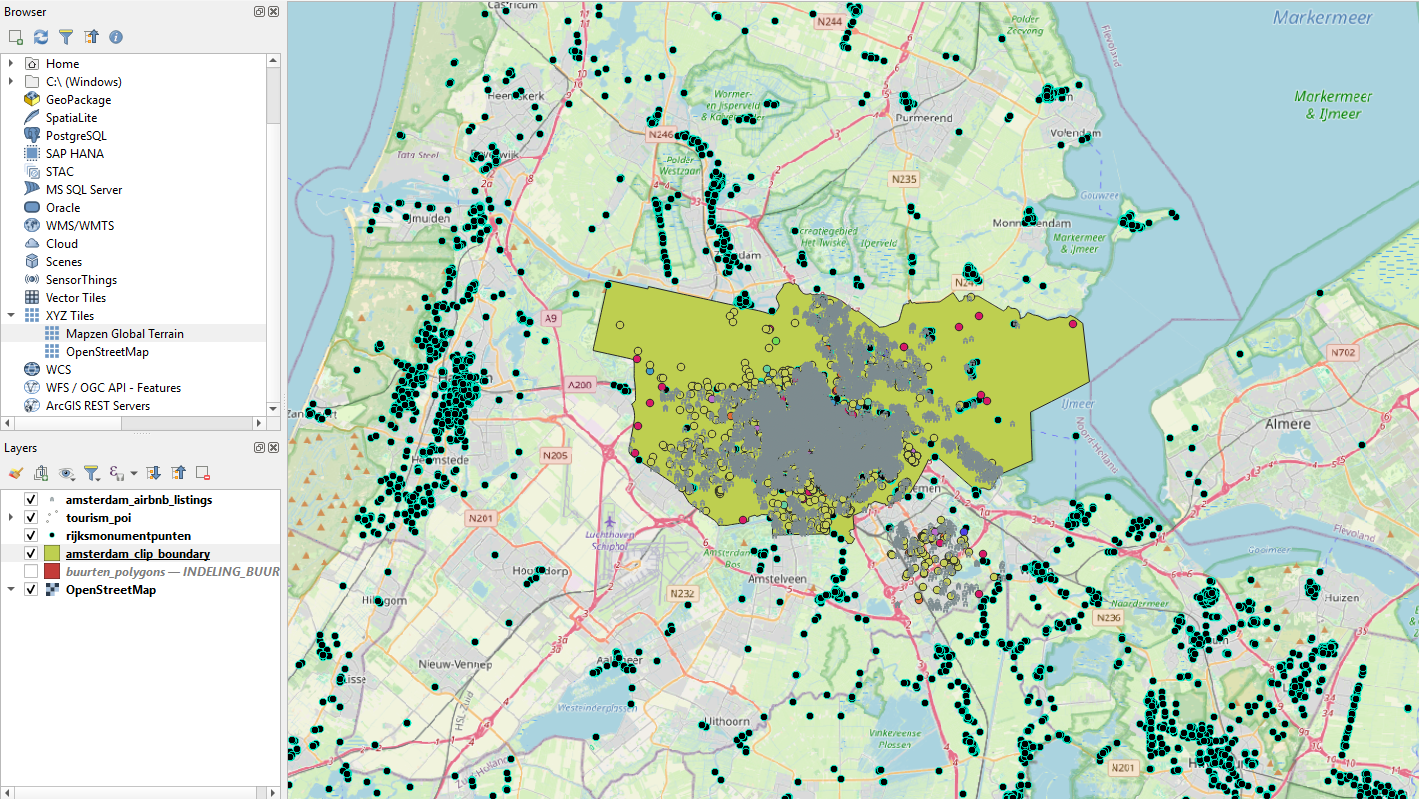

In [7]:
# Clip data to amsterdam boundaries
display(Image(filename="qgis/screenshots/city_clip.png"))

___________________________________________________________________________________________________________________

### Airbnb Dataset

count     5787.000000
mean       339.645758
std       2000.375208
min         39.000000
25%        162.000000
50%        225.000000
75%        315.000000
max      80018.000000
Name: price, dtype: float64
Upper bound for price outliers: €544.50
Dropped outliers: 301 out of 5787 listings.
count    5486.000000
mean      234.954065
std       102.991455
min        39.000000
25%       160.000000
50%       216.000000
75%       296.000000
max       542.000000
Name: price, dtype: float64


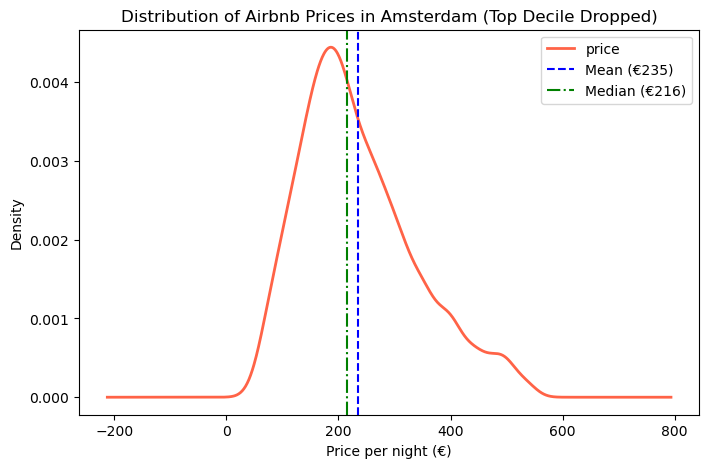

In [8]:
## Describe airbnb listings and drop outliers
# Drop missing values for price
airbnb_gdf["price"] = airbnb_gdf["price"].replace("", np.nan)
airbnb_gdf = airbnb_gdf.dropna(subset=["price"])

# Descriptive stats
print(airbnb_gdf["price"].describe())

# Drop outliers via IQR
Q1 = airbnb_gdf["price"].quantile(0.25)
Q3 = airbnb_gdf["price"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"Upper bound for price outliers: €{upper_bound:.2f}")
airbnb_clean = airbnb_gdf[airbnb_gdf["price"] <= upper_bound].copy()
print("Dropped outliers: " + str(len(airbnb_gdf) - len(airbnb_clean)) + " out of " + str(len(airbnb_gdf)) + " listings.")
print(airbnb_clean["price"].describe())


# Plot distribution
plt.figure(figsize=(8, 5))
airbnb_clean["price"].plot(kind="kde", color="tomato", linewidth=2)
mean_price = airbnb_clean["price"].mean()
median_price = airbnb_clean["price"].median()
plt.axvline(mean_price, color="blue", linestyle="--", linewidth=1.5, label=f"Mean (€{mean_price:.0f})")
plt.axvline(median_price, color="green", linestyle="-.", linewidth=1.5, label=f"Median (€{median_price:.0f})")
plt.title("Distribution of Airbnb Prices in Amsterdam (Top Decile Dropped)")
plt.xlabel("Price per night (€)")
plt.ylabel("Density")
plt.legend()
plt.show()

    review_month       price
0              1  233.265957
1              2  214.218182
2              3  208.738095
3              4  260.864162
4              5  241.256818
5              6  249.674620
6              7  265.363790
7              8  225.007046
8              9  206.680942
9             10  267.486486
10            11  233.500000
11            12  219.818182
   review_year       price
0         2017  218.833333
1         2018  227.444444
2         2019  255.684211
3         2020  208.933333
4         2021  180.000000
5         2022  264.980392
6         2023  255.352564
7         2024  252.316222
8         2025  230.407282


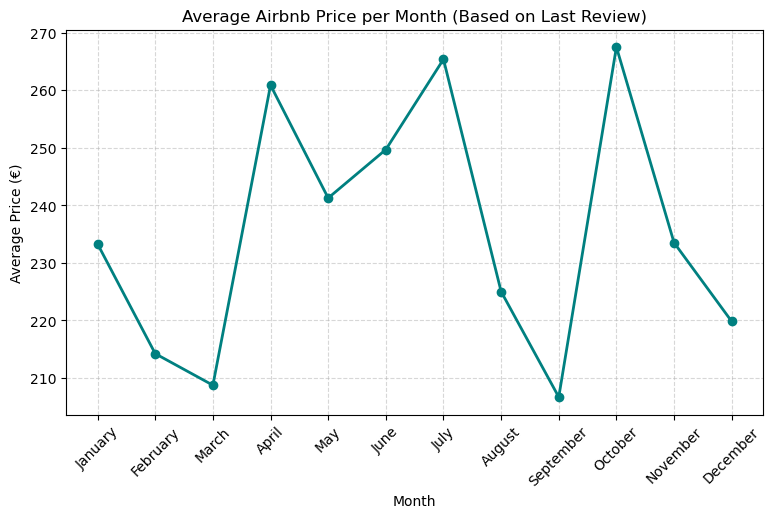

In [9]:
## Calculate average price per month
# Get month value from date
airbnb_clean["last_review"] = pd.to_datetime(airbnb_clean["last_review"], errors="coerce")
airbnb_clean["review_year"] = airbnb_clean["last_review"].dt.year.astype("Int64")
airbnb_clean["review_month"] = airbnb_clean["last_review"].dt.month.astype("Int64")
airbnb_clean["review_month_name"] = airbnb_clean["last_review"].dt.month_name()

# Group by month and calculate mean price
avg_price_by_month = (airbnb_clean.groupby("review_month")["price"].mean().reset_index().sort_values("review_month"))
print(avg_price_by_month)
# Calculate average price per year
avg_price_by_year = (airbnb_clean.groupby("review_year")["price"].mean().reset_index().sort_values("review_year"))
print(avg_price_by_year)

import calendar
avg_price_by_month["month_name"] = avg_price_by_month["review_month"].apply(lambda x: calendar.month_name[int(x)] if pd.notna(x) else None)

plt.figure(figsize=(9, 5))
plt.plot(
    avg_price_by_month["review_month"],
    avg_price_by_month["price"],
    marker="o",
    color="teal",
    linewidth=2
)

plt.title("Average Airbnb Price per Month (Based on Last Review)")
plt.xlabel("Month")
plt.ylabel("Average Price (€)")
plt.xticks(
    avg_price_by_month["review_month"],
    avg_price_by_month["month_name"],
    rotation=45
)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

___________________________________________________________________________________________________________________

### Spatial joins for census neighborhoods

In [10]:
## Spatial joins for census dataframes and geodatabases
#Table joins for each census neighborhood polygon
census_df = (
    population_df
    .merge(
        avghousevalue_df,
        on=["Code", "Year", "Geography", "Name"],
        how="inner"
    )
)

# add neighborhood polygons to census dataframe
census_gdf = census_df.merge(
    buurten_gdf[["Buurtcode", "geometry"]],
    left_on="Code",
    right_on="Buurtcode",
    how="left"
)

census_gdf = gpd.GeoDataFrame(census_gdf, geometry="geometry", crs=buurten_gdf.crs)
census_gdf.head()

,Year,Geography,Code,Name,Population,Average house-value for tax purposes,Buurtcode,geometry
0,2012,buurten,AA01,Planciusbuurt-Noord,330,200912,AA01,"MULTIPOLYGON (((4.88304 52.386, 4.88408 52.385..."
1,2012,buurten,AA02,Westelijke eilanden,2851,333907,AA02,"MULTIPOLYGON (((4.88393 52.38551, 4.88465 52.3..."
2,2012,buurten,AA03,Westerdokseiland,1834,370812,AA03,"MULTIPOLYGON (((4.89019 52.3824, 4.89064 52.38..."
3,2012,buurten,AA04,Planciusbuurt-Zuid,175,233402,AA04,"MULTIPOLYGON (((4.88167 52.38418, 4.88254 52.3..."
4,2012,buurten,AA05,Haarlemmerbuurt-West,2309,302849,AA05,"MULTIPOLYGON (((4.88261 52.38389, 4.88294 52.3..."


In [11]:
## CRS: Convert to X/Y coordinates in meters to get accurate 'within' counts
#census_gdf = census_gdf.to_crs(epsg=28992)

### Preliminary Analysis and Visualizations

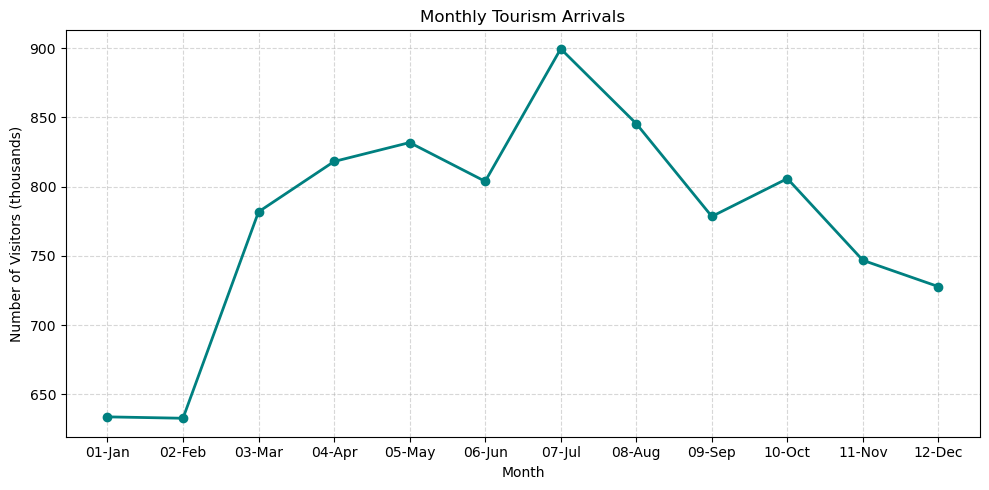

In [12]:
## Look at Amsterdam tourism arrivals to determine high season vs low season
visitorstats_df = visitorstats_df.drop(columns=["Unnamed: 12"], errors="ignore")
visitorstats_long = visitorstats_df.melt(var_name="Month", value_name="Visitors")
visitorstats_long["Visitors"] = pd.to_numeric(visitorstats_long["Visitors"], errors="coerce")
month_order = ["01-Jan", "02-Feb", "03-Mar", "04-Apr", "05-May", "06-Jun",
               "07-Jul", "08-Aug", "09-Sep", "10-Oct", "11-Nov", "12-Dec"]
visitorstats_long["Month"] = pd.Categorical(visitorstats_long["Month"], categories=month_order, ordered=True)
visitorstats_long = visitorstats_long.sort_values("Month")

plt.figure(figsize=(10, 5))
plt.plot(
    visitorstats_long["Month"].astype(str),   # force string labels
    visitorstats_long["Visitors"],
    marker="o", color="teal", linewidth=2
)
plt.title("Monthly Tourism Arrivals")
plt.xlabel("Month")
plt.ylabel("Number of Visitors (thousands)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

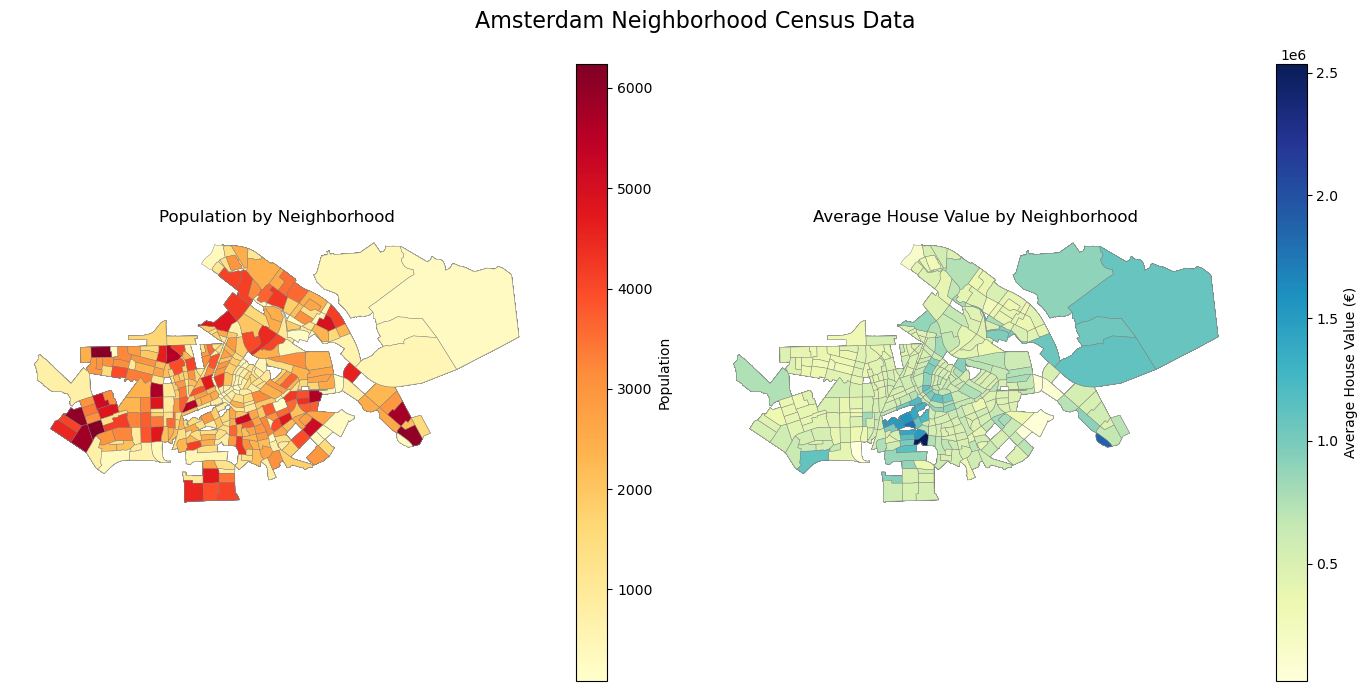

In [13]:
# Census choropleths
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# --- Population map ---
census_gdf.plot(
    column="Population",
    cmap="YlOrRd",
    linewidth=0.3,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Population"},
    ax=axes[0]
)
axes[0].set_title("Population by Neighborhood")
axes[0].axis("off")

# --- House value map ---
census_gdf.plot(
    column="Average house-value for tax purposes",
    cmap="YlGnBu",
    linewidth=0.3,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Average House Value (€)"},
    ax=axes[1]
)
axes[1].set_title("Average House Value by Neighborhood")
axes[1].axis("off")

plt.suptitle("Amsterdam Neighborhood Census Data", fontsize=16)
plt.tight_layout()
plt.show()

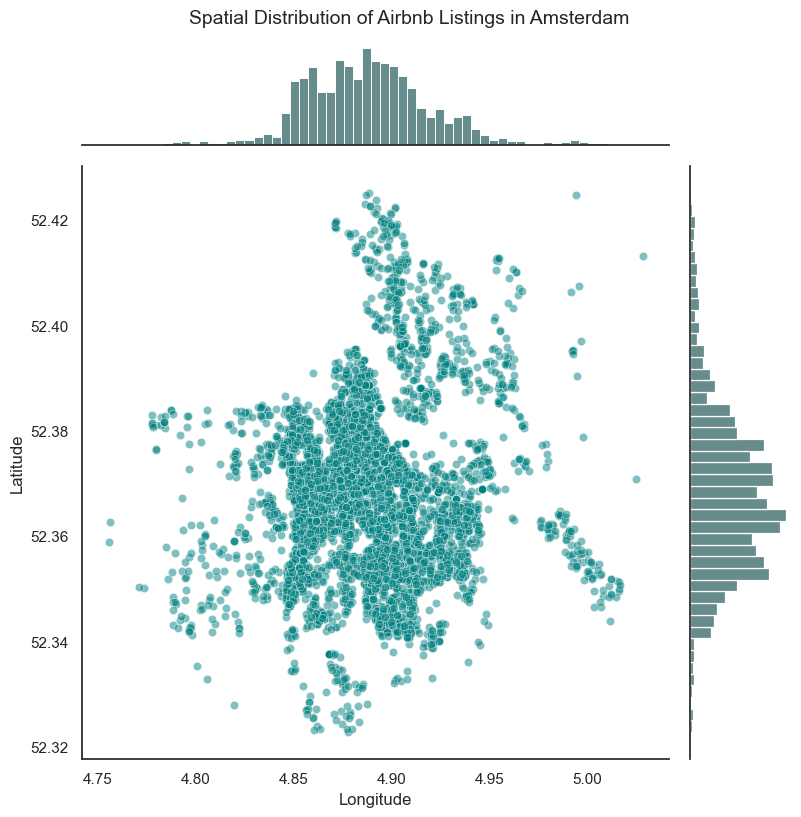

In [14]:
# joint plot of airbnb listings
sns.set(style="white", rc={"axes.facecolor": "white", "figure.facecolor": "white"})

# Create the joint plot
g = sns.jointplot(
    data=airbnb_gdf,
    x="longitude",
    y="latitude",
    kind="scatter",
    color="teal",
    alpha=0.5,
    height=8,
)

# Add marginal histograms
g.plot_marginals(sns.histplot, kde=False, color="gray", alpha=0.6)

# Clean up appearance
g.set_axis_labels("Longitude", "Latitude", fontsize=12)
plt.suptitle("Spatial Distribution of Airbnb Listings in Amsterdam", fontsize=14, y=1.02)
plt.show()


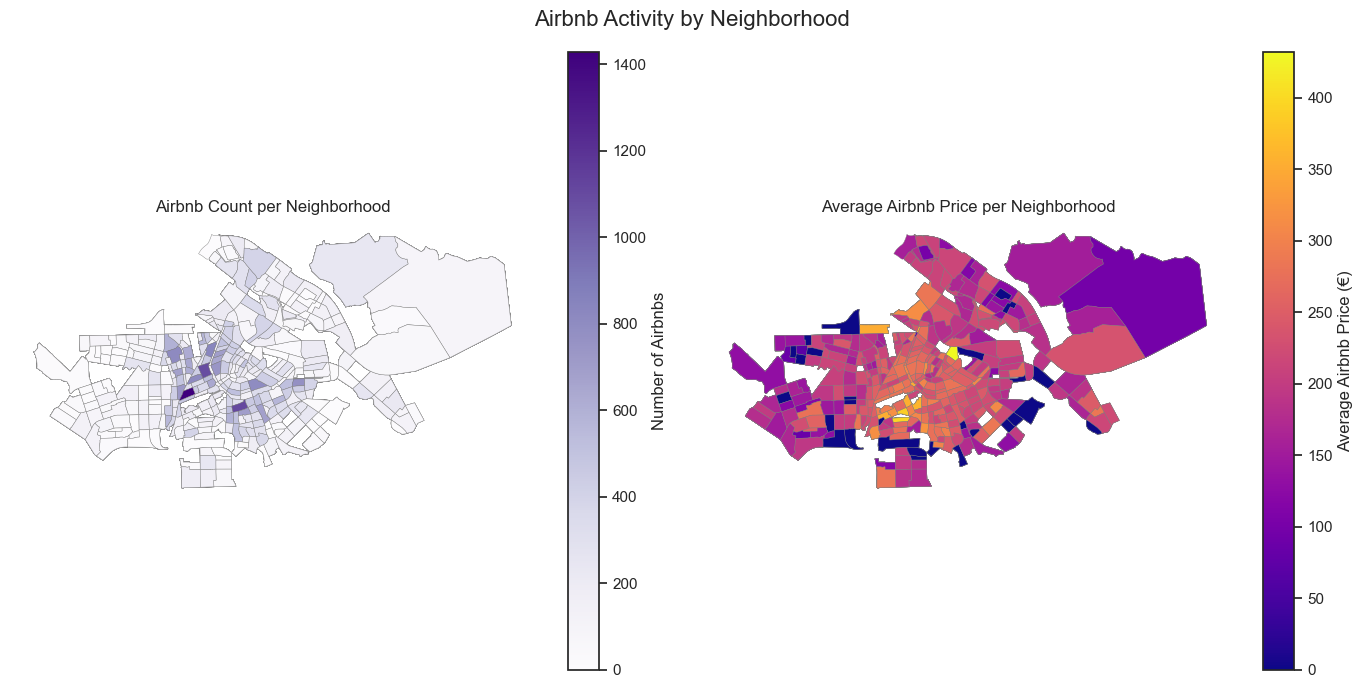

In [15]:
## Calculate airbnb statistics per census neighborhood
# spatial join
airbnb_with_neighborhood = gpd.sjoin(
    airbnb_clean,
    census_gdf[["Name", "geometry"]],
    how="left",
    predicate="within"
)

# aggregate by neighborhood
airbnb_summary = (
    airbnb_with_neighborhood
    .groupby("Name")
    .agg(
        airbnb_count=("price", "count"),
        avg_airbnb_price=("price", "mean")
    )
    .reset_index()
)

# add summary to census_gdf
census_enriched = census_gdf.merge(airbnb_summary, on="Name", how="left")
census_enriched[["airbnb_count", "avg_airbnb_price"]] = census_enriched[["airbnb_count", "avg_airbnb_price"]].fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Airbnb count map
census_enriched.plot(
    column="airbnb_count",
    cmap="Purples",
    legend=True,
    legend_kwds={"label": "Number of Airbnbs"},
    ax=axes[0],
    edgecolor="gray",
    linewidth=0.3
)
axes[0].set_title("Airbnb Count per Neighborhood")
axes[0].axis("off")

# Average price map
census_enriched.plot(
    column="avg_airbnb_price",
    cmap="plasma",
    legend=True,
    legend_kwds={"label": "Average Airbnb Price (€)"},
    ax=axes[1],
    edgecolor="gray",
    linewidth=0.3
)
axes[1].set_title("Average Airbnb Price per Neighborhood")
axes[1].axis("off")

plt.suptitle("Airbnb Activity by Neighborhood", fontsize=16)
plt.tight_layout()
plt.show()

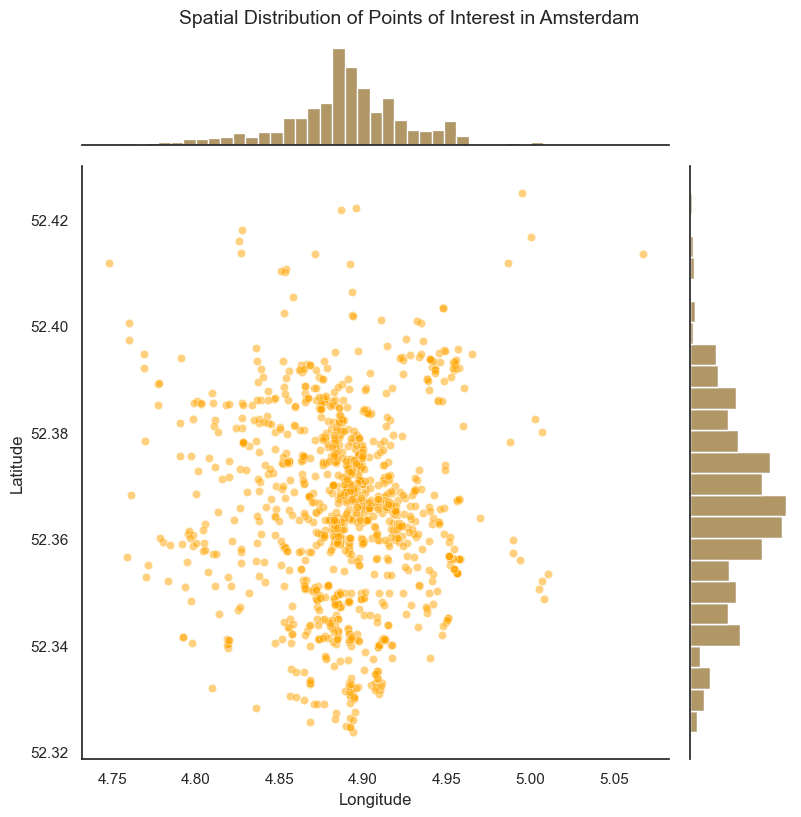

In [16]:
## Tourism POI jointplot
poi_gdf["longitude"] = poi_gdf.geometry.x
poi_gdf["latitude"] = poi_gdf.geometry.y
sns.set(style="white", rc={"axes.facecolor": "white", "figure.facecolor": "white"})

g = sns.jointplot(
    data=poi_gdf,
    x="longitude",
    y="latitude",
    kind="scatter",
    color="orange",
    alpha=0.5,
    height=8
)

# Add marginal histograms
g.plot_marginals(sns.histplot, kde=False, color="gray", alpha=0.6)

g.set_axis_labels("Longitude", "Latitude", fontsize=12)
plt.suptitle("Spatial Distribution of Points of Interest in Amsterdam", fontsize=14, y=1.02)
plt.show()

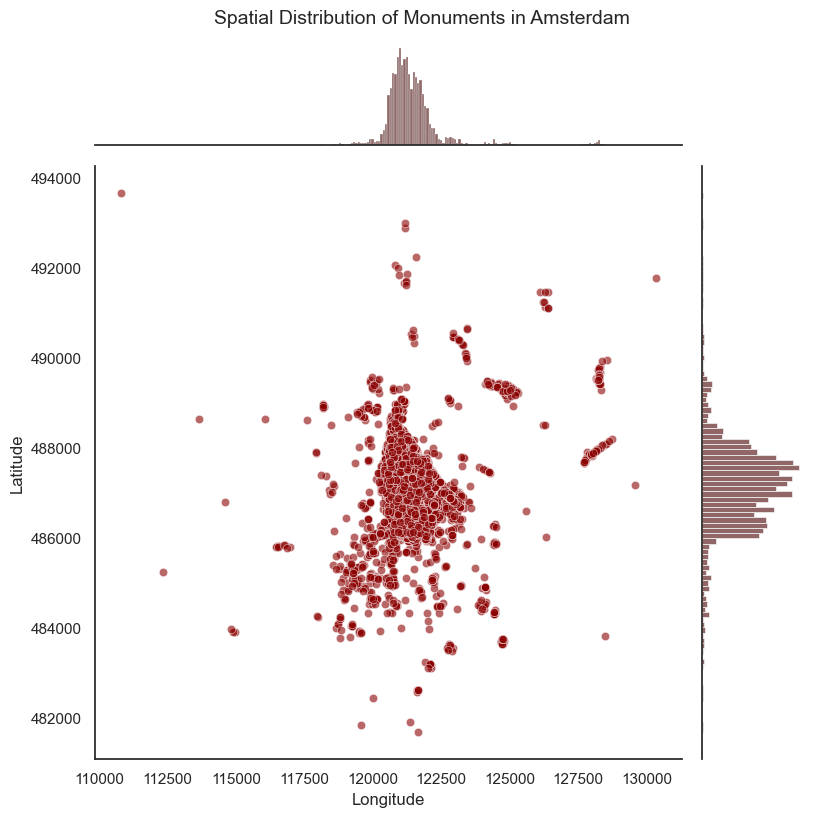

In [17]:
## Monuments register jointplot
monuments_gdf["longitude"] = monuments_gdf.geometry.x
monuments_gdf["latitude"] = monuments_gdf.geometry.y
sns.set(style="white", rc={"axes.facecolor": "white", "figure.facecolor": "white"})

g = sns.jointplot(
    data=monuments_gdf,
    x="longitude",
    y="latitude",
    kind="scatter",
    color="darkred",
    alpha=0.6,
    height=8
)

# Add marginal histograms
g.plot_marginals(sns.histplot, kde=False, color="gray", alpha=0.6)

g.set_axis_labels("Longitude", "Latitude", fontsize=12)
plt.suptitle("Spatial Distribution of Monuments in Amsterdam", fontsize=14, y=1.02)
plt.show()

# Plan for final analysis and visualizations

**Disaggregation**
<br/>-by high season vs low season
<br/>-by airbnb unit type (whole unit, room, etc.)
<br/>-by Tourism POI category


**Choropleth Maps**
<br/>-show each variable per neighborhood

**Queen Contiguity weights and K-Nearest-Neigbor weights**
<br/>-Identify clusters of airbnb-dense neighborhoods, tourism POI-dense neighborhoods, and expensive-dense neighborhoods

**Plots**
<br/>-Distribution plots to show distribution of rent prices in high-tourism-neighborhoods vs low-tourism neighborhoods
<br/>-XY plots to show (linear) correlation between Tourism POI count and Rent prices

**Moran's I**
<br/>-Quantify correlation of tourism POI clusters with high rent clusters